<a href="https://colab.research.google.com/github/tusharkanta/ML_DL/blob/eva/S15/S15_Final_Phase1_EVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
from zipfile import ZipFile
import os
from PIL import Image
import matplotlib.pyplot as plt

Mount google drive


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Install auto time module


In [0]:
!pip install ipython-autotime
%load_ext autotime
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=a4d8afab05025a37820f1524507e7be8037a9341831c432b30c4b4ff53b5ff40
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime
  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-u1uwo6px
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-u1uwo6px
     |████████████████████████████████| 634kB 2.7MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65038 sha256=03ba930ee081d0b7e8fede7928c65616bf95e69fcb9a9f033da47c7dc611986f
  Stored in directory: /tmp/pip-ephem-wheel-cache-vf0e2spa/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=7e8d403b81216379789844815db48d2f2b546a6e01a82f8235dd87bc7dff6f8f
  Stored in

Import utility functions

In [0]:
os.chdir('/content')
if os.path.exists('utils.py'):
  os.remove('utils.py')
from google.colab import files
src = list(files.upload().values())[0]
open('utils.py','wb').write(src)
import utils as utils

Saving utils.py to utils.py
time: 9.46 s


Import data loader


In [0]:
os.chdir('/content')
torch.cuda.empty_cache()
if os.path.exists('dataloader_s15.py'):
  os.remove('dataloader_s15.py')
from google.colab import files
src = list(files.upload().values())[0]
open('dataloader_s15.py','wb').write(src)
import dataloader_s15 as dl

Saving dataloader_s15.py to dataloader_s15.py
Our make_dataset:

time: 20.5 s


Import model definition

In [0]:
os.chdir('/content')
if os.path.exists('model_def_s15.py'):
  os.remove('model_def_s15.py')
from google.colab import files
src = list(files.upload().values())[0]
open('model_def_s15.py','wb').write(src)
import model_def_s15 as modeldef

Saving model_def_s15.py to model_def_s15.py
time: 15.7 s


Import train/test functions


In [0]:
os.chdir('/content')
if os.path.exists('model_train_s15.py'):
  os.remove('model_train_s15.py')
from google.colab import files
src = list(files.upload().values())[0]
open('model_train_s15.py','wb').write(src)
import model_train_s15 as modeltrt

Saving model_train_s15.py to model_train_s15.py
time: 10.4 s


Extract bg_fg, mask and depth map images along with ground truth

In [0]:
os.chdir('/content')
dl.extract_images('/content/drive/My Drive/EVA4/S15/batch_1.zip')
dl.extract_images('/content/drive/My Drive/EVA4/S15/batch_2.zip')
dl.extract_images('/content/drive/My Drive/EVA4/S15/batch_3.zip')
dl.extract_images('/content/drive/My Drive/EVA4/S15/batch_4.zip')
dl.extract_images('/content/drive/My Drive/EVA4/S15/batch_5.zip')


time: 34.3 s


In [0]:
print(len(os.listdir('/content/depthMap')))
print(len(os.listdir('/content/bg_fg_1')))
print(len(os.listdir('/content/bg_fg_mask_1')))


50000
50000
50000
time: 80.8 ms


Extract bg images

In [0]:
os.chdir('/content')
if not os.path.exists('/content/bg'):
  os.mkdir('bg')
os.chdir('/content/bg')
dl.extract_images('/content/drive/My Drive/EVA4/S15/bgimages.zip')

time: 1.41 s


In [0]:
utils.save_mask_gray_scale()
utils.save_depth_map_gray_scale()
train_loader,test_loader=dl.load_data()

time: 2min 25s


In [0]:
# net = modeldef.S11Model()
# net = models.resnet18(pretrained=True)
net = modeldef.DepthMask()
#net = modeldef.UNet(1)
#net = modeldef.ResNetUNet(3)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda
time: 90.9 ms


Build model summary

In [0]:
!pip install torchsummary
from torchsummary import summary
# Display Model Summary
model = net.to(device)
summary(model, input_size=(6, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]          18,816
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
   ConvTranspose2d-5        [-1, 128, 111, 111]           8,192
            Conv2d-6          [-1, 128, 28, 28]          73,728
            Conv2d-7          [-1, 128, 28, 28]          16,384
       BatchNorm2d-8          [-1, 128, 28, 28]             256
              ReLU-9          [-1, 128, 28, 28]               0
           Conv2d-10          [-1, 128, 14, 14]         147,456
           Conv2d-11          [-1, 128, 14, 14]          16,384
      BatchNorm2d-12          [-1, 128, 14, 14]             256
             ReLU-13          [-1, 128, 14, 14]               0
         Downsize-14          [-1, 128,

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [0]:
#!pip install kornia
#from kornia.losses import SSIM
#from kornia.losses import DiceLoss
criterion = nn.BCEWithLogitsLoss() #SSIM( 3, reduction ="mean")
#criterion = dice_loss()
#criterion = DiceLoss()
#criterion = SSIM(3,reduction='mean')

time: 1.67 ms


In [0]:
optimizer = torch.optim.SGD(model.parameters(),lr= 0.01, momentum=0.9, weight_decay=1e-5)

time: 2.29 ms


In [41]:
import glob
import shutil
filist = glob.glob('/content/saved_models/*.pth')
for i in filist:
  shutil.move(i,'/content/drive/My Drive/EVA4/S15/output_run1_50k_10epochs/model')

time: 286 ms


Strart training and validation process

In [0]:
%matplotlib inline
last_epoch=0
prnt=186
last_epoch=9
os.makedirs('/content/saved_models', exist_ok=True)
for epoch in range(10):
  #print('\nEpoch:',epoch)
  modeltrt.train(model, criterion, device, train_loader,optimizer,epoch)
  modeltrt.test(model, criterion, device, test_loader,epoch,last_epoch=last_epoch, prnt=prnt)

  0%|          | 0/2188 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
Overall Loss=2.2083 Mask loss=0.76 Depth loss=0.69:   0%|          | 0/2188 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
Overall Loss=2.2083 Mask loss=0.76 Depth loss=0.69:   0%|          | 0/2188 [00:00<?, ?it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=2.1837 Mask loss=0.75 Depth loss=0.68:   0%|          | 2/2188 [00:00<13:09,  2.77it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=2.1366 Mask loss=0.73 Depth loss=0.67:   0%|          | 3/2188 [00:00<11:34,  3.14it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=2.0938 Mask loss=0.71 Depth loss=0.68:   0%|          | 4/2188 [00:01<10:28,  3.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=2.0253 Mask loss=0.68 Depth loss=0.66:   0%|          | 5/2188 [00:01<09:42,  3.75it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=1.9611 Mask loss=0.65 Depth loss=0.66:   0%|          | 6/2188 [00:01<09:08,  3.98it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=1.8908 Mask loss=0.62 Depth loss=0.66:   0%|          | 7/2188 [00:01<08:45,  4.15it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=1.8199 Mask loss=0.59 Depth loss=0.65:   0%|          | 8/2188 [00:01<08:30,  4.27it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=1.7450 Mask loss=0.55 Depth loss=0.64:   0%|          | 9/2188 [00:02<08:20,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=1.6665 Mask loss=0.52 Depth loss=0.63:   0%|          | 10/2188 [00:02<08:15,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=1.5880 Mask loss=0.49 Depth loss=0.62:   0%|          | 10/2188 [00:02<08:15,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=1.5465 Mask loss=0.46 Depth loss=0.62:   1%|          | 12/2188 [00:02<09:21,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=1.4724 Mask loss=0.43 Depth loss=0.61:   1%|          | 13/2188 [00:03<08:52,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=1.3901 Mask loss=0.40 Depth loss=0.59:   1%|          | 14/2188 [00:03<08:34,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=1.3464 Mask loss=0.38 Depth loss=0.59:   1%|          | 15/2188 [00:03<08:21,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=1.2901 Mask loss=0.36 Depth loss=0.57:   1%|          | 16/2188 [00:03<08:12,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=1.2327 Mask loss=0.34 Depth loss=0.56:   1%|          | 17/2188 [00:04<08:06,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=1.1868 Mask loss=0.31 Depth loss=0.56:   1%|          | 18/2188 [00:04<08:01,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=1.1399 Mask loss=0.30 Depth loss=0.55:   1%|          | 19/2188 [00:04<07:57,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=1.0897 Mask loss=0.27 Depth loss=0.55:   1%|          | 20/2188 [00:04<07:58,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=1.0626 Mask loss=0.26 Depth loss=0.54:   1%|          | 20/2188 [00:04<07:58,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=1.0193 Mask loss=0.24 Depth loss=0.53:   1%|          | 22/2188 [00:05<09:20,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.9808 Mask loss=0.23 Depth loss=0.52:   1%|          | 23/2188 [00:05<08:54,  4.05it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.9514 Mask loss=0.21 Depth loss=0.52:   1%|          | 24/2188 [00:05<08:32,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.9289 Mask loss=0.21 Depth loss=0.52:   1%|          | 25/2188 [00:06<08:19,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.8885 Mask loss=0.20 Depth loss=0.50:   1%|          | 26/2188 [00:06<08:10,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.8624 Mask loss=0.18 Depth loss=0.50:   1%|          | 27/2188 [00:06<08:05,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.8488 Mask loss=0.18 Depth loss=0.49:   1%|▏         | 28/2188 [00:06<07:58,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.8141 Mask loss=0.17 Depth loss=0.48:   1%|▏         | 29/2188 [00:06<07:55,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.7944 Mask loss=0.16 Depth loss=0.48:   1%|▏         | 30/2188 [00:07<07:53,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.7679 Mask loss=0.15 Depth loss=0.46:   1%|▏         | 30/2188 [00:07<07:53,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.7686 Mask loss=0.15 Depth loss=0.47:   1%|▏         | 32/2188 [00:07<09:13,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.7480 Mask loss=0.14 Depth loss=0.46:   2%|▏         | 33/2188 [00:07<08:46,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.7194 Mask loss=0.13 Depth loss=0.45:   2%|▏         | 34/2188 [00:08<08:27,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.7027 Mask loss=0.13 Depth loss=0.45:   2%|▏         | 35/2188 [00:08<08:16,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.6970 Mask loss=0.12 Depth loss=0.45:   2%|▏         | 36/2188 [00:08<08:07,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.6763 Mask loss=0.12 Depth loss=0.44:   2%|▏         | 37/2188 [00:08<08:00,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.6635 Mask loss=0.11 Depth loss=0.44:   2%|▏         | 38/2188 [00:09<07:57,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.6301 Mask loss=0.10 Depth loss=0.43:   2%|▏         | 39/2188 [00:09<07:53,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.6453 Mask loss=0.10 Depth loss=0.44:   2%|▏         | 40/2188 [00:09<07:50,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.6261 Mask loss=0.10 Depth loss=0.43:   2%|▏         | 40/2188 [00:09<07:50,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.6430 Mask loss=0.11 Depth loss=0.42:   2%|▏         | 42/2188 [00:10<09:11,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.6256 Mask loss=0.10 Depth loss=0.42:   2%|▏         | 43/2188 [00:10<08:44,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.5987 Mask loss=0.09 Depth loss=0.42:   2%|▏         | 44/2188 [00:10<08:26,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.5974 Mask loss=0.09 Depth loss=0.42:   2%|▏         | 45/2188 [00:10<08:14,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.5864 Mask loss=0.09 Depth loss=0.41:   2%|▏         | 46/2188 [00:10<08:05,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.5746 Mask loss=0.08 Depth loss=0.41:   2%|▏         | 47/2188 [00:11<07:57,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.5728 Mask loss=0.08 Depth loss=0.40:   2%|▏         | 48/2188 [00:11<07:54,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.5567 Mask loss=0.08 Depth loss=0.40:   2%|▏         | 49/2188 [00:11<07:49,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.5668 Mask loss=0.08 Depth loss=0.41:   2%|▏         | 50/2188 [00:11<07:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.5531 Mask loss=0.08 Depth loss=0.40:   2%|▏         | 50/2188 [00:12<07:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.5435 Mask loss=0.07 Depth loss=0.40:   2%|▏         | 52/2188 [00:12<09:10,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.5322 Mask loss=0.07 Depth loss=0.39:   2%|▏         | 53/2188 [00:12<08:43,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.5339 Mask loss=0.07 Depth loss=0.39:   2%|▏         | 54/2188 [00:12<08:23,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.5360 Mask loss=0.07 Depth loss=0.39:   3%|▎         | 55/2188 [00:13<08:12,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.5295 Mask loss=0.07 Depth loss=0.39:   3%|▎         | 56/2188 [00:13<08:02,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.5200 Mask loss=0.07 Depth loss=0.39:   3%|▎         | 57/2188 [00:13<07:56,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.5288 Mask loss=0.07 Depth loss=0.40:   3%|▎         | 58/2188 [00:13<07:52,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.5133 Mask loss=0.06 Depth loss=0.38:   3%|▎         | 59/2188 [00:14<07:48,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.5068 Mask loss=0.06 Depth loss=0.39:   3%|▎         | 60/2188 [00:14<07:46,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.5038 Mask loss=0.06 Depth loss=0.38:   3%|▎         | 60/2188 [00:14<07:46,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.5056 Mask loss=0.06 Depth loss=0.38:   3%|▎         | 62/2188 [00:14<09:08,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4996 Mask loss=0.06 Depth loss=0.38:   3%|▎         | 63/2188 [00:15<08:41,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.5098 Mask loss=0.07 Depth loss=0.38:   3%|▎         | 64/2188 [00:15<08:23,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4971 Mask loss=0.06 Depth loss=0.38:   3%|▎         | 65/2188 [00:15<08:10,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4927 Mask loss=0.05 Depth loss=0.38:   3%|▎         | 66/2188 [00:15<08:01,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.5073 Mask loss=0.06 Depth loss=0.39:   3%|▎         | 67/2188 [00:15<07:54,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4900 Mask loss=0.06 Depth loss=0.38:   3%|▎         | 68/2188 [00:16<07:50,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4890 Mask loss=0.05 Depth loss=0.38:   3%|▎         | 69/2188 [00:16<07:47,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4847 Mask loss=0.05 Depth loss=0.38:   3%|▎         | 70/2188 [00:16<07:46,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4956 Mask loss=0.06 Depth loss=0.38:   3%|▎         | 70/2188 [00:16<07:46,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4794 Mask loss=0.05 Depth loss=0.37:   3%|▎         | 72/2188 [00:17<09:03,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4773 Mask loss=0.05 Depth loss=0.37:   3%|▎         | 73/2188 [00:17<08:37,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4865 Mask loss=0.06 Depth loss=0.38:   3%|▎         | 74/2188 [00:17<08:18,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4612 Mask loss=0.05 Depth loss=0.36:   3%|▎         | 75/2188 [00:17<08:06,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4720 Mask loss=0.05 Depth loss=0.37:   3%|▎         | 76/2188 [00:18<07:57,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4710 Mask loss=0.05 Depth loss=0.38:   4%|▎         | 77/2188 [00:18<07:51,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4830 Mask loss=0.05 Depth loss=0.38:   4%|▎         | 78/2188 [00:18<07:46,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4602 Mask loss=0.05 Depth loss=0.37:   4%|▎         | 79/2188 [00:18<07:42,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4657 Mask loss=0.05 Depth loss=0.37:   4%|▎         | 80/2188 [00:18<07:42,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4718 Mask loss=0.05 Depth loss=0.37:   4%|▎         | 80/2188 [00:19<07:42,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4723 Mask loss=0.05 Depth loss=0.37:   4%|▎         | 82/2188 [00:19<09:00,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4587 Mask loss=0.05 Depth loss=0.36:   4%|▍         | 83/2188 [00:19<08:35,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4718 Mask loss=0.05 Depth loss=0.37:   4%|▍         | 84/2188 [00:20<08:16,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4592 Mask loss=0.05 Depth loss=0.37:   4%|▍         | 85/2188 [00:20<08:05,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4619 Mask loss=0.04 Depth loss=0.37:   4%|▍         | 86/2188 [00:20<07:57,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4554 Mask loss=0.04 Depth loss=0.37:   4%|▍         | 87/2188 [00:20<07:50,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4578 Mask loss=0.05 Depth loss=0.37:   4%|▍         | 88/2188 [00:20<07:44,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4480 Mask loss=0.04 Depth loss=0.36:   4%|▍         | 89/2188 [00:21<07:42,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4556 Mask loss=0.05 Depth loss=0.36:   4%|▍         | 90/2188 [00:21<07:40,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4465 Mask loss=0.04 Depth loss=0.36:   4%|▍         | 90/2188 [00:21<07:40,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4535 Mask loss=0.04 Depth loss=0.38:   4%|▍         | 92/2188 [00:22<08:59,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4557 Mask loss=0.05 Depth loss=0.36:   4%|▍         | 93/2188 [00:22<08:34,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4634 Mask loss=0.04 Depth loss=0.37:   4%|▍         | 94/2188 [00:22<08:17,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4649 Mask loss=0.04 Depth loss=0.38:   4%|▍         | 95/2188 [00:22<08:03,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4474 Mask loss=0.04 Depth loss=0.36:   4%|▍         | 96/2188 [00:22<07:53,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4449 Mask loss=0.04 Depth loss=0.36:   4%|▍         | 97/2188 [00:23<07:46,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4474 Mask loss=0.04 Depth loss=0.36:   4%|▍         | 98/2188 [00:23<07:44,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4401 Mask loss=0.04 Depth loss=0.36:   5%|▍         | 99/2188 [00:23<07:39,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4401 Mask loss=0.04 Depth loss=0.36:   5%|▍         | 100/2188 [00:23<07:37,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4490 Mask loss=0.04 Depth loss=0.36:   5%|▍         | 100/2188 [00:23<07:37,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4324 Mask loss=0.04 Depth loss=0.36:   5%|▍         | 102/2188 [00:24<08:56,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4350 Mask loss=0.04 Depth loss=0.36:   5%|▍         | 103/2188 [00:24<08:31,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4504 Mask loss=0.05 Depth loss=0.36:   5%|▍         | 104/2188 [00:24<08:13,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4361 Mask loss=0.04 Depth loss=0.36:   5%|▍         | 105/2188 [00:25<08:01,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4235 Mask loss=0.04 Depth loss=0.35:   5%|▍         | 106/2188 [00:25<07:52,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4484 Mask loss=0.04 Depth loss=0.37:   5%|▍         | 107/2188 [00:25<07:45,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4328 Mask loss=0.04 Depth loss=0.35:   5%|▍         | 108/2188 [00:25<07:40,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4515 Mask loss=0.04 Depth loss=0.37:   5%|▍         | 109/2188 [00:25<07:37,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4358 Mask loss=0.04 Depth loss=0.35:   5%|▌         | 110/2188 [00:26<07:37,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4343 Mask loss=0.04 Depth loss=0.36:   5%|▌         | 110/2188 [00:26<07:37,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4350 Mask loss=0.04 Depth loss=0.36:   5%|▌         | 112/2188 [00:26<08:51,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4318 Mask loss=0.03 Depth loss=0.36:   5%|▌         | 113/2188 [00:26<08:26,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4394 Mask loss=0.04 Depth loss=0.37:   5%|▌         | 114/2188 [00:27<08:09,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4305 Mask loss=0.04 Depth loss=0.35:   5%|▌         | 115/2188 [00:27<07:57,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4248 Mask loss=0.03 Depth loss=0.36:   5%|▌         | 116/2188 [00:27<07:50,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4335 Mask loss=0.03 Depth loss=0.37:   5%|▌         | 117/2188 [00:27<07:42,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4356 Mask loss=0.04 Depth loss=0.36:   5%|▌         | 118/2188 [00:28<07:38,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4337 Mask loss=0.03 Depth loss=0.37:   5%|▌         | 119/2188 [00:28<07:36,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4340 Mask loss=0.04 Depth loss=0.36:   5%|▌         | 120/2188 [00:28<07:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4315 Mask loss=0.04 Depth loss=0.36:   5%|▌         | 120/2188 [00:28<07:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4264 Mask loss=0.03 Depth loss=0.36:   6%|▌         | 122/2188 [00:29<08:51,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4248 Mask loss=0.04 Depth loss=0.35:   6%|▌         | 123/2188 [00:29<08:27,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4415 Mask loss=0.04 Depth loss=0.37:   6%|▌         | 124/2188 [00:29<08:10,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4224 Mask loss=0.03 Depth loss=0.35:   6%|▌         | 125/2188 [00:29<07:56,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4280 Mask loss=0.03 Depth loss=0.36:   6%|▌         | 126/2188 [00:30<07:46,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4306 Mask loss=0.03 Depth loss=0.36:   6%|▌         | 127/2188 [00:30<07:40,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4365 Mask loss=0.04 Depth loss=0.36:   6%|▌         | 128/2188 [00:30<07:38,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4210 Mask loss=0.03 Depth loss=0.35:   6%|▌         | 129/2188 [00:30<07:32,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4332 Mask loss=0.03 Depth loss=0.37:   6%|▌         | 130/2188 [00:30<07:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4217 Mask loss=0.03 Depth loss=0.35:   6%|▌         | 130/2188 [00:31<07:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4210 Mask loss=0.04 Depth loss=0.35:   6%|▌         | 132/2188 [00:31<08:50,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4271 Mask loss=0.04 Depth loss=0.35:   6%|▌         | 133/2188 [00:31<08:22,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4265 Mask loss=0.03 Depth loss=0.36:   6%|▌         | 134/2188 [00:31<08:05,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4130 Mask loss=0.03 Depth loss=0.35:   6%|▌         | 135/2188 [00:32<07:53,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4338 Mask loss=0.04 Depth loss=0.36:   6%|▌         | 136/2188 [00:32<07:45,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4144 Mask loss=0.03 Depth loss=0.35:   6%|▋         | 137/2188 [00:32<07:37,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4280 Mask loss=0.03 Depth loss=0.36:   6%|▋         | 138/2188 [00:32<07:34,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4318 Mask loss=0.03 Depth loss=0.37:   6%|▋         | 139/2188 [00:33<07:31,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4299 Mask loss=0.03 Depth loss=0.36:   6%|▋         | 140/2188 [00:33<07:28,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4234 Mask loss=0.03 Depth loss=0.36:   6%|▋         | 140/2188 [00:33<07:28,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4244 Mask loss=0.03 Depth loss=0.36:   6%|▋         | 142/2188 [00:33<08:44,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4171 Mask loss=0.03 Depth loss=0.35:   7%|▋         | 143/2188 [00:34<08:18,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4181 Mask loss=0.04 Depth loss=0.35:   7%|▋         | 144/2188 [00:34<08:02,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4212 Mask loss=0.03 Depth loss=0.36:   7%|▋         | 145/2188 [00:34<07:50,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4121 Mask loss=0.03 Depth loss=0.35:   7%|▋         | 146/2188 [00:34<07:42,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4183 Mask loss=0.03 Depth loss=0.36:   7%|▋         | 147/2188 [00:35<07:37,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4271 Mask loss=0.03 Depth loss=0.36:   7%|▋         | 148/2188 [00:35<07:32,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4260 Mask loss=0.03 Depth loss=0.37:   7%|▋         | 149/2188 [00:35<07:29,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4166 Mask loss=0.03 Depth loss=0.36:   7%|▋         | 150/2188 [00:35<07:27,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4190 Mask loss=0.03 Depth loss=0.35:   7%|▋         | 150/2188 [00:35<07:27,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4329 Mask loss=0.03 Depth loss=0.37:   7%|▋         | 152/2188 [00:36<08:45,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4226 Mask loss=0.03 Depth loss=0.36:   7%|▋         | 153/2188 [00:36<08:20,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4082 Mask loss=0.03 Depth loss=0.35:   7%|▋         | 154/2188 [00:36<08:02,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4145 Mask loss=0.03 Depth loss=0.36:   7%|▋         | 155/2188 [00:36<07:52,  4.31it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4312 Mask loss=0.04 Depth loss=0.36:   7%|▋         | 156/2188 [00:37<07:40,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4144 Mask loss=0.03 Depth loss=0.36:   7%|▋         | 157/2188 [00:37<07:34,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4170 Mask loss=0.03 Depth loss=0.36:   7%|▋         | 158/2188 [00:37<07:30,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4199 Mask loss=0.03 Depth loss=0.36:   7%|▋         | 159/2188 [00:37<07:28,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4204 Mask loss=0.03 Depth loss=0.36:   7%|▋         | 160/2188 [00:38<07:24,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4107 Mask loss=0.03 Depth loss=0.35:   7%|▋         | 160/2188 [00:38<07:24,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4326 Mask loss=0.03 Depth loss=0.37:   7%|▋         | 162/2188 [00:38<08:39,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4077 Mask loss=0.03 Depth loss=0.35:   7%|▋         | 163/2188 [00:38<08:15,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4157 Mask loss=0.03 Depth loss=0.35:   7%|▋         | 164/2188 [00:39<07:57,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4096 Mask loss=0.03 Depth loss=0.35:   8%|▊         | 165/2188 [00:39<07:46,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4054 Mask loss=0.03 Depth loss=0.34:   8%|▊         | 166/2188 [00:39<07:39,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4062 Mask loss=0.03 Depth loss=0.35:   8%|▊         | 167/2188 [00:39<07:31,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4026 Mask loss=0.03 Depth loss=0.35:   8%|▊         | 168/2188 [00:39<07:27,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4179 Mask loss=0.03 Depth loss=0.36:   8%|▊         | 169/2188 [00:40<07:24,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4041 Mask loss=0.03 Depth loss=0.35:   8%|▊         | 170/2188 [00:40<07:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4160 Mask loss=0.03 Depth loss=0.36:   8%|▊         | 170/2188 [00:40<07:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4108 Mask loss=0.03 Depth loss=0.35:   8%|▊         | 172/2188 [00:41<08:36,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4022 Mask loss=0.03 Depth loss=0.35:   8%|▊         | 173/2188 [00:41<08:11,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4186 Mask loss=0.03 Depth loss=0.36:   8%|▊         | 174/2188 [00:41<07:56,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4051 Mask loss=0.03 Depth loss=0.35:   8%|▊         | 175/2188 [00:41<07:42,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4111 Mask loss=0.03 Depth loss=0.36:   8%|▊         | 176/2188 [00:41<07:35,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3999 Mask loss=0.02 Depth loss=0.35:   8%|▊         | 177/2188 [00:42<07:28,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4135 Mask loss=0.03 Depth loss=0.36:   8%|▊         | 178/2188 [00:42<07:26,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4207 Mask loss=0.03 Depth loss=0.36:   8%|▊         | 179/2188 [00:42<07:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4091 Mask loss=0.03 Depth loss=0.36:   8%|▊         | 180/2188 [00:42<07:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4105 Mask loss=0.03 Depth loss=0.35:   8%|▊         | 180/2188 [00:42<07:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4237 Mask loss=0.03 Depth loss=0.36:   8%|▊         | 182/2188 [00:43<08:38,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4146 Mask loss=0.03 Depth loss=0.35:   8%|▊         | 183/2188 [00:43<08:11,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4080 Mask loss=0.03 Depth loss=0.36:   8%|▊         | 184/2188 [00:43<07:55,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4031 Mask loss=0.03 Depth loss=0.35:   8%|▊         | 185/2188 [00:44<07:41,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4285 Mask loss=0.03 Depth loss=0.37:   9%|▊         | 186/2188 [00:44<07:34,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4066 Mask loss=0.03 Depth loss=0.35:   9%|▊         | 187/2188 [00:44<07:26,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4122 Mask loss=0.03 Depth loss=0.36:   9%|▊         | 188/2188 [00:44<07:22,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4010 Mask loss=0.02 Depth loss=0.35:   9%|▊         | 189/2188 [00:44<07:21,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4059 Mask loss=0.03 Depth loss=0.35:   9%|▊         | 190/2188 [00:45<07:16,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4110 Mask loss=0.02 Depth loss=0.36:   9%|▊         | 190/2188 [00:45<07:16,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4010 Mask loss=0.02 Depth loss=0.35:   9%|▉         | 192/2188 [00:45<08:30,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4028 Mask loss=0.03 Depth loss=0.35:   9%|▉         | 193/2188 [00:46<08:06,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4106 Mask loss=0.02 Depth loss=0.36:   9%|▉         | 194/2188 [00:46<07:50,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4063 Mask loss=0.03 Depth loss=0.35:   9%|▉         | 195/2188 [00:46<07:38,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4017 Mask loss=0.03 Depth loss=0.35:   9%|▉         | 196/2188 [00:46<07:30,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4088 Mask loss=0.03 Depth loss=0.36:   9%|▉         | 197/2188 [00:46<07:24,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4002 Mask loss=0.03 Depth loss=0.35:   9%|▉         | 198/2188 [00:47<07:20,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4074 Mask loss=0.03 Depth loss=0.34:   9%|▉         | 199/2188 [00:47<07:18,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3924 Mask loss=0.02 Depth loss=0.35:   9%|▉         | 200/2188 [00:47<07:15,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4012 Mask loss=0.03 Depth loss=0.35:   9%|▉         | 200/2188 [00:47<07:15,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4082 Mask loss=0.03 Depth loss=0.35:   9%|▉         | 202/2188 [00:48<08:31,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4101 Mask loss=0.03 Depth loss=0.36:   9%|▉         | 203/2188 [00:48<08:05,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3978 Mask loss=0.02 Depth loss=0.35:   9%|▉         | 204/2188 [00:48<07:50,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4061 Mask loss=0.03 Depth loss=0.35:   9%|▉         | 205/2188 [00:48<07:37,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4268 Mask loss=0.03 Depth loss=0.37:   9%|▉         | 206/2188 [00:49<07:28,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4127 Mask loss=0.03 Depth loss=0.36:   9%|▉         | 207/2188 [00:49<07:22,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4152 Mask loss=0.03 Depth loss=0.36:  10%|▉         | 208/2188 [00:49<07:20,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3963 Mask loss=0.02 Depth loss=0.35:  10%|▉         | 209/2188 [00:49<07:16,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4018 Mask loss=0.03 Depth loss=0.35:  10%|▉         | 210/2188 [00:49<07:14,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4040 Mask loss=0.02 Depth loss=0.35:  10%|▉         | 210/2188 [00:50<07:14,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4023 Mask loss=0.03 Depth loss=0.35:  10%|▉         | 212/2188 [00:50<08:28,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3956 Mask loss=0.02 Depth loss=0.35:  10%|▉         | 213/2188 [00:50<08:05,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3966 Mask loss=0.02 Depth loss=0.35:  10%|▉         | 214/2188 [00:51<07:48,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4045 Mask loss=0.02 Depth loss=0.35:  10%|▉         | 215/2188 [00:51<07:35,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3982 Mask loss=0.02 Depth loss=0.35:  10%|▉         | 216/2188 [00:51<07:26,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4121 Mask loss=0.03 Depth loss=0.36:  10%|▉         | 217/2188 [00:51<07:20,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3922 Mask loss=0.02 Depth loss=0.34:  10%|▉         | 218/2188 [00:51<07:16,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4015 Mask loss=0.02 Depth loss=0.36:  10%|█         | 219/2188 [00:52<07:13,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4031 Mask loss=0.02 Depth loss=0.36:  10%|█         | 220/2188 [00:52<07:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3949 Mask loss=0.02 Depth loss=0.35:  10%|█         | 220/2188 [00:52<07:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3919 Mask loss=0.03 Depth loss=0.34:  10%|█         | 222/2188 [00:52<08:29,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3979 Mask loss=0.02 Depth loss=0.35:  10%|█         | 223/2188 [00:53<08:03,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3983 Mask loss=0.02 Depth loss=0.35:  10%|█         | 224/2188 [00:53<07:47,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3981 Mask loss=0.02 Depth loss=0.35:  10%|█         | 225/2188 [00:53<07:33,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4050 Mask loss=0.03 Depth loss=0.35:  10%|█         | 226/2188 [00:53<07:25,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3944 Mask loss=0.02 Depth loss=0.35:  10%|█         | 227/2188 [00:54<07:19,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3978 Mask loss=0.02 Depth loss=0.35:  10%|█         | 228/2188 [00:54<07:14,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4034 Mask loss=0.03 Depth loss=0.35:  10%|█         | 229/2188 [00:54<07:11,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3922 Mask loss=0.02 Depth loss=0.35:  11%|█         | 230/2188 [00:54<07:09,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4039 Mask loss=0.02 Depth loss=0.36:  11%|█         | 230/2188 [00:54<07:09,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4151 Mask loss=0.03 Depth loss=0.36:  11%|█         | 232/2188 [00:55<08:22,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3976 Mask loss=0.02 Depth loss=0.35:  11%|█         | 233/2188 [00:55<07:58,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4032 Mask loss=0.02 Depth loss=0.36:  11%|█         | 234/2188 [00:55<07:41,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3981 Mask loss=0.03 Depth loss=0.35:  11%|█         | 235/2188 [00:55<07:29,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3999 Mask loss=0.03 Depth loss=0.35:  11%|█         | 236/2188 [00:56<07:20,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3877 Mask loss=0.02 Depth loss=0.34:  11%|█         | 237/2188 [00:56<07:16,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4002 Mask loss=0.03 Depth loss=0.35:  11%|█         | 238/2188 [00:56<07:11,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3958 Mask loss=0.02 Depth loss=0.35:  11%|█         | 239/2188 [00:56<07:08,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3984 Mask loss=0.02 Depth loss=0.35:  11%|█         | 240/2188 [00:57<07:06,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3936 Mask loss=0.02 Depth loss=0.35:  11%|█         | 240/2188 [00:57<07:06,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4199 Mask loss=0.03 Depth loss=0.37:  11%|█         | 242/2188 [00:57<08:21,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4051 Mask loss=0.02 Depth loss=0.36:  11%|█         | 243/2188 [00:57<07:55,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3909 Mask loss=0.02 Depth loss=0.35:  11%|█         | 244/2188 [00:58<07:39,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3933 Mask loss=0.02 Depth loss=0.35:  11%|█         | 245/2188 [00:58<07:28,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4053 Mask loss=0.02 Depth loss=0.36:  11%|█         | 246/2188 [00:58<07:20,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4059 Mask loss=0.03 Depth loss=0.35:  11%|█▏        | 247/2188 [00:58<07:14,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3925 Mask loss=0.02 Depth loss=0.35:  11%|█▏        | 248/2188 [00:59<07:10,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3867 Mask loss=0.02 Depth loss=0.35:  11%|█▏        | 249/2188 [00:59<07:08,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4019 Mask loss=0.03 Depth loss=0.35:  11%|█▏        | 250/2188 [00:59<07:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3973 Mask loss=0.02 Depth loss=0.35:  11%|█▏        | 250/2188 [00:59<07:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3994 Mask loss=0.02 Depth loss=0.35:  12%|█▏        | 252/2188 [01:00<08:19,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4023 Mask loss=0.03 Depth loss=0.35:  12%|█▏        | 253/2188 [01:00<07:55,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3867 Mask loss=0.02 Depth loss=0.34:  12%|█▏        | 254/2188 [01:00<07:38,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3962 Mask loss=0.02 Depth loss=0.35:  12%|█▏        | 255/2188 [01:00<07:26,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3959 Mask loss=0.03 Depth loss=0.35:  12%|█▏        | 256/2188 [01:00<07:17,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3922 Mask loss=0.02 Depth loss=0.35:  12%|█▏        | 257/2188 [01:01<07:13,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3992 Mask loss=0.02 Depth loss=0.35:  12%|█▏        | 258/2188 [01:01<07:08,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3944 Mask loss=0.02 Depth loss=0.35:  12%|█▏        | 259/2188 [01:01<07:04,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3930 Mask loss=0.02 Depth loss=0.34:  12%|█▏        | 260/2188 [01:01<07:06,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4007 Mask loss=0.02 Depth loss=0.35:  12%|█▏        | 260/2188 [01:02<07:06,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3939 Mask loss=0.02 Depth loss=0.35:  12%|█▏        | 262/2188 [01:02<08:15,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3941 Mask loss=0.02 Depth loss=0.35:  12%|█▏        | 263/2188 [01:02<07:51,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3956 Mask loss=0.02 Depth loss=0.35:  12%|█▏        | 264/2188 [01:02<07:34,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3940 Mask loss=0.02 Depth loss=0.35:  12%|█▏        | 265/2188 [01:03<07:23,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3981 Mask loss=0.02 Depth loss=0.36:  12%|█▏        | 266/2188 [01:03<07:14,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3984 Mask loss=0.02 Depth loss=0.35:  12%|█▏        | 267/2188 [01:03<07:08,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3963 Mask loss=0.02 Depth loss=0.35:  12%|█▏        | 268/2188 [01:03<07:05,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3983 Mask loss=0.02 Depth loss=0.35:  12%|█▏        | 269/2188 [01:03<07:02,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3950 Mask loss=0.02 Depth loss=0.35:  12%|█▏        | 270/2188 [01:04<07:01,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4036 Mask loss=0.03 Depth loss=0.35:  12%|█▏        | 270/2188 [01:04<07:01,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3925 Mask loss=0.02 Depth loss=0.35:  12%|█▏        | 272/2188 [01:04<08:12,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3960 Mask loss=0.02 Depth loss=0.35:  12%|█▏        | 273/2188 [01:05<07:49,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3969 Mask loss=0.02 Depth loss=0.35:  13%|█▎        | 274/2188 [01:05<07:32,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3950 Mask loss=0.02 Depth loss=0.36:  13%|█▎        | 275/2188 [01:05<07:22,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3940 Mask loss=0.02 Depth loss=0.35:  13%|█▎        | 276/2188 [01:05<07:13,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3886 Mask loss=0.02 Depth loss=0.35:  13%|█▎        | 277/2188 [01:05<07:07,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4006 Mask loss=0.03 Depth loss=0.35:  13%|█▎        | 278/2188 [01:06<07:03,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3884 Mask loss=0.02 Depth loss=0.35:  13%|█▎        | 279/2188 [01:06<07:00,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3916 Mask loss=0.02 Depth loss=0.35:  13%|█▎        | 280/2188 [01:06<06:58,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3912 Mask loss=0.02 Depth loss=0.35:  13%|█▎        | 280/2188 [01:06<06:58,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3906 Mask loss=0.02 Depth loss=0.35:  13%|█▎        | 282/2188 [01:07<08:09,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4003 Mask loss=0.02 Depth loss=0.36:  13%|█▎        | 283/2188 [01:07<07:45,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3939 Mask loss=0.02 Depth loss=0.35:  13%|█▎        | 284/2188 [01:07<07:29,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3861 Mask loss=0.02 Depth loss=0.34:  13%|█▎        | 285/2188 [01:07<07:18,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4071 Mask loss=0.03 Depth loss=0.35:  13%|█▎        | 286/2188 [01:08<07:11,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3895 Mask loss=0.02 Depth loss=0.35:  13%|█▎        | 287/2188 [01:08<07:05,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3903 Mask loss=0.02 Depth loss=0.35:  13%|█▎        | 288/2188 [01:08<07:02,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3864 Mask loss=0.02 Depth loss=0.34:  13%|█▎        | 289/2188 [01:08<06:58,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3898 Mask loss=0.02 Depth loss=0.35:  13%|█▎        | 290/2188 [01:08<06:56,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4030 Mask loss=0.02 Depth loss=0.35:  13%|█▎        | 290/2188 [01:09<06:56,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3853 Mask loss=0.02 Depth loss=0.34:  13%|█▎        | 292/2188 [01:09<08:07,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3942 Mask loss=0.02 Depth loss=0.35:  13%|█▎        | 293/2188 [01:09<07:43,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3925 Mask loss=0.02 Depth loss=0.35:  13%|█▎        | 294/2188 [01:10<07:28,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3801 Mask loss=0.02 Depth loss=0.34:  13%|█▎        | 295/2188 [01:10<07:15,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3924 Mask loss=0.02 Depth loss=0.35:  14%|█▎        | 296/2188 [01:10<07:09,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3914 Mask loss=0.02 Depth loss=0.35:  14%|█▎        | 297/2188 [01:10<07:02,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4017 Mask loss=0.02 Depth loss=0.36:  14%|█▎        | 298/2188 [01:10<06:59,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4029 Mask loss=0.02 Depth loss=0.35:  14%|█▎        | 299/2188 [01:11<06:55,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3867 Mask loss=0.02 Depth loss=0.34:  14%|█▎        | 300/2188 [01:11<06:55,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3907 Mask loss=0.02 Depth loss=0.35:  14%|█▎        | 300/2188 [01:11<06:55,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3826 Mask loss=0.02 Depth loss=0.35:  14%|█▍        | 302/2188 [01:12<08:06,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3878 Mask loss=0.02 Depth loss=0.34:  14%|█▍        | 303/2188 [01:12<07:41,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3866 Mask loss=0.02 Depth loss=0.34:  14%|█▍        | 304/2188 [01:12<07:25,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3902 Mask loss=0.02 Depth loss=0.35:  14%|█▍        | 305/2188 [01:12<07:13,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3932 Mask loss=0.02 Depth loss=0.35:  14%|█▍        | 306/2188 [01:12<07:05,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3911 Mask loss=0.02 Depth loss=0.35:  14%|█▍        | 307/2188 [01:13<07:00,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3943 Mask loss=0.02 Depth loss=0.35:  14%|█▍        | 308/2188 [01:13<06:57,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3819 Mask loss=0.02 Depth loss=0.34:  14%|█▍        | 309/2188 [01:13<06:53,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3987 Mask loss=0.02 Depth loss=0.36:  14%|█▍        | 310/2188 [01:13<06:50,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3875 Mask loss=0.02 Depth loss=0.35:  14%|█▍        | 310/2188 [01:13<06:50,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3980 Mask loss=0.02 Depth loss=0.36:  14%|█▍        | 312/2188 [01:14<08:01,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3975 Mask loss=0.02 Depth loss=0.35:  14%|█▍        | 313/2188 [01:14<07:38,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3864 Mask loss=0.02 Depth loss=0.34:  14%|█▍        | 314/2188 [01:14<07:23,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3881 Mask loss=0.02 Depth loss=0.34:  14%|█▍        | 315/2188 [01:15<07:10,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3840 Mask loss=0.02 Depth loss=0.35:  14%|█▍        | 316/2188 [01:15<07:03,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3884 Mask loss=0.02 Depth loss=0.35:  14%|█▍        | 317/2188 [01:15<06:59,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3955 Mask loss=0.02 Depth loss=0.35:  15%|█▍        | 318/2188 [01:15<06:53,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3835 Mask loss=0.02 Depth loss=0.34:  15%|█▍        | 319/2188 [01:15<06:50,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3876 Mask loss=0.02 Depth loss=0.35:  15%|█▍        | 320/2188 [01:16<06:50,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3923 Mask loss=0.02 Depth loss=0.35:  15%|█▍        | 320/2188 [01:16<06:50,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3882 Mask loss=0.02 Depth loss=0.35:  15%|█▍        | 322/2188 [01:16<07:59,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3862 Mask loss=0.02 Depth loss=0.35:  15%|█▍        | 323/2188 [01:16<07:37,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3843 Mask loss=0.02 Depth loss=0.35:  15%|█▍        | 324/2188 [01:17<07:19,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3877 Mask loss=0.02 Depth loss=0.35:  15%|█▍        | 325/2188 [01:17<07:10,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3901 Mask loss=0.02 Depth loss=0.35:  15%|█▍        | 326/2188 [01:17<07:01,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3955 Mask loss=0.02 Depth loss=0.35:  15%|█▍        | 327/2188 [01:17<06:55,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3961 Mask loss=0.02 Depth loss=0.35:  15%|█▍        | 328/2188 [01:18<06:52,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3884 Mask loss=0.02 Depth loss=0.35:  15%|█▌        | 329/2188 [01:18<06:49,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3828 Mask loss=0.02 Depth loss=0.34:  15%|█▌        | 330/2188 [01:18<06:47,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3958 Mask loss=0.02 Depth loss=0.35:  15%|█▌        | 330/2188 [01:18<06:47,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3887 Mask loss=0.02 Depth loss=0.35:  15%|█▌        | 332/2188 [01:19<07:57,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3854 Mask loss=0.02 Depth loss=0.35:  15%|█▌        | 333/2188 [01:19<07:37,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3905 Mask loss=0.02 Depth loss=0.35:  15%|█▌        | 334/2188 [01:19<07:18,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3837 Mask loss=0.02 Depth loss=0.35:  15%|█▌        | 335/2188 [01:19<07:06,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3899 Mask loss=0.02 Depth loss=0.35:  15%|█▌        | 336/2188 [01:20<06:59,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3884 Mask loss=0.02 Depth loss=0.35:  15%|█▌        | 337/2188 [01:20<06:54,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3851 Mask loss=0.02 Depth loss=0.35:  15%|█▌        | 338/2188 [01:20<06:49,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3902 Mask loss=0.02 Depth loss=0.35:  15%|█▌        | 339/2188 [01:20<06:48,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3944 Mask loss=0.02 Depth loss=0.36:  16%|█▌        | 340/2188 [01:20<06:45,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3918 Mask loss=0.02 Depth loss=0.35:  16%|█▌        | 340/2188 [01:21<06:45,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3923 Mask loss=0.02 Depth loss=0.35:  16%|█▌        | 342/2188 [01:21<07:54,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3862 Mask loss=0.02 Depth loss=0.35:  16%|█▌        | 343/2188 [01:21<07:31,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3982 Mask loss=0.02 Depth loss=0.36:  16%|█▌        | 344/2188 [01:21<07:15,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3775 Mask loss=0.02 Depth loss=0.34:  16%|█▌        | 345/2188 [01:22<07:05,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3937 Mask loss=0.02 Depth loss=0.35:  16%|█▌        | 346/2188 [01:22<06:57,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3824 Mask loss=0.02 Depth loss=0.34:  16%|█▌        | 347/2188 [01:22<06:52,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3854 Mask loss=0.02 Depth loss=0.35:  16%|█▌        | 348/2188 [01:22<06:48,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3855 Mask loss=0.02 Depth loss=0.35:  16%|█▌        | 349/2188 [01:23<06:45,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3853 Mask loss=0.02 Depth loss=0.35:  16%|█▌        | 350/2188 [01:23<06:43,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3924 Mask loss=0.02 Depth loss=0.35:  16%|█▌        | 350/2188 [01:23<06:43,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3836 Mask loss=0.02 Depth loss=0.34:  16%|█▌        | 352/2188 [01:23<07:50,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4000 Mask loss=0.02 Depth loss=0.36:  16%|█▌        | 353/2188 [01:24<07:28,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3833 Mask loss=0.02 Depth loss=0.35:  16%|█▌        | 354/2188 [01:24<07:13,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3975 Mask loss=0.02 Depth loss=0.35:  16%|█▌        | 355/2188 [01:24<07:02,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3842 Mask loss=0.02 Depth loss=0.35:  16%|█▋        | 356/2188 [01:24<06:54,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3798 Mask loss=0.02 Depth loss=0.34:  16%|█▋        | 357/2188 [01:24<06:49,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3901 Mask loss=0.02 Depth loss=0.35:  16%|█▋        | 358/2188 [01:25<06:46,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3895 Mask loss=0.02 Depth loss=0.34:  16%|█▋        | 359/2188 [01:25<06:43,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3851 Mask loss=0.02 Depth loss=0.35:  16%|█▋        | 360/2188 [01:25<06:42,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3869 Mask loss=0.02 Depth loss=0.35:  16%|█▋        | 360/2188 [01:25<06:42,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3823 Mask loss=0.02 Depth loss=0.34:  17%|█▋        | 362/2188 [01:26<07:51,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3982 Mask loss=0.02 Depth loss=0.36:  17%|█▋        | 363/2188 [01:26<07:28,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3911 Mask loss=0.02 Depth loss=0.35:  17%|█▋        | 364/2188 [01:26<07:12,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3888 Mask loss=0.02 Depth loss=0.34:  17%|█▋        | 365/2188 [01:26<07:01,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3907 Mask loss=0.02 Depth loss=0.35:  17%|█▋        | 366/2188 [01:27<06:52,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3912 Mask loss=0.02 Depth loss=0.35:  17%|█▋        | 367/2188 [01:27<06:48,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3869 Mask loss=0.02 Depth loss=0.35:  17%|█▋        | 368/2188 [01:27<06:42,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3787 Mask loss=0.02 Depth loss=0.34:  17%|█▋        | 369/2188 [01:27<06:39,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3806 Mask loss=0.02 Depth loss=0.34:  17%|█▋        | 370/2188 [01:28<06:38,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3903 Mask loss=0.02 Depth loss=0.35:  17%|█▋        | 370/2188 [01:28<06:38,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3872 Mask loss=0.02 Depth loss=0.35:  17%|█▋        | 372/2188 [01:28<07:47,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3929 Mask loss=0.02 Depth loss=0.35:  17%|█▋        | 373/2188 [01:28<07:24,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3880 Mask loss=0.02 Depth loss=0.35:  17%|█▋        | 374/2188 [01:29<07:09,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3863 Mask loss=0.02 Depth loss=0.35:  17%|█▋        | 375/2188 [01:29<06:58,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3852 Mask loss=0.02 Depth loss=0.34:  17%|█▋        | 376/2188 [01:29<06:51,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3835 Mask loss=0.02 Depth loss=0.35:  17%|█▋        | 377/2188 [01:29<06:45,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3857 Mask loss=0.02 Depth loss=0.35:  17%|█▋        | 378/2188 [01:29<06:41,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3896 Mask loss=0.02 Depth loss=0.35:  17%|█▋        | 379/2188 [01:30<06:38,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3793 Mask loss=0.02 Depth loss=0.34:  17%|█▋        | 380/2188 [01:30<06:36,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3883 Mask loss=0.02 Depth loss=0.35:  17%|█▋        | 380/2188 [01:30<06:36,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3857 Mask loss=0.02 Depth loss=0.35:  17%|█▋        | 382/2188 [01:31<07:43,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3959 Mask loss=0.02 Depth loss=0.36:  18%|█▊        | 383/2188 [01:31<07:20,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3797 Mask loss=0.02 Depth loss=0.34:  18%|█▊        | 384/2188 [01:31<07:05,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3837 Mask loss=0.02 Depth loss=0.35:  18%|█▊        | 385/2188 [01:31<06:55,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3800 Mask loss=0.02 Depth loss=0.35:  18%|█▊        | 386/2188 [01:31<06:47,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3812 Mask loss=0.02 Depth loss=0.35:  18%|█▊        | 387/2188 [01:32<06:42,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3782 Mask loss=0.02 Depth loss=0.34:  18%|█▊        | 388/2188 [01:32<06:38,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3769 Mask loss=0.02 Depth loss=0.34:  18%|█▊        | 389/2188 [01:32<06:36,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3955 Mask loss=0.02 Depth loss=0.35:  18%|█▊        | 390/2188 [01:32<06:34,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3772 Mask loss=0.02 Depth loss=0.34:  18%|█▊        | 390/2188 [01:32<06:34,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3803 Mask loss=0.02 Depth loss=0.34:  18%|█▊        | 392/2188 [01:33<07:42,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3839 Mask loss=0.02 Depth loss=0.35:  18%|█▊        | 393/2188 [01:33<07:21,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3906 Mask loss=0.02 Depth loss=0.35:  18%|█▊        | 394/2188 [01:33<07:04,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3877 Mask loss=0.02 Depth loss=0.35:  18%|█▊        | 395/2188 [01:34<06:53,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3912 Mask loss=0.02 Depth loss=0.35:  18%|█▊        | 396/2188 [01:34<06:45,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3782 Mask loss=0.02 Depth loss=0.34:  18%|█▊        | 397/2188 [01:34<06:41,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3909 Mask loss=0.02 Depth loss=0.36:  18%|█▊        | 398/2188 [01:34<06:36,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3905 Mask loss=0.02 Depth loss=0.35:  18%|█▊        | 399/2188 [01:34<06:34,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3786 Mask loss=0.02 Depth loss=0.34:  18%|█▊        | 400/2188 [01:35<06:31,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.02 Depth loss=0.34:  18%|█▊        | 400/2188 [01:35<06:31,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3842 Mask loss=0.02 Depth loss=0.35:  18%|█▊        | 402/2188 [01:35<07:38,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3840 Mask loss=0.02 Depth loss=0.35:  18%|█▊        | 403/2188 [01:36<07:15,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3839 Mask loss=0.02 Depth loss=0.35:  18%|█▊        | 404/2188 [01:36<07:01,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3754 Mask loss=0.02 Depth loss=0.34:  19%|█▊        | 405/2188 [01:36<06:49,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3882 Mask loss=0.02 Depth loss=0.35:  19%|█▊        | 406/2188 [01:36<06:42,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3895 Mask loss=0.02 Depth loss=0.35:  19%|█▊        | 407/2188 [01:36<06:37,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3881 Mask loss=0.02 Depth loss=0.34:  19%|█▊        | 408/2188 [01:37<06:34,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3902 Mask loss=0.02 Depth loss=0.35:  19%|█▊        | 409/2188 [01:37<06:31,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3936 Mask loss=0.02 Depth loss=0.35:  19%|█▊        | 410/2188 [01:37<06:29,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3769 Mask loss=0.02 Depth loss=0.34:  19%|█▊        | 410/2188 [01:37<06:29,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3831 Mask loss=0.02 Depth loss=0.35:  19%|█▉        | 412/2188 [01:38<07:34,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3862 Mask loss=0.02 Depth loss=0.35:  19%|█▉        | 413/2188 [01:38<07:13,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3839 Mask loss=0.02 Depth loss=0.35:  19%|█▉        | 414/2188 [01:38<06:58,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3909 Mask loss=0.02 Depth loss=0.35:  19%|█▉        | 415/2188 [01:38<06:48,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3886 Mask loss=0.02 Depth loss=0.35:  19%|█▉        | 416/2188 [01:39<06:41,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3829 Mask loss=0.02 Depth loss=0.34:  19%|█▉        | 417/2188 [01:39<06:36,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3812 Mask loss=0.02 Depth loss=0.35:  19%|█▉        | 418/2188 [01:39<06:32,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3797 Mask loss=0.02 Depth loss=0.35:  19%|█▉        | 419/2188 [01:39<06:31,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3809 Mask loss=0.02 Depth loss=0.34:  19%|█▉        | 420/2188 [01:39<06:28,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3930 Mask loss=0.02 Depth loss=0.35:  19%|█▉        | 420/2188 [01:40<06:28,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3850 Mask loss=0.02 Depth loss=0.35:  19%|█▉        | 422/2188 [01:40<07:36,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3909 Mask loss=0.02 Depth loss=0.35:  19%|█▉        | 423/2188 [01:40<07:13,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3827 Mask loss=0.02 Depth loss=0.35:  19%|█▉        | 424/2188 [01:40<06:57,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3823 Mask loss=0.02 Depth loss=0.35:  19%|█▉        | 425/2188 [01:41<06:46,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3933 Mask loss=0.02 Depth loss=0.36:  19%|█▉        | 426/2188 [01:41<06:39,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3774 Mask loss=0.02 Depth loss=0.34:  20%|█▉        | 427/2188 [01:41<06:34,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3983 Mask loss=0.02 Depth loss=0.35:  20%|█▉        | 428/2188 [01:41<06:29,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3839 Mask loss=0.02 Depth loss=0.35:  20%|█▉        | 429/2188 [01:42<06:27,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3923 Mask loss=0.02 Depth loss=0.35:  20%|█▉        | 430/2188 [01:42<06:24,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3898 Mask loss=0.02 Depth loss=0.35:  20%|█▉        | 430/2188 [01:42<06:24,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3851 Mask loss=0.02 Depth loss=0.35:  20%|█▉        | 432/2188 [01:42<07:30,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3901 Mask loss=0.02 Depth loss=0.35:  20%|█▉        | 433/2188 [01:43<07:09,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3839 Mask loss=0.02 Depth loss=0.35:  20%|█▉        | 434/2188 [01:43<06:55,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3814 Mask loss=0.02 Depth loss=0.35:  20%|█▉        | 435/2188 [01:43<06:44,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3812 Mask loss=0.02 Depth loss=0.34:  20%|█▉        | 436/2188 [01:43<06:38,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3831 Mask loss=0.02 Depth loss=0.35:  20%|█▉        | 437/2188 [01:44<06:29,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3855 Mask loss=0.02 Depth loss=0.35:  20%|██        | 438/2188 [01:44<06:26,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3978 Mask loss=0.02 Depth loss=0.36:  20%|██        | 439/2188 [01:44<06:24,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3827 Mask loss=0.02 Depth loss=0.35:  20%|██        | 440/2188 [01:44<06:22,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3760 Mask loss=0.02 Depth loss=0.34:  20%|██        | 440/2188 [01:44<06:22,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3840 Mask loss=0.02 Depth loss=0.35:  20%|██        | 442/2188 [01:45<07:27,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3896 Mask loss=0.02 Depth loss=0.35:  20%|██        | 443/2188 [01:45<07:06,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3865 Mask loss=0.02 Depth loss=0.35:  20%|██        | 444/2188 [01:45<06:50,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3747 Mask loss=0.02 Depth loss=0.34:  20%|██        | 445/2188 [01:45<06:40,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3768 Mask loss=0.02 Depth loss=0.34:  20%|██        | 446/2188 [01:46<06:32,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3829 Mask loss=0.02 Depth loss=0.35:  20%|██        | 447/2188 [01:46<06:28,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3848 Mask loss=0.02 Depth loss=0.35:  20%|██        | 448/2188 [01:46<06:25,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3801 Mask loss=0.02 Depth loss=0.35:  21%|██        | 449/2188 [01:46<06:22,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3816 Mask loss=0.02 Depth loss=0.35:  21%|██        | 450/2188 [01:47<06:21,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3862 Mask loss=0.02 Depth loss=0.35:  21%|██        | 450/2188 [01:47<06:21,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3802 Mask loss=0.02 Depth loss=0.35:  21%|██        | 452/2188 [01:47<07:26,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3814 Mask loss=0.02 Depth loss=0.34:  21%|██        | 453/2188 [01:47<07:05,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3866 Mask loss=0.02 Depth loss=0.35:  21%|██        | 454/2188 [01:48<06:51,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3833 Mask loss=0.02 Depth loss=0.34:  21%|██        | 455/2188 [01:48<06:38,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3881 Mask loss=0.02 Depth loss=0.35:  21%|██        | 456/2188 [01:48<06:32,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3780 Mask loss=0.02 Depth loss=0.34:  21%|██        | 457/2188 [01:48<06:27,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3922 Mask loss=0.02 Depth loss=0.35:  21%|██        | 458/2188 [01:48<06:23,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3859 Mask loss=0.02 Depth loss=0.35:  21%|██        | 459/2188 [01:49<06:20,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3850 Mask loss=0.02 Depth loss=0.35:  21%|██        | 460/2188 [01:49<06:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3773 Mask loss=0.02 Depth loss=0.34:  21%|██        | 460/2188 [01:49<06:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.02 Depth loss=0.34:  21%|██        | 462/2188 [01:50<07:23,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3851 Mask loss=0.02 Depth loss=0.35:  21%|██        | 463/2188 [01:50<07:02,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3873 Mask loss=0.02 Depth loss=0.35:  21%|██        | 464/2188 [01:50<06:48,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3881 Mask loss=0.02 Depth loss=0.35:  21%|██▏       | 465/2188 [01:50<06:38,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3813 Mask loss=0.02 Depth loss=0.34:  21%|██▏       | 466/2188 [01:50<06:29,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3778 Mask loss=0.02 Depth loss=0.34:  21%|██▏       | 467/2188 [01:51<06:24,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3801 Mask loss=0.02 Depth loss=0.35:  21%|██▏       | 468/2188 [01:51<06:21,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3899 Mask loss=0.02 Depth loss=0.35:  21%|██▏       | 469/2188 [01:51<06:18,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3754 Mask loss=0.02 Depth loss=0.34:  21%|██▏       | 470/2188 [01:51<06:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3938 Mask loss=0.02 Depth loss=0.36:  21%|██▏       | 470/2188 [01:51<06:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3798 Mask loss=0.02 Depth loss=0.35:  22%|██▏       | 472/2188 [01:52<07:20,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3863 Mask loss=0.02 Depth loss=0.35:  22%|██▏       | 473/2188 [01:52<06:58,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3771 Mask loss=0.02 Depth loss=0.34:  22%|██▏       | 474/2188 [01:52<06:44,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3853 Mask loss=0.02 Depth loss=0.35:  22%|██▏       | 475/2188 [01:53<06:34,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3788 Mask loss=0.02 Depth loss=0.34:  22%|██▏       | 476/2188 [01:53<06:27,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3795 Mask loss=0.02 Depth loss=0.35:  22%|██▏       | 477/2188 [01:53<06:22,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3752 Mask loss=0.02 Depth loss=0.34:  22%|██▏       | 478/2188 [01:53<06:19,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3790 Mask loss=0.02 Depth loss=0.34:  22%|██▏       | 479/2188 [01:53<06:16,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3928 Mask loss=0.02 Depth loss=0.35:  22%|██▏       | 480/2188 [01:54<06:14,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3881 Mask loss=0.02 Depth loss=0.35:  22%|██▏       | 480/2188 [01:54<06:14,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3913 Mask loss=0.02 Depth loss=0.35:  22%|██▏       | 482/2188 [01:54<07:18,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3808 Mask loss=0.02 Depth loss=0.35:  22%|██▏       | 483/2188 [01:55<06:58,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3840 Mask loss=0.02 Depth loss=0.35:  22%|██▏       | 484/2188 [01:55<06:43,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3833 Mask loss=0.02 Depth loss=0.35:  22%|██▏       | 485/2188 [01:55<06:33,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3814 Mask loss=0.02 Depth loss=0.35:  22%|██▏       | 486/2188 [01:55<06:25,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3785 Mask loss=0.02 Depth loss=0.34:  22%|██▏       | 487/2188 [01:55<06:20,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.02 Depth loss=0.34:  22%|██▏       | 488/2188 [01:56<06:16,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3764 Mask loss=0.02 Depth loss=0.34:  22%|██▏       | 489/2188 [01:56<06:14,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3957 Mask loss=0.02 Depth loss=0.36:  22%|██▏       | 490/2188 [01:56<06:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3782 Mask loss=0.02 Depth loss=0.34:  22%|██▏       | 490/2188 [01:56<06:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3778 Mask loss=0.02 Depth loss=0.34:  22%|██▏       | 492/2188 [01:57<07:16,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3911 Mask loss=0.02 Depth loss=0.35:  23%|██▎       | 493/2188 [01:57<06:55,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3817 Mask loss=0.02 Depth loss=0.34:  23%|██▎       | 494/2188 [01:57<06:41,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.02 Depth loss=0.34:  23%|██▎       | 495/2188 [01:57<06:30,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3751 Mask loss=0.02 Depth loss=0.34:  23%|██▎       | 496/2188 [01:58<06:22,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3799 Mask loss=0.02 Depth loss=0.34:  23%|██▎       | 497/2188 [01:58<06:18,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3846 Mask loss=0.02 Depth loss=0.35:  23%|██▎       | 498/2188 [01:58<06:15,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3917 Mask loss=0.02 Depth loss=0.36:  23%|██▎       | 499/2188 [01:58<06:11,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3736 Mask loss=0.02 Depth loss=0.34:  23%|██▎       | 500/2188 [01:58<06:09,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3834 Mask loss=0.02 Depth loss=0.35:  23%|██▎       | 500/2188 [01:59<06:09,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3951 Mask loss=0.02 Depth loss=0.36:  23%|██▎       | 502/2188 [01:59<07:12,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3883 Mask loss=0.02 Depth loss=0.35:  23%|██▎       | 503/2188 [01:59<06:52,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3921 Mask loss=0.02 Depth loss=0.35:  23%|██▎       | 504/2188 [02:00<06:39,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3753 Mask loss=0.02 Depth loss=0.34:  23%|██▎       | 505/2188 [02:00<06:28,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3828 Mask loss=0.02 Depth loss=0.35:  23%|██▎       | 506/2188 [02:00<06:20,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3898 Mask loss=0.02 Depth loss=0.35:  23%|██▎       | 507/2188 [02:00<06:17,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3788 Mask loss=0.02 Depth loss=0.34:  23%|██▎       | 508/2188 [02:00<06:13,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.02 Depth loss=0.33:  23%|██▎       | 509/2188 [02:01<06:09,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3873 Mask loss=0.02 Depth loss=0.35:  23%|██▎       | 510/2188 [02:01<06:08,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3741 Mask loss=0.02 Depth loss=0.34:  23%|██▎       | 510/2188 [02:01<06:08,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3804 Mask loss=0.02 Depth loss=0.34:  23%|██▎       | 512/2188 [02:01<07:09,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3733 Mask loss=0.02 Depth loss=0.34:  23%|██▎       | 513/2188 [02:02<06:49,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3774 Mask loss=0.02 Depth loss=0.34:  23%|██▎       | 514/2188 [02:02<06:34,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.02 Depth loss=0.34:  24%|██▎       | 515/2188 [02:02<06:25,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3778 Mask loss=0.02 Depth loss=0.34:  24%|██▎       | 516/2188 [02:02<06:18,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3804 Mask loss=0.02 Depth loss=0.35:  24%|██▎       | 517/2188 [02:03<06:13,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3853 Mask loss=0.02 Depth loss=0.35:  24%|██▎       | 518/2188 [02:03<06:10,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3831 Mask loss=0.02 Depth loss=0.34:  24%|██▎       | 519/2188 [02:03<06:07,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.02 Depth loss=0.34:  24%|██▍       | 520/2188 [02:03<06:06,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3877 Mask loss=0.02 Depth loss=0.35:  24%|██▍       | 520/2188 [02:03<06:06,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3881 Mask loss=0.02 Depth loss=0.35:  24%|██▍       | 522/2188 [02:04<07:06,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3810 Mask loss=0.02 Depth loss=0.35:  24%|██▍       | 523/2188 [02:04<06:46,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3846 Mask loss=0.02 Depth loss=0.35:  24%|██▍       | 524/2188 [02:04<06:32,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3865 Mask loss=0.02 Depth loss=0.35:  24%|██▍       | 525/2188 [02:04<06:22,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3853 Mask loss=0.02 Depth loss=0.35:  24%|██▍       | 526/2188 [02:05<06:15,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3768 Mask loss=0.02 Depth loss=0.34:  24%|██▍       | 527/2188 [02:05<06:12,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3891 Mask loss=0.02 Depth loss=0.36:  24%|██▍       | 528/2188 [02:05<06:07,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3846 Mask loss=0.02 Depth loss=0.35:  24%|██▍       | 529/2188 [02:05<06:04,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3773 Mask loss=0.02 Depth loss=0.34:  24%|██▍       | 530/2188 [02:06<06:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3888 Mask loss=0.02 Depth loss=0.35:  24%|██▍       | 530/2188 [02:06<06:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3772 Mask loss=0.02 Depth loss=0.34:  24%|██▍       | 532/2188 [02:06<07:05,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.02 Depth loss=0.34:  24%|██▍       | 533/2188 [02:06<06:44,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3787 Mask loss=0.02 Depth loss=0.35:  24%|██▍       | 534/2188 [02:07<06:32,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3792 Mask loss=0.02 Depth loss=0.34:  24%|██▍       | 535/2188 [02:07<06:21,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.02 Depth loss=0.34:  24%|██▍       | 536/2188 [02:07<06:13,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.02 Depth loss=0.34:  25%|██▍       | 537/2188 [02:07<06:08,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3831 Mask loss=0.02 Depth loss=0.35:  25%|██▍       | 538/2188 [02:08<06:05,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3804 Mask loss=0.02 Depth loss=0.35:  25%|██▍       | 539/2188 [02:08<06:03,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.02 Depth loss=0.34:  25%|██▍       | 540/2188 [02:08<06:01,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3796 Mask loss=0.02 Depth loss=0.35:  25%|██▍       | 540/2188 [02:08<06:01,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.02 Depth loss=0.34:  25%|██▍       | 542/2188 [02:09<07:02,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3828 Mask loss=0.02 Depth loss=0.34:  25%|██▍       | 543/2188 [02:09<06:43,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3802 Mask loss=0.02 Depth loss=0.34:  25%|██▍       | 544/2188 [02:09<06:28,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3767 Mask loss=0.02 Depth loss=0.34:  25%|██▍       | 545/2188 [02:09<06:18,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3801 Mask loss=0.02 Depth loss=0.35:  25%|██▍       | 546/2188 [02:09<06:11,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3937 Mask loss=0.02 Depth loss=0.36:  25%|██▌       | 547/2188 [02:10<06:06,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3833 Mask loss=0.02 Depth loss=0.35:  25%|██▌       | 548/2188 [02:10<06:03,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3839 Mask loss=0.02 Depth loss=0.35:  25%|██▌       | 549/2188 [02:10<06:00,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3761 Mask loss=0.02 Depth loss=0.34:  25%|██▌       | 550/2188 [02:10<05:59,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3782 Mask loss=0.02 Depth loss=0.34:  25%|██▌       | 550/2188 [02:11<05:59,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3910 Mask loss=0.02 Depth loss=0.35:  25%|██▌       | 552/2188 [02:11<07:00,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3859 Mask loss=0.02 Depth loss=0.35:  25%|██▌       | 553/2188 [02:11<06:39,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3855 Mask loss=0.02 Depth loss=0.35:  25%|██▌       | 554/2188 [02:11<06:26,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3815 Mask loss=0.02 Depth loss=0.35:  25%|██▌       | 555/2188 [02:12<06:16,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3777 Mask loss=0.02 Depth loss=0.34:  25%|██▌       | 556/2188 [02:12<06:11,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.02 Depth loss=0.34:  25%|██▌       | 557/2188 [02:12<06:05,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.02 Depth loss=0.34:  26%|██▌       | 558/2188 [02:12<06:00,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3799 Mask loss=0.02 Depth loss=0.34:  26%|██▌       | 559/2188 [02:12<05:58,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3801 Mask loss=0.02 Depth loss=0.34:  26%|██▌       | 560/2188 [02:13<05:56,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3832 Mask loss=0.02 Depth loss=0.35:  26%|██▌       | 560/2188 [02:13<05:56,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3825 Mask loss=0.02 Depth loss=0.35:  26%|██▌       | 562/2188 [02:13<06:58,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3781 Mask loss=0.02 Depth loss=0.35:  26%|██▌       | 563/2188 [02:14<06:38,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3859 Mask loss=0.02 Depth loss=0.35:  26%|██▌       | 564/2188 [02:14<06:24,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.02 Depth loss=0.34:  26%|██▌       | 565/2188 [02:14<06:14,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3813 Mask loss=0.02 Depth loss=0.35:  26%|██▌       | 566/2188 [02:14<06:07,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.02 Depth loss=0.34:  26%|██▌       | 567/2188 [02:14<06:02,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3852 Mask loss=0.02 Depth loss=0.35:  26%|██▌       | 568/2188 [02:15<05:59,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3767 Mask loss=0.02 Depth loss=0.34:  26%|██▌       | 569/2188 [02:15<05:56,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3749 Mask loss=0.02 Depth loss=0.34:  26%|██▌       | 570/2188 [02:15<05:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3852 Mask loss=0.02 Depth loss=0.35:  26%|██▌       | 570/2188 [02:15<05:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.02 Depth loss=0.33:  26%|██▌       | 572/2188 [02:16<06:55,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3752 Mask loss=0.02 Depth loss=0.34:  26%|██▌       | 573/2188 [02:16<06:35,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3792 Mask loss=0.02 Depth loss=0.35:  26%|██▌       | 574/2188 [02:16<06:22,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3755 Mask loss=0.02 Depth loss=0.34:  26%|██▋       | 575/2188 [02:16<06:12,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3813 Mask loss=0.02 Depth loss=0.35:  26%|██▋       | 576/2188 [02:17<06:05,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3803 Mask loss=0.02 Depth loss=0.35:  26%|██▋       | 577/2188 [02:17<06:00,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3766 Mask loss=0.02 Depth loss=0.35:  26%|██▋       | 578/2188 [02:17<05:57,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.02 Depth loss=0.33:  26%|██▋       | 579/2188 [02:17<05:54,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.02 Depth loss=0.34:  27%|██▋       | 580/2188 [02:17<05:53,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.02 Depth loss=0.34:  27%|██▋       | 580/2188 [02:18<05:53,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3796 Mask loss=0.02 Depth loss=0.35:  27%|██▋       | 582/2188 [02:18<06:53,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3796 Mask loss=0.02 Depth loss=0.35:  27%|██▋       | 583/2188 [02:18<06:33,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3838 Mask loss=0.02 Depth loss=0.35:  27%|██▋       | 584/2188 [02:19<06:19,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3772 Mask loss=0.02 Depth loss=0.34:  27%|██▋       | 585/2188 [02:19<06:11,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3837 Mask loss=0.02 Depth loss=0.35:  27%|██▋       | 586/2188 [02:19<06:02,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 587/2188 [02:19<05:57,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3858 Mask loss=0.02 Depth loss=0.35:  27%|██▋       | 588/2188 [02:19<05:54,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.02 Depth loss=0.33:  27%|██▋       | 589/2188 [02:20<05:51,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3779 Mask loss=0.02 Depth loss=0.35:  27%|██▋       | 590/2188 [02:20<05:50,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.02 Depth loss=0.34:  27%|██▋       | 590/2188 [02:20<05:50,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3816 Mask loss=0.02 Depth loss=0.35:  27%|██▋       | 592/2188 [02:20<06:48,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3855 Mask loss=0.02 Depth loss=0.35:  27%|██▋       | 593/2188 [02:21<06:28,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3761 Mask loss=0.01 Depth loss=0.35:  27%|██▋       | 594/2188 [02:21<06:17,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3830 Mask loss=0.02 Depth loss=0.35:  27%|██▋       | 595/2188 [02:21<06:07,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.02 Depth loss=0.34:  27%|██▋       | 596/2188 [02:21<06:01,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3786 Mask loss=0.02 Depth loss=0.35:  27%|██▋       | 597/2188 [02:22<05:54,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.02 Depth loss=0.34:  27%|██▋       | 598/2188 [02:22<05:51,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3799 Mask loss=0.02 Depth loss=0.35:  27%|██▋       | 599/2188 [02:22<05:49,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3792 Mask loss=0.02 Depth loss=0.35:  27%|██▋       | 600/2188 [02:22<05:48,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3934 Mask loss=0.02 Depth loss=0.36:  27%|██▋       | 600/2188 [02:22<05:48,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3819 Mask loss=0.02 Depth loss=0.35:  28%|██▊       | 602/2188 [02:23<06:49,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3880 Mask loss=0.02 Depth loss=0.35:  28%|██▊       | 603/2188 [02:23<06:30,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3792 Mask loss=0.02 Depth loss=0.35:  28%|██▊       | 604/2188 [02:23<06:15,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3874 Mask loss=0.02 Depth loss=0.35:  28%|██▊       | 605/2188 [02:24<06:06,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3813 Mask loss=0.02 Depth loss=0.35:  28%|██▊       | 606/2188 [02:24<05:58,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3758 Mask loss=0.02 Depth loss=0.34:  28%|██▊       | 607/2188 [02:24<05:54,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3752 Mask loss=0.02 Depth loss=0.34:  28%|██▊       | 608/2188 [02:24<05:50,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3829 Mask loss=0.02 Depth loss=0.35:  28%|██▊       | 609/2188 [02:24<05:48,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3825 Mask loss=0.02 Depth loss=0.35:  28%|██▊       | 610/2188 [02:25<05:46,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3874 Mask loss=0.02 Depth loss=0.36:  28%|██▊       | 610/2188 [02:25<05:46,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3776 Mask loss=0.02 Depth loss=0.34:  28%|██▊       | 612/2188 [02:25<06:46,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3820 Mask loss=0.02 Depth loss=0.35:  28%|██▊       | 613/2188 [02:25<06:25,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3750 Mask loss=0.02 Depth loss=0.34:  28%|██▊       | 614/2188 [02:26<06:11,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.02 Depth loss=0.34:  28%|██▊       | 615/2188 [02:26<06:02,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3791 Mask loss=0.02 Depth loss=0.35:  28%|██▊       | 616/2188 [02:26<05:56,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3783 Mask loss=0.02 Depth loss=0.35:  28%|██▊       | 617/2188 [02:26<05:51,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3763 Mask loss=0.02 Depth loss=0.34:  28%|██▊       | 618/2188 [02:27<05:48,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3891 Mask loss=0.02 Depth loss=0.35:  28%|██▊       | 619/2188 [02:27<05:46,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.02 Depth loss=0.34:  28%|██▊       | 620/2188 [02:27<05:44,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3783 Mask loss=0.02 Depth loss=0.35:  28%|██▊       | 620/2188 [02:27<05:44,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3752 Mask loss=0.02 Depth loss=0.34:  28%|██▊       | 622/2188 [02:28<06:42,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.02 Depth loss=0.34:  28%|██▊       | 623/2188 [02:28<06:22,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.02 Depth loss=0.33:  29%|██▊       | 624/2188 [02:28<06:10,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 625/2188 [02:28<06:01,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 626/2188 [02:28<05:54,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3782 Mask loss=0.02 Depth loss=0.35:  29%|██▊       | 627/2188 [02:29<05:49,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.02 Depth loss=0.34:  29%|██▊       | 628/2188 [02:29<05:45,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3846 Mask loss=0.02 Depth loss=0.35:  29%|██▊       | 629/2188 [02:29<05:44,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3761 Mask loss=0.02 Depth loss=0.34:  29%|██▉       | 630/2188 [02:29<05:41,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3798 Mask loss=0.01 Depth loss=0.35:  29%|██▉       | 630/2188 [02:30<05:41,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3816 Mask loss=0.02 Depth loss=0.35:  29%|██▉       | 632/2188 [02:30<06:40,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3814 Mask loss=0.02 Depth loss=0.35:  29%|██▉       | 633/2188 [02:30<06:20,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.02 Depth loss=0.33:  29%|██▉       | 634/2188 [02:30<06:06,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3857 Mask loss=0.01 Depth loss=0.36:  29%|██▉       | 635/2188 [02:31<05:57,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3798 Mask loss=0.02 Depth loss=0.34:  29%|██▉       | 636/2188 [02:31<05:50,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3855 Mask loss=0.02 Depth loss=0.35:  29%|██▉       | 637/2188 [02:31<05:47,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3831 Mask loss=0.02 Depth loss=0.35:  29%|██▉       | 638/2188 [02:31<05:44,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3915 Mask loss=0.02 Depth loss=0.36:  29%|██▉       | 639/2188 [02:32<05:41,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3806 Mask loss=0.02 Depth loss=0.35:  29%|██▉       | 640/2188 [02:32<05:38,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3840 Mask loss=0.02 Depth loss=0.35:  29%|██▉       | 640/2188 [02:32<05:38,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3829 Mask loss=0.02 Depth loss=0.35:  29%|██▉       | 642/2188 [02:32<06:38,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3760 Mask loss=0.02 Depth loss=0.34:  29%|██▉       | 643/2188 [02:33<06:19,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3822 Mask loss=0.02 Depth loss=0.35:  29%|██▉       | 644/2188 [02:33<06:07,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3755 Mask loss=0.02 Depth loss=0.34:  29%|██▉       | 645/2188 [02:33<05:55,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.02 Depth loss=0.34:  30%|██▉       | 646/2188 [02:33<05:49,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3850 Mask loss=0.02 Depth loss=0.35:  30%|██▉       | 647/2188 [02:33<05:43,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3836 Mask loss=0.02 Depth loss=0.35:  30%|██▉       | 648/2188 [02:34<05:40,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3814 Mask loss=0.02 Depth loss=0.35:  30%|██▉       | 649/2188 [02:34<05:39,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3846 Mask loss=0.02 Depth loss=0.35:  30%|██▉       | 650/2188 [02:34<05:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3878 Mask loss=0.02 Depth loss=0.35:  30%|██▉       | 650/2188 [02:34<05:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3855 Mask loss=0.02 Depth loss=0.35:  30%|██▉       | 652/2188 [02:35<06:36,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.02 Depth loss=0.34:  30%|██▉       | 653/2188 [02:35<06:17,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3768 Mask loss=0.02 Depth loss=0.35:  30%|██▉       | 654/2188 [02:35<06:03,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3865 Mask loss=0.02 Depth loss=0.35:  30%|██▉       | 655/2188 [02:35<05:54,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.02 Depth loss=0.34:  30%|██▉       | 656/2188 [02:36<05:47,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3849 Mask loss=0.02 Depth loss=0.35:  30%|███       | 657/2188 [02:36<05:43,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3816 Mask loss=0.02 Depth loss=0.34:  30%|███       | 658/2188 [02:36<05:39,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3887 Mask loss=0.02 Depth loss=0.35:  30%|███       | 659/2188 [02:36<05:37,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3793 Mask loss=0.02 Depth loss=0.35:  30%|███       | 660/2188 [02:37<05:35,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.02 Depth loss=0.34:  30%|███       | 660/2188 [02:37<05:35,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3842 Mask loss=0.02 Depth loss=0.35:  30%|███       | 662/2188 [02:37<06:34,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3838 Mask loss=0.02 Depth loss=0.35:  30%|███       | 663/2188 [02:37<06:16,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3894 Mask loss=0.02 Depth loss=0.35:  30%|███       | 664/2188 [02:38<06:02,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3800 Mask loss=0.02 Depth loss=0.35:  30%|███       | 665/2188 [02:38<05:52,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3762 Mask loss=0.02 Depth loss=0.34:  30%|███       | 666/2188 [02:38<05:46,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3828 Mask loss=0.02 Depth loss=0.35:  30%|███       | 667/2188 [02:38<05:40,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.33:  31%|███       | 668/2188 [02:38<05:37,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3776 Mask loss=0.02 Depth loss=0.34:  31%|███       | 669/2188 [02:39<05:34,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.34:  31%|███       | 670/2188 [02:39<05:33,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.02 Depth loss=0.34:  31%|███       | 670/2188 [02:39<05:33,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3807 Mask loss=0.02 Depth loss=0.35:  31%|███       | 672/2188 [02:40<06:31,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3800 Mask loss=0.02 Depth loss=0.35:  31%|███       | 673/2188 [02:40<06:12,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3777 Mask loss=0.02 Depth loss=0.35:  31%|███       | 674/2188 [02:40<05:59,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3850 Mask loss=0.02 Depth loss=0.35:  31%|███       | 675/2188 [02:40<05:49,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3821 Mask loss=0.02 Depth loss=0.35:  31%|███       | 676/2188 [02:40<05:45,  4.38it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3736 Mask loss=0.02 Depth loss=0.34:  31%|███       | 677/2188 [02:41<05:37,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3854 Mask loss=0.02 Depth loss=0.35:  31%|███       | 678/2188 [02:41<05:35,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3777 Mask loss=0.02 Depth loss=0.35:  31%|███       | 679/2188 [02:41<05:32,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3766 Mask loss=0.02 Depth loss=0.34:  31%|███       | 680/2188 [02:41<05:32,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3734 Mask loss=0.02 Depth loss=0.34:  31%|███       | 680/2188 [02:41<05:32,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.02 Depth loss=0.34:  31%|███       | 682/2188 [02:42<06:28,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4026 Mask loss=0.02 Depth loss=0.37:  31%|███       | 683/2188 [02:42<06:10,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3827 Mask loss=0.02 Depth loss=0.35:  31%|███▏      | 684/2188 [02:42<05:56,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 685/2188 [02:43<05:46,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3790 Mask loss=0.02 Depth loss=0.35:  31%|███▏      | 686/2188 [02:43<05:40,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3824 Mask loss=0.02 Depth loss=0.35:  31%|███▏      | 687/2188 [02:43<05:36,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.02 Depth loss=0.34:  31%|███▏      | 688/2188 [02:43<05:32,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3809 Mask loss=0.02 Depth loss=0.35:  31%|███▏      | 689/2188 [02:43<05:31,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3833 Mask loss=0.02 Depth loss=0.35:  32%|███▏      | 690/2188 [02:44<05:28,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3867 Mask loss=0.02 Depth loss=0.35:  32%|███▏      | 690/2188 [02:44<05:28,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3831 Mask loss=0.02 Depth loss=0.35:  32%|███▏      | 692/2188 [02:44<06:27,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3895 Mask loss=0.02 Depth loss=0.36:  32%|███▏      | 693/2188 [02:45<06:08,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3754 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 694/2188 [02:45<05:53,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3784 Mask loss=0.02 Depth loss=0.34:  32%|███▏      | 695/2188 [02:45<05:44,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3827 Mask loss=0.02 Depth loss=0.35:  32%|███▏      | 696/2188 [02:45<05:38,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.02 Depth loss=0.33:  32%|███▏      | 697/2188 [02:45<05:34,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3808 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 698/2188 [02:46<05:30,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3741 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 699/2188 [02:46<05:27,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.02 Depth loss=0.34:  32%|███▏      | 700/2188 [02:46<05:26,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.02 Depth loss=0.34:  32%|███▏      | 700/2188 [02:46<05:26,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3773 Mask loss=0.02 Depth loss=0.34:  32%|███▏      | 702/2188 [02:47<06:20,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3796 Mask loss=0.02 Depth loss=0.35:  32%|███▏      | 703/2188 [02:47<06:02,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3803 Mask loss=0.02 Depth loss=0.35:  32%|███▏      | 704/2188 [02:47<05:50,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.02 Depth loss=0.34:  32%|███▏      | 705/2188 [02:47<05:42,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3810 Mask loss=0.02 Depth loss=0.35:  32%|███▏      | 706/2188 [02:48<05:36,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3808 Mask loss=0.02 Depth loss=0.35:  32%|███▏      | 707/2188 [02:48<05:31,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3761 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 708/2188 [02:48<05:27,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3815 Mask loss=0.02 Depth loss=0.35:  32%|███▏      | 709/2188 [02:48<05:26,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3774 Mask loss=0.02 Depth loss=0.35:  32%|███▏      | 710/2188 [02:48<05:24,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.02 Depth loss=0.34:  32%|███▏      | 710/2188 [02:49<05:24,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.02 Depth loss=0.34:  33%|███▎      | 712/2188 [02:49<06:18,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3787 Mask loss=0.02 Depth loss=0.34:  33%|███▎      | 713/2188 [02:49<06:00,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3794 Mask loss=0.02 Depth loss=0.35:  33%|███▎      | 714/2188 [02:49<05:47,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3831 Mask loss=0.02 Depth loss=0.35:  33%|███▎      | 715/2188 [02:50<05:39,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.02 Depth loss=0.34:  33%|███▎      | 716/2188 [02:50<05:33,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3796 Mask loss=0.02 Depth loss=0.35:  33%|███▎      | 717/2188 [02:50<05:28,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 718/2188 [02:50<05:26,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3826 Mask loss=0.02 Depth loss=0.35:  33%|███▎      | 719/2188 [02:51<05:24,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.02 Depth loss=0.34:  33%|███▎      | 720/2188 [02:51<05:21,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3842 Mask loss=0.02 Depth loss=0.35:  33%|███▎      | 720/2188 [02:51<05:21,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.02 Depth loss=0.34:  33%|███▎      | 722/2188 [02:51<06:17,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3749 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 723/2188 [02:52<05:58,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3750 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 724/2188 [02:52<05:46,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3826 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 725/2188 [02:52<05:38,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 726/2188 [02:52<05:30,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.02 Depth loss=0.34:  33%|███▎      | 727/2188 [02:53<05:26,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3733 Mask loss=0.02 Depth loss=0.34:  33%|███▎      | 728/2188 [02:53<05:23,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3772 Mask loss=0.02 Depth loss=0.34:  33%|███▎      | 729/2188 [02:53<05:20,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3787 Mask loss=0.02 Depth loss=0.35:  33%|███▎      | 730/2188 [02:53<05:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3765 Mask loss=0.02 Depth loss=0.34:  33%|███▎      | 730/2188 [02:53<05:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3818 Mask loss=0.02 Depth loss=0.35:  33%|███▎      | 732/2188 [02:54<06:15,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3783 Mask loss=0.02 Depth loss=0.34:  34%|███▎      | 733/2188 [02:54<05:57,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3858 Mask loss=0.02 Depth loss=0.35:  34%|███▎      | 734/2188 [02:54<05:44,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3795 Mask loss=0.02 Depth loss=0.35:  34%|███▎      | 735/2188 [02:54<05:35,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  34%|███▎      | 736/2188 [02:55<05:28,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3841 Mask loss=0.02 Depth loss=0.35:  34%|███▎      | 737/2188 [02:55<05:25,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3740 Mask loss=0.02 Depth loss=0.34:  34%|███▎      | 738/2188 [02:55<05:20,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.02 Depth loss=0.34:  34%|███▍      | 739/2188 [02:55<05:18,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.02 Depth loss=0.34:  34%|███▍      | 740/2188 [02:56<05:17,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3862 Mask loss=0.02 Depth loss=0.35:  34%|███▍      | 740/2188 [02:56<05:17,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3784 Mask loss=0.02 Depth loss=0.35:  34%|███▍      | 742/2188 [02:56<06:10,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3762 Mask loss=0.01 Depth loss=0.35:  34%|███▍      | 743/2188 [02:56<05:52,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.02 Depth loss=0.34:  34%|███▍      | 744/2188 [02:57<05:41,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.02 Depth loss=0.34:  34%|███▍      | 745/2188 [02:57<05:32,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3805 Mask loss=0.02 Depth loss=0.34:  34%|███▍      | 746/2188 [02:57<05:27,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3892 Mask loss=0.02 Depth loss=0.36:  34%|███▍      | 747/2188 [02:57<05:21,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3845 Mask loss=0.02 Depth loss=0.35:  34%|███▍      | 748/2188 [02:57<05:18,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3859 Mask loss=0.01 Depth loss=0.36:  34%|███▍      | 749/2188 [02:58<05:17,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.02 Depth loss=0.34:  34%|███▍      | 750/2188 [02:58<05:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.02 Depth loss=0.34:  34%|███▍      | 750/2188 [02:58<05:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3868 Mask loss=0.02 Depth loss=0.35:  34%|███▍      | 752/2188 [02:59<06:09,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3734 Mask loss=0.02 Depth loss=0.34:  34%|███▍      | 753/2188 [02:59<05:52,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3760 Mask loss=0.02 Depth loss=0.34:  34%|███▍      | 754/2188 [02:59<05:39,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.02 Depth loss=0.34:  35%|███▍      | 755/2188 [02:59<05:31,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3825 Mask loss=0.02 Depth loss=0.35:  35%|███▍      | 756/2188 [02:59<05:25,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3781 Mask loss=0.02 Depth loss=0.35:  35%|███▍      | 757/2188 [03:00<05:20,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.02 Depth loss=0.34:  35%|███▍      | 758/2188 [03:00<05:17,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 759/2188 [03:00<05:14,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3899 Mask loss=0.02 Depth loss=0.35:  35%|███▍      | 760/2188 [03:00<05:13,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3747 Mask loss=0.02 Depth loss=0.34:  35%|███▍      | 760/2188 [03:01<05:13,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3822 Mask loss=0.02 Depth loss=0.35:  35%|███▍      | 762/2188 [03:01<06:05,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.02 Depth loss=0.34:  35%|███▍      | 763/2188 [03:01<05:48,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3754 Mask loss=0.02 Depth loss=0.34:  35%|███▍      | 764/2188 [03:01<05:36,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.35:  35%|███▍      | 765/2188 [03:02<05:27,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3766 Mask loss=0.02 Depth loss=0.35:  35%|███▌      | 766/2188 [03:02<05:21,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 767/2188 [03:02<05:17,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3821 Mask loss=0.02 Depth loss=0.35:  35%|███▌      | 768/2188 [03:02<05:15,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3753 Mask loss=0.02 Depth loss=0.34:  35%|███▌      | 769/2188 [03:02<05:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3827 Mask loss=0.02 Depth loss=0.35:  35%|███▌      | 770/2188 [03:03<05:10,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.02 Depth loss=0.34:  35%|███▌      | 770/2188 [03:03<05:10,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3787 Mask loss=0.02 Depth loss=0.34:  35%|███▌      | 772/2188 [03:03<06:04,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3835 Mask loss=0.02 Depth loss=0.35:  35%|███▌      | 773/2188 [03:04<05:48,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3807 Mask loss=0.02 Depth loss=0.35:  35%|███▌      | 774/2188 [03:04<05:33,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.02 Depth loss=0.34:  35%|███▌      | 775/2188 [03:04<05:25,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3956 Mask loss=0.02 Depth loss=0.36:  35%|███▌      | 776/2188 [03:04<05:19,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 777/2188 [03:04<05:15,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3771 Mask loss=0.01 Depth loss=0.35:  36%|███▌      | 778/2188 [03:05<05:12,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3753 Mask loss=0.01 Depth loss=0.35:  36%|███▌      | 779/2188 [03:05<05:10,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3761 Mask loss=0.02 Depth loss=0.34:  36%|███▌      | 780/2188 [03:05<05:09,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.02 Depth loss=0.34:  36%|███▌      | 780/2188 [03:05<05:09,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.33:  36%|███▌      | 782/2188 [03:06<06:02,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3773 Mask loss=0.02 Depth loss=0.34:  36%|███▌      | 783/2188 [03:06<05:46,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3752 Mask loss=0.01 Depth loss=0.35:  36%|███▌      | 784/2188 [03:06<05:33,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3883 Mask loss=0.02 Depth loss=0.35:  36%|███▌      | 785/2188 [03:06<05:24,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3797 Mask loss=0.02 Depth loss=0.35:  36%|███▌      | 786/2188 [03:07<05:17,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.02 Depth loss=0.34:  36%|███▌      | 787/2188 [03:07<05:13,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3780 Mask loss=0.01 Depth loss=0.35:  36%|███▌      | 788/2188 [03:07<05:11,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3779 Mask loss=0.02 Depth loss=0.34:  36%|███▌      | 789/2188 [03:07<05:07,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  36%|███▌      | 790/2188 [03:07<05:06,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3840 Mask loss=0.02 Depth loss=0.35:  36%|███▌      | 790/2188 [03:08<05:06,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3771 Mask loss=0.02 Depth loss=0.34:  36%|███▌      | 792/2188 [03:08<05:58,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3758 Mask loss=0.02 Depth loss=0.35:  36%|███▌      | 793/2188 [03:08<05:40,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3760 Mask loss=0.02 Depth loss=0.34:  36%|███▋      | 794/2188 [03:09<05:29,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.02 Depth loss=0.33:  36%|███▋      | 795/2188 [03:09<05:21,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.02 Depth loss=0.34:  36%|███▋      | 796/2188 [03:09<05:15,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3763 Mask loss=0.01 Depth loss=0.35:  36%|███▋      | 797/2188 [03:09<05:11,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3750 Mask loss=0.01 Depth loss=0.35:  36%|███▋      | 798/2188 [03:09<05:07,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3765 Mask loss=0.02 Depth loss=0.35:  37%|███▋      | 799/2188 [03:10<05:05,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.02 Depth loss=0.34:  37%|███▋      | 800/2188 [03:10<05:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3754 Mask loss=0.01 Depth loss=0.35:  37%|███▋      | 800/2188 [03:10<05:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3761 Mask loss=0.02 Depth loss=0.34:  37%|███▋      | 802/2188 [03:10<05:55,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3785 Mask loss=0.02 Depth loss=0.35:  37%|███▋      | 803/2188 [03:11<05:39,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 804/2188 [03:11<05:28,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 805/2188 [03:11<05:18,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.02 Depth loss=0.34:  37%|███▋      | 806/2188 [03:11<05:13,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3847 Mask loss=0.02 Depth loss=0.35:  37%|███▋      | 807/2188 [03:12<05:08,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.02 Depth loss=0.34:  37%|███▋      | 808/2188 [03:12<05:04,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3747 Mask loss=0.02 Depth loss=0.34:  37%|███▋      | 809/2188 [03:12<05:04,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3804 Mask loss=0.02 Depth loss=0.35:  37%|███▋      | 810/2188 [03:12<05:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.02 Depth loss=0.34:  37%|███▋      | 810/2188 [03:12<05:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 812/2188 [03:13<05:54,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.02 Depth loss=0.34:  37%|███▋      | 813/2188 [03:13<05:37,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3819 Mask loss=0.02 Depth loss=0.35:  37%|███▋      | 814/2188 [03:13<05:24,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 815/2188 [03:14<05:16,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3784 Mask loss=0.02 Depth loss=0.34:  37%|███▋      | 816/2188 [03:14<05:10,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.02 Depth loss=0.34:  37%|███▋      | 817/2188 [03:14<05:06,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3784 Mask loss=0.02 Depth loss=0.35:  37%|███▋      | 818/2188 [03:14<05:03,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.02 Depth loss=0.34:  37%|███▋      | 819/2188 [03:14<05:01,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3824 Mask loss=0.02 Depth loss=0.35:  37%|███▋      | 820/2188 [03:15<04:59,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3839 Mask loss=0.02 Depth loss=0.35:  37%|███▋      | 820/2188 [03:15<04:59,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3761 Mask loss=0.02 Depth loss=0.34:  38%|███▊      | 822/2188 [03:15<05:50,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3771 Mask loss=0.02 Depth loss=0.35:  38%|███▊      | 823/2188 [03:15<05:34,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3781 Mask loss=0.01 Depth loss=0.35:  38%|███▊      | 824/2188 [03:16<05:21,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 825/2188 [03:16<05:14,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3833 Mask loss=0.02 Depth loss=0.35:  38%|███▊      | 826/2188 [03:16<05:08,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3769 Mask loss=0.02 Depth loss=0.34:  38%|███▊      | 827/2188 [03:16<05:03,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3762 Mask loss=0.02 Depth loss=0.34:  38%|███▊      | 828/2188 [03:17<05:00,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3782 Mask loss=0.02 Depth loss=0.35:  38%|███▊      | 829/2188 [03:17<04:58,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3771 Mask loss=0.01 Depth loss=0.35:  38%|███▊      | 830/2188 [03:17<04:57,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.02 Depth loss=0.34:  38%|███▊      | 830/2188 [03:17<04:57,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.02 Depth loss=0.34:  38%|███▊      | 832/2188 [03:18<05:47,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3763 Mask loss=0.02 Depth loss=0.34:  38%|███▊      | 833/2188 [03:18<05:30,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3786 Mask loss=0.01 Depth loss=0.35:  38%|███▊      | 834/2188 [03:18<05:20,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.02 Depth loss=0.34:  38%|███▊      | 835/2188 [03:18<05:11,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.02 Depth loss=0.34:  38%|███▊      | 836/2188 [03:18<05:06,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3813 Mask loss=0.02 Depth loss=0.35:  38%|███▊      | 837/2188 [03:19<05:01,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.02 Depth loss=0.34:  38%|███▊      | 838/2188 [03:19<04:59,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3765 Mask loss=0.02 Depth loss=0.34:  38%|███▊      | 839/2188 [03:19<04:57,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3755 Mask loss=0.01 Depth loss=0.35:  38%|███▊      | 840/2188 [03:19<04:56,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 840/2188 [03:20<04:56,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.02 Depth loss=0.34:  38%|███▊      | 842/2188 [03:20<05:47,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  39%|███▊      | 843/2188 [03:20<05:30,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3815 Mask loss=0.01 Depth loss=0.35:  39%|███▊      | 844/2188 [03:20<05:18,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3820 Mask loss=0.02 Depth loss=0.35:  39%|███▊      | 845/2188 [03:21<05:10,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3824 Mask loss=0.02 Depth loss=0.35:  39%|███▊      | 846/2188 [03:21<05:04,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3762 Mask loss=0.02 Depth loss=0.34:  39%|███▊      | 847/2188 [03:21<04:59,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3787 Mask loss=0.02 Depth loss=0.35:  39%|███▉      | 848/2188 [03:21<04:57,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3865 Mask loss=0.02 Depth loss=0.35:  39%|███▉      | 849/2188 [03:22<04:54,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.02 Depth loss=0.33:  39%|███▉      | 850/2188 [03:22<04:53,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3816 Mask loss=0.01 Depth loss=0.35:  39%|███▉      | 850/2188 [03:22<04:53,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 852/2188 [03:22<05:42,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3794 Mask loss=0.02 Depth loss=0.35:  39%|███▉      | 853/2188 [03:23<05:25,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3770 Mask loss=0.02 Depth loss=0.35:  39%|███▉      | 854/2188 [03:23<05:15,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3858 Mask loss=0.02 Depth loss=0.35:  39%|███▉      | 855/2188 [03:23<05:06,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3822 Mask loss=0.02 Depth loss=0.35:  39%|███▉      | 856/2188 [03:23<05:01,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3775 Mask loss=0.01 Depth loss=0.35:  39%|███▉      | 857/2188 [03:23<04:57,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3774 Mask loss=0.02 Depth loss=0.34:  39%|███▉      | 858/2188 [03:24<04:54,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3766 Mask loss=0.02 Depth loss=0.34:  39%|███▉      | 859/2188 [03:24<04:52,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.02 Depth loss=0.33:  39%|███▉      | 860/2188 [03:24<04:51,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3834 Mask loss=0.02 Depth loss=0.35:  39%|███▉      | 860/2188 [03:24<04:51,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3812 Mask loss=0.02 Depth loss=0.35:  39%|███▉      | 862/2188 [03:25<05:40,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.02 Depth loss=0.34:  39%|███▉      | 863/2188 [03:25<05:23,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3736 Mask loss=0.02 Depth loss=0.34:  39%|███▉      | 864/2188 [03:25<05:12,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.02 Depth loss=0.34:  40%|███▉      | 865/2188 [03:25<05:04,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3773 Mask loss=0.02 Depth loss=0.35:  40%|███▉      | 866/2188 [03:26<04:59,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3812 Mask loss=0.02 Depth loss=0.35:  40%|███▉      | 867/2188 [03:26<04:55,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 868/2188 [03:26<04:52,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.02 Depth loss=0.34:  40%|███▉      | 869/2188 [03:26<04:50,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3783 Mask loss=0.02 Depth loss=0.34:  40%|███▉      | 870/2188 [03:26<04:48,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3810 Mask loss=0.02 Depth loss=0.35:  40%|███▉      | 870/2188 [03:27<04:48,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3787 Mask loss=0.02 Depth loss=0.34:  40%|███▉      | 872/2188 [03:27<05:39,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3790 Mask loss=0.02 Depth loss=0.35:  40%|███▉      | 873/2188 [03:27<05:22,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3767 Mask loss=0.02 Depth loss=0.34:  40%|███▉      | 874/2188 [03:28<05:11,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3829 Mask loss=0.02 Depth loss=0.35:  40%|███▉      | 875/2188 [03:28<05:02,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  40%|████      | 876/2188 [03:28<04:57,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3815 Mask loss=0.02 Depth loss=0.35:  40%|████      | 877/2188 [03:28<04:53,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.02 Depth loss=0.34:  40%|████      | 878/2188 [03:28<04:50,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.02 Depth loss=0.34:  40%|████      | 879/2188 [03:29<04:48,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.02 Depth loss=0.34:  40%|████      | 880/2188 [03:29<04:47,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3796 Mask loss=0.02 Depth loss=0.35:  40%|████      | 880/2188 [03:29<04:47,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3808 Mask loss=0.02 Depth loss=0.34:  40%|████      | 882/2188 [03:30<05:36,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3815 Mask loss=0.02 Depth loss=0.35:  40%|████      | 883/2188 [03:30<05:19,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.02 Depth loss=0.34:  40%|████      | 884/2188 [03:30<05:07,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3798 Mask loss=0.02 Depth loss=0.35:  40%|████      | 885/2188 [03:30<05:01,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3783 Mask loss=0.02 Depth loss=0.35:  40%|████      | 886/2188 [03:30<04:55,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3818 Mask loss=0.02 Depth loss=0.35:  41%|████      | 887/2188 [03:31<04:50,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3747 Mask loss=0.01 Depth loss=0.35:  41%|████      | 888/2188 [03:31<04:47,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.02 Depth loss=0.34:  41%|████      | 889/2188 [03:31<04:45,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3768 Mask loss=0.02 Depth loss=0.34:  41%|████      | 890/2188 [03:31<04:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3763 Mask loss=0.01 Depth loss=0.35:  41%|████      | 890/2188 [03:31<04:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3786 Mask loss=0.02 Depth loss=0.35:  41%|████      | 892/2188 [03:32<05:32,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3817 Mask loss=0.01 Depth loss=0.35:  41%|████      | 893/2188 [03:32<05:16,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.02 Depth loss=0.34:  41%|████      | 894/2188 [03:32<05:05,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3747 Mask loss=0.01 Depth loss=0.35:  41%|████      | 895/2188 [03:33<04:57,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.02 Depth loss=0.34:  41%|████      | 896/2188 [03:33<04:52,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.34:  41%|████      | 897/2188 [03:33<04:48,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3772 Mask loss=0.02 Depth loss=0.35:  41%|████      | 898/2188 [03:33<04:45,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3782 Mask loss=0.02 Depth loss=0.35:  41%|████      | 899/2188 [03:33<04:43,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3849 Mask loss=0.02 Depth loss=0.35:  41%|████      | 900/2188 [03:34<04:42,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3759 Mask loss=0.02 Depth loss=0.34:  41%|████      | 900/2188 [03:34<04:42,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3770 Mask loss=0.02 Depth loss=0.35:  41%|████      | 902/2188 [03:34<05:31,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.02 Depth loss=0.34:  41%|████▏     | 903/2188 [03:34<05:14,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3785 Mask loss=0.02 Depth loss=0.35:  41%|████▏     | 904/2188 [03:35<05:04,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.02 Depth loss=0.34:  41%|████▏     | 905/2188 [03:35<04:56,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.02 Depth loss=0.34:  41%|████▏     | 906/2188 [03:35<04:50,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3868 Mask loss=0.01 Depth loss=0.36:  41%|████▏     | 907/2188 [03:35<04:46,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3741 Mask loss=0.02 Depth loss=0.34:  41%|████▏     | 908/2188 [03:36<04:43,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3747 Mask loss=0.02 Depth loss=0.34:  42%|████▏     | 909/2188 [03:36<04:41,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3733 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 910/2188 [03:36<04:39,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.02 Depth loss=0.34:  42%|████▏     | 910/2188 [03:36<04:39,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.02 Depth loss=0.34:  42%|████▏     | 912/2188 [03:37<05:27,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3768 Mask loss=0.02 Depth loss=0.35:  42%|████▏     | 913/2188 [03:37<05:12,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3795 Mask loss=0.02 Depth loss=0.35:  42%|████▏     | 914/2188 [03:37<05:02,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3795 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 915/2188 [03:37<04:53,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3783 Mask loss=0.02 Depth loss=0.35:  42%|████▏     | 916/2188 [03:38<04:47,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 917/2188 [03:38<04:44,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.02 Depth loss=0.34:  42%|████▏     | 918/2188 [03:38<04:41,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.02 Depth loss=0.32:  42%|████▏     | 919/2188 [03:38<04:39,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3851 Mask loss=0.02 Depth loss=0.35:  42%|████▏     | 920/2188 [03:38<04:38,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3877 Mask loss=0.01 Depth loss=0.36:  42%|████▏     | 920/2188 [03:39<04:38,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 922/2188 [03:39<05:24,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3866 Mask loss=0.02 Depth loss=0.35:  42%|████▏     | 923/2188 [03:39<05:10,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3779 Mask loss=0.02 Depth loss=0.34:  42%|████▏     | 924/2188 [03:39<04:58,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 925/2188 [03:40<04:50,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3778 Mask loss=0.02 Depth loss=0.35:  42%|████▏     | 926/2188 [03:40<04:45,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.02 Depth loss=0.34:  42%|████▏     | 927/2188 [03:40<04:41,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.02 Depth loss=0.34:  42%|████▏     | 928/2188 [03:40<04:38,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3759 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 929/2188 [03:41<04:36,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.33:  43%|████▎     | 930/2188 [03:41<04:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3776 Mask loss=0.02 Depth loss=0.35:  43%|████▎     | 930/2188 [03:41<04:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3778 Mask loss=0.02 Depth loss=0.35:  43%|████▎     | 932/2188 [03:41<05:23,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3784 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 933/2188 [03:42<05:08,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.02 Depth loss=0.34:  43%|████▎     | 934/2188 [03:42<04:56,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3775 Mask loss=0.02 Depth loss=0.35:  43%|████▎     | 935/2188 [03:42<04:49,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 936/2188 [03:42<04:43,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 937/2188 [03:42<04:39,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 938/2188 [03:43<04:37,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3838 Mask loss=0.02 Depth loss=0.35:  43%|████▎     | 939/2188 [03:43<04:34,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.02 Depth loss=0.34:  43%|████▎     | 940/2188 [03:43<04:33,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3874 Mask loss=0.02 Depth loss=0.36:  43%|████▎     | 940/2188 [03:43<04:33,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3776 Mask loss=0.02 Depth loss=0.35:  43%|████▎     | 942/2188 [03:44<05:23,  3.85it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.02 Depth loss=0.34:  43%|████▎     | 943/2188 [03:44<05:07,  4.05it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 944/2188 [03:44<04:55,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3789 Mask loss=0.02 Depth loss=0.35:  43%|████▎     | 945/2188 [03:44<04:47,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.02 Depth loss=0.34:  43%|████▎     | 946/2188 [03:45<04:42,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3750 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 947/2188 [03:45<04:38,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3757 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 948/2188 [03:45<04:35,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.02 Depth loss=0.33:  43%|████▎     | 949/2188 [03:45<04:32,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3747 Mask loss=0.02 Depth loss=0.34:  43%|████▎     | 950/2188 [03:46<04:31,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.02 Depth loss=0.33:  43%|████▎     | 950/2188 [03:46<04:31,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3785 Mask loss=0.02 Depth loss=0.35:  44%|████▎     | 952/2188 [03:46<05:17,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.02 Depth loss=0.34:  44%|████▎     | 953/2188 [03:46<05:02,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 954/2188 [03:47<04:50,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 955/2188 [03:47<04:44,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.02 Depth loss=0.34:  44%|████▎     | 956/2188 [03:47<04:38,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.02 Depth loss=0.34:  44%|████▎     | 957/2188 [03:47<04:35,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3830 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 958/2188 [03:47<04:33,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.02 Depth loss=0.34:  44%|████▍     | 959/2188 [03:48<04:29,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 960/2188 [03:48<04:28,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 960/2188 [03:48<04:28,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 962/2188 [03:49<05:14,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3772 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 963/2188 [03:49<04:59,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 964/2188 [03:49<04:49,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.02 Depth loss=0.34:  44%|████▍     | 965/2188 [03:49<04:41,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3828 Mask loss=0.02 Depth loss=0.35:  44%|████▍     | 966/2188 [03:49<04:36,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3775 Mask loss=0.02 Depth loss=0.35:  44%|████▍     | 967/2188 [03:50<04:33,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 968/2188 [03:50<04:30,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 969/2188 [03:50<04:28,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 970/2188 [03:50<04:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 970/2188 [03:50<04:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.33:  44%|████▍     | 972/2188 [03:51<05:11,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 973/2188 [03:51<04:57,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3780 Mask loss=0.02 Depth loss=0.35:  45%|████▍     | 974/2188 [03:51<04:46,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3778 Mask loss=0.02 Depth loss=0.35:  45%|████▍     | 975/2188 [03:52<04:39,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3778 Mask loss=0.02 Depth loss=0.35:  45%|████▍     | 976/2188 [03:52<04:34,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.02 Depth loss=0.34:  45%|████▍     | 977/2188 [03:52<04:30,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3749 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 978/2188 [03:52<04:27,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3768 Mask loss=0.02 Depth loss=0.35:  45%|████▍     | 979/2188 [03:52<04:26,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3838 Mask loss=0.01 Depth loss=0.35:  45%|████▍     | 980/2188 [03:53<04:25,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.33:  45%|████▍     | 980/2188 [03:53<04:25,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 982/2188 [03:53<05:10,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3822 Mask loss=0.02 Depth loss=0.35:  45%|████▍     | 983/2188 [03:54<04:55,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.02 Depth loss=0.34:  45%|████▍     | 984/2188 [03:54<04:46,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.02 Depth loss=0.34:  45%|████▌     | 985/2188 [03:54<04:37,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3843 Mask loss=0.01 Depth loss=0.36:  45%|████▌     | 986/2188 [03:54<04:32,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.02 Depth loss=0.34:  45%|████▌     | 987/2188 [03:54<04:29,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 988/2188 [03:55<04:25,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3759 Mask loss=0.02 Depth loss=0.34:  45%|████▌     | 989/2188 [03:55<04:25,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 990/2188 [03:55<04:23,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.02 Depth loss=0.34:  45%|████▌     | 990/2188 [03:55<04:23,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.01 Depth loss=0.35:  45%|████▌     | 992/2188 [03:56<05:08,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3817 Mask loss=0.01 Depth loss=0.35:  45%|████▌     | 993/2188 [03:56<04:53,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 994/2188 [03:56<04:42,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3800 Mask loss=0.01 Depth loss=0.35:  45%|████▌     | 995/2188 [03:56<04:35,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3838 Mask loss=0.01 Depth loss=0.35:  46%|████▌     | 996/2188 [03:57<04:31,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3791 Mask loss=0.02 Depth loss=0.34:  46%|████▌     | 997/2188 [03:57<04:26,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3771 Mask loss=0.01 Depth loss=0.35:  46%|████▌     | 998/2188 [03:57<04:23,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 999/2188 [03:57<04:22,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1000/2188 [03:57<04:20,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3734 Mask loss=0.02 Depth loss=0.34:  46%|████▌     | 1000/2188 [03:58<04:20,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.02 Depth loss=0.34:  46%|████▌     | 1002/2188 [03:58<05:05,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.02 Depth loss=0.33:  46%|████▌     | 1003/2188 [03:58<04:50,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3798 Mask loss=0.01 Depth loss=0.35:  46%|████▌     | 1004/2188 [03:58<04:39,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3845 Mask loss=0.02 Depth loss=0.35:  46%|████▌     | 1005/2188 [03:59<04:32,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1006/2188 [03:59<04:27,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3804 Mask loss=0.02 Depth loss=0.35:  46%|████▌     | 1007/2188 [03:59<04:24,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1008/2188 [03:59<04:21,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1009/2188 [04:00<04:20,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3781 Mask loss=0.02 Depth loss=0.35:  46%|████▌     | 1010/2188 [04:00<04:19,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3762 Mask loss=0.02 Depth loss=0.34:  46%|████▌     | 1010/2188 [04:00<04:19,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3740 Mask loss=0.02 Depth loss=0.34:  46%|████▋     | 1012/2188 [04:00<05:01,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3808 Mask loss=0.02 Depth loss=0.35:  46%|████▋     | 1013/2188 [04:01<04:46,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.02 Depth loss=0.34:  46%|████▋     | 1014/2188 [04:01<04:37,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1015/2188 [04:01<04:30,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.02 Depth loss=0.34:  46%|████▋     | 1016/2188 [04:01<04:24,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1017/2188 [04:02<04:21,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1018/2188 [04:02<04:18,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1019/2188 [04:02<04:18,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1020/2188 [04:02<04:15,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3842 Mask loss=0.02 Depth loss=0.35:  47%|████▋     | 1020/2188 [04:02<04:15,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.02 Depth loss=0.34:  47%|████▋     | 1022/2188 [04:03<04:59,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1023/2188 [04:03<04:45,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1024/2188 [04:03<04:35,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3783 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1025/2188 [04:03<04:28,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.02 Depth loss=0.34:  47%|████▋     | 1026/2188 [04:04<04:22,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1027/2188 [04:04<04:19,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1028/2188 [04:04<04:18,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1029/2188 [04:04<04:15,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.02 Depth loss=0.34:  47%|████▋     | 1030/2188 [04:05<04:14,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.02 Depth loss=0.34:  47%|████▋     | 1030/2188 [04:05<04:14,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1032/2188 [04:05<04:56,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.02 Depth loss=0.33:  47%|████▋     | 1033/2188 [04:05<04:42,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1034/2188 [04:06<04:32,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3791 Mask loss=0.02 Depth loss=0.35:  47%|████▋     | 1035/2188 [04:06<04:25,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3827 Mask loss=0.02 Depth loss=0.35:  47%|████▋     | 1036/2188 [04:06<04:20,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3734 Mask loss=0.02 Depth loss=0.34:  47%|████▋     | 1037/2188 [04:06<04:17,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3801 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1038/2188 [04:06<04:14,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.02 Depth loss=0.34:  47%|████▋     | 1039/2188 [04:07<04:13,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1040/2188 [04:07<04:11,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3789 Mask loss=0.02 Depth loss=0.35:  48%|████▊     | 1040/2188 [04:07<04:11,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3790 Mask loss=0.01 Depth loss=0.35:  48%|████▊     | 1042/2188 [04:08<04:54,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.33:  48%|████▊     | 1043/2188 [04:08<04:40,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3867 Mask loss=0.02 Depth loss=0.36:  48%|████▊     | 1044/2188 [04:08<04:31,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1045/2188 [04:08<04:23,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3772 Mask loss=0.01 Depth loss=0.35:  48%|████▊     | 1046/2188 [04:08<04:19,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3747 Mask loss=0.02 Depth loss=0.34:  48%|████▊     | 1047/2188 [04:09<04:15,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1048/2188 [04:09<04:13,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.01 Depth loss=0.35:  48%|████▊     | 1049/2188 [04:09<04:10,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1050/2188 [04:09<04:09,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3788 Mask loss=0.02 Depth loss=0.35:  48%|████▊     | 1050/2188 [04:10<04:09,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3733 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1052/2188 [04:10<04:54,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.02 Depth loss=0.34:  48%|████▊     | 1053/2188 [04:10<04:38,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1054/2188 [04:10<04:28,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3766 Mask loss=0.02 Depth loss=0.35:  48%|████▊     | 1055/2188 [04:11<04:21,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3804 Mask loss=0.02 Depth loss=0.35:  48%|████▊     | 1056/2188 [04:11<04:16,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1057/2188 [04:11<04:13,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3809 Mask loss=0.01 Depth loss=0.35:  48%|████▊     | 1058/2188 [04:11<04:10,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3860 Mask loss=0.02 Depth loss=0.36:  48%|████▊     | 1059/2188 [04:11<04:08,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.02 Depth loss=0.34:  48%|████▊     | 1060/2188 [04:12<04:07,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1060/2188 [04:12<04:07,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1062/2188 [04:12<04:51,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1063/2188 [04:13<04:36,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1064/2188 [04:13<04:26,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3805 Mask loss=0.01 Depth loss=0.35:  49%|████▊     | 1065/2188 [04:13<04:20,  4.31it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.02 Depth loss=0.34:  49%|████▊     | 1066/2188 [04:13<04:15,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3768 Mask loss=0.01 Depth loss=0.35:  49%|████▉     | 1067/2188 [04:13<04:10,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3763 Mask loss=0.02 Depth loss=0.34:  49%|████▉     | 1068/2188 [04:14<04:08,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1069/2188 [04:14<04:06,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3790 Mask loss=0.02 Depth loss=0.35:  49%|████▉     | 1070/2188 [04:14<04:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3789 Mask loss=0.02 Depth loss=0.35:  49%|████▉     | 1070/2188 [04:14<04:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  49%|████▉     | 1072/2188 [04:15<04:46,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1073/2188 [04:15<04:33,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1074/2188 [04:15<04:23,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1075/2188 [04:15<04:16,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3755 Mask loss=0.02 Depth loss=0.34:  49%|████▉     | 1076/2188 [04:16<04:12,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1077/2188 [04:16<04:07,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.02 Depth loss=0.34:  49%|████▉     | 1078/2188 [04:16<04:05,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.33:  49%|████▉     | 1079/2188 [04:16<04:03,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1080/2188 [04:16<04:02,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3775 Mask loss=0.01 Depth loss=0.35:  49%|████▉     | 1080/2188 [04:17<04:02,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3791 Mask loss=0.02 Depth loss=0.35:  49%|████▉     | 1082/2188 [04:17<04:44,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1083/2188 [04:17<04:29,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1084/2188 [04:18<04:20,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3736 Mask loss=0.02 Depth loss=0.34:  50%|████▉     | 1085/2188 [04:18<04:13,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1086/2188 [04:18<04:08,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3779 Mask loss=0.01 Depth loss=0.35:  50%|████▉     | 1087/2188 [04:18<04:05,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1088/2188 [04:18<04:03,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.02 Depth loss=0.34:  50%|████▉     | 1089/2188 [04:19<04:02,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3786 Mask loss=0.02 Depth loss=0.35:  50%|████▉     | 1090/2188 [04:19<04:00,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.33:  50%|████▉     | 1090/2188 [04:19<04:00,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3785 Mask loss=0.01 Depth loss=0.35:  50%|████▉     | 1092/2188 [04:19<04:41,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.02 Depth loss=0.34:  50%|████▉     | 1093/2188 [04:20<04:27,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3781 Mask loss=0.01 Depth loss=0.35:  50%|█████     | 1094/2188 [04:20<04:19,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3767 Mask loss=0.01 Depth loss=0.35:  50%|█████     | 1095/2188 [04:20<04:11,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1096/2188 [04:20<04:07,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1097/2188 [04:21<04:04,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1098/2188 [04:21<04:01,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.02 Depth loss=0.34:  50%|█████     | 1099/2188 [04:21<03:59,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1100/2188 [04:21<03:58,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1100/2188 [04:21<03:58,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3768 Mask loss=0.01 Depth loss=0.35:  50%|█████     | 1102/2188 [04:22<04:38,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3761 Mask loss=0.01 Depth loss=0.35:  50%|█████     | 1103/2188 [04:22<04:25,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3767 Mask loss=0.01 Depth loss=0.35:  50%|█████     | 1104/2188 [04:22<04:16,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1105/2188 [04:23<04:09,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.02 Depth loss=0.34:  51%|█████     | 1106/2188 [04:23<04:04,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3787 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1107/2188 [04:23<04:02,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1108/2188 [04:23<03:59,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1109/2188 [04:23<03:56,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.33:  51%|█████     | 1110/2188 [04:24<03:55,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1110/2188 [04:24<03:55,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.02 Depth loss=0.34:  51%|█████     | 1112/2188 [04:24<04:37,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1113/2188 [04:24<04:22,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1114/2188 [04:25<04:13,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1115/2188 [04:25<04:07,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1116/2188 [04:25<04:02,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1117/2188 [04:25<03:59,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1118/2188 [04:26<03:57,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1119/2188 [04:26<03:55,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3781 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1120/2188 [04:26<03:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.02 Depth loss=0.33:  51%|█████     | 1120/2188 [04:26<03:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1122/2188 [04:27<04:33,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1123/2188 [04:27<04:20,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1124/2188 [04:27<04:11,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3798 Mask loss=0.02 Depth loss=0.35:  51%|█████▏    | 1125/2188 [04:27<04:05,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1126/2188 [04:27<04:00,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.02 Depth loss=0.33:  52%|█████▏    | 1127/2188 [04:28<03:56,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3798 Mask loss=0.02 Depth loss=0.35:  52%|█████▏    | 1128/2188 [04:28<03:54,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1129/2188 [04:28<03:52,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1130/2188 [04:28<03:51,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1130/2188 [04:29<03:51,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3762 Mask loss=0.02 Depth loss=0.35:  52%|█████▏    | 1132/2188 [04:29<04:32,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3778 Mask loss=0.02 Depth loss=0.35:  52%|█████▏    | 1133/2188 [04:29<04:18,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1134/2188 [04:29<04:09,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1135/2188 [04:30<04:03,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3805 Mask loss=0.02 Depth loss=0.35:  52%|█████▏    | 1136/2188 [04:30<03:58,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1137/2188 [04:30<03:54,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.02 Depth loss=0.34:  52%|█████▏    | 1138/2188 [04:30<03:52,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1139/2188 [04:31<03:51,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1140/2188 [04:31<03:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1140/2188 [04:31<03:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1142/2188 [04:31<04:29,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3777 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1143/2188 [04:32<04:16,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3794 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1144/2188 [04:32<04:06,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3762 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1145/2188 [04:32<04:00,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.33:  52%|█████▏    | 1146/2188 [04:32<03:55,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.02 Depth loss=0.33:  52%|█████▏    | 1147/2188 [04:32<03:52,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1148/2188 [04:33<03:50,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1149/2188 [04:33<03:49,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1150/2188 [04:33<03:48,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1150/2188 [04:33<03:48,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3784 Mask loss=0.01 Depth loss=0.35:  53%|█████▎    | 1152/2188 [04:34<04:26,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3785 Mask loss=0.02 Depth loss=0.35:  53%|█████▎    | 1153/2188 [04:34<04:13,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.02 Depth loss=0.34:  53%|█████▎    | 1154/2188 [04:34<04:05,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3767 Mask loss=0.02 Depth loss=0.35:  53%|█████▎    | 1155/2188 [04:34<03:57,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3858 Mask loss=0.01 Depth loss=0.36:  53%|█████▎    | 1156/2188 [04:35<03:53,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.02 Depth loss=0.34:  53%|█████▎    | 1157/2188 [04:35<03:50,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1158/2188 [04:35<03:48,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3823 Mask loss=0.01 Depth loss=0.36:  53%|█████▎    | 1159/2188 [04:35<03:46,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1160/2188 [04:35<03:45,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  53%|█████▎    | 1160/2188 [04:36<03:45,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3747 Mask loss=0.01 Depth loss=0.35:  53%|█████▎    | 1162/2188 [04:36<04:22,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.35:  53%|█████▎    | 1163/2188 [04:36<04:10,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1164/2188 [04:37<04:02,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.02 Depth loss=0.34:  53%|█████▎    | 1165/2188 [04:37<03:55,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1166/2188 [04:37<03:51,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3868 Mask loss=0.02 Depth loss=0.36:  53%|█████▎    | 1167/2188 [04:37<03:47,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1168/2188 [04:37<03:45,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.02 Depth loss=0.34:  53%|█████▎    | 1169/2188 [04:38<03:44,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.02 Depth loss=0.34:  53%|█████▎    | 1170/2188 [04:38<03:42,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.02 Depth loss=0.34:  53%|█████▎    | 1170/2188 [04:38<03:42,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.02 Depth loss=0.34:  54%|█████▎    | 1172/2188 [04:39<04:21,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  54%|█████▎    | 1173/2188 [04:39<04:08,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3758 Mask loss=0.02 Depth loss=0.34:  54%|█████▎    | 1174/2188 [04:39<04:00,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.02 Depth loss=0.34:  54%|█████▎    | 1175/2188 [04:39<03:53,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3850 Mask loss=0.02 Depth loss=0.35:  54%|█████▎    | 1176/2188 [04:39<03:49,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3894 Mask loss=0.02 Depth loss=0.36:  54%|█████▍    | 1177/2188 [04:40<03:46,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.02 Depth loss=0.34:  54%|█████▍    | 1178/2188 [04:40<03:43,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.02 Depth loss=0.34:  54%|█████▍    | 1179/2188 [04:40<03:42,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.33:  54%|█████▍    | 1180/2188 [04:40<03:41,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3799 Mask loss=0.01 Depth loss=0.35:  54%|█████▍    | 1180/2188 [04:40<03:41,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  54%|█████▍    | 1182/2188 [04:41<04:18,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.02 Depth loss=0.34:  54%|█████▍    | 1183/2188 [04:41<04:06,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3762 Mask loss=0.02 Depth loss=0.35:  54%|█████▍    | 1184/2188 [04:41<03:56,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1185/2188 [04:42<03:50,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3838 Mask loss=0.02 Depth loss=0.35:  54%|█████▍    | 1186/2188 [04:42<03:46,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3736 Mask loss=0.01 Depth loss=0.35:  54%|█████▍    | 1187/2188 [04:42<03:44,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.33:  54%|█████▍    | 1188/2188 [04:42<03:41,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3802 Mask loss=0.01 Depth loss=0.35:  54%|█████▍    | 1189/2188 [04:42<03:39,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1190/2188 [04:43<03:38,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1190/2188 [04:43<03:38,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.02 Depth loss=0.33:  54%|█████▍    | 1192/2188 [04:43<04:15,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3766 Mask loss=0.02 Depth loss=0.35:  55%|█████▍    | 1193/2188 [04:43<04:03,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3752 Mask loss=0.01 Depth loss=0.35:  55%|█████▍    | 1194/2188 [04:44<03:54,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.02 Depth loss=0.34:  55%|█████▍    | 1195/2188 [04:44<03:48,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  55%|█████▍    | 1196/2188 [04:44<03:44,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1197/2188 [04:44<03:41,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1198/2188 [04:45<03:40,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3773 Mask loss=0.01 Depth loss=0.35:  55%|█████▍    | 1199/2188 [04:45<03:37,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3768 Mask loss=0.02 Depth loss=0.35:  55%|█████▍    | 1200/2188 [04:45<03:36,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1200/2188 [04:45<03:36,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1202/2188 [04:46<04:14,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.02 Depth loss=0.34:  55%|█████▍    | 1203/2188 [04:46<04:01,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.02 Depth loss=0.34:  55%|█████▌    | 1204/2188 [04:46<03:53,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1205/2188 [04:46<03:47,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3740 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1206/2188 [04:47<03:42,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1207/2188 [04:47<03:39,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1208/2188 [04:47<03:37,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3839 Mask loss=0.02 Depth loss=0.35:  55%|█████▌    | 1209/2188 [04:47<03:35,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3777 Mask loss=0.02 Depth loss=0.35:  55%|█████▌    | 1210/2188 [04:47<03:34,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1210/2188 [04:48<03:34,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1212/2188 [04:48<04:10,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1213/2188 [04:48<03:59,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  55%|█████▌    | 1214/2188 [04:48<03:50,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3751 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1215/2188 [04:49<03:43,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3818 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1216/2188 [04:49<03:39,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1217/2188 [04:49<03:36,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3787 Mask loss=0.02 Depth loss=0.35:  56%|█████▌    | 1218/2188 [04:49<03:34,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3810 Mask loss=0.02 Depth loss=0.35:  56%|█████▌    | 1219/2188 [04:50<03:33,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3736 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1220/2188 [04:50<03:32,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1220/2188 [04:50<03:32,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3764 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1222/2188 [04:50<04:07,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1223/2188 [04:51<03:55,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1224/2188 [04:51<03:47,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.02 Depth loss=0.34:  56%|█████▌    | 1225/2188 [04:51<03:42,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1226/2188 [04:51<03:38,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1227/2188 [04:51<03:34,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3762 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1228/2188 [04:52<03:32,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1229/2188 [04:52<03:30,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3776 Mask loss=0.02 Depth loss=0.35:  56%|█████▌    | 1230/2188 [04:52<03:30,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1230/2188 [04:52<03:30,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  56%|█████▋    | 1232/2188 [04:53<04:06,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.33:  56%|█████▋    | 1233/2188 [04:53<03:54,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  56%|█████▋    | 1234/2188 [04:53<03:45,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3749 Mask loss=0.01 Depth loss=0.35:  56%|█████▋    | 1235/2188 [04:53<03:39,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.02 Depth loss=0.34:  56%|█████▋    | 1236/2188 [04:54<03:35,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1237/2188 [04:54<03:32,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3789 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1238/2188 [04:54<03:30,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1239/2188 [04:54<03:29,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1240/2188 [04:55<03:27,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3769 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1240/2188 [04:55<03:27,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1242/2188 [04:55<04:03,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1243/2188 [04:55<03:51,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3801 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1244/2188 [04:56<03:43,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3782 Mask loss=0.02 Depth loss=0.35:  57%|█████▋    | 1245/2188 [04:56<03:37,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1246/2188 [04:56<03:33,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1247/2188 [04:56<03:30,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3821 Mask loss=0.01 Depth loss=0.36:  57%|█████▋    | 1248/2188 [04:56<03:28,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1249/2188 [04:57<03:26,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3733 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1250/2188 [04:57<03:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1250/2188 [04:57<03:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1252/2188 [04:58<04:00,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.02 Depth loss=0.34:  57%|█████▋    | 1253/2188 [04:58<03:48,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1254/2188 [04:58<03:41,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3760 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1255/2188 [04:58<03:34,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.02 Depth loss=0.34:  57%|█████▋    | 1256/2188 [04:58<03:31,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1257/2188 [04:59<03:28,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1258/2188 [04:59<03:26,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1259/2188 [04:59<03:24,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1260/2188 [04:59<03:23,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1260/2188 [04:59<03:23,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  58%|█████▊    | 1262/2188 [05:00<03:58,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3774 Mask loss=0.02 Depth loss=0.35:  58%|█████▊    | 1263/2188 [05:00<03:46,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3798 Mask loss=0.02 Depth loss=0.35:  58%|█████▊    | 1264/2188 [05:00<03:39,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3755 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1265/2188 [05:01<03:32,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.33:  58%|█████▊    | 1266/2188 [05:01<03:28,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.02 Depth loss=0.34:  58%|█████▊    | 1267/2188 [05:01<03:25,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1268/2188 [05:01<03:23,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1269/2188 [05:01<03:22,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1270/2188 [05:02<03:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1270/2188 [05:02<03:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.02 Depth loss=0.33:  58%|█████▊    | 1272/2188 [05:02<03:54,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1273/2188 [05:03<03:43,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1274/2188 [05:03<03:35,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1275/2188 [05:03<03:29,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1276/2188 [05:03<03:26,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1277/2188 [05:03<03:24,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1278/2188 [05:04<03:21,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1279/2188 [05:04<03:20,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3751 Mask loss=0.01 Depth loss=0.35:  59%|█████▊    | 1280/2188 [05:04<03:18,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.01 Depth loss=0.34:  59%|█████▊    | 1280/2188 [05:04<03:18,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3789 Mask loss=0.01 Depth loss=0.35:  59%|█████▊    | 1282/2188 [05:05<03:52,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.33:  59%|█████▊    | 1283/2188 [05:05<03:40,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3857 Mask loss=0.01 Depth loss=0.36:  59%|█████▊    | 1284/2188 [05:05<03:34,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.34:  59%|█████▊    | 1285/2188 [05:05<03:27,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1286/2188 [05:06<03:24,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3789 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1287/2188 [05:06<03:22,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1288/2188 [05:06<03:19,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1289/2188 [05:06<03:17,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1290/2188 [05:06<03:17,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.33:  59%|█████▉    | 1290/2188 [05:07<03:17,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.02 Depth loss=0.34:  59%|█████▉    | 1292/2188 [05:07<03:51,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3765 Mask loss=0.02 Depth loss=0.35:  59%|█████▉    | 1293/2188 [05:07<03:39,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1294/2188 [05:07<03:31,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.02 Depth loss=0.34:  59%|█████▉    | 1295/2188 [05:08<03:26,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.02 Depth loss=0.34:  59%|█████▉    | 1296/2188 [05:08<03:22,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1297/2188 [05:08<03:19,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3755 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1298/2188 [05:08<03:17,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1299/2188 [05:09<03:15,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3759 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1300/2188 [05:09<03:15,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3789 Mask loss=0.02 Depth loss=0.34:  59%|█████▉    | 1300/2188 [05:09<03:15,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3782 Mask loss=0.01 Depth loss=0.35:  60%|█████▉    | 1302/2188 [05:09<03:46,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.02 Depth loss=0.34:  60%|█████▉    | 1303/2188 [05:10<03:36,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3774 Mask loss=0.02 Depth loss=0.35:  60%|█████▉    | 1304/2188 [05:10<03:28,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3778 Mask loss=0.02 Depth loss=0.35:  60%|█████▉    | 1305/2188 [05:10<03:23,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3762 Mask loss=0.01 Depth loss=0.35:  60%|█████▉    | 1306/2188 [05:10<03:20,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3767 Mask loss=0.01 Depth loss=0.35:  60%|█████▉    | 1307/2188 [05:11<03:16,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3771 Mask loss=0.01 Depth loss=0.35:  60%|█████▉    | 1308/2188 [05:11<03:15,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1309/2188 [05:11<03:13,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  60%|█████▉    | 1310/2188 [05:11<03:12,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.35:  60%|█████▉    | 1310/2188 [05:11<03:12,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3804 Mask loss=0.02 Depth loss=0.35:  60%|█████▉    | 1312/2188 [05:12<03:45,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1313/2188 [05:12<03:33,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1314/2188 [05:12<03:26,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3776 Mask loss=0.02 Depth loss=0.35:  60%|██████    | 1315/2188 [05:12<03:20,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.35:  60%|██████    | 1316/2188 [05:13<03:17,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3841 Mask loss=0.02 Depth loss=0.35:  60%|██████    | 1317/2188 [05:13<03:14,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3751 Mask loss=0.01 Depth loss=0.35:  60%|██████    | 1318/2188 [05:13<03:12,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1319/2188 [05:13<03:11,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3800 Mask loss=0.02 Depth loss=0.35:  60%|██████    | 1320/2188 [05:14<03:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1320/2188 [05:14<03:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1322/2188 [05:14<03:43,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1323/2188 [05:14<03:32,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1324/2188 [05:15<03:24,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1325/2188 [05:15<03:20,  4.31it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.33:  61%|██████    | 1326/2188 [05:15<03:15,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.02 Depth loss=0.34:  61%|██████    | 1327/2188 [05:15<03:12,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1328/2188 [05:15<03:10,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3800 Mask loss=0.02 Depth loss=0.35:  61%|██████    | 1329/2188 [05:16<03:08,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.02 Depth loss=0.33:  61%|██████    | 1330/2188 [05:16<03:08,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.02 Depth loss=0.33:  61%|██████    | 1330/2188 [05:16<03:08,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3766 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1332/2188 [05:17<03:40,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1333/2188 [05:17<03:29,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.02 Depth loss=0.34:  61%|██████    | 1334/2188 [05:17<03:21,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3771 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1335/2188 [05:17<03:17,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1336/2188 [05:17<03:13,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1337/2188 [05:18<03:10,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1338/2188 [05:18<03:08,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1339/2188 [05:18<03:07,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1340/2188 [05:18<03:05,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1340/2188 [05:18<03:05,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.34:  61%|██████▏   | 1342/2188 [05:19<03:36,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3834 Mask loss=0.02 Depth loss=0.35:  61%|██████▏   | 1343/2188 [05:19<03:26,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3750 Mask loss=0.01 Depth loss=0.35:  61%|██████▏   | 1344/2188 [05:19<03:19,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3773 Mask loss=0.01 Depth loss=0.35:  61%|██████▏   | 1345/2188 [05:20<03:14,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1346/2188 [05:20<03:10,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3833 Mask loss=0.02 Depth loss=0.35:  62%|██████▏   | 1347/2188 [05:20<03:08,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1348/2188 [05:20<03:06,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1349/2188 [05:20<03:04,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.02 Depth loss=0.34:  62%|██████▏   | 1350/2188 [05:21<03:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1350/2188 [05:21<03:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1352/2188 [05:21<03:35,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3819 Mask loss=0.02 Depth loss=0.35:  62%|██████▏   | 1353/2188 [05:22<03:24,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1354/2188 [05:22<03:17,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1355/2188 [05:22<03:11,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3816 Mask loss=0.02 Depth loss=0.35:  62%|██████▏   | 1356/2188 [05:22<03:08,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1357/2188 [05:22<03:06,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1358/2188 [05:23<03:03,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1359/2188 [05:23<03:02,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1360/2188 [05:23<03:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1360/2188 [05:23<03:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3736 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1362/2188 [05:24<03:32,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.33:  62%|██████▏   | 1363/2188 [05:24<03:21,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1364/2188 [05:24<03:14,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1365/2188 [05:24<03:10,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1366/2188 [05:25<03:06,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3520 Mask loss=0.01 Depth loss=0.32:  62%|██████▏   | 1367/2188 [05:25<03:03,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1368/2188 [05:25<03:01,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1369/2188 [05:25<03:00,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3801 Mask loss=0.02 Depth loss=0.35:  63%|██████▎   | 1370/2188 [05:25<02:59,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.02 Depth loss=0.34:  63%|██████▎   | 1370/2188 [05:26<02:59,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3765 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1372/2188 [05:26<03:29,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1373/2188 [05:26<03:19,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1374/2188 [05:27<03:11,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.33:  63%|██████▎   | 1375/2188 [05:27<03:07,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3778 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1376/2188 [05:27<03:03,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.02 Depth loss=0.34:  63%|██████▎   | 1377/2188 [05:27<03:01,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1378/2188 [05:27<02:59,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1379/2188 [05:28<02:57,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1380/2188 [05:28<02:57,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3774 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1380/2188 [05:28<02:57,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.33:  63%|██████▎   | 1382/2188 [05:28<03:29,  3.85it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1383/2188 [05:29<03:18,  4.05it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1384/2188 [05:29<03:11,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1385/2188 [05:29<03:06,  4.30it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3747 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1386/2188 [05:29<03:02,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1387/2188 [05:30<02:59,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.33:  63%|██████▎   | 1388/2188 [05:30<02:57,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3839 Mask loss=0.02 Depth loss=0.35:  63%|██████▎   | 1389/2188 [05:30<02:55,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  64%|██████▎   | 1390/2188 [05:30<02:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  64%|██████▎   | 1390/2188 [05:30<02:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  64%|██████▎   | 1392/2188 [05:31<03:25,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  64%|██████▎   | 1393/2188 [05:31<03:14,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3814 Mask loss=0.02 Depth loss=0.35:  64%|██████▎   | 1394/2188 [05:31<03:07,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3763 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1395/2188 [05:31<03:02,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1396/2188 [05:32<02:59,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1397/2188 [05:32<02:57,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.02 Depth loss=0.34:  64%|██████▍   | 1398/2188 [05:32<02:54,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1399/2188 [05:32<02:53,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.02 Depth loss=0.34:  64%|██████▍   | 1400/2188 [05:33<02:53,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1400/2188 [05:33<02:53,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1402/2188 [05:33<03:21,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1403/2188 [05:33<03:11,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1404/2188 [05:34<03:05,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1405/2188 [05:34<03:00,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1406/2188 [05:34<02:57,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1407/2188 [05:34<02:54,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3760 Mask loss=0.02 Depth loss=0.35:  64%|██████▍   | 1408/2188 [05:35<02:52,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3768 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1409/2188 [05:35<02:51,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3759 Mask loss=0.02 Depth loss=0.35:  64%|██████▍   | 1410/2188 [05:35<02:51,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1410/2188 [05:35<02:51,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1412/2188 [05:36<03:19,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3736 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1413/2188 [05:36<03:10,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1414/2188 [05:36<03:03,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1415/2188 [05:36<02:58,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1416/2188 [05:36<02:55,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1417/2188 [05:37<02:52,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1418/2188 [05:37<02:50,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1419/2188 [05:37<02:49,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1420/2188 [05:37<02:48,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1420/2188 [05:38<02:48,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1422/2188 [05:38<03:16,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1423/2188 [05:38<03:06,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1424/2188 [05:38<03:00,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.02 Depth loss=0.34:  65%|██████▌   | 1425/2188 [05:39<02:55,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1426/2188 [05:39<02:52,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1427/2188 [05:39<02:49,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.35:  65%|██████▌   | 1428/2188 [05:39<02:49,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.01 Depth loss=0.35:  65%|██████▌   | 1429/2188 [05:39<02:47,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3789 Mask loss=0.02 Depth loss=0.35:  65%|██████▌   | 1430/2188 [05:40<02:45,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3772 Mask loss=0.01 Depth loss=0.35:  65%|██████▌   | 1430/2188 [05:40<02:45,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3774 Mask loss=0.01 Depth loss=0.35:  65%|██████▌   | 1432/2188 [05:40<03:13,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.33:  65%|██████▌   | 1433/2188 [05:41<03:04,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1434/2188 [05:41<02:57,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1435/2188 [05:41<02:53,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1436/2188 [05:41<02:50,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1437/2188 [05:41<02:48,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1438/2188 [05:42<02:46,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1439/2188 [05:42<02:45,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1440/2188 [05:42<02:44,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1440/2188 [05:42<02:44,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3788 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1442/2188 [05:43<03:11,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3760 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1443/2188 [05:43<03:02,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3749 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1444/2188 [05:43<02:56,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1445/2188 [05:43<02:51,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.33:  66%|██████▌   | 1446/2188 [05:44<02:48,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.02 Depth loss=0.34:  66%|██████▌   | 1447/2188 [05:44<02:45,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1448/2188 [05:44<02:44,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1449/2188 [05:44<02:43,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1450/2188 [05:44<02:42,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1450/2188 [05:45<02:42,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1452/2188 [05:45<03:09,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1453/2188 [05:45<02:59,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.33:  66%|██████▋   | 1454/2188 [05:46<02:53,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.33:  66%|██████▋   | 1455/2188 [05:46<02:48,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3809 Mask loss=0.01 Depth loss=0.36:  67%|██████▋   | 1456/2188 [05:46<02:45,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3883 Mask loss=0.02 Depth loss=0.35:  67%|██████▋   | 1457/2188 [05:46<02:43,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3818 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1458/2188 [05:46<02:41,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3758 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1459/2188 [05:47<02:40,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3781 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1460/2188 [05:47<02:39,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1460/2188 [05:47<02:39,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1462/2188 [05:47<03:05,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1463/2188 [05:48<02:56,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1464/2188 [05:48<02:50,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1465/2188 [05:48<02:47,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.02 Depth loss=0.34:  67%|██████▋   | 1466/2188 [05:48<02:43,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1467/2188 [05:49<02:40,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.02 Depth loss=0.34:  67%|██████▋   | 1468/2188 [05:49<02:39,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1469/2188 [05:49<02:38,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3778 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1470/2188 [05:49<02:38,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3775 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1470/2188 [05:49<02:38,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1472/2188 [05:50<03:04,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1473/2188 [05:50<02:55,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1474/2188 [05:50<02:49,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1475/2188 [05:51<02:45,  4.31it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1476/2188 [05:51<02:40,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1477/2188 [05:51<02:38,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3787 Mask loss=0.02 Depth loss=0.35:  68%|██████▊   | 1478/2188 [05:51<02:37,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1479/2188 [05:51<02:36,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1480/2188 [05:52<02:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1480/2188 [05:52<02:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1482/2188 [05:52<03:01,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1483/2188 [05:52<02:52,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1484/2188 [05:53<02:46,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1485/2188 [05:53<02:41,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1486/2188 [05:53<02:38,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1487/2188 [05:53<02:36,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1488/2188 [05:54<02:35,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1489/2188 [05:54<02:34,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1490/2188 [05:54<02:32,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1490/2188 [05:54<02:32,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1492/2188 [05:55<02:59,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1493/2188 [05:55<02:50,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1494/2188 [05:55<02:43,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1495/2188 [05:55<02:39,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1496/2188 [05:55<02:36,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1497/2188 [05:56<02:34,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1498/2188 [05:56<02:32,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.02 Depth loss=0.34:  69%|██████▊   | 1499/2188 [05:56<02:31,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3764 Mask loss=0.01 Depth loss=0.35:  69%|██████▊   | 1500/2188 [05:56<02:30,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1500/2188 [05:57<02:30,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.33:  69%|██████▊   | 1502/2188 [05:57<02:56,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.35:  69%|██████▊   | 1503/2188 [05:57<02:47,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1504/2188 [05:57<02:41,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1505/2188 [05:58<02:37,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1506/2188 [05:58<02:34,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3794 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1507/2188 [05:58<02:32,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3787 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1508/2188 [05:58<02:30,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1509/2188 [05:59<02:29,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1510/2188 [05:59<02:28,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1510/2188 [05:59<02:28,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1512/2188 [05:59<02:54,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3832 Mask loss=0.01 Depth loss=0.36:  69%|██████▉   | 1513/2188 [06:00<02:45,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3769 Mask loss=0.02 Depth loss=0.35:  69%|██████▉   | 1514/2188 [06:00<02:39,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1515/2188 [06:00<02:35,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1516/2188 [06:00<02:32,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3750 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1517/2188 [06:00<02:30,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3785 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1518/2188 [06:01<02:28,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1519/2188 [06:01<02:27,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3801 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1520/2188 [06:01<02:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3747 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1520/2188 [06:01<02:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1522/2188 [06:02<02:50,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1523/2188 [06:02<02:43,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  70%|██████▉   | 1524/2188 [06:02<02:37,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1525/2188 [06:02<02:32,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1526/2188 [06:03<02:29,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1527/2188 [06:03<02:28,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1528/2188 [06:03<02:26,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.33:  70%|██████▉   | 1529/2188 [06:03<02:25,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3753 Mask loss=0.01 Depth loss=0.35:  70%|██████▉   | 1530/2188 [06:03<02:24,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1530/2188 [06:04<02:24,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1532/2188 [06:04<02:48,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1533/2188 [06:04<02:40,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1534/2188 [06:05<02:35,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1535/2188 [06:05<02:31,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1536/2188 [06:05<02:27,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1537/2188 [06:05<02:25,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1538/2188 [06:05<02:24,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1539/2188 [06:06<02:22,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1540/2188 [06:06<02:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3751 Mask loss=0.01 Depth loss=0.35:  70%|███████   | 1540/2188 [06:06<02:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1542/2188 [06:07<02:46,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1543/2188 [06:07<02:37,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1544/2188 [06:07<02:32,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1545/2188 [06:07<02:28,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1546/2188 [06:07<02:25,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.02 Depth loss=0.33:  71%|███████   | 1547/2188 [06:08<02:23,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1548/2188 [06:08<02:21,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1549/2188 [06:08<02:20,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3835 Mask loss=0.02 Depth loss=0.35:  71%|███████   | 1550/2188 [06:08<02:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1550/2188 [06:08<02:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1552/2188 [06:09<02:42,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1553/2188 [06:09<02:34,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3750 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1554/2188 [06:09<02:29,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1555/2188 [06:10<02:25,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1556/2188 [06:10<02:22,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1557/2188 [06:10<02:20,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3733 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1558/2188 [06:10<02:19,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  71%|███████▏  | 1559/2188 [06:10<02:18,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  71%|███████▏  | 1560/2188 [06:11<02:17,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3829 Mask loss=0.01 Depth loss=0.35:  71%|███████▏  | 1560/2188 [06:11<02:17,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3765 Mask loss=0.02 Depth loss=0.35:  71%|███████▏  | 1562/2188 [06:11<02:40,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.02 Depth loss=0.34:  71%|███████▏  | 1563/2188 [06:11<02:32,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3770 Mask loss=0.01 Depth loss=0.35:  71%|███████▏  | 1564/2188 [06:12<02:27,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1565/2188 [06:12<02:23,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3752 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1566/2188 [06:12<02:20,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1567/2188 [06:12<02:18,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1568/2188 [06:13<02:17,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3841 Mask loss=0.02 Depth loss=0.35:  72%|███████▏  | 1569/2188 [06:13<02:16,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3793 Mask loss=0.01 Depth loss=0.36:  72%|███████▏  | 1570/2188 [06:13<02:15,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1570/2188 [06:13<02:15,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1572/2188 [06:14<02:38,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.02 Depth loss=0.34:  72%|███████▏  | 1573/2188 [06:14<02:30,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3747 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1574/2188 [06:14<02:25,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1575/2188 [06:14<02:21,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1576/2188 [06:15<02:18,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1577/2188 [06:15<02:16,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1578/2188 [06:15<02:15,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1579/2188 [06:15<02:13,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3784 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1580/2188 [06:15<02:13,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1580/2188 [06:16<02:13,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3758 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1582/2188 [06:16<02:35,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1583/2188 [06:16<02:27,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3832 Mask loss=0.02 Depth loss=0.35:  72%|███████▏  | 1584/2188 [06:16<02:22,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3785 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1585/2188 [06:17<02:19,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1586/2188 [06:17<02:16,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3754 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1587/2188 [06:17<02:14,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1588/2188 [06:17<02:13,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1589/2188 [06:18<02:11,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1590/2188 [06:18<02:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1590/2188 [06:18<02:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1592/2188 [06:18<02:33,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1593/2188 [06:19<02:26,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1594/2188 [06:19<02:21,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1595/2188 [06:19<02:16,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3822 Mask loss=0.02 Depth loss=0.35:  73%|███████▎  | 1596/2188 [06:19<02:14,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3764 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1597/2188 [06:19<02:11,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1598/2188 [06:20<02:10,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.02 Depth loss=0.34:  73%|███████▎  | 1599/2188 [06:20<02:09,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1600/2188 [06:20<02:08,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1600/2188 [06:20<02:08,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1602/2188 [06:21<02:30,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1603/2188 [06:21<02:23,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1604/2188 [06:21<02:18,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1605/2188 [06:21<02:14,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1606/2188 [06:22<02:11,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1607/2188 [06:22<02:09,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1608/2188 [06:22<02:08,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1609/2188 [06:22<02:07,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1610/2188 [06:23<02:06,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  74%|███████▎  | 1610/2188 [06:23<02:06,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1612/2188 [06:23<02:27,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1613/2188 [06:23<02:20,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1614/2188 [06:24<02:15,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1615/2188 [06:24<02:12,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1616/2188 [06:24<02:09,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3741 Mask loss=0.01 Depth loss=0.35:  74%|███████▍  | 1617/2188 [06:24<02:07,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1618/2188 [06:24<02:06,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1619/2188 [06:25<02:05,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:  74%|███████▍  | 1620/2188 [06:25<02:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1620/2188 [06:25<02:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  74%|███████▍  | 1622/2188 [06:26<02:25,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1623/2188 [06:26<02:18,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1624/2188 [06:26<02:13,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1625/2188 [06:26<02:09,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1626/2188 [06:26<02:07,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:  74%|███████▍  | 1627/2188 [06:27<02:06,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3767 Mask loss=0.01 Depth loss=0.35:  74%|███████▍  | 1628/2188 [06:27<02:04,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.33:  74%|███████▍  | 1629/2188 [06:27<02:03,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  74%|███████▍  | 1630/2188 [06:27<02:02,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3762 Mask loss=0.01 Depth loss=0.35:  74%|███████▍  | 1630/2188 [06:27<02:02,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3827 Mask loss=0.01 Depth loss=0.36:  75%|███████▍  | 1632/2188 [06:28<02:22,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1633/2188 [06:28<02:15,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1634/2188 [06:28<02:10,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  75%|███████▍  | 1635/2188 [06:29<02:07,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3757 Mask loss=0.01 Depth loss=0.35:  75%|███████▍  | 1636/2188 [06:29<02:04,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1637/2188 [06:29<02:02,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  75%|███████▍  | 1638/2188 [06:29<02:01,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1639/2188 [06:29<02:01,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  75%|███████▍  | 1640/2188 [06:30<02:00,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1640/2188 [06:30<02:00,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3761 Mask loss=0.01 Depth loss=0.35:  75%|███████▌  | 1642/2188 [06:30<02:20,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3734 Mask loss=0.01 Depth loss=0.35:  75%|███████▌  | 1643/2188 [06:31<02:13,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1644/2188 [06:31<02:08,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1645/2188 [06:31<02:05,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.33:  75%|███████▌  | 1646/2188 [06:31<02:02,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3779 Mask loss=0.01 Depth loss=0.35:  75%|███████▌  | 1647/2188 [06:31<02:01,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3801 Mask loss=0.01 Depth loss=0.35:  75%|███████▌  | 1648/2188 [06:32<01:59,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  75%|███████▌  | 1649/2188 [06:32<01:58,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  75%|███████▌  | 1650/2188 [06:32<01:58,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3812 Mask loss=0.01 Depth loss=0.35:  75%|███████▌  | 1650/2188 [06:32<01:58,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1652/2188 [06:33<02:17,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.02 Depth loss=0.34:  76%|███████▌  | 1653/2188 [06:33<02:11,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3758 Mask loss=0.02 Depth loss=0.34:  76%|███████▌  | 1654/2188 [06:33<02:06,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1655/2188 [06:33<02:02,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:  76%|███████▌  | 1656/2188 [06:34<02:00,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1657/2188 [06:34<01:58,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1658/2188 [06:34<01:57,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1659/2188 [06:34<01:56,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1660/2188 [06:34<01:55,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1660/2188 [06:35<01:55,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1662/2188 [06:35<02:16,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1663/2188 [06:35<02:09,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1664/2188 [06:35<02:03,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.33:  76%|███████▌  | 1665/2188 [06:36<02:00,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1666/2188 [06:36<01:58,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1667/2188 [06:36<01:56,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3780 Mask loss=0.01 Depth loss=0.35:  76%|███████▌  | 1668/2188 [06:36<01:55,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3801 Mask loss=0.01 Depth loss=0.35:  76%|███████▋  | 1669/2188 [06:37<01:54,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  76%|███████▋  | 1670/2188 [06:37<01:53,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  76%|███████▋  | 1670/2188 [06:37<01:53,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  76%|███████▋  | 1672/2188 [06:37<02:12,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  76%|███████▋  | 1673/2188 [06:38<02:05,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1674/2188 [06:38<02:01,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3767 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1675/2188 [06:38<01:58,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1676/2188 [06:38<01:56,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1677/2188 [06:39<01:54,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3754 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1678/2188 [06:39<01:53,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.02 Depth loss=0.34:  77%|███████▋  | 1679/2188 [06:39<01:52,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1680/2188 [06:39<01:51,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.33:  77%|███████▋  | 1680/2188 [06:39<01:51,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1682/2188 [06:40<02:10,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3771 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1683/2188 [06:40<02:04,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3751 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1684/2188 [06:40<01:59,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1685/2188 [06:40<01:56,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1686/2188 [06:41<01:53,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1687/2188 [06:41<01:52,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1688/2188 [06:41<01:51,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.33:  77%|███████▋  | 1689/2188 [06:41<01:49,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.33:  77%|███████▋  | 1690/2188 [06:42<01:49,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1690/2188 [06:42<01:49,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1692/2188 [06:42<02:07,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1693/2188 [06:42<02:00,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1694/2188 [06:43<01:56,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1695/2188 [06:43<01:53,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1696/2188 [06:43<01:51,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1697/2188 [06:43<01:49,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1698/2188 [06:44<01:48,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1699/2188 [06:44<01:47,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1700/2188 [06:44<01:46,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3770 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1700/2188 [06:44<01:46,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1702/2188 [06:45<02:04,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1703/2188 [06:45<01:58,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1704/2188 [06:45<01:54,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3740 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1705/2188 [06:45<01:50,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1706/2188 [06:45<01:49,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3820 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1707/2188 [06:46<01:47,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1708/2188 [06:46<01:46,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1709/2188 [06:46<01:45,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3755 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1710/2188 [06:46<01:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3757 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1710/2188 [06:47<01:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1712/2188 [06:47<02:02,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3734 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1713/2188 [06:47<01:56,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1714/2188 [06:47<01:52,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1715/2188 [06:48<01:49,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.33:  78%|███████▊  | 1716/2188 [06:48<01:47,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.02 Depth loss=0.34:  78%|███████▊  | 1717/2188 [06:48<01:45,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1718/2188 [06:48<01:43,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1719/2188 [06:48<01:43,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  79%|███████▊  | 1720/2188 [06:49<01:42,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1720/2188 [06:49<01:42,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1722/2188 [06:49<01:59,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1723/2188 [06:50<01:53,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.02 Depth loss=0.34:  79%|███████▉  | 1724/2188 [06:50<01:49,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1725/2188 [06:50<01:46,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1726/2188 [06:50<01:44,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1727/2188 [06:50<01:43,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  79%|███████▉  | 1728/2188 [06:51<01:41,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3759 Mask loss=0.01 Depth loss=0.35:  79%|███████▉  | 1729/2188 [06:51<01:41,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3771 Mask loss=0.01 Depth loss=0.35:  79%|███████▉  | 1730/2188 [06:51<01:40,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1730/2188 [06:51<01:40,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.33:  79%|███████▉  | 1732/2188 [06:52<01:56,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1733/2188 [06:52<01:51,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3762 Mask loss=0.02 Depth loss=0.34:  79%|███████▉  | 1734/2188 [06:52<01:47,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  79%|███████▉  | 1735/2188 [06:52<01:44,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.01 Depth loss=0.35:  79%|███████▉  | 1736/2188 [06:53<01:42,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.33:  79%|███████▉  | 1737/2188 [06:53<01:40,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1738/2188 [06:53<01:39,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1739/2188 [06:53<01:38,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1740/2188 [06:53<01:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1740/2188 [06:54<01:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3815 Mask loss=0.02 Depth loss=0.35:  80%|███████▉  | 1742/2188 [06:54<01:55,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1743/2188 [06:54<01:48,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1744/2188 [06:55<01:44,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1745/2188 [06:55<01:42,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  80%|███████▉  | 1746/2188 [06:55<01:40,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1747/2188 [06:55<01:38,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.35:  80%|███████▉  | 1748/2188 [06:55<01:37,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1749/2188 [06:56<01:36,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1750/2188 [06:56<01:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3760 Mask loss=0.01 Depth loss=0.35:  80%|███████▉  | 1750/2188 [06:56<01:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1752/2188 [06:56<01:52,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1753/2188 [06:57<01:46,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1754/2188 [06:57<01:42,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  80%|████████  | 1755/2188 [06:57<01:40,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3741 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1756/2188 [06:57<01:38,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1757/2188 [06:58<01:36,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1758/2188 [06:58<01:35,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3872 Mask loss=0.01 Depth loss=0.36:  80%|████████  | 1759/2188 [06:58<01:34,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1760/2188 [06:58<01:34,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3736 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1760/2188 [06:58<01:34,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:  81%|████████  | 1762/2188 [06:59<01:49,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1763/2188 [06:59<01:44,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1764/2188 [06:59<01:40,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1765/2188 [07:00<01:37,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1766/2188 [07:00<01:35,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1767/2188 [07:00<01:34,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  81%|████████  | 1768/2188 [07:00<01:33,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.01 Depth loss=0.35:  81%|████████  | 1769/2188 [07:00<01:32,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1770/2188 [07:01<01:31,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3759 Mask loss=0.01 Depth loss=0.35:  81%|████████  | 1770/2188 [07:01<01:31,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.33:  81%|████████  | 1772/2188 [07:01<01:46,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1773/2188 [07:01<01:41,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1774/2188 [07:02<01:37,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1775/2188 [07:02<01:35,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3765 Mask loss=0.02 Depth loss=0.34:  81%|████████  | 1776/2188 [07:02<01:33,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  81%|████████  | 1777/2188 [07:02<01:32,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3758 Mask loss=0.01 Depth loss=0.35:  81%|████████▏ | 1778/2188 [07:03<01:30,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1779/2188 [07:03<01:30,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1780/2188 [07:03<01:29,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  81%|████████▏ | 1780/2188 [07:03<01:29,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:  81%|████████▏ | 1782/2188 [07:04<01:43,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1783/2188 [07:04<01:39,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3760 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1784/2188 [07:04<01:35,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.02 Depth loss=0.34:  82%|████████▏ | 1785/2188 [07:04<01:32,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.02 Depth loss=0.34:  82%|████████▏ | 1786/2188 [07:04<01:31,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1787/2188 [07:05<01:29,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1788/2188 [07:05<01:28,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1789/2188 [07:05<01:28,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1790/2188 [07:05<01:27,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1790/2188 [07:06<01:27,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1792/2188 [07:06<01:41,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3822 Mask loss=0.01 Depth loss=0.36:  82%|████████▏ | 1793/2188 [07:06<01:36,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1794/2188 [07:06<01:32,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1795/2188 [07:07<01:30,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.33:  82%|████████▏ | 1796/2188 [07:07<01:28,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1797/2188 [07:07<01:27,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1798/2188 [07:07<01:26,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1799/2188 [07:08<01:25,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.33:  82%|████████▏ | 1800/2188 [07:08<01:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1800/2188 [07:08<01:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1802/2188 [07:08<01:39,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1803/2188 [07:09<01:34,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1804/2188 [07:09<01:30,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1805/2188 [07:09<01:28,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.33:  83%|████████▎ | 1806/2188 [07:09<01:26,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1807/2188 [07:09<01:25,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.33:  83%|████████▎ | 1808/2188 [07:10<01:24,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3518 Mask loss=0.01 Depth loss=0.33:  83%|████████▎ | 1809/2188 [07:10<01:23,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1810/2188 [07:10<01:23,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1810/2188 [07:10<01:23,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1812/2188 [07:11<01:36,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.33:  83%|████████▎ | 1813/2188 [07:11<01:31,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3770 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1814/2188 [07:11<01:28,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3767 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1815/2188 [07:11<01:25,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.33:  83%|████████▎ | 1816/2188 [07:12<01:24,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1817/2188 [07:12<01:22,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1818/2188 [07:12<01:22,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1819/2188 [07:12<01:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1820/2188 [07:12<01:20,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1820/2188 [07:13<01:20,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1822/2188 [07:13<01:34,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1823/2188 [07:13<01:29,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1824/2188 [07:14<01:26,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1825/2188 [07:14<01:23,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1826/2188 [07:14<01:21,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.01 Depth loss=0.35:  84%|████████▎ | 1827/2188 [07:14<01:20,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1828/2188 [07:14<01:19,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1829/2188 [07:15<01:19,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1830/2188 [07:15<01:18,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1830/2188 [07:15<01:18,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:  84%|████████▎ | 1832/2188 [07:16<01:31,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  84%|████████▍ | 1833/2188 [07:16<01:27,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1834/2188 [07:16<01:23,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1835/2188 [07:16<01:21,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3798 Mask loss=0.01 Depth loss=0.35:  84%|████████▍ | 1836/2188 [07:16<01:19,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1837/2188 [07:17<01:18,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1838/2188 [07:17<01:17,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1839/2188 [07:17<01:16,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1840/2188 [07:17<01:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1840/2188 [07:17<01:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3751 Mask loss=0.01 Depth loss=0.35:  84%|████████▍ | 1842/2188 [07:18<01:28,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1843/2188 [07:18<01:24,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3758 Mask loss=0.02 Depth loss=0.35:  84%|████████▍ | 1844/2188 [07:18<01:21,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1845/2188 [07:19<01:18,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3758 Mask loss=0.01 Depth loss=0.35:  84%|████████▍ | 1846/2188 [07:19<01:17,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1847/2188 [07:19<01:16,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1848/2188 [07:19<01:15,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1849/2188 [07:19<01:14,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3741 Mask loss=0.01 Depth loss=0.35:  85%|████████▍ | 1850/2188 [07:20<01:14,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1850/2188 [07:20<01:14,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1852/2188 [07:20<01:25,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1853/2188 [07:20<01:21,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  85%|████████▍ | 1854/2188 [07:21<01:18,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.01 Depth loss=0.35:  85%|████████▍ | 1855/2188 [07:21<01:16,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1856/2188 [07:21<01:14,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1857/2188 [07:21<01:13,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3754 Mask loss=0.01 Depth loss=0.35:  85%|████████▍ | 1858/2188 [07:22<01:13,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  85%|████████▍ | 1859/2188 [07:22<01:12,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1860/2188 [07:22<01:11,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1860/2188 [07:22<01:11,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.35:  85%|████████▌ | 1862/2188 [07:23<01:23,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  85%|████████▌ | 1863/2188 [07:23<01:19,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1864/2188 [07:23<01:16,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1865/2188 [07:23<01:14,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1866/2188 [07:23<01:12,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1867/2188 [07:24<01:11,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1868/2188 [07:24<01:11,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1869/2188 [07:24<01:10,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1870/2188 [07:24<01:09,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  85%|████████▌ | 1870/2188 [07:25<01:09,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1872/2188 [07:25<01:21,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1873/2188 [07:25<01:17,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1874/2188 [07:25<01:14,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1875/2188 [07:26<01:12,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1876/2188 [07:26<01:10,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1877/2188 [07:26<01:09,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1878/2188 [07:26<01:08,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3828 Mask loss=0.01 Depth loss=0.36:  86%|████████▌ | 1879/2188 [07:27<01:07,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1880/2188 [07:27<01:07,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1880/2188 [07:27<01:07,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.33:  86%|████████▌ | 1882/2188 [07:27<01:18,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3752 Mask loss=0.01 Depth loss=0.35:  86%|████████▌ | 1883/2188 [07:28<01:14,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1884/2188 [07:28<01:11,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3741 Mask loss=0.01 Depth loss=0.35:  86%|████████▌ | 1885/2188 [07:28<01:09,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3764 Mask loss=0.01 Depth loss=0.35:  86%|████████▌ | 1886/2188 [07:28<01:08,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1887/2188 [07:28<01:07,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1888/2188 [07:29<01:06,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1889/2188 [07:29<01:05,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1890/2188 [07:29<01:05,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3785 Mask loss=0.01 Depth loss=0.35:  86%|████████▋ | 1890/2188 [07:29<01:05,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1892/2188 [07:30<01:16,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1893/2188 [07:30<01:12,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1894/2188 [07:30<01:09,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1895/2188 [07:30<01:08,  4.29it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1896/2188 [07:31<01:06,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1897/2188 [07:31<01:05,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1898/2188 [07:31<01:04,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1899/2188 [07:31<01:03,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3765 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1900/2188 [07:32<01:03,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1900/2188 [07:32<01:03,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.02 Depth loss=0.34:  87%|████████▋ | 1902/2188 [07:32<01:13,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1903/2188 [07:32<01:10,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1904/2188 [07:33<01:07,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3767 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1905/2188 [07:33<01:05,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1906/2188 [07:33<01:03,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1907/2188 [07:33<01:02,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1908/2188 [07:33<01:02,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.02 Depth loss=0.34:  87%|████████▋ | 1909/2188 [07:34<01:01,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1910/2188 [07:34<01:00,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1910/2188 [07:34<01:00,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1912/2188 [07:35<01:10,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1913/2188 [07:35<01:07,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3776 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1914/2188 [07:35<01:04,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1915/2188 [07:35<01:02,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.33:  88%|████████▊ | 1916/2188 [07:35<01:01,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3807 Mask loss=0.01 Depth loss=0.36:  88%|████████▊ | 1917/2188 [07:36<01:00,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1918/2188 [07:36<00:59,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1919/2188 [07:36<00:59,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1920/2188 [07:36<00:58,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3753 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1920/2188 [07:36<00:58,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1922/2188 [07:37<01:08,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1923/2188 [07:37<01:05,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1924/2188 [07:37<01:02,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1925/2188 [07:38<01:00,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3796 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1926/2188 [07:38<00:59,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1927/2188 [07:38<00:58,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1928/2188 [07:38<00:57,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3749 Mask loss=0.02 Depth loss=0.34:  88%|████████▊ | 1929/2188 [07:38<00:57,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1930/2188 [07:39<00:56,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1930/2188 [07:39<00:56,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1932/2188 [07:39<01:05,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1933/2188 [07:40<01:02,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1934/2188 [07:40<00:59,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1935/2188 [07:40<00:58,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1936/2188 [07:40<00:57,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1937/2188 [07:40<00:56,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.01 Depth loss=0.35:  89%|████████▊ | 1938/2188 [07:41<00:55,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  89%|████████▊ | 1939/2188 [07:41<00:54,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3755 Mask loss=0.01 Depth loss=0.35:  89%|████████▊ | 1940/2188 [07:41<00:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1940/2188 [07:41<00:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1942/2188 [07:42<01:03,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.33:  89%|████████▉ | 1943/2188 [07:42<00:59,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1944/2188 [07:42<00:57,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1945/2188 [07:42<00:56,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1946/2188 [07:43<00:54,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1947/2188 [07:43<00:53,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1948/2188 [07:43<00:53,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1949/2188 [07:43<00:52,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1950/2188 [07:43<00:52,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1950/2188 [07:44<00:52,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1952/2188 [07:44<01:00,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1953/2188 [07:44<00:57,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1954/2188 [07:44<00:55,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1955/2188 [07:45<00:53,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1956/2188 [07:45<00:52,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1957/2188 [07:45<00:51,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1958/2188 [07:45<00:50,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.33:  90%|████████▉ | 1959/2188 [07:46<00:50,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3776 Mask loss=0.01 Depth loss=0.35:  90%|████████▉ | 1960/2188 [07:46<00:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  90%|████████▉ | 1960/2188 [07:46<00:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1962/2188 [07:46<00:58,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1963/2188 [07:47<00:55,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1964/2188 [07:47<00:53,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1965/2188 [07:47<00:51,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1966/2188 [07:47<00:50,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1967/2188 [07:48<00:49,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1968/2188 [07:48<00:48,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1969/2188 [07:48<00:48,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1970/2188 [07:48<00:47,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1970/2188 [07:48<00:47,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1972/2188 [07:49<00:55,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1973/2188 [07:49<00:52,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  90%|█████████ | 1974/2188 [07:49<00:50,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1975/2188 [07:49<00:49,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1976/2188 [07:50<00:48,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3778 Mask loss=0.01 Depth loss=0.35:  90%|█████████ | 1977/2188 [07:50<00:47,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1978/2188 [07:50<00:46,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1979/2188 [07:50<00:46,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1980/2188 [07:51<00:45,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.02 Depth loss=0.34:  90%|█████████ | 1980/2188 [07:51<00:45,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:  91%|█████████ | 1982/2188 [07:51<00:53,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1983/2188 [07:51<00:50,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1984/2188 [07:52<00:48,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1985/2188 [07:52<00:46,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3771 Mask loss=0.01 Depth loss=0.35:  91%|█████████ | 1986/2188 [07:52<00:45,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1987/2188 [07:52<00:44,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1988/2188 [07:52<00:44,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1989/2188 [07:53<00:43,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1990/2188 [07:53<00:43,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1990/2188 [07:53<00:43,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1992/2188 [07:54<00:50,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3790 Mask loss=0.02 Depth loss=0.35:  91%|█████████ | 1993/2188 [07:54<00:47,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  91%|█████████ | 1994/2188 [07:54<00:45,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1995/2188 [07:54<00:44,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1996/2188 [07:54<00:43,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 1997/2188 [07:55<00:42,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  91%|█████████▏| 1998/2188 [07:55<00:42,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 1999/2188 [07:55<00:41,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.35:  91%|█████████▏| 2000/2188 [07:55<00:41,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  91%|█████████▏| 2000/2188 [07:55<00:41,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 2002/2188 [07:56<00:47,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2003/2188 [07:56<00:45,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2004/2188 [07:56<00:43,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2005/2188 [07:57<00:42,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2006/2188 [07:57<00:41,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2007/2188 [07:57<00:40,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3785 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2008/2188 [07:57<00:39,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2009/2188 [07:57<00:39,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2010/2188 [07:58<00:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2010/2188 [07:58<00:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2012/2188 [07:58<00:45,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2013/2188 [07:59<00:42,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2014/2188 [07:59<00:41,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2015/2188 [07:59<00:40,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2016/2188 [07:59<00:38,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2017/2188 [07:59<00:38,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2018/2188 [08:00<00:37,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2019/2188 [08:00<00:37,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2020/2188 [08:00<00:36,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2020/2188 [08:00<00:36,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2022/2188 [08:01<00:42,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2023/2188 [08:01<00:40,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2024/2188 [08:01<00:38,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2025/2188 [08:01<00:37,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2026/2188 [08:02<00:36,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2027/2188 [08:02<00:36,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2028/2188 [08:02<00:35,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3793 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2029/2188 [08:02<00:35,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2030/2188 [08:02<00:34,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2030/2188 [08:03<00:34,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2032/2188 [08:03<00:40,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2033/2188 [08:03<00:38,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2034/2188 [08:04<00:36,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3771 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2035/2188 [08:04<00:35,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2036/2188 [08:04<00:34,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2037/2188 [08:04<00:33,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2038/2188 [08:04<00:33,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2039/2188 [08:05<00:32,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  93%|█████████▎| 2040/2188 [08:05<00:32,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2040/2188 [08:05<00:32,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2042/2188 [08:05<00:37,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2043/2188 [08:06<00:35,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2044/2188 [08:06<00:34,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2045/2188 [08:06<00:33,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.02 Depth loss=0.34:  94%|█████████▎| 2046/2188 [08:06<00:32,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.01 Depth loss=0.35:  94%|█████████▎| 2047/2188 [08:07<00:31,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2048/2188 [08:07<00:31,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  94%|█████████▎| 2049/2188 [08:07<00:30,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3791 Mask loss=0.01 Depth loss=0.35:  94%|█████████▎| 2050/2188 [08:07<00:30,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2050/2188 [08:07<00:30,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2052/2188 [08:08<00:34,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.02 Depth loss=0.34:  94%|█████████▍| 2053/2188 [08:08<00:33,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2054/2188 [08:08<00:31,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3777 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2055/2188 [08:08<00:30,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.33:  94%|█████████▍| 2056/2188 [08:09<00:29,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2057/2188 [08:09<00:29,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2058/2188 [08:09<00:28,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3775 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2059/2188 [08:09<00:28,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2060/2188 [08:10<00:28,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2060/2188 [08:10<00:28,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2062/2188 [08:10<00:32,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2063/2188 [08:10<00:30,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3767 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2064/2188 [08:11<00:29,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3806 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2065/2188 [08:11<00:28,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2066/2188 [08:11<00:27,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2067/2188 [08:11<00:27,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2068/2188 [08:12<00:26,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2069/2188 [08:12<00:26,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3811 Mask loss=0.01 Depth loss=0.35:  95%|█████████▍| 2070/2188 [08:12<00:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2070/2188 [08:12<00:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3832 Mask loss=0.01 Depth loss=0.36:  95%|█████████▍| 2072/2188 [08:13<00:29,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2073/2188 [08:13<00:28,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2074/2188 [08:13<00:27,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2075/2188 [08:13<00:26,  4.31it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3774 Mask loss=0.01 Depth loss=0.35:  95%|█████████▍| 2076/2188 [08:13<00:25,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3741 Mask loss=0.01 Depth loss=0.35:  95%|█████████▍| 2077/2188 [08:14<00:24,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2078/2188 [08:14<00:24,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  95%|█████████▌| 2079/2188 [08:14<00:24,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.01 Depth loss=0.35:  95%|█████████▌| 2080/2188 [08:14<00:23,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2080/2188 [08:15<00:23,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2082/2188 [08:15<00:27,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2083/2188 [08:15<00:25,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  95%|█████████▌| 2084/2188 [08:15<00:24,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2085/2188 [08:16<00:23,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.02 Depth loss=0.34:  95%|█████████▌| 2086/2188 [08:16<00:23,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2087/2188 [08:16<00:22,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2088/2188 [08:16<00:22,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.35:  95%|█████████▌| 2089/2188 [08:16<00:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3750 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2090/2188 [08:17<00:21,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2090/2188 [08:17<00:21,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:  96%|█████████▌| 2092/2188 [08:17<00:24,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2093/2188 [08:18<00:23,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2094/2188 [08:18<00:22,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2095/2188 [08:18<00:21,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2096/2188 [08:18<00:20,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2097/2188 [08:18<00:20,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2098/2188 [08:19<00:19,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3782 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2099/2188 [08:19<00:19,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2100/2188 [08:19<00:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2100/2188 [08:19<00:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2102/2188 [08:20<00:22,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3789 Mask loss=0.02 Depth loss=0.35:  96%|█████████▌| 2103/2188 [08:20<00:20,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2104/2188 [08:20<00:19,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3750 Mask loss=0.02 Depth loss=0.34:  96%|█████████▌| 2105/2188 [08:20<00:19,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2106/2188 [08:21<00:18,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  96%|█████████▋| 2107/2188 [08:21<00:18,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2108/2188 [08:21<00:17,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3813 Mask loss=0.01 Depth loss=0.36:  96%|█████████▋| 2109/2188 [08:21<00:17,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2110/2188 [08:21<00:17,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2110/2188 [08:22<00:17,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2112/2188 [08:22<00:19,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2113/2188 [08:22<00:18,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2114/2188 [08:23<00:17,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2115/2188 [08:23<00:16,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:  97%|█████████▋| 2116/2188 [08:23<00:16,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2117/2188 [08:23<00:15,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3736 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2118/2188 [08:23<00:15,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2119/2188 [08:24<00:15,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3763 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2120/2188 [08:24<00:14,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2120/2188 [08:24<00:14,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:  97%|█████████▋| 2122/2188 [08:24<00:16,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2123/2188 [08:25<00:15,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2124/2188 [08:25<00:15,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2125/2188 [08:25<00:14,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3832 Mask loss=0.01 Depth loss=0.36:  97%|█████████▋| 2126/2188 [08:25<00:14,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2127/2188 [08:26<00:13,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2128/2188 [08:26<00:13,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2129/2188 [08:26<00:13,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2130/2188 [08:26<00:12,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2130/2188 [08:26<00:12,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3760 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2132/2188 [08:27<00:14,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2133/2188 [08:27<00:13,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2134/2188 [08:27<00:12,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2135/2188 [08:28<00:12,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2136/2188 [08:28<00:11,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2137/2188 [08:28<00:11,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2138/2188 [08:28<00:11,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3778 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2139/2188 [08:28<00:10,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2140/2188 [08:29<00:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2140/2188 [08:29<00:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2142/2188 [08:29<00:11,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2143/2188 [08:29<00:10,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2144/2188 [08:30<00:10,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3764 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2145/2188 [08:30<00:09,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2146/2188 [08:30<00:09,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2147/2188 [08:30<00:09,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2148/2188 [08:31<00:08,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2149/2188 [08:31<00:08,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.33:  98%|█████████▊| 2150/2188 [08:31<00:08,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2150/2188 [08:31<00:08,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3773 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2152/2188 [08:32<00:09,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.02 Depth loss=0.34:  98%|█████████▊| 2153/2188 [08:32<00:08,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2154/2188 [08:32<00:08,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3804 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2155/2188 [08:32<00:07,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2156/2188 [08:33<00:07,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  99%|█████████▊| 2157/2188 [08:33<00:06,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  99%|█████████▊| 2158/2188 [08:33<00:06,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  99%|█████████▊| 2159/2188 [08:33<00:06,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3818 Mask loss=0.01 Depth loss=0.35:  99%|█████████▊| 2160/2188 [08:33<00:06,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2160/2188 [08:34<00:06,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2162/2188 [08:34<00:06,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.33:  99%|█████████▉| 2163/2188 [08:34<00:06,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.02 Depth loss=0.34:  99%|█████████▉| 2164/2188 [08:34<00:05,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2165/2188 [08:35<00:05,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3758 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2166/2188 [08:35<00:04,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2167/2188 [08:35<00:04,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2168/2188 [08:35<00:04,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2169/2188 [08:36<00:04,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2170/2188 [08:36<00:03,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2170/2188 [08:36<00:03,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3762 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2172/2188 [08:36<00:04,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2173/2188 [08:37<00:03,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2174/2188 [08:37<00:03,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2175/2188 [08:37<00:02,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2176/2188 [08:37<00:02,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2177/2188 [08:37<00:02,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2178/2188 [08:38<00:02,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2179/2188 [08:38<00:01,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.33: 100%|█████████▉| 2180/2188 [08:38<00:01,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3763 Mask loss=0.01 Depth loss=0.35: 100%|█████████▉| 2180/2188 [08:38<00:01,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3765 Mask loss=0.01 Depth loss=0.35: 100%|█████████▉| 2182/2188 [08:39<00:01,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.01 Depth loss=0.35: 100%|█████████▉| 2183/2188 [08:39<00:01,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2184/2188 [08:39<00:00,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2185/2188 [08:39<00:00,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.35: 100%|█████████▉| 2186/2188 [08:40<00:00,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2187/2188 [08:40<00:00,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.34: 100%|██████████| 2188/2188 [08:40<00:00,  4.20it/s]



torch.Size([8, 3, 224, 224])
torch.Size([8, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:   0%|          | 0/2188 [00:00<?, ?it/s]


Test set: Avg loss: 0.6322, Mask Loss: 0.04, Depth Loss: 0.54

torch.Size([16, 3, 224, 224])

Test set: Avg loss: 0.6322, Mask Loss: 0.04, Depth Loss: 0.54

torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:   0%|          | 2/2188 [00:00<12:45,  2.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3766 Mask loss=0.01 Depth loss=0.35:   0%|          | 3/2188 [00:00<11:18,  3.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:   0%|          | 4/2188 [00:01<10:16,  3.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:   0%|          | 5/2188 [00:01<09:34,  3.80it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3797 Mask loss=0.01 Depth loss=0.35:   0%|          | 6/2188 [00:01<09:02,  4.02it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.34:   0%|          | 7/2188 [00:01<08:42,  4.18it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.34:   0%|          | 8/2188 [00:01<08:25,  4.31it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:   0%|          | 9/2188 [00:02<08:16,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.34:   0%|          | 10/2188 [00:02<08:08,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:   0%|          | 10/2188 [00:02<08:08,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:   1%|          | 12/2188 [00:02<09:20,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:   1%|          | 13/2188 [00:03<08:55,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:   1%|          | 14/2188 [00:03<08:34,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.34:   1%|          | 15/2188 [00:03<08:20,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:   1%|          | 16/2188 [00:03<08:11,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:   1%|          | 17/2188 [00:04<08:05,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.01 Depth loss=0.35:   1%|          | 18/2188 [00:04<08:00,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:   1%|          | 19/2188 [00:04<07:57,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:   1%|          | 20/2188 [00:04<07:57,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:   1%|          | 20/2188 [00:04<07:57,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:   1%|          | 22/2188 [00:05<09:16,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:   1%|          | 23/2188 [00:05<08:49,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:   1%|          | 24/2188 [00:05<08:31,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:   1%|          | 25/2188 [00:05<08:18,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:   1%|          | 26/2188 [00:06<08:11,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.34:   1%|          | 27/2188 [00:06<08:03,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:   1%|▏         | 28/2188 [00:06<07:58,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.34:   1%|▏         | 29/2188 [00:06<07:54,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:   1%|▏         | 30/2188 [00:07<07:52,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:   1%|▏         | 30/2188 [00:07<07:52,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3798 Mask loss=0.01 Depth loss=0.35:   1%|▏         | 32/2188 [00:07<09:15,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 33/2188 [00:07<08:46,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3740 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 34/2188 [00:08<08:28,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 35/2188 [00:08<08:16,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 36/2188 [00:08<08:07,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 37/2188 [00:08<08:00,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.33:   2%|▏         | 38/2188 [00:09<07:56,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 39/2188 [00:09<07:53,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 40/2188 [00:09<07:50,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 40/2188 [00:09<07:50,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.33:   2%|▏         | 42/2188 [00:10<09:09,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 43/2188 [00:10<08:45,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 44/2188 [00:10<08:25,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 45/2188 [00:10<08:12,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 46/2188 [00:10<08:04,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 47/2188 [00:11<07:58,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 48/2188 [00:11<07:54,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 49/2188 [00:11<07:50,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 50/2188 [00:11<07:48,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 50/2188 [00:12<07:48,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 52/2188 [00:12<09:09,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 53/2188 [00:12<08:41,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 54/2188 [00:12<08:25,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 55/2188 [00:13<08:12,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3754 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 56/2188 [00:13<08:03,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 57/2188 [00:13<07:57,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.33:   3%|▎         | 58/2188 [00:13<07:55,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 59/2188 [00:13<07:49,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 60/2188 [00:14<07:46,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3766 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 60/2188 [00:14<07:46,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 62/2188 [00:14<09:05,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 63/2188 [00:15<08:40,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 64/2188 [00:15<08:21,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 65/2188 [00:15<08:09,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 66/2188 [00:15<08:00,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 67/2188 [00:15<07:53,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 68/2188 [00:16<07:49,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 69/2188 [00:16<07:46,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 70/2188 [00:16<07:46,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 70/2188 [00:16<07:46,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3734 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 72/2188 [00:17<09:02,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:   3%|▎         | 73/2188 [00:17<08:36,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 74/2188 [00:17<08:21,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3768 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 75/2188 [00:17<08:08,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 76/2188 [00:18<07:57,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:   4%|▎         | 77/2188 [00:18<07:51,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:   4%|▎         | 78/2188 [00:18<07:48,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:   4%|▎         | 79/2188 [00:18<07:43,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:   4%|▎         | 80/2188 [00:18<07:41,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3826 Mask loss=0.01 Depth loss=0.36:   4%|▎         | 80/2188 [00:19<07:41,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3736 Mask loss=0.02 Depth loss=0.34:   4%|▎         | 82/2188 [00:19<09:06,  3.85it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 83/2188 [00:19<08:37,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 84/2188 [00:20<08:19,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:   4%|▍         | 85/2188 [00:20<08:05,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 86/2188 [00:20<07:58,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 87/2188 [00:20<07:48,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 88/2188 [00:20<07:45,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:   4%|▍         | 89/2188 [00:21<07:41,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 90/2188 [00:21<07:40,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 90/2188 [00:21<07:40,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 92/2188 [00:21<08:56,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:   4%|▍         | 93/2188 [00:22<08:31,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 94/2188 [00:22<08:13,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3759 Mask loss=0.02 Depth loss=0.35:   4%|▍         | 95/2188 [00:22<08:01,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:   4%|▍         | 96/2188 [00:22<07:53,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 97/2188 [00:23<07:47,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 98/2188 [00:23<07:42,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.35:   5%|▍         | 99/2188 [00:23<07:39,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 100/2188 [00:23<07:38,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 100/2188 [00:23<07:38,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 102/2188 [00:24<08:56,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 103/2188 [00:24<08:33,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 104/2188 [00:24<08:13,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 105/2188 [00:25<08:00,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 106/2188 [00:25<07:51,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 107/2188 [00:25<07:44,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:   5%|▍         | 108/2188 [00:25<07:42,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:   5%|▍         | 109/2188 [00:25<07:40,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 110/2188 [00:26<07:37,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 110/2188 [00:26<07:37,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3806 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 112/2188 [00:26<08:55,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 113/2188 [00:26<08:28,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 114/2188 [00:27<08:11,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3740 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 115/2188 [00:27<07:58,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 116/2188 [00:27<07:51,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 117/2188 [00:27<07:42,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 118/2188 [00:28<07:38,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 119/2188 [00:28<07:35,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 120/2188 [00:28<07:34,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 120/2188 [00:28<07:34,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 122/2188 [00:29<08:54,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 123/2188 [00:29<08:27,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 124/2188 [00:29<08:10,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 125/2188 [00:29<07:56,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 126/2188 [00:30<07:47,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 127/2188 [00:30<07:40,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 128/2188 [00:30<07:36,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 129/2188 [00:30<07:32,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 130/2188 [00:30<07:31,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3783 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 130/2188 [00:31<07:31,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 132/2188 [00:31<08:48,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 133/2188 [00:31<08:22,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 134/2188 [00:31<08:05,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 135/2188 [00:32<07:53,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 136/2188 [00:32<07:43,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3760 Mask loss=0.01 Depth loss=0.35:   6%|▋         | 137/2188 [00:32<07:38,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:   6%|▋         | 138/2188 [00:32<07:34,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3785 Mask loss=0.01 Depth loss=0.35:   6%|▋         | 139/2188 [00:33<07:30,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3772 Mask loss=0.01 Depth loss=0.35:   6%|▋         | 140/2188 [00:33<07:28,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:   6%|▋         | 140/2188 [00:33<07:28,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:   6%|▋         | 142/2188 [00:33<08:46,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3799 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 143/2188 [00:34<08:21,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 144/2188 [00:34<08:03,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 145/2188 [00:34<07:51,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 146/2188 [00:34<07:43,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 147/2188 [00:34<07:36,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3760 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 148/2188 [00:35<07:33,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 149/2188 [00:35<07:29,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 150/2188 [00:35<07:26,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 150/2188 [00:35<07:26,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 152/2188 [00:36<08:42,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 153/2188 [00:36<08:19,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 154/2188 [00:36<08:00,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3758 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 155/2188 [00:36<07:48,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 156/2188 [00:37<07:41,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.33:   7%|▋         | 157/2188 [00:37<07:33,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 158/2188 [00:37<07:29,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 159/2188 [00:37<07:26,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 160/2188 [00:38<07:23,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 160/2188 [00:38<07:23,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 162/2188 [00:38<08:39,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 163/2188 [00:38<08:14,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 164/2188 [00:39<07:59,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 165/2188 [00:39<07:46,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.33:   8%|▊         | 166/2188 [00:39<07:39,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 167/2188 [00:39<07:32,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 168/2188 [00:39<07:26,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 169/2188 [00:40<07:25,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 170/2188 [00:40<07:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 170/2188 [00:40<07:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3747 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 172/2188 [00:41<08:41,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 173/2188 [00:41<08:13,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 174/2188 [00:41<07:56,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 175/2188 [00:41<07:46,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 176/2188 [00:41<07:37,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 177/2188 [00:42<07:29,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 178/2188 [00:42<07:26,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.33:   8%|▊         | 179/2188 [00:42<07:22,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 180/2188 [00:42<07:18,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 180/2188 [00:42<07:18,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 182/2188 [00:43<08:34,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:   8%|▊         | 183/2188 [00:43<08:09,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 184/2188 [00:43<07:55,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 185/2188 [00:44<07:42,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3792 Mask loss=0.01 Depth loss=0.35:   9%|▊         | 186/2188 [00:44<07:33,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 187/2188 [00:44<07:30,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 188/2188 [00:44<07:22,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3782 Mask loss=0.01 Depth loss=0.35:   9%|▊         | 189/2188 [00:44<07:22,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3750 Mask loss=0.01 Depth loss=0.35:   9%|▊         | 190/2188 [00:45<07:17,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 190/2188 [00:45<07:17,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.33:   9%|▉         | 192/2188 [00:45<08:32,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 193/2188 [00:46<08:08,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 194/2188 [00:46<07:51,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 195/2188 [00:46<07:39,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 196/2188 [00:46<07:30,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 197/2188 [00:46<07:24,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 198/2188 [00:47<07:20,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3778 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 199/2188 [00:47<07:17,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 200/2188 [00:47<07:16,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 200/2188 [00:47<07:16,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3772 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 202/2188 [00:48<08:29,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 203/2188 [00:48<08:03,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3762 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 204/2188 [00:48<07:48,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 205/2188 [00:48<07:36,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.33:   9%|▉         | 206/2188 [00:49<07:29,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.33:   9%|▉         | 207/2188 [00:49<07:22,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.33:  10%|▉         | 208/2188 [00:49<07:18,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3786 Mask loss=0.02 Depth loss=0.35:  10%|▉         | 209/2188 [00:49<07:15,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3770 Mask loss=0.01 Depth loss=0.35:  10%|▉         | 210/2188 [00:49<07:11,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.33:  10%|▉         | 210/2188 [00:50<07:11,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 212/2188 [00:50<08:28,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.01 Depth loss=0.35:  10%|▉         | 213/2188 [00:50<08:03,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 214/2188 [00:50<07:45,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.01 Depth loss=0.35:  10%|▉         | 215/2188 [00:51<07:34,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 216/2188 [00:51<07:26,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 217/2188 [00:51<07:20,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 218/2188 [00:51<07:16,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.33:  10%|█         | 219/2188 [00:52<07:13,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:  10%|█         | 220/2188 [00:52<07:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  10%|█         | 220/2188 [00:52<07:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.34:  10%|█         | 222/2188 [00:52<08:23,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  10%|█         | 223/2188 [00:53<07:58,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  10%|█         | 224/2188 [00:53<07:42,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  10%|█         | 225/2188 [00:53<07:32,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  10%|█         | 226/2188 [00:53<07:24,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3793 Mask loss=0.01 Depth loss=0.35:  10%|█         | 227/2188 [00:54<07:18,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.34:  10%|█         | 228/2188 [00:54<07:12,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  10%|█         | 229/2188 [00:54<07:10,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3524 Mask loss=0.01 Depth loss=0.33:  11%|█         | 230/2188 [00:54<07:09,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  11%|█         | 230/2188 [00:54<07:09,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  11%|█         | 232/2188 [00:55<08:22,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  11%|█         | 233/2188 [00:55<07:58,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  11%|█         | 234/2188 [00:55<07:42,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  11%|█         | 235/2188 [00:55<07:28,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  11%|█         | 236/2188 [00:56<07:21,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  11%|█         | 237/2188 [00:56<07:15,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  11%|█         | 238/2188 [00:56<07:13,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  11%|█         | 239/2188 [00:56<07:07,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  11%|█         | 240/2188 [00:57<07:05,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  11%|█         | 240/2188 [00:57<07:05,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  11%|█         | 242/2188 [00:57<08:17,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  11%|█         | 243/2188 [00:57<07:53,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  11%|█         | 244/2188 [00:58<07:37,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3777 Mask loss=0.01 Depth loss=0.35:  11%|█         | 245/2188 [00:58<07:26,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:  11%|█         | 246/2188 [00:58<07:17,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  11%|█▏        | 247/2188 [00:58<07:12,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3750 Mask loss=0.01 Depth loss=0.35:  11%|█▏        | 248/2188 [00:58<07:08,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:  11%|█▏        | 249/2188 [00:59<07:05,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  11%|█▏        | 250/2188 [00:59<07:03,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  11%|█▏        | 250/2188 [00:59<07:03,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 252/2188 [01:00<08:17,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 253/2188 [01:00<07:55,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.33:  12%|█▏        | 254/2188 [01:00<07:36,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 255/2188 [01:00<07:26,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 256/2188 [01:00<07:18,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3760 Mask loss=0.02 Depth loss=0.35:  12%|█▏        | 257/2188 [01:01<07:10,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3740 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 258/2188 [01:01<07:06,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 259/2188 [01:01<07:05,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 260/2188 [01:01<07:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 260/2188 [01:01<07:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.33:  12%|█▏        | 262/2188 [01:02<08:15,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 263/2188 [01:02<07:51,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 264/2188 [01:02<07:35,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 265/2188 [01:03<07:23,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 266/2188 [01:03<07:15,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 267/2188 [01:03<07:09,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 268/2188 [01:03<07:05,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 269/2188 [01:03<07:01,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 270/2188 [01:04<06:59,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 270/2188 [01:04<06:59,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 272/2188 [01:04<08:20,  3.83it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3779 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 273/2188 [01:05<07:53,  4.04it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 274/2188 [01:05<07:35,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3762 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 275/2188 [01:05<07:23,  4.31it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 276/2188 [01:05<07:14,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 277/2188 [01:05<07:08,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 278/2188 [01:06<07:04,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 279/2188 [01:06<07:00,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 280/2188 [01:06<06:58,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 280/2188 [01:06<06:58,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3497 Mask loss=0.01 Depth loss=0.33:  13%|█▎        | 282/2188 [01:07<08:08,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 283/2188 [01:07<07:45,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 284/2188 [01:07<07:29,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 285/2188 [01:07<07:18,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 286/2188 [01:08<07:09,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 287/2188 [01:08<07:04,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 288/2188 [01:08<07:01,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 289/2188 [01:08<06:58,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 290/2188 [01:08<06:55,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 290/2188 [01:09<06:55,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3800 Mask loss=0.02 Depth loss=0.35:  13%|█▎        | 292/2188 [01:09<08:07,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 293/2188 [01:09<07:43,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 294/2188 [01:10<07:26,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.33:  13%|█▎        | 295/2188 [01:10<07:15,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 296/2188 [01:10<07:09,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 297/2188 [01:10<07:01,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 298/2188 [01:10<06:58,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.33:  14%|█▎        | 299/2188 [01:11<06:54,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 300/2188 [01:11<06:53,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 300/2188 [01:11<06:53,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 302/2188 [01:11<08:05,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 303/2188 [01:12<07:41,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 304/2188 [01:12<07:25,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.33:  14%|█▍        | 305/2188 [01:12<07:14,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 306/2188 [01:12<07:04,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 307/2188 [01:13<06:59,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3783 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 308/2188 [01:13<06:55,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 309/2188 [01:13<06:52,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 310/2188 [01:13<06:52,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 310/2188 [01:13<06:52,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 312/2188 [01:14<08:01,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 313/2188 [01:14<07:38,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 314/2188 [01:14<07:21,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 315/2188 [01:14<07:10,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3782 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 316/2188 [01:15<07:03,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 317/2188 [01:15<06:57,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 318/2188 [01:15<06:53,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.33:  15%|█▍        | 319/2188 [01:15<06:50,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 320/2188 [01:16<06:48,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  15%|█▍        | 320/2188 [01:16<06:48,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 322/2188 [01:16<07:57,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 323/2188 [01:16<07:35,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 324/2188 [01:17<07:22,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 325/2188 [01:17<07:08,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  15%|█▍        | 326/2188 [01:17<07:00,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 327/2188 [01:17<06:55,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3757 Mask loss=0.01 Depth loss=0.35:  15%|█▍        | 328/2188 [01:18<06:51,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 329/2188 [01:18<06:50,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 330/2188 [01:18<06:46,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 330/2188 [01:18<06:46,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:  15%|█▌        | 332/2188 [01:19<07:55,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:  15%|█▌        | 333/2188 [01:19<07:32,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 334/2188 [01:19<07:17,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  15%|█▌        | 335/2188 [01:19<07:06,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  15%|█▌        | 336/2188 [01:19<06:57,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 337/2188 [01:20<06:52,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 338/2188 [01:20<06:48,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 339/2188 [01:20<06:45,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 340/2188 [01:20<06:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 340/2188 [01:21<06:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 342/2188 [01:21<07:53,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  16%|█▌        | 343/2188 [01:21<07:31,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 344/2188 [01:21<07:15,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:  16%|█▌        | 345/2188 [01:22<07:05,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:  16%|█▌        | 346/2188 [01:22<06:56,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 347/2188 [01:22<06:50,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 348/2188 [01:22<06:46,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 349/2188 [01:22<06:44,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 350/2188 [01:23<06:42,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.33:  16%|█▌        | 350/2188 [01:23<06:42,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.33:  16%|█▌        | 352/2188 [01:23<07:51,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 353/2188 [01:24<07:30,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 354/2188 [01:24<07:12,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 355/2188 [01:24<07:02,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  16%|█▋        | 356/2188 [01:24<06:54,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  16%|█▋        | 357/2188 [01:24<06:48,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  16%|█▋        | 358/2188 [01:25<06:46,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  16%|█▋        | 359/2188 [01:25<06:42,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.01 Depth loss=0.35:  16%|█▋        | 360/2188 [01:25<06:39,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  16%|█▋        | 360/2188 [01:25<06:39,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 362/2188 [01:26<07:46,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 363/2188 [01:26<07:25,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 364/2188 [01:26<07:09,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 365/2188 [01:26<06:58,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 366/2188 [01:27<06:51,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 367/2188 [01:27<06:45,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 368/2188 [01:27<06:42,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 369/2188 [01:27<06:39,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 370/2188 [01:27<06:38,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3766 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 370/2188 [01:28<06:38,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 372/2188 [01:28<07:43,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 373/2188 [01:28<07:21,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 374/2188 [01:29<07:07,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 375/2188 [01:29<06:56,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3809 Mask loss=0.01 Depth loss=0.36:  17%|█▋        | 376/2188 [01:29<06:49,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 377/2188 [01:29<06:45,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 378/2188 [01:29<06:40,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 379/2188 [01:30<06:38,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3736 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 380/2188 [01:30<06:35,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 380/2188 [01:30<06:35,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 382/2188 [01:30<07:43,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 383/2188 [01:31<07:22,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 384/2188 [01:31<07:05,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 385/2188 [01:31<06:54,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 386/2188 [01:31<06:47,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 387/2188 [01:32<06:42,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 388/2188 [01:32<06:37,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 389/2188 [01:32<06:35,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3753 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 390/2188 [01:32<06:32,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 390/2188 [01:32<06:32,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 392/2188 [01:33<07:40,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 393/2188 [01:33<07:18,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 394/2188 [01:33<07:05,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 395/2188 [01:33<06:51,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 396/2188 [01:34<06:45,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 397/2188 [01:34<06:39,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 398/2188 [01:34<06:36,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 399/2188 [01:34<06:32,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 400/2188 [01:35<06:31,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 400/2188 [01:35<06:31,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 402/2188 [01:35<07:38,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 403/2188 [01:35<07:15,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 404/2188 [01:36<07:00,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 405/2188 [01:36<06:51,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 406/2188 [01:36<06:42,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 407/2188 [01:36<06:36,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.33:  19%|█▊        | 408/2188 [01:36<06:32,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 409/2188 [01:37<06:31,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 410/2188 [01:37<06:29,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  19%|█▊        | 410/2188 [01:37<06:29,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:  19%|█▉        | 412/2188 [01:38<07:40,  3.85it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 413/2188 [01:38<07:17,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 414/2188 [01:38<07:01,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3788 Mask loss=0.01 Depth loss=0.35:  19%|█▉        | 415/2188 [01:38<06:49,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  19%|█▉        | 416/2188 [01:38<06:41,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 417/2188 [01:39<06:36,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 418/2188 [01:39<06:32,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 419/2188 [01:39<06:30,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3793 Mask loss=0.01 Depth loss=0.35:  19%|█▉        | 420/2188 [01:39<06:27,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 420/2188 [01:40<06:27,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  19%|█▉        | 422/2188 [01:40<07:31,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 423/2188 [01:40<07:10,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.35:  19%|█▉        | 424/2188 [01:40<06:56,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.33:  19%|█▉        | 425/2188 [01:41<06:45,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 426/2188 [01:41<06:37,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 427/2188 [01:41<06:33,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.35:  20%|█▉        | 428/2188 [01:41<06:29,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 429/2188 [01:41<06:26,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 430/2188 [01:42<06:24,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 430/2188 [01:42<06:24,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  20%|█▉        | 432/2188 [01:42<07:31,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 433/2188 [01:43<07:08,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 434/2188 [01:43<06:53,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 435/2188 [01:43<06:42,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 436/2188 [01:43<06:36,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 437/2188 [01:43<06:31,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  20%|██        | 438/2188 [01:44<06:27,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  20%|██        | 439/2188 [01:44<06:24,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:  20%|██        | 440/2188 [01:44<06:22,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  20%|██        | 440/2188 [01:44<06:22,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.34:  20%|██        | 442/2188 [01:45<07:28,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  20%|██        | 443/2188 [01:45<07:06,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3763 Mask loss=0.01 Depth loss=0.35:  20%|██        | 444/2188 [01:45<06:53,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  20%|██        | 445/2188 [01:45<06:39,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  20%|██        | 446/2188 [01:46<06:34,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  20%|██        | 447/2188 [01:46<06:28,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  20%|██        | 448/2188 [01:46<06:25,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  21%|██        | 449/2188 [01:46<06:22,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  21%|██        | 450/2188 [01:46<06:19,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3757 Mask loss=0.01 Depth loss=0.35:  21%|██        | 450/2188 [01:47<06:19,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  21%|██        | 452/2188 [01:47<07:24,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  21%|██        | 453/2188 [01:47<07:03,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  21%|██        | 454/2188 [01:48<06:47,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:  21%|██        | 455/2188 [01:48<06:37,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  21%|██        | 456/2188 [01:48<06:30,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  21%|██        | 457/2188 [01:48<06:25,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  21%|██        | 458/2188 [01:48<06:22,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  21%|██        | 459/2188 [01:49<06:19,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.34:  21%|██        | 460/2188 [01:49<06:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  21%|██        | 460/2188 [01:49<06:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  21%|██        | 462/2188 [01:49<07:22,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  21%|██        | 463/2188 [01:50<07:02,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.01 Depth loss=0.35:  21%|██        | 464/2188 [01:50<06:48,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 465/2188 [01:50<06:37,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 466/2188 [01:50<06:28,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 467/2188 [01:51<06:24,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 468/2188 [01:51<06:20,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 469/2188 [01:51<06:18,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 470/2188 [01:51<06:16,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 470/2188 [01:51<06:16,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 472/2188 [01:52<07:19,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  22%|██▏       | 473/2188 [01:52<06:58,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.35:  22%|██▏       | 474/2188 [01:52<06:45,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 475/2188 [01:52<06:33,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 476/2188 [01:53<06:26,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3791 Mask loss=0.01 Depth loss=0.35:  22%|██▏       | 477/2188 [01:53<06:22,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 478/2188 [01:53<06:18,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  22%|██▏       | 479/2188 [01:53<06:15,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 480/2188 [01:54<06:13,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  22%|██▏       | 480/2188 [01:54<06:13,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  22%|██▏       | 482/2188 [01:54<07:17,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 483/2188 [01:54<06:54,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 484/2188 [01:55<06:41,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 485/2188 [01:55<06:31,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 486/2188 [01:55<06:24,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 487/2188 [01:55<06:19,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:  22%|██▏       | 488/2188 [01:56<06:16,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 489/2188 [01:56<06:14,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3773 Mask loss=0.01 Depth loss=0.35:  22%|██▏       | 490/2188 [01:56<06:11,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:  22%|██▏       | 490/2188 [01:56<06:11,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 492/2188 [01:57<07:12,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 493/2188 [01:57<06:52,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 494/2188 [01:57<06:39,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3800 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 495/2188 [01:57<06:28,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 496/2188 [01:57<06:21,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 497/2188 [01:58<06:16,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 498/2188 [01:58<06:13,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 499/2188 [01:58<06:12,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 500/2188 [01:58<06:09,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 500/2188 [01:59<06:09,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 502/2188 [01:59<07:12,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 503/2188 [01:59<06:51,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 504/2188 [01:59<06:36,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3803 Mask loss=0.01 Depth loss=0.36:  23%|██▎       | 505/2188 [02:00<06:27,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 506/2188 [02:00<06:20,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 507/2188 [02:00<06:15,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 508/2188 [02:00<06:11,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 509/2188 [02:00<06:08,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 510/2188 [02:01<06:07,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:  23%|██▎       | 510/2188 [02:01<06:07,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 512/2188 [02:01<07:08,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 513/2188 [02:02<06:48,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3778 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 514/2188 [02:02<06:34,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  24%|██▎       | 515/2188 [02:02<06:24,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  24%|██▎       | 516/2188 [02:02<06:18,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  24%|██▎       | 517/2188 [02:02<06:14,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  24%|██▎       | 518/2188 [02:03<06:09,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.33:  24%|██▎       | 519/2188 [02:03<06:06,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.35:  24%|██▍       | 520/2188 [02:03<06:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 520/2188 [02:03<06:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 522/2188 [02:04<07:07,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.33:  24%|██▍       | 523/2188 [02:04<06:47,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 524/2188 [02:04<06:33,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 525/2188 [02:04<06:21,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3500 Mask loss=0.01 Depth loss=0.33:  24%|██▍       | 526/2188 [02:05<06:16,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 527/2188 [02:05<06:09,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 528/2188 [02:05<06:07,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3733 Mask loss=0.01 Depth loss=0.35:  24%|██▍       | 529/2188 [02:05<06:03,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.33:  24%|██▍       | 530/2188 [02:05<06:02,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3792 Mask loss=0.01 Depth loss=0.35:  24%|██▍       | 530/2188 [02:06<06:02,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 532/2188 [02:06<07:04,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  24%|██▍       | 533/2188 [02:06<06:44,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 534/2188 [02:07<06:30,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.01 Depth loss=0.35:  24%|██▍       | 535/2188 [02:07<06:21,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 536/2188 [02:07<06:12,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 537/2188 [02:07<06:08,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 538/2188 [02:07<06:05,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 539/2188 [02:08<06:04,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 540/2188 [02:08<05:59,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 540/2188 [02:08<05:59,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.33:  25%|██▍       | 542/2188 [02:08<07:02,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 543/2188 [02:09<06:40,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3753 Mask loss=0.01 Depth loss=0.35:  25%|██▍       | 544/2188 [02:09<06:31,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.33:  25%|██▍       | 545/2188 [02:09<06:17,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.33:  25%|██▍       | 546/2188 [02:09<06:10,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 547/2188 [02:10<06:06,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 548/2188 [02:10<06:02,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 549/2188 [02:10<06:00,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  25%|██▌       | 550/2188 [02:10<05:59,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 550/2188 [02:10<05:59,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 552/2188 [02:11<06:58,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.33:  25%|██▌       | 553/2188 [02:11<06:38,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 554/2188 [02:11<06:24,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 555/2188 [02:11<06:14,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 556/2188 [02:12<06:08,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3772 Mask loss=0.01 Depth loss=0.35:  25%|██▌       | 557/2188 [02:12<06:03,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3782 Mask loss=0.01 Depth loss=0.35:  26%|██▌       | 558/2188 [02:12<06:00,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 559/2188 [02:12<05:57,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 560/2188 [02:13<05:55,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 560/2188 [02:13<05:55,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 562/2188 [02:13<06:56,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 563/2188 [02:13<06:36,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 564/2188 [02:14<06:23,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 565/2188 [02:14<06:13,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  26%|██▌       | 566/2188 [02:14<06:06,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 567/2188 [02:14<06:01,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 568/2188 [02:14<05:57,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  26%|██▌       | 569/2188 [02:15<05:55,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 570/2188 [02:15<05:55,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 570/2188 [02:15<05:55,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 572/2188 [02:16<06:52,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 573/2188 [02:16<06:34,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 574/2188 [02:16<06:21,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  26%|██▋       | 575/2188 [02:16<06:10,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  26%|██▋       | 576/2188 [02:16<06:04,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:  26%|██▋       | 577/2188 [02:17<06:00,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  26%|██▋       | 578/2188 [02:17<05:55,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  26%|██▋       | 579/2188 [02:17<05:53,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 580/2188 [02:17<05:51,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 580/2188 [02:18<05:51,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 582/2188 [02:18<06:50,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 583/2188 [02:18<06:31,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 584/2188 [02:18<06:17,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  27%|██▋       | 585/2188 [02:19<06:09,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 586/2188 [02:19<06:00,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 587/2188 [02:19<05:56,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3808 Mask loss=0.01 Depth loss=0.35:  27%|██▋       | 588/2188 [02:19<05:53,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 589/2188 [02:19<05:51,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3456 Mask loss=0.01 Depth loss=0.32:  27%|██▋       | 590/2188 [02:20<05:50,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 590/2188 [02:20<05:50,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 592/2188 [02:20<06:48,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 593/2188 [02:21<06:29,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3751 Mask loss=0.01 Depth loss=0.35:  27%|██▋       | 594/2188 [02:21<06:15,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 595/2188 [02:21<06:06,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 596/2188 [02:21<05:59,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.02 Depth loss=0.34:  27%|██▋       | 597/2188 [02:21<05:54,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 598/2188 [02:22<05:51,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 599/2188 [02:22<05:50,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3758 Mask loss=0.02 Depth loss=0.35:  27%|██▋       | 600/2188 [02:22<05:48,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 600/2188 [02:22<05:48,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 602/2188 [02:23<06:46,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 603/2188 [02:23<06:27,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 604/2188 [02:23<06:14,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  28%|██▊       | 605/2188 [02:23<06:03,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  28%|██▊       | 606/2188 [02:24<05:57,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3783 Mask loss=0.02 Depth loss=0.35:  28%|██▊       | 607/2188 [02:24<05:52,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:  28%|██▊       | 608/2188 [02:24<05:49,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3767 Mask loss=0.01 Depth loss=0.35:  28%|██▊       | 609/2188 [02:24<05:47,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 610/2188 [02:24<05:44,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 610/2188 [02:25<05:44,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3770 Mask loss=0.01 Depth loss=0.35:  28%|██▊       | 612/2188 [02:25<06:43,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3790 Mask loss=0.01 Depth loss=0.35:  28%|██▊       | 613/2188 [02:25<06:24,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 614/2188 [02:25<06:09,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 615/2188 [02:26<06:00,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 616/2188 [02:26<05:54,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 617/2188 [02:26<05:51,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 618/2188 [02:26<05:46,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 619/2188 [02:27<05:44,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  28%|██▊       | 620/2188 [02:27<05:43,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 620/2188 [02:27<05:43,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 622/2188 [02:27<06:41,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  28%|██▊       | 623/2188 [02:28<06:22,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 624/2188 [02:28<06:08,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 625/2188 [02:28<05:59,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 626/2188 [02:28<05:53,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 627/2188 [02:29<05:48,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 628/2188 [02:29<05:45,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 629/2188 [02:29<05:45,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 630/2188 [02:29<05:41,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 630/2188 [02:29<05:41,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:  29%|██▉       | 632/2188 [02:30<06:40,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.33:  29%|██▉       | 633/2188 [02:30<06:20,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 634/2188 [02:30<06:08,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 635/2188 [02:30<05:58,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 636/2188 [02:31<05:51,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  29%|██▉       | 637/2188 [02:31<05:45,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  29%|██▉       | 638/2188 [02:31<05:43,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 639/2188 [02:31<05:41,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.33:  29%|██▉       | 640/2188 [02:32<05:37,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 640/2188 [02:32<05:37,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:  29%|██▉       | 642/2188 [02:32<06:36,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 643/2188 [02:32<06:16,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 644/2188 [02:33<06:03,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 645/2188 [02:33<05:54,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.33:  30%|██▉       | 646/2188 [02:33<05:48,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 647/2188 [02:33<05:43,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3787 Mask loss=0.01 Depth loss=0.35:  30%|██▉       | 648/2188 [02:33<05:40,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3770 Mask loss=0.01 Depth loss=0.35:  30%|██▉       | 649/2188 [02:34<05:38,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3770 Mask loss=0.01 Depth loss=0.35:  30%|██▉       | 650/2188 [02:34<05:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.35:  30%|██▉       | 650/2188 [02:34<05:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 652/2188 [02:35<06:34,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 653/2188 [02:35<06:15,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 654/2188 [02:35<06:04,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  30%|██▉       | 655/2188 [02:35<05:53,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 656/2188 [02:35<05:47,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  30%|███       | 657/2188 [02:36<05:41,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  30%|███       | 658/2188 [02:36<05:38,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3770 Mask loss=0.01 Depth loss=0.35:  30%|███       | 659/2188 [02:36<05:36,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  30%|███       | 660/2188 [02:36<05:34,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  30%|███       | 660/2188 [02:36<05:34,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  30%|███       | 662/2188 [02:37<06:30,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  30%|███       | 663/2188 [02:37<06:12,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  30%|███       | 664/2188 [02:37<05:59,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  30%|███       | 665/2188 [02:38<05:50,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  30%|███       | 666/2188 [02:38<05:43,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  30%|███       | 667/2188 [02:38<05:39,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3792 Mask loss=0.01 Depth loss=0.35:  31%|███       | 668/2188 [02:38<05:36,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3766 Mask loss=0.01 Depth loss=0.35:  31%|███       | 669/2188 [02:38<05:34,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.35:  31%|███       | 670/2188 [02:39<05:31,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  31%|███       | 670/2188 [02:39<05:31,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  31%|███       | 672/2188 [02:39<06:30,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  31%|███       | 673/2188 [02:40<06:10,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  31%|███       | 674/2188 [02:40<05:58,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:  31%|███       | 675/2188 [02:40<05:48,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  31%|███       | 676/2188 [02:40<05:42,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.01 Depth loss=0.35:  31%|███       | 677/2188 [02:40<05:37,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  31%|███       | 678/2188 [02:41<05:33,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  31%|███       | 679/2188 [02:41<05:31,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  31%|███       | 680/2188 [02:41<05:30,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  31%|███       | 680/2188 [02:41<05:30,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  31%|███       | 682/2188 [02:42<06:28,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  31%|███       | 683/2188 [02:42<06:09,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3764 Mask loss=0.01 Depth loss=0.35:  31%|███▏      | 684/2188 [02:42<05:56,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3821 Mask loss=0.01 Depth loss=0.36:  31%|███▏      | 685/2188 [02:42<05:46,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 686/2188 [02:43<05:40,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  31%|███▏      | 687/2188 [02:43<05:35,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 688/2188 [02:43<05:31,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  31%|███▏      | 689/2188 [02:43<05:29,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 690/2188 [02:43<05:29,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 690/2188 [02:44<05:29,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 692/2188 [02:44<06:23,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 693/2188 [02:44<06:04,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 694/2188 [02:45<05:52,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 695/2188 [02:45<05:42,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3775 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 696/2188 [02:45<05:37,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 697/2188 [02:45<05:31,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 698/2188 [02:45<05:28,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 699/2188 [02:46<05:27,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 700/2188 [02:46<05:25,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3768 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 700/2188 [02:46<05:25,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 702/2188 [02:46<06:22,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 703/2188 [02:47<06:04,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 704/2188 [02:47<05:50,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 705/2188 [02:47<05:42,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 706/2188 [02:47<05:35,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 707/2188 [02:48<05:30,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 708/2188 [02:48<05:26,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 709/2188 [02:48<05:24,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 710/2188 [02:48<05:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 710/2188 [02:48<05:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 712/2188 [02:49<06:19,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3889 Mask loss=0.01 Depth loss=0.36:  33%|███▎      | 713/2188 [02:49<06:01,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 714/2188 [02:49<05:48,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 715/2188 [02:49<05:39,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 716/2188 [02:50<05:32,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.33:  33%|███▎      | 717/2188 [02:50<05:28,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 718/2188 [02:50<05:25,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 719/2188 [02:50<05:22,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3751 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 720/2188 [02:51<05:20,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 720/2188 [02:51<05:20,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 722/2188 [02:51<06:16,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 723/2188 [02:51<05:58,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 724/2188 [02:52<05:45,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 725/2188 [02:52<05:36,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 726/2188 [02:52<05:30,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 727/2188 [02:52<05:26,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 728/2188 [02:53<05:23,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 729/2188 [02:53<05:21,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 730/2188 [02:53<05:18,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 730/2188 [02:53<05:18,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 732/2188 [02:54<06:12,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 733/2188 [02:54<05:54,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:  34%|███▎      | 734/2188 [02:54<05:44,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 735/2188 [02:54<05:34,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 736/2188 [02:54<05:27,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  34%|███▎      | 737/2188 [02:55<05:25,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 738/2188 [02:55<05:20,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  34%|███▍      | 739/2188 [02:55<05:19,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  34%|███▍      | 740/2188 [02:55<05:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 740/2188 [02:56<05:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3763 Mask loss=0.01 Depth loss=0.35:  34%|███▍      | 742/2188 [02:56<06:12,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 743/2188 [02:56<05:54,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  34%|███▍      | 744/2188 [02:56<05:42,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3790 Mask loss=0.01 Depth loss=0.35:  34%|███▍      | 745/2188 [02:57<05:33,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 746/2188 [02:57<05:27,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 747/2188 [02:57<05:22,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 748/2188 [02:57<05:18,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 749/2188 [02:57<05:16,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 750/2188 [02:58<05:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 750/2188 [02:58<05:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 752/2188 [02:58<06:08,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 753/2188 [02:59<05:50,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  34%|███▍      | 754/2188 [02:59<05:38,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 755/2188 [02:59<05:31,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 756/2188 [02:59<05:23,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 757/2188 [02:59<05:19,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 758/2188 [03:00<05:17,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 759/2188 [03:00<05:13,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 760/2188 [03:00<05:12,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 760/2188 [03:00<05:12,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  35%|███▍      | 762/2188 [03:01<06:06,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 763/2188 [03:01<05:48,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 764/2188 [03:01<05:36,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 765/2188 [03:01<05:27,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3777 Mask loss=0.01 Depth loss=0.35:  35%|███▌      | 766/2188 [03:02<05:21,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  35%|███▌      | 767/2188 [03:02<05:17,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 768/2188 [03:02<05:15,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 769/2188 [03:02<05:12,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 770/2188 [03:02<05:11,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:  35%|███▌      | 770/2188 [03:03<05:11,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  35%|███▌      | 772/2188 [03:03<06:04,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 773/2188 [03:03<05:47,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  35%|███▌      | 774/2188 [03:04<05:34,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 775/2188 [03:04<05:25,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:  35%|███▌      | 776/2188 [03:04<05:19,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  36%|███▌      | 777/2188 [03:04<05:15,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 778/2188 [03:04<05:12,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3760 Mask loss=0.01 Depth loss=0.35:  36%|███▌      | 779/2188 [03:05<05:10,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 780/2188 [03:05<05:12,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.33:  36%|███▌      | 780/2188 [03:05<05:12,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 782/2188 [03:05<05:59,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 783/2188 [03:06<05:42,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 784/2188 [03:06<05:30,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  36%|███▌      | 785/2188 [03:06<05:23,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:  36%|███▌      | 786/2188 [03:06<05:16,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 787/2188 [03:07<05:12,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 788/2188 [03:07<05:09,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  36%|███▌      | 789/2188 [03:07<05:08,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 790/2188 [03:07<05:06,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 790/2188 [03:07<05:06,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 792/2188 [03:08<05:58,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 793/2188 [03:08<05:40,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 794/2188 [03:08<05:29,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  36%|███▋      | 795/2188 [03:08<05:20,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 796/2188 [03:09<05:14,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.33:  36%|███▋      | 797/2188 [03:09<05:10,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 798/2188 [03:09<05:07,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 799/2188 [03:09<05:06,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 800/2188 [03:10<05:02,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 800/2188 [03:10<05:02,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 802/2188 [03:10<06:00,  3.85it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 803/2188 [03:10<05:40,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 804/2188 [03:11<05:28,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.33:  37%|███▋      | 805/2188 [03:11<05:19,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 806/2188 [03:11<05:14,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 807/2188 [03:11<05:09,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 808/2188 [03:12<05:05,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  37%|███▋      | 809/2188 [03:12<05:03,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 810/2188 [03:12<05:02,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 810/2188 [03:12<05:02,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3770 Mask loss=0.01 Depth loss=0.35:  37%|███▋      | 812/2188 [03:13<05:55,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3734 Mask loss=0.01 Depth loss=0.35:  37%|███▋      | 813/2188 [03:13<05:37,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 814/2188 [03:13<05:25,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 815/2188 [03:13<05:16,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 816/2188 [03:13<05:10,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 817/2188 [03:14<05:06,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 818/2188 [03:14<05:03,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 819/2188 [03:14<05:01,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 820/2188 [03:14<05:00,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 820/2188 [03:15<05:00,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 822/2188 [03:15<05:49,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 823/2188 [03:15<05:33,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  38%|███▊      | 824/2188 [03:15<05:21,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 825/2188 [03:16<05:14,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 826/2188 [03:16<05:07,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 827/2188 [03:16<05:03,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  38%|███▊      | 828/2188 [03:16<05:00,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3753 Mask loss=0.01 Depth loss=0.35:  38%|███▊      | 829/2188 [03:16<04:58,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 830/2188 [03:17<04:56,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 830/2188 [03:17<04:56,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 832/2188 [03:17<05:47,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 833/2188 [03:18<05:30,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  38%|███▊      | 834/2188 [03:18<05:19,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 835/2188 [03:18<05:11,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 836/2188 [03:18<05:05,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  38%|███▊      | 837/2188 [03:18<05:01,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 838/2188 [03:19<04:58,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 839/2188 [03:19<04:57,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 840/2188 [03:19<04:56,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 840/2188 [03:19<04:56,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 842/2188 [03:20<05:44,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  39%|███▊      | 843/2188 [03:20<05:28,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  39%|███▊      | 844/2188 [03:20<05:17,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.33:  39%|███▊      | 845/2188 [03:20<05:10,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  39%|███▊      | 846/2188 [03:21<05:03,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:  39%|███▊      | 847/2188 [03:21<04:59,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3764 Mask loss=0.01 Depth loss=0.35:  39%|███▉      | 848/2188 [03:21<04:56,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 849/2188 [03:21<04:54,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 850/2188 [03:21<04:52,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.33:  39%|███▉      | 850/2188 [03:22<04:52,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3733 Mask loss=0.01 Depth loss=0.35:  39%|███▉      | 852/2188 [03:22<05:41,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  39%|███▉      | 853/2188 [03:22<05:25,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 854/2188 [03:23<05:15,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 855/2188 [03:23<05:06,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 856/2188 [03:23<05:00,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 857/2188 [03:23<04:57,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 858/2188 [03:23<04:53,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 859/2188 [03:24<04:52,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.01 Depth loss=0.35:  39%|███▉      | 860/2188 [03:24<04:50,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.33:  39%|███▉      | 860/2188 [03:24<04:50,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 862/2188 [03:24<05:39,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 863/2188 [03:25<05:23,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 864/2188 [03:25<05:12,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3775 Mask loss=0.01 Depth loss=0.35:  40%|███▉      | 865/2188 [03:25<05:05,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3790 Mask loss=0.01 Depth loss=0.36:  40%|███▉      | 866/2188 [03:25<05:00,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 867/2188 [03:26<04:54,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:  40%|███▉      | 868/2188 [03:26<04:51,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3762 Mask loss=0.01 Depth loss=0.35:  40%|███▉      | 869/2188 [03:26<04:49,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 870/2188 [03:26<04:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 870/2188 [03:26<04:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 872/2188 [03:27<05:37,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 873/2188 [03:27<05:20,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 874/2188 [03:27<05:10,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 875/2188 [03:28<05:02,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  40%|████      | 876/2188 [03:28<04:56,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  40%|████      | 877/2188 [03:28<04:52,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  40%|████      | 878/2188 [03:28<04:49,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  40%|████      | 879/2188 [03:28<04:47,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.35:  40%|████      | 880/2188 [03:29<04:46,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.33:  40%|████      | 880/2188 [03:29<04:46,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  40%|████      | 882/2188 [03:29<05:35,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.34:  40%|████      | 883/2188 [03:29<05:19,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  40%|████      | 884/2188 [03:30<05:08,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3764 Mask loss=0.01 Depth loss=0.35:  40%|████      | 885/2188 [03:30<05:00,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  40%|████      | 886/2188 [03:30<04:54,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:  41%|████      | 887/2188 [03:30<04:50,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  41%|████      | 888/2188 [03:31<04:47,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3778 Mask loss=0.01 Depth loss=0.35:  41%|████      | 889/2188 [03:31<04:45,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.01 Depth loss=0.35:  41%|████      | 890/2188 [03:31<04:43,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  41%|████      | 890/2188 [03:31<04:43,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  41%|████      | 892/2188 [03:32<05:35,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3752 Mask loss=0.01 Depth loss=0.35:  41%|████      | 893/2188 [03:32<05:17,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.33:  41%|████      | 894/2188 [03:32<05:06,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.34:  41%|████      | 895/2188 [03:32<04:57,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  41%|████      | 896/2188 [03:32<04:52,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  41%|████      | 897/2188 [03:33<04:48,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.33:  41%|████      | 898/2188 [03:33<04:48,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  41%|████      | 899/2188 [03:33<04:42,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  41%|████      | 900/2188 [03:33<04:41,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  41%|████      | 900/2188 [03:34<04:41,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  41%|████      | 902/2188 [03:34<05:29,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  41%|████▏     | 903/2188 [03:34<05:14,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3740 Mask loss=0.01 Depth loss=0.35:  41%|████▏     | 904/2188 [03:34<05:03,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  41%|████▏     | 905/2188 [03:35<04:55,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  41%|████▏     | 906/2188 [03:35<04:50,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.33:  41%|████▏     | 907/2188 [03:35<04:45,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  41%|████▏     | 908/2188 [03:35<04:43,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 909/2188 [03:36<04:41,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 910/2188 [03:36<04:40,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 910/2188 [03:36<04:40,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3758 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 912/2188 [03:36<05:28,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 913/2188 [03:37<05:10,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 914/2188 [03:37<04:59,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 915/2188 [03:37<04:52,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 916/2188 [03:37<04:47,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 917/2188 [03:37<04:43,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 918/2188 [03:38<04:40,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  42%|████▏     | 919/2188 [03:38<04:38,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.33:  42%|████▏     | 920/2188 [03:38<04:37,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.33:  42%|████▏     | 920/2188 [03:38<04:37,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 922/2188 [03:39<05:26,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 923/2188 [03:39<05:10,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 924/2188 [03:39<04:59,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 925/2188 [03:39<04:51,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 926/2188 [03:40<04:46,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 927/2188 [03:40<04:41,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 928/2188 [03:40<04:39,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.33:  42%|████▏     | 929/2188 [03:40<04:37,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 930/2188 [03:40<04:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 930/2188 [03:41<04:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 932/2188 [03:41<05:22,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 933/2188 [03:41<05:07,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 934/2188 [03:42<04:55,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 935/2188 [03:42<04:48,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 936/2188 [03:42<04:42,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 937/2188 [03:42<04:38,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 938/2188 [03:42<04:36,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 939/2188 [03:43<04:34,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 940/2188 [03:43<04:33,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 940/2188 [03:43<04:33,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 942/2188 [03:43<05:19,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 943/2188 [03:44<05:03,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 944/2188 [03:44<04:52,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 945/2188 [03:44<04:46,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 946/2188 [03:44<04:40,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.33:  43%|████▎     | 947/2188 [03:45<04:37,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3801 Mask loss=0.01 Depth loss=0.36:  43%|████▎     | 948/2188 [03:45<04:34,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 949/2188 [03:45<04:32,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 950/2188 [03:45<04:31,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 950/2188 [03:45<04:31,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 952/2188 [03:46<05:22,  3.83it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 953/2188 [03:46<05:04,  4.05it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 954/2188 [03:46<04:53,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  44%|████▎     | 955/2188 [03:47<04:45,  4.31it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 956/2188 [03:47<04:39,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.01 Depth loss=0.35:  44%|████▎     | 957/2188 [03:47<04:36,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 958/2188 [03:47<04:33,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 959/2188 [03:47<04:30,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3805 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 960/2188 [03:48<04:28,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 960/2188 [03:48<04:28,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 962/2188 [03:48<05:13,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.33:  44%|████▍     | 963/2188 [03:48<04:58,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 964/2188 [03:49<04:48,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3751 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 965/2188 [03:49<04:41,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 966/2188 [03:49<04:36,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 967/2188 [03:49<04:32,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 968/2188 [03:50<04:29,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 969/2188 [03:50<04:27,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 970/2188 [03:50<04:27,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 970/2188 [03:50<04:27,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3802 Mask loss=0.01 Depth loss=0.36:  44%|████▍     | 972/2188 [03:51<05:10,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 973/2188 [03:51<04:56,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 974/2188 [03:51<04:46,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 975/2188 [03:51<04:39,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.33:  45%|████▍     | 976/2188 [03:51<04:34,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 977/2188 [03:52<04:31,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3775 Mask loss=0.01 Depth loss=0.35:  45%|████▍     | 978/2188 [03:52<04:27,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 979/2188 [03:52<04:25,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 980/2188 [03:52<04:24,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 980/2188 [03:53<04:24,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 982/2188 [03:53<05:09,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 983/2188 [03:53<04:55,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:  45%|████▍     | 984/2188 [03:53<04:43,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 985/2188 [03:54<04:37,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 986/2188 [03:54<04:31,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 987/2188 [03:54<04:28,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  45%|████▌     | 988/2188 [03:54<04:25,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 989/2188 [03:55<04:23,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 990/2188 [03:55<04:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  45%|████▌     | 990/2188 [03:55<04:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 992/2188 [03:55<05:06,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 993/2188 [03:56<04:52,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.35:  45%|████▌     | 994/2188 [03:56<04:41,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 995/2188 [03:56<04:34,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 996/2188 [03:56<04:28,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  46%|████▌     | 997/2188 [03:56<04:25,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 998/2188 [03:57<04:22,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 999/2188 [03:57<04:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1000/2188 [03:57<04:20,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1000/2188 [03:57<04:20,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1002/2188 [03:58<05:05,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1003/2188 [03:58<04:51,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1004/2188 [03:58<04:39,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  46%|████▌     | 1005/2188 [03:58<04:32,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  46%|████▌     | 1006/2188 [03:59<04:28,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.35:  46%|████▌     | 1007/2188 [03:59<04:22,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1008/2188 [03:59<04:20,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1009/2188 [03:59<04:19,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  46%|████▌     | 1010/2188 [03:59<04:17,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1010/2188 [04:00<04:17,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1012/2188 [04:00<05:04,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1013/2188 [04:00<04:48,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1014/2188 [04:01<04:38,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1015/2188 [04:01<04:31,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1016/2188 [04:01<04:25,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  46%|████▋     | 1017/2188 [04:01<04:22,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1018/2188 [04:01<04:19,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3758 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1019/2188 [04:02<04:17,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1020/2188 [04:02<04:16,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1020/2188 [04:02<04:16,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1022/2188 [04:03<04:59,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1023/2188 [04:03<04:44,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3834 Mask loss=0.01 Depth loss=0.36:  47%|████▋     | 1024/2188 [04:03<04:34,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1025/2188 [04:03<04:27,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.33:  47%|████▋     | 1026/2188 [04:03<04:23,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1027/2188 [04:04<04:19,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1028/2188 [04:04<04:17,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1029/2188 [04:04<04:15,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1030/2188 [04:04<04:13,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1030/2188 [04:04<04:13,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1032/2188 [04:05<04:56,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1033/2188 [04:05<04:42,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.33:  47%|████▋     | 1034/2188 [04:05<04:33,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3808 Mask loss=0.01 Depth loss=0.36:  47%|████▋     | 1035/2188 [04:06<04:25,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1036/2188 [04:06<04:20,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1037/2188 [04:06<04:17,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1038/2188 [04:06<04:14,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1039/2188 [04:06<04:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1040/2188 [04:07<04:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1040/2188 [04:07<04:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1042/2188 [04:07<04:53,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1043/2188 [04:07<04:39,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1044/2188 [04:08<04:30,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1045/2188 [04:08<04:23,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1046/2188 [04:08<04:20,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1047/2188 [04:08<04:15,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  48%|████▊     | 1048/2188 [04:09<04:12,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  48%|████▊     | 1049/2188 [04:09<04:10,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.33:  48%|████▊     | 1050/2188 [04:09<04:10,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3538 Mask loss=0.01 Depth loss=0.33:  48%|████▊     | 1050/2188 [04:09<04:10,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1052/2188 [04:10<04:52,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.01 Depth loss=0.35:  48%|████▊     | 1053/2188 [04:10<04:36,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1054/2188 [04:10<04:27,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1055/2188 [04:10<04:20,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1056/2188 [04:11<04:15,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1057/2188 [04:11<04:12,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1058/2188 [04:11<04:10,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1059/2188 [04:11<04:09,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1060/2188 [04:11<04:07,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1060/2188 [04:12<04:07,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1062/2188 [04:12<04:52,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1063/2188 [04:12<04:37,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1064/2188 [04:12<04:26,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1065/2188 [04:13<04:19,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1066/2188 [04:13<04:14,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1067/2188 [04:13<04:11,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1068/2188 [04:13<04:08,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1069/2188 [04:14<04:05,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1070/2188 [04:14<04:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3823 Mask loss=0.01 Depth loss=0.36:  49%|████▉     | 1070/2188 [04:14<04:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1072/2188 [04:14<04:46,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  49%|████▉     | 1073/2188 [04:15<04:33,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1074/2188 [04:15<04:23,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  49%|████▉     | 1075/2188 [04:15<04:16,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1076/2188 [04:15<04:12,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1077/2188 [04:15<04:08,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.33:  49%|████▉     | 1078/2188 [04:16<04:05,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  49%|████▉     | 1079/2188 [04:16<04:04,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1080/2188 [04:16<04:02,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.35:  49%|████▉     | 1080/2188 [04:16<04:02,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1082/2188 [04:17<04:42,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  49%|████▉     | 1083/2188 [04:17<04:29,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.01 Depth loss=0.35:  50%|████▉     | 1084/2188 [04:17<04:21,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1085/2188 [04:17<04:13,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1086/2188 [04:18<04:08,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1087/2188 [04:18<04:05,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3733 Mask loss=0.01 Depth loss=0.35:  50%|████▉     | 1088/2188 [04:18<04:03,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  50%|████▉     | 1089/2188 [04:18<04:01,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1090/2188 [04:19<04:00,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1090/2188 [04:19<04:00,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:  50%|████▉     | 1092/2188 [04:19<04:42,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1093/2188 [04:19<04:28,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1094/2188 [04:20<04:18,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1095/2188 [04:20<04:12,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3771 Mask loss=0.01 Depth loss=0.35:  50%|█████     | 1096/2188 [04:20<04:07,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  50%|█████     | 1097/2188 [04:20<04:04,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1098/2188 [04:20<04:01,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1099/2188 [04:21<03:59,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3823 Mask loss=0.01 Depth loss=0.36:  50%|█████     | 1100/2188 [04:21<03:58,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1100/2188 [04:21<03:58,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1102/2188 [04:22<04:39,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:  50%|█████     | 1103/2188 [04:22<04:25,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1104/2188 [04:22<04:16,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3767 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1105/2188 [04:22<04:09,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3781 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1106/2188 [04:22<04:05,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1107/2188 [04:23<04:01,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1108/2188 [04:23<03:59,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1109/2188 [04:23<03:57,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1110/2188 [04:23<03:56,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1110/2188 [04:23<03:56,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1112/2188 [04:24<04:36,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1113/2188 [04:24<04:24,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1114/2188 [04:24<04:13,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1115/2188 [04:25<04:07,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1116/2188 [04:25<04:02,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1117/2188 [04:25<04:00,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1118/2188 [04:25<03:57,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1119/2188 [04:25<03:55,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1120/2188 [04:26<03:53,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1120/2188 [04:26<03:53,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3826 Mask loss=0.01 Depth loss=0.36:  51%|█████▏    | 1122/2188 [04:26<04:35,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1123/2188 [04:27<04:21,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1124/2188 [04:27<04:11,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1125/2188 [04:27<04:05,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1126/2188 [04:27<04:00,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1127/2188 [04:27<03:57,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3804 Mask loss=0.01 Depth loss=0.36:  52%|█████▏    | 1128/2188 [04:28<03:54,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1129/2188 [04:28<03:53,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1130/2188 [04:28<03:51,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.33:  52%|█████▏    | 1130/2188 [04:28<03:51,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1132/2188 [04:29<04:31,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1133/2188 [04:29<04:17,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1134/2188 [04:29<04:10,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1135/2188 [04:29<04:02,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1136/2188 [04:30<03:58,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1137/2188 [04:30<03:54,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1138/2188 [04:30<03:52,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1139/2188 [04:30<03:51,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3760 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1140/2188 [04:30<03:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1140/2188 [04:31<03:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1142/2188 [04:31<04:28,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.33:  52%|█████▏    | 1143/2188 [04:31<04:16,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1144/2188 [04:31<04:06,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1145/2188 [04:32<04:00,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1146/2188 [04:32<03:55,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1147/2188 [04:32<03:53,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1148/2188 [04:32<03:50,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1149/2188 [04:33<03:48,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1150/2188 [04:33<03:46,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1150/2188 [04:33<03:46,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1152/2188 [04:33<04:29,  3.84it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:  53%|█████▎    | 1153/2188 [04:34<04:15,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1154/2188 [04:34<04:05,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1155/2188 [04:34<03:59,  4.31it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1156/2188 [04:34<03:54,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3770 Mask loss=0.01 Depth loss=0.35:  53%|█████▎    | 1157/2188 [04:35<03:50,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1158/2188 [04:35<03:48,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  53%|█████▎    | 1159/2188 [04:35<03:46,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1160/2188 [04:35<03:45,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1160/2188 [04:35<03:45,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1162/2188 [04:36<04:23,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1163/2188 [04:36<04:11,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3775 Mask loss=0.01 Depth loss=0.35:  53%|█████▎    | 1164/2188 [04:36<04:01,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1165/2188 [04:36<03:55,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1166/2188 [04:37<03:51,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1167/2188 [04:37<03:47,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1168/2188 [04:37<03:45,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1169/2188 [04:37<03:44,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1170/2188 [04:38<03:43,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1170/2188 [04:38<03:43,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  54%|█████▎    | 1172/2188 [04:38<04:21,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  54%|█████▎    | 1173/2188 [04:38<04:09,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.01 Depth loss=0.35:  54%|█████▎    | 1174/2188 [04:39<03:59,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  54%|█████▎    | 1175/2188 [04:39<03:53,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3803 Mask loss=0.01 Depth loss=0.35:  54%|█████▎    | 1176/2188 [04:39<03:48,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.01 Depth loss=0.35:  54%|█████▍    | 1177/2188 [04:39<03:46,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  54%|█████▍    | 1178/2188 [04:40<03:43,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1179/2188 [04:40<03:42,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1180/2188 [04:40<03:40,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1180/2188 [04:40<03:40,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.35:  54%|█████▍    | 1182/2188 [04:41<04:19,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  54%|█████▍    | 1183/2188 [04:41<04:06,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1184/2188 [04:41<03:58,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1185/2188 [04:41<03:50,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1186/2188 [04:41<03:46,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1187/2188 [04:42<03:43,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1188/2188 [04:42<03:41,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1189/2188 [04:42<03:39,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1190/2188 [04:42<03:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3807 Mask loss=0.01 Depth loss=0.36:  54%|█████▍    | 1190/2188 [04:43<03:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  54%|█████▍    | 1192/2188 [04:43<04:16,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1193/2188 [04:43<04:04,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1194/2188 [04:43<03:55,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1195/2188 [04:44<03:49,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.01 Depth loss=0.35:  55%|█████▍    | 1196/2188 [04:44<03:44,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1197/2188 [04:44<03:42,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1198/2188 [04:44<03:39,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1199/2188 [04:44<03:37,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  55%|█████▍    | 1200/2188 [04:45<03:37,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1200/2188 [04:45<03:37,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1202/2188 [04:45<04:12,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1203/2188 [04:46<04:01,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1204/2188 [04:46<03:52,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1205/2188 [04:46<03:46,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.33:  55%|█████▌    | 1206/2188 [04:46<03:41,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1207/2188 [04:46<03:38,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1208/2188 [04:47<03:36,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1209/2188 [04:47<03:35,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.33:  55%|█████▌    | 1210/2188 [04:47<03:34,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1210/2188 [04:47<03:34,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1212/2188 [04:48<04:11,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1213/2188 [04:48<03:59,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1214/2188 [04:48<03:50,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1215/2188 [04:48<03:45,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1216/2188 [04:49<03:40,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1217/2188 [04:49<03:36,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  56%|█████▌    | 1218/2188 [04:49<03:35,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1219/2188 [04:49<03:33,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1220/2188 [04:49<03:32,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1220/2188 [04:50<03:32,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3791 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1222/2188 [04:50<04:09,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1223/2188 [04:50<03:56,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1224/2188 [04:51<03:48,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1225/2188 [04:51<03:42,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1226/2188 [04:51<03:38,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1227/2188 [04:51<03:34,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1228/2188 [04:51<03:32,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  56%|█████▌    | 1229/2188 [04:52<03:31,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1230/2188 [04:52<03:30,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1230/2188 [04:52<03:30,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  56%|█████▋    | 1232/2188 [04:52<04:05,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3788 Mask loss=0.01 Depth loss=0.35:  56%|█████▋    | 1233/2188 [04:53<03:53,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  56%|█████▋    | 1234/2188 [04:53<03:45,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.35:  56%|█████▋    | 1235/2188 [04:53<03:39,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:  56%|█████▋    | 1236/2188 [04:53<03:35,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1237/2188 [04:54<03:32,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1238/2188 [04:54<03:30,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1239/2188 [04:54<03:29,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3527 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1240/2188 [04:54<03:28,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1240/2188 [04:54<03:28,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1242/2188 [04:55<04:03,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1243/2188 [04:55<03:51,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1244/2188 [04:55<03:43,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3754 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1245/2188 [04:56<03:37,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1246/2188 [04:56<03:33,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1247/2188 [04:56<03:30,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1248/2188 [04:56<03:28,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1249/2188 [04:56<03:26,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1250/2188 [04:57<03:25,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3733 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1250/2188 [04:57<03:25,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1252/2188 [04:57<04:02,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1253/2188 [04:57<03:50,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1254/2188 [04:58<03:41,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1255/2188 [04:58<03:35,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1256/2188 [04:58<03:31,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1257/2188 [04:58<03:27,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1258/2188 [04:59<03:25,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1259/2188 [04:59<03:24,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  58%|█████▊    | 1260/2188 [04:59<03:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.33:  58%|█████▊    | 1260/2188 [04:59<03:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1262/2188 [05:00<03:57,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1263/2188 [05:00<03:46,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.33:  58%|█████▊    | 1264/2188 [05:00<03:38,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1265/2188 [05:00<03:32,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1266/2188 [05:00<03:29,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1267/2188 [05:01<03:26,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1268/2188 [05:01<03:24,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.33:  58%|█████▊    | 1269/2188 [05:01<03:22,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3740 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1270/2188 [05:01<03:21,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1270/2188 [05:02<03:21,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.33:  58%|█████▊    | 1272/2188 [05:02<03:55,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1273/2188 [05:02<03:44,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1274/2188 [05:02<03:36,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1275/2188 [05:03<03:30,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1276/2188 [05:03<03:27,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1277/2188 [05:03<03:23,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1278/2188 [05:03<03:22,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1279/2188 [05:04<03:20,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  59%|█████▊    | 1280/2188 [05:04<03:18,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  59%|█████▊    | 1280/2188 [05:04<03:18,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  59%|█████▊    | 1282/2188 [05:04<03:53,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.33:  59%|█████▊    | 1283/2188 [05:05<03:41,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3762 Mask loss=0.01 Depth loss=0.35:  59%|█████▊    | 1284/2188 [05:05<03:33,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  59%|█████▊    | 1285/2188 [05:05<03:27,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1286/2188 [05:05<03:24,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1287/2188 [05:05<03:21,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1288/2188 [05:06<03:19,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1289/2188 [05:06<03:17,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1290/2188 [05:06<03:16,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1290/2188 [05:06<03:16,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1292/2188 [05:07<03:50,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1293/2188 [05:07<03:39,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1294/2188 [05:07<03:31,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1295/2188 [05:07<03:25,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  59%|█████▉    | 1296/2188 [05:08<03:22,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1297/2188 [05:08<03:18,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1298/2188 [05:08<03:17,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1299/2188 [05:08<03:15,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1300/2188 [05:09<03:14,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1300/2188 [05:09<03:14,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1302/2188 [05:09<03:47,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1303/2188 [05:09<03:36,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.33:  60%|█████▉    | 1304/2188 [05:10<03:28,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1305/2188 [05:10<03:23,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1306/2188 [05:10<03:19,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1307/2188 [05:10<03:16,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  60%|█████▉    | 1308/2188 [05:10<03:15,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  60%|█████▉    | 1309/2188 [05:11<03:14,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  60%|█████▉    | 1310/2188 [05:11<03:12,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.33:  60%|█████▉    | 1310/2188 [05:11<03:12,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1312/2188 [05:12<03:44,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1313/2188 [05:12<03:34,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1314/2188 [05:12<03:26,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1315/2188 [05:12<03:21,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1316/2188 [05:12<03:17,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1317/2188 [05:13<03:14,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.33:  60%|██████    | 1318/2188 [05:13<03:13,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1319/2188 [05:13<03:11,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.33:  60%|██████    | 1320/2188 [05:13<03:09,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  60%|██████    | 1320/2188 [05:13<03:09,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1322/2188 [05:14<03:41,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1323/2188 [05:14<03:32,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1324/2188 [05:14<03:24,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1325/2188 [05:15<03:19,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1326/2188 [05:15<03:15,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1327/2188 [05:15<03:12,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1328/2188 [05:15<03:10,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1329/2188 [05:15<03:09,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1330/2188 [05:16<03:07,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1330/2188 [05:16<03:07,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  61%|██████    | 1332/2188 [05:16<03:39,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1333/2188 [05:16<03:28,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1334/2188 [05:17<03:22,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1335/2188 [05:17<03:17,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1336/2188 [05:17<03:12,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1337/2188 [05:17<03:09,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1338/2188 [05:18<03:08,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1339/2188 [05:18<03:06,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1340/2188 [05:18<03:05,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1340/2188 [05:18<03:05,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  61%|██████▏   | 1342/2188 [05:19<03:38,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  61%|██████▏   | 1343/2188 [05:19<03:26,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  61%|██████▏   | 1344/2188 [05:19<03:19,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  61%|██████▏   | 1345/2188 [05:19<03:14,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1346/2188 [05:20<03:10,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1347/2188 [05:20<03:07,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1348/2188 [05:20<03:06,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1349/2188 [05:20<03:05,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1350/2188 [05:20<03:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1350/2188 [05:21<03:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1352/2188 [05:21<03:35,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1353/2188 [05:21<03:25,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1354/2188 [05:21<03:17,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1355/2188 [05:22<03:11,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1356/2188 [05:22<03:08,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1357/2188 [05:22<03:05,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1358/2188 [05:22<03:03,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1359/2188 [05:23<03:02,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1360/2188 [05:23<03:01,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1360/2188 [05:23<03:01,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1362/2188 [05:23<03:32,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1363/2188 [05:24<03:22,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1364/2188 [05:24<03:14,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1365/2188 [05:24<03:10,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1366/2188 [05:24<03:06,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1367/2188 [05:25<03:03,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1368/2188 [05:25<03:01,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1369/2188 [05:25<03:00,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1370/2188 [05:25<02:59,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1370/2188 [05:25<02:59,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1372/2188 [05:26<03:30,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1373/2188 [05:26<03:20,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1374/2188 [05:26<03:13,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1375/2188 [05:26<03:06,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1376/2188 [05:27<03:03,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1377/2188 [05:27<03:01,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1378/2188 [05:27<02:59,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1379/2188 [05:27<02:58,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1380/2188 [05:28<02:57,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1380/2188 [05:28<02:57,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1382/2188 [05:28<03:26,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1383/2188 [05:28<03:17,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.33:  63%|██████▎   | 1384/2188 [05:29<03:09,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1385/2188 [05:29<03:04,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1386/2188 [05:29<03:02,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:  63%|██████▎   | 1387/2188 [05:29<02:59,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1388/2188 [05:29<02:57,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1389/2188 [05:30<02:55,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3770 Mask loss=0.01 Depth loss=0.35:  64%|██████▎   | 1390/2188 [05:30<02:54,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.33:  64%|██████▎   | 1390/2188 [05:30<02:54,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  64%|██████▎   | 1392/2188 [05:31<03:24,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  64%|██████▎   | 1393/2188 [05:31<03:14,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  64%|██████▎   | 1394/2188 [05:31<03:07,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3768 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1395/2188 [05:31<03:03,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.33:  64%|██████▍   | 1396/2188 [05:31<02:59,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3784 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1397/2188 [05:32<02:56,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1398/2188 [05:32<02:54,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1399/2188 [05:32<02:53,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1400/2188 [05:32<02:53,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1400/2188 [05:32<02:53,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3740 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1402/2188 [05:33<03:22,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1403/2188 [05:33<03:12,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1404/2188 [05:33<03:05,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1405/2188 [05:34<03:00,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1406/2188 [05:34<02:57,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1407/2188 [05:34<02:54,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:  64%|██████▍   | 1408/2188 [05:34<02:53,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1409/2188 [05:34<02:51,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1410/2188 [05:35<02:51,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1410/2188 [05:35<02:51,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:  65%|██████▍   | 1412/2188 [05:35<03:21,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1413/2188 [05:36<03:10,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1414/2188 [05:36<03:03,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1415/2188 [05:36<02:58,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1416/2188 [05:36<02:54,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  65%|██████▍   | 1417/2188 [05:36<02:52,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1418/2188 [05:37<02:50,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3493 Mask loss=0.01 Depth loss=0.33:  65%|██████▍   | 1419/2188 [05:37<02:49,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.33:  65%|██████▍   | 1420/2188 [05:37<02:48,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1420/2188 [05:37<02:48,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1422/2188 [05:38<03:17,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1423/2188 [05:38<03:07,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1424/2188 [05:38<03:01,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1425/2188 [05:38<02:56,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1426/2188 [05:39<02:52,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1427/2188 [05:39<02:50,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1428/2188 [05:39<02:49,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3535 Mask loss=0.01 Depth loss=0.33:  65%|██████▌   | 1429/2188 [05:39<02:47,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1430/2188 [05:39<02:46,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  65%|██████▌   | 1430/2188 [05:40<02:46,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.35:  65%|██████▌   | 1432/2188 [05:40<03:14,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1433/2188 [05:40<03:04,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3815 Mask loss=0.01 Depth loss=0.36:  66%|██████▌   | 1434/2188 [05:41<02:59,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1435/2188 [05:41<02:53,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1436/2188 [05:41<02:50,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3534 Mask loss=0.01 Depth loss=0.33:  66%|██████▌   | 1437/2188 [05:41<02:47,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  66%|██████▌   | 1438/2188 [05:41<02:46,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  66%|██████▌   | 1439/2188 [05:42<02:44,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1440/2188 [05:42<02:44,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1440/2188 [05:42<02:44,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  66%|██████▌   | 1442/2188 [05:42<03:11,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:  66%|██████▌   | 1443/2188 [05:43<03:02,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1444/2188 [05:43<02:55,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3755 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1445/2188 [05:43<02:51,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3777 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1446/2188 [05:43<02:48,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1447/2188 [05:44<02:45,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1448/2188 [05:44<02:43,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.33:  66%|██████▌   | 1449/2188 [05:44<02:42,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1450/2188 [05:44<02:42,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  66%|██████▋   | 1450/2188 [05:44<02:42,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1452/2188 [05:45<03:08,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1453/2188 [05:45<03:00,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1454/2188 [05:45<02:53,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1455/2188 [05:45<02:48,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1456/2188 [05:46<02:45,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1457/2188 [05:46<02:43,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1458/2188 [05:46<02:41,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1459/2188 [05:46<02:40,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1460/2188 [05:47<02:39,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1460/2188 [05:47<02:39,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:  67%|██████▋   | 1462/2188 [05:47<03:07,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1463/2188 [05:47<02:57,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1464/2188 [05:48<02:51,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1465/2188 [05:48<02:47,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1466/2188 [05:48<02:43,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1467/2188 [05:48<02:41,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3741 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1468/2188 [05:49<02:39,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1469/2188 [05:49<02:38,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  67%|██████▋   | 1470/2188 [05:49<02:37,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1470/2188 [05:49<02:37,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1472/2188 [05:50<03:03,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1473/2188 [05:50<02:54,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1474/2188 [05:50<02:49,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1475/2188 [05:50<02:44,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1476/2188 [05:50<02:41,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1477/2188 [05:51<02:39,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1478/2188 [05:51<02:36,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1479/2188 [05:51<02:36,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1480/2188 [05:51<02:35,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1480/2188 [05:52<02:35,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3497 Mask loss=0.01 Depth loss=0.33:  68%|██████▊   | 1482/2188 [05:52<03:01,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1483/2188 [05:52<02:52,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1484/2188 [05:52<02:46,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3750 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1485/2188 [05:53<02:41,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1486/2188 [05:53<02:38,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1487/2188 [05:53<02:36,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1488/2188 [05:53<02:35,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:  68%|██████▊   | 1489/2188 [05:53<02:33,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1490/2188 [05:54<02:33,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.33:  68%|██████▊   | 1490/2188 [05:54<02:33,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1492/2188 [05:54<02:58,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1493/2188 [05:55<02:49,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1494/2188 [05:55<02:43,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3850 Mask loss=0.01 Depth loss=0.36:  68%|██████▊   | 1495/2188 [05:55<02:40,  4.31it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1496/2188 [05:55<02:36,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1497/2188 [05:55<02:33,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1498/2188 [05:56<02:32,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1499/2188 [05:56<02:31,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  69%|██████▊   | 1500/2188 [05:56<02:31,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1500/2188 [05:56<02:31,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1502/2188 [05:57<02:56,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.35:  69%|██████▊   | 1503/2188 [05:57<02:47,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3777 Mask loss=0.01 Depth loss=0.35:  69%|██████▊   | 1504/2188 [05:57<02:41,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  69%|██████▉   | 1505/2188 [05:57<02:37,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1506/2188 [05:58<02:34,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1507/2188 [05:58<02:32,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1508/2188 [05:58<02:30,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1509/2188 [05:58<02:29,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  69%|██████▉   | 1510/2188 [05:58<02:28,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1510/2188 [05:59<02:28,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3844 Mask loss=0.01 Depth loss=0.36:  69%|██████▉   | 1512/2188 [05:59<02:54,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1513/2188 [05:59<02:45,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1514/2188 [06:00<02:39,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1515/2188 [06:00<02:35,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1516/2188 [06:00<02:32,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1517/2188 [06:00<02:30,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1518/2188 [06:00<02:28,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:  69%|██████▉   | 1519/2188 [06:01<02:27,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1520/2188 [06:01<02:26,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3749 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1520/2188 [06:01<02:26,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:  70%|██████▉   | 1522/2188 [06:01<02:51,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:  70%|██████▉   | 1523/2188 [06:02<02:42,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  70%|██████▉   | 1524/2188 [06:02<02:36,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  70%|██████▉   | 1525/2188 [06:02<02:32,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1526/2188 [06:02<02:29,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1527/2188 [06:03<02:27,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.33:  70%|██████▉   | 1528/2188 [06:03<02:26,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1529/2188 [06:03<02:25,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1530/2188 [06:03<02:24,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.35:  70%|██████▉   | 1530/2188 [06:03<02:24,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1532/2188 [06:04<02:47,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1533/2188 [06:04<02:40,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  70%|███████   | 1534/2188 [06:04<02:34,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1535/2188 [06:05<02:30,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1536/2188 [06:05<02:27,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1537/2188 [06:05<02:25,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1538/2188 [06:05<02:24,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1539/2188 [06:05<02:22,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1540/2188 [06:06<02:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3540 Mask loss=0.01 Depth loss=0.33:  70%|███████   | 1540/2188 [06:06<02:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1542/2188 [06:06<02:46,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1543/2188 [06:06<02:37,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3534 Mask loss=0.01 Depth loss=0.33:  71%|███████   | 1544/2188 [06:07<02:32,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1545/2188 [06:07<02:28,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1546/2188 [06:07<02:25,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1547/2188 [06:07<02:23,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3782 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1548/2188 [06:08<02:21,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:  71%|███████   | 1549/2188 [06:08<02:20,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1550/2188 [06:08<02:20,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1550/2188 [06:08<02:20,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  71%|███████   | 1552/2188 [06:09<02:43,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.33:  71%|███████   | 1553/2188 [06:09<02:35,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1554/2188 [06:09<02:29,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1555/2188 [06:09<02:25,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1556/2188 [06:09<02:23,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1557/2188 [06:10<02:20,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1558/2188 [06:10<02:19,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  71%|███████▏  | 1559/2188 [06:10<02:18,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.35:  71%|███████▏  | 1560/2188 [06:10<02:17,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  71%|███████▏  | 1560/2188 [06:11<02:17,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  71%|███████▏  | 1562/2188 [06:11<02:40,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  71%|███████▏  | 1563/2188 [06:11<02:33,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3754 Mask loss=0.01 Depth loss=0.35:  71%|███████▏  | 1564/2188 [06:11<02:27,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1565/2188 [06:12<02:23,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1566/2188 [06:12<02:20,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1567/2188 [06:12<02:18,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1568/2188 [06:12<02:17,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1569/2188 [06:13<02:16,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3825 Mask loss=0.01 Depth loss=0.36:  72%|███████▏  | 1570/2188 [06:13<02:15,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1570/2188 [06:13<02:15,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1572/2188 [06:13<02:38,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1573/2188 [06:14<02:30,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1574/2188 [06:14<02:25,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1575/2188 [06:14<02:21,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1576/2188 [06:14<02:18,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1577/2188 [06:14<02:16,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1578/2188 [06:15<02:15,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.33:  72%|███████▏  | 1579/2188 [06:15<02:13,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1580/2188 [06:15<02:14,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3781 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1580/2188 [06:15<02:14,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1582/2188 [06:16<02:35,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1583/2188 [06:16<02:28,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1584/2188 [06:16<02:22,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3767 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1585/2188 [06:16<02:19,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1586/2188 [06:17<02:16,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3747 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1587/2188 [06:17<02:14,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1588/2188 [06:17<02:13,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1589/2188 [06:17<02:11,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1590/2188 [06:17<02:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1590/2188 [06:18<02:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1592/2188 [06:18<02:33,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1593/2188 [06:18<02:25,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1594/2188 [06:19<02:20,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1595/2188 [06:19<02:16,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1596/2188 [06:19<02:14,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1597/2188 [06:19<02:12,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3753 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1598/2188 [06:19<02:10,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1599/2188 [06:20<02:10,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1600/2188 [06:20<02:08,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1600/2188 [06:20<02:08,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1602/2188 [06:21<02:30,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3766 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1603/2188 [06:21<02:23,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1604/2188 [06:21<02:18,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1605/2188 [06:21<02:14,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1606/2188 [06:21<02:11,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1607/2188 [06:22<02:10,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1608/2188 [06:22<02:08,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  74%|███████▎  | 1609/2188 [06:22<02:07,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  74%|███████▎  | 1610/2188 [06:22<02:06,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  74%|███████▎  | 1610/2188 [06:22<02:06,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1612/2188 [06:23<02:27,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1613/2188 [06:23<02:20,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1614/2188 [06:23<02:16,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1615/2188 [06:24<02:12,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1616/2188 [06:24<02:09,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1617/2188 [06:24<02:08,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1618/2188 [06:24<02:06,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  74%|███████▍  | 1619/2188 [06:24<02:05,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1620/2188 [06:25<02:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1620/2188 [06:25<02:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  74%|███████▍  | 1622/2188 [06:25<02:25,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1623/2188 [06:26<02:18,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1624/2188 [06:26<02:12,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1625/2188 [06:26<02:09,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1626/2188 [06:26<02:07,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1627/2188 [06:26<02:05,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  74%|███████▍  | 1628/2188 [06:27<02:04,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1629/2188 [06:27<02:02,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1630/2188 [06:27<02:02,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1630/2188 [06:27<02:02,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1632/2188 [06:28<02:22,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1633/2188 [06:28<02:15,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  75%|███████▍  | 1634/2188 [06:28<02:11,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1635/2188 [06:28<02:07,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1636/2188 [06:29<02:04,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1637/2188 [06:29<02:03,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1638/2188 [06:29<02:01,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1639/2188 [06:29<02:01,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  75%|███████▍  | 1640/2188 [06:29<02:00,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  75%|███████▍  | 1640/2188 [06:30<02:00,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1642/2188 [06:30<02:21,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  75%|███████▌  | 1643/2188 [06:30<02:13,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  75%|███████▌  | 1644/2188 [06:30<02:08,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1645/2188 [06:31<02:04,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1646/2188 [06:31<02:02,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1647/2188 [06:31<02:01,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  75%|███████▌  | 1648/2188 [06:31<01:59,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3740 Mask loss=0.01 Depth loss=0.35:  75%|███████▌  | 1649/2188 [06:32<01:58,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1650/2188 [06:32<01:57,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1650/2188 [06:32<01:57,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1652/2188 [06:32<02:19,  3.83it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1653/2188 [06:33<02:11,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  76%|███████▌  | 1654/2188 [06:33<02:06,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  76%|███████▌  | 1655/2188 [06:33<02:03,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1656/2188 [06:33<02:01,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1657/2188 [06:34<01:58,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1658/2188 [06:34<01:57,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1659/2188 [06:34<01:56,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1660/2188 [06:34<01:55,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1660/2188 [06:34<01:55,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.33:  76%|███████▌  | 1662/2188 [06:35<02:15,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  76%|███████▌  | 1663/2188 [06:35<02:08,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1664/2188 [06:35<02:04,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1665/2188 [06:35<02:00,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3535 Mask loss=0.01 Depth loss=0.33:  76%|███████▌  | 1666/2188 [06:36<01:58,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1667/2188 [06:36<01:56,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1668/2188 [06:36<01:55,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  76%|███████▋  | 1669/2188 [06:36<01:54,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:  76%|███████▋  | 1670/2188 [06:37<01:53,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  76%|███████▋  | 1670/2188 [06:37<01:53,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3788 Mask loss=0.01 Depth loss=0.36:  76%|███████▋  | 1672/2188 [06:37<02:12,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  76%|███████▋  | 1673/2188 [06:37<02:06,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1674/2188 [06:38<02:01,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1675/2188 [06:38<01:58,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3740 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1676/2188 [06:38<01:56,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1677/2188 [06:38<01:54,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1678/2188 [06:38<01:53,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.33:  77%|███████▋  | 1679/2188 [06:39<01:52,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3764 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1680/2188 [06:39<01:50,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1680/2188 [06:39<01:50,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1682/2188 [06:40<02:09,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1683/2188 [06:40<02:03,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1684/2188 [06:40<01:59,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1685/2188 [06:40<01:56,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1686/2188 [06:40<01:53,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1687/2188 [06:41<01:52,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1688/2188 [06:41<01:50,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1689/2188 [06:41<01:49,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1690/2188 [06:41<01:49,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1690/2188 [06:42<01:49,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1692/2188 [06:42<02:07,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1693/2188 [06:42<02:00,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1694/2188 [06:42<01:56,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1695/2188 [06:43<01:53,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1696/2188 [06:43<01:51,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3734 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1697/2188 [06:43<01:49,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  78%|███████▊  | 1698/2188 [06:43<01:48,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1699/2188 [06:43<01:47,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1700/2188 [06:44<01:47,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1700/2188 [06:44<01:47,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1702/2188 [06:44<02:05,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1703/2188 [06:45<01:59,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1704/2188 [06:45<01:54,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1705/2188 [06:45<01:51,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1706/2188 [06:45<01:49,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1707/2188 [06:45<01:47,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1708/2188 [06:46<01:46,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1709/2188 [06:46<01:45,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1710/2188 [06:46<01:45,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1710/2188 [06:46<01:45,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1712/2188 [06:47<02:02,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1713/2188 [06:47<01:56,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1714/2188 [06:47<01:52,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1715/2188 [06:47<01:49,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1716/2188 [06:48<01:46,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:  78%|███████▊  | 1717/2188 [06:48<01:45,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:  79%|███████▊  | 1718/2188 [06:48<01:44,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1719/2188 [06:48<01:43,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.35:  79%|███████▊  | 1720/2188 [06:48<01:42,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1720/2188 [06:49<01:42,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1722/2188 [06:49<01:59,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1723/2188 [06:49<01:54,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1724/2188 [06:50<01:49,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1725/2188 [06:50<01:46,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1726/2188 [06:50<01:44,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1727/2188 [06:50<01:43,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1728/2188 [06:50<01:42,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1729/2188 [06:51<01:41,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1730/2188 [06:51<01:40,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  79%|███████▉  | 1730/2188 [06:51<01:40,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1732/2188 [06:51<01:57,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1733/2188 [06:52<01:51,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1734/2188 [06:52<01:47,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1735/2188 [06:52<01:44,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1736/2188 [06:52<01:42,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  79%|███████▉  | 1737/2188 [06:53<01:40,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1738/2188 [06:53<01:39,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1739/2188 [06:53<01:38,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  80%|███████▉  | 1740/2188 [06:53<01:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1740/2188 [06:53<01:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1742/2188 [06:54<01:54,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  80%|███████▉  | 1743/2188 [06:54<01:48,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.35:  80%|███████▉  | 1744/2188 [06:54<01:45,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:  80%|███████▉  | 1745/2188 [06:54<01:42,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.01 Depth loss=0.35:  80%|███████▉  | 1746/2188 [06:55<01:40,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1747/2188 [06:55<01:38,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  80%|███████▉  | 1748/2188 [06:55<01:37,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1749/2188 [06:55<01:36,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1750/2188 [06:56<01:36,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1750/2188 [06:56<01:36,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1752/2188 [06:56<01:52,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1753/2188 [06:56<01:46,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1754/2188 [06:57<01:42,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1755/2188 [06:57<01:39,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1756/2188 [06:57<01:37,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3740 Mask loss=0.01 Depth loss=0.35:  80%|████████  | 1757/2188 [06:57<01:36,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  80%|████████  | 1758/2188 [06:58<01:35,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1759/2188 [06:58<01:34,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1760/2188 [06:58<01:33,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  80%|████████  | 1760/2188 [06:58<01:33,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3769 Mask loss=0.01 Depth loss=0.35:  81%|████████  | 1762/2188 [06:59<01:49,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  81%|████████  | 1763/2188 [06:59<01:44,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1764/2188 [06:59<01:40,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1765/2188 [06:59<01:37,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1766/2188 [06:59<01:35,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:  81%|████████  | 1767/2188 [07:00<01:34,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1768/2188 [07:00<01:33,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1769/2188 [07:00<01:32,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1770/2188 [07:00<01:31,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  81%|████████  | 1770/2188 [07:01<01:31,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  81%|████████  | 1772/2188 [07:01<01:46,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1773/2188 [07:01<01:41,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.33:  81%|████████  | 1774/2188 [07:01<01:37,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.01 Depth loss=0.35:  81%|████████  | 1775/2188 [07:02<01:35,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1776/2188 [07:02<01:33,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1777/2188 [07:02<01:32,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3767 Mask loss=0.01 Depth loss=0.35:  81%|████████▏ | 1778/2188 [07:02<01:30,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:  81%|████████▏ | 1779/2188 [07:02<01:29,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  81%|████████▏ | 1780/2188 [07:03<01:29,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:  81%|████████▏ | 1780/2188 [07:03<01:29,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1782/2188 [07:03<01:44,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1783/2188 [07:04<01:39,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1784/2188 [07:04<01:35,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1785/2188 [07:04<01:32,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1786/2188 [07:04<01:31,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1787/2188 [07:04<01:29,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1788/2188 [07:05<01:28,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1789/2188 [07:05<01:27,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3772 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1790/2188 [07:05<01:27,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1790/2188 [07:05<01:27,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1792/2188 [07:06<01:41,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1793/2188 [07:06<01:36,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1794/2188 [07:06<01:33,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1795/2188 [07:06<01:30,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1796/2188 [07:07<01:28,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3777 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1797/2188 [07:07<01:27,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1798/2188 [07:07<01:26,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1799/2188 [07:07<01:25,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1800/2188 [07:07<01:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1800/2188 [07:08<01:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1802/2188 [07:08<01:39,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1803/2188 [07:08<01:34,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1804/2188 [07:09<01:30,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1805/2188 [07:09<01:28,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1806/2188 [07:09<01:26,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1807/2188 [07:09<01:25,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1808/2188 [07:09<01:24,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  83%|████████▎ | 1809/2188 [07:10<01:23,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  83%|████████▎ | 1810/2188 [07:10<01:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1810/2188 [07:10<01:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.33:  83%|████████▎ | 1812/2188 [07:11<01:37,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1813/2188 [07:11<01:32,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1814/2188 [07:11<01:29,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1815/2188 [07:11<01:26,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1816/2188 [07:11<01:24,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1817/2188 [07:12<01:23,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1818/2188 [07:12<01:22,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1819/2188 [07:12<01:21,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3734 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1820/2188 [07:12<01:21,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1820/2188 [07:12<01:21,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1822/2188 [07:13<01:34,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1823/2188 [07:13<01:29,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1824/2188 [07:13<01:26,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1825/2188 [07:14<01:23,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1826/2188 [07:14<01:22,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1827/2188 [07:14<01:20,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1828/2188 [07:14<01:19,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1829/2188 [07:14<01:19,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1830/2188 [07:15<01:18,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1830/2188 [07:15<01:18,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1832/2188 [07:15<01:31,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1833/2188 [07:15<01:27,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.33:  84%|████████▍ | 1834/2188 [07:16<01:24,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1835/2188 [07:16<01:21,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  84%|████████▍ | 1836/2188 [07:16<01:19,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.35:  84%|████████▍ | 1837/2188 [07:16<01:18,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1838/2188 [07:17<01:17,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1839/2188 [07:17<01:16,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1840/2188 [07:17<01:16,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  84%|████████▍ | 1840/2188 [07:17<01:16,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:  84%|████████▍ | 1842/2188 [07:18<01:28,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1843/2188 [07:18<01:24,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1844/2188 [07:18<01:21,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  84%|████████▍ | 1845/2188 [07:18<01:18,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1846/2188 [07:19<01:17,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.35:  84%|████████▍ | 1847/2188 [07:19<01:16,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.33:  84%|████████▍ | 1848/2188 [07:19<01:15,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1849/2188 [07:19<01:14,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1850/2188 [07:19<01:14,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1850/2188 [07:20<01:14,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  85%|████████▍ | 1852/2188 [07:20<01:27,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.33:  85%|████████▍ | 1853/2188 [07:20<01:22,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.33:  85%|████████▍ | 1854/2188 [07:20<01:19,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:  85%|████████▍ | 1855/2188 [07:21<01:17,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  85%|████████▍ | 1856/2188 [07:21<01:15,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1857/2188 [07:21<01:14,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  85%|████████▍ | 1858/2188 [07:21<01:13,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1859/2188 [07:22<01:12,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1860/2188 [07:22<01:11,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  85%|████████▌ | 1860/2188 [07:22<01:11,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  85%|████████▌ | 1862/2188 [07:22<01:23,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1863/2188 [07:23<01:19,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1864/2188 [07:23<01:16,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1865/2188 [07:23<01:14,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1866/2188 [07:23<01:13,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1867/2188 [07:24<01:11,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.33:  85%|████████▌ | 1868/2188 [07:24<01:11,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1869/2188 [07:24<01:10,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  85%|████████▌ | 1870/2188 [07:24<01:09,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1870/2188 [07:24<01:09,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.33:  86%|████████▌ | 1872/2188 [07:25<01:21,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1873/2188 [07:25<01:17,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1874/2188 [07:25<01:14,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  86%|████████▌ | 1875/2188 [07:25<01:12,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  86%|████████▌ | 1876/2188 [07:26<01:10,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3771 Mask loss=0.01 Depth loss=0.35:  86%|████████▌ | 1877/2188 [07:26<01:09,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  86%|████████▌ | 1878/2188 [07:26<01:08,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:  86%|████████▌ | 1879/2188 [07:26<01:07,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1880/2188 [07:27<01:07,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3765 Mask loss=0.01 Depth loss=0.35:  86%|████████▌ | 1880/2188 [07:27<01:07,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1882/2188 [07:27<01:18,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  86%|████████▌ | 1883/2188 [07:27<01:14,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1884/2188 [07:28<01:11,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.33:  86%|████████▌ | 1885/2188 [07:28<01:09,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1886/2188 [07:28<01:08,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  86%|████████▌ | 1887/2188 [07:28<01:07,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.33:  86%|████████▋ | 1888/2188 [07:28<01:06,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1889/2188 [07:29<01:05,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1890/2188 [07:29<01:05,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3764 Mask loss=0.01 Depth loss=0.35:  86%|████████▋ | 1890/2188 [07:29<01:05,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.33:  86%|████████▋ | 1892/2188 [07:30<01:16,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1893/2188 [07:30<01:12,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1894/2188 [07:30<01:09,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1895/2188 [07:30<01:07,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1896/2188 [07:30<01:06,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1897/2188 [07:31<01:05,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1898/2188 [07:31<01:04,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1899/2188 [07:31<01:03,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1900/2188 [07:31<01:03,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1900/2188 [07:31<01:03,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1902/2188 [07:32<01:13,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1903/2188 [07:32<01:09,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3749 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1904/2188 [07:32<01:07,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1905/2188 [07:33<01:05,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1906/2188 [07:33<01:04,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1907/2188 [07:33<01:03,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1908/2188 [07:33<01:01,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3751 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1909/2188 [07:33<01:01,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1910/2188 [07:34<01:00,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1910/2188 [07:34<01:00,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1912/2188 [07:34<01:10,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1913/2188 [07:35<01:07,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1914/2188 [07:35<01:04,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.33:  88%|████████▊ | 1915/2188 [07:35<01:03,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1916/2188 [07:35<01:01,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1917/2188 [07:35<01:00,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1918/2188 [07:36<01:00,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1919/2188 [07:36<00:59,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1920/2188 [07:36<00:59,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1920/2188 [07:36<00:59,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1922/2188 [07:37<01:08,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1923/2188 [07:37<01:04,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1924/2188 [07:37<01:02,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1925/2188 [07:37<01:01,  4.31it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1926/2188 [07:38<00:59,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1927/2188 [07:38<00:58,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1928/2188 [07:38<00:57,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3750 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1929/2188 [07:38<00:57,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1930/2188 [07:38<00:56,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.33:  88%|████████▊ | 1930/2188 [07:39<00:56,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1932/2188 [07:39<01:05,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1933/2188 [07:39<01:02,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1934/2188 [07:40<00:59,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1935/2188 [07:40<00:58,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1936/2188 [07:40<00:56,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1937/2188 [07:40<00:56,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1938/2188 [07:40<00:55,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.35:  89%|████████▊ | 1939/2188 [07:41<00:54,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1940/2188 [07:41<00:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  89%|████████▊ | 1940/2188 [07:41<00:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1942/2188 [07:41<01:03,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1943/2188 [07:42<01:00,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1944/2188 [07:42<00:57,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3755 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1945/2188 [07:42<00:56,  4.31it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1946/2188 [07:42<00:54,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1947/2188 [07:43<00:53,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1948/2188 [07:43<00:53,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1949/2188 [07:43<00:52,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1950/2188 [07:43<00:52,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1950/2188 [07:43<00:52,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1952/2188 [07:44<01:00,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3799 Mask loss=0.01 Depth loss=0.36:  89%|████████▉ | 1953/2188 [07:44<00:57,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1954/2188 [07:44<00:55,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3760 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1955/2188 [07:44<00:53,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1956/2188 [07:45<00:52,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1957/2188 [07:45<00:51,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1958/2188 [07:45<00:51,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  90%|████████▉ | 1959/2188 [07:45<00:50,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1960/2188 [07:46<00:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1960/2188 [07:46<00:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1962/2188 [07:46<00:58,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.33:  90%|████████▉ | 1963/2188 [07:46<00:55,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  90%|████████▉ | 1964/2188 [07:47<00:53,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1965/2188 [07:47<00:51,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1966/2188 [07:47<00:50,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1967/2188 [07:47<00:49,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  90%|████████▉ | 1968/2188 [07:48<00:48,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1969/2188 [07:48<00:48,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1970/2188 [07:48<00:47,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1970/2188 [07:48<00:47,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1972/2188 [07:49<00:55,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1973/2188 [07:49<00:52,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  90%|█████████ | 1974/2188 [07:49<00:50,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  90%|█████████ | 1975/2188 [07:49<00:49,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1976/2188 [07:49<00:48,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1977/2188 [07:50<00:47,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1978/2188 [07:50<00:46,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  90%|█████████ | 1979/2188 [07:50<00:46,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1980/2188 [07:50<00:45,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1980/2188 [07:51<00:45,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1982/2188 [07:51<00:53,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1983/2188 [07:51<00:50,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  91%|█████████ | 1984/2188 [07:51<00:48,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1985/2188 [07:52<00:46,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:  91%|█████████ | 1986/2188 [07:52<00:45,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1987/2188 [07:52<00:44,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1988/2188 [07:52<00:44,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1989/2188 [07:53<00:43,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1990/2188 [07:53<00:43,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.35:  91%|█████████ | 1990/2188 [07:53<00:43,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1992/2188 [07:53<00:50,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1993/2188 [07:54<00:47,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1994/2188 [07:54<00:45,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1995/2188 [07:54<00:44,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.01 Depth loss=0.35:  91%|█████████ | 1996/2188 [07:54<00:43,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  91%|█████████▏| 1997/2188 [07:54<00:42,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  91%|█████████▏| 1998/2188 [07:55<00:42,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 1999/2188 [07:55<00:41,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 2000/2188 [07:55<00:41,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:  91%|█████████▏| 2000/2188 [07:55<00:41,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.33:  91%|█████████▏| 2002/2188 [07:56<00:47,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2003/2188 [07:56<00:45,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2004/2188 [07:56<00:43,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2005/2188 [07:56<00:42,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2006/2188 [07:57<00:41,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2007/2188 [07:57<00:40,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2008/2188 [07:57<00:39,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2009/2188 [07:57<00:39,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2010/2188 [07:57<00:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2010/2188 [07:58<00:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2012/2188 [07:58<00:45,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3548 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2013/2188 [07:58<00:42,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3536 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2014/2188 [07:59<00:40,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2015/2188 [07:59<00:39,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2016/2188 [07:59<00:39,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2017/2188 [07:59<00:38,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2018/2188 [07:59<00:37,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3794 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2019/2188 [08:00<00:37,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2020/2188 [08:00<00:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2020/2188 [08:00<00:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2022/2188 [08:00<00:42,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2023/2188 [08:01<00:40,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2024/2188 [08:01<00:38,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2025/2188 [08:01<00:37,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2026/2188 [08:01<00:36,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3791 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2027/2188 [08:02<00:35,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2028/2188 [08:02<00:35,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2029/2188 [08:02<00:34,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2030/2188 [08:02<00:34,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2030/2188 [08:02<00:34,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2032/2188 [08:03<00:40,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2033/2188 [08:03<00:38,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  93%|█████████▎| 2034/2188 [08:03<00:36,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2035/2188 [08:04<00:35,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2036/2188 [08:04<00:34,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2037/2188 [08:04<00:33,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2038/2188 [08:04<00:33,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2039/2188 [08:04<00:32,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2040/2188 [08:05<00:32,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2040/2188 [08:05<00:32,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2042/2188 [08:05<00:37,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2043/2188 [08:05<00:35,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  93%|█████████▎| 2044/2188 [08:06<00:34,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2045/2188 [08:06<00:33,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2046/2188 [08:06<00:32,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  94%|█████████▎| 2047/2188 [08:06<00:31,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2048/2188 [08:07<00:31,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2049/2188 [08:07<00:30,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2050/2188 [08:07<00:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2050/2188 [08:07<00:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3774 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2052/2188 [08:08<00:35,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2053/2188 [08:08<00:33,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2054/2188 [08:08<00:31,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3753 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2055/2188 [08:08<00:30,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2056/2188 [08:09<00:29,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2057/2188 [08:09<00:29,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2058/2188 [08:09<00:28,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2059/2188 [08:09<00:28,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2060/2188 [08:09<00:28,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3534 Mask loss=0.01 Depth loss=0.33:  94%|█████████▍| 2060/2188 [08:10<00:28,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2062/2188 [08:10<00:32,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2063/2188 [08:10<00:30,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2064/2188 [08:10<00:29,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2065/2188 [08:11<00:28,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2066/2188 [08:11<00:27,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2067/2188 [08:11<00:27,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  95%|█████████▍| 2068/2188 [08:11<00:26,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3775 Mask loss=0.01 Depth loss=0.35:  95%|█████████▍| 2069/2188 [08:12<00:26,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  95%|█████████▍| 2070/2188 [08:12<00:25,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2070/2188 [08:12<00:25,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  95%|█████████▍| 2072/2188 [08:12<00:29,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2073/2188 [08:13<00:28,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2074/2188 [08:13<00:26,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2075/2188 [08:13<00:26,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.33:  95%|█████████▍| 2076/2188 [08:13<00:25,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2077/2188 [08:14<00:24,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  95%|█████████▍| 2078/2188 [08:14<00:24,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2079/2188 [08:14<00:23,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  95%|█████████▌| 2080/2188 [08:14<00:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2080/2188 [08:14<00:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  95%|█████████▌| 2082/2188 [08:15<00:27,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:  95%|█████████▌| 2083/2188 [08:15<00:25,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3752 Mask loss=0.01 Depth loss=0.35:  95%|█████████▌| 2084/2188 [08:15<00:24,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2085/2188 [08:15<00:23,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2086/2188 [08:16<00:23,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  95%|█████████▌| 2087/2188 [08:16<00:22,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2088/2188 [08:16<00:22,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  95%|█████████▌| 2089/2188 [08:16<00:21,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2090/2188 [08:17<00:21,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2090/2188 [08:17<00:21,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2092/2188 [08:17<00:24,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2093/2188 [08:17<00:23,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2094/2188 [08:18<00:22,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2095/2188 [08:18<00:21,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2096/2188 [08:18<00:20,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2097/2188 [08:18<00:20,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2098/2188 [08:18<00:19,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3752 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2099/2188 [08:19<00:19,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2100/2188 [08:19<00:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2100/2188 [08:19<00:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2102/2188 [08:20<00:22,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2103/2188 [08:20<00:20,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  96%|█████████▌| 2104/2188 [08:20<00:19,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2105/2188 [08:20<00:19,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  96%|█████████▋| 2106/2188 [08:20<00:18,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2107/2188 [08:21<00:18,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2108/2188 [08:21<00:17,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3775 Mask loss=0.01 Depth loss=0.35:  96%|█████████▋| 2109/2188 [08:21<00:17,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2110/2188 [08:21<00:17,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2110/2188 [08:21<00:17,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2112/2188 [08:22<00:19,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2113/2188 [08:22<00:18,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2114/2188 [08:22<00:17,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2115/2188 [08:23<00:16,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2116/2188 [08:23<00:16,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2117/2188 [08:23<00:15,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2118/2188 [08:23<00:15,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2119/2188 [08:23<00:15,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.33:  97%|█████████▋| 2120/2188 [08:24<00:14,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2120/2188 [08:24<00:14,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2122/2188 [08:24<00:17,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2123/2188 [08:25<00:15,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2124/2188 [08:25<00:15,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2125/2188 [08:25<00:14,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2126/2188 [08:25<00:14,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2127/2188 [08:25<00:13,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2128/2188 [08:26<00:13,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2129/2188 [08:26<00:12,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2130/2188 [08:26<00:12,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2130/2188 [08:26<00:12,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2132/2188 [08:27<00:14,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2133/2188 [08:27<00:13,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2134/2188 [08:27<00:12,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2135/2188 [08:27<00:12,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.33:  98%|█████████▊| 2136/2188 [08:28<00:11,  4.37it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2137/2188 [08:28<00:11,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3542 Mask loss=0.01 Depth loss=0.33:  98%|█████████▊| 2138/2188 [08:28<00:11,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2139/2188 [08:28<00:10,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2140/2188 [08:28<00:10,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2140/2188 [08:29<00:10,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2142/2188 [08:29<00:11,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2143/2188 [08:29<00:11,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2144/2188 [08:30<00:10,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2145/2188 [08:30<00:09,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2146/2188 [08:30<00:09,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3751 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2147/2188 [08:30<00:09,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3538 Mask loss=0.01 Depth loss=0.33:  98%|█████████▊| 2148/2188 [08:30<00:08,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2149/2188 [08:31<00:08,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:  98%|█████████▊| 2150/2188 [08:31<00:08,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2150/2188 [08:31<00:08,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2152/2188 [08:31<00:09,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.33:  98%|█████████▊| 2153/2188 [08:32<00:08,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2154/2188 [08:32<00:08,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2155/2188 [08:32<00:07,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  99%|█████████▊| 2156/2188 [08:32<00:07,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2157/2188 [08:33<00:06,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  99%|█████████▊| 2158/2188 [08:33<00:06,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3787 Mask loss=0.01 Depth loss=0.36:  99%|█████████▊| 2159/2188 [08:33<00:06,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.33:  99%|█████████▊| 2160/2188 [08:33<00:06,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2160/2188 [08:33<00:06,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2162/2188 [08:34<00:06,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2163/2188 [08:34<00:06,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2164/2188 [08:34<00:05,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3734 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2165/2188 [08:34<00:05,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3758 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2166/2188 [08:35<00:05,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2167/2188 [08:35<00:04,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2168/2188 [08:35<00:04,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2169/2188 [08:35<00:04,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2170/2188 [08:36<00:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2170/2188 [08:36<00:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2172/2188 [08:36<00:04,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3538 Mask loss=0.01 Depth loss=0.33:  99%|█████████▉| 2173/2188 [08:36<00:03,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2174/2188 [08:37<00:03,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2175/2188 [08:37<00:03,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2176/2188 [08:37<00:02,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3882 Mask loss=0.01 Depth loss=0.36:  99%|█████████▉| 2177/2188 [08:37<00:02,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2178/2188 [08:38<00:02,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2179/2188 [08:38<00:01,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2180/2188 [08:38<00:01,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2180/2188 [08:38<00:01,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.33: 100%|█████████▉| 2182/2188 [08:39<00:01,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35: 100%|█████████▉| 2183/2188 [08:39<00:01,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2184/2188 [08:39<00:00,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2185/2188 [08:39<00:00,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2186/2188 [08:39<00:00,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2187/2188 [08:40<00:00,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35: 100%|██████████| 2188/2188 [08:40<00:00,  4.20it/s]



torch.Size([8, 3, 224, 224])
torch.Size([8, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:   0%|          | 0/2188 [00:00<?, ?it/s]


Test set: Avg loss: 0.6454, Mask Loss: 0.02, Depth Loss: 0.57

torch.Size([16, 3, 224, 224])

Test set: Avg loss: 0.6454, Mask Loss: 0.02, Depth Loss: 0.57

torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:   0%|          | 2/2188 [00:00<12:39,  2.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3767 Mask loss=0.01 Depth loss=0.35:   0%|          | 3/2188 [00:00<11:13,  3.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:   0%|          | 4/2188 [00:01<10:13,  3.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:   0%|          | 5/2188 [00:01<09:31,  3.82it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:   0%|          | 6/2188 [00:01<09:03,  4.02it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3757 Mask loss=0.01 Depth loss=0.35:   0%|          | 7/2188 [00:01<08:40,  4.19it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:   0%|          | 8/2188 [00:01<08:26,  4.31it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3537 Mask loss=0.01 Depth loss=0.33:   0%|          | 9/2188 [00:02<08:16,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:   0%|          | 10/2188 [00:02<08:08,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:   0%|          | 10/2188 [00:02<08:08,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:   1%|          | 12/2188 [00:02<09:22,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:   1%|          | 13/2188 [00:03<08:54,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:   1%|          | 14/2188 [00:03<08:34,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:   1%|          | 15/2188 [00:03<08:22,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:   1%|          | 16/2188 [00:03<08:12,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:   1%|          | 17/2188 [00:04<08:06,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:   1%|          | 18/2188 [00:04<08:02,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:   1%|          | 19/2188 [00:04<07:57,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:   1%|          | 20/2188 [00:04<07:55,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:   1%|          | 20/2188 [00:04<07:55,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:   1%|          | 22/2188 [00:05<09:15,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:   1%|          | 23/2188 [00:05<08:46,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:   1%|          | 24/2188 [00:05<08:29,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:   1%|          | 25/2188 [00:05<08:17,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:   1%|          | 26/2188 [00:06<08:08,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:   1%|          | 27/2188 [00:06<08:03,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:   1%|▏         | 28/2188 [00:06<07:59,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:   1%|▏         | 29/2188 [00:06<07:57,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:   1%|▏         | 30/2188 [00:07<07:53,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:   1%|▏         | 30/2188 [00:07<07:53,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:   1%|▏         | 32/2188 [00:07<09:14,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 33/2188 [00:07<08:48,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 34/2188 [00:08<08:29,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 35/2188 [00:08<08:17,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 36/2188 [00:08<08:08,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 37/2188 [00:08<08:02,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 38/2188 [00:09<07:56,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 39/2188 [00:09<07:53,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 40/2188 [00:09<07:53,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 40/2188 [00:09<07:53,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 42/2188 [00:10<09:17,  3.85it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 43/2188 [00:10<08:49,  4.05it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 44/2188 [00:10<08:30,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 45/2188 [00:10<08:18,  4.30it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 46/2188 [00:10<08:06,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:   2%|▏         | 47/2188 [00:11<08:00,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 48/2188 [00:11<07:54,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 49/2188 [00:11<07:52,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 50/2188 [00:11<07:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 50/2188 [00:12<07:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 52/2188 [00:12<09:07,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 53/2188 [00:12<08:40,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 54/2188 [00:12<08:23,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 55/2188 [00:13<08:11,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 56/2188 [00:13<08:02,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 57/2188 [00:13<07:56,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3752 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 58/2188 [00:13<07:51,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 59/2188 [00:14<07:49,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 60/2188 [00:14<07:46,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 60/2188 [00:14<07:46,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 62/2188 [00:14<09:06,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 63/2188 [00:15<08:40,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 64/2188 [00:15<08:24,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 65/2188 [00:15<08:10,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 66/2188 [00:15<08:00,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 67/2188 [00:15<07:54,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 68/2188 [00:16<07:49,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 69/2188 [00:16<07:48,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:   3%|▎         | 70/2188 [00:16<07:44,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 70/2188 [00:16<07:44,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 72/2188 [00:17<09:04,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 73/2188 [00:17<08:40,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 74/2188 [00:17<08:20,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 75/2188 [00:17<08:08,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 76/2188 [00:18<07:58,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:   4%|▎         | 77/2188 [00:18<07:52,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:   4%|▎         | 78/2188 [00:18<07:47,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:   4%|▎         | 79/2188 [00:18<07:44,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:   4%|▎         | 80/2188 [00:18<07:42,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:   4%|▎         | 80/2188 [00:19<07:42,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.33:   4%|▎         | 82/2188 [00:19<09:03,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 83/2188 [00:19<08:35,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 84/2188 [00:20<08:17,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 85/2188 [00:20<08:06,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3786 Mask loss=0.01 Depth loss=0.35:   4%|▍         | 86/2188 [00:20<07:55,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 87/2188 [00:20<07:48,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 88/2188 [00:20<07:46,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:   4%|▍         | 89/2188 [00:21<07:42,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 90/2188 [00:21<07:42,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:   4%|▍         | 90/2188 [00:21<07:42,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 92/2188 [00:22<08:58,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 93/2188 [00:22<08:33,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 94/2188 [00:22<08:17,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 95/2188 [00:22<08:02,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.33:   4%|▍         | 96/2188 [00:22<07:53,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 97/2188 [00:23<07:49,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 98/2188 [00:23<07:44,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 99/2188 [00:23<07:39,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 100/2188 [00:23<07:38,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:   5%|▍         | 100/2188 [00:23<07:38,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 102/2188 [00:24<08:56,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:   5%|▍         | 103/2188 [00:24<08:31,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:   5%|▍         | 104/2188 [00:24<08:12,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3799 Mask loss=0.01 Depth loss=0.35:   5%|▍         | 105/2188 [00:25<08:01,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:   5%|▍         | 106/2188 [00:25<07:51,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 107/2188 [00:25<07:46,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 108/2188 [00:25<07:39,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:   5%|▍         | 109/2188 [00:25<07:37,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 110/2188 [00:26<07:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 110/2188 [00:26<07:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 112/2188 [00:26<08:53,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 113/2188 [00:26<08:27,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 114/2188 [00:27<08:12,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 115/2188 [00:27<07:59,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 116/2188 [00:27<07:49,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 117/2188 [00:27<07:44,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 118/2188 [00:28<07:38,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 119/2188 [00:28<07:35,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 120/2188 [00:28<07:33,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.33:   5%|▌         | 120/2188 [00:28<07:33,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 122/2188 [00:29<08:52,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 123/2188 [00:29<08:27,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 124/2188 [00:29<08:08,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 125/2188 [00:29<07:56,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 126/2188 [00:30<07:47,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 127/2188 [00:30<07:40,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 128/2188 [00:30<07:36,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 129/2188 [00:30<07:35,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 130/2188 [00:30<07:32,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 130/2188 [00:31<07:32,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 132/2188 [00:31<08:45,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 133/2188 [00:31<08:23,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 134/2188 [00:31<08:04,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 135/2188 [00:32<07:53,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 136/2188 [00:32<07:46,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:   6%|▋         | 137/2188 [00:32<07:36,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:   6%|▋         | 138/2188 [00:32<07:33,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:   6%|▋         | 139/2188 [00:33<07:30,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:   6%|▋         | 140/2188 [00:33<07:29,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3548 Mask loss=0.01 Depth loss=0.33:   6%|▋         | 140/2188 [00:33<07:29,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:   6%|▋         | 142/2188 [00:33<08:46,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 143/2188 [00:34<08:21,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 144/2188 [00:34<08:04,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 145/2188 [00:34<07:53,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 146/2188 [00:34<07:42,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:   7%|▋         | 147/2188 [00:35<07:39,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 148/2188 [00:35<07:32,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 149/2188 [00:35<07:29,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 150/2188 [00:35<07:28,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3536 Mask loss=0.01 Depth loss=0.33:   7%|▋         | 150/2188 [00:35<07:28,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 152/2188 [00:36<08:43,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 153/2188 [00:36<08:19,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 154/2188 [00:36<08:01,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.33:   7%|▋         | 155/2188 [00:36<07:49,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 156/2188 [00:37<07:42,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 157/2188 [00:37<07:34,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 158/2188 [00:37<07:29,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3779 Mask loss=0.01 Depth loss=0.36:   7%|▋         | 159/2188 [00:37<07:26,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 160/2188 [00:38<07:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 160/2188 [00:38<07:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 162/2188 [00:38<08:38,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 163/2188 [00:38<08:16,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 164/2188 [00:39<07:57,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 165/2188 [00:39<07:46,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.33:   8%|▊         | 166/2188 [00:39<07:38,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 167/2188 [00:39<07:32,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 168/2188 [00:39<07:28,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 169/2188 [00:40<07:26,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 170/2188 [00:40<07:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 170/2188 [00:40<07:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 172/2188 [00:41<08:36,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 173/2188 [00:41<08:11,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 174/2188 [00:41<07:56,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 175/2188 [00:41<07:43,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 176/2188 [00:41<07:35,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 177/2188 [00:42<07:29,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 178/2188 [00:42<07:26,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.33:   8%|▊         | 179/2188 [00:42<07:23,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 180/2188 [00:42<07:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.33:   8%|▊         | 180/2188 [00:42<07:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 182/2188 [00:43<08:34,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 183/2188 [00:43<08:09,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 184/2188 [00:43<07:53,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 185/2188 [00:44<07:41,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 186/2188 [00:44<07:33,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 187/2188 [00:44<07:28,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 188/2188 [00:44<07:24,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 189/2188 [00:44<07:22,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 190/2188 [00:45<07:19,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3734 Mask loss=0.01 Depth loss=0.35:   9%|▊         | 190/2188 [00:45<07:19,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 192/2188 [00:45<08:31,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 193/2188 [00:46<08:08,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 194/2188 [00:46<07:51,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 195/2188 [00:46<07:39,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 196/2188 [00:46<07:31,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 197/2188 [00:46<07:27,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3775 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 198/2188 [00:47<07:21,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 199/2188 [00:47<07:18,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 200/2188 [00:47<07:16,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 200/2188 [00:47<07:16,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 202/2188 [00:48<08:28,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 203/2188 [00:48<08:05,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 204/2188 [00:48<07:48,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 205/2188 [00:48<07:37,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:   9%|▉         | 206/2188 [00:49<07:28,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 207/2188 [00:49<07:22,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 208/2188 [00:49<07:18,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 209/2188 [00:49<07:15,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 210/2188 [00:49<07:15,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 210/2188 [00:50<07:15,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 212/2188 [00:50<08:28,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 213/2188 [00:50<08:04,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 214/2188 [00:51<07:48,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 215/2188 [00:51<07:36,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 216/2188 [00:51<07:26,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  10%|▉         | 217/2188 [00:51<07:21,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3780 Mask loss=0.01 Depth loss=0.35:  10%|▉         | 218/2188 [00:51<07:16,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.33:  10%|█         | 219/2188 [00:52<07:13,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  10%|█         | 220/2188 [00:52<07:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  10%|█         | 220/2188 [00:52<07:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  10%|█         | 222/2188 [00:52<08:25,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  10%|█         | 223/2188 [00:53<08:00,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:  10%|█         | 224/2188 [00:53<07:43,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  10%|█         | 225/2188 [00:53<07:32,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.33:  10%|█         | 226/2188 [00:53<07:25,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  10%|█         | 227/2188 [00:54<07:18,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  10%|█         | 228/2188 [00:54<07:15,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.01 Depth loss=0.35:  10%|█         | 229/2188 [00:54<07:11,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  11%|█         | 230/2188 [00:54<07:09,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  11%|█         | 230/2188 [00:54<07:09,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  11%|█         | 232/2188 [00:55<08:21,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  11%|█         | 233/2188 [00:55<07:57,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  11%|█         | 234/2188 [00:55<07:41,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3747 Mask loss=0.01 Depth loss=0.35:  11%|█         | 235/2188 [00:55<07:32,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  11%|█         | 236/2188 [00:56<07:21,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  11%|█         | 237/2188 [00:56<07:15,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  11%|█         | 238/2188 [00:56<07:14,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  11%|█         | 239/2188 [00:56<07:09,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  11%|█         | 240/2188 [00:57<07:08,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.01 Depth loss=0.35:  11%|█         | 240/2188 [00:57<07:08,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  11%|█         | 242/2188 [00:57<08:18,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:  11%|█         | 243/2188 [00:57<07:56,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  11%|█         | 244/2188 [00:58<07:40,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  11%|█         | 245/2188 [00:58<07:27,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  11%|█         | 246/2188 [00:58<07:19,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  11%|█▏        | 247/2188 [00:58<07:16,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.33:  11%|█▏        | 248/2188 [00:59<07:09,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  11%|█▏        | 249/2188 [00:59<07:06,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.01 Depth loss=0.35:  11%|█▏        | 250/2188 [00:59<07:04,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.01 Depth loss=0.35:  11%|█▏        | 250/2188 [00:59<07:04,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 252/2188 [01:00<08:17,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 253/2188 [01:00<07:55,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.33:  12%|█▏        | 254/2188 [01:00<07:37,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  12%|█▏        | 255/2188 [01:00<07:25,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 256/2188 [01:00<07:18,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 257/2188 [01:01<07:13,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 258/2188 [01:01<07:10,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 259/2188 [01:01<07:04,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3521 Mask loss=0.01 Depth loss=0.33:  12%|█▏        | 260/2188 [01:01<07:02,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 260/2188 [01:02<07:02,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 262/2188 [01:02<08:13,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 263/2188 [01:02<07:49,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 264/2188 [01:02<07:33,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 265/2188 [01:03<07:23,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 266/2188 [01:03<07:14,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 267/2188 [01:03<07:09,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 268/2188 [01:03<07:05,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 269/2188 [01:03<07:02,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 270/2188 [01:04<07:00,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 270/2188 [01:04<07:00,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 272/2188 [01:04<08:15,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 273/2188 [01:05<07:50,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 274/2188 [01:05<07:35,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 275/2188 [01:05<07:22,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 276/2188 [01:05<07:14,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 277/2188 [01:05<07:08,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 278/2188 [01:06<07:03,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 279/2188 [01:06<07:01,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 280/2188 [01:06<06:58,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 280/2188 [01:06<06:58,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 282/2188 [01:07<08:09,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 283/2188 [01:07<07:46,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 284/2188 [01:07<07:29,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 285/2188 [01:07<07:18,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 286/2188 [01:08<07:10,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 287/2188 [01:08<07:04,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 288/2188 [01:08<07:01,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 289/2188 [01:08<06:58,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:  13%|█▎        | 290/2188 [01:08<06:59,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 290/2188 [01:09<06:59,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 292/2188 [01:09<08:09,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 293/2188 [01:09<07:46,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 294/2188 [01:10<07:28,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 295/2188 [01:10<07:15,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  14%|█▎        | 296/2188 [01:10<07:07,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 297/2188 [01:10<07:02,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  14%|█▎        | 298/2188 [01:10<06:59,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 299/2188 [01:11<06:57,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  14%|█▎        | 300/2188 [01:11<06:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 300/2188 [01:11<06:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 302/2188 [01:11<08:04,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 303/2188 [01:12<07:41,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 304/2188 [01:12<07:26,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 305/2188 [01:12<07:13,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 306/2188 [01:12<07:05,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:  14%|█▍        | 307/2188 [01:13<07:00,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 308/2188 [01:13<06:56,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 309/2188 [01:13<06:55,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 310/2188 [01:13<06:51,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 310/2188 [01:13<06:51,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 312/2188 [01:14<08:00,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 313/2188 [01:14<07:38,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 314/2188 [01:14<07:22,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3764 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 315/2188 [01:15<07:12,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 316/2188 [01:15<07:03,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 317/2188 [01:15<07:00,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 318/2188 [01:15<06:53,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 319/2188 [01:15<06:52,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 320/2188 [01:16<06:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 320/2188 [01:16<06:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 322/2188 [01:16<08:01,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 323/2188 [01:16<07:37,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 324/2188 [01:17<07:23,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 325/2188 [01:17<07:09,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  15%|█▍        | 326/2188 [01:17<07:02,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 327/2188 [01:17<06:56,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 328/2188 [01:18<06:52,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 329/2188 [01:18<06:49,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 330/2188 [01:18<06:49,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 330/2188 [01:18<06:49,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3536 Mask loss=0.01 Depth loss=0.33:  15%|█▌        | 332/2188 [01:19<07:58,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 333/2188 [01:19<07:34,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 334/2188 [01:19<07:18,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 335/2188 [01:19<07:08,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 336/2188 [01:20<07:00,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.33:  15%|█▌        | 337/2188 [01:20<06:54,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 338/2188 [01:20<06:50,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:  15%|█▌        | 339/2188 [01:20<06:48,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 340/2188 [01:20<06:45,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 340/2188 [01:21<06:45,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 342/2188 [01:21<07:53,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 343/2188 [01:21<07:31,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.33:  16%|█▌        | 344/2188 [01:21<07:16,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 345/2188 [01:22<07:04,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 346/2188 [01:22<06:56,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 347/2188 [01:22<06:51,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 348/2188 [01:22<06:47,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  16%|█▌        | 349/2188 [01:23<06:45,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 350/2188 [01:23<06:44,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 350/2188 [01:23<06:44,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3734 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 352/2188 [01:23<07:50,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 353/2188 [01:24<07:29,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 354/2188 [01:24<07:12,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 355/2188 [01:24<07:02,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  16%|█▋        | 356/2188 [01:24<06:54,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  16%|█▋        | 357/2188 [01:24<06:49,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  16%|█▋        | 358/2188 [01:25<06:46,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  16%|█▋        | 359/2188 [01:25<06:43,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  16%|█▋        | 360/2188 [01:25<06:41,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  16%|█▋        | 360/2188 [01:25<06:41,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  17%|█▋        | 362/2188 [01:26<07:50,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 363/2188 [01:26<07:26,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 364/2188 [01:26<07:10,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 365/2188 [01:26<06:59,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 366/2188 [01:27<06:51,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 367/2188 [01:27<06:46,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 368/2188 [01:27<06:42,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 369/2188 [01:27<06:40,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  17%|█▋        | 370/2188 [01:28<06:38,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 370/2188 [01:28<06:38,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.33:  17%|█▋        | 372/2188 [01:28<07:45,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 373/2188 [01:28<07:24,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 374/2188 [01:29<07:08,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3761 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 375/2188 [01:29<06:57,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 376/2188 [01:29<06:50,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3758 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 377/2188 [01:29<06:45,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 378/2188 [01:29<06:41,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 379/2188 [01:30<06:38,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 380/2188 [01:30<06:36,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 380/2188 [01:30<06:36,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 382/2188 [01:31<07:42,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 383/2188 [01:31<07:22,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 384/2188 [01:31<07:06,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 385/2188 [01:31<06:55,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 386/2188 [01:31<06:47,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3736 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 387/2188 [01:32<06:43,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 388/2188 [01:32<06:38,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 389/2188 [01:32<06:35,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 390/2188 [01:32<06:33,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 390/2188 [01:32<06:33,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 392/2188 [01:33<07:42,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 393/2188 [01:33<07:20,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 394/2188 [01:33<07:04,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 395/2188 [01:34<06:53,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 396/2188 [01:34<06:46,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3734 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 397/2188 [01:34<06:40,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 398/2188 [01:34<06:36,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 399/2188 [01:34<06:34,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 400/2188 [01:35<06:33,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3512 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 400/2188 [01:35<06:33,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 402/2188 [01:35<07:37,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 403/2188 [01:36<07:17,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 404/2188 [01:36<07:01,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 405/2188 [01:36<06:51,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 406/2188 [01:36<06:43,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:  19%|█▊        | 407/2188 [01:36<06:38,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:  19%|█▊        | 408/2188 [01:37<06:34,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 409/2188 [01:37<06:33,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 410/2188 [01:37<06:30,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 410/2188 [01:37<06:30,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 412/2188 [01:38<07:35,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.33:  19%|█▉        | 413/2188 [01:38<07:14,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.35:  19%|█▉        | 414/2188 [01:38<06:57,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 415/2188 [01:38<06:49,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 416/2188 [01:39<06:40,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 417/2188 [01:39<06:35,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 418/2188 [01:39<06:31,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3516 Mask loss=0.01 Depth loss=0.33:  19%|█▉        | 419/2188 [01:39<06:29,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.33:  19%|█▉        | 420/2188 [01:39<06:27,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 420/2188 [01:40<06:27,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 422/2188 [01:40<07:34,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 423/2188 [01:40<07:12,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 424/2188 [01:40<06:56,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 425/2188 [01:41<06:46,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 426/2188 [01:41<06:38,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 427/2188 [01:41<06:35,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  20%|█▉        | 428/2188 [01:41<06:30,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 429/2188 [01:42<06:28,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.01 Depth loss=0.35:  20%|█▉        | 430/2188 [01:42<06:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 430/2188 [01:42<06:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  20%|█▉        | 432/2188 [01:42<07:30,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 433/2188 [01:43<07:09,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 434/2188 [01:43<06:53,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 435/2188 [01:43<06:44,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 436/2188 [01:43<06:36,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.33:  20%|█▉        | 437/2188 [01:44<06:31,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  20%|██        | 438/2188 [01:44<06:29,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  20%|██        | 439/2188 [01:44<06:26,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  20%|██        | 440/2188 [01:44<06:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.33:  20%|██        | 440/2188 [01:44<06:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  20%|██        | 442/2188 [01:45<07:29,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  20%|██        | 443/2188 [01:45<07:08,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  20%|██        | 444/2188 [01:45<06:52,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  20%|██        | 445/2188 [01:45<06:42,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  20%|██        | 446/2188 [01:46<06:34,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  20%|██        | 447/2188 [01:46<06:30,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  20%|██        | 448/2188 [01:46<06:26,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  21%|██        | 449/2188 [01:46<06:23,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:  21%|██        | 450/2188 [01:47<06:20,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  21%|██        | 450/2188 [01:47<06:20,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  21%|██        | 452/2188 [01:47<07:29,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  21%|██        | 453/2188 [01:47<07:05,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  21%|██        | 454/2188 [01:48<06:51,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  21%|██        | 455/2188 [01:48<06:41,  4.31it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.34:  21%|██        | 456/2188 [01:48<06:33,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  21%|██        | 457/2188 [01:48<06:26,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  21%|██        | 458/2188 [01:48<06:23,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  21%|██        | 459/2188 [01:49<06:20,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  21%|██        | 460/2188 [01:49<06:19,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  21%|██        | 460/2188 [01:49<06:19,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  21%|██        | 462/2188 [01:50<07:23,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  21%|██        | 463/2188 [01:50<07:04,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  21%|██        | 464/2188 [01:50<06:48,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  21%|██▏       | 465/2188 [01:50<06:37,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:  21%|██▏       | 466/2188 [01:50<06:30,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 467/2188 [01:51<06:26,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:  21%|██▏       | 468/2188 [01:51<06:22,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 469/2188 [01:51<06:21,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 470/2188 [01:51<06:17,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 470/2188 [01:52<06:17,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 472/2188 [01:52<07:22,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  22%|██▏       | 473/2188 [01:52<07:01,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 474/2188 [01:52<06:46,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 475/2188 [01:53<06:35,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3520 Mask loss=0.01 Depth loss=0.33:  22%|██▏       | 476/2188 [01:53<06:28,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 477/2188 [01:53<06:23,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 478/2188 [01:53<06:22,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3750 Mask loss=0.01 Depth loss=0.35:  22%|██▏       | 479/2188 [01:53<06:16,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 480/2188 [01:54<06:14,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 480/2188 [01:54<06:14,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  22%|██▏       | 482/2188 [01:54<07:21,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3752 Mask loss=0.01 Depth loss=0.35:  22%|██▏       | 483/2188 [01:55<06:58,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 484/2188 [01:55<06:44,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 485/2188 [01:55<06:33,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 486/2188 [01:55<06:26,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 487/2188 [01:55<06:20,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 488/2188 [01:56<06:18,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  22%|██▏       | 489/2188 [01:56<06:14,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 490/2188 [01:56<06:14,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  22%|██▏       | 490/2188 [01:56<06:14,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 492/2188 [01:57<07:16,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 493/2188 [01:57<06:56,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 494/2188 [01:57<06:41,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 495/2188 [01:57<06:29,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 496/2188 [01:58<06:24,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 497/2188 [01:58<06:17,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 498/2188 [01:58<06:16,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 499/2188 [01:58<06:11,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:  23%|██▎       | 500/2188 [01:58<06:10,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 500/2188 [01:59<06:10,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 502/2188 [01:59<07:11,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 503/2188 [01:59<06:51,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 504/2188 [02:00<06:37,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 505/2188 [02:00<06:29,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 506/2188 [02:00<06:20,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:  23%|██▎       | 507/2188 [02:00<06:16,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 508/2188 [02:00<06:12,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 509/2188 [02:01<06:10,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3751 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 510/2188 [02:01<06:08,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3753 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 510/2188 [02:01<06:08,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 512/2188 [02:01<07:11,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 513/2188 [02:02<06:49,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 514/2188 [02:02<06:36,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  24%|██▎       | 515/2188 [02:02<06:25,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3750 Mask loss=0.01 Depth loss=0.35:  24%|██▎       | 516/2188 [02:02<06:18,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  24%|██▎       | 517/2188 [02:03<06:14,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  24%|██▎       | 518/2188 [02:03<06:11,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  24%|██▎       | 519/2188 [02:03<06:06,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 520/2188 [02:03<06:06,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 520/2188 [02:03<06:06,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 522/2188 [02:04<07:11,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 523/2188 [02:04<06:49,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 524/2188 [02:04<06:35,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 525/2188 [02:05<06:25,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 526/2188 [02:05<06:17,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 527/2188 [02:05<06:13,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 528/2188 [02:05<06:08,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  24%|██▍       | 529/2188 [02:05<06:05,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 530/2188 [02:06<06:04,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 530/2188 [02:06<06:04,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.33:  24%|██▍       | 532/2188 [02:06<07:06,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 533/2188 [02:06<06:45,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 534/2188 [02:07<06:31,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 535/2188 [02:07<06:21,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 536/2188 [02:07<06:14,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 537/2188 [02:07<06:09,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 538/2188 [02:08<06:06,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 539/2188 [02:08<06:03,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 540/2188 [02:08<06:01,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 540/2188 [02:08<06:01,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:  25%|██▍       | 542/2188 [02:09<07:06,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 543/2188 [02:09<06:46,  4.05it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3751 Mask loss=0.01 Depth loss=0.35:  25%|██▍       | 544/2188 [02:09<06:30,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.33:  25%|██▍       | 545/2188 [02:09<06:20,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 546/2188 [02:10<06:13,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.33:  25%|██▌       | 547/2188 [02:10<06:08,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 548/2188 [02:10<06:05,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 549/2188 [02:10<06:01,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 550/2188 [02:10<06:00,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 550/2188 [02:11<06:00,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 552/2188 [02:11<07:02,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 553/2188 [02:11<06:42,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 554/2188 [02:11<06:28,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 555/2188 [02:12<06:15,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 556/2188 [02:12<06:08,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  25%|██▌       | 557/2188 [02:12<06:04,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 558/2188 [02:12<06:01,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 559/2188 [02:13<05:59,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 560/2188 [02:13<05:58,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  26%|██▌       | 560/2188 [02:13<05:58,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.33:  26%|██▌       | 562/2188 [02:13<06:56,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.33:  26%|██▌       | 563/2188 [02:14<06:37,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:  26%|██▌       | 564/2188 [02:14<06:22,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.33:  26%|██▌       | 565/2188 [02:14<06:13,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:  26%|██▌       | 566/2188 [02:14<06:06,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3777 Mask loss=0.01 Depth loss=0.35:  26%|██▌       | 567/2188 [02:14<06:02,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  26%|██▌       | 568/2188 [02:15<05:59,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  26%|██▌       | 569/2188 [02:15<05:57,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 570/2188 [02:15<05:55,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 570/2188 [02:15<05:55,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 572/2188 [02:16<07:00,  3.85it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 573/2188 [02:16<06:38,  4.05it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 574/2188 [02:16<06:23,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  26%|██▋       | 575/2188 [02:16<06:13,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3528 Mask loss=0.01 Depth loss=0.33:  26%|██▋       | 576/2188 [02:17<06:07,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.33:  26%|██▋       | 577/2188 [02:17<06:00,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  26%|██▋       | 578/2188 [02:17<05:57,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.34:  26%|██▋       | 579/2188 [02:17<05:54,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  27%|██▋       | 580/2188 [02:18<05:53,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 580/2188 [02:18<05:53,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 582/2188 [02:18<06:51,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 583/2188 [02:18<06:32,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 584/2188 [02:19<06:18,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:  27%|██▋       | 585/2188 [02:19<06:09,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  27%|██▋       | 586/2188 [02:19<06:02,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 587/2188 [02:19<05:58,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 588/2188 [02:19<05:55,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.33:  27%|██▋       | 589/2188 [02:20<05:52,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 590/2188 [02:20<05:50,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 590/2188 [02:20<05:50,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 592/2188 [02:21<06:49,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 593/2188 [02:21<06:30,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 594/2188 [02:21<06:16,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  27%|██▋       | 595/2188 [02:21<06:06,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:  27%|██▋       | 596/2188 [02:21<06:00,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 597/2188 [02:22<05:56,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 598/2188 [02:22<05:52,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 599/2188 [02:22<05:49,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 600/2188 [02:22<05:49,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 600/2188 [02:22<05:49,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 602/2188 [02:23<06:51,  3.85it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:  28%|██▊       | 603/2188 [02:23<06:33,  4.03it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3538 Mask loss=0.01 Depth loss=0.33:  28%|██▊       | 604/2188 [02:23<06:18,  4.19it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  28%|██▊       | 605/2188 [02:24<06:06,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 606/2188 [02:24<06:00,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 607/2188 [02:24<05:53,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 608/2188 [02:24<05:50,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 609/2188 [02:24<05:48,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  28%|██▊       | 610/2188 [02:25<05:48,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  28%|██▊       | 610/2188 [02:25<05:48,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 612/2188 [02:25<06:45,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3484 Mask loss=0.01 Depth loss=0.33:  28%|██▊       | 613/2188 [02:26<06:26,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 614/2188 [02:26<06:14,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 615/2188 [02:26<06:03,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 616/2188 [02:26<05:56,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:  28%|██▊       | 617/2188 [02:26<05:52,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.01 Depth loss=0.35:  28%|██▊       | 618/2188 [02:27<05:49,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 619/2188 [02:27<05:46,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 620/2188 [02:27<05:44,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 620/2188 [02:27<05:44,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 622/2188 [02:28<06:44,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 623/2188 [02:28<06:22,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 624/2188 [02:28<06:09,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:  29%|██▊       | 625/2188 [02:28<05:59,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 626/2188 [02:29<05:53,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 627/2188 [02:29<05:49,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 628/2188 [02:29<05:45,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 629/2188 [02:29<05:45,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 630/2188 [02:29<05:43,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.33:  29%|██▉       | 630/2188 [02:30<05:43,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  29%|██▉       | 632/2188 [02:30<06:43,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 633/2188 [02:30<06:23,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 634/2188 [02:31<06:10,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 635/2188 [02:31<05:58,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 636/2188 [02:31<05:53,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 637/2188 [02:31<05:48,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 638/2188 [02:31<05:43,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:  29%|██▉       | 639/2188 [02:32<05:41,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 640/2188 [02:32<05:40,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 640/2188 [02:32<05:40,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 642/2188 [02:32<06:38,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 643/2188 [02:33<06:18,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 644/2188 [02:33<06:05,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3538 Mask loss=0.01 Depth loss=0.33:  29%|██▉       | 645/2188 [02:33<05:55,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3514 Mask loss=0.01 Depth loss=0.33:  30%|██▉       | 646/2188 [02:33<05:49,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 647/2188 [02:34<05:45,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 648/2188 [02:34<05:41,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3777 Mask loss=0.01 Depth loss=0.35:  30%|██▉       | 649/2188 [02:34<05:40,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 650/2188 [02:34<05:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.35:  30%|██▉       | 650/2188 [02:34<05:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 652/2188 [02:35<06:32,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 653/2188 [02:35<06:13,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 654/2188 [02:35<06:01,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 655/2188 [02:36<05:55,  4.31it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 656/2188 [02:36<05:45,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  30%|███       | 657/2188 [02:36<05:41,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  30%|███       | 658/2188 [02:36<05:41,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:  30%|███       | 659/2188 [02:36<05:35,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3761 Mask loss=0.01 Depth loss=0.35:  30%|███       | 660/2188 [02:37<05:36,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  30%|███       | 660/2188 [02:37<05:36,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  30%|███       | 662/2188 [02:37<06:30,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  30%|███       | 663/2188 [02:37<06:12,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  30%|███       | 664/2188 [02:38<06:00,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  30%|███       | 665/2188 [02:38<05:51,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  30%|███       | 666/2188 [02:38<05:44,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3808 Mask loss=0.01 Depth loss=0.35:  30%|███       | 667/2188 [02:38<05:40,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  31%|███       | 668/2188 [02:39<05:37,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  31%|███       | 669/2188 [02:39<05:35,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  31%|███       | 670/2188 [02:39<05:33,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  31%|███       | 670/2188 [02:39<05:33,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  31%|███       | 672/2188 [02:40<06:28,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  31%|███       | 673/2188 [02:40<06:11,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  31%|███       | 674/2188 [02:40<05:58,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  31%|███       | 675/2188 [02:40<05:49,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  31%|███       | 676/2188 [02:40<05:42,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:  31%|███       | 677/2188 [02:41<05:37,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3754 Mask loss=0.01 Depth loss=0.35:  31%|███       | 678/2188 [02:41<05:34,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  31%|███       | 679/2188 [02:41<05:32,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  31%|███       | 680/2188 [02:41<05:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  31%|███       | 680/2188 [02:42<05:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  31%|███       | 682/2188 [02:42<06:26,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  31%|███       | 683/2188 [02:42<06:08,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 684/2188 [02:42<05:56,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 685/2188 [02:43<05:46,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 686/2188 [02:43<05:40,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 687/2188 [02:43<05:36,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  31%|███▏      | 688/2188 [02:43<05:32,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 689/2188 [02:44<05:30,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  32%|███▏      | 690/2188 [02:44<05:28,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 690/2188 [02:44<05:28,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 692/2188 [02:44<06:24,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  32%|███▏      | 693/2188 [02:45<06:06,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 694/2188 [02:45<05:54,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 695/2188 [02:45<05:44,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 696/2188 [02:45<05:37,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 697/2188 [02:45<05:34,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 698/2188 [02:46<05:30,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  32%|███▏      | 699/2188 [02:46<05:29,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 700/2188 [02:46<05:25,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 700/2188 [02:46<05:25,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 702/2188 [02:47<06:21,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 703/2188 [02:47<06:03,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:  32%|███▏      | 704/2188 [02:47<05:50,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 705/2188 [02:47<05:41,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:  32%|███▏      | 706/2188 [02:48<05:36,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 707/2188 [02:48<05:31,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:  32%|███▏      | 708/2188 [02:48<05:29,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 709/2188 [02:48<05:26,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 710/2188 [02:48<05:23,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 710/2188 [02:49<05:23,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 712/2188 [02:49<06:17,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 713/2188 [02:49<06:00,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 714/2188 [02:50<05:50,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 715/2188 [02:50<05:38,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 716/2188 [02:50<05:33,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 717/2188 [02:50<05:29,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 718/2188 [02:50<05:25,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 719/2188 [02:51<05:23,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3822 Mask loss=0.01 Depth loss=0.36:  33%|███▎      | 720/2188 [02:51<05:21,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 720/2188 [02:51<05:21,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3479 Mask loss=0.01 Depth loss=0.33:  33%|███▎      | 722/2188 [02:52<06:15,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 723/2188 [02:52<05:58,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 724/2188 [02:52<05:46,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 725/2188 [02:52<05:36,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 726/2188 [02:52<05:31,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 727/2188 [02:53<05:26,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.33:  33%|███▎      | 728/2188 [02:53<05:24,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 729/2188 [02:53<05:21,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 730/2188 [02:53<05:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 730/2188 [02:53<05:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 732/2188 [02:54<06:14,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  34%|███▎      | 733/2188 [02:54<05:55,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 734/2188 [02:54<05:43,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 735/2188 [02:55<05:35,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 736/2188 [02:55<05:30,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 737/2188 [02:55<05:24,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  34%|███▎      | 738/2188 [02:55<05:21,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 739/2188 [02:55<05:19,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 740/2188 [02:56<05:17,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 740/2188 [02:56<05:17,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:  34%|███▍      | 742/2188 [02:56<06:09,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 743/2188 [02:56<05:52,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 744/2188 [02:57<05:40,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 745/2188 [02:57<05:32,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 746/2188 [02:57<05:27,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 747/2188 [02:57<05:22,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 748/2188 [02:58<05:19,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 749/2188 [02:58<05:17,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 750/2188 [02:58<05:15,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 750/2188 [02:58<05:15,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3795 Mask loss=0.01 Depth loss=0.35:  34%|███▍      | 752/2188 [02:59<06:09,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 753/2188 [02:59<05:51,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  34%|███▍      | 754/2188 [02:59<05:40,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 755/2188 [02:59<05:30,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 756/2188 [03:00<05:24,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3806 Mask loss=0.01 Depth loss=0.36:  35%|███▍      | 757/2188 [03:00<05:20,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  35%|███▍      | 758/2188 [03:00<05:16,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 759/2188 [03:00<05:14,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 760/2188 [03:00<05:12,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  35%|███▍      | 760/2188 [03:01<05:12,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.35:  35%|███▍      | 762/2188 [03:01<06:05,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  35%|███▍      | 763/2188 [03:01<05:48,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  35%|███▍      | 764/2188 [03:01<05:37,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 765/2188 [03:02<05:27,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.33:  35%|███▌      | 766/2188 [03:02<05:21,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 767/2188 [03:02<05:17,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.35:  35%|███▌      | 768/2188 [03:02<05:14,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 769/2188 [03:03<05:12,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  35%|███▌      | 770/2188 [03:03<05:11,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 770/2188 [03:03<05:11,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3531 Mask loss=0.01 Depth loss=0.33:  35%|███▌      | 772/2188 [03:03<06:04,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.35:  35%|███▌      | 773/2188 [03:04<05:46,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 774/2188 [03:04<05:34,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 775/2188 [03:04<05:26,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.35:  35%|███▌      | 776/2188 [03:04<05:20,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 777/2188 [03:04<05:16,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.33:  36%|███▌      | 778/2188 [03:05<05:13,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  36%|███▌      | 779/2188 [03:05<05:11,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  36%|███▌      | 780/2188 [03:05<05:09,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  36%|███▌      | 780/2188 [03:05<05:09,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  36%|███▌      | 782/2188 [03:06<06:02,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 783/2188 [03:06<05:45,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 784/2188 [03:06<05:33,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 785/2188 [03:06<05:24,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3807 Mask loss=0.01 Depth loss=0.35:  36%|███▌      | 786/2188 [03:07<05:19,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 787/2188 [03:07<05:14,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  36%|███▌      | 788/2188 [03:07<05:10,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 789/2188 [03:07<05:08,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.33:  36%|███▌      | 790/2188 [03:08<05:06,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 790/2188 [03:08<05:06,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:  36%|███▌      | 792/2188 [03:08<05:57,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 793/2188 [03:08<05:41,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 794/2188 [03:09<05:29,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 795/2188 [03:09<05:20,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 796/2188 [03:09<05:15,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 797/2188 [03:09<05:11,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 798/2188 [03:09<05:08,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 799/2188 [03:10<05:05,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 800/2188 [03:10<05:04,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 800/2188 [03:10<05:04,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.33:  37%|███▋      | 802/2188 [03:11<05:55,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 803/2188 [03:11<05:39,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 804/2188 [03:11<05:26,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:  37%|███▋      | 805/2188 [03:11<05:18,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 806/2188 [03:11<05:12,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 807/2188 [03:12<05:08,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 808/2188 [03:12<05:06,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 809/2188 [03:12<05:04,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3539 Mask loss=0.01 Depth loss=0.33:  37%|███▋      | 810/2188 [03:12<05:02,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 810/2188 [03:12<05:02,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 812/2188 [03:13<05:53,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 813/2188 [03:13<05:35,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 814/2188 [03:13<05:23,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:  37%|███▋      | 815/2188 [03:14<05:16,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3520 Mask loss=0.01 Depth loss=0.33:  37%|███▋      | 816/2188 [03:14<05:11,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  37%|███▋      | 817/2188 [03:14<05:06,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 818/2188 [03:14<05:03,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 819/2188 [03:14<05:01,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 820/2188 [03:15<05:00,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 820/2188 [03:15<05:00,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 822/2188 [03:15<05:49,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 823/2188 [03:16<05:33,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.33:  38%|███▊      | 824/2188 [03:16<05:22,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 825/2188 [03:16<05:14,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 826/2188 [03:16<05:08,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.33:  38%|███▊      | 827/2188 [03:16<05:04,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  38%|███▊      | 828/2188 [03:17<05:02,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 829/2188 [03:17<04:59,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 830/2188 [03:17<04:57,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 830/2188 [03:17<04:57,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 832/2188 [03:18<05:46,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.33:  38%|███▊      | 833/2188 [03:18<05:31,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 834/2188 [03:18<05:19,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3526 Mask loss=0.01 Depth loss=0.33:  38%|███▊      | 835/2188 [03:18<05:11,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 836/2188 [03:19<05:07,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  38%|███▊      | 837/2188 [03:19<05:02,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 838/2188 [03:19<04:58,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 839/2188 [03:19<04:56,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 840/2188 [03:19<04:55,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 840/2188 [03:20<04:55,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 842/2188 [03:20<05:48,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  39%|███▊      | 843/2188 [03:20<05:30,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  39%|███▊      | 844/2188 [03:20<05:17,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  39%|███▊      | 845/2188 [03:21<05:10,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  39%|███▊      | 846/2188 [03:21<05:04,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.34:  39%|███▊      | 847/2188 [03:21<04:59,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  39%|███▉      | 848/2188 [03:21<04:57,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.35:  39%|███▉      | 849/2188 [03:22<04:55,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  39%|███▉      | 850/2188 [03:22<04:53,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 850/2188 [03:22<04:53,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 852/2188 [03:22<05:42,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 853/2188 [03:23<05:27,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 854/2188 [03:23<05:15,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 855/2188 [03:23<05:06,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 856/2188 [03:23<05:01,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.35:  39%|███▉      | 857/2188 [03:24<04:57,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3762 Mask loss=0.01 Depth loss=0.35:  39%|███▉      | 858/2188 [03:24<04:55,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 859/2188 [03:24<04:52,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 860/2188 [03:24<04:51,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 860/2188 [03:24<04:51,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 862/2188 [03:25<05:40,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 863/2188 [03:25<05:23,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 864/2188 [03:25<05:12,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 865/2188 [03:25<05:04,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 866/2188 [03:26<04:59,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 867/2188 [03:26<04:55,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 868/2188 [03:26<04:52,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 869/2188 [03:26<04:50,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 870/2188 [03:27<04:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3750 Mask loss=0.01 Depth loss=0.35:  40%|███▉      | 870/2188 [03:27<04:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  40%|███▉      | 872/2188 [03:27<05:37,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 873/2188 [03:27<05:21,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 874/2188 [03:28<05:10,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  40%|███▉      | 875/2188 [03:28<05:03,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  40%|████      | 876/2188 [03:28<04:57,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  40%|████      | 877/2188 [03:28<04:53,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  40%|████      | 878/2188 [03:29<04:51,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  40%|████      | 879/2188 [03:29<04:48,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  40%|████      | 880/2188 [03:29<04:47,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  40%|████      | 880/2188 [03:29<04:47,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  40%|████      | 882/2188 [03:30<05:36,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:  40%|████      | 883/2188 [03:30<05:20,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  40%|████      | 884/2188 [03:30<05:08,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  40%|████      | 885/2188 [03:30<05:01,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  40%|████      | 886/2188 [03:30<04:55,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3751 Mask loss=0.01 Depth loss=0.35:  41%|████      | 887/2188 [03:31<04:50,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  41%|████      | 888/2188 [03:31<04:48,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  41%|████      | 889/2188 [03:31<04:46,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  41%|████      | 890/2188 [03:31<04:44,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  41%|████      | 890/2188 [03:32<04:44,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  41%|████      | 892/2188 [03:32<05:32,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  41%|████      | 893/2188 [03:32<05:16,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  41%|████      | 894/2188 [03:32<05:05,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  41%|████      | 895/2188 [03:33<04:58,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  41%|████      | 896/2188 [03:33<04:53,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  41%|████      | 897/2188 [03:33<04:48,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  41%|████      | 898/2188 [03:33<04:46,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  41%|████      | 899/2188 [03:33<04:44,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  41%|████      | 900/2188 [03:34<04:43,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  41%|████      | 900/2188 [03:34<04:43,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  41%|████      | 902/2188 [03:34<05:31,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  41%|████▏     | 903/2188 [03:35<05:15,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  41%|████▏     | 904/2188 [03:35<05:04,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  41%|████▏     | 905/2188 [03:35<04:56,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  41%|████▏     | 906/2188 [03:35<04:50,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  41%|████▏     | 907/2188 [03:35<04:46,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  41%|████▏     | 908/2188 [03:36<04:44,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3754 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 909/2188 [03:36<04:43,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 910/2188 [03:36<04:40,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  42%|████▏     | 910/2188 [03:36<04:40,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 912/2188 [03:37<05:29,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.33:  42%|████▏     | 913/2188 [03:37<05:13,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3771 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 914/2188 [03:37<05:03,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 915/2188 [03:37<04:54,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3539 Mask loss=0.01 Depth loss=0.33:  42%|████▏     | 916/2188 [03:38<04:49,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 917/2188 [03:38<04:44,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 918/2188 [03:38<04:42,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 919/2188 [03:38<04:40,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 920/2188 [03:38<04:37,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 920/2188 [03:39<04:37,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 922/2188 [03:39<05:24,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3766 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 923/2188 [03:39<05:08,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 924/2188 [03:40<04:58,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.33:  42%|████▏     | 925/2188 [03:40<04:52,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 926/2188 [03:40<04:45,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 927/2188 [03:40<04:42,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 928/2188 [03:40<04:39,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 929/2188 [03:41<04:37,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 930/2188 [03:41<04:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 930/2188 [03:41<04:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 932/2188 [03:41<05:23,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 933/2188 [03:42<05:08,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 934/2188 [03:42<04:57,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 935/2188 [03:42<04:49,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 936/2188 [03:42<04:43,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 937/2188 [03:43<04:40,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 938/2188 [03:43<04:37,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  43%|████▎     | 939/2188 [03:43<04:34,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 940/2188 [03:43<04:34,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 940/2188 [03:43<04:34,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 942/2188 [03:44<05:22,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 943/2188 [03:44<05:06,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 944/2188 [03:44<04:55,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 945/2188 [03:45<04:47,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 946/2188 [03:45<04:42,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3797 Mask loss=0.02 Depth loss=0.35:  43%|████▎     | 947/2188 [03:45<04:38,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 948/2188 [03:45<04:35,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 949/2188 [03:45<04:34,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 950/2188 [03:46<04:31,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 950/2188 [03:46<04:31,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.33:  44%|████▎     | 952/2188 [03:46<05:15,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 953/2188 [03:46<05:02,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  44%|████▎     | 954/2188 [03:47<04:51,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 955/2188 [03:47<04:43,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  44%|████▎     | 956/2188 [03:47<04:38,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:  44%|████▎     | 957/2188 [03:47<04:35,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 958/2188 [03:48<04:33,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 959/2188 [03:48<04:30,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3770 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 960/2188 [03:48<04:29,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 960/2188 [03:48<04:29,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 962/2188 [03:49<05:14,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 963/2188 [03:49<05:00,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 964/2188 [03:49<04:49,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 965/2188 [03:49<04:42,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 966/2188 [03:50<04:37,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 967/2188 [03:50<04:33,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 968/2188 [03:50<04:30,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3790 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 969/2188 [03:50<04:29,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 970/2188 [03:50<04:26,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 970/2188 [03:51<04:26,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 972/2188 [03:51<05:11,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 973/2188 [03:51<04:56,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 974/2188 [03:51<04:47,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 975/2188 [03:52<04:38,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 976/2188 [03:52<04:33,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3733 Mask loss=0.01 Depth loss=0.35:  45%|████▍     | 977/2188 [03:52<04:30,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 978/2188 [03:52<04:29,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  45%|████▍     | 979/2188 [03:53<04:26,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 980/2188 [03:53<04:24,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  45%|████▍     | 980/2188 [03:53<04:24,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 982/2188 [03:53<05:09,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 983/2188 [03:54<04:54,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 984/2188 [03:54<04:44,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  45%|████▌     | 985/2188 [03:54<04:37,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 986/2188 [03:54<04:32,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 987/2188 [03:54<04:28,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.33:  45%|████▌     | 988/2188 [03:55<04:25,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3762 Mask loss=0.01 Depth loss=0.35:  45%|████▌     | 989/2188 [03:55<04:24,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  45%|████▌     | 990/2188 [03:55<04:23,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3497 Mask loss=0.01 Depth loss=0.33:  45%|████▌     | 990/2188 [03:55<04:23,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3747 Mask loss=0.01 Depth loss=0.35:  45%|████▌     | 992/2188 [03:56<05:07,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 993/2188 [03:56<04:53,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 994/2188 [03:56<04:41,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 995/2188 [03:56<04:34,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 996/2188 [03:57<04:29,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 997/2188 [03:57<04:26,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:  46%|████▌     | 998/2188 [03:57<04:23,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 999/2188 [03:57<04:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  46%|████▌     | 1000/2188 [03:58<04:20,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1000/2188 [03:58<04:20,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3843 Mask loss=0.01 Depth loss=0.36:  46%|████▌     | 1002/2188 [03:58<05:06,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1003/2188 [03:58<04:50,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1004/2188 [03:59<04:40,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.33:  46%|████▌     | 1005/2188 [03:59<04:33,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  46%|████▌     | 1006/2188 [03:59<04:28,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1007/2188 [03:59<04:25,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1008/2188 [03:59<04:21,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1009/2188 [04:00<04:19,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1010/2188 [04:00<04:18,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1010/2188 [04:00<04:18,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  46%|████▋     | 1012/2188 [04:01<05:01,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1013/2188 [04:01<04:46,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1014/2188 [04:01<04:37,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:  46%|████▋     | 1015/2188 [04:01<04:29,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.01 Depth loss=0.35:  46%|████▋     | 1016/2188 [04:01<04:24,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.33:  46%|████▋     | 1017/2188 [04:02<04:22,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.33:  47%|████▋     | 1018/2188 [04:02<04:20,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.33:  47%|████▋     | 1019/2188 [04:02<04:18,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1020/2188 [04:02<04:16,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1020/2188 [04:02<04:16,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1022/2188 [04:03<05:00,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  47%|████▋     | 1023/2188 [04:03<04:45,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1024/2188 [04:03<04:35,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1025/2188 [04:04<04:28,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1026/2188 [04:04<04:23,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:  47%|████▋     | 1027/2188 [04:04<04:20,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1028/2188 [04:04<04:17,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1029/2188 [04:04<04:15,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1030/2188 [04:05<04:15,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1030/2188 [04:05<04:15,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1032/2188 [04:05<04:57,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1033/2188 [04:06<04:43,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1034/2188 [04:06<04:34,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1035/2188 [04:06<04:26,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1036/2188 [04:06<04:21,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1037/2188 [04:06<04:18,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1038/2188 [04:07<04:14,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1039/2188 [04:07<04:13,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1040/2188 [04:07<04:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1040/2188 [04:07<04:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1042/2188 [04:08<04:54,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  48%|████▊     | 1043/2188 [04:08<04:39,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1044/2188 [04:08<04:29,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1045/2188 [04:08<04:23,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.33:  48%|████▊     | 1046/2188 [04:09<04:18,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1047/2188 [04:09<04:15,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1048/2188 [04:09<04:14,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1049/2188 [04:09<04:12,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1050/2188 [04:09<04:10,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1050/2188 [04:10<04:10,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1052/2188 [04:10<04:52,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1053/2188 [04:10<04:38,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1054/2188 [04:10<04:28,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1055/2188 [04:11<04:21,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1056/2188 [04:11<04:16,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1057/2188 [04:11<04:13,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.35:  48%|████▊     | 1058/2188 [04:11<04:10,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  48%|████▊     | 1059/2188 [04:12<04:09,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  48%|████▊     | 1060/2188 [04:12<04:07,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1060/2188 [04:12<04:07,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  49%|████▊     | 1062/2188 [04:12<04:49,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1063/2188 [04:13<04:34,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.33:  49%|████▊     | 1064/2188 [04:13<04:25,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1065/2188 [04:13<04:19,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1066/2188 [04:13<04:14,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  49%|████▉     | 1067/2188 [04:14<04:10,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  49%|████▉     | 1068/2188 [04:14<04:08,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1069/2188 [04:14<04:06,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.33:  49%|████▉     | 1070/2188 [04:14<04:05,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3752 Mask loss=0.01 Depth loss=0.35:  49%|████▉     | 1070/2188 [04:14<04:05,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1072/2188 [04:15<04:46,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1073/2188 [04:15<04:32,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1074/2188 [04:15<04:22,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:  49%|████▉     | 1075/2188 [04:15<04:16,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.35:  49%|████▉     | 1076/2188 [04:16<04:10,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1077/2188 [04:16<04:08,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.35:  49%|████▉     | 1078/2188 [04:16<04:05,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1079/2188 [04:16<04:05,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  49%|████▉     | 1080/2188 [04:17<04:02,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1080/2188 [04:17<04:02,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1082/2188 [04:17<04:43,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.35:  49%|████▉     | 1083/2188 [04:17<04:30,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  50%|████▉     | 1084/2188 [04:18<04:21,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1085/2188 [04:18<04:14,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1086/2188 [04:18<04:09,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3531 Mask loss=0.01 Depth loss=0.33:  50%|████▉     | 1087/2188 [04:18<04:06,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1088/2188 [04:18<04:03,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3521 Mask loss=0.01 Depth loss=0.33:  50%|████▉     | 1089/2188 [04:19<04:02,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.01 Depth loss=0.35:  50%|████▉     | 1090/2188 [04:19<04:00,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1090/2188 [04:19<04:00,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1092/2188 [04:20<04:42,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.01 Depth loss=0.35:  50%|████▉     | 1093/2188 [04:20<04:28,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1094/2188 [04:20<04:17,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  50%|█████     | 1095/2188 [04:20<04:11,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3747 Mask loss=0.01 Depth loss=0.35:  50%|█████     | 1096/2188 [04:20<04:07,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1097/2188 [04:21<04:03,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  50%|█████     | 1098/2188 [04:21<04:01,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1099/2188 [04:21<03:59,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1100/2188 [04:21<03:59,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1100/2188 [04:22<03:59,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  50%|█████     | 1102/2188 [04:22<04:38,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1103/2188 [04:22<04:26,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1104/2188 [04:22<04:15,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.33:  51%|█████     | 1105/2188 [04:23<04:09,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1106/2188 [04:23<04:05,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1107/2188 [04:23<04:02,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1108/2188 [04:23<03:59,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:  51%|█████     | 1109/2188 [04:23<03:58,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1110/2188 [04:24<03:56,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1110/2188 [04:24<03:56,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1112/2188 [04:24<04:36,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3840 Mask loss=0.01 Depth loss=0.36:  51%|█████     | 1113/2188 [04:25<04:22,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1114/2188 [04:25<04:14,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1115/2188 [04:25<04:09,  4.30it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1116/2188 [04:25<04:02,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1117/2188 [04:25<03:59,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1118/2188 [04:26<03:57,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1119/2188 [04:26<03:55,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1120/2188 [04:26<03:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1120/2188 [04:26<03:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  51%|█████▏    | 1122/2188 [04:27<04:32,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3460 Mask loss=0.01 Depth loss=0.32:  51%|█████▏    | 1123/2188 [04:27<04:20,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1124/2188 [04:27<04:11,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.35:  51%|█████▏    | 1125/2188 [04:27<04:05,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1126/2188 [04:28<04:00,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1127/2188 [04:28<03:57,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1128/2188 [04:28<03:56,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  52%|█████▏    | 1129/2188 [04:28<03:53,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1130/2188 [04:28<03:52,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1130/2188 [04:29<03:52,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1132/2188 [04:29<04:31,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1133/2188 [04:29<04:17,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1134/2188 [04:30<04:09,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1135/2188 [04:30<04:02,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1136/2188 [04:30<03:58,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1137/2188 [04:30<03:55,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1138/2188 [04:30<03:53,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1139/2188 [04:31<03:51,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3527 Mask loss=0.01 Depth loss=0.33:  52%|█████▏    | 1140/2188 [04:31<03:50,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1140/2188 [04:31<03:50,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1142/2188 [04:31<04:28,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1143/2188 [04:32<04:15,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1144/2188 [04:32<04:07,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1145/2188 [04:32<04:00,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1146/2188 [04:32<03:56,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1147/2188 [04:33<03:52,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1148/2188 [04:33<03:50,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1149/2188 [04:33<03:49,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1150/2188 [04:33<03:48,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:  53%|█████▎    | 1150/2188 [04:33<03:48,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1152/2188 [04:34<04:30,  3.83it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1153/2188 [04:34<04:15,  4.04it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1154/2188 [04:34<04:06,  4.19it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1155/2188 [04:35<03:58,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1156/2188 [04:35<03:54,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1157/2188 [04:35<03:51,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1158/2188 [04:35<03:49,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1159/2188 [04:35<03:46,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.33:  53%|█████▎    | 1160/2188 [04:36<03:45,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1160/2188 [04:36<03:45,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1162/2188 [04:36<04:21,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1163/2188 [04:36<04:09,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  53%|█████▎    | 1164/2188 [04:37<04:01,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.35:  53%|█████▎    | 1165/2188 [04:37<03:55,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1166/2188 [04:37<03:52,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3531 Mask loss=0.01 Depth loss=0.33:  53%|█████▎    | 1167/2188 [04:37<03:48,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1168/2188 [04:38<03:45,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1169/2188 [04:38<03:44,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1170/2188 [04:38<03:43,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1170/2188 [04:38<03:43,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  54%|█████▎    | 1172/2188 [04:39<04:21,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  54%|█████▎    | 1173/2188 [04:39<04:09,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  54%|█████▎    | 1174/2188 [04:39<04:00,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  54%|█████▎    | 1175/2188 [04:39<03:53,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  54%|█████▎    | 1176/2188 [04:39<03:49,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1177/2188 [04:40<03:46,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1178/2188 [04:40<03:44,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1179/2188 [04:40<03:42,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1180/2188 [04:40<03:41,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1180/2188 [04:41<03:41,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1182/2188 [04:41<04:18,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  54%|█████▍    | 1183/2188 [04:41<04:05,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1184/2188 [04:41<03:57,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1185/2188 [04:42<03:52,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1186/2188 [04:42<03:47,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1187/2188 [04:42<03:43,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1188/2188 [04:42<03:41,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1189/2188 [04:43<03:39,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1190/2188 [04:43<03:38,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:  54%|█████▍    | 1190/2188 [04:43<03:38,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1192/2188 [04:43<04:15,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1193/2188 [04:44<04:04,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1194/2188 [04:44<03:54,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1195/2188 [04:44<03:48,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1196/2188 [04:44<03:44,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1197/2188 [04:44<03:41,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  55%|█████▍    | 1198/2188 [04:45<03:39,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1199/2188 [04:45<03:37,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1200/2188 [04:45<03:37,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.33:  55%|█████▍    | 1200/2188 [04:45<03:37,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1202/2188 [04:46<04:13,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1203/2188 [04:46<04:01,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1204/2188 [04:46<03:52,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1205/2188 [04:46<03:46,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1206/2188 [04:47<03:42,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1207/2188 [04:47<03:39,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1208/2188 [04:47<03:37,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1209/2188 [04:47<03:35,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  55%|█████▌    | 1210/2188 [04:47<03:34,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1210/2188 [04:48<03:34,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1212/2188 [04:48<04:09,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.35:  55%|█████▌    | 1213/2188 [04:48<03:57,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:  55%|█████▌    | 1214/2188 [04:49<03:49,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1215/2188 [04:49<03:44,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1216/2188 [04:49<03:39,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3534 Mask loss=0.01 Depth loss=0.33:  56%|█████▌    | 1217/2188 [04:49<03:37,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3755 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1218/2188 [04:49<03:34,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1219/2188 [04:50<03:33,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1220/2188 [04:50<03:32,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1220/2188 [04:50<03:32,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1222/2188 [04:51<04:08,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1223/2188 [04:51<03:55,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1224/2188 [04:51<03:48,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1225/2188 [04:51<03:41,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1226/2188 [04:51<03:37,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1227/2188 [04:52<03:35,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1228/2188 [04:52<03:33,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3544 Mask loss=0.01 Depth loss=0.33:  56%|█████▌    | 1229/2188 [04:52<03:31,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1230/2188 [04:52<03:30,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1230/2188 [04:52<03:30,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  56%|█████▋    | 1232/2188 [04:53<04:06,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  56%|█████▋    | 1233/2188 [04:53<03:55,  4.05it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:  56%|█████▋    | 1234/2188 [04:53<03:46,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  56%|█████▋    | 1235/2188 [04:54<03:41,  4.29it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  56%|█████▋    | 1236/2188 [04:54<03:35,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1237/2188 [04:54<03:33,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1238/2188 [04:54<03:30,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1239/2188 [04:54<03:28,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3812 Mask loss=0.01 Depth loss=0.36:  57%|█████▋    | 1240/2188 [04:55<03:27,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3750 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1240/2188 [04:55<03:27,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1242/2188 [04:55<04:02,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1243/2188 [04:55<03:51,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1244/2188 [04:56<03:42,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1245/2188 [04:56<03:37,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1246/2188 [04:56<03:33,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1247/2188 [04:56<03:30,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3788 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1248/2188 [04:57<03:28,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3734 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1249/2188 [04:57<03:26,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1250/2188 [04:57<03:26,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1250/2188 [04:57<03:26,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1252/2188 [04:58<04:00,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1253/2188 [04:58<03:49,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1254/2188 [04:58<03:40,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1255/2188 [04:58<03:34,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1256/2188 [04:59<03:31,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1257/2188 [04:59<03:28,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3523 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1258/2188 [04:59<03:26,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1259/2188 [04:59<03:24,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1260/2188 [04:59<03:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1260/2188 [05:00<03:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1262/2188 [05:00<03:58,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:  58%|█████▊    | 1263/2188 [05:00<03:46,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1264/2188 [05:00<03:39,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1265/2188 [05:01<03:33,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3761 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1266/2188 [05:01<03:28,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1267/2188 [05:01<03:25,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1268/2188 [05:01<03:23,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1269/2188 [05:02<03:23,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1270/2188 [05:02<03:20,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1270/2188 [05:02<03:20,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1272/2188 [05:02<03:55,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1273/2188 [05:03<03:45,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1274/2188 [05:03<03:35,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1275/2188 [05:03<03:30,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1276/2188 [05:03<03:26,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1277/2188 [05:03<03:23,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1278/2188 [05:04<03:22,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1279/2188 [05:04<03:20,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  59%|█████▊    | 1280/2188 [05:04<03:19,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  59%|█████▊    | 1280/2188 [05:04<03:19,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  59%|█████▊    | 1282/2188 [05:05<03:54,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.33:  59%|█████▊    | 1283/2188 [05:05<03:42,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3785 Mask loss=0.01 Depth loss=0.35:  59%|█████▊    | 1284/2188 [05:05<03:34,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.35:  59%|█████▊    | 1285/2188 [05:05<03:28,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:  59%|█████▉    | 1286/2188 [05:06<03:24,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1287/2188 [05:06<03:21,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3734 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1288/2188 [05:06<03:19,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3757 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1289/2188 [05:06<03:18,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1290/2188 [05:07<03:17,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1290/2188 [05:07<03:17,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1292/2188 [05:07<03:50,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1293/2188 [05:07<03:38,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1294/2188 [05:08<03:31,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1295/2188 [05:08<03:26,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1296/2188 [05:08<03:22,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1297/2188 [05:08<03:19,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1298/2188 [05:08<03:17,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1299/2188 [05:09<03:15,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1300/2188 [05:09<03:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1300/2188 [05:09<03:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1302/2188 [05:10<03:48,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1303/2188 [05:10<03:37,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1304/2188 [05:10<03:29,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:  60%|█████▉    | 1305/2188 [05:10<03:23,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1306/2188 [05:10<03:20,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1307/2188 [05:11<03:16,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1308/2188 [05:11<03:15,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1309/2188 [05:11<03:13,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  60%|█████▉    | 1310/2188 [05:11<03:12,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1310/2188 [05:11<03:12,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1312/2188 [05:12<03:44,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  60%|██████    | 1313/2188 [05:12<03:33,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1314/2188 [05:12<03:26,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1315/2188 [05:13<03:21,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1316/2188 [05:13<03:17,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  60%|██████    | 1317/2188 [05:13<03:14,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1318/2188 [05:13<03:13,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1319/2188 [05:13<03:11,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1320/2188 [05:14<03:10,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1320/2188 [05:14<03:10,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1322/2188 [05:14<03:42,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1323/2188 [05:15<03:31,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1324/2188 [05:15<03:24,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1325/2188 [05:15<03:19,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1326/2188 [05:15<03:15,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1327/2188 [05:15<03:12,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1328/2188 [05:16<03:10,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3535 Mask loss=0.01 Depth loss=0.33:  61%|██████    | 1329/2188 [05:16<03:09,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1330/2188 [05:16<03:08,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1330/2188 [05:16<03:08,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1332/2188 [05:17<03:39,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3758 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1333/2188 [05:17<03:28,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1334/2188 [05:17<03:21,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1335/2188 [05:17<03:16,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1336/2188 [05:18<03:13,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1337/2188 [05:18<03:10,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1338/2188 [05:18<03:08,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1339/2188 [05:18<03:06,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1340/2188 [05:18<03:06,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1340/2188 [05:19<03:06,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  61%|██████▏   | 1342/2188 [05:19<03:37,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  61%|██████▏   | 1343/2188 [05:19<03:26,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  61%|██████▏   | 1344/2188 [05:20<03:19,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  61%|██████▏   | 1345/2188 [05:20<03:14,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1346/2188 [05:20<03:12,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3763 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1347/2188 [05:20<03:08,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1348/2188 [05:20<03:06,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1349/2188 [05:21<03:04,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1350/2188 [05:21<03:04,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1350/2188 [05:21<03:04,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.33:  62%|██████▏   | 1352/2188 [05:21<03:37,  3.84it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1353/2188 [05:22<03:26,  4.05it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.33:  62%|██████▏   | 1354/2188 [05:22<03:18,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1355/2188 [05:22<03:13,  4.31it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3515 Mask loss=0.01 Depth loss=0.33:  62%|██████▏   | 1356/2188 [05:22<03:08,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.33:  62%|██████▏   | 1357/2188 [05:23<03:06,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1358/2188 [05:23<03:04,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1359/2188 [05:23<03:03,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3537 Mask loss=0.01 Depth loss=0.33:  62%|██████▏   | 1360/2188 [05:23<03:01,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1360/2188 [05:23<03:01,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1362/2188 [05:24<03:31,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3752 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1363/2188 [05:24<03:21,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1364/2188 [05:24<03:14,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3777 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1365/2188 [05:24<03:09,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1366/2188 [05:25<03:06,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1367/2188 [05:25<03:03,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1368/2188 [05:25<03:02,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1369/2188 [05:25<03:00,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  63%|██████▎   | 1370/2188 [05:26<02:59,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1370/2188 [05:26<02:59,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1372/2188 [05:26<03:29,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1373/2188 [05:26<03:19,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1374/2188 [05:27<03:12,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1375/2188 [05:27<03:06,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3524 Mask loss=0.01 Depth loss=0.33:  63%|██████▎   | 1376/2188 [05:27<03:03,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  63%|██████▎   | 1377/2188 [05:27<03:00,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1378/2188 [05:28<02:59,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1379/2188 [05:28<02:58,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1380/2188 [05:28<02:57,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1380/2188 [05:28<02:57,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1382/2188 [05:29<03:27,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1383/2188 [05:29<03:16,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1384/2188 [05:29<03:10,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1385/2188 [05:29<03:05,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1386/2188 [05:29<03:01,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1387/2188 [05:30<02:59,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1388/2188 [05:30<02:57,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1389/2188 [05:30<02:56,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.35:  64%|██████▎   | 1390/2188 [05:30<02:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  64%|██████▎   | 1390/2188 [05:31<02:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  64%|██████▎   | 1392/2188 [05:31<03:23,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  64%|██████▎   | 1393/2188 [05:31<03:14,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  64%|██████▎   | 1394/2188 [05:31<03:07,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1395/2188 [05:32<03:03,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1396/2188 [05:32<02:59,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1397/2188 [05:32<02:56,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.33:  64%|██████▍   | 1398/2188 [05:32<02:54,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1399/2188 [05:32<02:53,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1400/2188 [05:33<02:52,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1400/2188 [05:33<02:52,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:  64%|██████▍   | 1402/2188 [05:33<03:22,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1403/2188 [05:34<03:12,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1404/2188 [05:34<03:05,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1405/2188 [05:34<03:00,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1406/2188 [05:34<02:57,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1407/2188 [05:34<02:54,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1408/2188 [05:35<02:52,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1409/2188 [05:35<02:51,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1410/2188 [05:35<02:50,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1410/2188 [05:35<02:50,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1412/2188 [05:36<03:19,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  65%|██████▍   | 1413/2188 [05:36<03:10,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1414/2188 [05:36<03:03,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1415/2188 [05:36<02:58,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.33:  65%|██████▍   | 1416/2188 [05:37<02:55,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1417/2188 [05:37<02:53,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1418/2188 [05:37<02:51,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1419/2188 [05:37<02:49,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1420/2188 [05:37<02:48,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3755 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1420/2188 [05:38<02:48,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3535 Mask loss=0.01 Depth loss=0.33:  65%|██████▍   | 1422/2188 [05:38<03:16,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1423/2188 [05:38<03:06,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:  65%|██████▌   | 1424/2188 [05:39<03:00,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  65%|██████▌   | 1425/2188 [05:39<02:56,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  65%|██████▌   | 1426/2188 [05:39<02:52,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1427/2188 [05:39<02:49,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1428/2188 [05:39<02:48,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:  65%|██████▌   | 1429/2188 [05:40<02:47,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1430/2188 [05:40<02:46,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1430/2188 [05:40<02:46,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1432/2188 [05:40<03:13,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1433/2188 [05:41<03:04,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1434/2188 [05:41<02:57,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1435/2188 [05:41<02:53,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1436/2188 [05:41<02:50,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1437/2188 [05:42<02:47,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1438/2188 [05:42<02:46,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1439/2188 [05:42<02:44,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3761 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1440/2188 [05:42<02:44,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1440/2188 [05:42<02:44,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1442/2188 [05:43<03:11,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1443/2188 [05:43<03:02,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1444/2188 [05:43<02:56,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1445/2188 [05:44<02:51,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  66%|██████▌   | 1446/2188 [05:44<02:48,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1447/2188 [05:44<02:45,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1448/2188 [05:44<02:43,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1449/2188 [05:44<02:42,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:  66%|██████▋   | 1450/2188 [05:45<02:41,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1450/2188 [05:45<02:41,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1452/2188 [05:45<03:08,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1453/2188 [05:45<02:59,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  66%|██████▋   | 1454/2188 [05:46<02:53,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1455/2188 [05:46<02:48,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  67%|██████▋   | 1456/2188 [05:46<02:45,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3769 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1457/2188 [05:46<02:43,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1458/2188 [05:47<02:41,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1459/2188 [05:47<02:40,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1460/2188 [05:47<02:40,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1460/2188 [05:47<02:40,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1462/2188 [05:48<03:05,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1463/2188 [05:48<02:56,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1464/2188 [05:48<02:50,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:  67%|██████▋   | 1465/2188 [05:48<02:46,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1466/2188 [05:48<02:43,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1467/2188 [05:49<02:41,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1468/2188 [05:49<02:39,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1469/2188 [05:49<02:38,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3548 Mask loss=0.01 Depth loss=0.33:  67%|██████▋   | 1470/2188 [05:49<02:37,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:  67%|██████▋   | 1470/2188 [05:50<02:37,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.33:  67%|██████▋   | 1472/2188 [05:50<03:04,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1473/2188 [05:50<02:54,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1474/2188 [05:50<02:48,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1475/2188 [05:51<02:45,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1476/2188 [05:51<02:42,  4.38it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1477/2188 [05:51<02:38,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1478/2188 [05:51<02:37,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1479/2188 [05:52<02:36,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1480/2188 [05:52<02:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1480/2188 [05:52<02:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1482/2188 [05:52<03:01,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1483/2188 [05:53<02:52,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1484/2188 [05:53<02:46,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1485/2188 [05:53<02:42,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1486/2188 [05:53<02:39,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1487/2188 [05:53<02:36,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3755 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1488/2188 [05:54<02:36,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1489/2188 [05:54<02:34,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1490/2188 [05:54<02:33,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1490/2188 [05:54<02:33,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1492/2188 [05:55<02:58,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1493/2188 [05:55<02:49,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1494/2188 [05:55<02:43,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1495/2188 [05:55<02:40,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1496/2188 [05:56<02:36,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1497/2188 [05:56<02:35,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1498/2188 [05:56<02:33,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1499/2188 [05:56<02:31,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1500/2188 [05:57<02:31,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1500/2188 [05:57<02:31,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1502/2188 [05:57<02:56,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:  69%|██████▊   | 1503/2188 [05:57<02:47,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1504/2188 [05:58<02:41,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1505/2188 [05:58<02:37,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1506/2188 [05:58<02:34,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1507/2188 [05:58<02:32,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1508/2188 [05:58<02:30,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1509/2188 [05:59<02:29,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1510/2188 [05:59<02:29,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1510/2188 [05:59<02:29,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1512/2188 [06:00<02:53,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1513/2188 [06:00<02:45,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1514/2188 [06:00<02:39,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1515/2188 [06:00<02:35,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  69%|██████▉   | 1516/2188 [06:00<02:32,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1517/2188 [06:01<02:30,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1518/2188 [06:01<02:28,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3528 Mask loss=0.01 Depth loss=0.33:  69%|██████▉   | 1519/2188 [06:01<02:27,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.33:  69%|██████▉   | 1520/2188 [06:01<02:26,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1520/2188 [06:01<02:26,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:  70%|██████▉   | 1522/2188 [06:02<02:50,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3527 Mask loss=0.01 Depth loss=0.33:  70%|██████▉   | 1523/2188 [06:02<02:42,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1524/2188 [06:02<02:37,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1525/2188 [06:03<02:33,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1526/2188 [06:03<02:29,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  70%|██████▉   | 1527/2188 [06:03<02:27,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3475 Mask loss=0.01 Depth loss=0.33:  70%|██████▉   | 1528/2188 [06:03<02:26,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3792 Mask loss=0.01 Depth loss=0.36:  70%|██████▉   | 1529/2188 [06:03<02:25,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1530/2188 [06:04<02:24,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  70%|██████▉   | 1530/2188 [06:04<02:24,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1532/2188 [06:04<02:48,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3486 Mask loss=0.01 Depth loss=0.33:  70%|███████   | 1533/2188 [06:05<02:40,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1534/2188 [06:05<02:34,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1535/2188 [06:05<02:30,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1536/2188 [06:05<02:27,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1537/2188 [06:05<02:25,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1538/2188 [06:06<02:25,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1539/2188 [06:06<02:22,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1540/2188 [06:06<02:21,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  70%|███████   | 1540/2188 [06:06<02:21,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1542/2188 [06:07<02:46,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1543/2188 [06:07<02:38,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1544/2188 [06:07<02:32,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1545/2188 [06:07<02:28,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1546/2188 [06:08<02:25,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1547/2188 [06:08<02:23,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1548/2188 [06:08<02:21,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3777 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1549/2188 [06:08<02:20,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1550/2188 [06:08<02:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1550/2188 [06:09<02:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1552/2188 [06:09<02:45,  3.85it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1553/2188 [06:09<02:36,  4.05it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.33:  71%|███████   | 1554/2188 [06:09<02:30,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1555/2188 [06:10<02:27,  4.31it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1556/2188 [06:10<02:23,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1557/2188 [06:10<02:21,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1558/2188 [06:10<02:19,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3741 Mask loss=0.01 Depth loss=0.35:  71%|███████▏  | 1559/2188 [06:11<02:18,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  71%|███████▏  | 1560/2188 [06:11<02:17,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  71%|███████▏  | 1560/2188 [06:11<02:17,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  71%|███████▏  | 1562/2188 [06:11<02:40,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  71%|███████▏  | 1563/2188 [06:12<02:33,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  71%|███████▏  | 1564/2188 [06:12<02:27,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1565/2188 [06:12<02:23,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1566/2188 [06:12<02:21,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1567/2188 [06:13<02:18,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1568/2188 [06:13<02:17,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1569/2188 [06:13<02:16,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1570/2188 [06:13<02:15,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1570/2188 [06:13<02:15,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1572/2188 [06:14<02:38,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1573/2188 [06:14<02:30,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1574/2188 [06:14<02:25,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1575/2188 [06:14<02:21,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1576/2188 [06:15<02:18,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1577/2188 [06:15<02:17,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1578/2188 [06:15<02:15,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1579/2188 [06:15<02:13,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1580/2188 [06:16<02:13,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1580/2188 [06:16<02:13,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3754 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1582/2188 [06:16<02:35,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1583/2188 [06:16<02:28,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1584/2188 [06:17<02:22,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1585/2188 [06:17<02:19,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1586/2188 [06:17<02:16,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1587/2188 [06:17<02:14,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1588/2188 [06:17<02:13,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1589/2188 [06:18<02:11,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1590/2188 [06:18<02:11,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1590/2188 [06:18<02:11,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1592/2188 [06:19<02:33,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3769 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1593/2188 [06:19<02:25,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1594/2188 [06:19<02:20,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1595/2188 [06:19<02:16,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1596/2188 [06:19<02:14,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1597/2188 [06:20<02:12,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1598/2188 [06:20<02:10,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1599/2188 [06:20<02:09,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1600/2188 [06:20<02:09,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1600/2188 [06:21<02:09,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1602/2188 [06:21<02:30,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3519 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1603/2188 [06:21<02:23,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1604/2188 [06:21<02:18,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1605/2188 [06:22<02:14,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1606/2188 [06:22<02:11,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1607/2188 [06:22<02:10,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1608/2188 [06:22<02:08,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1609/2188 [06:22<02:07,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  74%|███████▎  | 1610/2188 [06:23<02:06,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1610/2188 [06:23<02:06,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1612/2188 [06:23<02:28,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1613/2188 [06:24<02:21,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1614/2188 [06:24<02:16,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1615/2188 [06:24<02:12,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1616/2188 [06:24<02:09,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1617/2188 [06:24<02:07,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1618/2188 [06:25<02:06,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1619/2188 [06:25<02:06,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1620/2188 [06:25<02:04,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1620/2188 [06:25<02:04,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1622/2188 [06:26<02:26,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1623/2188 [06:26<02:18,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1624/2188 [06:26<02:13,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  74%|███████▍  | 1625/2188 [06:26<02:10,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:  74%|███████▍  | 1626/2188 [06:27<02:07,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1627/2188 [06:27<02:05,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1628/2188 [06:27<02:04,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1629/2188 [06:27<02:03,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1630/2188 [06:27<02:02,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1630/2188 [06:28<02:02,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.35:  75%|███████▍  | 1632/2188 [06:28<02:22,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1633/2188 [06:28<02:16,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3750 Mask loss=0.01 Depth loss=0.35:  75%|███████▍  | 1634/2188 [06:29<02:10,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  75%|███████▍  | 1635/2188 [06:29<02:07,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1636/2188 [06:29<02:04,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.02 Depth loss=0.34:  75%|███████▍  | 1637/2188 [06:29<02:03,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1638/2188 [06:29<02:02,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1639/2188 [06:30<02:01,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  75%|███████▍  | 1640/2188 [06:30<02:00,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1640/2188 [06:30<02:00,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1642/2188 [06:30<02:20,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1643/2188 [06:31<02:13,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1644/2188 [06:31<02:08,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1645/2188 [06:31<02:05,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3532 Mask loss=0.01 Depth loss=0.33:  75%|███████▌  | 1646/2188 [06:31<02:03,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:  75%|███████▌  | 1647/2188 [06:32<02:01,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1648/2188 [06:32<01:59,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1649/2188 [06:32<01:58,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.33:  75%|███████▌  | 1650/2188 [06:32<01:58,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  75%|███████▌  | 1650/2188 [06:32<01:58,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  76%|███████▌  | 1652/2188 [06:33<02:18,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1653/2188 [06:33<02:11,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  76%|███████▌  | 1654/2188 [06:33<02:06,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1655/2188 [06:34<02:03,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1656/2188 [06:34<02:01,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.01 Depth loss=0.35:  76%|███████▌  | 1657/2188 [06:34<01:58,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1658/2188 [06:34<01:57,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1659/2188 [06:34<01:56,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1660/2188 [06:35<01:55,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  76%|███████▌  | 1660/2188 [06:35<01:55,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.35:  76%|███████▌  | 1662/2188 [06:35<02:14,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:  76%|███████▌  | 1663/2188 [06:35<02:08,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  76%|███████▌  | 1664/2188 [06:36<02:04,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1665/2188 [06:36<02:00,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1666/2188 [06:36<01:58,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1667/2188 [06:36<01:56,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1668/2188 [06:37<01:55,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3749 Mask loss=0.01 Depth loss=0.35:  76%|███████▋  | 1669/2188 [06:37<01:54,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  76%|███████▋  | 1670/2188 [06:37<01:53,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:  76%|███████▋  | 1670/2188 [06:37<01:53,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  76%|███████▋  | 1672/2188 [06:38<02:12,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  76%|███████▋  | 1673/2188 [06:38<02:06,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1674/2188 [06:38<02:01,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1675/2188 [06:38<01:58,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:  77%|███████▋  | 1676/2188 [06:38<01:56,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1677/2188 [06:39<01:54,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1678/2188 [06:39<01:53,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1679/2188 [06:39<01:52,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1680/2188 [06:39<01:51,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1680/2188 [06:40<01:51,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1682/2188 [06:40<02:10,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3765 Mask loss=0.01 Depth loss=0.36:  77%|███████▋  | 1683/2188 [06:40<02:03,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1684/2188 [06:40<01:59,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1685/2188 [06:41<01:56,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1686/2188 [06:41<01:53,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.33:  77%|███████▋  | 1687/2188 [06:41<01:52,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1688/2188 [06:41<01:50,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1689/2188 [06:42<01:50,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1690/2188 [06:42<01:49,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1690/2188 [06:42<01:49,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1692/2188 [06:42<02:07,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1693/2188 [06:43<02:00,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1694/2188 [06:43<01:56,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3530 Mask loss=0.01 Depth loss=0.33:  77%|███████▋  | 1695/2188 [06:43<01:53,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1696/2188 [06:43<01:51,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1697/2188 [06:43<01:50,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1698/2188 [06:44<01:49,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:  78%|███████▊  | 1699/2188 [06:44<01:47,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1700/2188 [06:44<01:47,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1700/2188 [06:44<01:47,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  78%|███████▊  | 1702/2188 [06:45<02:04,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1703/2188 [06:45<01:58,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1704/2188 [06:45<01:53,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  78%|███████▊  | 1705/2188 [06:45<01:51,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1706/2188 [06:46<01:49,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1707/2188 [06:46<01:47,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1708/2188 [06:46<01:46,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1709/2188 [06:46<01:45,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1710/2188 [06:47<01:44,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1710/2188 [06:47<01:44,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1712/2188 [06:47<02:02,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1713/2188 [06:47<01:56,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1714/2188 [06:48<01:52,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1715/2188 [06:48<01:49,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1716/2188 [06:48<01:47,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1717/2188 [06:48<01:45,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  79%|███████▊  | 1718/2188 [06:48<01:44,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1719/2188 [06:49<01:43,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1720/2188 [06:49<01:43,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  79%|███████▊  | 1720/2188 [06:49<01:43,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1722/2188 [06:50<01:59,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.33:  79%|███████▊  | 1723/2188 [06:50<01:53,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1724/2188 [06:50<01:49,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1725/2188 [06:50<01:46,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1726/2188 [06:50<01:44,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1727/2188 [06:51<01:43,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1728/2188 [06:51<01:42,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1729/2188 [06:51<01:40,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1730/2188 [06:51<01:40,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3750 Mask loss=0.01 Depth loss=0.35:  79%|███████▉  | 1730/2188 [06:51<01:40,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1732/2188 [06:52<01:56,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1733/2188 [06:52<01:51,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.33:  79%|███████▉  | 1734/2188 [06:52<01:47,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1735/2188 [06:53<01:44,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1736/2188 [06:53<01:42,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  79%|███████▉  | 1737/2188 [06:53<01:40,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:  79%|███████▉  | 1738/2188 [06:53<01:39,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1739/2188 [06:53<01:38,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3761 Mask loss=0.01 Depth loss=0.35:  80%|███████▉  | 1740/2188 [06:54<01:38,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1740/2188 [06:54<01:38,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1742/2188 [06:54<01:55,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1743/2188 [06:55<01:49,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  80%|███████▉  | 1744/2188 [06:55<01:45,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1745/2188 [06:55<01:42,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1746/2188 [06:55<01:40,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1747/2188 [06:55<01:38,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  80%|███████▉  | 1748/2188 [06:56<01:37,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1749/2188 [06:56<01:37,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1750/2188 [06:56<01:36,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:  80%|███████▉  | 1750/2188 [06:56<01:36,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1752/2188 [06:57<01:52,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1753/2188 [06:57<01:46,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1754/2188 [06:57<01:42,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  80%|████████  | 1755/2188 [06:57<01:40,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.33:  80%|████████  | 1756/2188 [06:58<01:37,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.33:  80%|████████  | 1757/2188 [06:58<01:36,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  80%|████████  | 1758/2188 [06:58<01:35,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1759/2188 [06:58<01:34,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3522 Mask loss=0.01 Depth loss=0.33:  80%|████████  | 1760/2188 [06:58<01:33,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3734 Mask loss=0.01 Depth loss=0.35:  80%|████████  | 1760/2188 [06:59<01:33,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1762/2188 [06:59<01:49,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1763/2188 [06:59<01:44,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1764/2188 [06:59<01:40,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1765/2188 [07:00<01:38,  4.31it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1766/2188 [07:00<01:35,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  81%|████████  | 1767/2188 [07:00<01:34,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:  81%|████████  | 1768/2188 [07:00<01:33,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1769/2188 [07:01<01:32,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.35:  81%|████████  | 1770/2188 [07:01<01:32,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  81%|████████  | 1770/2188 [07:01<01:32,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1772/2188 [07:01<01:48,  3.84it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1773/2188 [07:02<01:42,  4.03it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1774/2188 [07:02<01:38,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1775/2188 [07:02<01:35,  4.31it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.35:  81%|████████  | 1776/2188 [07:02<01:33,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1777/2188 [07:03<01:32,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1778/2188 [07:03<01:31,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1779/2188 [07:03<01:30,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1780/2188 [07:03<01:29,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1780/2188 [07:03<01:29,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1782/2188 [07:04<01:45,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:  81%|████████▏ | 1783/2188 [07:04<01:39,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1784/2188 [07:04<01:35,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1785/2188 [07:04<01:33,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1786/2188 [07:05<01:31,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1787/2188 [07:05<01:29,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3770 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1788/2188 [07:05<01:29,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1789/2188 [07:05<01:28,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:  82%|████████▏ | 1790/2188 [07:06<01:27,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1790/2188 [07:06<01:27,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1792/2188 [07:06<01:41,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1793/2188 [07:06<01:36,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3772 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1794/2188 [07:07<01:33,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1795/2188 [07:07<01:30,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1796/2188 [07:07<01:29,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1797/2188 [07:07<01:27,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1798/2188 [07:08<01:26,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1799/2188 [07:08<01:25,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1800/2188 [07:08<01:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1800/2188 [07:08<01:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1802/2188 [07:09<01:39,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1803/2188 [07:09<01:34,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1804/2188 [07:09<01:30,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1805/2188 [07:09<01:28,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1806/2188 [07:09<01:26,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1807/2188 [07:10<01:25,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1808/2188 [07:10<01:24,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1809/2188 [07:10<01:23,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1810/2188 [07:10<01:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1810/2188 [07:11<01:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1812/2188 [07:11<01:36,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1813/2188 [07:11<01:31,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3522 Mask loss=0.01 Depth loss=0.33:  83%|████████▎ | 1814/2188 [07:11<01:28,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1815/2188 [07:12<01:26,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1816/2188 [07:12<01:24,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.33:  83%|████████▎ | 1817/2188 [07:12<01:22,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1818/2188 [07:12<01:22,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1819/2188 [07:12<01:21,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1820/2188 [07:13<01:20,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1820/2188 [07:13<01:20,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1822/2188 [07:13<01:33,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3760 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1823/2188 [07:14<01:29,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1824/2188 [07:14<01:26,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1825/2188 [07:14<01:23,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1826/2188 [07:14<01:21,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3753 Mask loss=0.01 Depth loss=0.35:  84%|████████▎ | 1827/2188 [07:14<01:20,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1828/2188 [07:15<01:19,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  84%|████████▎ | 1829/2188 [07:15<01:19,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1830/2188 [07:15<01:18,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  84%|████████▎ | 1830/2188 [07:15<01:18,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  84%|████████▎ | 1832/2188 [07:16<01:31,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  84%|████████▍ | 1833/2188 [07:16<01:27,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1834/2188 [07:16<01:23,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3537 Mask loss=0.01 Depth loss=0.33:  84%|████████▍ | 1835/2188 [07:16<01:21,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1836/2188 [07:17<01:19,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1837/2188 [07:17<01:18,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1838/2188 [07:17<01:17,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1839/2188 [07:17<01:16,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1840/2188 [07:17<01:16,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3778 Mask loss=0.01 Depth loss=0.35:  84%|████████▍ | 1840/2188 [07:18<01:16,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  84%|████████▍ | 1842/2188 [07:18<01:29,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  84%|████████▍ | 1843/2188 [07:18<01:24,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1844/2188 [07:19<01:21,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  84%|████████▍ | 1845/2188 [07:19<01:19,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1846/2188 [07:19<01:17,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1847/2188 [07:19<01:16,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1848/2188 [07:19<01:15,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1849/2188 [07:20<01:15,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1850/2188 [07:20<01:14,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1850/2188 [07:20<01:14,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1852/2188 [07:21<01:26,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1853/2188 [07:21<01:21,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:  85%|████████▍ | 1854/2188 [07:21<01:18,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1855/2188 [07:21<01:16,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1856/2188 [07:21<01:15,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1857/2188 [07:22<01:14,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  85%|████████▍ | 1858/2188 [07:22<01:13,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3733 Mask loss=0.01 Depth loss=0.35:  85%|████████▍ | 1859/2188 [07:22<01:12,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1860/2188 [07:22<01:11,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1860/2188 [07:22<01:11,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1862/2188 [07:23<01:23,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  85%|████████▌ | 1863/2188 [07:23<01:19,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1864/2188 [07:23<01:16,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1865/2188 [07:24<01:14,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1866/2188 [07:24<01:13,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1867/2188 [07:24<01:11,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1868/2188 [07:24<01:11,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1869/2188 [07:24<01:10,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1870/2188 [07:25<01:10,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1870/2188 [07:25<01:10,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1872/2188 [07:25<01:21,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1873/2188 [07:25<01:17,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1874/2188 [07:26<01:14,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1875/2188 [07:26<01:12,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1876/2188 [07:26<01:10,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1877/2188 [07:26<01:09,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1878/2188 [07:27<01:08,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3760 Mask loss=0.01 Depth loss=0.35:  86%|████████▌ | 1879/2188 [07:27<01:08,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.33:  86%|████████▌ | 1880/2188 [07:27<01:08,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:  86%|████████▌ | 1880/2188 [07:27<01:08,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1882/2188 [07:28<01:18,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.33:  86%|████████▌ | 1883/2188 [07:28<01:14,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1884/2188 [07:28<01:11,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  86%|████████▌ | 1885/2188 [07:28<01:09,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1886/2188 [07:29<01:08,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1887/2188 [07:29<01:07,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1888/2188 [07:29<01:06,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1889/2188 [07:29<01:05,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1890/2188 [07:29<01:05,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1890/2188 [07:30<01:05,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1892/2188 [07:30<01:15,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1893/2188 [07:30<01:12,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1894/2188 [07:30<01:09,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1895/2188 [07:31<01:07,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1896/2188 [07:31<01:06,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1897/2188 [07:31<01:05,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1898/2188 [07:31<01:04,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1899/2188 [07:32<01:03,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1900/2188 [07:32<01:03,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3501 Mask loss=0.01 Depth loss=0.33:  87%|████████▋ | 1900/2188 [07:32<01:03,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1902/2188 [07:32<01:13,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1903/2188 [07:33<01:10,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1904/2188 [07:33<01:07,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1905/2188 [07:33<01:05,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1906/2188 [07:33<01:03,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1907/2188 [07:33<01:02,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1908/2188 [07:34<01:02,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1909/2188 [07:34<01:01,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1910/2188 [07:34<01:00,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1910/2188 [07:34<01:00,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1912/2188 [07:35<01:10,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  87%|████████▋ | 1913/2188 [07:35<01:07,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1914/2188 [07:35<01:04,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1915/2188 [07:35<01:02,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1916/2188 [07:36<01:01,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.33:  88%|████████▊ | 1917/2188 [07:36<01:00,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1918/2188 [07:36<00:59,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  88%|████████▊ | 1919/2188 [07:36<00:59,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.33:  88%|████████▊ | 1920/2188 [07:37<00:58,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1920/2188 [07:37<00:58,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1922/2188 [07:37<01:08,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1923/2188 [07:37<01:05,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1924/2188 [07:38<01:02,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3501 Mask loss=0.01 Depth loss=0.33:  88%|████████▊ | 1925/2188 [07:38<01:00,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1926/2188 [07:38<00:59,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1927/2188 [07:38<00:58,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1928/2188 [07:38<00:57,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:  88%|████████▊ | 1929/2188 [07:39<00:57,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.33:  88%|████████▊ | 1930/2188 [07:39<00:56,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3784 Mask loss=0.01 Depth loss=0.36:  88%|████████▊ | 1930/2188 [07:39<00:56,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1932/2188 [07:40<01:06,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1933/2188 [07:40<01:02,  4.05it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1934/2188 [07:40<01:00,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1935/2188 [07:40<00:58,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1936/2188 [07:40<00:57,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1937/2188 [07:41<00:56,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  89%|████████▊ | 1938/2188 [07:41<00:55,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1939/2188 [07:41<00:54,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1940/2188 [07:41<00:54,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1940/2188 [07:41<00:54,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1942/2188 [07:42<01:03,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1943/2188 [07:42<00:59,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1944/2188 [07:42<00:57,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1945/2188 [07:43<00:56,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1946/2188 [07:43<00:54,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1947/2188 [07:43<00:53,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1948/2188 [07:43<00:53,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1949/2188 [07:43<00:52,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1950/2188 [07:44<00:52,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:  89%|████████▉ | 1950/2188 [07:44<00:52,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1952/2188 [07:44<01:00,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1953/2188 [07:45<00:57,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1954/2188 [07:45<00:55,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1955/2188 [07:45<00:53,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1956/2188 [07:45<00:52,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1957/2188 [07:45<00:51,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1958/2188 [07:46<00:51,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  90%|████████▉ | 1959/2188 [07:46<00:50,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  90%|████████▉ | 1960/2188 [07:46<00:50,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  90%|████████▉ | 1960/2188 [07:46<00:50,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  90%|████████▉ | 1962/2188 [07:47<00:58,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1963/2188 [07:47<00:55,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1964/2188 [07:47<00:53,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1965/2188 [07:47<00:51,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.35:  90%|████████▉ | 1966/2188 [07:48<00:50,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1967/2188 [07:48<00:49,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1968/2188 [07:48<00:48,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1969/2188 [07:48<00:48,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1970/2188 [07:48<00:47,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1970/2188 [07:49<00:47,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  90%|█████████ | 1972/2188 [07:49<00:55,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1973/2188 [07:49<00:52,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.35:  90%|█████████ | 1974/2188 [07:50<00:50,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  90%|█████████ | 1975/2188 [07:50<00:49,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1976/2188 [07:50<00:48,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1977/2188 [07:50<00:47,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1978/2188 [07:50<00:46,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  90%|█████████ | 1979/2188 [07:51<00:46,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1980/2188 [07:51<00:45,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1980/2188 [07:51<00:45,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1982/2188 [07:51<00:52,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3801 Mask loss=0.01 Depth loss=0.36:  91%|█████████ | 1983/2188 [07:52<00:50,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:  91%|█████████ | 1984/2188 [07:52<00:48,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1985/2188 [07:52<00:46,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  91%|█████████ | 1986/2188 [07:52<00:45,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1987/2188 [07:53<00:44,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1988/2188 [07:53<00:44,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1989/2188 [07:53<00:43,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1990/2188 [07:53<00:43,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1990/2188 [07:53<00:43,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  91%|█████████ | 1992/2188 [07:54<00:50,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  91%|█████████ | 1993/2188 [07:54<00:47,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1994/2188 [07:54<00:45,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1995/2188 [07:54<00:44,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  91%|█████████ | 1996/2188 [07:55<00:43,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 1997/2188 [07:55<00:42,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 1998/2188 [07:55<00:42,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  91%|█████████▏| 1999/2188 [07:55<00:41,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 2000/2188 [07:56<00:41,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  91%|█████████▏| 2000/2188 [07:56<00:41,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 2002/2188 [07:56<00:47,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2003/2188 [07:56<00:45,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2004/2188 [07:57<00:43,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2005/2188 [07:57<00:42,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2006/2188 [07:57<00:41,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2007/2188 [07:57<00:40,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2008/2188 [07:58<00:39,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2009/2188 [07:58<00:39,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2010/2188 [07:58<00:39,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2010/2188 [07:58<00:39,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2012/2188 [07:59<00:45,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2013/2188 [07:59<00:43,  4.05it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2014/2188 [07:59<00:41,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2015/2188 [07:59<00:40,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2016/2188 [07:59<00:39,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2017/2188 [08:00<00:38,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2018/2188 [08:00<00:37,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2019/2188 [08:00<00:37,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2020/2188 [08:00<00:36,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2020/2188 [08:01<00:36,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2022/2188 [08:01<00:42,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2023/2188 [08:01<00:40,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2024/2188 [08:01<00:38,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2025/2188 [08:02<00:37,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2026/2188 [08:02<00:36,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2027/2188 [08:02<00:35,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2028/2188 [08:02<00:35,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2029/2188 [08:03<00:35,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2030/2188 [08:03<00:34,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2030/2188 [08:03<00:34,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2032/2188 [08:03<00:39,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2033/2188 [08:04<00:37,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2034/2188 [08:04<00:36,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2035/2188 [08:04<00:35,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2036/2188 [08:04<00:34,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2037/2188 [08:04<00:33,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2038/2188 [08:05<00:33,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2039/2188 [08:05<00:32,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2040/2188 [08:05<00:32,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2040/2188 [08:05<00:32,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2042/2188 [08:06<00:37,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2043/2188 [08:06<00:35,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2044/2188 [08:06<00:34,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2045/2188 [08:06<00:33,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.35:  94%|█████████▎| 2046/2188 [08:07<00:32,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2047/2188 [08:07<00:31,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2048/2188 [08:07<00:31,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2049/2188 [08:07<00:30,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2050/2188 [08:07<00:30,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  94%|█████████▎| 2050/2188 [08:08<00:30,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2052/2188 [08:08<00:35,  3.84it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2053/2188 [08:08<00:33,  4.05it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2054/2188 [08:09<00:31,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  94%|█████████▍| 2055/2188 [08:09<00:30,  4.31it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2056/2188 [08:09<00:30,  4.38it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  94%|█████████▍| 2057/2188 [08:09<00:29,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2058/2188 [08:09<00:28,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2059/2188 [08:10<00:28,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:  94%|█████████▍| 2060/2188 [08:10<00:28,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2060/2188 [08:10<00:28,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2062/2188 [08:11<00:32,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2063/2188 [08:11<00:30,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2064/2188 [08:11<00:29,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2065/2188 [08:11<00:28,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2066/2188 [08:11<00:27,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:  94%|█████████▍| 2067/2188 [08:12<00:27,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  95%|█████████▍| 2068/2188 [08:12<00:26,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:  95%|█████████▍| 2069/2188 [08:12<00:26,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2070/2188 [08:12<00:26,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2070/2188 [08:12<00:26,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  95%|█████████▍| 2072/2188 [08:13<00:29,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  95%|█████████▍| 2073/2188 [08:13<00:28,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  95%|█████████▍| 2074/2188 [08:13<00:26,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2075/2188 [08:14<00:26,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  95%|█████████▍| 2076/2188 [08:14<00:25,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2077/2188 [08:14<00:24,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2078/2188 [08:14<00:24,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:  95%|█████████▌| 2079/2188 [08:14<00:24,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2080/2188 [08:15<00:23,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2080/2188 [08:15<00:23,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2082/2188 [08:15<00:27,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2083/2188 [08:15<00:25,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2084/2188 [08:16<00:24,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2085/2188 [08:16<00:23,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2086/2188 [08:16<00:23,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2087/2188 [08:16<00:22,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2088/2188 [08:17<00:22,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3540 Mask loss=0.01 Depth loss=0.33:  95%|█████████▌| 2089/2188 [08:17<00:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2090/2188 [08:17<00:21,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2090/2188 [08:17<00:21,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  96%|█████████▌| 2092/2188 [08:18<00:24,  3.85it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2093/2188 [08:18<00:23,  4.03it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2094/2188 [08:18<00:22,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2095/2188 [08:18<00:21,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2096/2188 [08:19<00:20,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2097/2188 [08:19<00:20,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2098/2188 [08:19<00:19,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2099/2188 [08:19<00:19,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3766 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2100/2188 [08:19<00:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2100/2188 [08:20<00:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2102/2188 [08:20<00:22,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2103/2188 [08:20<00:20,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2104/2188 [08:20<00:19,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2105/2188 [08:21<00:19,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  96%|█████████▋| 2106/2188 [08:21<00:18,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3526 Mask loss=0.01 Depth loss=0.33:  96%|█████████▋| 2107/2188 [08:21<00:18,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2108/2188 [08:21<00:17,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2109/2188 [08:22<00:17,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2110/2188 [08:22<00:17,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2110/2188 [08:22<00:17,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2112/2188 [08:22<00:19,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2113/2188 [08:23<00:18,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3747 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2114/2188 [08:23<00:17,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2115/2188 [08:23<00:16,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  97%|█████████▋| 2116/2188 [08:23<00:16,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2117/2188 [08:23<00:15,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2118/2188 [08:24<00:15,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2119/2188 [08:24<00:15,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2120/2188 [08:24<00:14,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2120/2188 [08:24<00:14,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2122/2188 [08:25<00:16,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2123/2188 [08:25<00:15,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2124/2188 [08:25<00:15,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2125/2188 [08:25<00:14,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2126/2188 [08:26<00:14,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2127/2188 [08:26<00:13,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2128/2188 [08:26<00:13,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2129/2188 [08:26<00:12,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2130/2188 [08:27<00:12,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:  97%|█████████▋| 2130/2188 [08:27<00:12,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2132/2188 [08:27<00:14,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2133/2188 [08:27<00:13,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.33:  98%|█████████▊| 2134/2188 [08:28<00:12,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:  98%|█████████▊| 2135/2188 [08:28<00:12,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3512 Mask loss=0.01 Depth loss=0.33:  98%|█████████▊| 2136/2188 [08:28<00:11,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2137/2188 [08:28<00:11,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2138/2188 [08:28<00:11,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2139/2188 [08:29<00:10,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2140/2188 [08:29<00:10,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2140/2188 [08:29<00:10,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2142/2188 [08:30<00:11,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3548 Mask loss=0.01 Depth loss=0.33:  98%|█████████▊| 2143/2188 [08:30<00:11,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2144/2188 [08:30<00:10,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2145/2188 [08:30<00:09,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2146/2188 [08:30<00:09,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3749 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2147/2188 [08:31<00:09,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2148/2188 [08:31<00:08,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2149/2188 [08:31<00:08,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2150/2188 [08:31<00:08,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2150/2188 [08:31<00:08,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2152/2188 [08:32<00:09,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2153/2188 [08:32<00:08,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2154/2188 [08:32<00:08,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2155/2188 [08:33<00:07,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2156/2188 [08:33<00:07,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2157/2188 [08:33<00:06,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2158/2188 [08:33<00:06,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.33:  99%|█████████▊| 2159/2188 [08:33<00:06,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2160/2188 [08:34<00:06,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2160/2188 [08:34<00:06,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2162/2188 [08:34<00:06,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2163/2188 [08:35<00:06,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2164/2188 [08:35<00:05,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2165/2188 [08:35<00:05,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2166/2188 [08:35<00:04,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2167/2188 [08:35<00:04,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2168/2188 [08:36<00:04,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2169/2188 [08:36<00:04,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2170/2188 [08:36<00:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2170/2188 [08:36<00:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2172/2188 [08:37<00:04,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2173/2188 [08:37<00:03,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2174/2188 [08:37<00:03,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2175/2188 [08:37<00:02,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2176/2188 [08:38<00:02,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2177/2188 [08:38<00:02,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.35: 100%|█████████▉| 2178/2188 [08:38<00:02,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35: 100%|█████████▉| 2179/2188 [08:38<00:01,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35: 100%|█████████▉| 2180/2188 [08:38<00:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2180/2188 [08:39<00:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35: 100%|█████████▉| 2182/2188 [08:39<00:01,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3521 Mask loss=0.01 Depth loss=0.33: 100%|█████████▉| 2183/2188 [08:39<00:01,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2184/2188 [08:40<00:00,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2185/2188 [08:40<00:00,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2186/2188 [08:40<00:00,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2187/2188 [08:40<00:00,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34: 100%|██████████| 2188/2188 [08:40<00:00,  4.20it/s]



torch.Size([8, 3, 224, 224])
torch.Size([8, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:   0%|          | 0/2188 [00:00<?, ?it/s]


Test set: Avg loss: 0.6510, Mask Loss: 0.04, Depth Loss: 0.53

torch.Size([16, 3, 224, 224])

Test set: Avg loss: 0.6510, Mask Loss: 0.04, Depth Loss: 0.53

torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:   0%|          | 2/2188 [00:00<12:42,  2.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:   0%|          | 3/2188 [00:00<11:14,  3.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:   0%|          | 4/2188 [00:01<10:14,  3.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:   0%|          | 5/2188 [00:01<09:32,  3.81it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:   0%|          | 6/2188 [00:01<09:03,  4.02it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:   0%|          | 7/2188 [00:01<08:42,  4.17it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:   0%|          | 8/2188 [00:01<08:27,  4.30it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:   0%|          | 9/2188 [00:02<08:17,  4.38it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:   0%|          | 10/2188 [00:02<08:12,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:   0%|          | 10/2188 [00:02<08:12,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:   1%|          | 12/2188 [00:02<09:27,  3.83it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.01 Depth loss=0.35:   1%|          | 13/2188 [00:03<08:57,  4.04it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:   1%|          | 14/2188 [00:03<08:38,  4.19it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:   1%|          | 15/2188 [00:03<08:26,  4.29it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:   1%|          | 16/2188 [00:03<08:13,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:   1%|          | 17/2188 [00:04<08:06,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:   1%|          | 18/2188 [00:04<08:03,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:   1%|          | 19/2188 [00:04<07:59,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:   1%|          | 20/2188 [00:04<07:55,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:   1%|          | 20/2188 [00:04<07:55,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:   1%|          | 22/2188 [00:05<09:20,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:   1%|          | 23/2188 [00:05<08:52,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:   1%|          | 24/2188 [00:05<08:34,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:   1%|          | 25/2188 [00:06<08:19,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:   1%|          | 26/2188 [00:06<08:11,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:   1%|          | 27/2188 [00:06<08:04,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:   1%|▏         | 28/2188 [00:06<07:59,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:   1%|▏         | 29/2188 [00:06<07:55,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.34:   1%|▏         | 30/2188 [00:07<07:53,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:   1%|▏         | 30/2188 [00:07<07:53,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:   1%|▏         | 32/2188 [00:07<09:13,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 33/2188 [00:07<08:46,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:   2%|▏         | 34/2188 [00:08<08:29,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 35/2188 [00:08<08:16,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 36/2188 [00:08<08:09,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 37/2188 [00:08<08:03,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 38/2188 [00:09<07:55,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 39/2188 [00:09<07:53,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 40/2188 [00:09<07:50,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 40/2188 [00:09<07:50,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 42/2188 [00:10<09:11,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.33:   2%|▏         | 43/2188 [00:10<08:45,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 44/2188 [00:10<08:27,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 45/2188 [00:10<08:14,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 46/2188 [00:10<08:04,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 47/2188 [00:11<07:59,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 48/2188 [00:11<07:54,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 49/2188 [00:11<07:52,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 50/2188 [00:11<07:50,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 50/2188 [00:12<07:50,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 52/2188 [00:12<09:13,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 53/2188 [00:12<08:45,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 54/2188 [00:12<08:26,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:   3%|▎         | 55/2188 [00:13<08:12,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 56/2188 [00:13<08:03,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 57/2188 [00:13<07:56,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:   3%|▎         | 58/2188 [00:13<07:52,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 59/2188 [00:14<07:49,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 60/2188 [00:14<07:46,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 60/2188 [00:14<07:46,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 62/2188 [00:14<09:07,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 63/2188 [00:15<08:41,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 64/2188 [00:15<08:23,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3765 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 65/2188 [00:15<08:09,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 66/2188 [00:15<08:00,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 67/2188 [00:15<07:54,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 68/2188 [00:16<07:49,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 69/2188 [00:16<07:46,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3531 Mask loss=0.01 Depth loss=0.33:   3%|▎         | 70/2188 [00:16<07:44,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 70/2188 [00:16<07:44,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 72/2188 [00:17<09:03,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 73/2188 [00:17<08:38,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 74/2188 [00:17<08:20,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 75/2188 [00:17<08:07,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 76/2188 [00:18<07:59,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:   4%|▎         | 77/2188 [00:18<07:54,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.35:   4%|▎         | 78/2188 [00:18<07:47,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.33:   4%|▎         | 79/2188 [00:18<07:46,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:   4%|▎         | 80/2188 [00:19<07:41,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:   4%|▎         | 80/2188 [00:19<07:41,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.33:   4%|▎         | 82/2188 [00:19<09:03,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:   4%|▍         | 83/2188 [00:19<08:36,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 84/2188 [00:20<08:18,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 85/2188 [00:20<08:05,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 86/2188 [00:20<07:57,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 87/2188 [00:20<07:50,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 88/2188 [00:20<07:45,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 89/2188 [00:21<07:42,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 90/2188 [00:21<07:40,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 90/2188 [00:21<07:40,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 92/2188 [00:22<08:58,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 93/2188 [00:22<08:34,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.35:   4%|▍         | 94/2188 [00:22<08:14,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 95/2188 [00:22<08:03,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 96/2188 [00:22<07:53,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:   4%|▍         | 97/2188 [00:23<07:47,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 98/2188 [00:23<07:43,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 99/2188 [00:23<07:41,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 100/2188 [00:23<07:38,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:   5%|▍         | 100/2188 [00:23<07:38,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 102/2188 [00:24<08:57,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 103/2188 [00:24<08:30,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 104/2188 [00:24<08:14,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 105/2188 [00:25<07:59,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 106/2188 [00:25<07:53,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:   5%|▍         | 107/2188 [00:25<07:44,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 108/2188 [00:25<07:42,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 109/2188 [00:25<07:37,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 110/2188 [00:26<07:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3780 Mask loss=0.01 Depth loss=0.36:   5%|▌         | 110/2188 [00:26<07:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:   5%|▌         | 112/2188 [00:26<08:56,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 113/2188 [00:27<08:31,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 114/2188 [00:27<08:12,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 115/2188 [00:27<08:01,  4.31it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 116/2188 [00:27<07:51,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 117/2188 [00:27<07:44,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 118/2188 [00:28<07:40,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 119/2188 [00:28<07:37,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 120/2188 [00:28<07:34,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:   5%|▌         | 120/2188 [00:28<07:34,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3767 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 122/2188 [00:29<08:50,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 123/2188 [00:29<08:25,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 124/2188 [00:29<08:09,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 125/2188 [00:29<07:57,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 126/2188 [00:30<07:46,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3776 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 127/2188 [00:30<07:40,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 128/2188 [00:30<07:36,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 129/2188 [00:30<07:35,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 130/2188 [00:30<07:31,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 130/2188 [00:31<07:31,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 132/2188 [00:31<08:50,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 133/2188 [00:31<08:25,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 134/2188 [00:32<08:06,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 135/2188 [00:32<07:54,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.33:   6%|▌         | 136/2188 [00:32<07:45,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:   6%|▋         | 137/2188 [00:32<07:39,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:   6%|▋         | 138/2188 [00:32<07:35,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:   6%|▋         | 139/2188 [00:33<07:31,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:   6%|▋         | 140/2188 [00:33<07:31,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.33:   6%|▋         | 140/2188 [00:33<07:31,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:   6%|▋         | 142/2188 [00:33<08:50,  3.85it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 143/2188 [00:34<08:24,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 144/2188 [00:34<08:06,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 145/2188 [00:34<07:55,  4.30it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 146/2188 [00:34<07:43,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 147/2188 [00:35<07:37,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 148/2188 [00:35<07:31,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:   7%|▋         | 149/2188 [00:35<07:29,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 150/2188 [00:35<07:28,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 150/2188 [00:35<07:28,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 152/2188 [00:36<08:45,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:   7%|▋         | 153/2188 [00:36<08:20,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 154/2188 [00:36<08:02,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 155/2188 [00:36<07:50,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 156/2188 [00:37<07:41,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 157/2188 [00:37<07:35,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 158/2188 [00:37<07:30,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 159/2188 [00:37<07:27,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 160/2188 [00:38<07:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3516 Mask loss=0.01 Depth loss=0.33:   7%|▋         | 160/2188 [00:38<07:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 162/2188 [00:38<08:41,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 163/2188 [00:38<08:18,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 164/2188 [00:39<08:00,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 165/2188 [00:39<07:46,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 166/2188 [00:39<07:38,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 167/2188 [00:39<07:31,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 168/2188 [00:40<07:28,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 169/2188 [00:40<07:26,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 170/2188 [00:40<07:24,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 170/2188 [00:40<07:24,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 172/2188 [00:41<08:40,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:   8%|▊         | 173/2188 [00:41<08:16,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 174/2188 [00:41<07:57,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 175/2188 [00:41<07:45,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 176/2188 [00:41<07:37,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3531 Mask loss=0.01 Depth loss=0.33:   8%|▊         | 177/2188 [00:42<07:30,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 178/2188 [00:42<07:26,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 179/2188 [00:42<07:26,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 180/2188 [00:42<07:22,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 180/2188 [00:43<07:22,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 182/2188 [00:43<08:39,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 183/2188 [00:43<08:13,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 184/2188 [00:43<07:54,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 185/2188 [00:44<07:42,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3535 Mask loss=0.01 Depth loss=0.33:   9%|▊         | 186/2188 [00:44<07:34,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:   9%|▊         | 187/2188 [00:44<07:28,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 188/2188 [00:44<07:23,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 189/2188 [00:45<07:20,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 190/2188 [00:45<07:19,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 190/2188 [00:45<07:19,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 192/2188 [00:45<08:35,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 193/2188 [00:46<08:10,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 194/2188 [00:46<07:53,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 195/2188 [00:46<07:41,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 196/2188 [00:46<07:32,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 197/2188 [00:46<07:26,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 198/2188 [00:47<07:21,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 199/2188 [00:47<07:18,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 200/2188 [00:47<07:18,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 200/2188 [00:47<07:18,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.33:   9%|▉         | 202/2188 [00:48<08:34,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 203/2188 [00:48<08:07,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 204/2188 [00:48<07:50,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 205/2188 [00:48<07:39,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 206/2188 [00:49<07:30,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3532 Mask loss=0.01 Depth loss=0.33:   9%|▉         | 207/2188 [00:49<07:23,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3542 Mask loss=0.01 Depth loss=0.33:  10%|▉         | 208/2188 [00:49<07:20,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 209/2188 [00:49<07:18,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 210/2188 [00:50<07:14,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 210/2188 [00:50<07:14,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 212/2188 [00:50<08:27,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.35:  10%|▉         | 213/2188 [00:50<08:04,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.33:  10%|▉         | 214/2188 [00:51<07:47,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 215/2188 [00:51<07:34,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 216/2188 [00:51<07:28,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.01 Depth loss=0.35:  10%|▉         | 217/2188 [00:51<07:20,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 218/2188 [00:51<07:16,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  10%|█         | 219/2188 [00:52<07:13,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  10%|█         | 220/2188 [00:52<07:13,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  10%|█         | 220/2188 [00:52<07:13,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  10%|█         | 222/2188 [00:53<08:25,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3523 Mask loss=0.01 Depth loss=0.33:  10%|█         | 223/2188 [00:53<07:59,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  10%|█         | 224/2188 [00:53<07:45,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  10%|█         | 225/2188 [00:53<07:32,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.33:  10%|█         | 226/2188 [00:53<07:23,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3774 Mask loss=0.01 Depth loss=0.35:  10%|█         | 227/2188 [00:54<07:17,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  10%|█         | 228/2188 [00:54<07:15,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3456 Mask loss=0.01 Depth loss=0.32:  10%|█         | 229/2188 [00:54<07:12,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  11%|█         | 230/2188 [00:54<07:08,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  11%|█         | 230/2188 [00:54<07:08,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  11%|█         | 232/2188 [00:55<08:22,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3542 Mask loss=0.01 Depth loss=0.33:  11%|█         | 233/2188 [00:55<07:58,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  11%|█         | 234/2188 [00:55<07:42,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  11%|█         | 235/2188 [00:56<07:32,  4.31it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  11%|█         | 236/2188 [00:56<07:22,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  11%|█         | 237/2188 [00:56<07:16,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  11%|█         | 238/2188 [00:56<07:12,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.35:  11%|█         | 239/2188 [00:56<07:11,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  11%|█         | 240/2188 [00:57<07:08,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  11%|█         | 240/2188 [00:57<07:08,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  11%|█         | 242/2188 [00:57<08:21,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  11%|█         | 243/2188 [00:58<07:56,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  11%|█         | 244/2188 [00:58<07:40,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  11%|█         | 245/2188 [00:58<07:28,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  11%|█         | 246/2188 [00:58<07:20,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  11%|█▏        | 247/2188 [00:58<07:16,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  11%|█▏        | 248/2188 [00:59<07:10,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:  11%|█▏        | 249/2188 [00:59<07:08,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  11%|█▏        | 250/2188 [00:59<07:07,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.35:  11%|█▏        | 250/2188 [00:59<07:07,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 252/2188 [01:00<08:18,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 253/2188 [01:00<07:54,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 254/2188 [01:00<07:37,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 255/2188 [01:00<07:26,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 256/2188 [01:01<07:17,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 257/2188 [01:01<07:11,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:  12%|█▏        | 258/2188 [01:01<07:08,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 259/2188 [01:01<07:04,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 260/2188 [01:01<07:02,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 260/2188 [01:02<07:02,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 262/2188 [01:02<08:15,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 263/2188 [01:02<07:51,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 264/2188 [01:02<07:35,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 265/2188 [01:03<07:24,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 266/2188 [01:03<07:14,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 267/2188 [01:03<07:10,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 268/2188 [01:03<07:06,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.33:  12%|█▏        | 269/2188 [01:04<07:02,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 270/2188 [01:04<07:02,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 270/2188 [01:04<07:02,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3540 Mask loss=0.01 Depth loss=0.33:  12%|█▏        | 272/2188 [01:04<08:13,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 273/2188 [01:05<07:48,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 274/2188 [01:05<07:32,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 275/2188 [01:05<07:23,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 276/2188 [01:05<07:14,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 277/2188 [01:06<07:07,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3734 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 278/2188 [01:06<07:05,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 279/2188 [01:06<07:00,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 280/2188 [01:06<07:00,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 280/2188 [01:06<07:00,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 282/2188 [01:07<08:11,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 283/2188 [01:07<07:45,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 284/2188 [01:07<07:30,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 285/2188 [01:07<07:18,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 286/2188 [01:08<07:10,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 287/2188 [01:08<07:05,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 288/2188 [01:08<07:02,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 289/2188 [01:08<06:57,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:  13%|█▎        | 290/2188 [01:09<06:55,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3758 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 290/2188 [01:09<06:55,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 292/2188 [01:09<08:07,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 293/2188 [01:09<07:44,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 294/2188 [01:10<07:29,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 295/2188 [01:10<07:18,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  14%|█▎        | 296/2188 [01:10<07:08,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 297/2188 [01:10<07:03,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  14%|█▎        | 298/2188 [01:11<06:59,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 299/2188 [01:11<06:55,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 300/2188 [01:11<06:55,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.35:  14%|█▎        | 300/2188 [01:11<06:55,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 302/2188 [01:12<08:04,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3733 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 303/2188 [01:12<07:41,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:  14%|█▍        | 304/2188 [01:12<07:27,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 305/2188 [01:12<07:14,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 306/2188 [01:12<07:06,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 307/2188 [01:13<07:02,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 308/2188 [01:13<06:56,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 309/2188 [01:13<06:54,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 310/2188 [01:13<06:51,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 310/2188 [01:14<06:51,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 312/2188 [01:14<08:02,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 313/2188 [01:14<07:39,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 314/2188 [01:14<07:23,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 315/2188 [01:15<07:13,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.33:  14%|█▍        | 316/2188 [01:15<07:04,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 317/2188 [01:15<06:58,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.33:  15%|█▍        | 318/2188 [01:15<06:56,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3800 Mask loss=0.01 Depth loss=0.36:  15%|█▍        | 319/2188 [01:15<06:52,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 320/2188 [01:16<06:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 320/2188 [01:16<06:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 322/2188 [01:16<07:59,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 323/2188 [01:17<07:36,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 324/2188 [01:17<07:21,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 325/2188 [01:17<07:10,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.33:  15%|█▍        | 326/2188 [01:17<07:01,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 327/2188 [01:17<06:56,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3517 Mask loss=0.01 Depth loss=0.33:  15%|█▍        | 328/2188 [01:18<06:53,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 329/2188 [01:18<06:49,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 330/2188 [01:18<06:47,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 330/2188 [01:18<06:47,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 332/2188 [01:19<07:57,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 333/2188 [01:19<07:36,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  15%|█▌        | 334/2188 [01:19<07:17,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 335/2188 [01:19<07:07,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 336/2188 [01:20<07:00,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 337/2188 [01:20<06:53,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 338/2188 [01:20<06:51,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 339/2188 [01:20<06:48,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 340/2188 [01:20<06:46,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 340/2188 [01:21<06:46,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 342/2188 [01:21<07:55,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 343/2188 [01:21<07:32,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 344/2188 [01:22<07:16,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 345/2188 [01:22<07:06,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3758 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 346/2188 [01:22<06:58,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 347/2188 [01:22<06:52,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 348/2188 [01:22<06:48,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 349/2188 [01:23<06:45,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 350/2188 [01:23<06:43,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:  16%|█▌        | 350/2188 [01:23<06:43,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 352/2188 [01:24<07:53,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 353/2188 [01:24<07:30,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 354/2188 [01:24<07:15,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 355/2188 [01:24<07:02,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  16%|█▋        | 356/2188 [01:24<06:56,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  16%|█▋        | 357/2188 [01:25<06:49,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  16%|█▋        | 358/2188 [01:25<06:45,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  16%|█▋        | 359/2188 [01:25<06:43,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3785 Mask loss=0.01 Depth loss=0.35:  16%|█▋        | 360/2188 [01:25<06:42,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.35:  16%|█▋        | 360/2188 [01:25<06:42,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 362/2188 [01:26<07:48,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 363/2188 [01:26<07:26,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 364/2188 [01:26<07:10,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 365/2188 [01:27<07:00,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 366/2188 [01:27<06:53,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3751 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 367/2188 [01:27<06:47,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 368/2188 [01:27<06:43,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 369/2188 [01:27<06:40,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 370/2188 [01:28<06:37,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 370/2188 [01:28<06:37,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 372/2188 [01:28<07:50,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 373/2188 [01:28<07:26,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.33:  17%|█▋        | 374/2188 [01:29<07:12,  4.19it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 375/2188 [01:29<06:59,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 376/2188 [01:29<06:51,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 377/2188 [01:29<06:45,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 378/2188 [01:30<06:41,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 379/2188 [01:30<06:38,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 380/2188 [01:30<06:38,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 380/2188 [01:30<06:38,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 382/2188 [01:31<07:44,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 383/2188 [01:31<07:22,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 384/2188 [01:31<07:07,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 385/2188 [01:31<06:56,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 386/2188 [01:32<06:48,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 387/2188 [01:32<06:42,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 388/2188 [01:32<06:41,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 389/2188 [01:32<06:35,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 390/2188 [01:32<06:35,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3774 Mask loss=0.01 Depth loss=0.36:  18%|█▊        | 390/2188 [01:33<06:35,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 392/2188 [01:33<07:43,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 393/2188 [01:33<07:20,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 394/2188 [01:33<07:04,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 395/2188 [01:34<06:54,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 396/2188 [01:34<06:46,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 397/2188 [01:34<06:41,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 398/2188 [01:34<06:38,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 399/2188 [01:35<06:33,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 400/2188 [01:35<06:32,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 400/2188 [01:35<06:32,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 402/2188 [01:35<07:42,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 403/2188 [01:36<07:18,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 404/2188 [01:36<07:04,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  19%|█▊        | 405/2188 [01:36<06:54,  4.30it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  19%|█▊        | 406/2188 [01:36<06:43,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 407/2188 [01:37<06:37,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 408/2188 [01:37<06:33,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3542 Mask loss=0.01 Depth loss=0.33:  19%|█▊        | 409/2188 [01:37<06:33,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.35:  19%|█▊        | 410/2188 [01:37<06:30,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3548 Mask loss=0.01 Depth loss=0.33:  19%|█▊        | 410/2188 [01:37<06:30,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 412/2188 [01:38<07:38,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 413/2188 [01:38<07:15,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 414/2188 [01:38<07:00,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  19%|█▉        | 415/2188 [01:38<06:49,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 416/2188 [01:39<06:41,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  19%|█▉        | 417/2188 [01:39<06:36,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 418/2188 [01:39<06:33,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 419/2188 [01:39<06:31,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.35:  19%|█▉        | 420/2188 [01:40<06:27,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 420/2188 [01:40<06:27,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  19%|█▉        | 422/2188 [01:40<07:36,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3479 Mask loss=0.01 Depth loss=0.33:  19%|█▉        | 423/2188 [01:40<07:13,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 424/2188 [01:41<07:00,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  19%|█▉        | 425/2188 [01:41<06:48,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 426/2188 [01:41<06:40,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 427/2188 [01:41<06:34,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 428/2188 [01:41<06:30,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 429/2188 [01:42<06:28,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 430/2188 [01:42<06:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 430/2188 [01:42<06:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 432/2188 [01:43<07:30,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 433/2188 [01:43<07:08,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 434/2188 [01:43<06:54,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 435/2188 [01:43<06:43,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  20%|█▉        | 436/2188 [01:43<06:37,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  20%|█▉        | 437/2188 [01:44<06:31,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  20%|██        | 438/2188 [01:44<06:27,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  20%|██        | 439/2188 [01:44<06:25,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  20%|██        | 440/2188 [01:44<06:24,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3741 Mask loss=0.01 Depth loss=0.35:  20%|██        | 440/2188 [01:45<06:24,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  20%|██        | 442/2188 [01:45<07:29,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  20%|██        | 443/2188 [01:45<07:07,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  20%|██        | 444/2188 [01:45<06:52,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  20%|██        | 445/2188 [01:46<06:41,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  20%|██        | 446/2188 [01:46<06:34,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  20%|██        | 447/2188 [01:46<06:29,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  20%|██        | 448/2188 [01:46<06:26,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  21%|██        | 449/2188 [01:46<06:23,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  21%|██        | 450/2188 [01:47<06:21,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  21%|██        | 450/2188 [01:47<06:21,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  21%|██        | 452/2188 [01:47<07:27,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  21%|██        | 453/2188 [01:48<07:05,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  21%|██        | 454/2188 [01:48<06:50,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.34:  21%|██        | 455/2188 [01:48<06:41,  4.31it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  21%|██        | 456/2188 [01:48<06:32,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  21%|██        | 457/2188 [01:48<06:27,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  21%|██        | 458/2188 [01:49<06:23,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:  21%|██        | 459/2188 [01:49<06:22,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  21%|██        | 460/2188 [01:49<06:19,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  21%|██        | 460/2188 [01:49<06:19,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.35:  21%|██        | 462/2188 [01:50<07:22,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  21%|██        | 463/2188 [01:50<07:04,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  21%|██        | 464/2188 [01:50<06:46,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 465/2188 [01:50<06:38,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  21%|██▏       | 466/2188 [01:51<06:29,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 467/2188 [01:51<06:24,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 468/2188 [01:51<06:20,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 469/2188 [01:51<06:18,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:  21%|██▏       | 470/2188 [01:51<06:16,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 470/2188 [01:52<06:16,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3527 Mask loss=0.01 Depth loss=0.33:  22%|██▏       | 472/2188 [01:52<07:22,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.01 Depth loss=0.35:  22%|██▏       | 473/2188 [01:52<07:02,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 474/2188 [01:53<06:45,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3523 Mask loss=0.01 Depth loss=0.33:  22%|██▏       | 475/2188 [01:53<06:35,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 476/2188 [01:53<06:29,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  22%|██▏       | 477/2188 [01:53<06:22,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 478/2188 [01:53<06:19,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3524 Mask loss=0.01 Depth loss=0.33:  22%|██▏       | 479/2188 [01:54<06:15,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 480/2188 [01:54<06:14,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 480/2188 [01:54<06:14,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 482/2188 [01:54<07:17,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 483/2188 [01:55<06:57,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 484/2188 [01:55<06:43,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 485/2188 [01:55<06:33,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 486/2188 [01:55<06:26,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 487/2188 [01:56<06:19,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 488/2188 [01:56<06:17,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 489/2188 [01:56<06:13,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.33:  22%|██▏       | 490/2188 [01:56<06:12,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 490/2188 [01:56<06:12,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 492/2188 [01:57<07:15,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 493/2188 [01:57<06:55,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 494/2188 [01:57<06:40,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  23%|██▎       | 495/2188 [01:58<06:30,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 496/2188 [01:58<06:22,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.33:  23%|██▎       | 497/2188 [01:58<06:18,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 498/2188 [01:58<06:14,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  23%|██▎       | 499/2188 [01:58<06:11,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 500/2188 [01:59<06:10,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 500/2188 [01:59<06:10,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 502/2188 [01:59<07:13,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 503/2188 [01:59<06:52,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 504/2188 [02:00<06:38,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 505/2188 [02:00<06:27,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 506/2188 [02:00<06:20,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  23%|██▎       | 507/2188 [02:00<06:16,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 508/2188 [02:01<06:11,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 509/2188 [02:01<06:08,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 510/2188 [02:01<06:07,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 510/2188 [02:01<06:07,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 512/2188 [02:02<07:09,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 513/2188 [02:02<06:49,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 514/2188 [02:02<06:35,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.33:  24%|██▎       | 515/2188 [02:02<06:25,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.01 Depth loss=0.35:  24%|██▎       | 516/2188 [02:02<06:18,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  24%|██▎       | 517/2188 [02:03<06:13,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  24%|██▎       | 518/2188 [02:03<06:09,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  24%|██▎       | 519/2188 [02:03<06:07,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  24%|██▍       | 520/2188 [02:03<06:05,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 520/2188 [02:04<06:05,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 522/2188 [02:04<07:08,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3519 Mask loss=0.01 Depth loss=0.33:  24%|██▍       | 523/2188 [02:04<06:47,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 524/2188 [02:04<06:33,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 525/2188 [02:05<06:23,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 526/2188 [02:05<06:16,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  24%|██▍       | 527/2188 [02:05<06:12,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.35:  24%|██▍       | 528/2188 [02:05<06:07,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  24%|██▍       | 529/2188 [02:06<06:05,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 530/2188 [02:06<06:03,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 530/2188 [02:06<06:03,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  24%|██▍       | 532/2188 [02:06<07:07,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 533/2188 [02:07<06:46,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 534/2188 [02:07<06:32,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 535/2188 [02:07<06:21,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3767 Mask loss=0.01 Depth loss=0.35:  24%|██▍       | 536/2188 [02:07<06:16,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  25%|██▍       | 537/2188 [02:07<06:08,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 538/2188 [02:08<06:05,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3772 Mask loss=0.01 Depth loss=0.35:  25%|██▍       | 539/2188 [02:08<06:03,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 540/2188 [02:08<06:01,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 540/2188 [02:08<06:01,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  25%|██▍       | 542/2188 [02:09<07:01,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  25%|██▍       | 543/2188 [02:09<06:42,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 544/2188 [02:09<06:28,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  25%|██▍       | 545/2188 [02:09<06:18,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:  25%|██▍       | 546/2188 [02:10<06:11,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 547/2188 [02:10<06:06,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 548/2188 [02:10<06:03,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.33:  25%|██▌       | 549/2188 [02:10<06:01,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 550/2188 [02:10<05:59,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 550/2188 [02:11<05:59,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3754 Mask loss=0.01 Depth loss=0.35:  25%|██▌       | 552/2188 [02:11<06:59,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 553/2188 [02:11<06:40,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  25%|██▌       | 554/2188 [02:12<06:26,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 555/2188 [02:12<06:16,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 556/2188 [02:12<06:09,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.35:  25%|██▌       | 557/2188 [02:12<06:06,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 558/2188 [02:12<06:02,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 559/2188 [02:13<05:58,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  26%|██▌       | 560/2188 [02:13<05:57,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 560/2188 [02:13<05:57,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 562/2188 [02:14<06:57,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:  26%|██▌       | 563/2188 [02:14<06:38,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 564/2188 [02:14<06:25,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 565/2188 [02:14<06:14,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 566/2188 [02:14<06:06,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 567/2188 [02:15<06:01,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 568/2188 [02:15<05:59,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:  26%|██▌       | 569/2188 [02:15<05:57,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 570/2188 [02:15<05:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:  26%|██▌       | 570/2188 [02:15<05:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 572/2188 [02:16<06:53,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 573/2188 [02:16<06:35,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.33:  26%|██▌       | 574/2188 [02:16<06:20,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  26%|██▋       | 575/2188 [02:17<06:11,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  26%|██▋       | 576/2188 [02:17<06:04,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  26%|██▋       | 577/2188 [02:17<06:00,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  26%|██▋       | 578/2188 [02:17<05:56,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  26%|██▋       | 579/2188 [02:17<05:54,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 580/2188 [02:18<05:52,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 580/2188 [02:18<05:52,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 582/2188 [02:18<06:52,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 583/2188 [02:18<06:32,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.33:  27%|██▋       | 584/2188 [02:19<06:19,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 585/2188 [02:19<06:11,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  27%|██▋       | 586/2188 [02:19<06:02,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 587/2188 [02:19<05:58,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 588/2188 [02:20<05:54,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  27%|██▋       | 589/2188 [02:20<05:52,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 590/2188 [02:20<05:51,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.33:  27%|██▋       | 590/2188 [02:20<05:51,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  27%|██▋       | 592/2188 [02:21<06:49,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  27%|██▋       | 593/2188 [02:21<06:30,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 594/2188 [02:21<06:16,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3764 Mask loss=0.01 Depth loss=0.35:  27%|██▋       | 595/2188 [02:21<06:07,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  27%|██▋       | 596/2188 [02:22<06:00,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 597/2188 [02:22<05:55,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 598/2188 [02:22<05:52,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 599/2188 [02:22<05:50,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:  27%|██▋       | 600/2188 [02:22<05:48,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 600/2188 [02:23<05:48,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  28%|██▊       | 602/2188 [02:23<06:49,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 603/2188 [02:23<06:27,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 604/2188 [02:23<06:13,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  28%|██▊       | 605/2188 [02:24<06:04,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.35:  28%|██▊       | 606/2188 [02:24<05:59,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 607/2188 [02:24<05:56,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3501 Mask loss=0.01 Depth loss=0.33:  28%|██▊       | 608/2188 [02:24<05:49,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  28%|██▊       | 609/2188 [02:25<05:48,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 610/2188 [02:25<05:45,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 610/2188 [02:25<05:45,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  28%|██▊       | 612/2188 [02:25<06:44,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 613/2188 [02:26<06:24,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 614/2188 [02:26<06:13,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 615/2188 [02:26<06:02,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3764 Mask loss=0.01 Depth loss=0.35:  28%|██▊       | 616/2188 [02:26<05:56,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3452 Mask loss=0.01 Depth loss=0.32:  28%|██▊       | 617/2188 [02:26<05:51,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 618/2188 [02:27<05:48,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 619/2188 [02:27<05:45,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 620/2188 [02:27<05:43,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 620/2188 [02:27<05:43,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 622/2188 [02:28<06:42,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 623/2188 [02:28<06:24,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  29%|██▊       | 624/2188 [02:28<06:11,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 625/2188 [02:28<06:00,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  29%|██▊       | 626/2188 [02:29<05:53,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 627/2188 [02:29<05:50,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 628/2188 [02:29<05:46,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  29%|██▊       | 629/2188 [02:29<05:43,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 630/2188 [02:30<05:41,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 630/2188 [02:30<05:41,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 632/2188 [02:30<06:41,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 633/2188 [02:30<06:20,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  29%|██▉       | 634/2188 [02:31<06:08,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 635/2188 [02:31<05:58,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 636/2188 [02:31<05:52,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.35:  29%|██▉       | 637/2188 [02:31<05:46,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 638/2188 [02:31<05:43,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  29%|██▉       | 639/2188 [02:32<05:40,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 640/2188 [02:32<05:39,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 640/2188 [02:32<05:39,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 642/2188 [02:33<06:36,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 643/2188 [02:33<06:17,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 644/2188 [02:33<06:06,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3750 Mask loss=0.01 Depth loss=0.35:  29%|██▉       | 645/2188 [02:33<05:55,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 646/2188 [02:33<05:50,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  30%|██▉       | 647/2188 [02:34<05:44,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  30%|██▉       | 648/2188 [02:34<05:42,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 649/2188 [02:34<05:37,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 650/2188 [02:34<05:37,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 650/2188 [02:34<05:37,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 652/2188 [02:35<06:37,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 653/2188 [02:35<06:16,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 654/2188 [02:35<06:03,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 655/2188 [02:36<05:53,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 656/2188 [02:36<05:48,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  30%|███       | 657/2188 [02:36<05:42,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  30%|███       | 658/2188 [02:36<05:39,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  30%|███       | 659/2188 [02:36<05:37,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  30%|███       | 660/2188 [02:37<05:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  30%|███       | 660/2188 [02:37<05:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  30%|███       | 662/2188 [02:37<06:30,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  30%|███       | 663/2188 [02:38<06:12,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  30%|███       | 664/2188 [02:38<06:00,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.33:  30%|███       | 665/2188 [02:38<05:51,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  30%|███       | 666/2188 [02:38<05:45,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  30%|███       | 667/2188 [02:38<05:39,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  31%|███       | 668/2188 [02:39<05:35,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  31%|███       | 669/2188 [02:39<05:35,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  31%|███       | 670/2188 [02:39<05:33,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  31%|███       | 670/2188 [02:39<05:33,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3542 Mask loss=0.01 Depth loss=0.33:  31%|███       | 672/2188 [02:40<06:29,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  31%|███       | 673/2188 [02:40<06:10,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  31%|███       | 674/2188 [02:40<05:56,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  31%|███       | 675/2188 [02:40<05:48,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  31%|███       | 676/2188 [02:41<05:41,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  31%|███       | 677/2188 [02:41<05:37,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  31%|███       | 678/2188 [02:41<05:34,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  31%|███       | 679/2188 [02:41<05:32,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  31%|███       | 680/2188 [02:41<05:30,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  31%|███       | 680/2188 [02:42<05:30,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:  31%|███       | 682/2188 [02:42<06:25,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  31%|███       | 683/2188 [02:42<06:08,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 684/2188 [02:43<05:54,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 685/2188 [02:43<05:45,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 686/2188 [02:43<05:40,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 687/2188 [02:43<05:34,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 688/2188 [02:43<05:31,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 689/2188 [02:44<05:30,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 690/2188 [02:44<05:28,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 690/2188 [02:44<05:28,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 692/2188 [02:44<06:23,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 693/2188 [02:45<06:05,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 694/2188 [02:45<05:52,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 695/2188 [02:45<05:43,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 696/2188 [02:45<05:37,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 697/2188 [02:46<05:33,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 698/2188 [02:46<05:29,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:  32%|███▏      | 699/2188 [02:46<05:29,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  32%|███▏      | 700/2188 [02:46<05:26,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3535 Mask loss=0.01 Depth loss=0.33:  32%|███▏      | 700/2188 [02:46<05:26,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 702/2188 [02:47<06:23,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 703/2188 [02:47<06:04,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 704/2188 [02:47<05:51,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 705/2188 [02:47<05:42,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 706/2188 [02:48<05:35,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 707/2188 [02:48<05:31,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 708/2188 [02:48<05:28,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 709/2188 [02:48<05:25,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 710/2188 [02:49<05:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 710/2188 [02:49<05:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 712/2188 [02:49<06:18,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 713/2188 [02:49<05:59,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 714/2188 [02:50<05:48,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 715/2188 [02:50<05:39,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 716/2188 [02:50<05:32,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.33:  33%|███▎      | 717/2188 [02:50<05:28,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 718/2188 [02:51<05:25,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 719/2188 [02:51<05:24,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 720/2188 [02:51<05:22,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 720/2188 [02:51<05:22,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 722/2188 [02:52<06:16,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 723/2188 [02:52<05:57,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 724/2188 [02:52<05:47,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 725/2188 [02:52<05:36,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 726/2188 [02:52<05:30,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 727/2188 [02:53<05:25,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 728/2188 [02:53<05:23,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 729/2188 [02:53<05:21,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 730/2188 [02:53<05:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 730/2188 [02:54<05:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 732/2188 [02:54<06:17,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 733/2188 [02:54<05:57,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3736 Mask loss=0.01 Depth loss=0.35:  34%|███▎      | 734/2188 [02:54<05:44,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 735/2188 [02:55<05:36,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 736/2188 [02:55<05:29,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  34%|███▎      | 737/2188 [02:55<05:25,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 738/2188 [02:55<05:21,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 739/2188 [02:55<05:18,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 740/2188 [02:56<05:18,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:  34%|███▍      | 740/2188 [02:56<05:18,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  34%|███▍      | 742/2188 [02:56<06:11,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3754 Mask loss=0.01 Depth loss=0.35:  34%|███▍      | 743/2188 [02:57<05:53,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 744/2188 [02:57<05:40,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 745/2188 [02:57<05:32,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 746/2188 [02:57<05:27,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 747/2188 [02:57<05:22,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 748/2188 [02:58<05:18,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 749/2188 [02:58<05:16,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 750/2188 [02:58<05:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3733 Mask loss=0.01 Depth loss=0.35:  34%|███▍      | 750/2188 [02:58<05:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.01 Depth loss=0.35:  34%|███▍      | 752/2188 [02:59<06:10,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 753/2188 [02:59<05:53,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  34%|███▍      | 754/2188 [02:59<05:40,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 755/2188 [02:59<05:31,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  35%|███▍      | 756/2188 [03:00<05:23,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 757/2188 [03:00<05:21,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 758/2188 [03:00<05:16,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 759/2188 [03:00<05:14,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  35%|███▍      | 760/2188 [03:00<05:12,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 760/2188 [03:01<05:12,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 762/2188 [03:01<06:05,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 763/2188 [03:01<05:47,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 764/2188 [03:02<05:36,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 765/2188 [03:02<05:29,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  35%|███▌      | 766/2188 [03:02<05:22,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 767/2188 [03:02<05:18,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  35%|███▌      | 768/2188 [03:02<05:15,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 769/2188 [03:03<05:13,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 770/2188 [03:03<05:11,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 770/2188 [03:03<05:11,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  35%|███▌      | 772/2188 [03:03<06:03,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 773/2188 [03:04<05:45,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 774/2188 [03:04<05:35,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 775/2188 [03:04<05:25,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 776/2188 [03:04<05:20,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  36%|███▌      | 777/2188 [03:05<05:15,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 778/2188 [03:05<05:12,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  36%|███▌      | 779/2188 [03:05<05:10,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 780/2188 [03:05<05:09,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  36%|███▌      | 780/2188 [03:05<05:09,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 782/2188 [03:06<06:00,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 783/2188 [03:06<05:42,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 784/2188 [03:06<05:31,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 785/2188 [03:07<05:22,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 786/2188 [03:07<05:17,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 787/2188 [03:07<05:12,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 788/2188 [03:07<05:09,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 789/2188 [03:07<05:07,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 790/2188 [03:08<05:05,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 790/2188 [03:08<05:05,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:  36%|███▌      | 792/2188 [03:08<05:58,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  36%|███▌      | 793/2188 [03:08<05:40,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 794/2188 [03:09<05:29,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 795/2188 [03:09<05:21,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 796/2188 [03:09<05:14,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 797/2188 [03:09<05:11,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 798/2188 [03:10<05:08,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  37%|███▋      | 799/2188 [03:10<05:05,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  37%|███▋      | 800/2188 [03:10<05:04,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 800/2188 [03:10<05:04,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.01 Depth loss=0.35:  37%|███▋      | 802/2188 [03:11<05:55,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 803/2188 [03:11<05:39,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 804/2188 [03:11<05:26,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 805/2188 [03:11<05:18,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3542 Mask loss=0.01 Depth loss=0.33:  37%|███▋      | 806/2188 [03:11<05:12,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 807/2188 [03:12<05:08,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 808/2188 [03:12<05:05,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 809/2188 [03:12<05:03,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3530 Mask loss=0.01 Depth loss=0.33:  37%|███▋      | 810/2188 [03:12<05:02,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 810/2188 [03:13<05:02,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 812/2188 [03:13<05:52,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 813/2188 [03:13<05:35,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 814/2188 [03:13<05:24,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 815/2188 [03:14<05:16,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 816/2188 [03:14<05:10,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.33:  37%|███▋      | 817/2188 [03:14<05:06,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  37%|███▋      | 818/2188 [03:14<05:02,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3532 Mask loss=0.01 Depth loss=0.33:  37%|███▋      | 819/2188 [03:15<05:00,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 820/2188 [03:15<05:00,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 820/2188 [03:15<05:00,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 822/2188 [03:15<05:48,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  38%|███▊      | 823/2188 [03:16<05:33,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 824/2188 [03:16<05:22,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:  38%|███▊      | 825/2188 [03:16<05:13,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 826/2188 [03:16<05:07,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 827/2188 [03:16<05:04,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.33:  38%|███▊      | 828/2188 [03:17<05:01,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 829/2188 [03:17<04:59,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 830/2188 [03:17<04:58,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 830/2188 [03:17<04:58,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 832/2188 [03:18<05:48,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  38%|███▊      | 833/2188 [03:18<05:31,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  38%|███▊      | 834/2188 [03:18<05:19,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 835/2188 [03:18<05:11,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3520 Mask loss=0.01 Depth loss=0.33:  38%|███▊      | 836/2188 [03:19<05:06,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  38%|███▊      | 837/2188 [03:19<05:02,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3747 Mask loss=0.01 Depth loss=0.35:  38%|███▊      | 838/2188 [03:19<04:59,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  38%|███▊      | 839/2188 [03:19<04:57,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 840/2188 [03:19<04:56,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 840/2188 [03:20<04:56,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 842/2188 [03:20<05:44,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  39%|███▊      | 843/2188 [03:20<05:28,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  39%|███▊      | 844/2188 [03:21<05:16,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  39%|███▊      | 845/2188 [03:21<05:08,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3532 Mask loss=0.01 Depth loss=0.33:  39%|███▊      | 846/2188 [03:21<05:03,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3539 Mask loss=0.01 Depth loss=0.33:  39%|███▊      | 847/2188 [03:21<05:00,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 848/2188 [03:21<04:56,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 849/2188 [03:22<04:54,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 850/2188 [03:22<04:52,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 850/2188 [03:22<04:52,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 852/2188 [03:22<05:41,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.33:  39%|███▉      | 853/2188 [03:23<05:25,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 854/2188 [03:23<05:14,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 855/2188 [03:23<05:07,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 856/2188 [03:23<05:01,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 857/2188 [03:24<04:57,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3759 Mask loss=0.01 Depth loss=0.35:  39%|███▉      | 858/2188 [03:24<04:55,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 859/2188 [03:24<04:52,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 860/2188 [03:24<04:50,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 860/2188 [03:24<04:50,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 862/2188 [03:25<05:43,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 863/2188 [03:25<05:26,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 864/2188 [03:25<05:14,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 865/2188 [03:26<05:06,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 866/2188 [03:26<05:00,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 867/2188 [03:26<04:55,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 868/2188 [03:26<04:54,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 869/2188 [03:26<04:51,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:  40%|███▉      | 870/2188 [03:27<04:49,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 870/2188 [03:27<04:49,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  40%|███▉      | 872/2188 [03:27<05:38,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  40%|███▉      | 873/2188 [03:27<05:22,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:  40%|███▉      | 874/2188 [03:28<05:10,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3778 Mask loss=0.01 Depth loss=0.35:  40%|███▉      | 875/2188 [03:28<05:03,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  40%|████      | 876/2188 [03:28<04:56,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  40%|████      | 877/2188 [03:28<04:52,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  40%|████      | 878/2188 [03:29<04:49,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.01 Depth loss=0.35:  40%|████      | 879/2188 [03:29<04:48,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:  40%|████      | 880/2188 [03:29<04:46,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  40%|████      | 880/2188 [03:29<04:46,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  40%|████      | 882/2188 [03:30<05:33,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3753 Mask loss=0.01 Depth loss=0.35:  40%|████      | 883/2188 [03:30<05:17,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  40%|████      | 884/2188 [03:30<05:07,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  40%|████      | 885/2188 [03:30<04:59,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  40%|████      | 886/2188 [03:31<04:54,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  41%|████      | 887/2188 [03:31<04:51,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:  41%|████      | 888/2188 [03:31<04:48,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  41%|████      | 889/2188 [03:31<04:45,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  41%|████      | 890/2188 [03:31<04:43,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  41%|████      | 890/2188 [03:32<04:43,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  41%|████      | 892/2188 [03:32<05:32,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3523 Mask loss=0.01 Depth loss=0.33:  41%|████      | 893/2188 [03:32<05:16,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.35:  41%|████      | 894/2188 [03:32<05:04,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3736 Mask loss=0.01 Depth loss=0.35:  41%|████      | 895/2188 [03:33<04:57,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  41%|████      | 896/2188 [03:33<04:52,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:  41%|████      | 897/2188 [03:33<04:48,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  41%|████      | 898/2188 [03:33<04:45,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3523 Mask loss=0.01 Depth loss=0.33:  41%|████      | 899/2188 [03:34<04:43,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  41%|████      | 900/2188 [03:34<04:42,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3526 Mask loss=0.01 Depth loss=0.33:  41%|████      | 900/2188 [03:34<04:42,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  41%|████      | 902/2188 [03:34<05:28,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.35:  41%|████▏     | 903/2188 [03:35<05:13,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  41%|████▏     | 904/2188 [03:35<05:02,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  41%|████▏     | 905/2188 [03:35<04:55,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  41%|████▏     | 906/2188 [03:35<04:49,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  41%|████▏     | 907/2188 [03:35<04:45,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  41%|████▏     | 908/2188 [03:36<04:43,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 909/2188 [03:36<04:41,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 910/2188 [03:36<04:40,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 910/2188 [03:36<04:40,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 912/2188 [03:37<05:25,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 913/2188 [03:37<05:11,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 914/2188 [03:37<04:59,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 915/2188 [03:37<04:52,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 916/2188 [03:38<04:48,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 917/2188 [03:38<04:44,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 918/2188 [03:38<04:40,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 919/2188 [03:38<04:39,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 920/2188 [03:38<04:38,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 920/2188 [03:39<04:38,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 922/2188 [03:39<05:24,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.33:  42%|████▏     | 923/2188 [03:39<05:09,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  42%|████▏     | 924/2188 [03:40<04:59,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 925/2188 [03:40<04:50,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 926/2188 [03:40<04:44,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 927/2188 [03:40<04:41,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 928/2188 [03:40<04:39,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 929/2188 [03:41<04:36,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 930/2188 [03:41<04:34,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 930/2188 [03:41<04:34,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 932/2188 [03:42<05:22,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 933/2188 [03:42<05:07,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 934/2188 [03:42<04:55,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 935/2188 [03:42<04:48,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:  43%|████▎     | 936/2188 [03:42<04:42,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 937/2188 [03:43<04:39,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 938/2188 [03:43<04:36,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 939/2188 [03:43<04:34,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 940/2188 [03:43<04:33,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 940/2188 [03:43<04:33,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 942/2188 [03:44<05:18,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 943/2188 [03:44<05:05,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 944/2188 [03:44<04:53,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 945/2188 [03:45<04:46,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 946/2188 [03:45<04:40,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 947/2188 [03:45<04:36,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 948/2188 [03:45<04:34,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 949/2188 [03:45<04:33,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:  43%|████▎     | 950/2188 [03:46<04:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 950/2188 [03:46<04:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 952/2188 [03:46<05:16,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 953/2188 [03:46<05:00,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.33:  44%|████▎     | 954/2188 [03:47<04:52,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 955/2188 [03:47<04:42,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 956/2188 [03:47<04:39,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 957/2188 [03:47<04:35,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 958/2188 [03:48<04:31,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  44%|████▍     | 959/2188 [03:48<04:29,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 960/2188 [03:48<04:28,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 960/2188 [03:48<04:28,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 962/2188 [03:49<05:14,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 963/2188 [03:49<04:59,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 964/2188 [03:49<04:48,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 965/2188 [03:49<04:42,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 966/2188 [03:50<04:36,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 967/2188 [03:50<04:32,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 968/2188 [03:50<04:30,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 969/2188 [03:50<04:27,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 970/2188 [03:50<04:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 970/2188 [03:51<04:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 972/2188 [03:51<05:10,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 973/2188 [03:51<04:56,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  45%|████▍     | 974/2188 [03:51<04:46,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 975/2188 [03:52<04:38,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 976/2188 [03:52<04:34,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 977/2188 [03:52<04:31,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 978/2188 [03:52<04:27,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 979/2188 [03:53<04:26,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 980/2188 [03:53<04:24,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 980/2188 [03:53<04:24,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 982/2188 [03:53<05:08,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 983/2188 [03:54<04:54,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 984/2188 [03:54<04:44,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:  45%|████▌     | 985/2188 [03:54<04:37,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:  45%|████▌     | 986/2188 [03:54<04:32,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  45%|████▌     | 987/2188 [03:54<04:28,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 988/2188 [03:55<04:25,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  45%|████▌     | 989/2188 [03:55<04:23,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 990/2188 [03:55<04:22,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  45%|████▌     | 990/2188 [03:55<04:22,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 992/2188 [03:56<05:05,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.01 Depth loss=0.35:  45%|████▌     | 993/2188 [03:56<04:51,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 994/2188 [03:56<04:41,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 995/2188 [03:56<04:34,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 996/2188 [03:57<04:29,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.35:  46%|████▌     | 997/2188 [03:57<04:25,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 998/2188 [03:57<04:24,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 999/2188 [03:57<04:21,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  46%|████▌     | 1000/2188 [03:57<04:19,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  46%|████▌     | 1000/2188 [03:58<04:19,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1002/2188 [03:58<05:04,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1003/2188 [03:58<04:50,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1004/2188 [03:59<04:39,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1005/2188 [03:59<04:33,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  46%|████▌     | 1006/2188 [03:59<04:28,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  46%|████▌     | 1007/2188 [03:59<04:23,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1008/2188 [03:59<04:20,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  46%|████▌     | 1009/2188 [04:00<04:18,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1010/2188 [04:00<04:18,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1010/2188 [04:00<04:18,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  46%|████▋     | 1012/2188 [04:01<05:01,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1013/2188 [04:01<04:47,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1014/2188 [04:01<04:37,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1015/2188 [04:01<04:29,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1016/2188 [04:01<04:24,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1017/2188 [04:02<04:21,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1018/2188 [04:02<04:18,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1019/2188 [04:02<04:17,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1020/2188 [04:02<04:15,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1020/2188 [04:02<04:15,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1022/2188 [04:03<05:00,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.33:  47%|████▋     | 1023/2188 [04:03<04:45,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1024/2188 [04:03<04:34,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1025/2188 [04:04<04:27,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1026/2188 [04:04<04:22,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1027/2188 [04:04<04:19,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1028/2188 [04:04<04:16,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1029/2188 [04:04<04:14,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1030/2188 [04:05<04:14,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1030/2188 [04:05<04:14,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1032/2188 [04:05<04:55,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1033/2188 [04:05<04:41,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1034/2188 [04:06<04:31,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1035/2188 [04:06<04:25,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.33:  47%|████▋     | 1036/2188 [04:06<04:21,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1037/2188 [04:06<04:17,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1038/2188 [04:07<04:14,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1039/2188 [04:07<04:12,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1040/2188 [04:07<04:11,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:  48%|████▊     | 1040/2188 [04:07<04:11,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3522 Mask loss=0.01 Depth loss=0.33:  48%|████▊     | 1042/2188 [04:08<04:52,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1043/2188 [04:08<04:39,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1044/2188 [04:08<04:29,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.33:  48%|████▊     | 1045/2188 [04:08<04:23,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1046/2188 [04:09<04:17,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1047/2188 [04:09<04:14,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1048/2188 [04:09<04:12,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1049/2188 [04:09<04:09,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1050/2188 [04:09<04:08,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1050/2188 [04:10<04:08,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1052/2188 [04:10<04:51,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.33:  48%|████▊     | 1053/2188 [04:10<04:37,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  48%|████▊     | 1054/2188 [04:10<04:28,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1055/2188 [04:11<04:20,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1056/2188 [04:11<04:16,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1057/2188 [04:11<04:12,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1058/2188 [04:11<04:09,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  48%|████▊     | 1059/2188 [04:12<04:08,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1060/2188 [04:12<04:06,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1060/2188 [04:12<04:06,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1062/2188 [04:12<04:47,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1063/2188 [04:13<04:33,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.33:  49%|████▊     | 1064/2188 [04:13<04:25,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1065/2188 [04:13<04:18,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:  49%|████▊     | 1066/2188 [04:13<04:12,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1067/2188 [04:13<04:09,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1068/2188 [04:14<04:07,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1069/2188 [04:14<04:05,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3539 Mask loss=0.01 Depth loss=0.33:  49%|████▉     | 1070/2188 [04:14<04:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1070/2188 [04:14<04:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.33:  49%|████▉     | 1072/2188 [04:15<04:45,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1073/2188 [04:15<04:31,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:  49%|████▉     | 1074/2188 [04:15<04:22,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1075/2188 [04:15<04:15,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1076/2188 [04:16<04:11,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1077/2188 [04:16<04:08,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1078/2188 [04:16<04:05,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1079/2188 [04:16<04:03,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  49%|████▉     | 1080/2188 [04:16<04:02,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1080/2188 [04:17<04:02,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.35:  49%|████▉     | 1082/2188 [04:17<04:44,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1083/2188 [04:17<04:31,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:  50%|████▉     | 1084/2188 [04:18<04:20,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1085/2188 [04:18<04:13,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.35:  50%|████▉     | 1086/2188 [04:18<04:09,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1087/2188 [04:18<04:07,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1088/2188 [04:18<04:03,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1089/2188 [04:19<04:01,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  50%|████▉     | 1090/2188 [04:19<04:00,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.33:  50%|████▉     | 1090/2188 [04:19<04:00,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.33:  50%|████▉     | 1092/2188 [04:20<04:40,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1093/2188 [04:20<04:27,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1094/2188 [04:20<04:18,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  50%|█████     | 1095/2188 [04:20<04:11,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1096/2188 [04:20<04:07,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1097/2188 [04:21<04:03,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1098/2188 [04:21<04:01,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1099/2188 [04:21<04:00,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1100/2188 [04:21<03:57,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:  50%|█████     | 1100/2188 [04:21<03:57,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.35:  50%|█████     | 1102/2188 [04:22<04:38,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1103/2188 [04:22<04:25,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1104/2188 [04:22<04:16,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.33:  51%|█████     | 1105/2188 [04:23<04:09,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1106/2188 [04:23<04:04,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1107/2188 [04:23<04:01,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  51%|█████     | 1108/2188 [04:23<03:59,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1109/2188 [04:23<03:57,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1110/2188 [04:24<03:56,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1110/2188 [04:24<03:56,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  51%|█████     | 1112/2188 [04:24<04:37,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1113/2188 [04:24<04:24,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1114/2188 [04:25<04:14,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1115/2188 [04:25<04:07,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1116/2188 [04:25<04:03,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1117/2188 [04:25<03:59,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1118/2188 [04:26<03:57,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1119/2188 [04:26<03:56,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1120/2188 [04:26<03:55,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1120/2188 [04:26<03:55,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1122/2188 [04:27<04:32,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1123/2188 [04:27<04:19,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1124/2188 [04:27<04:11,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3525 Mask loss=0.01 Depth loss=0.33:  51%|█████▏    | 1125/2188 [04:27<04:05,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1126/2188 [04:28<04:00,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1127/2188 [04:28<03:57,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1128/2188 [04:28<03:54,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1129/2188 [04:28<03:53,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1130/2188 [04:28<03:51,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1130/2188 [04:29<03:51,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1132/2188 [04:29<04:30,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1133/2188 [04:29<04:16,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3789 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1134/2188 [04:29<04:08,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1135/2188 [04:30<04:02,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1136/2188 [04:30<03:58,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1137/2188 [04:30<03:54,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1138/2188 [04:30<03:52,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1139/2188 [04:31<03:50,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1140/2188 [04:31<03:49,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1140/2188 [04:31<03:49,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1142/2188 [04:31<04:28,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1143/2188 [04:32<04:15,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1144/2188 [04:32<04:06,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1145/2188 [04:32<04:00,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1146/2188 [04:32<03:55,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1147/2188 [04:32<03:52,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1148/2188 [04:33<03:50,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1149/2188 [04:33<03:50,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.33:  53%|█████▎    | 1150/2188 [04:33<03:47,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1150/2188 [04:33<03:47,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1152/2188 [04:34<04:24,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1153/2188 [04:34<04:12,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1154/2188 [04:34<04:03,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1155/2188 [04:34<03:57,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1156/2188 [04:35<03:54,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:  53%|█████▎    | 1157/2188 [04:35<03:50,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  53%|█████▎    | 1158/2188 [04:35<03:48,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1159/2188 [04:35<03:46,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1160/2188 [04:36<03:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  53%|█████▎    | 1160/2188 [04:36<03:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  53%|█████▎    | 1162/2188 [04:36<04:23,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  53%|█████▎    | 1163/2188 [04:36<04:10,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1164/2188 [04:37<04:01,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1165/2188 [04:37<03:56,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  53%|█████▎    | 1166/2188 [04:37<03:51,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1167/2188 [04:37<03:47,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1168/2188 [04:37<03:45,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1169/2188 [04:38<03:44,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  53%|█████▎    | 1170/2188 [04:38<03:43,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1170/2188 [04:38<03:43,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  54%|█████▎    | 1172/2188 [04:39<04:23,  3.85it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  54%|█████▎    | 1173/2188 [04:39<04:09,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  54%|█████▎    | 1174/2188 [04:39<04:01,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  54%|█████▎    | 1175/2188 [04:39<03:54,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  54%|█████▎    | 1176/2188 [04:39<03:49,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1177/2188 [04:40<03:46,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1178/2188 [04:40<03:44,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1179/2188 [04:40<03:42,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1180/2188 [04:40<03:41,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1180/2188 [04:40<03:41,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  54%|█████▍    | 1182/2188 [04:41<04:19,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3740 Mask loss=0.01 Depth loss=0.35:  54%|█████▍    | 1183/2188 [04:41<04:05,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3538 Mask loss=0.01 Depth loss=0.33:  54%|█████▍    | 1184/2188 [04:41<03:57,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1185/2188 [04:42<03:50,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3518 Mask loss=0.01 Depth loss=0.33:  54%|█████▍    | 1186/2188 [04:42<03:46,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1187/2188 [04:42<03:43,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1188/2188 [04:42<03:41,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1189/2188 [04:42<03:39,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1190/2188 [04:43<03:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1190/2188 [04:43<03:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.33:  54%|█████▍    | 1192/2188 [04:43<04:14,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1193/2188 [04:44<04:02,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1194/2188 [04:44<03:55,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  55%|█████▍    | 1195/2188 [04:44<03:48,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1196/2188 [04:44<03:44,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3538 Mask loss=0.01 Depth loss=0.33:  55%|█████▍    | 1197/2188 [04:44<03:40,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1198/2188 [04:45<03:38,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1199/2188 [04:45<03:37,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.33:  55%|█████▍    | 1200/2188 [04:45<03:36,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1200/2188 [04:45<03:36,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1202/2188 [04:46<04:12,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1203/2188 [04:46<04:00,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1204/2188 [04:46<03:52,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1205/2188 [04:46<03:46,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.33:  55%|█████▌    | 1206/2188 [04:47<03:41,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1207/2188 [04:47<03:38,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1208/2188 [04:47<03:36,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3535 Mask loss=0.01 Depth loss=0.33:  55%|█████▌    | 1209/2188 [04:47<03:34,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3741 Mask loss=0.01 Depth loss=0.35:  55%|█████▌    | 1210/2188 [04:47<03:33,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1210/2188 [04:48<03:33,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1212/2188 [04:48<04:08,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:  55%|█████▌    | 1213/2188 [04:48<03:56,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1214/2188 [04:48<03:48,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1215/2188 [04:49<03:43,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1216/2188 [04:49<03:40,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1217/2188 [04:49<03:36,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1218/2188 [04:49<03:34,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1219/2188 [04:50<03:32,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1220/2188 [04:50<03:31,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1220/2188 [04:50<03:31,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1222/2188 [04:50<04:07,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1223/2188 [04:51<03:56,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1224/2188 [04:51<03:48,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1225/2188 [04:51<03:41,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1226/2188 [04:51<03:37,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1227/2188 [04:51<03:34,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1228/2188 [04:52<03:32,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1229/2188 [04:52<03:31,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1230/2188 [04:52<03:29,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:  56%|█████▌    | 1230/2188 [04:52<03:29,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  56%|█████▋    | 1232/2188 [04:53<04:06,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  56%|█████▋    | 1233/2188 [04:53<03:53,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  56%|█████▋    | 1234/2188 [04:53<03:47,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  56%|█████▋    | 1235/2188 [04:53<03:40,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  56%|█████▋    | 1236/2188 [04:54<03:35,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1237/2188 [04:54<03:31,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1238/2188 [04:54<03:30,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1239/2188 [04:54<03:28,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1240/2188 [04:55<03:27,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3530 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1240/2188 [04:55<03:27,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1242/2188 [04:55<04:01,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1243/2188 [04:55<03:50,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3788 Mask loss=0.01 Depth loss=0.36:  57%|█████▋    | 1244/2188 [04:56<03:42,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1245/2188 [04:56<03:36,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1246/2188 [04:56<03:33,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1247/2188 [04:56<03:29,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1248/2188 [04:56<03:27,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1249/2188 [04:57<03:26,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1250/2188 [04:57<03:26,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1250/2188 [04:57<03:26,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1252/2188 [04:58<03:59,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1253/2188 [04:58<03:48,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1254/2188 [04:58<03:40,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1255/2188 [04:58<03:34,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1256/2188 [04:58<03:30,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1257/2188 [04:59<03:28,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1258/2188 [04:59<03:26,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1259/2188 [04:59<03:24,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1260/2188 [04:59<03:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1260/2188 [04:59<03:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1262/2188 [05:00<03:58,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1263/2188 [05:00<03:46,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1264/2188 [05:00<03:38,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1265/2188 [05:01<03:32,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1266/2188 [05:01<03:29,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1267/2188 [05:01<03:25,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3536 Mask loss=0.01 Depth loss=0.33:  58%|█████▊    | 1268/2188 [05:01<03:23,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1269/2188 [05:01<03:22,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1270/2188 [05:02<03:20,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1270/2188 [05:02<03:20,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1272/2188 [05:02<03:54,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1273/2188 [05:03<03:42,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1274/2188 [05:03<03:35,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1275/2188 [05:03<03:30,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1276/2188 [05:03<03:25,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1277/2188 [05:03<03:23,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1278/2188 [05:04<03:22,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  58%|█████▊    | 1279/2188 [05:04<03:19,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  59%|█████▊    | 1280/2188 [05:04<03:18,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3505 Mask loss=0.01 Depth loss=0.33:  59%|█████▊    | 1280/2188 [05:04<03:18,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  59%|█████▊    | 1282/2188 [05:05<03:51,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.35:  59%|█████▊    | 1283/2188 [05:05<03:41,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  59%|█████▊    | 1284/2188 [05:05<03:34,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.34:  59%|█████▊    | 1285/2188 [05:05<03:27,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1286/2188 [05:06<03:23,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1287/2188 [05:06<03:21,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1288/2188 [05:06<03:19,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1289/2188 [05:06<03:18,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1290/2188 [05:06<03:17,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.33:  59%|█████▉    | 1290/2188 [05:07<03:17,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1292/2188 [05:07<03:51,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1293/2188 [05:07<03:39,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.33:  59%|█████▉    | 1294/2188 [05:07<03:31,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1295/2188 [05:08<03:26,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1296/2188 [05:08<03:22,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1297/2188 [05:08<03:19,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1298/2188 [05:08<03:17,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3544 Mask loss=0.01 Depth loss=0.33:  59%|█████▉    | 1299/2188 [05:09<03:15,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  59%|█████▉    | 1300/2188 [05:09<03:14,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1300/2188 [05:09<03:14,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1302/2188 [05:09<03:47,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.33:  60%|█████▉    | 1303/2188 [05:10<03:36,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3524 Mask loss=0.01 Depth loss=0.33:  60%|█████▉    | 1304/2188 [05:10<03:29,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3505 Mask loss=0.01 Depth loss=0.33:  60%|█████▉    | 1305/2188 [05:10<03:23,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1306/2188 [05:10<03:19,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1307/2188 [05:11<03:16,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1308/2188 [05:11<03:14,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1309/2188 [05:11<03:13,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1310/2188 [05:11<03:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  60%|█████▉    | 1310/2188 [05:11<03:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  60%|█████▉    | 1312/2188 [05:12<03:44,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1313/2188 [05:12<03:34,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1314/2188 [05:12<03:26,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1315/2188 [05:12<03:20,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1316/2188 [05:13<03:17,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1317/2188 [05:13<03:14,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1318/2188 [05:13<03:12,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1319/2188 [05:13<03:11,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1320/2188 [05:14<03:10,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1320/2188 [05:14<03:10,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1322/2188 [05:14<03:42,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1323/2188 [05:14<03:31,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1324/2188 [05:15<03:24,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.33:  61%|██████    | 1325/2188 [05:15<03:19,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1326/2188 [05:15<03:15,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1327/2188 [05:15<03:12,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1328/2188 [05:15<03:10,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1329/2188 [05:16<03:09,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1330/2188 [05:16<03:08,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1330/2188 [05:16<03:08,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:  61%|██████    | 1332/2188 [05:17<03:39,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1333/2188 [05:17<03:28,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1334/2188 [05:17<03:20,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1335/2188 [05:17<03:15,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1336/2188 [05:17<03:12,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1337/2188 [05:18<03:09,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1338/2188 [05:18<03:08,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1339/2188 [05:18<03:07,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1340/2188 [05:18<03:05,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1340/2188 [05:19<03:05,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  61%|██████▏   | 1342/2188 [05:19<03:36,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  61%|██████▏   | 1343/2188 [05:19<03:26,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  61%|██████▏   | 1344/2188 [05:19<03:18,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  61%|██████▏   | 1345/2188 [05:20<03:13,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:  62%|██████▏   | 1346/2188 [05:20<03:10,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1347/2188 [05:20<03:07,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3754 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1348/2188 [05:20<03:05,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1349/2188 [05:20<03:04,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1350/2188 [05:21<03:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1350/2188 [05:21<03:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1352/2188 [05:21<03:34,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.33:  62%|██████▏   | 1353/2188 [05:22<03:24,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  62%|██████▏   | 1354/2188 [05:22<03:16,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1355/2188 [05:22<03:11,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1356/2188 [05:22<03:09,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1357/2188 [05:22<03:05,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1358/2188 [05:23<03:03,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1359/2188 [05:23<03:02,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1360/2188 [05:23<03:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1360/2188 [05:23<03:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1362/2188 [05:24<03:32,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1363/2188 [05:24<03:22,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.33:  62%|██████▏   | 1364/2188 [05:24<03:14,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1365/2188 [05:24<03:09,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1366/2188 [05:25<03:06,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1367/2188 [05:25<03:03,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1368/2188 [05:25<03:02,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1369/2188 [05:25<03:00,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1370/2188 [05:25<02:59,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1370/2188 [05:26<02:59,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:  63%|██████▎   | 1372/2188 [05:26<03:30,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1373/2188 [05:26<03:20,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1374/2188 [05:27<03:12,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1375/2188 [05:27<03:07,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1376/2188 [05:27<03:03,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1377/2188 [05:27<03:01,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1378/2188 [05:27<02:59,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1379/2188 [05:28<02:58,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.33:  63%|██████▎   | 1380/2188 [05:28<02:56,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1380/2188 [05:28<02:56,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1382/2188 [05:28<03:26,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1383/2188 [05:29<03:16,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1384/2188 [05:29<03:09,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1385/2188 [05:29<03:05,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1386/2188 [05:29<03:02,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1387/2188 [05:30<02:59,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1388/2188 [05:30<02:56,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1389/2188 [05:30<02:55,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  64%|██████▎   | 1390/2188 [05:30<02:54,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  64%|██████▎   | 1390/2188 [05:30<02:54,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  64%|██████▎   | 1392/2188 [05:31<03:23,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3770 Mask loss=0.01 Depth loss=0.35:  64%|██████▎   | 1393/2188 [05:31<03:14,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  64%|██████▎   | 1394/2188 [05:31<03:06,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1395/2188 [05:31<03:02,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  64%|██████▍   | 1396/2188 [05:32<02:58,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1397/2188 [05:32<02:56,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1398/2188 [05:32<02:55,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1399/2188 [05:32<02:53,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1400/2188 [05:33<02:52,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1400/2188 [05:33<02:52,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1402/2188 [05:33<03:21,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  64%|██████▍   | 1403/2188 [05:33<03:11,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3493 Mask loss=0.01 Depth loss=0.33:  64%|██████▍   | 1404/2188 [05:34<03:05,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1405/2188 [05:34<03:00,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1406/2188 [05:34<02:56,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1407/2188 [05:34<02:54,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  64%|██████▍   | 1408/2188 [05:35<02:52,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1409/2188 [05:35<02:51,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1410/2188 [05:35<02:50,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1410/2188 [05:35<02:50,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.33:  65%|██████▍   | 1412/2188 [05:36<03:19,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1413/2188 [05:36<03:09,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1414/2188 [05:36<03:02,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1415/2188 [05:36<02:57,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1416/2188 [05:36<02:54,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  65%|██████▍   | 1417/2188 [05:37<02:52,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1418/2188 [05:37<02:51,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1419/2188 [05:37<02:49,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1420/2188 [05:37<02:48,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1420/2188 [05:38<02:48,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1422/2188 [05:38<03:16,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1423/2188 [05:38<03:07,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3517 Mask loss=0.01 Depth loss=0.33:  65%|██████▌   | 1424/2188 [05:38<03:00,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  65%|██████▌   | 1425/2188 [05:39<02:55,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:  65%|██████▌   | 1426/2188 [05:39<02:52,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1427/2188 [05:39<02:49,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  65%|██████▌   | 1428/2188 [05:39<02:48,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1429/2188 [05:39<02:47,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.35:  65%|██████▌   | 1430/2188 [05:40<02:46,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3534 Mask loss=0.01 Depth loss=0.33:  65%|██████▌   | 1430/2188 [05:40<02:46,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1432/2188 [05:40<03:13,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1433/2188 [05:41<03:04,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1434/2188 [05:41<02:57,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1435/2188 [05:41<02:53,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1436/2188 [05:41<02:50,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1437/2188 [05:41<02:48,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1438/2188 [05:42<02:46,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  66%|██████▌   | 1439/2188 [05:42<02:45,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1440/2188 [05:42<02:44,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1440/2188 [05:42<02:44,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1442/2188 [05:43<03:11,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1443/2188 [05:43<03:02,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1444/2188 [05:43<02:56,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  66%|██████▌   | 1445/2188 [05:43<02:51,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1446/2188 [05:44<02:48,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1447/2188 [05:44<02:46,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1448/2188 [05:44<02:44,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1449/2188 [05:44<02:43,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.35:  66%|██████▋   | 1450/2188 [05:44<02:42,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1450/2188 [05:45<02:42,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1452/2188 [05:45<03:08,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.35:  66%|██████▋   | 1453/2188 [05:45<02:59,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1454/2188 [05:46<02:53,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3536 Mask loss=0.01 Depth loss=0.33:  66%|██████▋   | 1455/2188 [05:46<02:48,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1456/2188 [05:46<02:45,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  67%|██████▋   | 1457/2188 [05:46<02:42,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1458/2188 [05:46<02:41,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1459/2188 [05:47<02:40,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1460/2188 [05:47<02:39,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1460/2188 [05:47<02:39,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1462/2188 [05:47<03:05,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1463/2188 [05:48<02:56,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1464/2188 [05:48<02:50,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:  67%|██████▋   | 1465/2188 [05:48<02:46,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1466/2188 [05:48<02:43,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1467/2188 [05:49<02:40,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1468/2188 [05:49<02:39,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1469/2188 [05:49<02:38,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1470/2188 [05:49<02:37,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1470/2188 [05:49<02:37,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1472/2188 [05:50<03:04,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.33:  67%|██████▋   | 1473/2188 [05:50<02:55,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1474/2188 [05:50<02:49,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1475/2188 [05:50<02:44,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1476/2188 [05:51<02:41,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1477/2188 [05:51<02:39,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1478/2188 [05:51<02:37,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1479/2188 [05:51<02:36,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1480/2188 [05:52<02:35,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:  68%|██████▊   | 1480/2188 [05:52<02:35,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1482/2188 [05:52<03:01,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1483/2188 [05:52<02:52,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1484/2188 [05:53<02:46,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1485/2188 [05:53<02:41,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1486/2188 [05:53<02:39,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1487/2188 [05:53<02:37,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1488/2188 [05:54<02:35,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  68%|██████▊   | 1489/2188 [05:54<02:33,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1490/2188 [05:54<02:32,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1490/2188 [05:54<02:32,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1492/2188 [05:55<02:59,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  68%|██████▊   | 1493/2188 [05:55<02:51,  4.05it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1494/2188 [05:55<02:44,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1495/2188 [05:55<02:40,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1496/2188 [05:55<02:36,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1497/2188 [05:56<02:35,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1498/2188 [05:56<02:32,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1499/2188 [05:56<02:31,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1500/2188 [05:56<02:30,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  69%|██████▊   | 1500/2188 [05:57<02:30,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  69%|██████▊   | 1502/2188 [05:57<02:56,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  69%|██████▊   | 1503/2188 [05:57<02:47,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1504/2188 [05:57<02:41,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1505/2188 [05:58<02:37,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1506/2188 [05:58<02:34,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1507/2188 [05:58<02:32,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1508/2188 [05:58<02:30,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1509/2188 [05:59<02:29,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1510/2188 [05:59<02:28,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1510/2188 [05:59<02:28,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1512/2188 [05:59<02:52,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1513/2188 [06:00<02:44,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.33:  69%|██████▉   | 1514/2188 [06:00<02:38,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1515/2188 [06:00<02:35,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1516/2188 [06:00<02:32,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1517/2188 [06:00<02:29,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1518/2188 [06:01<02:28,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1519/2188 [06:01<02:27,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  69%|██████▉   | 1520/2188 [06:01<02:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1520/2188 [06:01<02:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1522/2188 [06:02<02:50,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1523/2188 [06:02<02:42,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1524/2188 [06:02<02:36,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  70%|██████▉   | 1525/2188 [06:02<02:32,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3535 Mask loss=0.01 Depth loss=0.33:  70%|██████▉   | 1526/2188 [06:03<02:30,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  70%|██████▉   | 1527/2188 [06:03<02:27,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  70%|██████▉   | 1528/2188 [06:03<02:26,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3533 Mask loss=0.01 Depth loss=0.33:  70%|██████▉   | 1529/2188 [06:03<02:25,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1530/2188 [06:03<02:24,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1530/2188 [06:04<02:24,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1532/2188 [06:04<02:47,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1533/2188 [06:04<02:39,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3736 Mask loss=0.01 Depth loss=0.35:  70%|███████   | 1534/2188 [06:05<02:34,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1535/2188 [06:05<02:30,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1536/2188 [06:05<02:27,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1537/2188 [06:05<02:25,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1538/2188 [06:05<02:24,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1539/2188 [06:06<02:23,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1540/2188 [06:06<02:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3521 Mask loss=0.01 Depth loss=0.33:  70%|███████   | 1540/2188 [06:06<02:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  70%|███████   | 1542/2188 [06:06<02:44,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1543/2188 [06:07<02:37,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1544/2188 [06:07<02:32,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1545/2188 [06:07<02:27,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1546/2188 [06:07<02:25,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1547/2188 [06:08<02:23,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1548/2188 [06:08<02:21,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1549/2188 [06:08<02:21,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3533 Mask loss=0.01 Depth loss=0.33:  71%|███████   | 1550/2188 [06:08<02:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1550/2188 [06:08<02:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.33:  71%|███████   | 1552/2188 [06:09<02:42,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1553/2188 [06:09<02:35,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1554/2188 [06:09<02:29,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1555/2188 [06:10<02:25,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1556/2188 [06:10<02:23,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1557/2188 [06:10<02:21,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1558/2188 [06:10<02:19,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  71%|███████▏  | 1559/2188 [06:10<02:18,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  71%|███████▏  | 1560/2188 [06:11<02:17,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  71%|███████▏  | 1560/2188 [06:11<02:17,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  71%|███████▏  | 1562/2188 [06:11<02:40,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  71%|███████▏  | 1563/2188 [06:11<02:32,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  71%|███████▏  | 1564/2188 [06:12<02:27,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1565/2188 [06:12<02:23,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1566/2188 [06:12<02:20,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3519 Mask loss=0.01 Depth loss=0.33:  72%|███████▏  | 1567/2188 [06:12<02:18,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1568/2188 [06:13<02:17,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1569/2188 [06:13<02:16,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1570/2188 [06:13<02:15,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1570/2188 [06:13<02:15,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1572/2188 [06:14<02:37,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3519 Mask loss=0.01 Depth loss=0.33:  72%|███████▏  | 1573/2188 [06:14<02:29,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1574/2188 [06:14<02:24,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1575/2188 [06:14<02:20,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1576/2188 [06:14<02:18,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1577/2188 [06:15<02:16,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1578/2188 [06:15<02:14,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.33:  72%|███████▏  | 1579/2188 [06:15<02:13,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.33:  72%|███████▏  | 1580/2188 [06:15<02:13,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1580/2188 [06:16<02:13,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3762 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1582/2188 [06:16<02:35,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1583/2188 [06:16<02:28,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1584/2188 [06:16<02:22,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1585/2188 [06:17<02:18,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1586/2188 [06:17<02:16,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1587/2188 [06:17<02:14,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1588/2188 [06:17<02:12,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1589/2188 [06:18<02:11,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1590/2188 [06:18<02:10,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1590/2188 [06:18<02:10,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1592/2188 [06:18<02:32,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1593/2188 [06:19<02:25,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1594/2188 [06:19<02:20,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1595/2188 [06:19<02:16,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1596/2188 [06:19<02:14,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3751 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1597/2188 [06:19<02:12,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1598/2188 [06:20<02:10,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1599/2188 [06:20<02:09,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1600/2188 [06:20<02:09,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1600/2188 [06:20<02:09,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1602/2188 [06:21<02:29,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1603/2188 [06:21<02:22,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1604/2188 [06:21<02:17,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1605/2188 [06:21<02:13,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1606/2188 [06:22<02:11,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1607/2188 [06:22<02:09,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1608/2188 [06:22<02:08,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.33:  74%|███████▎  | 1609/2188 [06:22<02:07,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:  74%|███████▎  | 1610/2188 [06:22<02:06,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1610/2188 [06:23<02:06,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1612/2188 [06:23<02:27,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1613/2188 [06:23<02:20,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1614/2188 [06:24<02:15,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3537 Mask loss=0.01 Depth loss=0.33:  74%|███████▍  | 1615/2188 [06:24<02:12,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1616/2188 [06:24<02:09,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1617/2188 [06:24<02:07,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1618/2188 [06:24<02:06,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  74%|███████▍  | 1619/2188 [06:25<02:05,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3752 Mask loss=0.01 Depth loss=0.35:  74%|███████▍  | 1620/2188 [06:25<02:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1620/2188 [06:25<02:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3733 Mask loss=0.01 Depth loss=0.35:  74%|███████▍  | 1622/2188 [06:25<02:24,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  74%|███████▍  | 1623/2188 [06:26<02:17,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1624/2188 [06:26<02:12,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1625/2188 [06:26<02:09,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1626/2188 [06:26<02:07,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1627/2188 [06:27<02:05,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  74%|███████▍  | 1628/2188 [06:27<02:03,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1629/2188 [06:27<02:02,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1630/2188 [06:27<02:02,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1630/2188 [06:27<02:02,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  75%|███████▍  | 1632/2188 [06:28<02:21,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1633/2188 [06:28<02:14,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  75%|███████▍  | 1634/2188 [06:28<02:10,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  75%|███████▍  | 1635/2188 [06:29<02:07,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1636/2188 [06:29<02:04,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  75%|███████▍  | 1637/2188 [06:29<02:02,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  75%|███████▍  | 1638/2188 [06:29<02:01,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  75%|███████▍  | 1639/2188 [06:29<02:00,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1640/2188 [06:30<01:59,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.35:  75%|███████▍  | 1640/2188 [06:30<01:59,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1642/2188 [06:30<02:19,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1643/2188 [06:30<02:13,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1644/2188 [06:31<02:08,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1645/2188 [06:31<02:04,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1646/2188 [06:31<02:02,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1647/2188 [06:31<02:00,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1648/2188 [06:32<01:59,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.33:  75%|███████▌  | 1649/2188 [06:32<01:58,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1650/2188 [06:32<01:57,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1650/2188 [06:32<01:57,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1652/2188 [06:33<02:17,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1653/2188 [06:33<02:10,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1654/2188 [06:33<02:05,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:  76%|███████▌  | 1655/2188 [06:33<02:02,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1656/2188 [06:33<02:00,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:  76%|███████▌  | 1657/2188 [06:34<01:58,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  76%|███████▌  | 1658/2188 [06:34<01:57,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1659/2188 [06:34<01:56,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1660/2188 [06:34<01:55,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1660/2188 [06:35<01:55,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1662/2188 [06:35<02:14,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1663/2188 [06:35<02:08,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:  76%|███████▌  | 1664/2188 [06:35<02:03,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1665/2188 [06:36<02:00,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1666/2188 [06:36<01:57,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1667/2188 [06:36<01:56,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1668/2188 [06:36<01:55,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  76%|███████▋  | 1669/2188 [06:37<01:54,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  76%|███████▋  | 1670/2188 [06:37<01:53,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  76%|███████▋  | 1670/2188 [06:37<01:53,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  76%|███████▋  | 1672/2188 [06:37<02:12,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.34:  76%|███████▋  | 1673/2188 [06:38<02:05,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1674/2188 [06:38<02:01,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1675/2188 [06:38<01:58,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1676/2188 [06:38<01:55,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1677/2188 [06:38<01:54,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1678/2188 [06:39<01:52,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1679/2188 [06:39<01:51,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:  77%|███████▋  | 1680/2188 [06:39<01:51,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1680/2188 [06:39<01:51,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1682/2188 [06:40<02:09,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1683/2188 [06:40<02:03,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.33:  77%|███████▋  | 1684/2188 [06:40<01:58,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1685/2188 [06:40<01:55,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1686/2188 [06:41<01:53,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1687/2188 [06:41<01:51,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3532 Mask loss=0.01 Depth loss=0.33:  77%|███████▋  | 1688/2188 [06:41<01:51,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1689/2188 [06:41<01:49,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1690/2188 [06:41<01:48,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1690/2188 [06:42<01:48,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1692/2188 [06:42<02:07,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1693/2188 [06:42<02:00,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1694/2188 [06:43<01:56,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  77%|███████▋  | 1695/2188 [06:43<01:53,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1696/2188 [06:43<01:51,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1697/2188 [06:43<01:49,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1698/2188 [06:43<01:48,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1699/2188 [06:44<01:47,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1700/2188 [06:44<01:47,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1700/2188 [06:44<01:47,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1702/2188 [06:44<02:04,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  78%|███████▊  | 1703/2188 [06:45<01:58,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1704/2188 [06:45<01:54,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1705/2188 [06:45<01:51,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1706/2188 [06:45<01:48,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1707/2188 [06:46<01:47,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1708/2188 [06:46<01:46,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1709/2188 [06:46<01:45,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1710/2188 [06:46<01:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1710/2188 [06:46<01:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1712/2188 [06:47<02:01,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1713/2188 [06:47<01:55,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1714/2188 [06:47<01:51,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1715/2188 [06:48<01:48,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1716/2188 [06:48<01:46,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1717/2188 [06:48<01:45,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3752 Mask loss=0.01 Depth loss=0.35:  79%|███████▊  | 1718/2188 [06:48<01:44,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1719/2188 [06:48<01:43,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.33:  79%|███████▊  | 1720/2188 [06:49<01:42,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:  79%|███████▊  | 1720/2188 [06:49<01:42,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1722/2188 [06:49<01:59,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  79%|███████▊  | 1723/2188 [06:49<01:53,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1724/2188 [06:50<01:49,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1725/2188 [06:50<01:46,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.35:  79%|███████▉  | 1726/2188 [06:50<01:44,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  79%|███████▉  | 1727/2188 [06:50<01:42,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1728/2188 [06:51<01:41,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1729/2188 [06:51<01:40,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1730/2188 [06:51<01:40,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1730/2188 [06:51<01:40,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  79%|███████▉  | 1732/2188 [06:52<01:56,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  79%|███████▉  | 1733/2188 [06:52<01:51,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1734/2188 [06:52<01:47,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  79%|███████▉  | 1735/2188 [06:52<01:44,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  79%|███████▉  | 1736/2188 [06:52<01:42,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1737/2188 [06:53<01:40,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1738/2188 [06:53<01:40,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1739/2188 [06:53<01:39,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3784 Mask loss=0.01 Depth loss=0.35:  80%|███████▉  | 1740/2188 [06:53<01:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1740/2188 [06:54<01:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1742/2188 [06:54<01:53,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1743/2188 [06:54<01:48,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1744/2188 [06:54<01:44,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3740 Mask loss=0.01 Depth loss=0.35:  80%|███████▉  | 1745/2188 [06:55<01:42,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1746/2188 [06:55<01:40,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1747/2188 [06:55<01:38,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1748/2188 [06:55<01:37,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1749/2188 [06:56<01:36,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1750/2188 [06:56<01:35,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.33:  80%|███████▉  | 1750/2188 [06:56<01:35,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1752/2188 [06:56<01:51,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1753/2188 [06:57<01:46,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1754/2188 [06:57<01:42,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3499 Mask loss=0.01 Depth loss=0.33:  80%|████████  | 1755/2188 [06:57<01:39,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1756/2188 [06:57<01:37,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1757/2188 [06:57<01:36,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3733 Mask loss=0.01 Depth loss=0.35:  80%|████████  | 1758/2188 [06:58<01:35,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  80%|████████  | 1759/2188 [06:58<01:34,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1760/2188 [06:58<01:33,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1760/2188 [06:58<01:33,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1762/2188 [06:59<01:49,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1763/2188 [06:59<01:44,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  81%|████████  | 1764/2188 [06:59<01:40,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3518 Mask loss=0.01 Depth loss=0.33:  81%|████████  | 1765/2188 [06:59<01:37,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1766/2188 [07:00<01:35,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:  81%|████████  | 1767/2188 [07:00<01:34,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.33:  81%|████████  | 1768/2188 [07:00<01:32,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1769/2188 [07:00<01:32,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1770/2188 [07:00<01:31,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1770/2188 [07:01<01:31,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1772/2188 [07:01<01:46,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1773/2188 [07:01<01:41,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1774/2188 [07:02<01:37,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.33:  81%|████████  | 1775/2188 [07:02<01:34,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.33:  81%|████████  | 1776/2188 [07:02<01:33,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  81%|████████  | 1777/2188 [07:02<01:31,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1778/2188 [07:02<01:30,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1779/2188 [07:03<01:30,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1780/2188 [07:03<01:29,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1780/2188 [07:03<01:29,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1782/2188 [07:04<01:44,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1783/2188 [07:04<01:39,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1784/2188 [07:04<01:35,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1785/2188 [07:04<01:33,  4.31it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1786/2188 [07:04<01:31,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1787/2188 [07:05<01:29,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1788/2188 [07:05<01:28,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1789/2188 [07:05<01:27,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1790/2188 [07:05<01:27,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1790/2188 [07:05<01:27,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1792/2188 [07:06<01:42,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1793/2188 [07:06<01:36,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1794/2188 [07:06<01:33,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1795/2188 [07:07<01:30,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1796/2188 [07:07<01:28,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1797/2188 [07:07<01:27,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1798/2188 [07:07<01:26,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1799/2188 [07:07<01:25,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.33:  82%|████████▏ | 1800/2188 [07:08<01:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.33:  82%|████████▏ | 1800/2188 [07:08<01:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1802/2188 [07:08<01:38,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1803/2188 [07:08<01:33,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1804/2188 [07:09<01:30,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1805/2188 [07:09<01:28,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1806/2188 [07:09<01:26,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1807/2188 [07:09<01:24,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1808/2188 [07:10<01:24,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1809/2188 [07:10<01:23,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1810/2188 [07:10<01:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3538 Mask loss=0.01 Depth loss=0.33:  83%|████████▎ | 1810/2188 [07:10<01:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3529 Mask loss=0.01 Depth loss=0.33:  83%|████████▎ | 1812/2188 [07:11<01:36,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1813/2188 [07:11<01:31,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1814/2188 [07:11<01:28,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1815/2188 [07:11<01:25,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:  83%|████████▎ | 1816/2188 [07:12<01:24,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1817/2188 [07:12<01:22,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1818/2188 [07:12<01:22,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1819/2188 [07:12<01:21,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1820/2188 [07:12<01:20,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1820/2188 [07:13<01:20,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1822/2188 [07:13<01:33,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1823/2188 [07:13<01:28,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1824/2188 [07:13<01:25,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1825/2188 [07:14<01:23,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1826/2188 [07:14<01:21,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1827/2188 [07:14<01:20,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1828/2188 [07:14<01:19,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1829/2188 [07:15<01:18,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:  84%|████████▎ | 1830/2188 [07:15<01:18,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1830/2188 [07:15<01:18,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1832/2188 [07:15<01:31,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1833/2188 [07:16<01:26,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1834/2188 [07:16<01:23,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1835/2188 [07:16<01:21,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1836/2188 [07:16<01:19,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:  84%|████████▍ | 1837/2188 [07:16<01:18,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1838/2188 [07:17<01:17,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.33:  84%|████████▍ | 1839/2188 [07:17<01:16,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  84%|████████▍ | 1840/2188 [07:17<01:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1840/2188 [07:17<01:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  84%|████████▍ | 1842/2188 [07:18<01:28,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1843/2188 [07:18<01:24,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1844/2188 [07:18<01:21,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1845/2188 [07:18<01:19,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1846/2188 [07:19<01:17,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.35:  84%|████████▍ | 1847/2188 [07:19<01:16,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  84%|████████▍ | 1848/2188 [07:19<01:15,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1849/2188 [07:19<01:14,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1850/2188 [07:20<01:14,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1850/2188 [07:20<01:14,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1852/2188 [07:20<01:26,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1853/2188 [07:20<01:21,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1854/2188 [07:21<01:18,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1855/2188 [07:21<01:16,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:  85%|████████▍ | 1856/2188 [07:21<01:15,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1857/2188 [07:21<01:14,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1858/2188 [07:21<01:13,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1859/2188 [07:22<01:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1860/2188 [07:22<01:11,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1860/2188 [07:22<01:11,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  85%|████████▌ | 1862/2188 [07:23<01:23,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1863/2188 [07:23<01:19,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1864/2188 [07:23<01:16,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1865/2188 [07:23<01:14,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3511 Mask loss=0.01 Depth loss=0.33:  85%|████████▌ | 1866/2188 [07:23<01:12,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1867/2188 [07:24<01:11,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1868/2188 [07:24<01:10,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1869/2188 [07:24<01:10,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1870/2188 [07:24<01:09,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1870/2188 [07:24<01:09,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1872/2188 [07:25<01:20,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1873/2188 [07:25<01:16,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1874/2188 [07:25<01:14,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.35:  86%|████████▌ | 1875/2188 [07:26<01:12,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.35:  86%|████████▌ | 1876/2188 [07:26<01:10,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1877/2188 [07:26<01:09,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1878/2188 [07:26<01:08,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1879/2188 [07:26<01:08,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1880/2188 [07:27<01:07,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  86%|████████▌ | 1880/2188 [07:27<01:07,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1882/2188 [07:27<01:18,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1883/2188 [07:27<01:14,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.35:  86%|████████▌ | 1884/2188 [07:28<01:11,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1885/2188 [07:28<01:09,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1886/2188 [07:28<01:08,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1887/2188 [07:28<01:07,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1888/2188 [07:29<01:06,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.35:  86%|████████▋ | 1889/2188 [07:29<01:05,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1890/2188 [07:29<01:05,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  86%|████████▋ | 1890/2188 [07:29<01:05,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.33:  86%|████████▋ | 1892/2188 [07:30<01:16,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1893/2188 [07:30<01:12,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3542 Mask loss=0.01 Depth loss=0.33:  87%|████████▋ | 1894/2188 [07:30<01:09,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  87%|████████▋ | 1895/2188 [07:30<01:07,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:  87%|████████▋ | 1896/2188 [07:31<01:06,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1897/2188 [07:31<01:05,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1898/2188 [07:31<01:04,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1899/2188 [07:31<01:03,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1900/2188 [07:31<01:03,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  87%|████████▋ | 1900/2188 [07:32<01:03,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3506 Mask loss=0.01 Depth loss=0.33:  87%|████████▋ | 1902/2188 [07:32<01:13,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1903/2188 [07:32<01:09,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1904/2188 [07:32<01:06,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1905/2188 [07:33<01:05,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1906/2188 [07:33<01:03,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1907/2188 [07:33<01:02,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:  87%|████████▋ | 1908/2188 [07:33<01:01,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.33:  87%|████████▋ | 1909/2188 [07:34<01:01,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1910/2188 [07:34<01:00,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1910/2188 [07:34<01:00,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1912/2188 [07:34<01:10,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3850 Mask loss=0.01 Depth loss=0.36:  87%|████████▋ | 1913/2188 [07:35<01:07,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.33:  87%|████████▋ | 1914/2188 [07:35<01:04,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1915/2188 [07:35<01:03,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3750 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1916/2188 [07:35<01:01,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3540 Mask loss=0.01 Depth loss=0.33:  88%|████████▊ | 1917/2188 [07:35<01:00,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1918/2188 [07:36<00:59,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1919/2188 [07:36<00:59,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1920/2188 [07:36<00:58,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1920/2188 [07:36<00:58,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1922/2188 [07:37<01:07,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1923/2188 [07:37<01:04,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1924/2188 [07:37<01:02,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1925/2188 [07:37<01:00,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1926/2188 [07:38<00:59,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1927/2188 [07:38<00:58,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1928/2188 [07:38<00:57,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1929/2188 [07:38<00:56,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1930/2188 [07:39<00:56,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1930/2188 [07:39<00:56,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1932/2188 [07:39<01:05,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1933/2188 [07:39<01:02,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1934/2188 [07:40<01:00,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1935/2188 [07:40<00:58,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1936/2188 [07:40<00:56,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1937/2188 [07:40<00:56,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1938/2188 [07:40<00:55,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1939/2188 [07:41<00:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1940/2188 [07:41<00:54,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1940/2188 [07:41<00:54,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1942/2188 [07:42<01:03,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1943/2188 [07:42<00:59,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1944/2188 [07:42<00:57,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1945/2188 [07:42<00:55,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1946/2188 [07:42<00:54,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1947/2188 [07:43<00:53,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1948/2188 [07:43<00:53,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3505 Mask loss=0.01 Depth loss=0.33:  89%|████████▉ | 1949/2188 [07:43<00:52,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:  89%|████████▉ | 1950/2188 [07:43<00:52,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3489 Mask loss=0.01 Depth loss=0.33:  89%|████████▉ | 1950/2188 [07:43<00:52,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1952/2188 [07:44<01:00,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1953/2188 [07:44<00:57,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1954/2188 [07:44<00:55,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  89%|████████▉ | 1955/2188 [07:45<00:53,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1956/2188 [07:45<00:52,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1957/2188 [07:45<00:51,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1958/2188 [07:45<00:50,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1959/2188 [07:45<00:50,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.35:  90%|████████▉ | 1960/2188 [07:46<00:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.35:  90%|████████▉ | 1960/2188 [07:46<00:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1962/2188 [07:46<00:57,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1963/2188 [07:46<00:54,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3544 Mask loss=0.01 Depth loss=0.33:  90%|████████▉ | 1964/2188 [07:47<00:52,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.33:  90%|████████▉ | 1965/2188 [07:47<00:51,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  90%|████████▉ | 1966/2188 [07:47<00:50,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1967/2188 [07:47<00:49,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1968/2188 [07:48<00:48,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.33:  90%|████████▉ | 1969/2188 [07:48<00:48,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1970/2188 [07:48<00:47,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1970/2188 [07:48<00:47,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1972/2188 [07:49<00:55,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1973/2188 [07:49<00:52,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  90%|█████████ | 1974/2188 [07:49<00:50,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:  90%|█████████ | 1975/2188 [07:49<00:49,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3531 Mask loss=0.01 Depth loss=0.33:  90%|█████████ | 1976/2188 [07:50<00:47,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  90%|█████████ | 1977/2188 [07:50<00:47,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1978/2188 [07:50<00:46,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1979/2188 [07:50<00:46,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  90%|█████████ | 1980/2188 [07:50<00:45,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1980/2188 [07:51<00:45,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1982/2188 [07:51<00:52,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1983/2188 [07:51<00:49,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1984/2188 [07:51<00:48,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1985/2188 [07:52<00:46,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.35:  91%|█████████ | 1986/2188 [07:52<00:45,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1987/2188 [07:52<00:45,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1988/2188 [07:52<00:44,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  91%|█████████ | 1989/2188 [07:53<00:43,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1990/2188 [07:53<00:43,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1990/2188 [07:53<00:43,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  91%|█████████ | 1992/2188 [07:53<00:50,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1993/2188 [07:54<00:47,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3544 Mask loss=0.01 Depth loss=0.33:  91%|█████████ | 1994/2188 [07:54<00:45,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1995/2188 [07:54<00:44,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1996/2188 [07:54<00:43,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 1997/2188 [07:55<00:42,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 1998/2188 [07:55<00:42,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 1999/2188 [07:55<00:41,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 2000/2188 [07:55<00:41,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 2000/2188 [07:55<00:41,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 2002/2188 [07:56<00:47,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3762 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2003/2188 [07:56<00:45,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2004/2188 [07:56<00:43,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2005/2188 [07:56<00:42,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2006/2188 [07:57<00:41,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2007/2188 [07:57<00:40,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2008/2188 [07:57<00:39,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2009/2188 [07:57<00:39,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2010/2188 [07:58<00:39,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2010/2188 [07:58<00:39,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2012/2188 [07:58<00:45,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2013/2188 [07:58<00:42,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2014/2188 [07:59<00:41,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2015/2188 [07:59<00:39,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2016/2188 [07:59<00:38,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2017/2188 [07:59<00:38,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2018/2188 [07:59<00:37,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2019/2188 [08:00<00:37,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2020/2188 [08:00<00:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2020/2188 [08:00<00:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2022/2188 [08:01<00:42,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2023/2188 [08:01<00:40,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2024/2188 [08:01<00:38,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2025/2188 [08:01<00:37,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2026/2188 [08:01<00:36,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2027/2188 [08:02<00:35,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3539 Mask loss=0.01 Depth loss=0.33:  93%|█████████▎| 2028/2188 [08:02<00:35,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2029/2188 [08:02<00:34,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2030/2188 [08:02<00:34,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:  93%|█████████▎| 2030/2188 [08:02<00:34,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2032/2188 [08:03<00:40,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2033/2188 [08:03<00:37,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2034/2188 [08:03<00:36,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2035/2188 [08:04<00:35,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2036/2188 [08:04<00:34,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2037/2188 [08:04<00:33,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2038/2188 [08:04<00:33,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2039/2188 [08:04<00:32,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2040/2188 [08:05<00:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2040/2188 [08:05<00:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2042/2188 [08:05<00:37,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2043/2188 [08:06<00:35,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2044/2188 [08:06<00:33,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2045/2188 [08:06<00:33,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2046/2188 [08:06<00:32,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2047/2188 [08:06<00:31,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2048/2188 [08:07<00:30,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2049/2188 [08:07<00:30,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  94%|█████████▎| 2050/2188 [08:07<00:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2050/2188 [08:07<00:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2052/2188 [08:08<00:34,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2053/2188 [08:08<00:32,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2054/2188 [08:08<00:31,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2055/2188 [08:08<00:30,  4.37it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2056/2188 [08:09<00:29,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2057/2188 [08:09<00:29,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2058/2188 [08:09<00:28,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2059/2188 [08:09<00:28,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2060/2188 [08:09<00:28,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3768 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2060/2188 [08:10<00:28,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2062/2188 [08:10<00:32,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2063/2188 [08:10<00:30,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2064/2188 [08:10<00:29,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2065/2188 [08:11<00:28,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2066/2188 [08:11<00:27,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2067/2188 [08:11<00:27,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2068/2188 [08:11<00:26,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2069/2188 [08:12<00:26,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2070/2188 [08:12<00:25,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2070/2188 [08:12<00:25,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:  95%|█████████▍| 2072/2188 [08:12<00:29,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2073/2188 [08:13<00:27,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2074/2188 [08:13<00:26,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2075/2188 [08:13<00:25,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2076/2188 [08:13<00:25,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:  95%|█████████▍| 2077/2188 [08:13<00:24,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2078/2188 [08:14<00:24,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2079/2188 [08:14<00:24,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2080/2188 [08:14<00:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.35:  95%|█████████▌| 2080/2188 [08:14<00:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2082/2188 [08:15<00:27,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  95%|█████████▌| 2083/2188 [08:15<00:25,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.33:  95%|█████████▌| 2084/2188 [08:15<00:24,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  95%|█████████▌| 2085/2188 [08:15<00:23,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2086/2188 [08:16<00:23,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2087/2188 [08:16<00:22,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2088/2188 [08:16<00:22,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2089/2188 [08:16<00:21,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2090/2188 [08:17<00:21,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2090/2188 [08:17<00:21,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2092/2188 [08:17<00:24,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2093/2188 [08:17<00:23,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  96%|█████████▌| 2094/2188 [08:18<00:22,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2095/2188 [08:18<00:21,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2096/2188 [08:18<00:20,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2097/2188 [08:18<00:20,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2098/2188 [08:18<00:19,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2099/2188 [08:19<00:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2100/2188 [08:19<00:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2100/2188 [08:19<00:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2102/2188 [08:20<00:22,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.33:  96%|█████████▌| 2103/2188 [08:20<00:20,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2104/2188 [08:20<00:19,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2105/2188 [08:20<00:19,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  96%|█████████▋| 2106/2188 [08:20<00:18,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2107/2188 [08:21<00:18,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2108/2188 [08:21<00:17,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  96%|█████████▋| 2109/2188 [08:21<00:17,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2110/2188 [08:21<00:17,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2110/2188 [08:21<00:17,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2112/2188 [08:22<00:19,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2113/2188 [08:22<00:18,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2114/2188 [08:22<00:17,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3775 Mask loss=0.01 Depth loss=0.36:  97%|█████████▋| 2115/2188 [08:23<00:16,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3544 Mask loss=0.01 Depth loss=0.33:  97%|█████████▋| 2116/2188 [08:23<00:16,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2117/2188 [08:23<00:15,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2118/2188 [08:23<00:15,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2119/2188 [08:23<00:15,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2120/2188 [08:24<00:14,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2120/2188 [08:24<00:14,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2122/2188 [08:24<00:16,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  97%|█████████▋| 2123/2188 [08:25<00:15,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  97%|█████████▋| 2124/2188 [08:25<00:15,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2125/2188 [08:25<00:14,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2126/2188 [08:25<00:13,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2127/2188 [08:25<00:13,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2128/2188 [08:26<00:13,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2129/2188 [08:26<00:12,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2130/2188 [08:26<00:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2130/2188 [08:26<00:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2132/2188 [08:27<00:14,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2133/2188 [08:27<00:13,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2134/2188 [08:27<00:12,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2135/2188 [08:27<00:12,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2136/2188 [08:28<00:11,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2137/2188 [08:28<00:11,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2138/2188 [08:28<00:11,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2139/2188 [08:28<00:10,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2140/2188 [08:28<00:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2140/2188 [08:29<00:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2142/2188 [08:29<00:11,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2143/2188 [08:29<00:10,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2144/2188 [08:29<00:10,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  98%|█████████▊| 2145/2188 [08:30<00:09,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2146/2188 [08:30<00:09,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2147/2188 [08:30<00:09,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2148/2188 [08:30<00:08,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2149/2188 [08:31<00:08,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2150/2188 [08:31<00:08,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2150/2188 [08:31<00:08,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2152/2188 [08:31<00:09,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2153/2188 [08:32<00:08,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.33:  98%|█████████▊| 2154/2188 [08:32<00:08,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2155/2188 [08:32<00:07,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2156/2188 [08:32<00:07,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2157/2188 [08:32<00:06,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2158/2188 [08:33<00:06,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2159/2188 [08:33<00:06,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2160/2188 [08:33<00:06,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:  99%|█████████▊| 2160/2188 [08:33<00:06,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2162/2188 [08:34<00:06,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2163/2188 [08:34<00:06,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  99%|█████████▉| 2164/2188 [08:34<00:05,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2165/2188 [08:34<00:05,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2166/2188 [08:35<00:04,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2167/2188 [08:35<00:04,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2168/2188 [08:35<00:04,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2169/2188 [08:35<00:04,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  99%|█████████▉| 2170/2188 [08:36<00:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2170/2188 [08:36<00:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2172/2188 [08:36<00:04,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:  99%|█████████▉| 2173/2188 [08:36<00:03,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2174/2188 [08:37<00:03,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2175/2188 [08:37<00:02,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2176/2188 [08:37<00:02,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2177/2188 [08:37<00:02,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2178/2188 [08:37<00:02,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33: 100%|█████████▉| 2179/2188 [08:38<00:01,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35: 100%|█████████▉| 2180/2188 [08:38<00:01,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2180/2188 [08:38<00:01,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2182/2188 [08:39<00:01,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2183/2188 [08:39<00:01,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2184/2188 [08:39<00:00,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2185/2188 [08:39<00:00,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2186/2188 [08:39<00:00,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2187/2188 [08:40<00:00,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35: 100%|██████████| 2188/2188 [08:40<00:00,  4.21it/s]



torch.Size([8, 3, 224, 224])
torch.Size([8, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:   0%|          | 0/2188 [00:00<?, ?it/s]


Test set: Avg loss: 0.6138, Mask Loss: 0.03, Depth Loss: 0.59

torch.Size([16, 3, 224, 224])

Test set: Avg loss: 0.6138, Mask Loss: 0.03, Depth Loss: 0.59

torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:   0%|          | 2/2188 [00:00<12:35,  2.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.35:   0%|          | 3/2188 [00:00<11:09,  3.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:   0%|          | 4/2188 [00:01<10:10,  3.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:   0%|          | 5/2188 [00:01<09:29,  3.83it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:   0%|          | 6/2188 [00:01<08:59,  4.04it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.34:   0%|          | 7/2188 [00:01<08:39,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:   0%|          | 8/2188 [00:01<08:25,  4.31it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:   0%|          | 9/2188 [00:02<08:16,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.35:   0%|          | 10/2188 [00:02<08:07,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:   0%|          | 10/2188 [00:02<08:07,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:   1%|          | 12/2188 [00:02<09:21,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:   1%|          | 13/2188 [00:03<08:53,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:   1%|          | 14/2188 [00:03<08:34,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:   1%|          | 15/2188 [00:03<08:20,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:   1%|          | 16/2188 [00:03<08:10,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3777 Mask loss=0.01 Depth loss=0.35:   1%|          | 17/2188 [00:04<08:04,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:   1%|          | 18/2188 [00:04<08:00,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:   1%|          | 19/2188 [00:04<07:56,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.35:   1%|          | 20/2188 [00:04<07:54,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:   1%|          | 20/2188 [00:04<07:54,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:   1%|          | 22/2188 [00:05<09:11,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:   1%|          | 23/2188 [00:05<08:46,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:   1%|          | 24/2188 [00:05<08:28,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:   1%|          | 25/2188 [00:05<08:16,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:   1%|          | 26/2188 [00:06<08:09,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:   1%|          | 27/2188 [00:06<08:02,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:   1%|▏         | 28/2188 [00:06<07:57,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:   1%|▏         | 29/2188 [00:06<07:54,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:   1%|▏         | 30/2188 [00:07<07:51,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:   1%|▏         | 30/2188 [00:07<07:51,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.35:   1%|▏         | 32/2188 [00:07<09:10,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 33/2188 [00:07<08:45,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 34/2188 [00:08<08:29,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 35/2188 [00:08<08:16,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 36/2188 [00:08<08:08,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 37/2188 [00:08<07:59,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 38/2188 [00:08<07:55,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 39/2188 [00:09<07:51,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 40/2188 [00:09<07:50,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 40/2188 [00:09<07:50,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 42/2188 [00:10<09:05,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 43/2188 [00:10<08:40,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.33:   2%|▏         | 44/2188 [00:10<08:24,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:   2%|▏         | 45/2188 [00:10<08:11,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 46/2188 [00:10<08:02,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:   2%|▏         | 47/2188 [00:11<07:57,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 48/2188 [00:11<07:53,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 49/2188 [00:11<07:50,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 50/2188 [00:11<07:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 50/2188 [00:11<07:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3532 Mask loss=0.01 Depth loss=0.33:   2%|▏         | 52/2188 [00:12<09:03,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 53/2188 [00:12<08:40,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 54/2188 [00:12<08:22,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 55/2188 [00:13<08:09,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 56/2188 [00:13<08:00,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 57/2188 [00:13<07:54,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 58/2188 [00:13<07:53,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 59/2188 [00:13<07:46,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 60/2188 [00:14<07:45,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 60/2188 [00:14<07:45,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 62/2188 [00:14<09:04,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 63/2188 [00:15<08:39,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 64/2188 [00:15<08:19,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 65/2188 [00:15<08:06,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 66/2188 [00:15<07:58,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 67/2188 [00:15<07:52,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 68/2188 [00:16<07:48,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 69/2188 [00:16<07:45,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 70/2188 [00:16<07:44,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:   3%|▎         | 70/2188 [00:16<07:44,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 72/2188 [00:17<08:59,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 73/2188 [00:17<08:36,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 74/2188 [00:17<08:18,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 75/2188 [00:17<08:05,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 76/2188 [00:18<07:56,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:   4%|▎         | 77/2188 [00:18<07:50,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:   4%|▎         | 78/2188 [00:18<07:47,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:   4%|▎         | 79/2188 [00:18<07:44,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:   4%|▎         | 80/2188 [00:18<07:40,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:   4%|▎         | 80/2188 [00:19<07:40,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.35:   4%|▎         | 82/2188 [00:19<08:58,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 83/2188 [00:19<08:32,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 84/2188 [00:19<08:16,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 85/2188 [00:20<08:04,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 86/2188 [00:20<07:55,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 87/2188 [00:20<07:49,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 88/2188 [00:20<07:43,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:   4%|▍         | 89/2188 [00:21<07:42,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:   4%|▍         | 90/2188 [00:21<07:38,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 90/2188 [00:21<07:38,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 92/2188 [00:21<08:55,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 93/2188 [00:22<08:30,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 94/2188 [00:22<08:13,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 95/2188 [00:22<08:01,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 96/2188 [00:22<07:51,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 97/2188 [00:23<07:45,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 98/2188 [00:23<07:42,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:   5%|▍         | 99/2188 [00:23<07:37,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 100/2188 [00:23<07:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:   5%|▍         | 100/2188 [00:23<07:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:   5%|▍         | 102/2188 [00:24<08:51,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:   5%|▍         | 103/2188 [00:24<08:26,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 104/2188 [00:24<08:10,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 105/2188 [00:24<07:59,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 106/2188 [00:25<07:50,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.35:   5%|▍         | 107/2188 [00:25<07:43,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 108/2188 [00:25<07:39,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:   5%|▍         | 109/2188 [00:25<07:38,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 110/2188 [00:26<07:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 110/2188 [00:26<07:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 112/2188 [00:26<08:50,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 113/2188 [00:26<08:24,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 114/2188 [00:27<08:07,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 115/2188 [00:27<07:59,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:   5%|▌         | 116/2188 [00:27<07:49,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 117/2188 [00:27<07:42,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 118/2188 [00:27<07:36,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 119/2188 [00:28<07:34,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 120/2188 [00:28<07:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 120/2188 [00:28<07:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 122/2188 [00:29<08:49,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 123/2188 [00:29<08:23,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 124/2188 [00:29<08:04,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 125/2188 [00:29<07:53,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 126/2188 [00:29<07:45,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 127/2188 [00:30<07:39,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 128/2188 [00:30<07:35,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 129/2188 [00:30<07:31,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 130/2188 [00:30<07:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 130/2188 [00:30<07:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 132/2188 [00:31<08:42,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3786 Mask loss=0.01 Depth loss=0.36:   6%|▌         | 133/2188 [00:31<08:20,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:   6%|▌         | 134/2188 [00:31<08:02,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 135/2188 [00:32<07:51,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 136/2188 [00:32<07:42,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:   6%|▋         | 137/2188 [00:32<07:37,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:   6%|▋         | 138/2188 [00:32<07:34,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:   6%|▋         | 139/2188 [00:32<07:30,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:   6%|▋         | 140/2188 [00:33<07:29,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3540 Mask loss=0.01 Depth loss=0.33:   6%|▋         | 140/2188 [00:33<07:29,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:   6%|▋         | 142/2188 [00:33<08:40,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 143/2188 [00:33<08:17,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 144/2188 [00:34<08:00,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 145/2188 [00:34<07:50,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 146/2188 [00:34<07:42,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 147/2188 [00:34<07:34,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3540 Mask loss=0.01 Depth loss=0.33:   7%|▋         | 148/2188 [00:35<07:30,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3538 Mask loss=0.01 Depth loss=0.33:   7%|▋         | 149/2188 [00:35<07:27,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 150/2188 [00:35<07:25,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 150/2188 [00:35<07:25,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 152/2188 [00:36<08:42,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 153/2188 [00:36<08:16,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 154/2188 [00:36<07:59,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 155/2188 [00:36<07:47,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 156/2188 [00:37<07:39,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 157/2188 [00:37<07:34,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 158/2188 [00:37<07:28,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 159/2188 [00:37<07:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 160/2188 [00:37<07:24,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 160/2188 [00:38<07:24,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 162/2188 [00:38<08:36,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 163/2188 [00:38<08:14,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 164/2188 [00:38<07:56,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 165/2188 [00:39<07:47,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 166/2188 [00:39<07:36,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 167/2188 [00:39<07:30,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 168/2188 [00:39<07:27,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 169/2188 [00:40<07:25,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3542 Mask loss=0.01 Depth loss=0.33:   8%|▊         | 170/2188 [00:40<07:21,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 170/2188 [00:40<07:21,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 172/2188 [00:40<08:33,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 173/2188 [00:41<08:09,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 174/2188 [00:41<07:53,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 175/2188 [00:41<07:43,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 176/2188 [00:41<07:34,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 177/2188 [00:41<07:27,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3740 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 178/2188 [00:42<07:24,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 179/2188 [00:42<07:22,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3498 Mask loss=0.01 Depth loss=0.33:   8%|▊         | 180/2188 [00:42<07:18,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 180/2188 [00:42<07:18,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 182/2188 [00:43<08:31,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 183/2188 [00:43<08:08,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 184/2188 [00:43<07:52,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 185/2188 [00:43<07:39,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 186/2188 [00:44<07:32,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 187/2188 [00:44<07:26,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 188/2188 [00:44<07:21,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:   9%|▊         | 189/2188 [00:44<07:19,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 190/2188 [00:44<07:17,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:   9%|▊         | 190/2188 [00:45<07:17,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 192/2188 [00:45<08:29,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 193/2188 [00:45<08:07,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 194/2188 [00:46<07:50,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 195/2188 [00:46<07:36,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 196/2188 [00:46<07:29,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 197/2188 [00:46<07:23,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 198/2188 [00:46<07:20,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 199/2188 [00:47<07:18,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 200/2188 [00:47<07:15,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 200/2188 [00:47<07:15,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 202/2188 [00:47<08:25,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 203/2188 [00:48<08:01,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 204/2188 [00:48<07:46,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 205/2188 [00:48<07:34,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.33:   9%|▉         | 206/2188 [00:48<07:27,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 207/2188 [00:49<07:22,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 208/2188 [00:49<07:17,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  10%|▉         | 209/2188 [00:49<07:15,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 210/2188 [00:49<07:14,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 210/2188 [00:49<07:14,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 212/2188 [00:50<08:24,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 213/2188 [00:50<08:01,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 214/2188 [00:50<07:46,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3524 Mask loss=0.01 Depth loss=0.33:  10%|▉         | 215/2188 [00:51<07:33,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 216/2188 [00:51<07:25,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  10%|▉         | 217/2188 [00:51<07:20,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.35:  10%|▉         | 218/2188 [00:51<07:16,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  10%|█         | 219/2188 [00:51<07:13,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  10%|█         | 220/2188 [00:52<07:09,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  10%|█         | 220/2188 [00:52<07:09,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  10%|█         | 222/2188 [00:52<08:25,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  10%|█         | 223/2188 [00:52<07:56,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  10%|█         | 224/2188 [00:53<07:42,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  10%|█         | 225/2188 [00:53<07:30,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  10%|█         | 226/2188 [00:53<07:22,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  10%|█         | 227/2188 [00:53<07:17,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  10%|█         | 228/2188 [00:54<07:13,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  10%|█         | 229/2188 [00:54<07:11,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  11%|█         | 230/2188 [00:54<07:09,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3448 Mask loss=0.01 Depth loss=0.32:  11%|█         | 230/2188 [00:54<07:09,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.34:  11%|█         | 232/2188 [00:55<08:18,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:  11%|█         | 233/2188 [00:55<07:55,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  11%|█         | 234/2188 [00:55<07:39,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  11%|█         | 235/2188 [00:55<07:29,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  11%|█         | 236/2188 [00:55<07:21,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  11%|█         | 237/2188 [00:56<07:15,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3513 Mask loss=0.01 Depth loss=0.33:  11%|█         | 238/2188 [00:56<07:13,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  11%|█         | 239/2188 [00:56<07:09,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  11%|█         | 240/2188 [00:56<07:06,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  11%|█         | 240/2188 [00:57<07:06,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  11%|█         | 242/2188 [00:57<08:17,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  11%|█         | 243/2188 [00:57<07:55,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  11%|█         | 244/2188 [00:57<07:38,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  11%|█         | 245/2188 [00:58<07:27,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  11%|█         | 246/2188 [00:58<07:20,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  11%|█▏        | 247/2188 [00:58<07:13,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  11%|█▏        | 248/2188 [00:58<07:08,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  11%|█▏        | 249/2188 [00:59<07:05,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.35:  11%|█▏        | 250/2188 [00:59<07:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  11%|█▏        | 250/2188 [00:59<07:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  12%|█▏        | 252/2188 [00:59<08:14,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 253/2188 [01:00<07:51,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 254/2188 [01:00<07:35,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 255/2188 [01:00<07:24,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 256/2188 [01:00<07:16,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 257/2188 [01:00<07:11,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 258/2188 [01:01<07:08,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 259/2188 [01:01<07:04,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3540 Mask loss=0.01 Depth loss=0.33:  12%|█▏        | 260/2188 [01:01<07:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 260/2188 [01:01<07:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 262/2188 [01:02<08:12,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 263/2188 [01:02<07:50,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3776 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 264/2188 [01:02<07:34,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 265/2188 [01:02<07:22,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 266/2188 [01:03<07:14,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 267/2188 [01:03<07:09,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3527 Mask loss=0.01 Depth loss=0.33:  12%|█▏        | 268/2188 [01:03<07:05,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 269/2188 [01:03<07:04,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 270/2188 [01:03<07:00,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 270/2188 [01:04<07:00,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3472 Mask loss=0.01 Depth loss=0.33:  12%|█▏        | 272/2188 [01:04<08:09,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  12%|█▏        | 273/2188 [01:04<07:46,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:  13%|█▎        | 274/2188 [01:05<07:31,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 275/2188 [01:05<07:19,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 276/2188 [01:05<07:13,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 277/2188 [01:05<07:07,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.33:  13%|█▎        | 278/2188 [01:05<07:02,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 279/2188 [01:06<06:59,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 280/2188 [01:06<06:57,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:  13%|█▎        | 280/2188 [01:06<06:57,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 282/2188 [01:06<08:07,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 283/2188 [01:07<07:45,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  13%|█▎        | 284/2188 [01:07<07:28,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 285/2188 [01:07<07:18,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  13%|█▎        | 286/2188 [01:07<07:09,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 287/2188 [01:08<07:04,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 288/2188 [01:08<06:59,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 289/2188 [01:08<06:56,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 290/2188 [01:08<06:54,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:  13%|█▎        | 290/2188 [01:08<06:54,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 292/2188 [01:09<08:02,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 293/2188 [01:09<07:40,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 294/2188 [01:09<07:24,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 295/2188 [01:10<07:15,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 296/2188 [01:10<07:07,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 297/2188 [01:10<07:02,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 298/2188 [01:10<06:57,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 299/2188 [01:10<06:56,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 300/2188 [01:11<06:52,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 300/2188 [01:11<06:52,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 302/2188 [01:11<08:01,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 303/2188 [01:11<07:40,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 304/2188 [01:12<07:23,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 305/2188 [01:12<07:12,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 306/2188 [01:12<07:07,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3533 Mask loss=0.01 Depth loss=0.33:  14%|█▍        | 307/2188 [01:12<06:59,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 308/2188 [01:13<06:56,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.33:  14%|█▍        | 309/2188 [01:13<06:52,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 310/2188 [01:13<06:50,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 310/2188 [01:13<06:50,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 312/2188 [01:14<07:57,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  14%|█▍        | 313/2188 [01:14<07:36,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 314/2188 [01:14<07:22,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 315/2188 [01:14<07:09,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 316/2188 [01:14<07:02,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 317/2188 [01:15<06:57,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 318/2188 [01:15<06:53,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 319/2188 [01:15<06:52,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:  15%|█▍        | 320/2188 [01:15<06:49,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 320/2188 [01:16<06:49,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 322/2188 [01:16<07:54,  3.94it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 323/2188 [01:16<07:33,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3548 Mask loss=0.01 Depth loss=0.33:  15%|█▍        | 324/2188 [01:16<07:17,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:  15%|█▍        | 325/2188 [01:17<07:07,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 326/2188 [01:17<06:59,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 327/2188 [01:17<06:55,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 328/2188 [01:17<06:51,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:  15%|█▌        | 329/2188 [01:17<06:49,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 330/2188 [01:18<06:46,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  15%|█▌        | 330/2188 [01:18<06:46,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 332/2188 [01:18<07:59,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.35:  15%|█▌        | 333/2188 [01:19<07:32,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3764 Mask loss=0.01 Depth loss=0.35:  15%|█▌        | 334/2188 [01:19<07:17,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 335/2188 [01:19<07:07,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 336/2188 [01:19<06:59,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 337/2188 [01:19<06:52,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.33:  15%|█▌        | 338/2188 [01:20<06:49,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3750 Mask loss=0.01 Depth loss=0.35:  15%|█▌        | 339/2188 [01:20<06:46,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 340/2188 [01:20<06:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 340/2188 [01:20<06:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 342/2188 [01:21<07:53,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 343/2188 [01:21<07:31,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 344/2188 [01:21<07:15,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 345/2188 [01:21<07:04,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 346/2188 [01:22<06:56,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 347/2188 [01:22<06:51,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  16%|█▌        | 348/2188 [01:22<06:47,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 349/2188 [01:22<06:44,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 350/2188 [01:22<06:42,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3521 Mask loss=0.01 Depth loss=0.33:  16%|█▌        | 350/2188 [01:23<06:42,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 352/2188 [01:23<07:48,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:  16%|█▌        | 353/2188 [01:23<07:26,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 354/2188 [01:24<07:12,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 355/2188 [01:24<07:00,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3542 Mask loss=0.01 Depth loss=0.33:  16%|█▋        | 356/2188 [01:24<06:52,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  16%|█▋        | 357/2188 [01:24<06:47,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  16%|█▋        | 358/2188 [01:24<06:45,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  16%|█▋        | 359/2188 [01:25<06:43,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  16%|█▋        | 360/2188 [01:25<06:39,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  16%|█▋        | 360/2188 [01:25<06:39,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 362/2188 [01:25<07:50,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  17%|█▋        | 363/2188 [01:26<07:26,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 364/2188 [01:26<07:11,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 365/2188 [01:26<07:00,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 366/2188 [01:26<06:56,  4.38it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 367/2188 [01:27<06:46,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 368/2188 [01:27<06:43,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.33:  17%|█▋        | 369/2188 [01:27<06:40,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3520 Mask loss=0.01 Depth loss=0.33:  17%|█▋        | 370/2188 [01:27<06:38,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 370/2188 [01:27<06:38,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 372/2188 [01:28<07:44,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 373/2188 [01:28<07:22,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 374/2188 [01:28<07:06,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 375/2188 [01:28<06:55,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 376/2188 [01:29<06:48,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 377/2188 [01:29<06:43,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 378/2188 [01:29<06:40,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 379/2188 [01:29<06:37,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 380/2188 [01:30<06:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 380/2188 [01:30<06:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 382/2188 [01:30<07:39,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 383/2188 [01:30<07:18,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 384/2188 [01:31<07:03,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 385/2188 [01:31<06:56,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 386/2188 [01:31<06:45,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 387/2188 [01:31<06:41,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3534 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 388/2188 [01:32<06:37,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 389/2188 [01:32<06:35,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3542 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 390/2188 [01:32<06:33,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 390/2188 [01:32<06:33,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 392/2188 [01:33<07:41,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 393/2188 [01:33<07:19,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3548 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 394/2188 [01:33<07:04,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 395/2188 [01:33<06:52,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 396/2188 [01:33<06:45,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 397/2188 [01:34<06:40,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 398/2188 [01:34<06:36,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 399/2188 [01:34<06:34,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 400/2188 [01:34<06:33,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 400/2188 [01:35<06:33,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 402/2188 [01:35<07:36,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 403/2188 [01:35<07:14,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 404/2188 [01:35<06:59,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3548 Mask loss=0.01 Depth loss=0.33:  19%|█▊        | 405/2188 [01:36<06:49,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  19%|█▊        | 406/2188 [01:36<06:42,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 407/2188 [01:36<06:37,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  19%|█▊        | 408/2188 [01:36<06:34,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 409/2188 [01:36<06:30,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 410/2188 [01:37<06:30,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 410/2188 [01:37<06:30,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  19%|█▉        | 412/2188 [01:37<07:31,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 413/2188 [01:38<07:11,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3535 Mask loss=0.01 Depth loss=0.33:  19%|█▉        | 414/2188 [01:38<06:56,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 415/2188 [01:38<06:46,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  19%|█▉        | 416/2188 [01:38<06:39,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 417/2188 [01:38<06:34,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 418/2188 [01:39<06:30,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 419/2188 [01:39<06:28,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 420/2188 [01:39<06:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 420/2188 [01:39<06:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3539 Mask loss=0.01 Depth loss=0.33:  19%|█▉        | 422/2188 [01:40<07:37,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 423/2188 [01:40<07:13,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 424/2188 [01:40<06:57,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 425/2188 [01:40<06:47,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 426/2188 [01:41<06:38,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 427/2188 [01:41<06:34,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 428/2188 [01:41<06:30,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 429/2188 [01:41<06:26,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3517 Mask loss=0.01 Depth loss=0.33:  20%|█▉        | 430/2188 [01:41<06:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3751 Mask loss=0.01 Depth loss=0.35:  20%|█▉        | 430/2188 [01:42<06:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 432/2188 [01:42<07:26,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3741 Mask loss=0.01 Depth loss=0.35:  20%|█▉        | 433/2188 [01:42<07:05,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 434/2188 [01:43<06:53,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:  20%|█▉        | 435/2188 [01:43<06:43,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 436/2188 [01:43<06:35,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 437/2188 [01:43<06:30,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:  20%|██        | 438/2188 [01:43<06:27,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  20%|██        | 439/2188 [01:44<06:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  20%|██        | 440/2188 [01:44<06:22,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.35:  20%|██        | 440/2188 [01:44<06:22,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  20%|██        | 442/2188 [01:44<07:24,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.34:  20%|██        | 443/2188 [01:45<07:06,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  20%|██        | 444/2188 [01:45<06:50,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  20%|██        | 445/2188 [01:45<06:39,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  20%|██        | 446/2188 [01:45<06:33,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.33:  20%|██        | 447/2188 [01:46<06:29,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  20%|██        | 448/2188 [01:46<06:24,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  21%|██        | 449/2188 [01:46<06:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  21%|██        | 450/2188 [01:46<06:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  21%|██        | 450/2188 [01:46<06:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  21%|██        | 452/2188 [01:47<07:29,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3538 Mask loss=0.01 Depth loss=0.33:  21%|██        | 453/2188 [01:47<07:06,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.33:  21%|██        | 454/2188 [01:47<06:51,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  21%|██        | 455/2188 [01:47<06:40,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  21%|██        | 456/2188 [01:48<06:33,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  21%|██        | 457/2188 [01:48<06:27,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  21%|██        | 458/2188 [01:48<06:23,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  21%|██        | 459/2188 [01:48<06:20,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  21%|██        | 460/2188 [01:49<06:20,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.34:  21%|██        | 460/2188 [01:49<06:20,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  21%|██        | 462/2188 [01:49<07:20,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  21%|██        | 463/2188 [01:49<06:59,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  21%|██        | 464/2188 [01:50<06:45,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 465/2188 [01:50<06:35,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 466/2188 [01:50<06:28,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  21%|██▏       | 467/2188 [01:50<06:23,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  21%|██▏       | 468/2188 [01:51<06:19,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  21%|██▏       | 469/2188 [01:51<06:17,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 470/2188 [01:51<06:14,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 470/2188 [01:51<06:14,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  22%|██▏       | 472/2188 [01:52<07:16,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 473/2188 [01:52<06:56,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 474/2188 [01:52<06:42,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 475/2188 [01:52<06:32,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 476/2188 [01:52<06:25,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 477/2188 [01:53<06:21,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.33:  22%|██▏       | 478/2188 [01:53<06:17,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 479/2188 [01:53<06:15,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.33:  22%|██▏       | 480/2188 [01:53<06:14,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 480/2188 [01:54<06:14,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 482/2188 [01:54<07:19,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 483/2188 [01:54<06:59,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:  22%|██▏       | 484/2188 [01:54<06:42,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  22%|██▏       | 485/2188 [01:55<06:33,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.35:  22%|██▏       | 486/2188 [01:55<06:26,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.33:  22%|██▏       | 487/2188 [01:55<06:19,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  22%|██▏       | 488/2188 [01:55<06:15,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.33:  22%|██▏       | 489/2188 [01:55<06:19,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.01 Depth loss=0.35:  22%|██▏       | 490/2188 [01:56<06:11,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 490/2188 [01:56<06:11,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 492/2188 [01:56<07:12,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 493/2188 [01:57<06:53,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3486 Mask loss=0.01 Depth loss=0.33:  23%|██▎       | 494/2188 [01:57<06:38,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 495/2188 [01:57<06:28,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 496/2188 [01:57<06:22,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 497/2188 [01:57<06:18,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 498/2188 [01:58<06:16,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 499/2188 [01:58<06:10,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3736 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 500/2188 [01:58<06:09,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 500/2188 [01:58<06:09,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 502/2188 [01:59<07:14,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 503/2188 [01:59<06:54,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 504/2188 [01:59<06:38,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 505/2188 [01:59<06:29,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 506/2188 [02:00<06:22,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  23%|██▎       | 507/2188 [02:00<06:15,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 508/2188 [02:00<06:12,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 509/2188 [02:00<06:09,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 510/2188 [02:00<06:07,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 510/2188 [02:01<06:07,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 512/2188 [02:01<07:12,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 513/2188 [02:01<06:50,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 514/2188 [02:02<06:34,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  24%|██▎       | 515/2188 [02:02<06:26,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  24%|██▎       | 516/2188 [02:02<06:19,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.34:  24%|██▎       | 517/2188 [02:02<06:13,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  24%|██▎       | 518/2188 [02:02<06:08,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  24%|██▎       | 519/2188 [02:03<06:07,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 520/2188 [02:03<06:05,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 520/2188 [02:03<06:05,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 522/2188 [02:03<07:04,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 523/2188 [02:04<06:45,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.35:  24%|██▍       | 524/2188 [02:04<06:31,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  24%|██▍       | 525/2188 [02:04<06:22,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 526/2188 [02:04<06:15,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 527/2188 [02:05<06:12,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 528/2188 [02:05<06:06,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 529/2188 [02:05<06:04,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 530/2188 [02:05<06:02,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  24%|██▍       | 530/2188 [02:05<06:02,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 532/2188 [02:06<07:03,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 533/2188 [02:06<06:43,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 534/2188 [02:06<06:30,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 535/2188 [02:06<06:19,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 536/2188 [02:07<06:13,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 537/2188 [02:07<06:08,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 538/2188 [02:07<06:05,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  25%|██▍       | 539/2188 [02:07<06:03,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 540/2188 [02:08<06:01,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 540/2188 [02:08<06:01,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 542/2188 [02:08<07:02,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 543/2188 [02:08<06:43,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 544/2188 [02:09<06:28,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 545/2188 [02:09<06:19,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.33:  25%|██▍       | 546/2188 [02:09<06:12,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 547/2188 [02:09<06:07,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 548/2188 [02:10<06:02,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 549/2188 [02:10<06:00,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 550/2188 [02:10<05:58,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 550/2188 [02:10<05:58,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 552/2188 [02:11<06:56,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 553/2188 [02:11<06:37,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  25%|██▌       | 554/2188 [02:11<06:25,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3733 Mask loss=0.01 Depth loss=0.35:  25%|██▌       | 555/2188 [02:11<06:15,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 556/2188 [02:11<06:10,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 557/2188 [02:12<06:02,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 558/2188 [02:12<06:00,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:  26%|██▌       | 559/2188 [02:12<05:57,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 560/2188 [02:12<05:55,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3758 Mask loss=0.01 Depth loss=0.35:  26%|██▌       | 560/2188 [02:13<05:55,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  26%|██▌       | 562/2188 [02:13<06:55,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 563/2188 [02:13<06:35,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 564/2188 [02:13<06:22,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  26%|██▌       | 565/2188 [02:14<06:11,  4.37it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  26%|██▌       | 566/2188 [02:14<06:06,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.33:  26%|██▌       | 567/2188 [02:14<06:01,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 568/2188 [02:14<05:57,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 569/2188 [02:14<05:56,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  26%|██▌       | 570/2188 [02:15<05:54,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 570/2188 [02:15<05:54,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 572/2188 [02:15<06:54,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.33:  26%|██▌       | 573/2188 [02:16<06:35,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 574/2188 [02:16<06:21,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  26%|██▋       | 575/2188 [02:16<06:11,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3539 Mask loss=0.01 Depth loss=0.33:  26%|██▋       | 576/2188 [02:16<06:04,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.34:  26%|██▋       | 577/2188 [02:16<06:00,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  26%|██▋       | 578/2188 [02:17<05:57,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  26%|██▋       | 579/2188 [02:17<05:54,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 580/2188 [02:17<05:52,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 580/2188 [02:17<05:52,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 582/2188 [02:18<06:51,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  27%|██▋       | 583/2188 [02:18<06:32,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 584/2188 [02:18<06:18,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  27%|██▋       | 585/2188 [02:18<06:09,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 586/2188 [02:19<06:01,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 587/2188 [02:19<05:56,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 588/2188 [02:19<05:53,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 589/2188 [02:19<05:52,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 590/2188 [02:19<05:49,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 590/2188 [02:20<05:49,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 592/2188 [02:20<06:47,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3526 Mask loss=0.01 Depth loss=0.33:  27%|██▋       | 593/2188 [02:20<06:29,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 594/2188 [02:21<06:15,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  27%|██▋       | 595/2188 [02:21<06:05,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  27%|██▋       | 596/2188 [02:21<06:00,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 597/2188 [02:21<05:55,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 598/2188 [02:21<05:50,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 599/2188 [02:22<05:49,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:  27%|██▋       | 600/2188 [02:22<05:47,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  27%|██▋       | 600/2188 [02:22<05:47,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 602/2188 [02:22<06:48,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 603/2188 [02:23<06:28,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 604/2188 [02:23<06:14,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 605/2188 [02:23<06:05,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 606/2188 [02:23<05:57,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 607/2188 [02:24<05:52,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 608/2188 [02:24<05:49,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 609/2188 [02:24<05:47,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 610/2188 [02:24<05:45,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 610/2188 [02:24<05:45,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 612/2188 [02:25<06:43,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  28%|██▊       | 613/2188 [02:25<06:23,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  28%|██▊       | 614/2188 [02:25<06:12,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 615/2188 [02:25<06:01,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 616/2188 [02:26<05:55,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 617/2188 [02:26<05:50,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 618/2188 [02:26<05:47,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.33:  28%|██▊       | 619/2188 [02:26<05:44,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 620/2188 [02:27<05:43,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  28%|██▊       | 620/2188 [02:27<05:43,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 622/2188 [02:27<06:38,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  28%|██▊       | 623/2188 [02:27<06:22,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 624/2188 [02:28<06:08,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 625/2188 [02:28<05:58,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:  29%|██▊       | 626/2188 [02:28<05:53,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 627/2188 [02:28<05:47,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 628/2188 [02:28<05:45,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 629/2188 [02:29<05:42,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 630/2188 [02:29<05:40,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 630/2188 [02:29<05:40,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  29%|██▉       | 632/2188 [02:30<06:38,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 633/2188 [02:30<06:19,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 634/2188 [02:30<06:07,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  29%|██▉       | 635/2188 [02:30<05:58,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 636/2188 [02:30<05:50,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.35:  29%|██▉       | 637/2188 [02:31<05:46,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.33:  29%|██▉       | 638/2188 [02:31<05:42,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 639/2188 [02:31<05:40,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 640/2188 [02:31<05:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  29%|██▉       | 640/2188 [02:32<05:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  29%|██▉       | 642/2188 [02:32<06:35,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 643/2188 [02:32<06:15,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 644/2188 [02:32<06:03,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  29%|██▉       | 645/2188 [02:33<05:53,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  30%|██▉       | 646/2188 [02:33<05:47,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.35:  30%|██▉       | 647/2188 [02:33<05:43,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.35:  30%|██▉       | 648/2188 [02:33<05:41,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.01 Depth loss=0.35:  30%|██▉       | 649/2188 [02:33<05:38,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  30%|██▉       | 650/2188 [02:34<05:35,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3749 Mask loss=0.01 Depth loss=0.35:  30%|██▉       | 650/2188 [02:34<05:35,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:  30%|██▉       | 652/2188 [02:34<06:30,  3.94it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 653/2188 [02:35<06:12,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.35:  30%|██▉       | 654/2188 [02:35<06:00,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 655/2188 [02:35<05:51,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 656/2188 [02:35<05:45,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.35:  30%|███       | 657/2188 [02:35<05:40,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3529 Mask loss=0.01 Depth loss=0.33:  30%|███       | 658/2188 [02:36<05:38,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.35:  30%|███       | 659/2188 [02:36<05:36,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  30%|███       | 660/2188 [02:36<05:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  30%|███       | 660/2188 [02:36<05:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3518 Mask loss=0.01 Depth loss=0.33:  30%|███       | 662/2188 [02:37<06:34,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  30%|███       | 663/2188 [02:37<06:13,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  30%|███       | 664/2188 [02:37<06:01,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  30%|███       | 665/2188 [02:37<05:51,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  30%|███       | 666/2188 [02:38<05:44,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  30%|███       | 667/2188 [02:38<05:38,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  31%|███       | 668/2188 [02:38<05:37,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  31%|███       | 669/2188 [02:38<05:34,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  31%|███       | 670/2188 [02:38<05:31,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  31%|███       | 670/2188 [02:39<05:31,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.33:  31%|███       | 672/2188 [02:39<06:28,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:  31%|███       | 673/2188 [02:39<06:11,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3531 Mask loss=0.01 Depth loss=0.33:  31%|███       | 674/2188 [02:39<05:57,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  31%|███       | 675/2188 [02:40<05:49,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  31%|███       | 676/2188 [02:40<05:42,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  31%|███       | 677/2188 [02:40<05:37,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.33:  31%|███       | 678/2188 [02:40<05:34,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  31%|███       | 679/2188 [02:41<05:32,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3530 Mask loss=0.01 Depth loss=0.33:  31%|███       | 680/2188 [02:41<05:31,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3534 Mask loss=0.01 Depth loss=0.33:  31%|███       | 680/2188 [02:41<05:31,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  31%|███       | 682/2188 [02:41<06:24,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  31%|███       | 683/2188 [02:42<06:07,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 684/2188 [02:42<05:53,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 685/2188 [02:42<05:45,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 686/2188 [02:42<05:39,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 687/2188 [02:43<05:34,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 688/2188 [02:43<05:31,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 689/2188 [02:43<05:29,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 690/2188 [02:43<05:28,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 690/2188 [02:43<05:28,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 692/2188 [02:44<06:23,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 693/2188 [02:44<06:05,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 694/2188 [02:44<05:53,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 695/2188 [02:44<05:43,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3535 Mask loss=0.01 Depth loss=0.33:  32%|███▏      | 696/2188 [02:45<05:37,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 697/2188 [02:45<05:32,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 698/2188 [02:45<05:29,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 699/2188 [02:45<05:27,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 700/2188 [02:46<05:25,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 700/2188 [02:46<05:25,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3522 Mask loss=0.01 Depth loss=0.33:  32%|███▏      | 702/2188 [02:46<06:18,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  32%|███▏      | 703/2188 [02:46<06:01,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 704/2188 [02:47<05:48,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 705/2188 [02:47<05:40,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 706/2188 [02:47<05:34,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 707/2188 [02:47<05:30,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 708/2188 [02:47<05:27,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 709/2188 [02:48<05:24,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3544 Mask loss=0.01 Depth loss=0.33:  32%|███▏      | 710/2188 [02:48<05:22,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 710/2188 [02:48<05:22,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 712/2188 [02:49<06:15,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 713/2188 [02:49<05:58,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 714/2188 [02:49<05:46,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 715/2188 [02:49<05:38,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3788 Mask loss=0.01 Depth loss=0.36:  33%|███▎      | 716/2188 [02:49<05:32,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 717/2188 [02:50<05:27,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 718/2188 [02:50<05:24,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 719/2188 [02:50<05:22,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 720/2188 [02:50<05:22,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 720/2188 [02:50<05:22,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 722/2188 [02:51<06:18,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 723/2188 [02:51<05:59,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3540 Mask loss=0.01 Depth loss=0.33:  33%|███▎      | 724/2188 [02:51<05:47,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 725/2188 [02:52<05:37,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 726/2188 [02:52<05:31,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 727/2188 [02:52<05:26,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 728/2188 [02:52<05:23,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 729/2188 [02:52<05:21,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 730/2188 [02:53<05:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 730/2188 [02:53<05:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 732/2188 [02:53<06:12,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 733/2188 [02:54<05:53,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.01 Depth loss=0.35:  34%|███▎      | 734/2188 [02:54<05:41,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 735/2188 [02:54<05:34,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  34%|███▎      | 736/2188 [02:54<05:27,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 737/2188 [02:54<05:24,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 738/2188 [02:55<05:20,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3548 Mask loss=0.01 Depth loss=0.33:  34%|███▍      | 739/2188 [02:55<05:18,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 740/2188 [02:55<05:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 740/2188 [02:55<05:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 742/2188 [02:56<06:08,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 743/2188 [02:56<05:51,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 744/2188 [02:56<05:38,  4.27it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 745/2188 [02:56<05:30,  4.37it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 746/2188 [02:57<05:25,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.35:  34%|███▍      | 747/2188 [02:57<05:22,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 748/2188 [02:57<05:17,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3755 Mask loss=0.01 Depth loss=0.35:  34%|███▍      | 749/2188 [02:57<05:15,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  34%|███▍      | 750/2188 [02:57<05:14,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 750/2188 [02:58<05:14,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 752/2188 [02:58<06:10,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 753/2188 [02:58<05:52,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 754/2188 [02:58<05:39,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.35:  35%|███▍      | 755/2188 [02:59<05:30,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 756/2188 [02:59<05:24,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 757/2188 [02:59<05:20,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 758/2188 [02:59<05:16,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  35%|███▍      | 759/2188 [03:00<05:14,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  35%|███▍      | 760/2188 [03:00<05:12,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  35%|███▍      | 760/2188 [03:00<05:12,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 762/2188 [03:00<06:03,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 763/2188 [03:01<05:46,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 764/2188 [03:01<05:35,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 765/2188 [03:01<05:28,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 766/2188 [03:01<05:21,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 767/2188 [03:02<05:16,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  35%|███▌      | 768/2188 [03:02<05:14,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  35%|███▌      | 769/2188 [03:02<05:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  35%|███▌      | 770/2188 [03:02<05:11,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 770/2188 [03:02<05:11,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  35%|███▌      | 772/2188 [03:03<06:00,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 773/2188 [03:03<05:44,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  35%|███▌      | 774/2188 [03:03<05:33,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 775/2188 [03:03<05:24,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 776/2188 [03:04<05:19,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3528 Mask loss=0.01 Depth loss=0.33:  36%|███▌      | 777/2188 [03:04<05:14,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 778/2188 [03:04<05:11,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 779/2188 [03:04<05:09,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 780/2188 [03:05<05:09,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 780/2188 [03:05<05:09,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 782/2188 [03:05<06:00,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 783/2188 [03:05<05:43,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  36%|███▌      | 784/2188 [03:06<05:31,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  36%|███▌      | 785/2188 [03:06<05:23,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 786/2188 [03:06<05:17,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  36%|███▌      | 787/2188 [03:06<05:12,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:  36%|███▌      | 788/2188 [03:06<05:09,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 789/2188 [03:07<05:08,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 790/2188 [03:07<05:05,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.33:  36%|███▌      | 790/2188 [03:07<05:05,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 792/2188 [03:08<05:55,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 793/2188 [03:08<05:38,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  36%|███▋      | 794/2188 [03:08<05:27,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 795/2188 [03:08<05:20,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 796/2188 [03:08<05:14,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 797/2188 [03:09<05:09,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  36%|███▋      | 798/2188 [03:09<05:07,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  37%|███▋      | 799/2188 [03:09<05:05,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 800/2188 [03:09<05:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 800/2188 [03:09<05:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 802/2188 [03:10<05:52,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3734 Mask loss=0.01 Depth loss=0.35:  37%|███▋      | 803/2188 [03:10<05:36,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 804/2188 [03:10<05:26,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 805/2188 [03:11<05:17,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  37%|███▋      | 806/2188 [03:11<05:11,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.35:  37%|███▋      | 807/2188 [03:11<05:07,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 808/2188 [03:11<05:04,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 809/2188 [03:11<05:03,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 810/2188 [03:12<05:02,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 810/2188 [03:12<05:02,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 812/2188 [03:12<05:53,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3537 Mask loss=0.01 Depth loss=0.33:  37%|███▋      | 813/2188 [03:12<05:35,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 814/2188 [03:13<05:23,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 815/2188 [03:13<05:15,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 816/2188 [03:13<05:09,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 817/2188 [03:13<05:05,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 818/2188 [03:14<05:03,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 819/2188 [03:14<05:01,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:  37%|███▋      | 820/2188 [03:14<04:59,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:  37%|███▋      | 820/2188 [03:14<04:59,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 822/2188 [03:15<05:50,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 823/2188 [03:15<05:32,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 824/2188 [03:15<05:21,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 825/2188 [03:15<05:13,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 826/2188 [03:16<05:08,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  38%|███▊      | 827/2188 [03:16<05:03,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 828/2188 [03:16<05:00,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 829/2188 [03:16<04:58,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 830/2188 [03:16<04:57,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 830/2188 [03:17<04:57,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.35:  38%|███▊      | 832/2188 [03:17<05:47,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 833/2188 [03:17<05:30,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 834/2188 [03:17<05:19,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 835/2188 [03:18<05:10,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  38%|███▊      | 836/2188 [03:18<05:05,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 837/2188 [03:18<05:01,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 838/2188 [03:18<05:00,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 839/2188 [03:19<04:57,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 840/2188 [03:19<04:55,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 840/2188 [03:19<04:55,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  38%|███▊      | 842/2188 [03:19<05:45,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  39%|███▊      | 843/2188 [03:20<05:29,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  39%|███▊      | 844/2188 [03:20<05:17,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  39%|███▊      | 845/2188 [03:20<05:09,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3526 Mask loss=0.01 Depth loss=0.33:  39%|███▊      | 846/2188 [03:20<05:04,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  39%|███▊      | 847/2188 [03:20<04:59,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  39%|███▉      | 848/2188 [03:21<04:56,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 849/2188 [03:21<04:53,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 850/2188 [03:21<04:52,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3500 Mask loss=0.01 Depth loss=0.33:  39%|███▉      | 850/2188 [03:21<04:52,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  39%|███▉      | 852/2188 [03:22<05:41,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 853/2188 [03:22<05:24,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 854/2188 [03:22<05:13,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 855/2188 [03:22<05:06,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  39%|███▉      | 856/2188 [03:23<05:01,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  39%|███▉      | 857/2188 [03:23<04:56,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 858/2188 [03:23<04:53,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 859/2188 [03:23<04:52,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 860/2188 [03:24<04:51,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 860/2188 [03:24<04:51,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 862/2188 [03:24<05:37,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 863/2188 [03:24<05:21,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 864/2188 [03:25<05:11,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  40%|███▉      | 865/2188 [03:25<05:03,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 866/2188 [03:25<04:58,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 867/2188 [03:25<04:54,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 868/2188 [03:25<04:52,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 869/2188 [03:26<04:50,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 870/2188 [03:26<04:48,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  40%|███▉      | 870/2188 [03:26<04:48,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 872/2188 [03:27<05:38,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 873/2188 [03:27<05:21,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 874/2188 [03:27<05:10,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  40%|███▉      | 875/2188 [03:27<05:02,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  40%|████      | 876/2188 [03:27<04:57,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  40%|████      | 877/2188 [03:28<04:53,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  40%|████      | 878/2188 [03:28<04:50,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.33:  40%|████      | 879/2188 [03:28<04:49,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  40%|████      | 880/2188 [03:28<04:47,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  40%|████      | 880/2188 [03:28<04:47,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  40%|████      | 882/2188 [03:29<05:33,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  40%|████      | 883/2188 [03:29<05:17,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  40%|████      | 884/2188 [03:29<05:07,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  40%|████      | 885/2188 [03:30<04:59,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  40%|████      | 886/2188 [03:30<04:53,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  41%|████      | 887/2188 [03:30<04:50,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  41%|████      | 888/2188 [03:30<04:47,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  41%|████      | 889/2188 [03:30<04:45,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  41%|████      | 890/2188 [03:31<04:43,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  41%|████      | 890/2188 [03:31<04:43,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  41%|████      | 892/2188 [03:31<05:31,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  41%|████      | 893/2188 [03:31<05:14,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  41%|████      | 894/2188 [03:32<05:04,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  41%|████      | 895/2188 [03:32<04:56,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  41%|████      | 896/2188 [03:32<04:51,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.35:  41%|████      | 897/2188 [03:32<04:49,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  41%|████      | 898/2188 [03:33<04:45,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  41%|████      | 899/2188 [03:33<04:43,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  41%|████      | 900/2188 [03:33<04:41,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  41%|████      | 900/2188 [03:33<04:41,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  41%|████      | 902/2188 [03:34<05:33,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  41%|████▏     | 903/2188 [03:34<05:16,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  41%|████▏     | 904/2188 [03:34<05:04,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  41%|████▏     | 905/2188 [03:34<04:57,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  41%|████▏     | 906/2188 [03:35<04:52,  4.38it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3533 Mask loss=0.01 Depth loss=0.33:  41%|████▏     | 907/2188 [03:35<04:47,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  41%|████▏     | 908/2188 [03:35<04:43,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 909/2188 [03:35<04:41,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 910/2188 [03:35<04:40,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 910/2188 [03:36<04:40,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 912/2188 [03:36<05:26,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 913/2188 [03:36<05:10,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 914/2188 [03:36<05:00,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3495 Mask loss=0.01 Depth loss=0.33:  42%|████▏     | 915/2188 [03:37<04:52,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  42%|████▏     | 916/2188 [03:37<04:49,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3733 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 917/2188 [03:37<04:43,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 918/2188 [03:37<04:41,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 919/2188 [03:38<04:39,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.33:  42%|████▏     | 920/2188 [03:38<04:37,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 920/2188 [03:38<04:37,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 922/2188 [03:38<05:27,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  42%|████▏     | 923/2188 [03:39<05:10,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 924/2188 [03:39<04:59,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 925/2188 [03:39<04:51,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 926/2188 [03:39<04:46,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  42%|████▏     | 927/2188 [03:39<04:43,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 928/2188 [03:40<04:39,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.33:  42%|████▏     | 929/2188 [03:40<04:37,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 930/2188 [03:40<04:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 930/2188 [03:40<04:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 932/2188 [03:41<05:22,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 933/2188 [03:41<05:06,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 934/2188 [03:41<04:56,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 935/2188 [03:41<04:48,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 936/2188 [03:42<04:43,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 937/2188 [03:42<04:39,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 938/2188 [03:42<04:37,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 939/2188 [03:42<04:35,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 940/2188 [03:43<04:33,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 940/2188 [03:43<04:33,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 942/2188 [03:43<05:19,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 943/2188 [03:43<05:03,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 944/2188 [03:44<04:53,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 945/2188 [03:44<04:46,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 946/2188 [03:44<04:40,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 947/2188 [03:44<04:37,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  43%|████▎     | 948/2188 [03:44<04:34,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 949/2188 [03:45<04:34,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3523 Mask loss=0.01 Depth loss=0.33:  43%|████▎     | 950/2188 [03:45<04:30,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 950/2188 [03:45<04:30,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 952/2188 [03:46<05:15,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 953/2188 [03:46<05:00,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 954/2188 [03:46<04:50,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 955/2188 [03:46<04:42,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 956/2188 [03:46<04:38,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  44%|████▎     | 957/2188 [03:47<04:34,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 958/2188 [03:47<04:31,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 959/2188 [03:47<04:29,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 960/2188 [03:47<04:28,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 960/2188 [03:47<04:28,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 962/2188 [03:48<05:14,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 963/2188 [03:48<05:00,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 964/2188 [03:48<04:49,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 965/2188 [03:49<04:42,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 966/2188 [03:49<04:37,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.33:  44%|████▍     | 967/2188 [03:49<04:32,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 968/2188 [03:49<04:30,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3544 Mask loss=0.01 Depth loss=0.33:  44%|████▍     | 969/2188 [03:49<04:27,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 970/2188 [03:50<04:26,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 970/2188 [03:50<04:26,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 972/2188 [03:50<05:10,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 973/2188 [03:51<04:56,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.33:  45%|████▍     | 974/2188 [03:51<04:46,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 975/2188 [03:51<04:38,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  45%|████▍     | 976/2188 [03:51<04:34,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 977/2188 [03:51<04:30,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 978/2188 [03:52<04:27,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 979/2188 [03:52<04:25,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 980/2188 [03:52<04:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 980/2188 [03:52<04:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 982/2188 [03:53<05:09,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3533 Mask loss=0.01 Depth loss=0.33:  45%|████▍     | 983/2188 [03:53<04:53,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  45%|████▍     | 984/2188 [03:53<04:43,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 985/2188 [03:53<04:36,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3518 Mask loss=0.01 Depth loss=0.33:  45%|████▌     | 986/2188 [03:54<04:31,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.33:  45%|████▌     | 987/2188 [03:54<04:27,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  45%|████▌     | 988/2188 [03:54<04:25,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  45%|████▌     | 989/2188 [03:54<04:23,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 990/2188 [03:54<04:22,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 990/2188 [03:55<04:22,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 992/2188 [03:55<05:06,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:  45%|████▌     | 993/2188 [03:55<04:51,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 994/2188 [03:55<04:42,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 995/2188 [03:56<04:34,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 996/2188 [03:56<04:29,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 997/2188 [03:56<04:26,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 998/2188 [03:56<04:23,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 999/2188 [03:57<04:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1000/2188 [03:57<04:20,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1000/2188 [03:57<04:20,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1002/2188 [03:57<05:02,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1003/2188 [03:58<04:47,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1004/2188 [03:58<04:38,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1005/2188 [03:58<04:31,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1006/2188 [03:58<04:27,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1007/2188 [03:58<04:23,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3519 Mask loss=0.01 Depth loss=0.33:  46%|████▌     | 1008/2188 [03:59<04:21,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1009/2188 [03:59<04:19,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1010/2188 [03:59<04:17,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3536 Mask loss=0.01 Depth loss=0.33:  46%|████▌     | 1010/2188 [03:59<04:17,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1012/2188 [04:00<04:59,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  46%|████▋     | 1013/2188 [04:00<04:45,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3548 Mask loss=0.01 Depth loss=0.33:  46%|████▋     | 1014/2188 [04:00<04:35,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1015/2188 [04:00<04:29,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.35:  46%|████▋     | 1016/2188 [04:01<04:25,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  46%|████▋     | 1017/2188 [04:01<04:21,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1018/2188 [04:01<04:18,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1019/2188 [04:01<04:17,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.33:  47%|████▋     | 1020/2188 [04:02<04:15,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1020/2188 [04:02<04:15,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3525 Mask loss=0.01 Depth loss=0.33:  47%|████▋     | 1022/2188 [04:02<04:59,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1023/2188 [04:02<04:44,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1024/2188 [04:03<04:34,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1025/2188 [04:03<04:27,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1026/2188 [04:03<04:22,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1027/2188 [04:03<04:19,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1028/2188 [04:03<04:16,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  47%|████▋     | 1029/2188 [04:04<04:14,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1030/2188 [04:04<04:13,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3529 Mask loss=0.01 Depth loss=0.33:  47%|████▋     | 1030/2188 [04:04<04:13,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1032/2188 [04:05<04:54,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1033/2188 [04:05<04:41,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1034/2188 [04:05<04:31,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1035/2188 [04:05<04:25,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1036/2188 [04:05<04:20,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1037/2188 [04:06<04:16,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1038/2188 [04:06<04:14,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1039/2188 [04:06<04:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:  48%|████▊     | 1040/2188 [04:06<04:11,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1040/2188 [04:06<04:11,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.33:  48%|████▊     | 1042/2188 [04:07<04:53,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1043/2188 [04:07<04:38,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3542 Mask loss=0.01 Depth loss=0.33:  48%|████▊     | 1044/2188 [04:07<04:29,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1045/2188 [04:08<04:22,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1046/2188 [04:08<04:18,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1047/2188 [04:08<04:14,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1048/2188 [04:08<04:13,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1049/2188 [04:08<04:10,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.35:  48%|████▊     | 1050/2188 [04:09<04:08,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1050/2188 [04:09<04:08,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1052/2188 [04:09<04:54,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1053/2188 [04:09<04:38,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1054/2188 [04:10<04:28,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1055/2188 [04:10<04:21,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  48%|████▊     | 1056/2188 [04:10<04:17,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  48%|████▊     | 1057/2188 [04:10<04:13,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1058/2188 [04:11<04:10,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1059/2188 [04:11<04:08,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1060/2188 [04:11<04:07,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1060/2188 [04:11<04:07,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1062/2188 [04:12<04:47,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1063/2188 [04:12<04:34,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  49%|████▊     | 1064/2188 [04:12<04:24,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1065/2188 [04:12<04:18,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1066/2188 [04:13<04:14,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1067/2188 [04:13<04:10,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1068/2188 [04:13<04:07,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1069/2188 [04:13<04:05,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1070/2188 [04:13<04:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1070/2188 [04:14<04:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1072/2188 [04:14<04:45,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1073/2188 [04:14<04:31,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3525 Mask loss=0.01 Depth loss=0.33:  49%|████▉     | 1074/2188 [04:14<04:22,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1075/2188 [04:15<04:16,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1076/2188 [04:15<04:11,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1077/2188 [04:15<04:08,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1078/2188 [04:15<04:05,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:  49%|████▉     | 1079/2188 [04:16<04:04,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1080/2188 [04:16<04:02,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1080/2188 [04:16<04:02,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1082/2188 [04:16<04:43,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3734 Mask loss=0.01 Depth loss=0.35:  49%|████▉     | 1083/2188 [04:17<04:29,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1084/2188 [04:17<04:20,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:  50%|████▉     | 1085/2188 [04:17<04:14,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1086/2188 [04:17<04:09,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  50%|████▉     | 1087/2188 [04:17<04:05,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1088/2188 [04:18<04:03,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  50%|████▉     | 1089/2188 [04:18<04:02,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1090/2188 [04:18<04:00,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1090/2188 [04:18<04:00,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1092/2188 [04:19<04:39,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1093/2188 [04:19<04:26,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1094/2188 [04:19<04:17,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1095/2188 [04:19<04:11,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  50%|█████     | 1096/2188 [04:20<04:06,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.35:  50%|█████     | 1097/2188 [04:20<04:03,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1098/2188 [04:20<04:01,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1099/2188 [04:20<03:59,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1100/2188 [04:21<03:57,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1100/2188 [04:21<03:57,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1102/2188 [04:21<04:36,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1103/2188 [04:21<04:23,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  50%|█████     | 1104/2188 [04:22<04:15,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3521 Mask loss=0.01 Depth loss=0.33:  51%|█████     | 1105/2188 [04:22<04:09,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1106/2188 [04:22<04:04,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1107/2188 [04:22<04:01,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1108/2188 [04:22<03:59,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:  51%|█████     | 1109/2188 [04:23<03:57,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1110/2188 [04:23<03:55,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1110/2188 [04:23<03:55,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1112/2188 [04:24<04:35,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1113/2188 [04:24<04:22,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1114/2188 [04:24<04:13,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1115/2188 [04:24<04:06,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1116/2188 [04:24<04:02,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1117/2188 [04:25<03:58,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1118/2188 [04:25<03:56,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1119/2188 [04:25<03:54,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1120/2188 [04:25<03:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1120/2188 [04:25<03:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.33:  51%|█████▏    | 1122/2188 [04:26<04:31,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.35:  51%|█████▏    | 1123/2188 [04:26<04:19,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1124/2188 [04:26<04:10,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  51%|█████▏    | 1125/2188 [04:27<04:05,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1126/2188 [04:27<03:59,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1127/2188 [04:27<03:56,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  52%|█████▏    | 1128/2188 [04:27<03:54,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1129/2188 [04:27<03:53,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1130/2188 [04:28<03:51,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1130/2188 [04:28<03:51,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1132/2188 [04:28<04:28,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:  52%|█████▏    | 1133/2188 [04:28<04:15,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1134/2188 [04:29<04:06,  4.27it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1135/2188 [04:29<04:00,  4.37it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1136/2188 [04:29<03:56,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1137/2188 [04:29<03:53,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1138/2188 [04:30<03:52,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1139/2188 [04:30<03:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1140/2188 [04:30<03:48,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1140/2188 [04:30<03:48,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1142/2188 [04:31<04:27,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1143/2188 [04:31<04:14,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1144/2188 [04:31<04:06,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1145/2188 [04:31<04:00,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1146/2188 [04:31<03:56,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1147/2188 [04:32<03:52,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1148/2188 [04:32<03:49,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1149/2188 [04:32<03:49,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1150/2188 [04:32<03:46,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1150/2188 [04:33<03:46,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1152/2188 [04:33<04:23,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  53%|█████▎    | 1153/2188 [04:33<04:11,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1154/2188 [04:33<04:03,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1155/2188 [04:34<03:56,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1156/2188 [04:34<03:52,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3795 Mask loss=0.01 Depth loss=0.36:  53%|█████▎    | 1157/2188 [04:34<03:49,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1158/2188 [04:34<03:47,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1159/2188 [04:35<03:47,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  53%|█████▎    | 1160/2188 [04:35<03:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1160/2188 [04:35<03:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1162/2188 [04:35<04:21,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1163/2188 [04:36<04:09,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1164/2188 [04:36<04:01,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1165/2188 [04:36<03:55,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1166/2188 [04:36<03:51,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1167/2188 [04:36<03:47,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1168/2188 [04:37<03:45,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1169/2188 [04:37<03:43,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1170/2188 [04:37<03:42,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1170/2188 [04:37<03:42,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  54%|█████▎    | 1172/2188 [04:38<04:19,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  54%|█████▎    | 1173/2188 [04:38<04:06,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  54%|█████▎    | 1174/2188 [04:38<03:59,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  54%|█████▎    | 1175/2188 [04:38<03:53,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.33:  54%|█████▎    | 1176/2188 [04:39<03:48,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1177/2188 [04:39<03:45,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1178/2188 [04:39<03:43,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1179/2188 [04:39<03:41,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1180/2188 [04:39<03:40,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:  54%|█████▍    | 1180/2188 [04:40<03:40,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1182/2188 [04:40<04:15,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  54%|█████▍    | 1183/2188 [04:40<04:03,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1184/2188 [04:41<03:56,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1185/2188 [04:41<03:50,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1186/2188 [04:41<03:46,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1187/2188 [04:41<03:43,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1188/2188 [04:41<03:40,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1189/2188 [04:42<03:39,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1190/2188 [04:42<03:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1190/2188 [04:42<03:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1192/2188 [04:42<04:14,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  55%|█████▍    | 1193/2188 [04:43<04:02,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  55%|█████▍    | 1194/2188 [04:43<03:53,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1195/2188 [04:43<03:48,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1196/2188 [04:43<03:44,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1197/2188 [04:44<03:41,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.33:  55%|█████▍    | 1198/2188 [04:44<03:39,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1199/2188 [04:44<03:37,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1200/2188 [04:44<03:35,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  55%|█████▍    | 1200/2188 [04:44<03:35,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.33:  55%|█████▍    | 1202/2188 [04:45<04:12,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1203/2188 [04:45<04:00,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:  55%|█████▌    | 1204/2188 [04:45<03:52,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1205/2188 [04:45<03:46,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1206/2188 [04:46<03:41,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.33:  55%|█████▌    | 1207/2188 [04:46<03:38,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1208/2188 [04:46<03:36,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1209/2188 [04:46<03:35,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1210/2188 [04:47<03:34,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1210/2188 [04:47<03:34,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1212/2188 [04:47<04:08,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1213/2188 [04:47<03:56,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  55%|█████▌    | 1214/2188 [04:48<03:48,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1215/2188 [04:48<03:44,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1216/2188 [04:48<03:39,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1217/2188 [04:48<03:37,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:  56%|█████▌    | 1218/2188 [04:49<03:34,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1219/2188 [04:49<03:32,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1220/2188 [04:49<03:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1220/2188 [04:49<03:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1222/2188 [04:50<04:10,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1223/2188 [04:50<03:58,  4.05it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1224/2188 [04:50<03:48,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1225/2188 [04:50<03:43,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1226/2188 [04:50<03:38,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1227/2188 [04:51<03:35,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1228/2188 [04:51<03:33,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1229/2188 [04:51<03:31,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1230/2188 [04:51<03:30,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1230/2188 [04:52<03:30,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.35:  56%|█████▋    | 1232/2188 [04:52<04:05,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  56%|█████▋    | 1233/2188 [04:52<03:54,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  56%|█████▋    | 1234/2188 [04:52<03:44,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  56%|█████▋    | 1235/2188 [04:53<03:39,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  56%|█████▋    | 1236/2188 [04:53<03:35,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1237/2188 [04:53<03:32,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1238/2188 [04:53<03:30,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1239/2188 [04:54<03:29,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1240/2188 [04:54<03:27,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1240/2188 [04:54<03:27,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3533 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1242/2188 [04:54<04:01,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1243/2188 [04:55<03:50,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1244/2188 [04:55<03:42,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1245/2188 [04:55<03:36,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1246/2188 [04:55<03:33,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1247/2188 [04:55<03:30,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1248/2188 [04:56<03:28,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1249/2188 [04:56<03:26,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1250/2188 [04:56<03:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1250/2188 [04:56<03:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1252/2188 [04:57<03:58,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1253/2188 [04:57<03:47,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1254/2188 [04:57<03:39,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1255/2188 [04:57<03:34,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1256/2188 [04:58<03:31,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1257/2188 [04:58<03:27,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1258/2188 [04:58<03:26,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1259/2188 [04:58<03:24,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1260/2188 [04:58<03:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1260/2188 [04:59<03:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1262/2188 [04:59<03:58,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1263/2188 [04:59<03:45,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1264/2188 [05:00<03:37,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1265/2188 [05:00<03:32,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1266/2188 [05:00<03:28,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1267/2188 [05:00<03:25,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1268/2188 [05:00<03:23,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1269/2188 [05:01<03:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1270/2188 [05:01<03:20,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1270/2188 [05:01<03:20,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1272/2188 [05:01<03:54,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1273/2188 [05:02<03:43,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1274/2188 [05:02<03:34,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1275/2188 [05:02<03:30,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1276/2188 [05:02<03:26,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1277/2188 [05:03<03:23,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1278/2188 [05:03<03:21,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1279/2188 [05:03<03:19,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  59%|█████▊    | 1280/2188 [05:03<03:18,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  59%|█████▊    | 1280/2188 [05:03<03:18,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  59%|█████▊    | 1282/2188 [05:04<03:51,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  59%|█████▊    | 1283/2188 [05:04<03:40,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  59%|█████▊    | 1284/2188 [05:04<03:33,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  59%|█████▊    | 1285/2188 [05:04<03:28,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1286/2188 [05:05<03:23,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1287/2188 [05:05<03:20,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1288/2188 [05:05<03:19,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1289/2188 [05:05<03:17,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1290/2188 [05:06<03:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1290/2188 [05:06<03:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1292/2188 [05:06<03:49,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1293/2188 [05:06<03:38,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1294/2188 [05:07<03:31,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1295/2188 [05:07<03:25,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3539 Mask loss=0.01 Depth loss=0.33:  59%|█████▉    | 1296/2188 [05:07<03:21,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1297/2188 [05:07<03:19,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  59%|█████▉    | 1298/2188 [05:08<03:16,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3755 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1299/2188 [05:08<03:15,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:  59%|█████▉    | 1300/2188 [05:08<03:13,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1300/2188 [05:08<03:13,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1302/2188 [05:09<03:45,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1303/2188 [05:09<03:34,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1304/2188 [05:09<03:27,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1305/2188 [05:09<03:22,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1306/2188 [05:09<03:19,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1307/2188 [05:10<03:16,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.35:  60%|█████▉    | 1308/2188 [05:10<03:14,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1309/2188 [05:10<03:13,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3519 Mask loss=0.01 Depth loss=0.33:  60%|█████▉    | 1310/2188 [05:10<03:11,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1310/2188 [05:11<03:11,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1312/2188 [05:11<03:43,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1313/2188 [05:11<03:33,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1314/2188 [05:11<03:26,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1315/2188 [05:12<03:20,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1316/2188 [05:12<03:17,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1317/2188 [05:12<03:13,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1318/2188 [05:12<03:13,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1319/2188 [05:12<03:10,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1320/2188 [05:13<03:09,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1320/2188 [05:13<03:09,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  60%|██████    | 1322/2188 [05:13<03:41,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1323/2188 [05:14<03:31,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1324/2188 [05:14<03:24,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1325/2188 [05:14<03:18,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.33:  61%|██████    | 1326/2188 [05:14<03:14,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1327/2188 [05:14<03:12,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.33:  61%|██████    | 1328/2188 [05:15<03:09,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1329/2188 [05:15<03:08,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3538 Mask loss=0.01 Depth loss=0.33:  61%|██████    | 1330/2188 [05:15<03:08,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1330/2188 [05:15<03:08,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1332/2188 [05:16<03:37,  3.94it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1333/2188 [05:16<03:27,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1334/2188 [05:16<03:20,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3513 Mask loss=0.01 Depth loss=0.33:  61%|██████    | 1335/2188 [05:16<03:15,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1336/2188 [05:17<03:12,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:  61%|██████    | 1337/2188 [05:17<03:09,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1338/2188 [05:17<03:07,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1339/2188 [05:17<03:07,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1340/2188 [05:17<03:06,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1340/2188 [05:18<03:06,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  61%|██████▏   | 1342/2188 [05:18<03:35,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  61%|██████▏   | 1343/2188 [05:18<03:25,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.35:  61%|██████▏   | 1344/2188 [05:19<03:19,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  61%|██████▏   | 1345/2188 [05:19<03:13,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1346/2188 [05:19<03:09,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1347/2188 [05:19<03:07,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1348/2188 [05:19<03:05,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1349/2188 [05:20<03:04,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1350/2188 [05:20<03:03,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3499 Mask loss=0.01 Depth loss=0.33:  62%|██████▏   | 1350/2188 [05:20<03:03,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1352/2188 [05:20<03:33,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1353/2188 [05:21<03:24,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1354/2188 [05:21<03:16,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1355/2188 [05:21<03:11,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1356/2188 [05:21<03:08,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.33:  62%|██████▏   | 1357/2188 [05:22<03:05,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1358/2188 [05:22<03:03,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1359/2188 [05:22<03:02,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1360/2188 [05:22<03:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1360/2188 [05:22<03:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1362/2188 [05:23<03:30,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1363/2188 [05:23<03:20,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1364/2188 [05:23<03:13,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1365/2188 [05:23<03:10,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1366/2188 [05:24<03:05,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1367/2188 [05:24<03:02,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1368/2188 [05:24<03:01,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1369/2188 [05:24<02:59,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3514 Mask loss=0.01 Depth loss=0.33:  63%|██████▎   | 1370/2188 [05:25<02:58,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1370/2188 [05:25<02:58,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3509 Mask loss=0.01 Depth loss=0.33:  63%|██████▎   | 1372/2188 [05:25<03:27,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3534 Mask loss=0.01 Depth loss=0.33:  63%|██████▎   | 1373/2188 [05:25<03:18,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1374/2188 [05:26<03:11,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1375/2188 [05:26<03:06,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1376/2188 [05:26<03:03,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1377/2188 [05:26<03:01,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1378/2188 [05:26<02:59,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1379/2188 [05:27<02:57,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1380/2188 [05:27<02:57,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1380/2188 [05:27<02:57,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1382/2188 [05:28<03:25,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1383/2188 [05:28<03:15,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1384/2188 [05:28<03:09,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  63%|██████▎   | 1385/2188 [05:28<03:05,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1386/2188 [05:28<03:01,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1387/2188 [05:29<02:58,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1388/2188 [05:29<02:56,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1389/2188 [05:29<02:55,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.33:  64%|██████▎   | 1390/2188 [05:29<02:54,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  64%|██████▎   | 1390/2188 [05:29<02:54,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  64%|██████▎   | 1392/2188 [05:30<03:22,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  64%|██████▎   | 1393/2188 [05:30<03:13,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  64%|██████▎   | 1394/2188 [05:30<03:06,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1395/2188 [05:31<03:02,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3544 Mask loss=0.01 Depth loss=0.33:  64%|██████▍   | 1396/2188 [05:31<02:59,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1397/2188 [05:31<02:56,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1398/2188 [05:31<02:55,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1399/2188 [05:31<02:53,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1400/2188 [05:32<02:52,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1400/2188 [05:32<02:52,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1402/2188 [05:32<03:20,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1403/2188 [05:33<03:10,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1404/2188 [05:33<03:03,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1405/2188 [05:33<02:59,  4.37it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1406/2188 [05:33<02:56,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1407/2188 [05:33<02:54,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1408/2188 [05:34<02:52,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1409/2188 [05:34<02:50,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1410/2188 [05:34<02:50,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1410/2188 [05:34<02:50,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1412/2188 [05:35<03:18,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  65%|██████▍   | 1413/2188 [05:35<03:08,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  65%|██████▍   | 1414/2188 [05:35<03:02,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1415/2188 [05:35<02:57,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1416/2188 [05:36<02:54,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1417/2188 [05:36<02:51,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1418/2188 [05:36<02:49,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1419/2188 [05:36<02:48,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1420/2188 [05:36<02:47,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1420/2188 [05:37<02:47,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  65%|██████▍   | 1422/2188 [05:37<03:15,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1423/2188 [05:37<03:06,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  65%|██████▌   | 1424/2188 [05:37<03:00,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1425/2188 [05:38<02:55,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3537 Mask loss=0.01 Depth loss=0.33:  65%|██████▌   | 1426/2188 [05:38<02:52,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  65%|██████▌   | 1427/2188 [05:38<02:49,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1428/2188 [05:38<02:48,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1429/2188 [05:39<02:46,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1430/2188 [05:39<02:46,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  65%|██████▌   | 1430/2188 [05:39<02:46,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1432/2188 [05:39<03:12,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1433/2188 [05:40<03:03,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1434/2188 [05:40<02:56,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1435/2188 [05:40<02:52,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1436/2188 [05:40<02:50,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1437/2188 [05:40<02:47,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3750 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1438/2188 [05:41<02:45,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1439/2188 [05:41<02:44,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1440/2188 [05:41<02:43,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1440/2188 [05:41<02:43,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1442/2188 [05:42<03:11,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3497 Mask loss=0.01 Depth loss=0.33:  66%|██████▌   | 1443/2188 [05:42<03:01,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1444/2188 [05:42<02:55,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1445/2188 [05:42<02:50,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.33:  66%|██████▌   | 1446/2188 [05:43<02:47,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1447/2188 [05:43<02:45,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1448/2188 [05:43<02:43,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1449/2188 [05:43<02:42,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1450/2188 [05:44<02:41,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1450/2188 [05:44<02:41,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  66%|██████▋   | 1452/2188 [05:44<03:07,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1453/2188 [05:44<02:59,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1454/2188 [05:45<02:52,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1455/2188 [05:45<02:48,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  67%|██████▋   | 1456/2188 [05:45<02:45,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1457/2188 [05:45<02:43,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.33:  67%|██████▋   | 1458/2188 [05:45<02:41,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1459/2188 [05:46<02:40,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1460/2188 [05:46<02:40,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.33:  67%|██████▋   | 1460/2188 [05:46<02:40,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1462/2188 [05:47<03:04,  3.94it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1463/2188 [05:47<02:56,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1464/2188 [05:47<02:50,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1465/2188 [05:47<02:46,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1466/2188 [05:47<02:43,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1467/2188 [05:48<02:40,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1468/2188 [05:48<02:38,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1469/2188 [05:48<02:37,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1470/2188 [05:48<02:37,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.33:  67%|██████▋   | 1470/2188 [05:48<02:37,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1472/2188 [05:49<03:03,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1473/2188 [05:49<02:54,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1474/2188 [05:49<02:47,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1475/2188 [05:50<02:43,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1476/2188 [05:50<02:41,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1477/2188 [05:50<02:38,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1478/2188 [05:50<02:36,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  68%|██████▊   | 1479/2188 [05:50<02:36,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1480/2188 [05:51<02:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1480/2188 [05:51<02:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1482/2188 [05:51<02:59,  3.94it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1483/2188 [05:51<02:51,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1484/2188 [05:52<02:45,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1485/2188 [05:52<02:41,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1486/2188 [05:52<02:38,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1487/2188 [05:52<02:36,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.33:  68%|██████▊   | 1488/2188 [05:53<02:35,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1489/2188 [05:53<02:33,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1490/2188 [05:53<02:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1490/2188 [05:53<02:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  68%|██████▊   | 1492/2188 [05:54<02:56,  3.94it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1493/2188 [05:54<02:48,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1494/2188 [05:54<02:43,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1495/2188 [05:54<02:39,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1496/2188 [05:54<02:36,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3510 Mask loss=0.01 Depth loss=0.33:  68%|██████▊   | 1497/2188 [05:55<02:34,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3542 Mask loss=0.01 Depth loss=0.33:  68%|██████▊   | 1498/2188 [05:55<02:32,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  69%|██████▊   | 1499/2188 [05:55<02:31,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1500/2188 [05:55<02:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.33:  69%|██████▊   | 1500/2188 [05:56<02:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1502/2188 [05:56<02:55,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1503/2188 [05:56<02:46,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1504/2188 [05:56<02:40,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1505/2188 [05:57<02:36,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1506/2188 [05:57<02:34,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1507/2188 [05:57<02:32,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1508/2188 [05:57<02:30,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1509/2188 [05:58<02:29,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1510/2188 [05:58<02:28,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1510/2188 [05:58<02:28,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  69%|██████▉   | 1512/2188 [05:58<02:52,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1513/2188 [05:59<02:44,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1514/2188 [05:59<02:38,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1515/2188 [05:59<02:34,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1516/2188 [05:59<02:31,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1517/2188 [05:59<02:29,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1518/2188 [06:00<02:28,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1519/2188 [06:00<02:26,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1520/2188 [06:00<02:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1520/2188 [06:00<02:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1522/2188 [06:01<02:51,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1523/2188 [06:01<02:42,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.35:  70%|██████▉   | 1524/2188 [06:01<02:36,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1525/2188 [06:01<02:32,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1526/2188 [06:02<02:30,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1527/2188 [06:02<02:27,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  70%|██████▉   | 1528/2188 [06:02<02:26,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1529/2188 [06:02<02:25,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1530/2188 [06:02<02:24,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  70%|██████▉   | 1530/2188 [06:03<02:24,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  70%|███████   | 1532/2188 [06:03<02:47,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1533/2188 [06:03<02:39,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1534/2188 [06:04<02:34,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1535/2188 [06:04<02:30,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1536/2188 [06:04<02:27,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1537/2188 [06:04<02:25,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3805 Mask loss=0.01 Depth loss=0.36:  70%|███████   | 1538/2188 [06:04<02:24,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1539/2188 [06:05<02:22,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1540/2188 [06:05<02:21,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1540/2188 [06:05<02:21,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1542/2188 [06:05<02:45,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1543/2188 [06:06<02:37,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1544/2188 [06:06<02:31,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1545/2188 [06:06<02:27,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1546/2188 [06:06<02:25,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1547/2188 [06:07<02:23,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  71%|███████   | 1548/2188 [06:07<02:21,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  71%|███████   | 1549/2188 [06:07<02:20,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1550/2188 [06:07<02:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1550/2188 [06:07<02:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1552/2188 [06:08<02:42,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1553/2188 [06:08<02:34,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3491 Mask loss=0.01 Depth loss=0.33:  71%|███████   | 1554/2188 [06:08<02:29,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1555/2188 [06:09<02:25,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1556/2188 [06:09<02:22,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  71%|███████   | 1557/2188 [06:09<02:20,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1558/2188 [06:09<02:19,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  71%|███████▏  | 1559/2188 [06:09<02:18,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  71%|███████▏  | 1560/2188 [06:10<02:17,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  71%|███████▏  | 1560/2188 [06:10<02:17,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  71%|███████▏  | 1562/2188 [06:10<02:40,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  71%|███████▏  | 1563/2188 [06:10<02:32,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  71%|███████▏  | 1564/2188 [06:11<02:27,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1565/2188 [06:11<02:23,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1566/2188 [06:11<02:20,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  72%|███████▏  | 1567/2188 [06:11<02:18,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1568/2188 [06:12<02:17,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3753 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1569/2188 [06:12<02:16,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1570/2188 [06:12<02:15,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1570/2188 [06:12<02:15,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1572/2188 [06:13<02:37,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1573/2188 [06:13<02:29,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1574/2188 [06:13<02:24,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1575/2188 [06:13<02:20,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1576/2188 [06:13<02:18,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1577/2188 [06:14<02:16,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1578/2188 [06:14<02:15,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1579/2188 [06:14<02:13,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1580/2188 [06:14<02:13,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1580/2188 [06:15<02:13,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1582/2188 [06:15<02:34,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1583/2188 [06:15<02:27,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1584/2188 [06:15<02:22,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1585/2188 [06:16<02:18,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1586/2188 [06:16<02:15,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1587/2188 [06:16<02:13,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1588/2188 [06:16<02:12,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1589/2188 [06:16<02:11,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1590/2188 [06:17<02:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1590/2188 [06:17<02:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1592/2188 [06:17<02:32,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1593/2188 [06:18<02:25,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1594/2188 [06:18<02:19,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1595/2188 [06:18<02:16,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1596/2188 [06:18<02:13,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3734 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1597/2188 [06:18<02:12,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1598/2188 [06:19<02:10,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1599/2188 [06:19<02:09,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1600/2188 [06:19<02:08,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1600/2188 [06:19<02:08,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1602/2188 [06:20<02:30,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1603/2188 [06:20<02:22,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1604/2188 [06:20<02:17,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1605/2188 [06:20<02:14,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1606/2188 [06:21<02:11,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1607/2188 [06:21<02:09,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1608/2188 [06:21<02:08,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1609/2188 [06:21<02:07,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1610/2188 [06:21<02:07,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1610/2188 [06:22<02:07,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1612/2188 [06:22<02:27,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1613/2188 [06:22<02:20,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1614/2188 [06:23<02:15,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1615/2188 [06:23<02:11,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1616/2188 [06:23<02:09,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  74%|███████▍  | 1617/2188 [06:23<02:07,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1618/2188 [06:23<02:06,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1619/2188 [06:24<02:05,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  74%|███████▍  | 1620/2188 [06:24<02:04,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1620/2188 [06:24<02:04,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1622/2188 [06:24<02:25,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1623/2188 [06:25<02:17,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  74%|███████▍  | 1624/2188 [06:25<02:12,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1625/2188 [06:25<02:09,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1626/2188 [06:25<02:07,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  74%|███████▍  | 1627/2188 [06:26<02:05,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  74%|███████▍  | 1628/2188 [06:26<02:03,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1629/2188 [06:26<02:03,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1630/2188 [06:26<02:02,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1630/2188 [06:26<02:02,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1632/2188 [06:27<02:21,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1633/2188 [06:27<02:14,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1634/2188 [06:27<02:10,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1635/2188 [06:27<02:07,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1636/2188 [06:28<02:04,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3544 Mask loss=0.01 Depth loss=0.33:  75%|███████▍  | 1637/2188 [06:28<02:02,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1638/2188 [06:28<02:01,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1639/2188 [06:28<02:00,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1640/2188 [06:29<02:00,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:  75%|███████▍  | 1640/2188 [06:29<02:00,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1642/2188 [06:29<02:19,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1643/2188 [06:29<02:13,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1644/2188 [06:30<02:08,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.35:  75%|███████▌  | 1645/2188 [06:30<02:05,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3504 Mask loss=0.01 Depth loss=0.33:  75%|███████▌  | 1646/2188 [06:30<02:02,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1647/2188 [06:30<02:00,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1648/2188 [06:31<01:59,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  75%|███████▌  | 1649/2188 [06:31<01:58,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1650/2188 [06:31<01:57,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1650/2188 [06:31<01:57,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1652/2188 [06:32<02:16,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:  76%|███████▌  | 1653/2188 [06:32<02:10,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1654/2188 [06:32<02:05,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  76%|███████▌  | 1655/2188 [06:32<02:02,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  76%|███████▌  | 1656/2188 [06:32<02:00,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1657/2188 [06:33<01:58,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1658/2188 [06:33<01:57,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1659/2188 [06:33<01:56,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:  76%|███████▌  | 1660/2188 [06:33<01:55,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1660/2188 [06:34<01:55,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.33:  76%|███████▌  | 1662/2188 [06:34<02:14,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1663/2188 [06:34<02:07,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1664/2188 [06:34<02:03,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.33:  76%|███████▌  | 1665/2188 [06:35<02:00,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  76%|███████▌  | 1666/2188 [06:35<01:58,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  76%|███████▌  | 1667/2188 [06:35<01:56,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:  76%|███████▌  | 1668/2188 [06:35<01:55,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3736 Mask loss=0.01 Depth loss=0.35:  76%|███████▋  | 1669/2188 [06:35<01:54,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  76%|███████▋  | 1670/2188 [06:36<01:53,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  76%|███████▋  | 1670/2188 [06:36<01:53,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.35:  76%|███████▋  | 1672/2188 [06:36<02:11,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  76%|███████▋  | 1673/2188 [06:37<02:05,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1674/2188 [06:37<02:01,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1675/2188 [06:37<01:57,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1676/2188 [06:37<01:55,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1677/2188 [06:37<01:53,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1678/2188 [06:38<01:52,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1679/2188 [06:38<01:51,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1680/2188 [06:38<01:51,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1680/2188 [06:38<01:51,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  77%|███████▋  | 1682/2188 [06:39<02:09,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1683/2188 [06:39<02:03,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1684/2188 [06:39<01:58,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1685/2188 [06:39<01:55,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1686/2188 [06:40<01:53,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1687/2188 [06:40<01:51,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1688/2188 [06:40<01:50,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1689/2188 [06:40<01:49,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1690/2188 [06:40<01:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1690/2188 [06:41<01:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1692/2188 [06:41<02:06,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1693/2188 [06:41<02:00,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1694/2188 [06:42<01:56,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3530 Mask loss=0.01 Depth loss=0.33:  77%|███████▋  | 1695/2188 [06:42<01:53,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1696/2188 [06:42<01:50,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1697/2188 [06:42<01:49,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  78%|███████▊  | 1698/2188 [06:42<01:48,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1699/2188 [06:43<01:47,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1700/2188 [06:43<01:47,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1700/2188 [06:43<01:47,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1702/2188 [06:43<02:03,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1703/2188 [06:44<01:57,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1704/2188 [06:44<01:53,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1705/2188 [06:44<01:50,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1706/2188 [06:44<01:48,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1707/2188 [06:45<01:47,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1708/2188 [06:45<01:46,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1709/2188 [06:45<01:45,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1710/2188 [06:45<01:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1710/2188 [06:45<01:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1712/2188 [06:46<02:03,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1713/2188 [06:46<01:57,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1714/2188 [06:46<01:52,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1715/2188 [06:46<01:49,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1716/2188 [06:47<01:47,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1717/2188 [06:47<01:45,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1718/2188 [06:47<01:44,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1719/2188 [06:47<01:43,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1720/2188 [06:48<01:42,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1720/2188 [06:48<01:42,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  79%|███████▊  | 1722/2188 [06:48<01:58,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:  79%|███████▊  | 1723/2188 [06:48<01:53,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1724/2188 [06:49<01:49,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1725/2188 [06:49<01:46,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1726/2188 [06:49<01:44,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3733 Mask loss=0.01 Depth loss=0.35:  79%|███████▉  | 1727/2188 [06:49<01:43,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1728/2188 [06:49<01:41,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1729/2188 [06:50<01:40,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1730/2188 [06:50<01:40,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1730/2188 [06:50<01:40,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1732/2188 [06:51<01:55,  3.95it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3524 Mask loss=0.01 Depth loss=0.33:  79%|███████▉  | 1733/2188 [06:51<01:50,  4.13it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1734/2188 [06:51<01:46,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1735/2188 [06:51<01:43,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  79%|███████▉  | 1736/2188 [06:51<01:41,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  79%|███████▉  | 1737/2188 [06:52<01:40,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1738/2188 [06:52<01:39,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1739/2188 [06:52<01:38,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1740/2188 [06:52<01:37,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1740/2188 [06:52<01:37,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3771 Mask loss=0.01 Depth loss=0.35:  80%|███████▉  | 1742/2188 [06:53<01:54,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1743/2188 [06:53<01:48,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1744/2188 [06:53<01:44,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1745/2188 [06:54<01:41,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.35:  80%|███████▉  | 1746/2188 [06:54<01:40,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1747/2188 [06:54<01:38,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  80%|███████▉  | 1748/2188 [06:54<01:37,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1749/2188 [06:54<01:36,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1750/2188 [06:55<01:35,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3481 Mask loss=0.01 Depth loss=0.33:  80%|███████▉  | 1750/2188 [06:55<01:35,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1752/2188 [06:55<01:51,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1753/2188 [06:56<01:45,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1754/2188 [06:56<01:42,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1755/2188 [06:56<01:39,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  80%|████████  | 1756/2188 [06:56<01:37,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  80%|████████  | 1757/2188 [06:56<01:36,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  80%|████████  | 1758/2188 [06:57<01:34,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1759/2188 [06:57<01:34,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3775 Mask loss=0.01 Depth loss=0.35:  80%|████████  | 1760/2188 [06:57<01:33,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1760/2188 [06:57<01:33,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1762/2188 [06:58<01:49,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  81%|████████  | 1763/2188 [06:58<01:43,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1764/2188 [06:58<01:40,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.35:  81%|████████  | 1765/2188 [06:58<01:37,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1766/2188 [06:59<01:35,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1767/2188 [06:59<01:34,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1768/2188 [06:59<01:32,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1769/2188 [06:59<01:32,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1770/2188 [06:59<01:31,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1770/2188 [07:00<01:31,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3524 Mask loss=0.01 Depth loss=0.33:  81%|████████  | 1772/2188 [07:00<01:46,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  81%|████████  | 1773/2188 [07:00<01:41,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1774/2188 [07:00<01:37,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1775/2188 [07:01<01:34,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1776/2188 [07:01<01:33,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1777/2188 [07:01<01:31,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1778/2188 [07:01<01:31,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.35:  81%|████████▏ | 1779/2188 [07:02<01:29,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1780/2188 [07:02<01:29,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1780/2188 [07:02<01:29,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1782/2188 [07:02<01:44,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1783/2188 [07:03<01:38,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1784/2188 [07:03<01:35,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1785/2188 [07:03<01:32,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1786/2188 [07:03<01:31,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1787/2188 [07:04<01:29,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1788/2188 [07:04<01:28,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1789/2188 [07:04<01:28,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1790/2188 [07:04<01:27,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1790/2188 [07:04<01:27,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  82%|████████▏ | 1792/2188 [07:05<01:40,  3.94it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1793/2188 [07:05<01:35,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1794/2188 [07:05<01:32,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3516 Mask loss=0.01 Depth loss=0.33:  82%|████████▏ | 1795/2188 [07:05<01:30,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1796/2188 [07:06<01:28,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1797/2188 [07:06<01:27,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1798/2188 [07:06<01:26,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1799/2188 [07:06<01:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1800/2188 [07:07<01:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1800/2188 [07:07<01:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1802/2188 [07:07<01:38,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1803/2188 [07:07<01:34,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1804/2188 [07:08<01:30,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1805/2188 [07:08<01:27,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1806/2188 [07:08<01:26,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1807/2188 [07:08<01:24,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1808/2188 [07:08<01:23,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1809/2188 [07:09<01:23,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1810/2188 [07:09<01:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1810/2188 [07:09<01:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1812/2188 [07:10<01:36,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  83%|████████▎ | 1813/2188 [07:10<01:31,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1814/2188 [07:10<01:28,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1815/2188 [07:10<01:25,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1816/2188 [07:10<01:23,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1817/2188 [07:11<01:22,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:  83%|████████▎ | 1818/2188 [07:11<01:22,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1819/2188 [07:11<01:21,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1820/2188 [07:11<01:20,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1820/2188 [07:11<01:20,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1822/2188 [07:12<01:33,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1823/2188 [07:12<01:28,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1824/2188 [07:12<01:25,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1825/2188 [07:13<01:23,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.33:  83%|████████▎ | 1826/2188 [07:13<01:21,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1827/2188 [07:13<01:20,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  84%|████████▎ | 1828/2188 [07:13<01:19,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1829/2188 [07:13<01:19,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3542 Mask loss=0.01 Depth loss=0.33:  84%|████████▎ | 1830/2188 [07:14<01:18,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.33:  84%|████████▎ | 1830/2188 [07:14<01:18,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1832/2188 [07:14<01:30,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1833/2188 [07:15<01:26,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1834/2188 [07:15<01:23,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1835/2188 [07:15<01:20,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  84%|████████▍ | 1836/2188 [07:15<01:19,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1837/2188 [07:15<01:18,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1838/2188 [07:16<01:17,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.33:  84%|████████▍ | 1839/2188 [07:16<01:16,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1840/2188 [07:16<01:15,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1840/2188 [07:16<01:15,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:  84%|████████▍ | 1842/2188 [07:17<01:28,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.01 Depth loss=0.35:  84%|████████▍ | 1843/2188 [07:17<01:24,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1844/2188 [07:17<01:21,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  84%|████████▍ | 1845/2188 [07:17<01:19,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  84%|████████▍ | 1846/2188 [07:18<01:17,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  84%|████████▍ | 1847/2188 [07:18<01:16,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1848/2188 [07:18<01:15,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1849/2188 [07:18<01:14,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  85%|████████▍ | 1850/2188 [07:18<01:14,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.33:  85%|████████▍ | 1850/2188 [07:19<01:14,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1852/2188 [07:19<01:25,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1853/2188 [07:19<01:21,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1854/2188 [07:19<01:18,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1855/2188 [07:20<01:16,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1856/2188 [07:20<01:14,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.35:  85%|████████▍ | 1857/2188 [07:20<01:13,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1858/2188 [07:20<01:12,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1859/2188 [07:21<01:12,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1860/2188 [07:21<01:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1860/2188 [07:21<01:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1862/2188 [07:21<01:23,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1863/2188 [07:22<01:19,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.35:  85%|████████▌ | 1864/2188 [07:22<01:16,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  85%|████████▌ | 1865/2188 [07:22<01:14,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3520 Mask loss=0.01 Depth loss=0.33:  85%|████████▌ | 1866/2188 [07:22<01:12,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1867/2188 [07:22<01:11,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1868/2188 [07:23<01:10,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1869/2188 [07:23<01:10,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.35:  85%|████████▌ | 1870/2188 [07:23<01:09,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1870/2188 [07:23<01:09,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1872/2188 [07:24<01:20,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1873/2188 [07:24<01:16,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.35:  86%|████████▌ | 1874/2188 [07:24<01:14,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1875/2188 [07:24<01:12,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1876/2188 [07:25<01:10,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1877/2188 [07:25<01:09,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1878/2188 [07:25<01:08,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  86%|████████▌ | 1879/2188 [07:25<01:07,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1880/2188 [07:26<01:07,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  86%|████████▌ | 1880/2188 [07:26<01:07,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1882/2188 [07:26<01:17,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1883/2188 [07:26<01:14,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1884/2188 [07:27<01:11,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1885/2188 [07:27<01:09,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1886/2188 [07:27<01:08,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1887/2188 [07:27<01:07,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1888/2188 [07:27<01:06,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1889/2188 [07:28<01:05,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1890/2188 [07:28<01:05,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1890/2188 [07:28<01:05,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1892/2188 [07:29<01:15,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1893/2188 [07:29<01:11,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1894/2188 [07:29<01:09,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:  87%|████████▋ | 1895/2188 [07:29<01:07,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1896/2188 [07:29<01:05,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1897/2188 [07:30<01:05,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:  87%|████████▋ | 1898/2188 [07:30<01:04,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1899/2188 [07:30<01:03,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1900/2188 [07:30<01:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.33:  87%|████████▋ | 1900/2188 [07:30<01:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1902/2188 [07:31<01:14,  3.85it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.33:  87%|████████▋ | 1903/2188 [07:31<01:10,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1904/2188 [07:31<01:07,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1905/2188 [07:32<01:05,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1906/2188 [07:32<01:03,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1907/2188 [07:32<01:02,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1908/2188 [07:32<01:02,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3740 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1909/2188 [07:32<01:01,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1910/2188 [07:33<01:01,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1910/2188 [07:33<01:01,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1912/2188 [07:33<01:11,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.33:  87%|████████▋ | 1913/2188 [07:34<01:07,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1914/2188 [07:34<01:04,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1915/2188 [07:34<01:02,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1916/2188 [07:34<01:01,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1917/2188 [07:34<01:00,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1918/2188 [07:35<00:59,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1919/2188 [07:35<00:59,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.33:  88%|████████▊ | 1920/2188 [07:35<00:58,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1920/2188 [07:35<00:58,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1922/2188 [07:36<01:08,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1923/2188 [07:36<01:04,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3793 Mask loss=0.01 Depth loss=0.36:  88%|████████▊ | 1924/2188 [07:36<01:02,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1925/2188 [07:36<01:00,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1926/2188 [07:37<00:59,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1927/2188 [07:37<00:58,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1928/2188 [07:37<00:57,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1929/2188 [07:37<00:56,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  88%|████████▊ | 1930/2188 [07:37<00:56,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.33:  88%|████████▊ | 1930/2188 [07:38<00:56,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3548 Mask loss=0.01 Depth loss=0.33:  88%|████████▊ | 1932/2188 [07:38<01:05,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1933/2188 [07:38<01:01,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1934/2188 [07:38<00:59,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1935/2188 [07:39<00:58,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1936/2188 [07:39<00:56,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3540 Mask loss=0.01 Depth loss=0.33:  89%|████████▊ | 1937/2188 [07:39<00:56,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1938/2188 [07:39<00:55,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1939/2188 [07:40<00:54,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1940/2188 [07:40<00:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:  89%|████████▊ | 1940/2188 [07:40<00:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1942/2188 [07:40<01:02,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  89%|████████▉ | 1943/2188 [07:41<00:59,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1944/2188 [07:41<00:57,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1945/2188 [07:41<00:55,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1946/2188 [07:41<00:54,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1947/2188 [07:41<00:53,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1948/2188 [07:42<00:53,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1949/2188 [07:42<00:52,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1950/2188 [07:42<00:52,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1950/2188 [07:42<00:52,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1952/2188 [07:43<01:00,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1953/2188 [07:43<00:57,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  89%|████████▉ | 1954/2188 [07:43<00:55,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1955/2188 [07:43<00:53,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1956/2188 [07:44<00:52,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1957/2188 [07:44<00:51,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1958/2188 [07:44<00:50,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:  90%|████████▉ | 1959/2188 [07:44<00:50,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1960/2188 [07:45<00:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1960/2188 [07:45<00:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3525 Mask loss=0.01 Depth loss=0.33:  90%|████████▉ | 1962/2188 [07:45<00:57,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1963/2188 [07:45<00:54,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1964/2188 [07:46<00:52,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1965/2188 [07:46<00:51,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1966/2188 [07:46<00:50,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1967/2188 [07:46<00:49,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1968/2188 [07:46<00:48,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1969/2188 [07:47<00:48,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1970/2188 [07:47<00:47,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1970/2188 [07:47<00:47,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.35:  90%|█████████ | 1972/2188 [07:48<00:54,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1973/2188 [07:48<00:52,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1974/2188 [07:48<00:50,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.33:  90%|█████████ | 1975/2188 [07:48<00:48,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1976/2188 [07:48<00:48,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3540 Mask loss=0.01 Depth loss=0.33:  90%|█████████ | 1977/2188 [07:49<00:47,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1978/2188 [07:49<00:46,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3528 Mask loss=0.01 Depth loss=0.33:  90%|█████████ | 1979/2188 [07:49<00:45,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1980/2188 [07:49<00:45,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1980/2188 [07:49<00:45,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  91%|█████████ | 1982/2188 [07:50<00:52,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1983/2188 [07:50<00:50,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1984/2188 [07:50<00:48,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  91%|█████████ | 1985/2188 [07:51<00:46,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1986/2188 [07:51<00:45,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1987/2188 [07:51<00:44,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:  91%|█████████ | 1988/2188 [07:51<00:44,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1989/2188 [07:51<00:43,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1990/2188 [07:52<00:43,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1990/2188 [07:52<00:43,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1992/2188 [07:52<00:50,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:  91%|█████████ | 1993/2188 [07:52<00:47,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  91%|█████████ | 1994/2188 [07:53<00:45,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1995/2188 [07:53<00:44,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1996/2188 [07:53<00:43,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 1997/2188 [07:53<00:42,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 1998/2188 [07:54<00:42,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 1999/2188 [07:54<00:41,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 2000/2188 [07:54<00:41,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 2000/2188 [07:54<00:41,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  91%|█████████▏| 2002/2188 [07:55<00:47,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2003/2188 [07:55<00:45,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2004/2188 [07:55<00:43,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2005/2188 [07:55<00:42,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2006/2188 [07:56<00:41,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2007/2188 [07:56<00:40,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2008/2188 [07:56<00:39,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2009/2188 [07:56<00:39,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2010/2188 [07:56<00:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2010/2188 [07:57<00:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3548 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2012/2188 [07:57<00:45,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2013/2188 [07:57<00:42,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2014/2188 [07:57<00:41,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2015/2188 [07:58<00:39,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2016/2188 [07:58<00:38,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3750 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2017/2188 [07:58<00:38,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2018/2188 [07:58<00:37,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2019/2188 [07:59<00:37,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2020/2188 [07:59<00:36,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3548 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2020/2188 [07:59<00:36,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2022/2188 [07:59<00:42,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2023/2188 [08:00<00:40,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2024/2188 [08:00<00:38,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2025/2188 [08:00<00:37,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2026/2188 [08:00<00:36,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2027/2188 [08:00<00:36,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2028/2188 [08:01<00:35,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2029/2188 [08:01<00:34,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3519 Mask loss=0.01 Depth loss=0.33:  93%|█████████▎| 2030/2188 [08:01<00:34,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2030/2188 [08:01<00:34,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2032/2188 [08:02<00:39,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2033/2188 [08:02<00:37,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2034/2188 [08:02<00:36,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:  93%|█████████▎| 2035/2188 [08:02<00:35,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2036/2188 [08:03<00:34,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2037/2188 [08:03<00:33,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2038/2188 [08:03<00:33,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2039/2188 [08:03<00:32,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2040/2188 [08:03<00:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2040/2188 [08:04<00:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2042/2188 [08:04<00:37,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2043/2188 [08:04<00:35,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2044/2188 [08:05<00:34,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2045/2188 [08:05<00:32,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2046/2188 [08:05<00:32,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2047/2188 [08:05<00:31,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2048/2188 [08:05<00:31,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2049/2188 [08:06<00:30,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3749 Mask loss=0.01 Depth loss=0.35:  94%|█████████▎| 2050/2188 [08:06<00:30,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  94%|█████████▎| 2050/2188 [08:06<00:30,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2052/2188 [08:07<00:34,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2053/2188 [08:07<00:32,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2054/2188 [08:07<00:31,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:  94%|█████████▍| 2055/2188 [08:07<00:30,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2056/2188 [08:07<00:29,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2057/2188 [08:08<00:29,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2058/2188 [08:08<00:28,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2059/2188 [08:08<00:28,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2060/2188 [08:08<00:28,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2060/2188 [08:08<00:28,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2062/2188 [08:09<00:32,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2063/2188 [08:09<00:30,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2064/2188 [08:09<00:29,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2065/2188 [08:10<00:28,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  94%|█████████▍| 2066/2188 [08:10<00:27,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3525 Mask loss=0.01 Depth loss=0.33:  94%|█████████▍| 2067/2188 [08:10<00:27,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2068/2188 [08:10<00:26,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2069/2188 [08:10<00:26,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2070/2188 [08:11<00:25,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2070/2188 [08:11<00:25,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2072/2188 [08:11<00:29,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2073/2188 [08:11<00:28,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2074/2188 [08:12<00:26,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2075/2188 [08:12<00:25,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  95%|█████████▍| 2076/2188 [08:12<00:25,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3530 Mask loss=0.01 Depth loss=0.33:  95%|█████████▍| 2077/2188 [08:12<00:24,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2078/2188 [08:13<00:24,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  95%|█████████▌| 2079/2188 [08:13<00:23,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  95%|█████████▌| 2080/2188 [08:13<00:23,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  95%|█████████▌| 2080/2188 [08:13<00:23,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2082/2188 [08:14<00:27,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.33:  95%|█████████▌| 2083/2188 [08:14<00:25,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2084/2188 [08:14<00:24,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2085/2188 [08:14<00:23,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2086/2188 [08:14<00:23,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3741 Mask loss=0.01 Depth loss=0.35:  95%|█████████▌| 2087/2188 [08:15<00:22,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2088/2188 [08:15<00:22,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2089/2188 [08:15<00:21,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2090/2188 [08:15<00:21,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2090/2188 [08:16<00:21,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2092/2188 [08:16<00:24,  3.94it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2093/2188 [08:16<00:23,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2094/2188 [08:16<00:22,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2095/2188 [08:17<00:21,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2096/2188 [08:17<00:20,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2097/2188 [08:17<00:20,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3740 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2098/2188 [08:17<00:19,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.33:  96%|█████████▌| 2099/2188 [08:18<00:19,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2100/2188 [08:18<00:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2100/2188 [08:18<00:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2102/2188 [08:18<00:21,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  96%|█████████▌| 2103/2188 [08:19<00:20,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2104/2188 [08:19<00:19,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2105/2188 [08:19<00:19,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2106/2188 [08:19<00:18,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2107/2188 [08:19<00:18,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  96%|█████████▋| 2108/2188 [08:20<00:17,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  96%|█████████▋| 2109/2188 [08:20<00:17,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2110/2188 [08:20<00:17,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  96%|█████████▋| 2110/2188 [08:20<00:17,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2112/2188 [08:21<00:19,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2113/2188 [08:21<00:18,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2114/2188 [08:21<00:17,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2115/2188 [08:21<00:16,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.33:  97%|█████████▋| 2116/2188 [08:22<00:16,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2117/2188 [08:22<00:15,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.33:  97%|█████████▋| 2118/2188 [08:22<00:15,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2119/2188 [08:22<00:15,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2120/2188 [08:22<00:14,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2120/2188 [08:23<00:14,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2122/2188 [08:23<00:16,  3.95it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2123/2188 [08:23<00:15,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2124/2188 [08:24<00:15,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2125/2188 [08:24<00:14,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2126/2188 [08:24<00:13,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2127/2188 [08:24<00:13,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2128/2188 [08:24<00:13,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2129/2188 [08:25<00:12,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2130/2188 [08:25<00:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2130/2188 [08:25<00:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2132/2188 [08:25<00:14,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2133/2188 [08:26<00:13,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2134/2188 [08:26<00:12,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:  98%|█████████▊| 2135/2188 [08:26<00:12,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2136/2188 [08:26<00:11,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2137/2188 [08:27<00:11,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2138/2188 [08:27<00:11,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2139/2188 [08:27<00:10,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2140/2188 [08:27<00:10,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2140/2188 [08:27<00:10,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2142/2188 [08:28<00:11,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2143/2188 [08:28<00:10,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2144/2188 [08:28<00:10,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2145/2188 [08:29<00:09,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2146/2188 [08:29<00:09,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2147/2188 [08:29<00:09,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:  98%|█████████▊| 2148/2188 [08:29<00:08,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  98%|█████████▊| 2149/2188 [08:29<00:08,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2150/2188 [08:30<00:08,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2150/2188 [08:30<00:08,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2152/2188 [08:30<00:09,  3.94it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2153/2188 [08:30<00:08,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2154/2188 [08:31<00:07,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3532 Mask loss=0.01 Depth loss=0.33:  98%|█████████▊| 2155/2188 [08:31<00:07,  4.37it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2156/2188 [08:31<00:07,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2157/2188 [08:31<00:06,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2158/2188 [08:32<00:06,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3518 Mask loss=0.01 Depth loss=0.33:  99%|█████████▊| 2159/2188 [08:32<00:06,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2160/2188 [08:32<00:06,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2160/2188 [08:32<00:06,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2162/2188 [08:33<00:06,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2163/2188 [08:33<00:06,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2164/2188 [08:33<00:05,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2165/2188 [08:33<00:05,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2166/2188 [08:33<00:04,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2167/2188 [08:34<00:04,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.33:  99%|█████████▉| 2168/2188 [08:34<00:04,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2169/2188 [08:34<00:04,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  99%|█████████▉| 2170/2188 [08:34<00:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2170/2188 [08:35<00:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2172/2188 [08:35<00:04,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2173/2188 [08:35<00:03,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2174/2188 [08:35<00:03,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.33:  99%|█████████▉| 2175/2188 [08:36<00:02,  4.37it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2176/2188 [08:36<00:02,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2177/2188 [08:36<00:02,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.35: 100%|█████████▉| 2178/2188 [08:36<00:02,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33: 100%|█████████▉| 2179/2188 [08:36<00:01,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.33: 100%|█████████▉| 2180/2188 [08:37<00:01,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2180/2188 [08:37<00:01,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2182/2188 [08:37<00:01,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35: 100%|█████████▉| 2183/2188 [08:38<00:01,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2184/2188 [08:38<00:00,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3542 Mask loss=0.01 Depth loss=0.33: 100%|█████████▉| 2185/2188 [08:38<00:00,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2186/2188 [08:38<00:00,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35: 100%|█████████▉| 2187/2188 [08:38<00:00,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34: 100%|██████████| 2188/2188 [08:39<00:00,  4.21it/s]



torch.Size([8, 3, 224, 224])
torch.Size([8, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:   0%|          | 0/2188 [00:00<?, ?it/s]


Test set: Avg loss: 0.6872, Mask Loss: 0.05, Depth Loss: 0.60

torch.Size([16, 3, 224, 224])

Test set: Avg loss: 0.6872, Mask Loss: 0.05, Depth Loss: 0.60

torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.35:   0%|          | 2/2188 [00:00<12:29,  2.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:   0%|          | 3/2188 [00:00<11:05,  3.29it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:   0%|          | 4/2188 [00:01<10:07,  3.60it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:   0%|          | 5/2188 [00:01<09:27,  3.85it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3527 Mask loss=0.01 Depth loss=0.33:   0%|          | 6/2188 [00:01<08:58,  4.05it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:   0%|          | 7/2188 [00:01<08:38,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.34:   0%|          | 8/2188 [00:01<08:24,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:   0%|          | 9/2188 [00:02<08:15,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:   0%|          | 10/2188 [00:02<08:07,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:   0%|          | 10/2188 [00:02<08:07,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:   1%|          | 12/2188 [00:02<09:20,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:   1%|          | 13/2188 [00:03<08:53,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:   1%|          | 14/2188 [00:03<08:34,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:   1%|          | 15/2188 [00:03<08:19,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:   1%|          | 16/2188 [00:03<08:10,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:   1%|          | 17/2188 [00:04<08:04,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:   1%|          | 18/2188 [00:04<07:59,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.33:   1%|          | 19/2188 [00:04<07:56,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:   1%|          | 20/2188 [00:04<07:54,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.34:   1%|          | 20/2188 [00:04<07:54,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:   1%|          | 22/2188 [00:05<09:15,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3747 Mask loss=0.01 Depth loss=0.35:   1%|          | 23/2188 [00:05<08:49,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.33:   1%|          | 24/2188 [00:05<08:31,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:   1%|          | 25/2188 [00:05<08:16,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   1%|          | 26/2188 [00:06<08:09,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.34:   1%|          | 27/2188 [00:06<08:03,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:   1%|▏         | 28/2188 [00:06<07:57,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:   1%|▏         | 29/2188 [00:06<07:53,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:   1%|▏         | 30/2188 [00:07<07:53,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:   1%|▏         | 30/2188 [00:07<07:53,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:   1%|▏         | 32/2188 [00:07<09:09,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 33/2188 [00:07<08:44,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 34/2188 [00:08<08:27,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 35/2188 [00:08<08:14,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3540 Mask loss=0.01 Depth loss=0.33:   2%|▏         | 36/2188 [00:08<08:06,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3536 Mask loss=0.01 Depth loss=0.33:   2%|▏         | 37/2188 [00:08<08:00,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3538 Mask loss=0.01 Depth loss=0.33:   2%|▏         | 38/2188 [00:08<07:57,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:   2%|▏         | 39/2188 [00:09<07:53,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 40/2188 [00:09<07:50,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 40/2188 [00:09<07:50,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:   2%|▏         | 42/2188 [00:10<09:06,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.33:   2%|▏         | 43/2188 [00:10<08:41,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 44/2188 [00:10<08:24,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 45/2188 [00:10<08:11,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 46/2188 [00:10<08:03,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 47/2188 [00:11<07:57,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 48/2188 [00:11<07:52,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 49/2188 [00:11<07:49,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 50/2188 [00:11<07:47,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 50/2188 [00:11<07:47,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3542 Mask loss=0.01 Depth loss=0.33:   2%|▏         | 52/2188 [00:12<09:08,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 53/2188 [00:12<08:40,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 54/2188 [00:12<08:23,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 55/2188 [00:13<08:10,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 56/2188 [00:13<08:01,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 57/2188 [00:13<07:57,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 58/2188 [00:13<07:51,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 59/2188 [00:13<07:48,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 60/2188 [00:14<07:46,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 60/2188 [00:14<07:46,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 62/2188 [00:14<09:02,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 63/2188 [00:15<08:37,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 64/2188 [00:15<08:20,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 65/2188 [00:15<08:10,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 66/2188 [00:15<07:59,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3548 Mask loss=0.01 Depth loss=0.33:   3%|▎         | 67/2188 [00:15<07:53,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 68/2188 [00:16<07:50,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 69/2188 [00:16<07:46,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3499 Mask loss=0.01 Depth loss=0.33:   3%|▎         | 70/2188 [00:16<07:45,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 70/2188 [00:16<07:45,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 72/2188 [00:17<09:01,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 73/2188 [00:17<08:34,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 74/2188 [00:17<08:17,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 75/2188 [00:17<08:05,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 76/2188 [00:18<07:58,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:   4%|▎         | 77/2188 [00:18<07:52,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:   4%|▎         | 78/2188 [00:18<07:47,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:   4%|▎         | 79/2188 [00:18<07:44,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:   4%|▎         | 80/2188 [00:18<07:40,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:   4%|▎         | 80/2188 [00:19<07:40,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:   4%|▎         | 82/2188 [00:19<09:01,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.33:   4%|▍         | 83/2188 [00:19<08:34,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 84/2188 [00:19<08:17,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 85/2188 [00:20<08:05,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 86/2188 [00:20<07:54,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 87/2188 [00:20<07:51,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3798 Mask loss=0.01 Depth loss=0.36:   4%|▍         | 88/2188 [00:20<07:45,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 89/2188 [00:21<07:41,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 90/2188 [00:21<07:38,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 90/2188 [00:21<07:38,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 92/2188 [00:21<08:56,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 93/2188 [00:22<08:31,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 94/2188 [00:22<08:13,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.35:   4%|▍         | 95/2188 [00:22<08:02,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 96/2188 [00:22<07:53,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:   4%|▍         | 97/2188 [00:23<07:48,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 98/2188 [00:23<07:44,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 99/2188 [00:23<07:38,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 100/2188 [00:23<07:38,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3522 Mask loss=0.01 Depth loss=0.33:   5%|▍         | 100/2188 [00:23<07:38,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.33:   5%|▍         | 102/2188 [00:24<08:54,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 103/2188 [00:24<08:29,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 104/2188 [00:24<08:12,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 105/2188 [00:24<08:01,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 106/2188 [00:25<07:53,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 107/2188 [00:25<07:45,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 108/2188 [00:25<07:41,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:   5%|▍         | 109/2188 [00:25<07:37,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 110/2188 [00:26<07:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 110/2188 [00:26<07:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 112/2188 [00:26<08:50,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3755 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 113/2188 [00:26<08:24,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 114/2188 [00:27<08:08,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 115/2188 [00:27<07:59,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 116/2188 [00:27<07:49,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 117/2188 [00:27<07:43,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 118/2188 [00:27<07:39,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 119/2188 [00:28<07:35,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 120/2188 [00:28<07:33,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 120/2188 [00:28<07:33,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:   6%|▌         | 122/2188 [00:29<08:49,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 123/2188 [00:29<08:24,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 124/2188 [00:29<08:06,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 125/2188 [00:29<07:54,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 126/2188 [00:29<07:46,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 127/2188 [00:30<07:41,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 128/2188 [00:30<07:34,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 129/2188 [00:30<07:31,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 130/2188 [00:30<07:31,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 130/2188 [00:31<07:31,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 132/2188 [00:31<08:45,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.33:   6%|▌         | 133/2188 [00:31<08:19,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 134/2188 [00:31<08:03,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:   6%|▌         | 135/2188 [00:32<07:51,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:   6%|▌         | 136/2188 [00:32<07:43,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3535 Mask loss=0.01 Depth loss=0.33:   6%|▋         | 137/2188 [00:32<07:36,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.34:   6%|▋         | 138/2188 [00:32<07:33,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:   6%|▋         | 139/2188 [00:32<07:30,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:   6%|▋         | 140/2188 [00:33<07:28,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:   6%|▋         | 140/2188 [00:33<07:28,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3528 Mask loss=0.01 Depth loss=0.33:   6%|▋         | 142/2188 [00:33<08:41,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:   7%|▋         | 143/2188 [00:34<08:17,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 144/2188 [00:34<08:02,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 145/2188 [00:34<07:49,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 146/2188 [00:34<07:42,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 147/2188 [00:34<07:34,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 148/2188 [00:35<07:30,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:   7%|▋         | 149/2188 [00:35<07:27,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 150/2188 [00:35<07:27,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 150/2188 [00:35<07:27,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 152/2188 [00:36<08:39,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 153/2188 [00:36<08:15,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3533 Mask loss=0.01 Depth loss=0.33:   7%|▋         | 154/2188 [00:36<07:58,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 155/2188 [00:36<07:47,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 156/2188 [00:37<07:39,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 157/2188 [00:37<07:33,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 158/2188 [00:37<07:29,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 159/2188 [00:37<07:26,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 160/2188 [00:37<07:24,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 160/2188 [00:38<07:24,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 162/2188 [00:38<08:39,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 163/2188 [00:38<08:15,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 164/2188 [00:38<07:58,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 165/2188 [00:39<07:46,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 166/2188 [00:39<07:37,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 167/2188 [00:39<07:31,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:   8%|▊         | 168/2188 [00:39<07:26,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 169/2188 [00:40<07:25,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 170/2188 [00:40<07:21,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 170/2188 [00:40<07:21,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 172/2188 [00:40<08:37,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 173/2188 [00:41<08:12,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 174/2188 [00:41<07:53,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 175/2188 [00:41<07:44,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 176/2188 [00:41<07:34,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 177/2188 [00:42<07:28,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 178/2188 [00:42<07:25,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 179/2188 [00:42<07:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 180/2188 [00:42<07:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3811 Mask loss=0.01 Depth loss=0.36:   8%|▊         | 180/2188 [00:42<07:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:   8%|▊         | 182/2188 [00:43<08:38,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3510 Mask loss=0.01 Depth loss=0.33:   8%|▊         | 183/2188 [00:43<08:12,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 184/2188 [00:43<07:55,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:   8%|▊         | 185/2188 [00:43<07:42,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 186/2188 [00:44<07:35,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 187/2188 [00:44<07:26,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:   9%|▊         | 188/2188 [00:44<07:22,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 189/2188 [00:44<07:19,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:   9%|▊         | 190/2188 [00:45<07:18,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 190/2188 [00:45<07:18,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 192/2188 [00:45<08:31,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 193/2188 [00:45<08:06,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 194/2188 [00:46<07:50,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 195/2188 [00:46<07:37,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 196/2188 [00:46<07:31,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 197/2188 [00:46<07:24,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 198/2188 [00:46<07:20,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 199/2188 [00:47<07:16,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 200/2188 [00:47<07:14,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 200/2188 [00:47<07:14,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3487 Mask loss=0.01 Depth loss=0.33:   9%|▉         | 202/2188 [00:48<08:30,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:   9%|▉         | 203/2188 [00:48<08:05,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 204/2188 [00:48<07:48,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 205/2188 [00:48<07:36,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 206/2188 [00:48<07:29,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 207/2188 [00:49<07:22,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 208/2188 [00:49<07:19,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 209/2188 [00:49<07:15,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 210/2188 [00:49<07:13,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.33:  10%|▉         | 210/2188 [00:50<07:13,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 212/2188 [00:50<08:23,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.35:  10%|▉         | 213/2188 [00:50<08:01,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 214/2188 [00:50<07:45,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 215/2188 [00:51<07:33,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3524 Mask loss=0.01 Depth loss=0.33:  10%|▉         | 216/2188 [00:51<07:25,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  10%|▉         | 217/2188 [00:51<07:19,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.35:  10%|▉         | 218/2188 [00:51<07:15,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  10%|█         | 219/2188 [00:51<07:12,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  10%|█         | 220/2188 [00:52<07:11,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  10%|█         | 220/2188 [00:52<07:11,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  10%|█         | 222/2188 [00:52<08:20,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:  10%|█         | 223/2188 [00:53<07:58,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  10%|█         | 224/2188 [00:53<07:42,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  10%|█         | 225/2188 [00:53<07:32,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  10%|█         | 226/2188 [00:53<07:22,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  10%|█         | 227/2188 [00:53<07:16,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  10%|█         | 228/2188 [00:54<07:14,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  10%|█         | 229/2188 [00:54<07:09,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:  11%|█         | 230/2188 [00:54<07:08,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  11%|█         | 230/2188 [00:54<07:08,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  11%|█         | 232/2188 [00:55<08:22,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  11%|█         | 233/2188 [00:55<07:56,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  11%|█         | 234/2188 [00:55<07:40,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3740 Mask loss=0.01 Depth loss=0.35:  11%|█         | 235/2188 [00:55<07:28,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  11%|█         | 236/2188 [00:56<07:21,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  11%|█         | 237/2188 [00:56<07:15,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  11%|█         | 238/2188 [00:56<07:12,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  11%|█         | 239/2188 [00:56<07:08,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.35:  11%|█         | 240/2188 [00:56<07:06,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  11%|█         | 240/2188 [00:57<07:06,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  11%|█         | 242/2188 [00:57<08:18,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  11%|█         | 243/2188 [00:57<07:54,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  11%|█         | 244/2188 [00:57<07:38,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  11%|█         | 245/2188 [00:58<07:27,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  11%|█         | 246/2188 [00:58<07:18,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  11%|█▏        | 247/2188 [00:58<07:12,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  11%|█▏        | 248/2188 [00:58<07:10,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.33:  11%|█▏        | 249/2188 [00:59<07:05,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  11%|█▏        | 250/2188 [00:59<07:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.35:  11%|█▏        | 250/2188 [00:59<07:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 252/2188 [00:59<08:15,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 253/2188 [01:00<07:52,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 254/2188 [01:00<07:36,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 255/2188 [01:00<07:25,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 256/2188 [01:00<07:17,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 257/2188 [01:01<07:12,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 258/2188 [01:01<07:06,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 259/2188 [01:01<07:04,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.33:  12%|█▏        | 260/2188 [01:01<07:02,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 260/2188 [01:01<07:02,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 262/2188 [01:02<08:13,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 263/2188 [01:02<07:50,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 264/2188 [01:02<07:34,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 265/2188 [01:02<07:23,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 266/2188 [01:03<07:16,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 267/2188 [01:03<07:08,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 268/2188 [01:03<07:04,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 269/2188 [01:03<07:01,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 270/2188 [01:04<07:00,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3539 Mask loss=0.01 Depth loss=0.33:  12%|█▏        | 270/2188 [01:04<07:00,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 272/2188 [01:04<08:13,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 273/2188 [01:04<07:47,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  13%|█▎        | 274/2188 [01:05<07:31,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  13%|█▎        | 275/2188 [01:05<07:20,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 276/2188 [01:05<07:12,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 277/2188 [01:05<07:06,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 278/2188 [01:05<07:03,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 279/2188 [01:06<07:00,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 280/2188 [01:06<06:58,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 280/2188 [01:06<06:58,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3498 Mask loss=0.01 Depth loss=0.33:  13%|█▎        | 282/2188 [01:07<08:06,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 283/2188 [01:07<07:45,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 284/2188 [01:07<07:30,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 285/2188 [01:07<07:18,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 286/2188 [01:07<07:10,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.33:  13%|█▎        | 287/2188 [01:08<07:03,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 288/2188 [01:08<06:59,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 289/2188 [01:08<06:57,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 290/2188 [01:08<06:55,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 290/2188 [01:08<06:55,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 292/2188 [01:09<08:05,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 293/2188 [01:09<07:42,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 294/2188 [01:09<07:26,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 295/2188 [01:10<07:14,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 296/2188 [01:10<07:06,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3471 Mask loss=0.01 Depth loss=0.33:  14%|█▎        | 297/2188 [01:10<07:01,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:  14%|█▎        | 298/2188 [01:10<06:58,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 299/2188 [01:10<06:56,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 300/2188 [01:11<06:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 300/2188 [01:11<06:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 302/2188 [01:11<08:00,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 303/2188 [01:12<07:38,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 304/2188 [01:12<07:24,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 305/2188 [01:12<07:13,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 306/2188 [01:12<07:05,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 307/2188 [01:12<06:59,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 308/2188 [01:13<06:56,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 309/2188 [01:13<06:53,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 310/2188 [01:13<06:51,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 310/2188 [01:13<06:51,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 312/2188 [01:14<07:59,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 313/2188 [01:14<07:37,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 314/2188 [01:14<07:22,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 315/2188 [01:14<07:11,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3736 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 316/2188 [01:15<07:03,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 317/2188 [01:15<06:58,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  15%|█▍        | 318/2188 [01:15<06:53,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  15%|█▍        | 319/2188 [01:15<06:50,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 320/2188 [01:15<06:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 320/2188 [01:16<06:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  15%|█▍        | 322/2188 [01:16<07:59,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  15%|█▍        | 323/2188 [01:16<07:35,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 324/2188 [01:16<07:21,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 325/2188 [01:17<07:08,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 326/2188 [01:17<07:02,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 327/2188 [01:17<06:56,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 328/2188 [01:17<06:52,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 329/2188 [01:18<06:48,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 330/2188 [01:18<06:46,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3494 Mask loss=0.01 Depth loss=0.33:  15%|█▌        | 330/2188 [01:18<06:46,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 332/2188 [01:18<07:53,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 333/2188 [01:19<07:33,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.01 Depth loss=0.35:  15%|█▌        | 334/2188 [01:19<07:18,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.35:  15%|█▌        | 335/2188 [01:19<07:07,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  15%|█▌        | 336/2188 [01:19<06:58,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.33:  15%|█▌        | 337/2188 [01:20<06:52,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 338/2188 [01:20<06:48,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 339/2188 [01:20<06:46,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 340/2188 [01:20<06:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  16%|█▌        | 340/2188 [01:20<06:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 342/2188 [01:21<07:52,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.33:  16%|█▌        | 343/2188 [01:21<07:31,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 344/2188 [01:21<07:14,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 345/2188 [01:21<07:03,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 346/2188 [01:22<06:56,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 347/2188 [01:22<06:51,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 348/2188 [01:22<06:47,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 349/2188 [01:22<06:44,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3496 Mask loss=0.01 Depth loss=0.33:  16%|█▌        | 350/2188 [01:23<06:43,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 350/2188 [01:23<06:43,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 352/2188 [01:23<07:51,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 353/2188 [01:23<07:27,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:  16%|█▌        | 354/2188 [01:24<07:11,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 355/2188 [01:24<07:01,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  16%|█▋        | 356/2188 [01:24<06:52,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  16%|█▋        | 357/2188 [01:24<06:47,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  16%|█▋        | 358/2188 [01:24<06:44,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.01 Depth loss=0.35:  16%|█▋        | 359/2188 [01:25<06:41,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  16%|█▋        | 360/2188 [01:25<06:38,  4.59it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:  16%|█▋        | 360/2188 [01:25<06:38,  4.59it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 362/2188 [01:26<07:46,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 363/2188 [01:26<07:25,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 364/2188 [01:26<07:09,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 365/2188 [01:26<06:58,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 366/2188 [01:26<06:51,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 367/2188 [01:27<06:45,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 368/2188 [01:27<06:42,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 369/2188 [01:27<06:39,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3540 Mask loss=0.01 Depth loss=0.33:  17%|█▋        | 370/2188 [01:27<06:39,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 370/2188 [01:27<06:39,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 372/2188 [01:28<07:43,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 373/2188 [01:28<07:22,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 374/2188 [01:28<07:07,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 375/2188 [01:29<06:57,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 376/2188 [01:29<06:50,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 377/2188 [01:29<06:43,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 378/2188 [01:29<06:40,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 379/2188 [01:29<06:38,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 380/2188 [01:30<06:37,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 380/2188 [01:30<06:37,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3534 Mask loss=0.01 Depth loss=0.33:  17%|█▋        | 382/2188 [01:30<07:42,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 383/2188 [01:31<07:20,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 384/2188 [01:31<07:05,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 385/2188 [01:31<06:54,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 386/2188 [01:31<06:47,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 387/2188 [01:31<06:42,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 388/2188 [01:32<06:38,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 389/2188 [01:32<06:35,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 390/2188 [01:32<06:34,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 390/2188 [01:32<06:34,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 392/2188 [01:33<07:40,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 393/2188 [01:33<07:18,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 394/2188 [01:33<07:02,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 395/2188 [01:33<06:52,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 396/2188 [01:34<06:45,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 397/2188 [01:34<06:40,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 398/2188 [01:34<06:35,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 399/2188 [01:34<06:33,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 400/2188 [01:34<06:32,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 400/2188 [01:35<06:32,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 402/2188 [01:35<07:39,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 403/2188 [01:35<07:16,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 404/2188 [01:35<07:02,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.35:  19%|█▊        | 405/2188 [01:36<06:52,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 406/2188 [01:36<06:44,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 407/2188 [01:36<06:37,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 408/2188 [01:36<06:34,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3535 Mask loss=0.01 Depth loss=0.33:  19%|█▊        | 409/2188 [01:37<06:31,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 410/2188 [01:37<06:30,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 410/2188 [01:37<06:30,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  19%|█▉        | 412/2188 [01:37<07:34,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 413/2188 [01:38<07:14,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.01 Depth loss=0.35:  19%|█▉        | 414/2188 [01:38<06:59,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 415/2188 [01:38<06:47,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 416/2188 [01:38<06:40,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.35:  19%|█▉        | 417/2188 [01:39<06:35,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 418/2188 [01:39<06:31,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 419/2188 [01:39<06:29,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 420/2188 [01:39<06:29,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.33:  19%|█▉        | 420/2188 [01:39<06:29,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 422/2188 [01:40<07:31,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 423/2188 [01:40<07:10,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 424/2188 [01:40<06:56,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  19%|█▉        | 425/2188 [01:40<06:46,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 426/2188 [01:41<06:38,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 427/2188 [01:41<06:34,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 428/2188 [01:41<06:29,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.35:  20%|█▉        | 429/2188 [01:41<06:26,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 430/2188 [01:42<06:24,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 430/2188 [01:42<06:24,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 432/2188 [01:42<07:30,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  20%|█▉        | 433/2188 [01:42<07:08,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:  20%|█▉        | 434/2188 [01:43<06:55,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 435/2188 [01:43<06:44,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 436/2188 [01:43<06:36,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 437/2188 [01:43<06:31,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  20%|██        | 438/2188 [01:43<06:27,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  20%|██        | 439/2188 [01:44<06:24,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3525 Mask loss=0.01 Depth loss=0.33:  20%|██        | 440/2188 [01:44<06:24,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  20%|██        | 440/2188 [01:44<06:24,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  20%|██        | 442/2188 [01:45<07:30,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.33:  20%|██        | 443/2188 [01:45<07:06,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  20%|██        | 444/2188 [01:45<06:52,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  20%|██        | 445/2188 [01:45<06:40,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  20%|██        | 446/2188 [01:45<06:33,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  20%|██        | 447/2188 [01:46<06:28,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  20%|██        | 448/2188 [01:46<06:25,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  21%|██        | 449/2188 [01:46<06:22,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  21%|██        | 450/2188 [01:46<06:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.34:  21%|██        | 450/2188 [01:47<06:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.35:  21%|██        | 452/2188 [01:47<07:24,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.34:  21%|██        | 453/2188 [01:47<07:02,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  21%|██        | 454/2188 [01:47<06:49,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3747 Mask loss=0.01 Depth loss=0.35:  21%|██        | 455/2188 [01:48<06:38,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  21%|██        | 456/2188 [01:48<06:32,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  21%|██        | 457/2188 [01:48<06:25,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3501 Mask loss=0.01 Depth loss=0.33:  21%|██        | 458/2188 [01:48<06:22,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  21%|██        | 459/2188 [01:48<06:19,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  21%|██        | 460/2188 [01:49<06:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  21%|██        | 460/2188 [01:49<06:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:  21%|██        | 462/2188 [01:49<07:24,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:  21%|██        | 463/2188 [01:50<07:03,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.33:  21%|██        | 464/2188 [01:50<06:47,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 465/2188 [01:50<06:36,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 466/2188 [01:50<06:29,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  21%|██▏       | 467/2188 [01:50<06:24,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 468/2188 [01:51<06:20,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3530 Mask loss=0.01 Depth loss=0.33:  21%|██▏       | 469/2188 [01:51<06:18,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 470/2188 [01:51<06:16,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 470/2188 [01:51<06:16,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3479 Mask loss=0.01 Depth loss=0.33:  22%|██▏       | 472/2188 [01:52<07:21,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 473/2188 [01:52<07:00,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 474/2188 [01:52<06:45,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.35:  22%|██▏       | 475/2188 [01:52<06:35,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 476/2188 [01:53<06:28,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 477/2188 [01:53<06:22,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 478/2188 [01:53<06:20,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 479/2188 [01:53<06:15,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 480/2188 [01:53<06:13,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3472 Mask loss=0.01 Depth loss=0.33:  22%|██▏       | 480/2188 [01:54<06:13,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 482/2188 [01:54<07:17,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 483/2188 [01:54<06:55,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 484/2188 [01:55<06:43,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 485/2188 [01:55<06:33,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 486/2188 [01:55<06:24,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 487/2188 [01:55<06:19,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3548 Mask loss=0.01 Depth loss=0.33:  22%|██▏       | 488/2188 [01:55<06:15,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 489/2188 [01:56<06:13,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 490/2188 [01:56<06:12,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  22%|██▏       | 490/2188 [01:56<06:12,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 492/2188 [01:56<07:12,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 493/2188 [01:57<06:52,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 494/2188 [01:57<06:38,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 495/2188 [01:57<06:28,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 496/2188 [01:57<06:22,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 497/2188 [01:58<06:17,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:  23%|██▎       | 498/2188 [01:58<06:13,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3462 Mask loss=0.01 Depth loss=0.32:  23%|██▎       | 499/2188 [01:58<06:11,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 500/2188 [01:58<06:09,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 500/2188 [01:58<06:09,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 502/2188 [01:59<07:10,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.33:  23%|██▎       | 503/2188 [01:59<06:51,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 504/2188 [01:59<06:36,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 505/2188 [01:59<06:28,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 506/2188 [02:00<06:21,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.33:  23%|██▎       | 507/2188 [02:00<06:14,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 508/2188 [02:00<06:11,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 509/2188 [02:00<06:08,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 510/2188 [02:01<06:06,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 510/2188 [02:01<06:06,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 512/2188 [02:01<07:09,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 513/2188 [02:01<06:49,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 514/2188 [02:02<06:35,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  24%|██▎       | 515/2188 [02:02<06:25,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.33:  24%|██▎       | 516/2188 [02:02<06:17,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  24%|██▎       | 517/2188 [02:02<06:12,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  24%|██▎       | 518/2188 [02:02<06:10,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  24%|██▎       | 519/2188 [02:03<06:06,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 520/2188 [02:03<06:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 520/2188 [02:03<06:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  24%|██▍       | 522/2188 [02:04<07:06,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 523/2188 [02:04<06:45,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 524/2188 [02:04<06:31,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  24%|██▍       | 525/2188 [02:04<06:22,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 526/2188 [02:04<06:15,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  24%|██▍       | 527/2188 [02:05<06:10,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 528/2188 [02:05<06:07,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.35:  24%|██▍       | 529/2188 [02:05<06:04,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 530/2188 [02:05<06:02,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 530/2188 [02:06<06:02,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  24%|██▍       | 532/2188 [02:06<07:04,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 533/2188 [02:06<06:44,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 534/2188 [02:06<06:30,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 535/2188 [02:07<06:21,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  24%|██▍       | 536/2188 [02:07<06:16,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 537/2188 [02:07<06:10,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 538/2188 [02:07<06:04,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.35:  25%|██▍       | 539/2188 [02:07<06:02,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 540/2188 [02:08<06:01,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3526 Mask loss=0.01 Depth loss=0.33:  25%|██▍       | 540/2188 [02:08<06:01,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 542/2188 [02:08<07:01,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  25%|██▍       | 543/2188 [02:09<06:41,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  25%|██▍       | 544/2188 [02:09<06:26,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 545/2188 [02:09<06:19,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 546/2188 [02:09<06:10,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 547/2188 [02:09<06:05,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  25%|██▌       | 548/2188 [02:10<06:02,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 549/2188 [02:10<05:59,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.35:  25%|██▌       | 550/2188 [02:10<05:57,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  25%|██▌       | 550/2188 [02:10<05:57,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 552/2188 [02:11<06:59,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 553/2188 [02:11<06:39,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 554/2188 [02:11<06:26,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 555/2188 [02:11<06:15,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.35:  25%|██▌       | 556/2188 [02:12<06:10,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 557/2188 [02:12<06:04,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 558/2188 [02:12<06:01,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  26%|██▌       | 559/2188 [02:12<05:58,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 560/2188 [02:12<05:55,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 560/2188 [02:13<05:55,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.35:  26%|██▌       | 562/2188 [02:13<06:59,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 563/2188 [02:13<06:39,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 564/2188 [02:14<06:23,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 565/2188 [02:14<06:16,  4.31it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 566/2188 [02:14<06:08,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  26%|██▌       | 567/2188 [02:14<06:03,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 568/2188 [02:14<05:59,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3528 Mask loss=0.01 Depth loss=0.33:  26%|██▌       | 569/2188 [02:15<05:56,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 570/2188 [02:15<05:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.35:  26%|██▌       | 570/2188 [02:15<05:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 572/2188 [02:15<06:52,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 573/2188 [02:16<06:32,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 574/2188 [02:16<06:19,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.35:  26%|██▋       | 575/2188 [02:16<06:10,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  26%|██▋       | 576/2188 [02:16<06:03,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  26%|██▋       | 577/2188 [02:17<06:00,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.35:  26%|██▋       | 578/2188 [02:17<05:56,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  26%|██▋       | 579/2188 [02:17<05:53,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.35:  27%|██▋       | 580/2188 [02:17<05:51,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 580/2188 [02:17<05:51,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 582/2188 [02:18<06:49,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 583/2188 [02:18<06:31,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 584/2188 [02:18<06:18,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 585/2188 [02:18<06:08,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  27%|██▋       | 586/2188 [02:19<06:01,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 587/2188 [02:19<05:56,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 588/2188 [02:19<05:53,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.35:  27%|██▋       | 589/2188 [02:19<05:51,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 590/2188 [02:20<05:49,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 590/2188 [02:20<05:49,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:  27%|██▋       | 592/2188 [02:20<06:49,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 593/2188 [02:20<06:28,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3523 Mask loss=0.01 Depth loss=0.33:  27%|██▋       | 594/2188 [02:21<06:15,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 595/2188 [02:21<06:06,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 596/2188 [02:21<05:59,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 597/2188 [02:21<05:55,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 598/2188 [02:21<05:51,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 599/2188 [02:22<05:51,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  27%|██▋       | 600/2188 [02:22<05:47,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  27%|██▋       | 600/2188 [02:22<05:47,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 602/2188 [02:23<06:45,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 603/2188 [02:23<06:26,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 604/2188 [02:23<06:13,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 605/2188 [02:23<06:04,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 606/2188 [02:23<05:57,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 607/2188 [02:24<05:54,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  28%|██▊       | 608/2188 [02:24<05:49,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3533 Mask loss=0.01 Depth loss=0.33:  28%|██▊       | 609/2188 [02:24<05:48,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  28%|██▊       | 610/2188 [02:24<05:45,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 610/2188 [02:25<05:45,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 612/2188 [02:25<06:43,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 613/2188 [02:25<06:24,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  28%|██▊       | 614/2188 [02:25<06:10,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  28%|██▊       | 615/2188 [02:26<06:02,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 616/2188 [02:26<05:55,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3532 Mask loss=0.01 Depth loss=0.33:  28%|██▊       | 617/2188 [02:26<05:51,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  28%|██▊       | 618/2188 [02:26<05:46,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 619/2188 [02:26<05:44,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 620/2188 [02:27<05:43,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 620/2188 [02:27<05:43,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.33:  28%|██▊       | 622/2188 [02:27<06:42,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 623/2188 [02:28<06:22,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 624/2188 [02:28<06:09,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  29%|██▊       | 625/2188 [02:28<05:59,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 626/2188 [02:28<05:54,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 627/2188 [02:28<05:48,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 628/2188 [02:29<05:45,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 629/2188 [02:29<05:42,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 630/2188 [02:29<05:41,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.35:  29%|██▉       | 630/2188 [02:29<05:41,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3548 Mask loss=0.01 Depth loss=0.33:  29%|██▉       | 632/2188 [02:30<06:35,  3.94it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:  29%|██▉       | 633/2188 [02:30<06:17,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 634/2188 [02:30<06:06,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 635/2188 [02:30<05:56,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.35:  29%|██▉       | 636/2188 [02:31<05:49,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  29%|██▉       | 637/2188 [02:31<05:46,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  29%|██▉       | 638/2188 [02:31<05:41,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  29%|██▉       | 639/2188 [02:31<05:40,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  29%|██▉       | 640/2188 [02:31<05:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  29%|██▉       | 640/2188 [02:32<05:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3413 Mask loss=0.01 Depth loss=0.32:  29%|██▉       | 642/2188 [02:32<06:34,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 643/2188 [02:32<06:16,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  29%|██▉       | 644/2188 [02:32<06:02,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3524 Mask loss=0.01 Depth loss=0.33:  29%|██▉       | 645/2188 [02:33<05:54,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 646/2188 [02:33<05:47,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  30%|██▉       | 647/2188 [02:33<05:44,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3527 Mask loss=0.01 Depth loss=0.33:  30%|██▉       | 648/2188 [02:33<05:41,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.35:  30%|██▉       | 649/2188 [02:34<05:38,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 650/2188 [02:34<05:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 650/2188 [02:34<05:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 652/2188 [02:34<06:32,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.33:  30%|██▉       | 653/2188 [02:35<06:15,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 654/2188 [02:35<06:01,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 655/2188 [02:35<05:53,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  30%|██▉       | 656/2188 [02:35<05:46,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  30%|███       | 657/2188 [02:36<05:41,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  30%|███       | 658/2188 [02:36<05:38,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  30%|███       | 659/2188 [02:36<05:36,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  30%|███       | 660/2188 [02:36<05:34,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3548 Mask loss=0.01 Depth loss=0.33:  30%|███       | 660/2188 [02:36<05:34,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  30%|███       | 662/2188 [02:37<06:29,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  30%|███       | 663/2188 [02:37<06:11,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:  30%|███       | 664/2188 [02:37<05:59,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3760 Mask loss=0.01 Depth loss=0.35:  30%|███       | 665/2188 [02:37<05:49,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  30%|███       | 666/2188 [02:38<05:43,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  30%|███       | 667/2188 [02:38<05:39,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  31%|███       | 668/2188 [02:38<05:35,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  31%|███       | 669/2188 [02:38<05:33,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  31%|███       | 670/2188 [02:39<05:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  31%|███       | 670/2188 [02:39<05:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  31%|███       | 672/2188 [02:39<06:27,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.34:  31%|███       | 673/2188 [02:39<06:08,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  31%|███       | 674/2188 [02:40<05:56,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  31%|███       | 675/2188 [02:40<05:48,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:  31%|███       | 676/2188 [02:40<05:43,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3482 Mask loss=0.01 Depth loss=0.33:  31%|███       | 677/2188 [02:40<05:36,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  31%|███       | 678/2188 [02:40<05:33,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  31%|███       | 679/2188 [02:41<05:33,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  31%|███       | 680/2188 [02:41<05:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  31%|███       | 680/2188 [02:41<05:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  31%|███       | 682/2188 [02:42<06:26,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  31%|███       | 683/2188 [02:42<06:07,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 684/2188 [02:42<05:56,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 685/2188 [02:42<05:45,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3521 Mask loss=0.01 Depth loss=0.33:  31%|███▏      | 686/2188 [02:42<05:40,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 687/2188 [02:43<05:36,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 688/2188 [02:43<05:31,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 689/2188 [02:43<05:30,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 690/2188 [02:43<05:27,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 690/2188 [02:43<05:27,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3773 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 692/2188 [02:44<06:22,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.33:  32%|███▏      | 693/2188 [02:44<06:04,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 694/2188 [02:44<05:52,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 695/2188 [02:45<05:43,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 696/2188 [02:45<05:37,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 697/2188 [02:45<05:33,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 698/2188 [02:45<05:29,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 699/2188 [02:45<05:27,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 700/2188 [02:46<05:25,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 700/2188 [02:46<05:25,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3503 Mask loss=0.01 Depth loss=0.33:  32%|███▏      | 702/2188 [02:46<06:19,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 703/2188 [02:47<06:01,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 704/2188 [02:47<05:50,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 705/2188 [02:47<05:41,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3534 Mask loss=0.01 Depth loss=0.33:  32%|███▏      | 706/2188 [02:47<05:34,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 707/2188 [02:47<05:30,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 708/2188 [02:48<05:28,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 709/2188 [02:48<05:24,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 710/2188 [02:48<05:23,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 710/2188 [02:48<05:23,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 712/2188 [02:49<06:17,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 713/2188 [02:49<05:59,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 714/2188 [02:49<05:47,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 715/2188 [02:49<05:39,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 716/2188 [02:50<05:33,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 717/2188 [02:50<05:28,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.33:  33%|███▎      | 718/2188 [02:50<05:25,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 719/2188 [02:50<05:23,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 720/2188 [02:50<05:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 720/2188 [02:51<05:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 722/2188 [02:51<06:14,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 723/2188 [02:51<05:59,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 724/2188 [02:51<05:46,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 725/2188 [02:52<05:35,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 726/2188 [02:52<05:29,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  33%|███▎      | 727/2188 [02:52<05:25,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 728/2188 [02:52<05:22,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 729/2188 [02:53<05:20,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 730/2188 [02:53<05:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 730/2188 [02:53<05:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 732/2188 [02:53<06:13,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:  34%|███▎      | 733/2188 [02:54<05:54,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 734/2188 [02:54<05:43,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 735/2188 [02:54<05:35,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.35:  34%|███▎      | 736/2188 [02:54<05:28,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  34%|███▎      | 737/2188 [02:55<05:23,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 738/2188 [02:55<05:21,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 739/2188 [02:55<05:18,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 740/2188 [02:55<05:16,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  34%|███▍      | 740/2188 [02:55<05:16,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 742/2188 [02:56<06:11,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 743/2188 [02:56<05:53,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 744/2188 [02:56<05:41,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 745/2188 [02:56<05:32,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 746/2188 [02:57<05:25,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  34%|███▍      | 747/2188 [02:57<05:22,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 748/2188 [02:57<05:19,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 749/2188 [02:57<05:16,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 750/2188 [02:58<05:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 750/2188 [02:58<05:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 752/2188 [02:58<06:09,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 753/2188 [02:58<05:51,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 754/2188 [02:59<05:38,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3537 Mask loss=0.01 Depth loss=0.33:  35%|███▍      | 755/2188 [02:59<05:29,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 756/2188 [02:59<05:23,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 757/2188 [02:59<05:19,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 758/2188 [02:59<05:16,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3537 Mask loss=0.01 Depth loss=0.33:  35%|███▍      | 759/2188 [03:00<05:14,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 760/2188 [03:00<05:12,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 760/2188 [03:00<05:12,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3736 Mask loss=0.01 Depth loss=0.35:  35%|███▍      | 762/2188 [03:01<06:04,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:  35%|███▍      | 763/2188 [03:01<05:46,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 764/2188 [03:01<05:35,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 765/2188 [03:01<05:26,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 766/2188 [03:01<05:20,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 767/2188 [03:02<05:17,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 768/2188 [03:02<05:15,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 769/2188 [03:02<05:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  35%|███▌      | 770/2188 [03:02<05:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 770/2188 [03:02<05:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.35:  35%|███▌      | 772/2188 [03:03<06:02,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 773/2188 [03:03<05:44,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 774/2188 [03:03<05:32,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.35:  35%|███▌      | 775/2188 [03:04<05:26,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 776/2188 [03:04<05:18,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  36%|███▌      | 777/2188 [03:04<05:14,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 778/2188 [03:04<05:11,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3528 Mask loss=0.01 Depth loss=0.33:  36%|███▌      | 779/2188 [03:04<05:08,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 780/2188 [03:05<05:08,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 780/2188 [03:05<05:08,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 782/2188 [03:05<05:59,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 783/2188 [03:06<05:42,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 784/2188 [03:06<05:31,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 785/2188 [03:06<05:23,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 786/2188 [03:06<05:16,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 787/2188 [03:06<05:13,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 788/2188 [03:07<05:09,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 789/2188 [03:07<05:06,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  36%|███▌      | 790/2188 [03:07<05:06,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 790/2188 [03:07<05:06,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 792/2188 [03:08<05:58,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 793/2188 [03:08<05:38,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 794/2188 [03:08<05:27,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 795/2188 [03:08<05:20,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 796/2188 [03:09<05:14,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 797/2188 [03:09<05:10,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 798/2188 [03:09<05:07,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 799/2188 [03:09<05:05,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.33:  37%|███▋      | 800/2188 [03:09<05:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.33:  37%|███▋      | 800/2188 [03:10<05:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 802/2188 [03:10<05:55,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3530 Mask loss=0.01 Depth loss=0.33:  37%|███▋      | 803/2188 [03:10<05:38,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  37%|███▋      | 804/2188 [03:10<05:26,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:  37%|███▋      | 805/2188 [03:11<05:18,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  37%|███▋      | 806/2188 [03:11<05:12,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 807/2188 [03:11<05:07,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 808/2188 [03:11<05:05,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 809/2188 [03:12<05:03,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  37%|███▋      | 810/2188 [03:12<05:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  37%|███▋      | 810/2188 [03:12<05:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 812/2188 [03:12<05:52,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 813/2188 [03:13<05:36,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 814/2188 [03:13<05:24,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 815/2188 [03:13<05:16,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  37%|███▋      | 816/2188 [03:13<05:09,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 817/2188 [03:14<05:05,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 818/2188 [03:14<05:03,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 819/2188 [03:14<05:00,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 820/2188 [03:14<04:59,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 820/2188 [03:14<04:59,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 822/2188 [03:15<05:47,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:  38%|███▊      | 823/2188 [03:15<05:32,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 824/2188 [03:15<05:21,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3506 Mask loss=0.01 Depth loss=0.33:  38%|███▊      | 825/2188 [03:15<05:12,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 826/2188 [03:16<05:07,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 827/2188 [03:16<05:03,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 828/2188 [03:16<05:00,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 829/2188 [03:16<04:58,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3533 Mask loss=0.01 Depth loss=0.33:  38%|███▊      | 830/2188 [03:17<04:58,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  38%|███▊      | 830/2188 [03:17<04:58,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 832/2188 [03:17<05:46,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3537 Mask loss=0.01 Depth loss=0.33:  38%|███▊      | 833/2188 [03:17<05:29,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 834/2188 [03:18<05:18,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 835/2188 [03:18<05:10,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 836/2188 [03:18<05:06,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 837/2188 [03:18<05:01,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 838/2188 [03:18<04:58,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 839/2188 [03:19<04:57,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 840/2188 [03:19<04:54,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 840/2188 [03:19<04:54,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 842/2188 [03:20<05:47,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  39%|███▊      | 843/2188 [03:20<05:31,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  39%|███▊      | 844/2188 [03:20<05:18,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  39%|███▊      | 845/2188 [03:20<05:11,  4.31it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.35:  39%|███▊      | 846/2188 [03:20<05:03,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  39%|███▊      | 847/2188 [03:21<05:00,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 848/2188 [03:21<04:56,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 849/2188 [03:21<04:55,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 850/2188 [03:21<04:52,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 850/2188 [03:21<04:52,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 852/2188 [03:22<05:44,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  39%|███▉      | 853/2188 [03:22<05:27,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 854/2188 [03:22<05:15,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 855/2188 [03:23<05:09,  4.30it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.35:  39%|███▉      | 856/2188 [03:23<05:01,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 857/2188 [03:23<04:57,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 858/2188 [03:23<04:56,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 859/2188 [03:23<04:52,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  39%|███▉      | 860/2188 [03:24<04:51,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 860/2188 [03:24<04:51,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 862/2188 [03:24<05:38,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 863/2188 [03:25<05:23,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  39%|███▉      | 864/2188 [03:25<05:12,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  40%|███▉      | 865/2188 [03:25<05:04,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 866/2188 [03:25<04:59,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.33:  40%|███▉      | 867/2188 [03:25<04:55,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 868/2188 [03:26<04:51,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.35:  40%|███▉      | 869/2188 [03:26<04:50,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 870/2188 [03:26<04:49,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 870/2188 [03:26<04:49,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  40%|███▉      | 872/2188 [03:27<05:36,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  40%|███▉      | 873/2188 [03:27<05:19,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 874/2188 [03:27<05:10,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 875/2188 [03:27<05:01,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  40%|████      | 876/2188 [03:28<04:56,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  40%|████      | 877/2188 [03:28<04:52,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  40%|████      | 878/2188 [03:28<04:50,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  40%|████      | 879/2188 [03:28<04:47,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  40%|████      | 880/2188 [03:28<04:45,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  40%|████      | 880/2188 [03:29<04:45,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3753 Mask loss=0.01 Depth loss=0.35:  40%|████      | 882/2188 [03:29<05:33,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  40%|████      | 883/2188 [03:29<05:18,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  40%|████      | 884/2188 [03:29<05:06,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  40%|████      | 885/2188 [03:30<04:59,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  40%|████      | 886/2188 [03:30<04:54,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  41%|████      | 887/2188 [03:30<04:50,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  41%|████      | 888/2188 [03:30<04:47,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.34:  41%|████      | 889/2188 [03:31<04:45,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  41%|████      | 890/2188 [03:31<04:44,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  41%|████      | 890/2188 [03:31<04:44,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  41%|████      | 892/2188 [03:31<05:33,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  41%|████      | 893/2188 [03:32<05:18,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  41%|████      | 894/2188 [03:32<05:06,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  41%|████      | 895/2188 [03:32<04:58,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  41%|████      | 896/2188 [03:32<04:52,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  41%|████      | 897/2188 [03:33<04:48,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  41%|████      | 898/2188 [03:33<04:46,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  41%|████      | 899/2188 [03:33<04:43,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  41%|████      | 900/2188 [03:33<04:41,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  41%|████      | 900/2188 [03:33<04:41,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  41%|████      | 902/2188 [03:34<05:30,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3734 Mask loss=0.01 Depth loss=0.35:  41%|████▏     | 903/2188 [03:34<05:13,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  41%|████▏     | 904/2188 [03:34<05:03,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  41%|████▏     | 905/2188 [03:34<04:56,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  41%|████▏     | 906/2188 [03:35<04:50,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  41%|████▏     | 907/2188 [03:35<04:45,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  41%|████▏     | 908/2188 [03:35<04:42,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 909/2188 [03:35<04:41,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 910/2188 [03:36<04:38,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 910/2188 [03:36<04:38,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.33:  42%|████▏     | 912/2188 [03:36<05:26,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 913/2188 [03:36<05:10,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 914/2188 [03:37<05:00,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 915/2188 [03:37<04:53,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  42%|████▏     | 916/2188 [03:37<04:48,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 917/2188 [03:37<04:43,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 918/2188 [03:37<04:41,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 919/2188 [03:38<04:40,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 920/2188 [03:38<04:37,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 920/2188 [03:38<04:37,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 922/2188 [03:39<05:24,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 923/2188 [03:39<05:08,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 924/2188 [03:39<04:58,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 925/2188 [03:39<04:50,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 926/2188 [03:39<04:45,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 927/2188 [03:40<04:41,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 928/2188 [03:40<04:39,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.33:  42%|████▏     | 929/2188 [03:40<04:36,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3514 Mask loss=0.01 Depth loss=0.33:  43%|████▎     | 930/2188 [03:40<04:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 930/2188 [03:40<04:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 932/2188 [03:41<05:23,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 933/2188 [03:41<05:07,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 934/2188 [03:41<04:56,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 935/2188 [03:42<04:49,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 936/2188 [03:42<04:43,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 937/2188 [03:42<04:39,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 938/2188 [03:42<04:36,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 939/2188 [03:42<04:35,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 940/2188 [03:43<04:33,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  43%|████▎     | 940/2188 [03:43<04:33,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 942/2188 [03:43<05:18,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 943/2188 [03:44<05:03,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 944/2188 [03:44<04:54,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 945/2188 [03:44<04:46,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 946/2188 [03:44<04:40,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 947/2188 [03:44<04:37,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 948/2188 [03:45<04:34,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 949/2188 [03:45<04:33,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 950/2188 [03:45<04:31,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 950/2188 [03:45<04:31,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 952/2188 [03:46<05:17,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 953/2188 [03:46<05:02,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.35:  44%|████▎     | 954/2188 [03:46<04:52,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 955/2188 [03:46<04:44,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 956/2188 [03:47<04:40,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 957/2188 [03:47<04:35,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 958/2188 [03:47<04:33,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 959/2188 [03:47<04:30,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 960/2188 [03:47<04:30,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 960/2188 [03:48<04:30,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 962/2188 [03:48<05:16,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 963/2188 [03:48<04:59,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 964/2188 [03:49<04:49,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  44%|████▍     | 965/2188 [03:49<04:41,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 966/2188 [03:49<04:36,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 967/2188 [03:49<04:32,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 968/2188 [03:49<04:29,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 969/2188 [03:50<04:28,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 970/2188 [03:50<04:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 970/2188 [03:50<04:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 972/2188 [03:50<05:11,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 973/2188 [03:51<04:58,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 974/2188 [03:51<04:47,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 975/2188 [03:51<04:38,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 976/2188 [03:51<04:34,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  45%|████▍     | 977/2188 [03:52<04:29,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 978/2188 [03:52<04:28,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 979/2188 [03:52<04:25,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3524 Mask loss=0.01 Depth loss=0.33:  45%|████▍     | 980/2188 [03:52<04:25,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 980/2188 [03:52<04:25,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 982/2188 [03:53<05:10,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 983/2188 [03:53<04:55,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 984/2188 [03:53<04:44,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3740 Mask loss=0.01 Depth loss=0.35:  45%|████▌     | 985/2188 [03:53<04:36,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.35:  45%|████▌     | 986/2188 [03:54<04:33,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 987/2188 [03:54<04:28,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 988/2188 [03:54<04:25,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 989/2188 [03:54<04:23,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:  45%|████▌     | 990/2188 [03:55<04:22,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 990/2188 [03:55<04:22,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 992/2188 [03:55<05:06,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 993/2188 [03:55<04:52,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 994/2188 [03:56<04:42,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 995/2188 [03:56<04:34,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 996/2188 [03:56<04:29,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 997/2188 [03:56<04:27,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.35:  46%|████▌     | 998/2188 [03:57<04:23,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 999/2188 [03:57<04:21,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1000/2188 [03:57<04:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1000/2188 [03:57<04:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1002/2188 [03:58<05:06,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1003/2188 [03:58<04:50,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.35:  46%|████▌     | 1004/2188 [03:58<04:40,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1005/2188 [03:58<04:34,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1006/2188 [03:58<04:28,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1007/2188 [03:59<04:25,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1008/2188 [03:59<04:21,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3751 Mask loss=0.01 Depth loss=0.35:  46%|████▌     | 1009/2188 [03:59<04:19,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  46%|████▌     | 1010/2188 [03:59<04:18,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1010/2188 [04:00<04:18,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1012/2188 [04:00<05:03,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1013/2188 [04:00<04:48,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.33:  46%|████▋     | 1014/2188 [04:00<04:38,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1015/2188 [04:01<04:30,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1016/2188 [04:01<04:26,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1017/2188 [04:01<04:21,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1018/2188 [04:01<04:19,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1019/2188 [04:01<04:17,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1020/2188 [04:02<04:15,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1020/2188 [04:02<04:15,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  47%|████▋     | 1022/2188 [04:02<04:58,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3534 Mask loss=0.01 Depth loss=0.33:  47%|████▋     | 1023/2188 [04:03<04:44,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1024/2188 [04:03<04:34,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1025/2188 [04:03<04:27,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:  47%|████▋     | 1026/2188 [04:03<04:23,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1027/2188 [04:03<04:19,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1028/2188 [04:04<04:16,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1029/2188 [04:04<04:15,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1030/2188 [04:04<04:13,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3741 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1030/2188 [04:04<04:13,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1032/2188 [04:05<04:55,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1033/2188 [04:05<04:42,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1034/2188 [04:05<04:32,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1035/2188 [04:05<04:25,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1036/2188 [04:06<04:20,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1037/2188 [04:06<04:16,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1038/2188 [04:06<04:15,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1039/2188 [04:06<04:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  48%|████▊     | 1040/2188 [04:06<04:11,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1040/2188 [04:07<04:11,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1042/2188 [04:07<04:55,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1043/2188 [04:07<04:41,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1044/2188 [04:08<04:31,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1045/2188 [04:08<04:24,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1046/2188 [04:08<04:18,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1047/2188 [04:08<04:14,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1048/2188 [04:08<04:11,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1049/2188 [04:09<04:10,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1050/2188 [04:09<04:09,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1050/2188 [04:09<04:09,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1052/2188 [04:09<04:50,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1053/2188 [04:10<04:36,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.35:  48%|████▊     | 1054/2188 [04:10<04:26,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1055/2188 [04:10<04:20,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1056/2188 [04:10<04:15,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1057/2188 [04:11<04:12,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.35:  48%|████▊     | 1058/2188 [04:11<04:09,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1059/2188 [04:11<04:08,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:  48%|████▊     | 1060/2188 [04:11<04:07,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1060/2188 [04:11<04:07,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  49%|████▊     | 1062/2188 [04:12<04:47,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1063/2188 [04:12<04:34,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1064/2188 [04:12<04:24,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1065/2188 [04:12<04:17,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1066/2188 [04:13<04:13,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1067/2188 [04:13<04:10,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1068/2188 [04:13<04:07,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  49%|████▉     | 1069/2188 [04:13<04:05,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1070/2188 [04:14<04:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1070/2188 [04:14<04:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  49%|████▉     | 1072/2188 [04:14<04:46,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1073/2188 [04:14<04:32,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1074/2188 [04:15<04:23,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1075/2188 [04:15<04:16,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1076/2188 [04:15<04:11,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1077/2188 [04:15<04:08,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  49%|████▉     | 1078/2188 [04:16<04:05,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  49%|████▉     | 1079/2188 [04:16<04:04,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3523 Mask loss=0.01 Depth loss=0.33:  49%|████▉     | 1080/2188 [04:16<04:03,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1080/2188 [04:16<04:03,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1082/2188 [04:17<04:43,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  49%|████▉     | 1083/2188 [04:17<04:29,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3534 Mask loss=0.01 Depth loss=0.33:  50%|████▉     | 1084/2188 [04:17<04:20,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1085/2188 [04:17<04:13,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1086/2188 [04:17<04:09,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1087/2188 [04:18<04:06,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  50%|████▉     | 1088/2188 [04:18<04:03,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3521 Mask loss=0.01 Depth loss=0.33:  50%|████▉     | 1089/2188 [04:18<04:01,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.35:  50%|████▉     | 1090/2188 [04:18<04:00,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3528 Mask loss=0.01 Depth loss=0.33:  50%|████▉     | 1090/2188 [04:19<04:00,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1092/2188 [04:19<04:39,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3499 Mask loss=0.01 Depth loss=0.33:  50%|████▉     | 1093/2188 [04:19<04:27,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.33:  50%|█████     | 1094/2188 [04:19<04:18,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1095/2188 [04:20<04:12,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  50%|█████     | 1096/2188 [04:20<04:06,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  50%|█████     | 1097/2188 [04:20<04:03,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  50%|█████     | 1098/2188 [04:20<04:02,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1099/2188 [04:20<03:59,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  50%|█████     | 1100/2188 [04:21<03:59,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  50%|█████     | 1100/2188 [04:21<03:59,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1102/2188 [04:21<04:40,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1103/2188 [04:22<04:27,  4.05it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1104/2188 [04:22<04:16,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1105/2188 [04:22<04:09,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1106/2188 [04:22<04:04,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1107/2188 [04:22<04:02,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1108/2188 [04:23<03:59,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1109/2188 [04:23<03:57,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1110/2188 [04:23<03:56,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1110/2188 [04:23<03:56,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3482 Mask loss=0.01 Depth loss=0.33:  51%|█████     | 1112/2188 [04:24<04:36,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1113/2188 [04:24<04:23,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1114/2188 [04:24<04:13,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1115/2188 [04:24<04:06,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1116/2188 [04:25<04:02,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1117/2188 [04:25<03:59,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1118/2188 [04:25<03:56,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1119/2188 [04:25<03:55,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1120/2188 [04:25<03:54,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1120/2188 [04:26<03:54,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1122/2188 [04:26<04:32,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1123/2188 [04:26<04:20,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1124/2188 [04:27<04:11,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1125/2188 [04:27<04:05,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1126/2188 [04:27<04:00,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1127/2188 [04:27<03:56,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1128/2188 [04:27<03:55,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1129/2188 [04:28<03:53,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1130/2188 [04:28<03:51,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1130/2188 [04:28<03:51,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1132/2188 [04:28<04:32,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1133/2188 [04:29<04:19,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1134/2188 [04:29<04:10,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1135/2188 [04:29<04:02,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1136/2188 [04:29<03:58,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1137/2188 [04:30<03:54,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1138/2188 [04:30<03:53,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1139/2188 [04:30<03:50,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1140/2188 [04:30<03:49,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1140/2188 [04:30<03:49,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1142/2188 [04:31<04:27,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  52%|█████▏    | 1143/2188 [04:31<04:15,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1144/2188 [04:31<04:05,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1145/2188 [04:32<04:00,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1146/2188 [04:32<03:55,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1147/2188 [04:32<03:51,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1148/2188 [04:32<03:50,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  53%|█████▎    | 1149/2188 [04:32<03:48,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1150/2188 [04:33<03:46,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1150/2188 [04:33<03:46,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  53%|█████▎    | 1152/2188 [04:33<04:24,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1153/2188 [04:33<04:12,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:  53%|█████▎    | 1154/2188 [04:34<04:04,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  53%|█████▎    | 1155/2188 [04:34<03:57,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1156/2188 [04:34<03:54,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1157/2188 [04:34<03:49,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1158/2188 [04:35<03:48,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1159/2188 [04:35<03:46,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1160/2188 [04:35<03:46,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1160/2188 [04:35<03:46,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1162/2188 [04:36<04:26,  3.85it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  53%|█████▎    | 1163/2188 [04:36<04:12,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1164/2188 [04:36<04:04,  4.19it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1165/2188 [04:36<03:56,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1166/2188 [04:36<03:52,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1167/2188 [04:37<03:49,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1168/2188 [04:37<03:45,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1169/2188 [04:37<03:44,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1170/2188 [04:37<03:42,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1170/2188 [04:38<03:42,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  54%|█████▎    | 1172/2188 [04:38<04:21,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  54%|█████▎    | 1173/2188 [04:38<04:07,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.33:  54%|█████▎    | 1174/2188 [04:38<04:00,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  54%|█████▎    | 1175/2188 [04:39<03:53,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  54%|█████▎    | 1176/2188 [04:39<03:48,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.35:  54%|█████▍    | 1177/2188 [04:39<03:45,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.35:  54%|█████▍    | 1178/2188 [04:39<03:43,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1179/2188 [04:40<03:42,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.35:  54%|█████▍    | 1180/2188 [04:40<03:41,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1180/2188 [04:40<03:41,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  54%|█████▍    | 1182/2188 [04:40<04:17,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.35:  54%|█████▍    | 1183/2188 [04:41<04:05,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1184/2188 [04:41<03:56,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1185/2188 [04:41<03:51,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1186/2188 [04:41<03:45,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1187/2188 [04:41<03:42,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.33:  54%|█████▍    | 1188/2188 [04:42<03:42,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1189/2188 [04:42<03:38,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:  54%|█████▍    | 1190/2188 [04:42<03:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  54%|█████▍    | 1190/2188 [04:42<03:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1192/2188 [04:43<04:17,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1193/2188 [04:43<04:03,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1194/2188 [04:43<03:55,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1195/2188 [04:43<03:49,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1196/2188 [04:44<03:44,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:  55%|█████▍    | 1197/2188 [04:44<03:41,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1198/2188 [04:44<03:38,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3528 Mask loss=0.01 Depth loss=0.33:  55%|█████▍    | 1199/2188 [04:44<03:37,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1200/2188 [04:44<03:36,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1200/2188 [04:45<03:36,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1202/2188 [04:45<04:11,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1203/2188 [04:45<03:59,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1204/2188 [04:46<03:51,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  55%|█████▌    | 1205/2188 [04:46<03:45,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1206/2188 [04:46<03:41,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1207/2188 [04:46<03:38,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1208/2188 [04:46<03:36,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:  55%|█████▌    | 1209/2188 [04:47<03:35,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1210/2188 [04:47<03:34,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1210/2188 [04:47<03:34,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:  55%|█████▌    | 1212/2188 [04:48<04:09,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1213/2188 [04:48<03:57,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1214/2188 [04:48<03:50,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1215/2188 [04:48<03:43,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1216/2188 [04:48<03:39,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1217/2188 [04:49<03:36,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1218/2188 [04:49<03:34,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1219/2188 [04:49<03:33,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1220/2188 [04:49<03:31,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1220/2188 [04:49<03:31,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1222/2188 [04:50<04:09,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1223/2188 [04:50<03:56,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1224/2188 [04:50<03:48,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1225/2188 [04:51<03:43,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1226/2188 [04:51<03:38,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1227/2188 [04:51<03:34,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1228/2188 [04:51<03:33,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1229/2188 [04:51<03:31,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  56%|█████▌    | 1230/2188 [04:52<03:30,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3524 Mask loss=0.01 Depth loss=0.33:  56%|█████▌    | 1230/2188 [04:52<03:30,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  56%|█████▋    | 1232/2188 [04:52<04:03,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  56%|█████▋    | 1233/2188 [04:52<03:52,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  56%|█████▋    | 1234/2188 [04:53<03:45,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.35:  56%|█████▋    | 1235/2188 [04:53<03:38,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  56%|█████▋    | 1236/2188 [04:53<03:35,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1237/2188 [04:53<03:31,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1238/2188 [04:54<03:29,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1239/2188 [04:54<03:28,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1240/2188 [04:54<03:27,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1240/2188 [04:54<03:27,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1242/2188 [04:55<04:02,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1243/2188 [04:55<03:50,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1244/2188 [04:55<03:42,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1245/2188 [04:55<03:36,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1246/2188 [04:55<03:32,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1247/2188 [04:56<03:30,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1248/2188 [04:56<03:27,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1249/2188 [04:56<03:26,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1250/2188 [04:56<03:24,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1250/2188 [04:57<03:24,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1252/2188 [04:57<04:03,  3.85it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1253/2188 [04:57<03:50,  4.05it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1254/2188 [04:57<03:42,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1255/2188 [04:58<03:36,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1256/2188 [04:58<03:33,  4.38it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1257/2188 [04:58<03:28,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3493 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1258/2188 [04:58<03:25,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1259/2188 [04:59<03:24,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1260/2188 [04:59<03:23,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1260/2188 [04:59<03:23,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1262/2188 [04:59<03:56,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1263/2188 [05:00<03:45,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3544 Mask loss=0.01 Depth loss=0.33:  58%|█████▊    | 1264/2188 [05:00<03:37,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1265/2188 [05:00<03:31,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1266/2188 [05:00<03:28,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1267/2188 [05:00<03:25,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1268/2188 [05:01<03:23,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1269/2188 [05:01<03:21,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1270/2188 [05:01<03:21,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1270/2188 [05:01<03:21,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1272/2188 [05:02<03:53,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1273/2188 [05:02<03:42,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1274/2188 [05:02<03:35,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1275/2188 [05:02<03:30,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1276/2188 [05:03<03:26,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1277/2188 [05:03<03:23,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1278/2188 [05:03<03:21,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1279/2188 [05:03<03:20,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  59%|█████▊    | 1280/2188 [05:04<03:18,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  59%|█████▊    | 1280/2188 [05:04<03:18,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  59%|█████▊    | 1282/2188 [05:04<03:53,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  59%|█████▊    | 1283/2188 [05:04<03:42,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  59%|█████▊    | 1284/2188 [05:05<03:33,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  59%|█████▊    | 1285/2188 [05:05<03:28,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1286/2188 [05:05<03:24,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1287/2188 [05:05<03:21,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.33:  59%|█████▉    | 1288/2188 [05:05<03:18,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1289/2188 [05:06<03:18,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1290/2188 [05:06<03:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1290/2188 [05:06<03:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1292/2188 [05:07<03:48,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1293/2188 [05:07<03:37,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1294/2188 [05:07<03:30,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1295/2188 [05:07<03:25,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1296/2188 [05:07<03:21,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1297/2188 [05:08<03:19,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1298/2188 [05:08<03:17,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1299/2188 [05:08<03:15,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1300/2188 [05:08<03:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1300/2188 [05:08<03:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:  60%|█████▉    | 1302/2188 [05:09<03:46,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1303/2188 [05:09<03:35,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1304/2188 [05:09<03:28,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3506 Mask loss=0.01 Depth loss=0.33:  60%|█████▉    | 1305/2188 [05:10<03:23,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.35:  60%|█████▉    | 1306/2188 [05:10<03:19,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:  60%|█████▉    | 1307/2188 [05:10<03:16,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1308/2188 [05:10<03:15,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1309/2188 [05:10<03:12,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1310/2188 [05:11<03:12,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1310/2188 [05:11<03:12,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1312/2188 [05:11<03:45,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1313/2188 [05:11<03:34,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3513 Mask loss=0.01 Depth loss=0.33:  60%|██████    | 1314/2188 [05:12<03:26,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1315/2188 [05:12<03:21,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  60%|██████    | 1316/2188 [05:12<03:17,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1317/2188 [05:12<03:14,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1318/2188 [05:13<03:12,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1319/2188 [05:13<03:11,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1320/2188 [05:13<03:09,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  60%|██████    | 1320/2188 [05:13<03:09,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1322/2188 [05:14<03:41,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1323/2188 [05:14<03:31,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1324/2188 [05:14<03:23,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1325/2188 [05:14<03:18,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1326/2188 [05:15<03:14,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1327/2188 [05:15<03:13,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1328/2188 [05:15<03:10,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1329/2188 [05:15<03:09,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1330/2188 [05:15<03:07,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1330/2188 [05:16<03:07,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1332/2188 [05:16<03:38,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1333/2188 [05:16<03:28,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1334/2188 [05:16<03:21,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1335/2188 [05:17<03:16,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1336/2188 [05:17<03:12,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:  61%|██████    | 1337/2188 [05:17<03:09,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1338/2188 [05:17<03:08,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3539 Mask loss=0.01 Depth loss=0.33:  61%|██████    | 1339/2188 [05:18<03:07,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3536 Mask loss=0.01 Depth loss=0.33:  61%|██████    | 1340/2188 [05:18<03:05,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1340/2188 [05:18<03:05,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.33:  61%|██████▏   | 1342/2188 [05:18<03:36,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  61%|██████▏   | 1343/2188 [05:19<03:26,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.34:  61%|██████▏   | 1344/2188 [05:19<03:19,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  61%|██████▏   | 1345/2188 [05:19<03:14,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1346/2188 [05:19<03:10,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1347/2188 [05:19<03:08,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1348/2188 [05:20<03:06,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1349/2188 [05:20<03:04,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1350/2188 [05:20<03:04,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1350/2188 [05:20<03:04,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3495 Mask loss=0.01 Depth loss=0.33:  62%|██████▏   | 1352/2188 [05:21<03:36,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1353/2188 [05:21<03:25,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1354/2188 [05:21<03:17,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1355/2188 [05:21<03:12,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1356/2188 [05:22<03:08,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1357/2188 [05:22<03:05,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1358/2188 [05:22<03:03,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1359/2188 [05:22<03:03,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3535 Mask loss=0.01 Depth loss=0.33:  62%|██████▏   | 1360/2188 [05:23<03:01,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1360/2188 [05:23<03:01,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1362/2188 [05:23<03:31,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3542 Mask loss=0.01 Depth loss=0.33:  62%|██████▏   | 1363/2188 [05:23<03:21,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1364/2188 [05:24<03:14,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1365/2188 [05:24<03:10,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  62%|██████▏   | 1366/2188 [05:24<03:05,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1367/2188 [05:24<03:03,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1368/2188 [05:24<03:01,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1369/2188 [05:25<03:00,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  63%|██████▎   | 1370/2188 [05:25<02:59,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1370/2188 [05:25<02:59,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1372/2188 [05:26<03:28,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1373/2188 [05:26<03:18,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3518 Mask loss=0.01 Depth loss=0.33:  63%|██████▎   | 1374/2188 [05:26<03:11,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1375/2188 [05:26<03:07,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  63%|██████▎   | 1376/2188 [05:26<03:03,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1377/2188 [05:27<03:01,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1378/2188 [05:27<02:58,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1379/2188 [05:27<02:58,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1380/2188 [05:27<02:57,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1380/2188 [05:27<02:57,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1382/2188 [05:28<03:26,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1383/2188 [05:28<03:16,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1384/2188 [05:28<03:09,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1385/2188 [05:29<03:04,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1386/2188 [05:29<03:01,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1387/2188 [05:29<02:59,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1388/2188 [05:29<02:56,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3470 Mask loss=0.01 Depth loss=0.33:  63%|██████▎   | 1389/2188 [05:29<02:55,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  64%|██████▎   | 1390/2188 [05:30<02:54,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  64%|██████▎   | 1390/2188 [05:30<02:54,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:  64%|██████▎   | 1392/2188 [05:30<03:22,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  64%|██████▎   | 1393/2188 [05:30<03:13,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  64%|██████▎   | 1394/2188 [05:31<03:07,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1395/2188 [05:31<03:02,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3529 Mask loss=0.01 Depth loss=0.33:  64%|██████▍   | 1396/2188 [05:31<02:59,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1397/2188 [05:31<02:56,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1398/2188 [05:32<02:54,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1399/2188 [05:32<02:53,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1400/2188 [05:32<02:52,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3516 Mask loss=0.01 Depth loss=0.33:  64%|██████▍   | 1400/2188 [05:32<02:52,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3502 Mask loss=0.01 Depth loss=0.33:  64%|██████▍   | 1402/2188 [05:33<03:21,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1403/2188 [05:33<03:11,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.33:  64%|██████▍   | 1404/2188 [05:33<03:05,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1405/2188 [05:33<03:00,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1406/2188 [05:34<02:57,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3534 Mask loss=0.01 Depth loss=0.33:  64%|██████▍   | 1407/2188 [05:34<02:54,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1408/2188 [05:34<02:52,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1409/2188 [05:34<02:51,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1410/2188 [05:34<02:50,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.33:  64%|██████▍   | 1410/2188 [05:35<02:50,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1412/2188 [05:35<03:18,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1413/2188 [05:35<03:09,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1414/2188 [05:35<03:02,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1415/2188 [05:36<02:58,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1416/2188 [05:36<02:54,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1417/2188 [05:36<02:52,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1418/2188 [05:36<02:50,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1419/2188 [05:37<02:49,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1420/2188 [05:37<02:48,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1420/2188 [05:37<02:48,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1422/2188 [05:37<03:16,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1423/2188 [05:38<03:07,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3533 Mask loss=0.01 Depth loss=0.33:  65%|██████▌   | 1424/2188 [05:38<03:00,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1425/2188 [05:38<02:55,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  65%|██████▌   | 1426/2188 [05:38<02:52,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1427/2188 [05:38<02:49,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1428/2188 [05:39<02:48,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1429/2188 [05:39<02:47,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1430/2188 [05:39<02:45,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  65%|██████▌   | 1430/2188 [05:39<02:45,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.33:  65%|██████▌   | 1432/2188 [05:40<03:14,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1433/2188 [05:40<03:05,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1434/2188 [05:40<02:57,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1435/2188 [05:40<02:53,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1436/2188 [05:41<02:50,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1437/2188 [05:41<02:47,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1438/2188 [05:41<02:45,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1439/2188 [05:41<02:44,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1440/2188 [05:42<02:43,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1440/2188 [05:42<02:43,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1442/2188 [05:42<03:11,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1443/2188 [05:42<03:02,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1444/2188 [05:43<02:56,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1445/2188 [05:43<02:51,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1446/2188 [05:43<02:48,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1447/2188 [05:43<02:45,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1448/2188 [05:43<02:44,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1449/2188 [05:44<02:42,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.35:  66%|██████▋   | 1450/2188 [05:44<02:41,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3491 Mask loss=0.01 Depth loss=0.33:  66%|██████▋   | 1450/2188 [05:44<02:41,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1452/2188 [05:45<03:08,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1453/2188 [05:45<02:59,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1454/2188 [05:45<02:52,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1455/2188 [05:45<02:48,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1456/2188 [05:45<02:45,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3751 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1457/2188 [05:46<02:43,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1458/2188 [05:46<02:41,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1459/2188 [05:46<02:40,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:  67%|██████▋   | 1460/2188 [05:46<02:40,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1460/2188 [05:46<02:40,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1462/2188 [05:47<03:06,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  67%|██████▋   | 1463/2188 [05:47<02:57,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1464/2188 [05:47<02:51,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1465/2188 [05:48<02:46,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1466/2188 [05:48<02:43,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1467/2188 [05:48<02:41,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1468/2188 [05:48<02:39,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1469/2188 [05:48<02:38,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1470/2188 [05:49<02:37,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1470/2188 [05:49<02:37,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1472/2188 [05:49<03:03,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1473/2188 [05:50<02:54,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1474/2188 [05:50<02:48,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1475/2188 [05:50<02:43,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1476/2188 [05:50<02:40,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1477/2188 [05:50<02:38,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3733 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1478/2188 [05:51<02:37,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1479/2188 [05:51<02:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1480/2188 [05:51<02:34,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1480/2188 [05:51<02:34,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1482/2188 [05:52<03:00,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1483/2188 [05:52<02:51,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1484/2188 [05:52<02:45,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1485/2188 [05:52<02:42,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.33:  68%|██████▊   | 1486/2188 [05:53<02:38,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1487/2188 [05:53<02:36,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1488/2188 [05:53<02:34,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  68%|██████▊   | 1489/2188 [05:53<02:33,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1490/2188 [05:53<02:33,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3538 Mask loss=0.01 Depth loss=0.33:  68%|██████▊   | 1490/2188 [05:54<02:33,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1492/2188 [05:54<03:01,  3.84it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1493/2188 [05:54<02:51,  4.05it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1494/2188 [05:54<02:45,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1495/2188 [05:55<02:40,  4.31it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1496/2188 [05:55<02:37,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1497/2188 [05:55<02:35,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1498/2188 [05:55<02:33,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.33:  69%|██████▊   | 1499/2188 [05:56<02:31,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  69%|██████▊   | 1500/2188 [05:56<02:31,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1500/2188 [05:56<02:31,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1502/2188 [05:56<02:55,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1503/2188 [05:57<02:48,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1504/2188 [05:57<02:41,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1505/2188 [05:57<02:36,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1506/2188 [05:57<02:34,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  69%|██████▉   | 1507/2188 [05:58<02:34,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1508/2188 [05:58<02:30,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3542 Mask loss=0.01 Depth loss=0.33:  69%|██████▉   | 1509/2188 [05:58<02:29,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1510/2188 [05:58<02:28,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:  69%|██████▉   | 1510/2188 [05:58<02:28,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1512/2188 [05:59<02:52,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1513/2188 [05:59<02:44,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1514/2188 [05:59<02:39,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1515/2188 [05:59<02:35,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1516/2188 [06:00<02:31,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1517/2188 [06:00<02:29,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.33:  69%|██████▉   | 1518/2188 [06:00<02:28,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1519/2188 [06:00<02:27,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1520/2188 [06:01<02:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1520/2188 [06:01<02:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1522/2188 [06:01<02:50,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3529 Mask loss=0.01 Depth loss=0.33:  70%|██████▉   | 1523/2188 [06:01<02:42,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  70%|██████▉   | 1524/2188 [06:02<02:36,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.33:  70%|██████▉   | 1525/2188 [06:02<02:32,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1526/2188 [06:02<02:29,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1527/2188 [06:02<02:27,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3544 Mask loss=0.01 Depth loss=0.33:  70%|██████▉   | 1528/2188 [06:02<02:26,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1529/2188 [06:03<02:25,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1530/2188 [06:03<02:24,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:  70%|██████▉   | 1530/2188 [06:03<02:24,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  70%|███████   | 1532/2188 [06:04<02:47,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1533/2188 [06:04<02:40,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1534/2188 [06:04<02:34,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  70%|███████   | 1535/2188 [06:04<02:30,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1536/2188 [06:04<02:27,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3544 Mask loss=0.01 Depth loss=0.33:  70%|███████   | 1537/2188 [06:05<02:25,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:  70%|███████   | 1538/2188 [06:05<02:23,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3523 Mask loss=0.01 Depth loss=0.33:  70%|███████   | 1539/2188 [06:05<02:22,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  70%|███████   | 1540/2188 [06:05<02:22,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1540/2188 [06:06<02:22,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1542/2188 [06:06<02:46,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3505 Mask loss=0.01 Depth loss=0.33:  71%|███████   | 1543/2188 [06:06<02:37,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1544/2188 [06:06<02:33,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1545/2188 [06:07<02:28,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3524 Mask loss=0.01 Depth loss=0.33:  71%|███████   | 1546/2188 [06:07<02:25,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1547/2188 [06:07<02:22,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1548/2188 [06:07<02:21,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1549/2188 [06:07<02:20,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1550/2188 [06:08<02:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1550/2188 [06:08<02:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1552/2188 [06:08<02:42,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1553/2188 [06:09<02:35,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1554/2188 [06:09<02:29,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1555/2188 [06:09<02:25,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1556/2188 [06:09<02:23,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1557/2188 [06:09<02:21,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1558/2188 [06:10<02:19,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3784 Mask loss=0.01 Depth loss=0.36:  71%|███████▏  | 1559/2188 [06:10<02:18,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  71%|███████▏  | 1560/2188 [06:10<02:17,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  71%|███████▏  | 1560/2188 [06:10<02:17,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  71%|███████▏  | 1562/2188 [06:11<02:40,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.33:  71%|███████▏  | 1563/2188 [06:11<02:32,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  71%|███████▏  | 1564/2188 [06:11<02:27,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1565/2188 [06:11<02:23,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1566/2188 [06:12<02:20,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1567/2188 [06:12<02:18,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1568/2188 [06:12<02:17,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1569/2188 [06:12<02:16,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.33:  72%|███████▏  | 1570/2188 [06:12<02:15,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1570/2188 [06:13<02:15,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1572/2188 [06:13<02:37,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1573/2188 [06:13<02:29,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1574/2188 [06:14<02:24,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1575/2188 [06:14<02:21,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1576/2188 [06:14<02:18,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1577/2188 [06:14<02:16,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1578/2188 [06:14<02:14,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3530 Mask loss=0.01 Depth loss=0.33:  72%|███████▏  | 1579/2188 [06:15<02:13,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1580/2188 [06:15<02:13,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1580/2188 [06:15<02:13,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1582/2188 [06:15<02:35,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1583/2188 [06:16<02:27,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1584/2188 [06:16<02:22,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1585/2188 [06:16<02:18,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1586/2188 [06:16<02:16,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1587/2188 [06:17<02:14,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1588/2188 [06:17<02:12,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1589/2188 [06:17<02:11,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1590/2188 [06:17<02:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1590/2188 [06:17<02:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1592/2188 [06:18<02:32,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1593/2188 [06:18<02:24,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1594/2188 [06:18<02:20,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1595/2188 [06:18<02:16,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1596/2188 [06:19<02:14,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1597/2188 [06:19<02:11,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1598/2188 [06:19<02:10,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1599/2188 [06:19<02:09,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1600/2188 [06:20<02:09,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1600/2188 [06:20<02:09,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1602/2188 [06:20<02:29,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1603/2188 [06:20<02:22,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1604/2188 [06:21<02:17,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1605/2188 [06:21<02:13,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1606/2188 [06:21<02:11,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1607/2188 [06:21<02:09,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1608/2188 [06:21<02:08,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1609/2188 [06:22<02:07,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  74%|███████▎  | 1610/2188 [06:22<02:06,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1610/2188 [06:22<02:06,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1612/2188 [06:23<02:26,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  74%|███████▎  | 1613/2188 [06:23<02:19,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:  74%|███████▍  | 1614/2188 [06:23<02:15,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1615/2188 [06:23<02:11,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1616/2188 [06:23<02:09,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1617/2188 [06:24<02:07,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  74%|███████▍  | 1618/2188 [06:24<02:06,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1619/2188 [06:24<02:05,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1620/2188 [06:24<02:04,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1620/2188 [06:25<02:04,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  74%|███████▍  | 1622/2188 [06:25<02:24,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1623/2188 [06:25<02:17,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1624/2188 [06:25<02:12,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3779 Mask loss=0.01 Depth loss=0.35:  74%|███████▍  | 1625/2188 [06:26<02:09,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1626/2188 [06:26<02:07,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1627/2188 [06:26<02:04,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3531 Mask loss=0.01 Depth loss=0.33:  74%|███████▍  | 1628/2188 [06:26<02:03,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1629/2188 [06:26<02:03,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1630/2188 [06:27<02:01,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:  74%|███████▍  | 1630/2188 [06:27<02:01,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1632/2188 [06:27<02:21,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.33:  75%|███████▍  | 1633/2188 [06:28<02:14,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.33:  75%|███████▍  | 1634/2188 [06:28<02:10,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3539 Mask loss=0.01 Depth loss=0.33:  75%|███████▍  | 1635/2188 [06:28<02:07,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3542 Mask loss=0.01 Depth loss=0.33:  75%|███████▍  | 1636/2188 [06:28<02:04,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1637/2188 [06:28<02:02,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  75%|███████▍  | 1638/2188 [06:29<02:01,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1639/2188 [06:29<02:00,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.35:  75%|███████▍  | 1640/2188 [06:29<01:59,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1640/2188 [06:29<01:59,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  75%|███████▌  | 1642/2188 [06:30<02:20,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1643/2188 [06:30<02:13,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1644/2188 [06:30<02:08,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1645/2188 [06:30<02:04,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  75%|███████▌  | 1646/2188 [06:31<02:02,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1647/2188 [06:31<02:01,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1648/2188 [06:31<01:59,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1649/2188 [06:31<01:58,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1650/2188 [06:31<01:57,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.33:  75%|███████▌  | 1650/2188 [06:32<01:57,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1652/2188 [06:32<02:17,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3501 Mask loss=0.01 Depth loss=0.33:  76%|███████▌  | 1653/2188 [06:32<02:10,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  76%|███████▌  | 1654/2188 [06:32<02:06,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:  76%|███████▌  | 1655/2188 [06:33<02:02,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1656/2188 [06:33<02:00,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1657/2188 [06:33<01:58,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1658/2188 [06:33<01:57,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  76%|███████▌  | 1659/2188 [06:34<01:57,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1660/2188 [06:34<01:55,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:  76%|███████▌  | 1660/2188 [06:34<01:55,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1662/2188 [06:34<02:14,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1663/2188 [06:35<02:07,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1664/2188 [06:35<02:03,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3532 Mask loss=0.01 Depth loss=0.33:  76%|███████▌  | 1665/2188 [06:35<02:00,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  76%|███████▌  | 1666/2188 [06:35<01:58,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1667/2188 [06:36<01:56,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1668/2188 [06:36<01:55,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3801 Mask loss=0.01 Depth loss=0.36:  76%|███████▋  | 1669/2188 [06:36<01:53,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  76%|███████▋  | 1670/2188 [06:36<01:53,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  76%|███████▋  | 1670/2188 [06:36<01:53,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  76%|███████▋  | 1672/2188 [06:37<02:12,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  76%|███████▋  | 1673/2188 [06:37<02:05,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1674/2188 [06:37<02:01,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1675/2188 [06:37<01:57,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3539 Mask loss=0.01 Depth loss=0.33:  77%|███████▋  | 1676/2188 [06:38<01:56,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1677/2188 [06:38<01:54,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1678/2188 [06:38<01:53,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  77%|███████▋  | 1679/2188 [06:38<01:52,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1680/2188 [06:39<01:51,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1680/2188 [06:39<01:51,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1682/2188 [06:39<02:08,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3522 Mask loss=0.01 Depth loss=0.33:  77%|███████▋  | 1683/2188 [06:39<02:02,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1684/2188 [06:40<01:58,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1685/2188 [06:40<01:56,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1686/2188 [06:40<01:53,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1687/2188 [06:40<01:51,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1688/2188 [06:40<01:50,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1689/2188 [06:41<01:49,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1690/2188 [06:41<01:49,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1690/2188 [06:41<01:49,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1692/2188 [06:42<02:06,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1693/2188 [06:42<02:00,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1694/2188 [06:42<01:56,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1695/2188 [06:42<01:53,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1696/2188 [06:42<01:51,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1697/2188 [06:43<01:49,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1698/2188 [06:43<01:48,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1699/2188 [06:43<01:47,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1700/2188 [06:43<01:47,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1700/2188 [06:43<01:47,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1702/2188 [06:44<02:05,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1703/2188 [06:44<01:59,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1704/2188 [06:44<01:54,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1705/2188 [06:45<01:51,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1706/2188 [06:45<01:49,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1707/2188 [06:45<01:47,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1708/2188 [06:45<01:46,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1709/2188 [06:45<01:45,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1710/2188 [06:46<01:44,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1710/2188 [06:46<01:44,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3539 Mask loss=0.01 Depth loss=0.33:  78%|███████▊  | 1712/2188 [06:46<02:03,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1713/2188 [06:47<01:56,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1714/2188 [06:47<01:52,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1715/2188 [06:47<01:49,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1716/2188 [06:47<01:46,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1717/2188 [06:47<01:45,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1718/2188 [06:48<01:44,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1719/2188 [06:48<01:43,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.33:  79%|███████▊  | 1720/2188 [06:48<01:42,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1720/2188 [06:48<01:42,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1722/2188 [06:49<01:59,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1723/2188 [06:49<01:53,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1724/2188 [06:49<01:49,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1725/2188 [06:49<01:46,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1726/2188 [06:50<01:44,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1727/2188 [06:50<01:43,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1728/2188 [06:50<01:41,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1729/2188 [06:50<01:41,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1730/2188 [06:50<01:40,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1730/2188 [06:51<01:40,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3492 Mask loss=0.01 Depth loss=0.33:  79%|███████▉  | 1732/2188 [06:51<01:57,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1733/2188 [06:51<01:51,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1734/2188 [06:52<01:46,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1735/2188 [06:52<01:44,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1736/2188 [06:52<01:42,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  79%|███████▉  | 1737/2188 [06:52<01:41,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1738/2188 [06:52<01:39,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1739/2188 [06:53<01:38,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1740/2188 [06:53<01:37,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1740/2188 [06:53<01:37,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1742/2188 [06:53<01:54,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1743/2188 [06:54<01:48,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.35:  80%|███████▉  | 1744/2188 [06:54<01:44,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  80%|███████▉  | 1745/2188 [06:54<01:41,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  80%|███████▉  | 1746/2188 [06:54<01:39,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1747/2188 [06:55<01:38,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1748/2188 [06:55<01:37,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1749/2188 [06:55<01:36,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1750/2188 [06:55<01:35,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1750/2188 [06:55<01:35,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1752/2188 [06:56<01:51,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  80%|████████  | 1753/2188 [06:56<01:46,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1754/2188 [06:56<01:42,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1755/2188 [06:56<01:39,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1756/2188 [06:57<01:37,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3531 Mask loss=0.01 Depth loss=0.33:  80%|████████  | 1757/2188 [06:57<01:36,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1758/2188 [06:57<01:35,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3519 Mask loss=0.01 Depth loss=0.33:  80%|████████  | 1759/2188 [06:57<01:34,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1760/2188 [06:58<01:34,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1760/2188 [06:58<01:34,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1762/2188 [06:58<01:49,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1763/2188 [06:58<01:43,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.33:  81%|████████  | 1764/2188 [06:59<01:40,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1765/2188 [06:59<01:37,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1766/2188 [06:59<01:35,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1767/2188 [06:59<01:33,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1768/2188 [06:59<01:32,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:  81%|████████  | 1769/2188 [07:00<01:32,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1770/2188 [07:00<01:31,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1770/2188 [07:00<01:31,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  81%|████████  | 1772/2188 [07:01<01:46,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1773/2188 [07:01<01:41,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1774/2188 [07:01<01:37,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.35:  81%|████████  | 1775/2188 [07:01<01:34,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1776/2188 [07:01<01:33,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  81%|████████  | 1777/2188 [07:02<01:31,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1778/2188 [07:02<01:30,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1779/2188 [07:02<01:29,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3774 Mask loss=0.01 Depth loss=0.35:  81%|████████▏ | 1780/2188 [07:02<01:29,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1780/2188 [07:03<01:29,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.35:  81%|████████▏ | 1782/2188 [07:03<01:43,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1783/2188 [07:03<01:38,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1784/2188 [07:03<01:35,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1785/2188 [07:04<01:32,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3542 Mask loss=0.01 Depth loss=0.33:  82%|████████▏ | 1786/2188 [07:04<01:30,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3529 Mask loss=0.01 Depth loss=0.33:  82%|████████▏ | 1787/2188 [07:04<01:29,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1788/2188 [07:04<01:28,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1789/2188 [07:04<01:27,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1790/2188 [07:05<01:27,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  82%|████████▏ | 1790/2188 [07:05<01:27,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1792/2188 [07:05<01:41,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1793/2188 [07:06<01:36,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1794/2188 [07:06<01:32,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1795/2188 [07:06<01:30,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1796/2188 [07:06<01:28,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1797/2188 [07:06<01:27,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1798/2188 [07:07<01:26,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1799/2188 [07:07<01:25,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1800/2188 [07:07<01:24,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  82%|████████▏ | 1800/2188 [07:07<01:24,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1802/2188 [07:08<01:38,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1803/2188 [07:08<01:33,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1804/2188 [07:08<01:30,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1805/2188 [07:08<01:28,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1806/2188 [07:09<01:26,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1807/2188 [07:09<01:25,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1808/2188 [07:09<01:24,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1809/2188 [07:09<01:23,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1810/2188 [07:09<01:22,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1810/2188 [07:10<01:22,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1812/2188 [07:10<01:37,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1813/2188 [07:10<01:32,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3515 Mask loss=0.01 Depth loss=0.33:  83%|████████▎ | 1814/2188 [07:11<01:28,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1815/2188 [07:11<01:26,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1816/2188 [07:11<01:24,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1817/2188 [07:11<01:22,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1818/2188 [07:11<01:22,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1819/2188 [07:12<01:21,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1820/2188 [07:12<01:20,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1820/2188 [07:12<01:20,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3532 Mask loss=0.01 Depth loss=0.33:  83%|████████▎ | 1822/2188 [07:12<01:33,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1823/2188 [07:13<01:29,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1824/2188 [07:13<01:25,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1825/2188 [07:13<01:23,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1826/2188 [07:13<01:22,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1827/2188 [07:14<01:20,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1828/2188 [07:14<01:19,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1829/2188 [07:14<01:18,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1830/2188 [07:14<01:18,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1830/2188 [07:14<01:18,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1832/2188 [07:15<01:30,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1833/2188 [07:15<01:26,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  84%|████████▍ | 1834/2188 [07:15<01:23,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1835/2188 [07:15<01:21,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1836/2188 [07:16<01:19,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1837/2188 [07:16<01:18,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.35:  84%|████████▍ | 1838/2188 [07:16<01:17,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.35:  84%|████████▍ | 1839/2188 [07:16<01:16,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  84%|████████▍ | 1840/2188 [07:17<01:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1840/2188 [07:17<01:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1842/2188 [07:17<01:28,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  84%|████████▍ | 1843/2188 [07:17<01:24,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1844/2188 [07:18<01:21,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1845/2188 [07:18<01:19,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1846/2188 [07:18<01:17,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.33:  84%|████████▍ | 1847/2188 [07:18<01:16,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3548 Mask loss=0.01 Depth loss=0.33:  84%|████████▍ | 1848/2188 [07:18<01:15,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1849/2188 [07:19<01:14,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1850/2188 [07:19<01:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1850/2188 [07:19<01:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  85%|████████▍ | 1852/2188 [07:20<01:26,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1853/2188 [07:20<01:22,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1854/2188 [07:20<01:18,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1855/2188 [07:20<01:16,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1856/2188 [07:20<01:15,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1857/2188 [07:21<01:13,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1858/2188 [07:21<01:12,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.33:  85%|████████▍ | 1859/2188 [07:21<01:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1860/2188 [07:21<01:11,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3530 Mask loss=0.01 Depth loss=0.33:  85%|████████▌ | 1860/2188 [07:22<01:11,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1862/2188 [07:22<01:23,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.35:  85%|████████▌ | 1863/2188 [07:22<01:19,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  85%|████████▌ | 1864/2188 [07:22<01:16,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  85%|████████▌ | 1865/2188 [07:23<01:14,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:  85%|████████▌ | 1866/2188 [07:23<01:12,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1867/2188 [07:23<01:11,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  85%|████████▌ | 1868/2188 [07:23<01:10,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1869/2188 [07:23<01:10,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.35:  85%|████████▌ | 1870/2188 [07:24<01:09,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1870/2188 [07:24<01:09,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1872/2188 [07:24<01:20,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1873/2188 [07:25<01:16,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1874/2188 [07:25<01:13,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.35:  86%|████████▌ | 1875/2188 [07:25<01:11,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1876/2188 [07:25<01:10,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3511 Mask loss=0.01 Depth loss=0.33:  86%|████████▌ | 1877/2188 [07:25<01:09,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1878/2188 [07:26<01:08,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1879/2188 [07:26<01:07,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1880/2188 [07:26<01:07,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1880/2188 [07:26<01:07,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1882/2188 [07:27<01:18,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:  86%|████████▌ | 1883/2188 [07:27<01:14,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.35:  86%|████████▌ | 1884/2188 [07:27<01:11,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  86%|████████▌ | 1885/2188 [07:27<01:09,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1886/2188 [07:28<01:08,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1887/2188 [07:28<01:07,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.35:  86%|████████▋ | 1888/2188 [07:28<01:06,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1889/2188 [07:28<01:05,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1890/2188 [07:28<01:05,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.35:  86%|████████▋ | 1890/2188 [07:29<01:05,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1892/2188 [07:29<01:15,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1893/2188 [07:29<01:12,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1894/2188 [07:30<01:09,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1895/2188 [07:30<01:07,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1896/2188 [07:30<01:06,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3540 Mask loss=0.01 Depth loss=0.33:  87%|████████▋ | 1897/2188 [07:30<01:05,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1898/2188 [07:30<01:04,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1899/2188 [07:31<01:03,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.33:  87%|████████▋ | 1900/2188 [07:31<01:02,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1900/2188 [07:31<01:02,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1902/2188 [07:31<01:13,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1903/2188 [07:32<01:09,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1904/2188 [07:32<01:06,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1905/2188 [07:32<01:05,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1906/2188 [07:32<01:03,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1907/2188 [07:33<01:02,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3540 Mask loss=0.01 Depth loss=0.33:  87%|████████▋ | 1908/2188 [07:33<01:02,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1909/2188 [07:33<01:01,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1910/2188 [07:33<01:00,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1910/2188 [07:33<01:00,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1912/2188 [07:34<01:10,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1913/2188 [07:34<01:07,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1914/2188 [07:34<01:04,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1915/2188 [07:34<01:03,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1916/2188 [07:35<01:01,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1917/2188 [07:35<01:00,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1918/2188 [07:35<00:59,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:  88%|████████▊ | 1919/2188 [07:35<00:59,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3511 Mask loss=0.01 Depth loss=0.33:  88%|████████▊ | 1920/2188 [07:36<00:59,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1920/2188 [07:36<00:59,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1922/2188 [07:36<01:08,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.33:  88%|████████▊ | 1923/2188 [07:36<01:04,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1924/2188 [07:37<01:02,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1925/2188 [07:37<01:00,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1926/2188 [07:37<00:59,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1927/2188 [07:37<00:58,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1928/2188 [07:38<00:57,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1929/2188 [07:38<00:57,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1930/2188 [07:38<00:56,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1930/2188 [07:38<00:56,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1932/2188 [07:39<01:05,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1933/2188 [07:39<01:02,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1934/2188 [07:39<00:59,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1935/2188 [07:39<00:58,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1936/2188 [07:39<00:56,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1937/2188 [07:40<00:56,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1938/2188 [07:40<00:55,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1939/2188 [07:40<00:54,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1940/2188 [07:40<00:54,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1940/2188 [07:41<00:54,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1942/2188 [07:41<01:03,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1943/2188 [07:41<00:59,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1944/2188 [07:41<00:57,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1945/2188 [07:42<00:55,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1946/2188 [07:42<00:54,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1947/2188 [07:42<00:54,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:  89%|████████▉ | 1948/2188 [07:42<00:53,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1949/2188 [07:42<00:52,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.33:  89%|████████▉ | 1950/2188 [07:43<00:52,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1950/2188 [07:43<00:52,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1952/2188 [07:43<01:00,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1953/2188 [07:44<00:57,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1954/2188 [07:44<00:55,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:  89%|████████▉ | 1955/2188 [07:44<00:53,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1956/2188 [07:44<00:52,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1957/2188 [07:44<00:51,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1958/2188 [07:45<00:50,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1959/2188 [07:45<00:50,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1960/2188 [07:45<00:50,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1960/2188 [07:45<00:50,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  90%|████████▉ | 1962/2188 [07:46<00:57,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3490 Mask loss=0.01 Depth loss=0.32:  90%|████████▉ | 1963/2188 [07:46<00:54,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  90%|████████▉ | 1964/2188 [07:46<00:53,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3829 Mask loss=0.01 Depth loss=0.36:  90%|████████▉ | 1965/2188 [07:46<00:51,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  90%|████████▉ | 1966/2188 [07:47<00:50,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.33:  90%|████████▉ | 1967/2188 [07:47<00:49,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1968/2188 [07:47<00:48,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1969/2188 [07:47<00:48,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1970/2188 [07:47<00:47,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1970/2188 [07:48<00:47,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1972/2188 [07:48<00:55,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3525 Mask loss=0.01 Depth loss=0.33:  90%|█████████ | 1973/2188 [07:48<00:52,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1974/2188 [07:49<00:50,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1975/2188 [07:49<00:49,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1976/2188 [07:49<00:48,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1977/2188 [07:49<00:47,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  90%|█████████ | 1978/2188 [07:49<00:46,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  90%|█████████ | 1979/2188 [07:50<00:45,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1980/2188 [07:50<00:45,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1980/2188 [07:50<00:45,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  91%|█████████ | 1982/2188 [07:50<00:52,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1983/2188 [07:51<00:50,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1984/2188 [07:51<00:48,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  91%|█████████ | 1985/2188 [07:51<00:46,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1986/2188 [07:51<00:45,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:  91%|█████████ | 1987/2188 [07:52<00:44,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.35:  91%|█████████ | 1988/2188 [07:52<00:44,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1989/2188 [07:52<00:43,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:  91%|█████████ | 1990/2188 [07:52<00:43,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:  91%|█████████ | 1990/2188 [07:52<00:43,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1992/2188 [07:53<00:50,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3532 Mask loss=0.01 Depth loss=0.33:  91%|█████████ | 1993/2188 [07:53<00:47,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3493 Mask loss=0.01 Depth loss=0.33:  91%|█████████ | 1994/2188 [07:53<00:45,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:  91%|█████████ | 1995/2188 [07:53<00:44,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1996/2188 [07:54<00:43,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 1997/2188 [07:54<00:42,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 1998/2188 [07:54<00:42,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 1999/2188 [07:54<00:41,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 2000/2188 [07:55<00:41,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 2000/2188 [07:55<00:41,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.35:  91%|█████████▏| 2002/2188 [07:55<00:47,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2003/2188 [07:55<00:45,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3531 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2004/2188 [07:56<00:43,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2005/2188 [07:56<00:42,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2006/2188 [07:56<00:41,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2007/2188 [07:56<00:40,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2008/2188 [07:57<00:39,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2009/2188 [07:57<00:39,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2010/2188 [07:57<00:39,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3430 Mask loss=0.01 Depth loss=0.32:  92%|█████████▏| 2010/2188 [07:57<00:39,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2012/2188 [07:58<00:45,  3.84it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2013/2188 [07:58<00:43,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2014/2188 [07:58<00:41,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2015/2188 [07:58<00:39,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2016/2188 [07:58<00:38,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2017/2188 [07:59<00:38,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2018/2188 [07:59<00:37,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2019/2188 [07:59<00:37,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2020/2188 [07:59<00:36,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2020/2188 [08:00<00:36,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2022/2188 [08:00<00:42,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2023/2188 [08:00<00:40,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2024/2188 [08:00<00:38,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.33:  93%|█████████▎| 2025/2188 [08:01<00:37,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2026/2188 [08:01<00:36,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3514 Mask loss=0.01 Depth loss=0.33:  93%|█████████▎| 2027/2188 [08:01<00:35,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2028/2188 [08:01<00:35,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2029/2188 [08:01<00:34,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2030/2188 [08:02<00:34,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2030/2188 [08:02<00:34,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2032/2188 [08:02<00:40,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2033/2188 [08:03<00:38,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2034/2188 [08:03<00:36,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2035/2188 [08:03<00:35,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2036/2188 [08:03<00:34,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2037/2188 [08:03<00:33,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2038/2188 [08:04<00:33,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2039/2188 [08:04<00:32,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3741 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2040/2188 [08:04<00:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2040/2188 [08:04<00:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2042/2188 [08:05<00:37,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2043/2188 [08:05<00:35,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2044/2188 [08:05<00:34,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2045/2188 [08:05<00:32,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2046/2188 [08:06<00:32,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2047/2188 [08:06<00:31,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3540 Mask loss=0.01 Depth loss=0.33:  94%|█████████▎| 2048/2188 [08:06<00:30,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2049/2188 [08:06<00:30,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  94%|█████████▎| 2050/2188 [08:06<00:30,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2050/2188 [08:07<00:30,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2052/2188 [08:07<00:34,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2053/2188 [08:07<00:33,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2054/2188 [08:08<00:31,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2055/2188 [08:08<00:30,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3488 Mask loss=0.01 Depth loss=0.33:  94%|█████████▍| 2056/2188 [08:08<00:29,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  94%|█████████▍| 2057/2188 [08:08<00:29,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2058/2188 [08:08<00:28,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3769 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2059/2188 [08:09<00:28,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2060/2188 [08:09<00:27,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2060/2188 [08:09<00:27,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2062/2188 [08:09<00:32,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2063/2188 [08:10<00:30,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2064/2188 [08:10<00:29,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2065/2188 [08:10<00:28,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2066/2188 [08:10<00:27,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2067/2188 [08:11<00:27,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2068/2188 [08:11<00:26,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  95%|█████████▍| 2069/2188 [08:11<00:26,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2070/2188 [08:11<00:25,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2070/2188 [08:11<00:25,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2072/2188 [08:12<00:29,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2073/2188 [08:12<00:28,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  95%|█████████▍| 2074/2188 [08:12<00:26,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2075/2188 [08:13<00:26,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2076/2188 [08:13<00:25,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3525 Mask loss=0.01 Depth loss=0.33:  95%|█████████▍| 2077/2188 [08:13<00:24,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  95%|█████████▍| 2078/2188 [08:13<00:24,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2079/2188 [08:13<00:23,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2080/2188 [08:14<00:23,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2080/2188 [08:14<00:23,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2082/2188 [08:14<00:27,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2083/2188 [08:14<00:25,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2084/2188 [08:15<00:24,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  95%|█████████▌| 2085/2188 [08:15<00:23,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2086/2188 [08:15<00:23,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3527 Mask loss=0.01 Depth loss=0.33:  95%|█████████▌| 2087/2188 [08:15<00:22,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  95%|█████████▌| 2088/2188 [08:16<00:22,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2089/2188 [08:16<00:21,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2090/2188 [08:16<00:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2090/2188 [08:16<00:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2092/2188 [08:17<00:24,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2093/2188 [08:17<00:23,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2094/2188 [08:17<00:22,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  96%|█████████▌| 2095/2188 [08:17<00:21,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:  96%|█████████▌| 2096/2188 [08:17<00:20,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:  96%|█████████▌| 2097/2188 [08:18<00:20,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2098/2188 [08:18<00:19,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:  96%|█████████▌| 2099/2188 [08:18<00:19,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2100/2188 [08:18<00:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2100/2188 [08:19<00:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2102/2188 [08:19<00:21,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2103/2188 [08:19<00:20,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3796 Mask loss=0.01 Depth loss=0.36:  96%|█████████▌| 2104/2188 [08:19<00:19,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2105/2188 [08:20<00:19,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2106/2188 [08:20<00:18,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2107/2188 [08:20<00:18,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2108/2188 [08:20<00:17,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3740 Mask loss=0.01 Depth loss=0.35:  96%|█████████▋| 2109/2188 [08:21<00:17,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2110/2188 [08:21<00:17,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2110/2188 [08:21<00:17,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2112/2188 [08:21<00:19,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2113/2188 [08:22<00:18,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2114/2188 [08:22<00:17,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  97%|█████████▋| 2115/2188 [08:22<00:16,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2116/2188 [08:22<00:16,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2117/2188 [08:22<00:15,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2118/2188 [08:23<00:15,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2119/2188 [08:23<00:15,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2120/2188 [08:23<00:14,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3483 Mask loss=0.01 Depth loss=0.33:  97%|█████████▋| 2120/2188 [08:23<00:14,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2122/2188 [08:24<00:16,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2123/2188 [08:24<00:15,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2124/2188 [08:24<00:15,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2125/2188 [08:24<00:14,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2126/2188 [08:25<00:14,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  97%|█████████▋| 2127/2188 [08:25<00:13,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2128/2188 [08:25<00:13,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2129/2188 [08:25<00:13,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2130/2188 [08:25<00:12,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2130/2188 [08:26<00:12,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2132/2188 [08:26<00:14,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  97%|█████████▋| 2133/2188 [08:26<00:13,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2134/2188 [08:27<00:12,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3749 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2135/2188 [08:27<00:12,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2136/2188 [08:27<00:11,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2137/2188 [08:27<00:11,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2138/2188 [08:27<00:11,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2139/2188 [08:28<00:10,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2140/2188 [08:28<00:10,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2140/2188 [08:28<00:10,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2142/2188 [08:28<00:11,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2143/2188 [08:29<00:10,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.33:  98%|█████████▊| 2144/2188 [08:29<00:10,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3532 Mask loss=0.01 Depth loss=0.33:  98%|█████████▊| 2145/2188 [08:29<00:09,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2146/2188 [08:29<00:09,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2147/2188 [08:30<00:09,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2148/2188 [08:30<00:08,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2149/2188 [08:30<00:08,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  98%|█████████▊| 2150/2188 [08:30<00:08,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2150/2188 [08:30<00:08,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2152/2188 [08:31<00:09,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2153/2188 [08:31<00:08,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.33:  98%|█████████▊| 2154/2188 [08:31<00:08,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2155/2188 [08:32<00:07,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2156/2188 [08:32<00:07,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2157/2188 [08:32<00:06,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  99%|█████████▊| 2158/2188 [08:32<00:06,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2159/2188 [08:32<00:06,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.35:  99%|█████████▊| 2160/2188 [08:33<00:06,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2160/2188 [08:33<00:06,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2162/2188 [08:33<00:06,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2163/2188 [08:33<00:06,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2164/2188 [08:34<00:05,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2165/2188 [08:34<00:05,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2166/2188 [08:34<00:04,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2167/2188 [08:34<00:04,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2168/2188 [08:35<00:04,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2169/2188 [08:35<00:04,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2170/2188 [08:35<00:03,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2170/2188 [08:35<00:03,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2172/2188 [08:36<00:04,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2173/2188 [08:36<00:03,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2174/2188 [08:36<00:03,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2175/2188 [08:36<00:02,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2176/2188 [08:36<00:02,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2177/2188 [08:37<00:02,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2178/2188 [08:37<00:02,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2179/2188 [08:37<00:01,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2180/2188 [08:37<00:01,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2180/2188 [08:38<00:01,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33: 100%|█████████▉| 2182/2188 [08:38<00:01,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2183/2188 [08:38<00:01,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2184/2188 [08:38<00:00,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2185/2188 [08:39<00:00,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2186/2188 [08:39<00:00,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2187/2188 [08:39<00:00,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34: 100%|██████████| 2188/2188 [08:39<00:00,  4.21it/s]



torch.Size([8, 3, 224, 224])
torch.Size([8, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:   0%|          | 0/2188 [00:00<?, ?it/s]


Test set: Avg loss: 0.8404, Mask Loss: 0.17, Depth Loss: 0.50

torch.Size([16, 3, 224, 224])

Test set: Avg loss: 0.8404, Mask Loss: 0.17, Depth Loss: 0.50

torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:   0%|          | 2/2188 [00:00<12:41,  2.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:   0%|          | 3/2188 [00:00<11:14,  3.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:   0%|          | 4/2188 [00:01<10:13,  3.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:   0%|          | 5/2188 [00:01<09:30,  3.82it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.33:   0%|          | 6/2188 [00:01<09:03,  4.01it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3544 Mask loss=0.01 Depth loss=0.33:   0%|          | 7/2188 [00:01<08:41,  4.18it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:   0%|          | 8/2188 [00:01<08:26,  4.30it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:   0%|          | 9/2188 [00:02<08:14,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:   0%|          | 10/2188 [00:02<08:08,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:   0%|          | 10/2188 [00:02<08:08,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:   1%|          | 12/2188 [00:02<09:21,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:   1%|          | 13/2188 [00:03<08:53,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:   1%|          | 14/2188 [00:03<08:36,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:   1%|          | 15/2188 [00:03<08:23,  4.31it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:   1%|          | 16/2188 [00:03<08:11,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:   1%|          | 17/2188 [00:04<08:04,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:   1%|          | 18/2188 [00:04<08:01,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:   1%|          | 19/2188 [00:04<07:58,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:   1%|          | 20/2188 [00:04<07:53,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:   1%|          | 20/2188 [00:04<07:53,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3749 Mask loss=0.01 Depth loss=0.35:   1%|          | 22/2188 [00:05<09:14,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:   1%|          | 23/2188 [00:05<08:47,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.35:   1%|          | 24/2188 [00:05<08:29,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:   1%|          | 25/2188 [00:05<08:16,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:   1%|          | 26/2188 [00:06<08:08,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:   1%|          | 27/2188 [00:06<08:02,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:   1%|▏         | 28/2188 [00:06<08:00,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:   1%|▏         | 29/2188 [00:06<07:54,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.33:   1%|▏         | 30/2188 [00:07<07:52,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.34:   1%|▏         | 30/2188 [00:07<07:52,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:   1%|▏         | 32/2188 [00:07<09:16,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3519 Mask loss=0.01 Depth loss=0.33:   2%|▏         | 33/2188 [00:07<08:49,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 34/2188 [00:08<08:31,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 35/2188 [00:08<08:16,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3512 Mask loss=0.01 Depth loss=0.33:   2%|▏         | 36/2188 [00:08<08:10,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 37/2188 [00:08<07:59,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 38/2188 [00:09<07:56,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 39/2188 [00:09<07:52,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3532 Mask loss=0.01 Depth loss=0.33:   2%|▏         | 40/2188 [00:09<07:51,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 40/2188 [00:09<07:51,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 42/2188 [00:10<09:08,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 43/2188 [00:10<08:43,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3523 Mask loss=0.01 Depth loss=0.33:   2%|▏         | 44/2188 [00:10<08:24,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3540 Mask loss=0.01 Depth loss=0.33:   2%|▏         | 45/2188 [00:10<08:11,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 46/2188 [00:10<08:02,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 47/2188 [00:11<07:57,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 48/2188 [00:11<07:53,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 49/2188 [00:11<07:51,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 50/2188 [00:11<07:48,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 50/2188 [00:12<07:48,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:   2%|▏         | 52/2188 [00:12<09:05,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 53/2188 [00:12<08:39,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 54/2188 [00:12<08:24,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 55/2188 [00:13<08:10,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 56/2188 [00:13<08:01,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3509 Mask loss=0.01 Depth loss=0.33:   3%|▎         | 57/2188 [00:13<07:54,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 58/2188 [00:13<07:52,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 59/2188 [00:13<07:47,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 60/2188 [00:14<07:46,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 60/2188 [00:14<07:46,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 62/2188 [00:14<09:06,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 63/2188 [00:15<08:39,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3522 Mask loss=0.01 Depth loss=0.33:   3%|▎         | 64/2188 [00:15<08:22,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 65/2188 [00:15<08:09,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 66/2188 [00:15<08:02,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 67/2188 [00:15<07:54,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 68/2188 [00:16<07:50,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 69/2188 [00:16<07:47,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 70/2188 [00:16<07:45,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 70/2188 [00:16<07:45,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 72/2188 [00:17<09:01,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 73/2188 [00:17<08:34,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 74/2188 [00:17<08:17,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 75/2188 [00:17<08:05,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:   3%|▎         | 76/2188 [00:18<07:56,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:   4%|▎         | 77/2188 [00:18<07:51,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3754 Mask loss=0.01 Depth loss=0.35:   4%|▎         | 78/2188 [00:18<07:46,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3522 Mask loss=0.01 Depth loss=0.33:   4%|▎         | 79/2188 [00:18<07:43,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.35:   4%|▎         | 80/2188 [00:18<07:41,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:   4%|▎         | 80/2188 [00:19<07:41,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:   4%|▎         | 82/2188 [00:19<08:59,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:   4%|▍         | 83/2188 [00:19<08:35,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 84/2188 [00:20<08:17,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 85/2188 [00:20<08:03,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 86/2188 [00:20<07:55,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 87/2188 [00:20<07:48,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 88/2188 [00:20<07:44,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 89/2188 [00:21<07:43,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 90/2188 [00:21<07:41,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 90/2188 [00:21<07:41,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 92/2188 [00:21<08:58,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 93/2188 [00:22<08:32,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 94/2188 [00:22<08:15,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 95/2188 [00:22<08:03,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 96/2188 [00:22<07:53,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 97/2188 [00:23<07:47,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:   4%|▍         | 98/2188 [00:23<07:43,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 99/2188 [00:23<07:39,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.35:   5%|▍         | 100/2188 [00:23<07:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:   5%|▍         | 100/2188 [00:23<07:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 102/2188 [00:24<08:54,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 103/2188 [00:24<08:31,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 104/2188 [00:24<08:10,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 105/2188 [00:24<07:58,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 106/2188 [00:25<07:51,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 107/2188 [00:25<07:44,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 108/2188 [00:25<07:41,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 109/2188 [00:25<07:37,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:   5%|▌         | 110/2188 [00:26<07:37,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 110/2188 [00:26<07:37,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 112/2188 [00:26<08:46,  3.94it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 113/2188 [00:26<08:25,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 114/2188 [00:27<08:06,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 115/2188 [00:27<07:54,  4.37it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 116/2188 [00:27<07:48,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 117/2188 [00:27<07:41,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 118/2188 [00:28<07:39,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 119/2188 [00:28<07:35,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 120/2188 [00:28<07:31,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 120/2188 [00:28<07:31,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 122/2188 [00:29<08:50,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 123/2188 [00:29<08:24,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 124/2188 [00:29<08:08,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 125/2188 [00:29<07:54,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:   6%|▌         | 126/2188 [00:29<07:45,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 127/2188 [00:30<07:39,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3768 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 128/2188 [00:30<07:35,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 129/2188 [00:30<07:32,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 130/2188 [00:30<07:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 130/2188 [00:31<07:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 132/2188 [00:31<08:46,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:   6%|▌         | 133/2188 [00:31<08:21,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 134/2188 [00:31<08:03,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 135/2188 [00:32<07:51,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 136/2188 [00:32<07:42,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:   6%|▋         | 137/2188 [00:32<07:37,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:   6%|▋         | 138/2188 [00:32<07:32,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:   6%|▋         | 139/2188 [00:32<07:30,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:   6%|▋         | 140/2188 [00:33<07:28,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:   6%|▋         | 140/2188 [00:33<07:28,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:   6%|▋         | 142/2188 [00:33<08:43,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 143/2188 [00:34<08:18,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 144/2188 [00:34<08:00,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 145/2188 [00:34<07:48,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 146/2188 [00:34<07:41,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 147/2188 [00:34<07:35,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:   7%|▋         | 148/2188 [00:35<07:31,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 149/2188 [00:35<07:29,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 150/2188 [00:35<07:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 150/2188 [00:35<07:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 152/2188 [00:36<08:42,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 153/2188 [00:36<08:18,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 154/2188 [00:36<08:00,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 155/2188 [00:36<07:48,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 156/2188 [00:37<07:39,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 157/2188 [00:37<07:35,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 158/2188 [00:37<07:29,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 159/2188 [00:37<07:26,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 160/2188 [00:37<07:23,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 160/2188 [00:38<07:23,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 162/2188 [00:38<08:36,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 163/2188 [00:38<08:12,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 164/2188 [00:39<07:58,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 165/2188 [00:39<07:45,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 166/2188 [00:39<07:37,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 167/2188 [00:39<07:32,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 168/2188 [00:39<07:26,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 169/2188 [00:40<07:25,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 170/2188 [00:40<07:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 170/2188 [00:40<07:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 172/2188 [00:40<08:39,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 173/2188 [00:41<08:13,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.33:   8%|▊         | 174/2188 [00:41<07:55,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 175/2188 [00:41<07:43,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 176/2188 [00:41<07:34,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 177/2188 [00:42<07:29,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 178/2188 [00:42<07:24,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 179/2188 [00:42<07:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 180/2188 [00:42<07:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 180/2188 [00:42<07:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 182/2188 [00:43<08:38,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 183/2188 [00:43<08:11,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.33:   8%|▊         | 184/2188 [00:43<07:55,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 185/2188 [00:43<07:42,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 186/2188 [00:44<07:33,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:   9%|▊         | 187/2188 [00:44<07:29,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 188/2188 [00:44<07:25,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 189/2188 [00:44<07:21,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 190/2188 [00:45<07:17,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 190/2188 [00:45<07:17,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 192/2188 [00:45<08:30,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 193/2188 [00:45<08:05,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 194/2188 [00:46<07:49,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 195/2188 [00:46<07:42,  4.31it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 196/2188 [00:46<07:29,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 197/2188 [00:46<07:24,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 198/2188 [00:47<07:20,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.33:   9%|▉         | 199/2188 [00:47<07:16,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 200/2188 [00:47<07:15,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 200/2188 [00:47<07:15,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 202/2188 [00:48<08:26,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 203/2188 [00:48<08:03,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 204/2188 [00:48<07:46,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 205/2188 [00:48<07:35,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 206/2188 [00:48<07:27,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 207/2188 [00:49<07:21,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 208/2188 [00:49<07:17,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  10%|▉         | 209/2188 [00:49<07:15,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 210/2188 [00:49<07:12,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  10%|▉         | 210/2188 [00:50<07:12,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 212/2188 [00:50<08:29,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  10%|▉         | 213/2188 [00:50<08:04,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 214/2188 [00:50<07:47,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 215/2188 [00:51<07:35,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3510 Mask loss=0.01 Depth loss=0.33:  10%|▉         | 216/2188 [00:51<07:28,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:  10%|▉         | 217/2188 [00:51<07:21,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 218/2188 [00:51<07:15,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  10%|█         | 219/2188 [00:51<07:13,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  10%|█         | 220/2188 [00:52<07:11,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  10%|█         | 220/2188 [00:52<07:11,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  10%|█         | 222/2188 [00:52<08:21,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  10%|█         | 223/2188 [00:53<07:58,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.35:  10%|█         | 224/2188 [00:53<07:42,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3535 Mask loss=0.01 Depth loss=0.33:  10%|█         | 225/2188 [00:53<07:33,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  10%|█         | 226/2188 [00:53<07:23,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3504 Mask loss=0.01 Depth loss=0.33:  10%|█         | 227/2188 [00:53<07:18,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  10%|█         | 228/2188 [00:54<07:13,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  10%|█         | 229/2188 [00:54<07:10,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.34:  11%|█         | 230/2188 [00:54<07:07,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  11%|█         | 230/2188 [00:54<07:07,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  11%|█         | 232/2188 [00:55<08:18,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.33:  11%|█         | 233/2188 [00:55<07:54,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  11%|█         | 234/2188 [00:55<07:38,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  11%|█         | 235/2188 [00:55<07:29,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  11%|█         | 236/2188 [00:56<07:20,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3749 Mask loss=0.01 Depth loss=0.35:  11%|█         | 237/2188 [00:56<07:16,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  11%|█         | 238/2188 [00:56<07:12,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  11%|█         | 239/2188 [00:56<07:07,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  11%|█         | 240/2188 [00:56<07:05,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  11%|█         | 240/2188 [00:57<07:05,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.35:  11%|█         | 242/2188 [00:57<08:17,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  11%|█         | 243/2188 [00:57<07:54,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  11%|█         | 244/2188 [00:58<07:38,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  11%|█         | 245/2188 [00:58<07:26,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  11%|█         | 246/2188 [00:58<07:19,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  11%|█▏        | 247/2188 [00:58<07:13,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  11%|█▏        | 248/2188 [00:58<07:09,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.33:  11%|█▏        | 249/2188 [00:59<07:06,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  11%|█▏        | 250/2188 [00:59<07:04,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  11%|█▏        | 250/2188 [00:59<07:04,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 252/2188 [00:59<08:14,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3538 Mask loss=0.01 Depth loss=0.33:  12%|█▏        | 253/2188 [01:00<07:51,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 254/2188 [01:00<07:37,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 255/2188 [01:00<07:25,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 256/2188 [01:00<07:16,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  12%|█▏        | 257/2188 [01:01<07:11,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 258/2188 [01:01<07:07,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 259/2188 [01:01<07:04,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 260/2188 [01:01<07:04,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3533 Mask loss=0.01 Depth loss=0.33:  12%|█▏        | 260/2188 [01:01<07:04,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 262/2188 [01:02<08:11,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3517 Mask loss=0.01 Depth loss=0.33:  12%|█▏        | 263/2188 [01:02<07:48,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 264/2188 [01:02<07:32,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3734 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 265/2188 [01:02<07:24,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 266/2188 [01:03<07:13,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 267/2188 [01:03<07:10,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 268/2188 [01:03<07:05,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 269/2188 [01:03<07:02,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 270/2188 [01:04<07:00,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 270/2188 [01:04<07:00,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 272/2188 [01:04<08:09,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 273/2188 [01:04<07:46,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 274/2188 [01:05<07:30,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 275/2188 [01:05<07:20,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 276/2188 [01:05<07:12,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 277/2188 [01:05<07:06,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 278/2188 [01:06<07:03,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 279/2188 [01:06<06:59,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:  13%|█▎        | 280/2188 [01:06<06:56,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 280/2188 [01:06<06:56,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 282/2188 [01:07<08:03,  3.94it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 283/2188 [01:07<07:43,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3535 Mask loss=0.01 Depth loss=0.33:  13%|█▎        | 284/2188 [01:07<07:26,  4.27it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 285/2188 [01:07<07:16,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 286/2188 [01:07<07:09,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 287/2188 [01:08<07:03,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 288/2188 [01:08<07:03,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 289/2188 [01:08<06:56,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 290/2188 [01:08<06:54,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3538 Mask loss=0.01 Depth loss=0.33:  13%|█▎        | 290/2188 [01:09<06:54,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 292/2188 [01:09<08:02,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 293/2188 [01:09<07:40,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 294/2188 [01:09<07:24,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 295/2188 [01:10<07:15,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:  14%|█▎        | 296/2188 [01:10<07:08,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 297/2188 [01:10<07:00,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 298/2188 [01:10<06:57,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 299/2188 [01:10<06:56,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 300/2188 [01:11<06:52,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  14%|█▎        | 300/2188 [01:11<06:52,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 302/2188 [01:11<08:03,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 303/2188 [01:12<07:40,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 304/2188 [01:12<07:24,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  14%|█▍        | 305/2188 [01:12<07:14,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 306/2188 [01:12<07:05,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 307/2188 [01:12<06:59,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 308/2188 [01:13<06:55,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 309/2188 [01:13<06:52,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 310/2188 [01:13<06:51,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 310/2188 [01:13<06:51,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 312/2188 [01:14<07:57,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 313/2188 [01:14<07:35,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 314/2188 [01:14<07:21,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  14%|█▍        | 315/2188 [01:14<07:12,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 316/2188 [01:15<07:02,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 317/2188 [01:15<06:57,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 318/2188 [01:15<06:52,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 319/2188 [01:15<06:50,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 320/2188 [01:15<06:48,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 320/2188 [01:16<06:48,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 322/2188 [01:16<07:53,  3.94it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 323/2188 [01:16<07:32,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  15%|█▍        | 324/2188 [01:16<07:18,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 325/2188 [01:17<07:08,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.33:  15%|█▍        | 326/2188 [01:17<07:00,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 327/2188 [01:17<06:53,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 328/2188 [01:17<06:53,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 329/2188 [01:18<06:47,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 330/2188 [01:18<06:46,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3526 Mask loss=0.01 Depth loss=0.33:  15%|█▌        | 330/2188 [01:18<06:46,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3507 Mask loss=0.01 Depth loss=0.33:  15%|█▌        | 332/2188 [01:18<07:53,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3487 Mask loss=0.01 Depth loss=0.33:  15%|█▌        | 333/2188 [01:19<07:31,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3782 Mask loss=0.01 Depth loss=0.35:  15%|█▌        | 334/2188 [01:19<07:16,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  15%|█▌        | 335/2188 [01:19<07:05,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3805 Mask loss=0.01 Depth loss=0.36:  15%|█▌        | 336/2188 [01:19<06:58,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 337/2188 [01:20<06:54,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3516 Mask loss=0.01 Depth loss=0.33:  15%|█▌        | 338/2188 [01:20<06:48,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.35:  15%|█▌        | 339/2188 [01:20<06:46,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 340/2188 [01:20<06:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 340/2188 [01:20<06:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 342/2188 [01:21<07:53,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3762 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 343/2188 [01:21<07:30,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 344/2188 [01:21<07:14,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 345/2188 [01:21<07:03,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 346/2188 [01:22<06:55,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 347/2188 [01:22<06:50,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 348/2188 [01:22<06:48,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  16%|█▌        | 349/2188 [01:22<06:44,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 350/2188 [01:23<06:41,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 350/2188 [01:23<06:41,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:  16%|█▌        | 352/2188 [01:23<07:51,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 353/2188 [01:23<07:29,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3530 Mask loss=0.01 Depth loss=0.33:  16%|█▌        | 354/2188 [01:24<07:14,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3533 Mask loss=0.01 Depth loss=0.33:  16%|█▌        | 355/2188 [01:24<07:02,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:  16%|█▋        | 356/2188 [01:24<06:55,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.35:  16%|█▋        | 357/2188 [01:24<06:48,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  16%|█▋        | 358/2188 [01:24<06:45,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.35:  16%|█▋        | 359/2188 [01:25<06:41,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3538 Mask loss=0.01 Depth loss=0.33:  16%|█▋        | 360/2188 [01:25<06:40,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  16%|█▋        | 360/2188 [01:25<06:40,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 362/2188 [01:26<07:48,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 363/2188 [01:26<07:26,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 364/2188 [01:26<07:11,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 365/2188 [01:26<06:59,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  17%|█▋        | 366/2188 [01:26<06:52,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 367/2188 [01:27<06:47,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3548 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 368/2188 [01:27<06:45,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3520 Mask loss=0.01 Depth loss=0.33:  17%|█▋        | 369/2188 [01:27<06:39,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 370/2188 [01:27<06:37,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 370/2188 [01:27<06:37,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 372/2188 [01:28<07:43,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 373/2188 [01:28<07:22,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 374/2188 [01:28<07:06,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.33:  17%|█▋        | 375/2188 [01:29<06:56,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 376/2188 [01:29<06:50,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 377/2188 [01:29<06:44,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  17%|█▋        | 378/2188 [01:29<06:41,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3523 Mask loss=0.01 Depth loss=0.33:  17%|█▋        | 379/2188 [01:29<06:37,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 380/2188 [01:30<06:35,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 380/2188 [01:30<06:35,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 382/2188 [01:30<07:47,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 383/2188 [01:31<07:22,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 384/2188 [01:31<07:08,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 385/2188 [01:31<06:55,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 386/2188 [01:31<06:48,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 387/2188 [01:31<06:42,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 388/2188 [01:32<06:39,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 389/2188 [01:32<06:36,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 390/2188 [01:32<06:33,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 390/2188 [01:32<06:33,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 392/2188 [01:33<07:40,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 393/2188 [01:33<07:18,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 394/2188 [01:33<07:03,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3529 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 395/2188 [01:33<06:52,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 396/2188 [01:34<06:45,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 397/2188 [01:34<06:39,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 398/2188 [01:34<06:36,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 399/2188 [01:34<06:33,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 400/2188 [01:34<06:31,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 400/2188 [01:35<06:31,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 402/2188 [01:35<07:34,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 403/2188 [01:35<07:13,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 404/2188 [01:35<06:59,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:  19%|█▊        | 405/2188 [01:36<06:49,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 406/2188 [01:36<06:42,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  19%|█▊        | 407/2188 [01:36<06:37,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 408/2188 [01:36<06:33,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 409/2188 [01:37<06:30,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 410/2188 [01:37<06:29,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 410/2188 [01:37<06:29,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 412/2188 [01:37<07:31,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 413/2188 [01:38<07:10,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 414/2188 [01:38<06:57,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 415/2188 [01:38<06:48,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.33:  19%|█▉        | 416/2188 [01:38<06:38,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  19%|█▉        | 417/2188 [01:39<06:33,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3494 Mask loss=0.01 Depth loss=0.33:  19%|█▉        | 418/2188 [01:39<06:31,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 419/2188 [01:39<06:27,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 420/2188 [01:39<06:25,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 420/2188 [01:39<06:25,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  19%|█▉        | 422/2188 [01:40<07:31,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 423/2188 [01:40<07:11,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 424/2188 [01:40<06:55,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 425/2188 [01:40<06:45,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 426/2188 [01:41<06:38,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 427/2188 [01:41<06:34,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 428/2188 [01:41<06:29,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 429/2188 [01:41<06:26,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 430/2188 [01:42<06:24,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.33:  20%|█▉        | 430/2188 [01:42<06:24,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 432/2188 [01:42<07:27,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 433/2188 [01:42<07:06,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 434/2188 [01:43<06:53,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 435/2188 [01:43<06:43,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 436/2188 [01:43<06:35,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 437/2188 [01:43<06:31,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  20%|██        | 438/2188 [01:43<06:26,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:  20%|██        | 439/2188 [01:44<06:25,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  20%|██        | 440/2188 [01:44<06:22,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  20%|██        | 440/2188 [01:44<06:22,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  20%|██        | 442/2188 [01:45<07:25,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  20%|██        | 443/2188 [01:45<07:05,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  20%|██        | 444/2188 [01:45<06:52,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  20%|██        | 445/2188 [01:45<06:40,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  20%|██        | 446/2188 [01:45<06:33,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  20%|██        | 447/2188 [01:46<06:28,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  20%|██        | 448/2188 [01:46<06:24,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  21%|██        | 449/2188 [01:46<06:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3781 Mask loss=0.01 Depth loss=0.35:  21%|██        | 450/2188 [01:46<06:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  21%|██        | 450/2188 [01:46<06:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  21%|██        | 452/2188 [01:47<07:23,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  21%|██        | 453/2188 [01:47<07:03,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  21%|██        | 454/2188 [01:47<06:48,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  21%|██        | 455/2188 [01:48<06:38,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.33:  21%|██        | 456/2188 [01:48<06:31,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  21%|██        | 457/2188 [01:48<06:25,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  21%|██        | 458/2188 [01:48<06:22,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  21%|██        | 459/2188 [01:48<06:20,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.33:  21%|██        | 460/2188 [01:49<06:18,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.35:  21%|██        | 460/2188 [01:49<06:18,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  21%|██        | 462/2188 [01:49<07:21,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.34:  21%|██        | 463/2188 [01:49<07:00,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  21%|██        | 464/2188 [01:50<06:46,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3467 Mask loss=0.01 Depth loss=0.32:  21%|██▏       | 465/2188 [01:50<06:36,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 466/2188 [01:50<06:29,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 467/2188 [01:50<06:25,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 468/2188 [01:51<06:20,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.33:  21%|██▏       | 469/2188 [01:51<06:17,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 470/2188 [01:51<06:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3532 Mask loss=0.01 Depth loss=0.33:  21%|██▏       | 470/2188 [01:51<06:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 472/2188 [01:52<07:16,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.35:  22%|██▏       | 473/2188 [01:52<06:56,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 474/2188 [01:52<06:43,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  22%|██▏       | 475/2188 [01:52<06:33,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3531 Mask loss=0.01 Depth loss=0.33:  22%|██▏       | 476/2188 [01:53<06:26,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 477/2188 [01:53<06:21,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 478/2188 [01:53<06:18,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 479/2188 [01:53<06:16,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 480/2188 [01:53<06:13,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 480/2188 [01:54<06:13,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3762 Mask loss=0.01 Depth loss=0.35:  22%|██▏       | 482/2188 [01:54<07:19,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.35:  22%|██▏       | 483/2188 [01:54<06:56,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.35:  22%|██▏       | 484/2188 [01:54<06:42,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  22%|██▏       | 485/2188 [01:55<06:32,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  22%|██▏       | 486/2188 [01:55<06:25,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 487/2188 [01:55<06:20,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.35:  22%|██▏       | 488/2188 [01:55<06:16,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  22%|██▏       | 489/2188 [01:56<06:14,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 490/2188 [01:56<06:11,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.35:  22%|██▏       | 490/2188 [01:56<06:11,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 492/2188 [01:56<07:13,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 493/2188 [01:57<06:52,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 494/2188 [01:57<06:39,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 495/2188 [01:57<06:29,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 496/2188 [01:57<06:21,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 497/2188 [01:57<06:16,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 498/2188 [01:58<06:13,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 499/2188 [01:58<06:11,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 500/2188 [01:58<06:09,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3795 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 500/2188 [01:58<06:09,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 502/2188 [01:59<07:09,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 503/2188 [01:59<06:49,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 504/2188 [01:59<06:36,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 505/2188 [01:59<06:27,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 506/2188 [02:00<06:19,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 507/2188 [02:00<06:16,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  23%|██▎       | 508/2188 [02:00<06:12,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 509/2188 [02:00<06:08,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 510/2188 [02:01<06:06,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 510/2188 [02:01<06:06,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 512/2188 [02:01<07:08,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 513/2188 [02:01<06:47,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 514/2188 [02:02<06:33,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  24%|██▎       | 515/2188 [02:02<06:24,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  24%|██▎       | 516/2188 [02:02<06:17,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.35:  24%|██▎       | 517/2188 [02:02<06:13,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  24%|██▎       | 518/2188 [02:02<06:10,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  24%|██▎       | 519/2188 [02:03<06:06,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.33:  24%|██▍       | 520/2188 [02:03<06:05,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 520/2188 [02:03<06:05,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 522/2188 [02:04<07:04,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 523/2188 [02:04<06:44,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 524/2188 [02:04<06:30,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 525/2188 [02:04<06:24,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  24%|██▍       | 526/2188 [02:04<06:15,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 527/2188 [02:05<06:10,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.35:  24%|██▍       | 528/2188 [02:05<06:08,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 529/2188 [02:05<06:03,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 530/2188 [02:05<06:02,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 530/2188 [02:05<06:02,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 532/2188 [02:06<07:02,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 533/2188 [02:06<06:42,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.33:  24%|██▍       | 534/2188 [02:06<06:28,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:  24%|██▍       | 535/2188 [02:07<06:19,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 536/2188 [02:07<06:13,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  25%|██▍       | 537/2188 [02:07<06:08,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3528 Mask loss=0.01 Depth loss=0.33:  25%|██▍       | 538/2188 [02:07<06:03,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 539/2188 [02:07<06:02,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3528 Mask loss=0.01 Depth loss=0.33:  25%|██▍       | 540/2188 [02:08<06:00,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 540/2188 [02:08<06:00,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 542/2188 [02:08<07:00,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 543/2188 [02:08<06:40,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  25%|██▍       | 544/2188 [02:09<06:26,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  25%|██▍       | 545/2188 [02:09<06:18,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 546/2188 [02:09<06:10,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 547/2188 [02:09<06:05,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 548/2188 [02:10<06:02,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 549/2188 [02:10<06:01,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 550/2188 [02:10<05:58,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 550/2188 [02:10<05:58,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 552/2188 [02:11<06:57,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 553/2188 [02:11<06:38,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 554/2188 [02:11<06:24,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 555/2188 [02:11<06:15,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3824 Mask loss=0.01 Depth loss=0.36:  25%|██▌       | 556/2188 [02:11<06:10,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  25%|██▌       | 557/2188 [02:12<06:03,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 558/2188 [02:12<05:59,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 559/2188 [02:12<05:57,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3539 Mask loss=0.01 Depth loss=0.33:  26%|██▌       | 560/2188 [02:12<05:55,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 560/2188 [02:13<05:55,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 562/2188 [02:13<06:54,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 563/2188 [02:13<06:34,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 564/2188 [02:13<06:21,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  26%|██▌       | 565/2188 [02:14<06:12,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 566/2188 [02:14<06:07,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 567/2188 [02:14<06:01,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 568/2188 [02:14<05:58,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 569/2188 [02:15<05:55,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 570/2188 [02:15<05:54,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 570/2188 [02:15<05:54,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 572/2188 [02:15<06:54,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 573/2188 [02:16<06:33,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 574/2188 [02:16<06:20,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  26%|██▋       | 575/2188 [02:16<06:10,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  26%|██▋       | 576/2188 [02:16<06:04,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  26%|██▋       | 577/2188 [02:16<06:01,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  26%|██▋       | 578/2188 [02:17<05:57,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  26%|██▋       | 579/2188 [02:17<05:52,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  27%|██▋       | 580/2188 [02:17<05:51,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.33:  27%|██▋       | 580/2188 [02:17<05:51,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 582/2188 [02:18<06:48,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 583/2188 [02:18<06:29,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 584/2188 [02:18<06:16,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 585/2188 [02:18<06:08,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3509 Mask loss=0.01 Depth loss=0.33:  27%|██▋       | 586/2188 [02:19<06:01,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 587/2188 [02:19<05:57,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.35:  27%|██▋       | 588/2188 [02:19<05:55,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:  27%|██▋       | 589/2188 [02:19<05:51,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 590/2188 [02:19<05:49,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 590/2188 [02:20<05:49,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  27%|██▋       | 592/2188 [02:20<06:46,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  27%|██▋       | 593/2188 [02:20<06:27,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 594/2188 [02:21<06:14,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  27%|██▋       | 595/2188 [02:21<06:06,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 596/2188 [02:21<05:59,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 597/2188 [02:21<05:55,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 598/2188 [02:21<05:51,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  27%|██▋       | 599/2188 [02:22<05:49,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 600/2188 [02:22<05:47,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 600/2188 [02:22<05:47,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  28%|██▊       | 602/2188 [02:22<06:46,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 603/2188 [02:23<06:27,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  28%|██▊       | 604/2188 [02:23<06:14,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 605/2188 [02:23<06:03,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 606/2188 [02:23<05:57,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 607/2188 [02:24<05:53,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 608/2188 [02:24<05:49,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 609/2188 [02:24<05:46,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 610/2188 [02:24<05:46,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.33:  28%|██▊       | 610/2188 [02:24<05:46,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 612/2188 [02:25<06:41,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  28%|██▊       | 613/2188 [02:25<06:23,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 614/2188 [02:25<06:10,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 615/2188 [02:26<06:02,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  28%|██▊       | 616/2188 [02:26<05:55,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:  28%|██▊       | 617/2188 [02:26<05:51,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 618/2188 [02:26<05:46,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  28%|██▊       | 619/2188 [02:26<05:44,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 620/2188 [02:27<05:43,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 620/2188 [02:27<05:43,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 622/2188 [02:27<06:39,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  28%|██▊       | 623/2188 [02:27<06:21,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 624/2188 [02:28<06:09,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 625/2188 [02:28<05:59,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.35:  29%|██▊       | 626/2188 [02:28<05:53,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 627/2188 [02:28<05:48,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 628/2188 [02:29<05:45,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 629/2188 [02:29<05:42,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 630/2188 [02:29<05:40,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 630/2188 [02:29<05:40,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3529 Mask loss=0.01 Depth loss=0.33:  29%|██▉       | 632/2188 [02:30<06:37,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 633/2188 [02:30<06:19,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 634/2188 [02:30<06:07,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 635/2188 [02:30<05:56,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:  29%|██▉       | 636/2188 [02:30<05:50,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 637/2188 [02:31<05:45,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.33:  29%|██▉       | 638/2188 [02:31<05:43,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 639/2188 [02:31<05:41,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 640/2188 [02:31<05:38,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3542 Mask loss=0.01 Depth loss=0.33:  29%|██▉       | 640/2188 [02:32<05:38,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 642/2188 [02:32<06:33,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 643/2188 [02:32<06:15,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 644/2188 [02:32<06:03,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  29%|██▉       | 645/2188 [02:33<05:53,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 646/2188 [02:33<05:48,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.33:  30%|██▉       | 647/2188 [02:33<05:43,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  30%|██▉       | 648/2188 [02:33<05:40,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 649/2188 [02:33<05:38,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 650/2188 [02:34<05:38,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 650/2188 [02:34<05:38,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 652/2188 [02:34<06:31,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 653/2188 [02:35<06:13,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  30%|██▉       | 654/2188 [02:35<06:00,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 655/2188 [02:35<05:52,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 656/2188 [02:35<05:46,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.33:  30%|███       | 657/2188 [02:35<05:42,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  30%|███       | 658/2188 [02:36<05:38,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3487 Mask loss=0.01 Depth loss=0.32:  30%|███       | 659/2188 [02:36<05:37,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  30%|███       | 660/2188 [02:36<05:34,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  30%|███       | 660/2188 [02:36<05:34,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  30%|███       | 662/2188 [02:37<06:31,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  30%|███       | 663/2188 [02:37<06:13,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  30%|███       | 664/2188 [02:37<06:00,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  30%|███       | 665/2188 [02:37<05:51,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.34:  30%|███       | 666/2188 [02:38<05:43,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  30%|███       | 667/2188 [02:38<05:39,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  31%|███       | 668/2188 [02:38<05:36,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  31%|███       | 669/2188 [02:38<05:34,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  31%|███       | 670/2188 [02:38<05:31,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  31%|███       | 670/2188 [02:39<05:31,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  31%|███       | 672/2188 [02:39<06:26,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  31%|███       | 673/2188 [02:39<06:08,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.34:  31%|███       | 674/2188 [02:40<05:56,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.33:  31%|███       | 675/2188 [02:40<05:47,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  31%|███       | 676/2188 [02:40<05:42,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  31%|███       | 677/2188 [02:40<05:38,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  31%|███       | 678/2188 [02:40<05:34,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  31%|███       | 679/2188 [02:41<05:31,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3520 Mask loss=0.01 Depth loss=0.33:  31%|███       | 680/2188 [02:41<05:30,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  31%|███       | 680/2188 [02:41<05:30,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  31%|███       | 682/2188 [02:41<06:22,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  31%|███       | 683/2188 [02:42<06:05,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.35:  31%|███▏      | 684/2188 [02:42<05:53,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 685/2188 [02:42<05:44,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 686/2188 [02:42<05:38,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.35:  31%|███▏      | 687/2188 [02:43<05:34,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 688/2188 [02:43<05:31,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:  31%|███▏      | 689/2188 [02:43<05:29,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 690/2188 [02:43<05:27,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 690/2188 [02:43<05:27,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 692/2188 [02:44<06:22,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  32%|███▏      | 693/2188 [02:44<06:04,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 694/2188 [02:44<05:52,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 695/2188 [02:44<05:43,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 696/2188 [02:45<05:38,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 697/2188 [02:45<05:32,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 698/2188 [02:45<05:30,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 699/2188 [02:45<05:27,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 700/2188 [02:46<05:25,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 700/2188 [02:46<05:25,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 702/2188 [02:46<06:20,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 703/2188 [02:46<06:03,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 704/2188 [02:47<05:50,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 705/2188 [02:47<05:40,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 706/2188 [02:47<05:35,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 707/2188 [02:47<05:31,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  32%|███▏      | 708/2188 [02:48<05:27,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 709/2188 [02:48<05:25,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 710/2188 [02:48<05:25,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 710/2188 [02:48<05:25,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 712/2188 [02:49<06:17,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 713/2188 [02:49<05:59,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 714/2188 [02:49<05:47,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 715/2188 [02:49<05:39,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:  33%|███▎      | 716/2188 [02:49<05:33,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 717/2188 [02:50<05:28,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 718/2188 [02:50<05:25,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 719/2188 [02:50<05:23,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 720/2188 [02:50<05:21,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 720/2188 [02:51<05:21,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 722/2188 [02:51<06:16,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  33%|███▎      | 723/2188 [02:51<05:57,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 724/2188 [02:51<05:45,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 725/2188 [02:52<05:36,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 726/2188 [02:52<05:30,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 727/2188 [02:52<05:26,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 728/2188 [02:52<05:24,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 729/2188 [02:52<05:20,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 730/2188 [02:53<05:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 730/2188 [02:53<05:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 732/2188 [02:53<06:12,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3528 Mask loss=0.01 Depth loss=0.33:  34%|███▎      | 733/2188 [02:54<05:55,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 734/2188 [02:54<05:42,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 735/2188 [02:54<05:34,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 736/2188 [02:54<05:28,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 737/2188 [02:54<05:24,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 738/2188 [02:55<05:20,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 739/2188 [02:55<05:19,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  34%|███▍      | 740/2188 [02:55<05:17,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 740/2188 [02:55<05:17,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 742/2188 [02:56<06:07,  3.94it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 743/2188 [02:56<05:50,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 744/2188 [02:56<05:39,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 745/2188 [02:56<05:31,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 746/2188 [02:57<05:25,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 747/2188 [02:57<05:21,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 748/2188 [02:57<05:18,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3513 Mask loss=0.01 Depth loss=0.33:  34%|███▍      | 749/2188 [02:57<05:16,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 750/2188 [02:57<05:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 750/2188 [02:58<05:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 752/2188 [02:58<06:08,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3510 Mask loss=0.01 Depth loss=0.33:  34%|███▍      | 753/2188 [02:58<05:48,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 754/2188 [02:59<05:37,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  35%|███▍      | 755/2188 [02:59<05:29,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 756/2188 [02:59<05:24,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  35%|███▍      | 757/2188 [02:59<05:20,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 758/2188 [02:59<05:16,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.33:  35%|███▍      | 759/2188 [03:00<05:13,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3753 Mask loss=0.01 Depth loss=0.35:  35%|███▍      | 760/2188 [03:00<05:12,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 760/2188 [03:00<05:12,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.35:  35%|███▍      | 762/2188 [03:00<06:04,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.33:  35%|███▍      | 763/2188 [03:01<05:47,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  35%|███▍      | 764/2188 [03:01<05:36,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 765/2188 [03:01<05:28,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 766/2188 [03:01<05:21,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 767/2188 [03:02<05:18,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.33:  35%|███▌      | 768/2188 [03:02<05:14,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.35:  35%|███▌      | 769/2188 [03:02<05:11,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:  35%|███▌      | 770/2188 [03:02<05:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 770/2188 [03:02<05:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  35%|███▌      | 772/2188 [03:03<06:01,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.01 Depth loss=0.35:  35%|███▌      | 773/2188 [03:03<05:43,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 774/2188 [03:03<05:32,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 775/2188 [03:03<05:24,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 776/2188 [03:04<05:18,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  36%|███▌      | 777/2188 [03:04<05:14,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 778/2188 [03:04<05:11,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 779/2188 [03:04<05:10,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 780/2188 [03:05<05:07,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 780/2188 [03:05<05:07,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 782/2188 [03:05<05:59,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3752 Mask loss=0.01 Depth loss=0.35:  36%|███▌      | 783/2188 [03:05<05:42,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 784/2188 [03:06<05:31,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 785/2188 [03:06<05:23,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 786/2188 [03:06<05:16,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 787/2188 [03:06<05:13,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 788/2188 [03:06<05:08,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 789/2188 [03:07<05:07,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 790/2188 [03:07<05:05,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 790/2188 [03:07<05:05,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 792/2188 [03:08<05:55,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3514 Mask loss=0.01 Depth loss=0.33:  36%|███▌      | 793/2188 [03:08<05:39,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 794/2188 [03:08<05:27,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 795/2188 [03:08<05:19,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 796/2188 [03:08<05:14,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3501 Mask loss=0.01 Depth loss=0.33:  36%|███▋      | 797/2188 [03:09<05:10,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 798/2188 [03:09<05:07,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  37%|███▋      | 799/2188 [03:09<05:05,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3526 Mask loss=0.01 Depth loss=0.33:  37%|███▋      | 800/2188 [03:09<05:04,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3522 Mask loss=0.01 Depth loss=0.33:  37%|███▋      | 800/2188 [03:09<05:04,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 802/2188 [03:10<05:54,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3540 Mask loss=0.01 Depth loss=0.33:  37%|███▋      | 803/2188 [03:10<05:37,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 804/2188 [03:10<05:26,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  37%|███▋      | 805/2188 [03:11<05:18,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 806/2188 [03:11<05:11,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 807/2188 [03:11<05:07,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.33:  37%|███▋      | 808/2188 [03:11<05:05,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 809/2188 [03:11<05:03,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  37%|███▋      | 810/2188 [03:12<05:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 810/2188 [03:12<05:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 812/2188 [03:12<05:52,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 813/2188 [03:13<05:35,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 814/2188 [03:13<05:23,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 815/2188 [03:13<05:15,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 816/2188 [03:13<05:09,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 817/2188 [03:13<05:06,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 818/2188 [03:14<05:03,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 819/2188 [03:14<05:01,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 820/2188 [03:14<04:59,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:  37%|███▋      | 820/2188 [03:14<04:59,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 822/2188 [03:15<05:49,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 823/2188 [03:15<05:33,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.35:  38%|███▊      | 824/2188 [03:15<05:20,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 825/2188 [03:15<05:13,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 826/2188 [03:16<05:07,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3492 Mask loss=0.01 Depth loss=0.33:  38%|███▊      | 827/2188 [03:16<05:03,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:  38%|███▊      | 828/2188 [03:16<05:01,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  38%|███▊      | 829/2188 [03:16<04:58,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 830/2188 [03:16<04:56,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 830/2188 [03:17<04:56,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 832/2188 [03:17<05:44,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 833/2188 [03:17<05:28,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 834/2188 [03:17<05:18,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3548 Mask loss=0.01 Depth loss=0.33:  38%|███▊      | 835/2188 [03:18<05:10,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 836/2188 [03:18<05:04,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 837/2188 [03:18<05:00,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 838/2188 [03:18<04:57,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 839/2188 [03:19<04:56,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 840/2188 [03:19<04:56,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3510 Mask loss=0.01 Depth loss=0.33:  38%|███▊      | 840/2188 [03:19<04:56,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 842/2188 [03:19<05:44,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.34:  39%|███▊      | 843/2188 [03:20<05:27,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  39%|███▊      | 844/2188 [03:20<05:17,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  39%|███▊      | 845/2188 [03:20<05:08,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  39%|███▊      | 846/2188 [03:20<05:02,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  39%|███▊      | 847/2188 [03:20<04:59,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3539 Mask loss=0.01 Depth loss=0.33:  39%|███▉      | 848/2188 [03:21<04:55,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 849/2188 [03:21<04:54,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 850/2188 [03:21<04:52,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  39%|███▉      | 850/2188 [03:21<04:52,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  39%|███▉      | 852/2188 [03:22<05:40,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 853/2188 [03:22<05:24,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 854/2188 [03:22<05:14,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 855/2188 [03:22<05:05,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 856/2188 [03:23<05:00,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  39%|███▉      | 857/2188 [03:23<04:56,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 858/2188 [03:23<04:53,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 859/2188 [03:23<04:52,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 860/2188 [03:24<04:50,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 860/2188 [03:24<04:50,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 862/2188 [03:24<05:37,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 863/2188 [03:24<05:22,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 864/2188 [03:25<05:11,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 865/2188 [03:25<05:03,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  40%|███▉      | 866/2188 [03:25<04:58,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 867/2188 [03:25<04:54,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 868/2188 [03:25<04:51,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 869/2188 [03:26<04:50,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 870/2188 [03:26<04:48,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 870/2188 [03:26<04:48,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 872/2188 [03:27<05:37,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 873/2188 [03:27<05:20,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 874/2188 [03:27<05:10,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.35:  40%|███▉      | 875/2188 [03:27<05:01,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.35:  40%|████      | 876/2188 [03:27<04:57,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  40%|████      | 877/2188 [03:28<04:52,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  40%|████      | 878/2188 [03:28<04:49,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  40%|████      | 879/2188 [03:28<04:47,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  40%|████      | 880/2188 [03:28<04:45,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  40%|████      | 880/2188 [03:28<04:45,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.34:  40%|████      | 882/2188 [03:29<05:35,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  40%|████      | 883/2188 [03:29<05:18,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  40%|████      | 884/2188 [03:29<05:07,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  40%|████      | 885/2188 [03:30<05:00,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  40%|████      | 886/2188 [03:30<04:54,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  41%|████      | 887/2188 [03:30<04:50,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  41%|████      | 888/2188 [03:30<04:47,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  41%|████      | 889/2188 [03:30<04:45,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3535 Mask loss=0.01 Depth loss=0.33:  41%|████      | 890/2188 [03:31<04:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  41%|████      | 890/2188 [03:31<04:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  41%|████      | 892/2188 [03:31<05:30,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3536 Mask loss=0.01 Depth loss=0.33:  41%|████      | 893/2188 [03:31<05:15,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  41%|████      | 894/2188 [03:32<05:04,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  41%|████      | 895/2188 [03:32<04:58,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  41%|████      | 896/2188 [03:32<04:51,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  41%|████      | 897/2188 [03:32<04:47,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  41%|████      | 898/2188 [03:33<04:45,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  41%|████      | 899/2188 [03:33<04:43,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.34:  41%|████      | 900/2188 [03:33<04:42,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  41%|████      | 900/2188 [03:33<04:42,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  41%|████      | 902/2188 [03:34<05:29,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  41%|████▏     | 903/2188 [03:34<05:13,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  41%|████▏     | 904/2188 [03:34<05:03,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  41%|████▏     | 905/2188 [03:34<04:55,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  41%|████▏     | 906/2188 [03:35<04:49,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  41%|████▏     | 907/2188 [03:35<04:45,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  41%|████▏     | 908/2188 [03:35<04:43,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 909/2188 [03:35<04:41,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 910/2188 [03:35<04:40,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3512 Mask loss=0.01 Depth loss=0.33:  42%|████▏     | 910/2188 [03:36<04:40,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 912/2188 [03:36<05:25,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 913/2188 [03:36<05:10,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 914/2188 [03:36<05:00,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 915/2188 [03:37<04:52,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 916/2188 [03:37<04:47,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 917/2188 [03:37<04:43,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 918/2188 [03:37<04:40,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 919/2188 [03:38<04:38,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3531 Mask loss=0.01 Depth loss=0.33:  42%|████▏     | 920/2188 [03:38<04:37,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 920/2188 [03:38<04:37,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3520 Mask loss=0.01 Depth loss=0.33:  42%|████▏     | 922/2188 [03:38<05:22,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 923/2188 [03:39<05:08,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 924/2188 [03:39<04:56,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 925/2188 [03:39<04:50,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 926/2188 [03:39<04:44,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 927/2188 [03:39<04:41,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 928/2188 [03:40<04:38,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 929/2188 [03:40<04:36,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 930/2188 [03:40<04:35,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 930/2188 [03:40<04:35,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 932/2188 [03:41<05:22,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 933/2188 [03:41<05:06,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 934/2188 [03:41<04:57,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  43%|████▎     | 935/2188 [03:41<04:49,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 936/2188 [03:42<04:42,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:  43%|████▎     | 937/2188 [03:42<04:39,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 938/2188 [03:42<04:36,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3498 Mask loss=0.01 Depth loss=0.33:  43%|████▎     | 939/2188 [03:42<04:34,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 940/2188 [03:43<04:34,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 940/2188 [03:43<04:34,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 942/2188 [03:43<05:17,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 943/2188 [03:43<05:02,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 944/2188 [03:44<04:52,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:  43%|████▎     | 945/2188 [03:44<04:45,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 946/2188 [03:44<04:40,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 947/2188 [03:44<04:36,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 948/2188 [03:44<04:34,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 949/2188 [03:45<04:32,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 950/2188 [03:45<04:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 950/2188 [03:45<04:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 952/2188 [03:46<05:15,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 953/2188 [03:46<05:01,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  44%|████▎     | 954/2188 [03:46<04:50,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3518 Mask loss=0.01 Depth loss=0.33:  44%|████▎     | 955/2188 [03:46<04:43,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  44%|████▎     | 956/2188 [03:46<04:37,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3503 Mask loss=0.01 Depth loss=0.33:  44%|████▎     | 957/2188 [03:47<04:33,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 958/2188 [03:47<04:31,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 959/2188 [03:47<04:29,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 960/2188 [03:47<04:28,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 960/2188 [03:47<04:28,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 962/2188 [03:48<05:13,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 963/2188 [03:48<04:58,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 964/2188 [03:48<04:48,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 965/2188 [03:49<04:42,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 966/2188 [03:49<04:36,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 967/2188 [03:49<04:33,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 968/2188 [03:49<04:30,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  44%|████▍     | 969/2188 [03:49<04:27,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  44%|████▍     | 970/2188 [03:50<04:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 970/2188 [03:50<04:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 972/2188 [03:50<05:10,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 973/2188 [03:50<04:56,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 974/2188 [03:51<04:46,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 975/2188 [03:51<04:38,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  45%|████▍     | 976/2188 [03:51<04:33,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 977/2188 [03:51<04:30,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 978/2188 [03:52<04:27,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 979/2188 [03:52<04:25,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3759 Mask loss=0.01 Depth loss=0.35:  45%|████▍     | 980/2188 [03:52<04:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 980/2188 [03:52<04:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 982/2188 [03:53<05:07,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3536 Mask loss=0.01 Depth loss=0.33:  45%|████▍     | 983/2188 [03:53<04:53,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 984/2188 [03:53<04:43,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  45%|████▌     | 985/2188 [03:53<04:36,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  45%|████▌     | 986/2188 [03:53<04:30,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 987/2188 [03:54<04:28,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 988/2188 [03:54<04:24,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 989/2188 [03:54<04:24,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  45%|████▌     | 990/2188 [03:54<04:21,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 990/2188 [03:55<04:21,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  45%|████▌     | 992/2188 [03:55<05:08,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 993/2188 [03:55<04:53,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 994/2188 [03:55<04:42,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 995/2188 [03:56<04:35,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.33:  46%|████▌     | 996/2188 [03:56<04:30,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3513 Mask loss=0.01 Depth loss=0.33:  46%|████▌     | 997/2188 [03:56<04:26,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  46%|████▌     | 998/2188 [03:56<04:23,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 999/2188 [03:57<04:21,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1000/2188 [03:57<04:20,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1000/2188 [03:57<04:20,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1002/2188 [03:57<05:03,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1003/2188 [03:58<04:48,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1004/2188 [03:58<04:39,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  46%|████▌     | 1005/2188 [03:58<04:33,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  46%|████▌     | 1006/2188 [03:58<04:28,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1007/2188 [03:58<04:22,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:  46%|████▌     | 1008/2188 [03:59<04:20,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1009/2188 [03:59<04:19,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1010/2188 [03:59<04:17,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:  46%|████▌     | 1010/2188 [03:59<04:17,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1012/2188 [04:00<04:59,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  46%|████▋     | 1013/2188 [04:00<04:45,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  46%|████▋     | 1014/2188 [04:00<04:36,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1015/2188 [04:00<04:29,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1016/2188 [04:01<04:25,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1017/2188 [04:01<04:20,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1018/2188 [04:01<04:19,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1019/2188 [04:01<04:16,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1020/2188 [04:01<04:15,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1020/2188 [04:02<04:15,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1022/2188 [04:02<04:58,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1023/2188 [04:02<04:44,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1024/2188 [04:03<04:34,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1025/2188 [04:03<04:27,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1026/2188 [04:03<04:22,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1027/2188 [04:03<04:19,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1028/2188 [04:03<04:16,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1029/2188 [04:04<04:15,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1030/2188 [04:04<04:12,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1030/2188 [04:04<04:12,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1032/2188 [04:04<04:54,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.33:  47%|████▋     | 1033/2188 [04:05<04:40,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1034/2188 [04:05<04:31,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3480 Mask loss=0.01 Depth loss=0.33:  47%|████▋     | 1035/2188 [04:05<04:24,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1036/2188 [04:05<04:20,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1037/2188 [04:06<04:16,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1038/2188 [04:06<04:14,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1039/2188 [04:06<04:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1040/2188 [04:06<04:11,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1040/2188 [04:06<04:11,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  48%|████▊     | 1042/2188 [04:07<04:51,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1043/2188 [04:07<04:38,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1044/2188 [04:07<04:28,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1045/2188 [04:08<04:22,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:  48%|████▊     | 1046/2188 [04:08<04:18,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1047/2188 [04:08<04:15,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1048/2188 [04:08<04:11,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1049/2188 [04:08<04:10,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.35:  48%|████▊     | 1050/2188 [04:09<04:09,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1050/2188 [04:09<04:09,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1052/2188 [04:09<04:52,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3539 Mask loss=0.01 Depth loss=0.33:  48%|████▊     | 1053/2188 [04:09<04:38,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1054/2188 [04:10<04:28,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1055/2188 [04:10<04:21,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1056/2188 [04:10<04:16,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1057/2188 [04:10<04:13,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  48%|████▊     | 1058/2188 [04:11<04:10,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1059/2188 [04:11<04:09,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1060/2188 [04:11<04:06,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  48%|████▊     | 1060/2188 [04:11<04:06,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1062/2188 [04:12<04:47,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1063/2188 [04:12<04:33,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1064/2188 [04:12<04:25,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1065/2188 [04:12<04:18,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1066/2188 [04:12<04:12,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1067/2188 [04:13<04:10,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1068/2188 [04:13<04:07,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1069/2188 [04:13<04:05,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1070/2188 [04:13<04:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1070/2188 [04:14<04:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:  49%|████▉     | 1072/2188 [04:14<04:44,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  49%|████▉     | 1073/2188 [04:14<04:31,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1074/2188 [04:14<04:21,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  49%|████▉     | 1075/2188 [04:15<04:15,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  49%|████▉     | 1076/2188 [04:15<04:10,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1077/2188 [04:15<04:07,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  49%|████▉     | 1078/2188 [04:15<04:05,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1079/2188 [04:15<04:04,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  49%|████▉     | 1080/2188 [04:16<04:03,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1080/2188 [04:16<04:03,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1082/2188 [04:16<04:42,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  49%|████▉     | 1083/2188 [04:17<04:29,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1084/2188 [04:17<04:20,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1085/2188 [04:17<04:13,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1086/2188 [04:17<04:09,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1087/2188 [04:17<04:06,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1088/2188 [04:18<04:03,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1089/2188 [04:18<04:01,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1090/2188 [04:18<04:00,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1090/2188 [04:18<04:00,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1092/2188 [04:19<04:40,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  50%|████▉     | 1093/2188 [04:19<04:25,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1094/2188 [04:19<04:17,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1095/2188 [04:19<04:10,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1096/2188 [04:20<04:06,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1097/2188 [04:20<04:02,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1098/2188 [04:20<04:00,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.35:  50%|█████     | 1099/2188 [04:20<03:59,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  50%|█████     | 1100/2188 [04:20<03:57,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1100/2188 [04:21<03:57,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  50%|█████     | 1102/2188 [04:21<04:38,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1103/2188 [04:21<04:25,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  50%|█████     | 1104/2188 [04:22<04:15,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1105/2188 [04:22<04:09,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1106/2188 [04:22<04:03,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3503 Mask loss=0.01 Depth loss=0.33:  51%|█████     | 1107/2188 [04:22<04:01,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1108/2188 [04:22<03:58,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1109/2188 [04:23<03:57,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1110/2188 [04:23<03:55,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1110/2188 [04:23<03:55,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1112/2188 [04:23<04:34,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1113/2188 [04:24<04:22,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1114/2188 [04:24<04:12,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.33:  51%|█████     | 1115/2188 [04:24<04:07,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1116/2188 [04:24<04:01,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1117/2188 [04:25<03:58,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1118/2188 [04:25<03:56,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1119/2188 [04:25<03:54,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3529 Mask loss=0.01 Depth loss=0.33:  51%|█████     | 1120/2188 [04:25<03:53,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1120/2188 [04:25<03:53,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1122/2188 [04:26<04:31,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  51%|█████▏    | 1123/2188 [04:26<04:19,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1124/2188 [04:26<04:10,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1125/2188 [04:26<04:04,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1126/2188 [04:27<03:59,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1127/2188 [04:27<03:56,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1128/2188 [04:27<03:54,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3514 Mask loss=0.01 Depth loss=0.33:  52%|█████▏    | 1129/2188 [04:27<03:52,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1130/2188 [04:28<03:51,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1130/2188 [04:28<03:51,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1132/2188 [04:28<04:28,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1133/2188 [04:28<04:16,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  52%|█████▏    | 1134/2188 [04:29<04:08,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1135/2188 [04:29<04:01,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1136/2188 [04:29<03:57,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3750 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1137/2188 [04:29<03:54,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  52%|█████▏    | 1138/2188 [04:30<03:51,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:  52%|█████▏    | 1139/2188 [04:30<03:51,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3489 Mask loss=0.01 Depth loss=0.33:  52%|█████▏    | 1140/2188 [04:30<03:48,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1140/2188 [04:30<03:48,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1142/2188 [04:31<04:27,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  52%|█████▏    | 1143/2188 [04:31<04:15,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1144/2188 [04:31<04:07,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3517 Mask loss=0.01 Depth loss=0.33:  52%|█████▏    | 1145/2188 [04:31<03:59,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3529 Mask loss=0.01 Depth loss=0.33:  52%|█████▏    | 1146/2188 [04:31<03:56,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1147/2188 [04:32<03:53,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1148/2188 [04:32<03:50,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  53%|█████▎    | 1149/2188 [04:32<03:48,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  53%|█████▎    | 1150/2188 [04:32<03:47,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1150/2188 [04:33<03:47,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1152/2188 [04:33<04:25,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1153/2188 [04:33<04:11,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:  53%|█████▎    | 1154/2188 [04:33<04:03,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  53%|█████▎    | 1155/2188 [04:34<03:57,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1156/2188 [04:34<03:53,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1157/2188 [04:34<03:50,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1158/2188 [04:34<03:48,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.33:  53%|█████▎    | 1159/2188 [04:34<03:45,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  53%|█████▎    | 1160/2188 [04:35<03:44,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1160/2188 [04:35<03:44,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1162/2188 [04:35<04:26,  3.84it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:  53%|█████▎    | 1163/2188 [04:36<04:14,  4.03it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  53%|█████▎    | 1164/2188 [04:36<04:03,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1165/2188 [04:36<03:56,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1166/2188 [04:36<03:51,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3525 Mask loss=0.01 Depth loss=0.33:  53%|█████▎    | 1167/2188 [04:36<03:49,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1168/2188 [04:37<03:46,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1169/2188 [04:37<03:45,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1170/2188 [04:37<03:43,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1170/2188 [04:37<03:43,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  54%|█████▎    | 1172/2188 [04:38<04:20,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  54%|█████▎    | 1173/2188 [04:38<04:07,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3525 Mask loss=0.01 Depth loss=0.33:  54%|█████▎    | 1174/2188 [04:38<03:58,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  54%|█████▎    | 1175/2188 [04:38<03:53,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.33:  54%|█████▎    | 1176/2188 [04:39<03:48,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1177/2188 [04:39<03:46,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1178/2188 [04:39<03:42,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1179/2188 [04:39<03:41,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1180/2188 [04:39<03:40,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1180/2188 [04:40<03:40,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1182/2188 [04:40<04:17,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1183/2188 [04:40<04:05,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3522 Mask loss=0.01 Depth loss=0.33:  54%|█████▍    | 1184/2188 [04:41<03:57,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1185/2188 [04:41<03:50,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1186/2188 [04:41<03:46,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1187/2188 [04:41<03:42,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.35:  54%|█████▍    | 1188/2188 [04:41<03:40,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1189/2188 [04:42<03:39,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1190/2188 [04:42<03:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1190/2188 [04:42<03:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1192/2188 [04:42<04:14,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1193/2188 [04:43<04:01,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1194/2188 [04:43<03:54,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1195/2188 [04:43<03:48,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1196/2188 [04:43<03:44,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1197/2188 [04:44<03:41,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.35:  55%|█████▍    | 1198/2188 [04:44<03:38,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  55%|█████▍    | 1199/2188 [04:44<03:37,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1200/2188 [04:44<03:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1200/2188 [04:44<03:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1202/2188 [04:45<04:11,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1203/2188 [04:45<03:59,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1204/2188 [04:45<03:51,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1205/2188 [04:45<03:45,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1206/2188 [04:46<03:41,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1207/2188 [04:46<03:38,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1208/2188 [04:46<03:36,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1209/2188 [04:46<03:34,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1210/2188 [04:47<03:33,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1210/2188 [04:47<03:33,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.33:  55%|█████▌    | 1212/2188 [04:47<04:08,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1213/2188 [04:47<03:57,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1214/2188 [04:48<03:49,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1215/2188 [04:48<03:43,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:  56%|█████▌    | 1216/2188 [04:48<03:39,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1217/2188 [04:48<03:36,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1218/2188 [04:48<03:34,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1219/2188 [04:49<03:33,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1220/2188 [04:49<03:31,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3764 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1220/2188 [04:49<03:31,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1222/2188 [04:50<04:05,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1223/2188 [04:50<03:54,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1224/2188 [04:50<03:46,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.33:  56%|█████▌    | 1225/2188 [04:50<03:41,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1226/2188 [04:50<03:37,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.33:  56%|█████▌    | 1227/2188 [04:51<03:34,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1228/2188 [04:51<03:32,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1229/2188 [04:51<03:30,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1230/2188 [04:51<03:29,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1230/2188 [04:52<03:29,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:  56%|█████▋    | 1232/2188 [04:52<04:04,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3535 Mask loss=0.01 Depth loss=0.33:  56%|█████▋    | 1233/2188 [04:52<03:52,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3528 Mask loss=0.01 Depth loss=0.33:  56%|█████▋    | 1234/2188 [04:52<03:45,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  56%|█████▋    | 1235/2188 [04:53<03:39,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  56%|█████▋    | 1236/2188 [04:53<03:35,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1237/2188 [04:53<03:32,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1238/2188 [04:53<03:29,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1239/2188 [04:53<03:29,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1240/2188 [04:54<03:27,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1240/2188 [04:54<03:27,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1242/2188 [04:54<04:02,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1243/2188 [04:55<03:50,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1244/2188 [04:55<03:43,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1245/2188 [04:55<03:37,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1246/2188 [04:55<03:33,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1247/2188 [04:55<03:30,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1248/2188 [04:56<03:27,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3511 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1249/2188 [04:56<03:26,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1250/2188 [04:56<03:24,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1250/2188 [04:56<03:24,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1252/2188 [04:57<03:58,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1253/2188 [04:57<03:47,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1254/2188 [04:57<03:38,  4.27it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1255/2188 [04:57<03:33,  4.37it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1256/2188 [04:58<03:29,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1257/2188 [04:58<03:28,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1258/2188 [04:58<03:26,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1259/2188 [04:58<03:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.33:  58%|█████▊    | 1260/2188 [04:58<03:22,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1260/2188 [04:59<03:22,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1262/2188 [04:59<03:56,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1263/2188 [04:59<03:45,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1264/2188 [04:59<03:38,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1265/2188 [05:00<03:32,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1266/2188 [05:00<03:28,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3538 Mask loss=0.01 Depth loss=0.33:  58%|█████▊    | 1267/2188 [05:00<03:25,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1268/2188 [05:00<03:23,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1269/2188 [05:01<03:22,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3522 Mask loss=0.01 Depth loss=0.33:  58%|█████▊    | 1270/2188 [05:01<03:20,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1270/2188 [05:01<03:20,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1272/2188 [05:01<03:57,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1273/2188 [05:02<03:44,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1274/2188 [05:02<03:36,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1275/2188 [05:02<03:30,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1276/2188 [05:02<03:27,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1277/2188 [05:03<03:24,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1278/2188 [05:03<03:21,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1279/2188 [05:03<03:20,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3468 Mask loss=0.01 Depth loss=0.33:  59%|█████▊    | 1280/2188 [05:03<03:18,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  59%|█████▊    | 1280/2188 [05:03<03:18,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  59%|█████▊    | 1282/2188 [05:04<03:52,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  59%|█████▊    | 1283/2188 [05:04<03:40,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  59%|█████▊    | 1284/2188 [05:04<03:32,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  59%|█████▊    | 1285/2188 [05:04<03:27,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1286/2188 [05:05<03:23,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1287/2188 [05:05<03:20,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1288/2188 [05:05<03:19,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1289/2188 [05:05<03:17,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1290/2188 [05:06<03:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1290/2188 [05:06<03:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1292/2188 [05:06<03:48,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1293/2188 [05:06<03:38,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1294/2188 [05:07<03:30,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3508 Mask loss=0.01 Depth loss=0.33:  59%|█████▉    | 1295/2188 [05:07<03:25,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1296/2188 [05:07<03:21,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1297/2188 [05:07<03:18,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1298/2188 [05:07<03:17,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1299/2188 [05:08<03:15,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1300/2188 [05:08<03:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1300/2188 [05:08<03:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  60%|█████▉    | 1302/2188 [05:09<03:47,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  60%|█████▉    | 1303/2188 [05:09<03:36,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1304/2188 [05:09<03:28,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1305/2188 [05:09<03:23,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1306/2188 [05:09<03:19,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1307/2188 [05:10<03:16,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1308/2188 [05:10<03:14,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1309/2188 [05:10<03:13,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  60%|█████▉    | 1310/2188 [05:10<03:12,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  60%|█████▉    | 1310/2188 [05:11<03:12,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1312/2188 [05:11<03:43,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1313/2188 [05:11<03:33,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1314/2188 [05:11<03:25,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1315/2188 [05:12<03:20,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1316/2188 [05:12<03:17,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1317/2188 [05:12<03:14,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1318/2188 [05:12<03:12,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.35:  60%|██████    | 1319/2188 [05:12<03:10,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  60%|██████    | 1320/2188 [05:13<03:10,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:  60%|██████    | 1320/2188 [05:13<03:10,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1322/2188 [05:13<03:41,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1323/2188 [05:14<03:30,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1324/2188 [05:14<03:23,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1325/2188 [05:14<03:17,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1326/2188 [05:14<03:14,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3751 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1327/2188 [05:14<03:12,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1328/2188 [05:15<03:09,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1329/2188 [05:15<03:08,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1330/2188 [05:15<03:08,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1330/2188 [05:15<03:08,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1332/2188 [05:16<03:41,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:  61%|██████    | 1333/2188 [05:16<03:30,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.33:  61%|██████    | 1334/2188 [05:16<03:22,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1335/2188 [05:16<03:16,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1336/2188 [05:17<03:13,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1337/2188 [05:17<03:10,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1338/2188 [05:17<03:08,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1339/2188 [05:17<03:07,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1340/2188 [05:17<03:06,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1340/2188 [05:18<03:06,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  61%|██████▏   | 1342/2188 [05:18<03:35,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:  61%|██████▏   | 1343/2188 [05:18<03:25,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  61%|██████▏   | 1344/2188 [05:18<03:18,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  61%|██████▏   | 1345/2188 [05:19<03:13,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1346/2188 [05:19<03:10,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1347/2188 [05:19<03:08,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1348/2188 [05:19<03:05,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1349/2188 [05:20<03:04,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1350/2188 [05:20<03:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1350/2188 [05:20<03:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.33:  62%|██████▏   | 1352/2188 [05:20<03:33,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:  62%|██████▏   | 1353/2188 [05:21<03:23,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.33:  62%|██████▏   | 1354/2188 [05:21<03:16,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1355/2188 [05:21<03:11,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1356/2188 [05:21<03:08,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1357/2188 [05:22<03:05,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  62%|██████▏   | 1358/2188 [05:22<03:03,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1359/2188 [05:22<03:02,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1360/2188 [05:22<03:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  62%|██████▏   | 1360/2188 [05:22<03:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1362/2188 [05:23<03:32,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1363/2188 [05:23<03:22,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3540 Mask loss=0.01 Depth loss=0.33:  62%|██████▏   | 1364/2188 [05:23<03:14,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1365/2188 [05:23<03:09,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1366/2188 [05:24<03:06,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1367/2188 [05:24<03:04,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1368/2188 [05:24<03:01,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1369/2188 [05:24<02:59,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1370/2188 [05:25<02:59,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1370/2188 [05:25<02:59,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1372/2188 [05:25<03:28,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1373/2188 [05:25<03:19,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1374/2188 [05:26<03:12,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1375/2188 [05:26<03:06,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1376/2188 [05:26<03:03,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1377/2188 [05:26<03:00,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3518 Mask loss=0.01 Depth loss=0.33:  63%|██████▎   | 1378/2188 [05:26<02:58,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1379/2188 [05:27<02:58,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1380/2188 [05:27<02:56,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1380/2188 [05:27<02:56,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1382/2188 [05:28<03:26,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.33:  63%|██████▎   | 1383/2188 [05:28<03:16,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3523 Mask loss=0.01 Depth loss=0.33:  63%|██████▎   | 1384/2188 [05:28<03:09,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1385/2188 [05:28<03:04,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1386/2188 [05:28<03:01,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1387/2188 [05:29<02:58,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  63%|██████▎   | 1388/2188 [05:29<02:56,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1389/2188 [05:29<02:55,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  64%|██████▎   | 1390/2188 [05:29<02:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  64%|██████▎   | 1390/2188 [05:29<02:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  64%|██████▎   | 1392/2188 [05:30<03:23,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  64%|██████▎   | 1393/2188 [05:30<03:13,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  64%|██████▎   | 1394/2188 [05:30<03:06,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  64%|██████▍   | 1395/2188 [05:31<03:01,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1396/2188 [05:31<02:58,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1397/2188 [05:31<02:56,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3508 Mask loss=0.01 Depth loss=0.33:  64%|██████▍   | 1398/2188 [05:31<02:54,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1399/2188 [05:31<02:53,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1400/2188 [05:32<02:52,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1400/2188 [05:32<02:52,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1402/2188 [05:32<03:19,  3.94it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1403/2188 [05:33<03:10,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1404/2188 [05:33<03:04,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1405/2188 [05:33<02:59,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1406/2188 [05:33<02:56,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1407/2188 [05:33<02:54,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1408/2188 [05:34<02:52,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1409/2188 [05:34<02:51,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3533 Mask loss=0.01 Depth loss=0.33:  64%|██████▍   | 1410/2188 [05:34<02:50,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1410/2188 [05:34<02:50,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1412/2188 [05:35<03:19,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1413/2188 [05:35<03:10,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1414/2188 [05:35<03:02,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1415/2188 [05:35<02:57,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1416/2188 [05:36<02:54,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1417/2188 [05:36<02:51,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1418/2188 [05:36<02:50,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1419/2188 [05:36<02:49,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1420/2188 [05:36<02:48,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1420/2188 [05:37<02:48,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  65%|██████▍   | 1422/2188 [05:37<03:16,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1423/2188 [05:37<03:07,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1424/2188 [05:37<03:00,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1425/2188 [05:38<02:55,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3497 Mask loss=0.01 Depth loss=0.33:  65%|██████▌   | 1426/2188 [05:38<02:52,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1427/2188 [05:38<02:49,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1428/2188 [05:38<02:48,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1429/2188 [05:39<02:47,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1430/2188 [05:39<02:45,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:  65%|██████▌   | 1430/2188 [05:39<02:45,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1432/2188 [05:39<03:12,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1433/2188 [05:40<03:03,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1434/2188 [05:40<02:57,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.33:  66%|██████▌   | 1435/2188 [05:40<02:53,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1436/2188 [05:40<02:50,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3548 Mask loss=0.01 Depth loss=0.33:  66%|██████▌   | 1437/2188 [05:40<02:47,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1438/2188 [05:41<02:45,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1439/2188 [05:41<02:44,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1440/2188 [05:41<02:43,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1440/2188 [05:41<02:43,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1442/2188 [05:42<03:11,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1443/2188 [05:42<03:02,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3515 Mask loss=0.01 Depth loss=0.33:  66%|██████▌   | 1444/2188 [05:42<02:55,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1445/2188 [05:42<02:50,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1446/2188 [05:43<02:47,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1447/2188 [05:43<02:46,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3539 Mask loss=0.01 Depth loss=0.33:  66%|██████▌   | 1448/2188 [05:43<02:43,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1449/2188 [05:43<02:42,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  66%|██████▋   | 1450/2188 [05:44<02:41,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1450/2188 [05:44<02:41,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1452/2188 [05:44<03:07,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1453/2188 [05:44<02:58,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1454/2188 [05:45<02:53,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1455/2188 [05:45<02:48,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1456/2188 [05:45<02:45,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1457/2188 [05:45<02:43,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3540 Mask loss=0.01 Depth loss=0.33:  67%|██████▋   | 1458/2188 [05:45<02:41,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1459/2188 [05:46<02:40,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1460/2188 [05:46<02:39,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1460/2188 [05:46<02:39,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1462/2188 [05:47<03:04,  3.94it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1463/2188 [05:47<02:56,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1464/2188 [05:47<02:50,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:  67%|██████▋   | 1465/2188 [05:47<02:45,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1466/2188 [05:47<02:42,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:  67%|██████▋   | 1467/2188 [05:48<02:40,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1468/2188 [05:48<02:38,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1469/2188 [05:48<02:38,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1470/2188 [05:48<02:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1470/2188 [05:48<02:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1472/2188 [05:49<03:03,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1473/2188 [05:49<02:53,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3548 Mask loss=0.01 Depth loss=0.33:  67%|██████▋   | 1474/2188 [05:49<02:48,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1475/2188 [05:50<02:44,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1476/2188 [05:50<02:40,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1477/2188 [05:50<02:38,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3548 Mask loss=0.01 Depth loss=0.33:  68%|██████▊   | 1478/2188 [05:50<02:36,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1479/2188 [05:50<02:36,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1480/2188 [05:51<02:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1480/2188 [05:51<02:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  68%|██████▊   | 1482/2188 [05:51<03:00,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1483/2188 [05:51<02:51,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.33:  68%|██████▊   | 1484/2188 [05:52<02:46,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1485/2188 [05:52<02:41,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3810 Mask loss=0.01 Depth loss=0.36:  68%|██████▊   | 1486/2188 [05:52<02:38,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1487/2188 [05:52<02:36,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1488/2188 [05:53<02:34,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1489/2188 [05:53<02:33,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3526 Mask loss=0.01 Depth loss=0.33:  68%|██████▊   | 1490/2188 [05:53<02:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1490/2188 [05:53<02:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  68%|██████▊   | 1492/2188 [05:54<02:57,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3502 Mask loss=0.01 Depth loss=0.33:  68%|██████▊   | 1493/2188 [05:54<02:49,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1494/2188 [05:54<02:42,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1495/2188 [05:54<02:39,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1496/2188 [05:55<02:36,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1497/2188 [05:55<02:34,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1498/2188 [05:55<02:32,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1499/2188 [05:55<02:31,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1500/2188 [05:55<02:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3821 Mask loss=0.01 Depth loss=0.36:  69%|██████▊   | 1500/2188 [05:56<02:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  69%|██████▊   | 1502/2188 [05:56<02:55,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1503/2188 [05:56<02:47,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:  69%|██████▊   | 1504/2188 [05:56<02:41,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1505/2188 [05:57<02:36,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  69%|██████▉   | 1506/2188 [05:57<02:34,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3522 Mask loss=0.01 Depth loss=0.33:  69%|██████▉   | 1507/2188 [05:57<02:32,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1508/2188 [05:57<02:30,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1509/2188 [05:58<02:30,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1510/2188 [05:58<02:28,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1510/2188 [05:58<02:28,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1512/2188 [05:58<02:52,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1513/2188 [05:59<02:44,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1514/2188 [05:59<02:39,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1515/2188 [05:59<02:34,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.33:  69%|██████▉   | 1516/2188 [05:59<02:31,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1517/2188 [05:59<02:29,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1518/2188 [06:00<02:28,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1519/2188 [06:00<02:26,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1520/2188 [06:00<02:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1520/2188 [06:00<02:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1522/2188 [06:01<02:50,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1523/2188 [06:01<02:41,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1524/2188 [06:01<02:36,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1525/2188 [06:01<02:32,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.35:  70%|██████▉   | 1526/2188 [06:02<02:29,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1527/2188 [06:02<02:27,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3532 Mask loss=0.01 Depth loss=0.33:  70%|██████▉   | 1528/2188 [06:02<02:26,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3749 Mask loss=0.01 Depth loss=0.35:  70%|██████▉   | 1529/2188 [06:02<02:25,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1530/2188 [06:02<02:23,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1530/2188 [06:03<02:23,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1532/2188 [06:03<02:47,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1533/2188 [06:03<02:39,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1534/2188 [06:04<02:34,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1535/2188 [06:04<02:30,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1536/2188 [06:04<02:27,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1537/2188 [06:04<02:25,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3741 Mask loss=0.01 Depth loss=0.35:  70%|███████   | 1538/2188 [06:04<02:23,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1539/2188 [06:05<02:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1540/2188 [06:05<02:21,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1540/2188 [06:05<02:21,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.33:  70%|███████   | 1542/2188 [06:05<02:44,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1543/2188 [06:06<02:37,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1544/2188 [06:06<02:31,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1545/2188 [06:06<02:27,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1546/2188 [06:06<02:25,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  71%|███████   | 1547/2188 [06:07<02:22,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1548/2188 [06:07<02:21,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.33:  71%|███████   | 1549/2188 [06:07<02:20,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3544 Mask loss=0.01 Depth loss=0.33:  71%|███████   | 1550/2188 [06:07<02:19,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3544 Mask loss=0.01 Depth loss=0.33:  71%|███████   | 1550/2188 [06:07<02:19,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3517 Mask loss=0.01 Depth loss=0.33:  71%|███████   | 1552/2188 [06:08<02:41,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1553/2188 [06:08<02:34,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:  71%|███████   | 1554/2188 [06:08<02:29,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  71%|███████   | 1555/2188 [06:09<02:25,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1556/2188 [06:09<02:22,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1557/2188 [06:09<02:20,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1558/2188 [06:09<02:19,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.35:  71%|███████▏  | 1559/2188 [06:09<02:18,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  71%|███████▏  | 1560/2188 [06:10<02:17,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  71%|███████▏  | 1560/2188 [06:10<02:17,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  71%|███████▏  | 1562/2188 [06:10<02:41,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  71%|███████▏  | 1563/2188 [06:10<02:33,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  71%|███████▏  | 1564/2188 [06:11<02:27,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  72%|███████▏  | 1565/2188 [06:11<02:23,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1566/2188 [06:11<02:21,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1567/2188 [06:11<02:18,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1568/2188 [06:12<02:17,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1569/2188 [06:12<02:16,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1570/2188 [06:12<02:15,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1570/2188 [06:12<02:15,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1572/2188 [06:13<02:37,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1573/2188 [06:13<02:29,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.33:  72%|███████▏  | 1574/2188 [06:13<02:25,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1575/2188 [06:13<02:20,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1576/2188 [06:13<02:18,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1577/2188 [06:14<02:16,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1578/2188 [06:14<02:14,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1579/2188 [06:14<02:14,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3768 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1580/2188 [06:14<02:12,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3760 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1580/2188 [06:15<02:12,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1582/2188 [06:15<02:33,  3.94it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1583/2188 [06:15<02:26,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  72%|███████▏  | 1584/2188 [06:15<02:21,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1585/2188 [06:16<02:18,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1586/2188 [06:16<02:15,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1587/2188 [06:16<02:14,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3538 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1588/2188 [06:16<02:12,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1589/2188 [06:17<02:11,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1590/2188 [06:17<02:11,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1590/2188 [06:17<02:11,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1592/2188 [06:17<02:32,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1593/2188 [06:18<02:25,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1594/2188 [06:18<02:19,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1595/2188 [06:18<02:16,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1596/2188 [06:18<02:13,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1597/2188 [06:18<02:11,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1598/2188 [06:19<02:10,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1599/2188 [06:19<02:09,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1600/2188 [06:19<02:08,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1600/2188 [06:19<02:08,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1602/2188 [06:20<02:30,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1603/2188 [06:20<02:22,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1604/2188 [06:20<02:17,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1605/2188 [06:20<02:14,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1606/2188 [06:21<02:11,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1607/2188 [06:21<02:09,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1608/2188 [06:21<02:08,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1609/2188 [06:21<02:07,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1610/2188 [06:21<02:06,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1610/2188 [06:22<02:06,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  74%|███████▎  | 1612/2188 [06:22<02:26,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1613/2188 [06:22<02:20,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1614/2188 [06:23<02:15,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  74%|███████▍  | 1615/2188 [06:23<02:11,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1616/2188 [06:23<02:08,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1617/2188 [06:23<02:07,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1618/2188 [06:23<02:05,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1619/2188 [06:24<02:05,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1620/2188 [06:24<02:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  74%|███████▍  | 1620/2188 [06:24<02:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1622/2188 [06:24<02:25,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3779 Mask loss=0.01 Depth loss=0.36:  74%|███████▍  | 1623/2188 [06:25<02:18,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1624/2188 [06:25<02:13,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1625/2188 [06:25<02:10,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1626/2188 [06:25<02:07,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  74%|███████▍  | 1627/2188 [06:26<02:05,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1628/2188 [06:26<02:03,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1629/2188 [06:26<02:02,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1630/2188 [06:26<02:01,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1630/2188 [06:26<02:01,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1632/2188 [06:27<02:22,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1633/2188 [06:27<02:15,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1634/2188 [06:27<02:10,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1635/2188 [06:28<02:07,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1636/2188 [06:28<02:04,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1637/2188 [06:28<02:03,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1638/2188 [06:28<02:01,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1639/2188 [06:28<02:00,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  75%|███████▍  | 1640/2188 [06:29<01:59,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1640/2188 [06:29<01:59,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.35:  75%|███████▌  | 1642/2188 [06:29<02:19,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1643/2188 [06:29<02:12,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1644/2188 [06:30<02:08,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1645/2188 [06:30<02:04,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1646/2188 [06:30<02:02,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  75%|███████▌  | 1647/2188 [06:30<02:00,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:  75%|███████▌  | 1648/2188 [06:31<01:59,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1649/2188 [06:31<01:58,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1650/2188 [06:31<01:57,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1650/2188 [06:31<01:57,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1652/2188 [06:32<02:17,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1653/2188 [06:32<02:11,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  76%|███████▌  | 1654/2188 [06:32<02:06,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1655/2188 [06:32<02:02,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  76%|███████▌  | 1656/2188 [06:32<02:00,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1657/2188 [06:33<01:59,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  76%|███████▌  | 1658/2188 [06:33<01:57,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1659/2188 [06:33<01:56,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  76%|███████▌  | 1660/2188 [06:33<01:55,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1660/2188 [06:34<01:55,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1662/2188 [06:34<02:14,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  76%|███████▌  | 1663/2188 [06:34<02:08,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1664/2188 [06:34<02:03,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3492 Mask loss=0.01 Depth loss=0.33:  76%|███████▌  | 1665/2188 [06:35<01:59,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1666/2188 [06:35<01:58,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1667/2188 [06:35<01:56,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.35:  76%|███████▌  | 1668/2188 [06:35<01:55,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  76%|███████▋  | 1669/2188 [06:35<01:53,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.34:  76%|███████▋  | 1670/2188 [06:36<01:53,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  76%|███████▋  | 1670/2188 [06:36<01:53,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.35:  76%|███████▋  | 1672/2188 [06:36<02:11,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  76%|███████▋  | 1673/2188 [06:37<02:04,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1674/2188 [06:37<02:00,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1675/2188 [06:37<01:58,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  77%|███████▋  | 1676/2188 [06:37<01:55,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1677/2188 [06:37<01:54,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1678/2188 [06:38<01:52,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  77%|███████▋  | 1679/2188 [06:38<01:51,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1680/2188 [06:38<01:50,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1680/2188 [06:38<01:50,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1682/2188 [06:39<02:09,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1683/2188 [06:39<02:03,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1684/2188 [06:39<01:58,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1685/2188 [06:39<01:55,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.33:  77%|███████▋  | 1686/2188 [06:40<01:53,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3540 Mask loss=0.01 Depth loss=0.33:  77%|███████▋  | 1687/2188 [06:40<01:51,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1688/2188 [06:40<01:51,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1689/2188 [06:40<01:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1690/2188 [06:40<01:48,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1690/2188 [06:41<01:48,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1692/2188 [06:41<02:06,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.33:  77%|███████▋  | 1693/2188 [06:41<02:00,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1694/2188 [06:42<01:56,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1695/2188 [06:42<01:53,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.33:  78%|███████▊  | 1696/2188 [06:42<01:50,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1697/2188 [06:42<01:49,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1698/2188 [06:42<01:48,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1699/2188 [06:43<01:47,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1700/2188 [06:43<01:47,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1700/2188 [06:43<01:47,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1702/2188 [06:43<02:03,  3.94it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1703/2188 [06:44<01:57,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1704/2188 [06:44<01:53,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1705/2188 [06:44<01:50,  4.37it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3776 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1706/2188 [06:44<01:48,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1707/2188 [06:45<01:47,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1708/2188 [06:45<01:46,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1709/2188 [06:45<01:45,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3505 Mask loss=0.01 Depth loss=0.33:  78%|███████▊  | 1710/2188 [06:45<01:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1710/2188 [06:45<01:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1712/2188 [06:46<02:01,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1713/2188 [06:46<01:55,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1714/2188 [06:46<01:51,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1715/2188 [06:46<01:48,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1716/2188 [06:47<01:46,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1717/2188 [06:47<01:45,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3448 Mask loss=0.01 Depth loss=0.32:  79%|███████▊  | 1718/2188 [06:47<01:43,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  79%|███████▊  | 1719/2188 [06:47<01:43,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1720/2188 [06:48<01:42,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1720/2188 [06:48<01:42,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1722/2188 [06:48<02:00,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1723/2188 [06:48<01:54,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1724/2188 [06:49<01:50,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.35:  79%|███████▉  | 1725/2188 [06:49<01:47,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1726/2188 [06:49<01:44,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1727/2188 [06:49<01:43,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1728/2188 [06:50<01:41,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1729/2188 [06:50<01:41,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1730/2188 [06:50<01:40,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1730/2188 [06:50<01:40,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1732/2188 [06:51<01:56,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1733/2188 [06:51<01:50,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3734 Mask loss=0.01 Depth loss=0.35:  79%|███████▉  | 1734/2188 [06:51<01:46,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1735/2188 [06:51<01:43,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.35:  79%|███████▉  | 1736/2188 [06:51<01:41,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1737/2188 [06:52<01:40,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1738/2188 [06:52<01:39,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1739/2188 [06:52<01:38,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1740/2188 [06:52<01:38,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1740/2188 [06:53<01:38,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  80%|███████▉  | 1742/2188 [06:53<01:54,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1743/2188 [06:53<01:48,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1744/2188 [06:53<01:44,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1745/2188 [06:54<01:41,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1746/2188 [06:54<01:39,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1747/2188 [06:54<01:38,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1748/2188 [06:54<01:37,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  80%|███████▉  | 1749/2188 [06:54<01:36,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1750/2188 [06:55<01:35,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1750/2188 [06:55<01:35,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1752/2188 [06:55<01:52,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1753/2188 [06:56<01:46,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1754/2188 [06:56<01:42,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.33:  80%|████████  | 1755/2188 [06:56<01:39,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1756/2188 [06:56<01:37,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1757/2188 [06:56<01:36,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1758/2188 [06:57<01:35,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  80%|████████  | 1759/2188 [06:57<01:34,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1760/2188 [06:57<01:33,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3548 Mask loss=0.01 Depth loss=0.33:  80%|████████  | 1760/2188 [06:57<01:33,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1762/2188 [06:58<01:48,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3517 Mask loss=0.01 Depth loss=0.33:  81%|████████  | 1763/2188 [06:58<01:43,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1764/2188 [06:58<01:39,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1765/2188 [06:58<01:36,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1766/2188 [06:59<01:35,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  81%|████████  | 1767/2188 [06:59<01:33,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  81%|████████  | 1768/2188 [06:59<01:33,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:  81%|████████  | 1769/2188 [06:59<01:31,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1770/2188 [06:59<01:31,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  81%|████████  | 1770/2188 [07:00<01:31,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1772/2188 [07:00<01:46,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1773/2188 [07:00<01:41,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1774/2188 [07:01<01:37,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1775/2188 [07:01<01:35,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3532 Mask loss=0.01 Depth loss=0.33:  81%|████████  | 1776/2188 [07:01<01:33,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1777/2188 [07:01<01:31,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1778/2188 [07:01<01:30,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  81%|████████▏ | 1779/2188 [07:02<01:29,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1780/2188 [07:02<01:29,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1780/2188 [07:02<01:29,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1782/2188 [07:02<01:43,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  81%|████████▏ | 1783/2188 [07:03<01:38,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3518 Mask loss=0.01 Depth loss=0.33:  82%|████████▏ | 1784/2188 [07:03<01:35,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1785/2188 [07:03<01:32,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1786/2188 [07:03<01:30,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1787/2188 [07:04<01:29,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1788/2188 [07:04<01:28,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1789/2188 [07:04<01:27,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1790/2188 [07:04<01:27,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1790/2188 [07:04<01:27,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:  82%|████████▏ | 1792/2188 [07:05<01:40,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  82%|████████▏ | 1793/2188 [07:05<01:35,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1794/2188 [07:05<01:32,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1795/2188 [07:05<01:30,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1796/2188 [07:06<01:28,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1797/2188 [07:06<01:27,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1798/2188 [07:06<01:26,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1799/2188 [07:06<01:25,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1800/2188 [07:07<01:24,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1800/2188 [07:07<01:24,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1802/2188 [07:07<01:38,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1803/2188 [07:07<01:33,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1804/2188 [07:08<01:30,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1805/2188 [07:08<01:28,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1806/2188 [07:08<01:26,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1807/2188 [07:08<01:24,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1808/2188 [07:08<01:24,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1809/2188 [07:09<01:23,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1810/2188 [07:09<01:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1810/2188 [07:09<01:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1812/2188 [07:10<01:35,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  83%|████████▎ | 1813/2188 [07:10<01:31,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1814/2188 [07:10<01:27,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1815/2188 [07:10<01:25,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1816/2188 [07:10<01:23,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1817/2188 [07:11<01:22,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1818/2188 [07:11<01:21,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1819/2188 [07:11<01:20,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1820/2188 [07:11<01:20,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1820/2188 [07:11<01:20,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1822/2188 [07:12<01:33,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.33:  83%|████████▎ | 1823/2188 [07:12<01:28,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1824/2188 [07:12<01:25,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1825/2188 [07:13<01:23,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1826/2188 [07:13<01:21,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1827/2188 [07:13<01:20,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1828/2188 [07:13<01:19,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1829/2188 [07:13<01:19,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3542 Mask loss=0.01 Depth loss=0.33:  84%|████████▎ | 1830/2188 [07:14<01:18,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1830/2188 [07:14<01:18,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1832/2188 [07:14<01:30,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1833/2188 [07:15<01:26,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.35:  84%|████████▍ | 1834/2188 [07:15<01:23,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1835/2188 [07:15<01:21,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3517 Mask loss=0.01 Depth loss=0.33:  84%|████████▍ | 1836/2188 [07:15<01:19,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1837/2188 [07:15<01:18,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  84%|████████▍ | 1838/2188 [07:16<01:17,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3535 Mask loss=0.01 Depth loss=0.33:  84%|████████▍ | 1839/2188 [07:16<01:16,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3539 Mask loss=0.01 Depth loss=0.33:  84%|████████▍ | 1840/2188 [07:16<01:15,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1840/2188 [07:16<01:15,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1842/2188 [07:17<01:28,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.33:  84%|████████▍ | 1843/2188 [07:17<01:24,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3529 Mask loss=0.01 Depth loss=0.33:  84%|████████▍ | 1844/2188 [07:17<01:21,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  84%|████████▍ | 1845/2188 [07:17<01:18,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1846/2188 [07:18<01:17,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1847/2188 [07:18<01:15,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1848/2188 [07:18<01:15,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  85%|████████▍ | 1849/2188 [07:18<01:14,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1850/2188 [07:18<01:13,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1850/2188 [07:19<01:13,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1852/2188 [07:19<01:25,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1853/2188 [07:19<01:21,  4.13it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1854/2188 [07:19<01:18,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1855/2188 [07:20<01:16,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1856/2188 [07:20<01:14,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1857/2188 [07:20<01:13,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3529 Mask loss=0.01 Depth loss=0.33:  85%|████████▍ | 1858/2188 [07:20<01:12,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.35:  85%|████████▍ | 1859/2188 [07:21<01:12,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1860/2188 [07:21<01:11,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1860/2188 [07:21<01:11,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1862/2188 [07:21<01:23,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  85%|████████▌ | 1863/2188 [07:22<01:19,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  85%|████████▌ | 1864/2188 [07:22<01:16,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1865/2188 [07:22<01:14,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  85%|████████▌ | 1866/2188 [07:22<01:12,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1867/2188 [07:22<01:11,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:  85%|████████▌ | 1868/2188 [07:23<01:10,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1869/2188 [07:23<01:10,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1870/2188 [07:23<01:09,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  85%|████████▌ | 1870/2188 [07:23<01:09,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3529 Mask loss=0.01 Depth loss=0.33:  86%|████████▌ | 1872/2188 [07:24<01:20,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.35:  86%|████████▌ | 1873/2188 [07:24<01:16,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3486 Mask loss=0.01 Depth loss=0.33:  86%|████████▌ | 1874/2188 [07:24<01:13,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1875/2188 [07:24<01:11,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1876/2188 [07:25<01:10,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1877/2188 [07:25<01:09,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1878/2188 [07:25<01:08,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.33:  86%|████████▌ | 1879/2188 [07:25<01:07,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  86%|████████▌ | 1880/2188 [07:25<01:07,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3507 Mask loss=0.01 Depth loss=0.33:  86%|████████▌ | 1880/2188 [07:26<01:07,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1882/2188 [07:26<01:17,  3.94it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1883/2188 [07:26<01:13,  4.13it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3516 Mask loss=0.01 Depth loss=0.33:  86%|████████▌ | 1884/2188 [07:27<01:11,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.35:  86%|████████▌ | 1885/2188 [07:27<01:09,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1886/2188 [07:27<01:08,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  86%|████████▌ | 1887/2188 [07:27<01:07,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1888/2188 [07:27<01:06,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1889/2188 [07:28<01:05,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1890/2188 [07:28<01:05,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  86%|████████▋ | 1890/2188 [07:28<01:05,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1892/2188 [07:29<01:16,  3.85it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1893/2188 [07:29<01:12,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1894/2188 [07:29<01:09,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1895/2188 [07:29<01:07,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1896/2188 [07:29<01:06,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1897/2188 [07:30<01:05,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1898/2188 [07:30<01:04,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.33:  87%|████████▋ | 1899/2188 [07:30<01:03,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3767 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1900/2188 [07:30<01:03,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1900/2188 [07:30<01:03,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1902/2188 [07:31<01:12,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1903/2188 [07:31<01:09,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1904/2188 [07:31<01:06,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1905/2188 [07:32<01:05,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1906/2188 [07:32<01:03,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1907/2188 [07:32<01:02,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3536 Mask loss=0.01 Depth loss=0.33:  87%|████████▋ | 1908/2188 [07:32<01:01,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1909/2188 [07:32<01:01,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1910/2188 [07:33<01:00,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1910/2188 [07:33<01:00,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1912/2188 [07:33<01:10,  3.94it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1913/2188 [07:33<01:06,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1914/2188 [07:34<01:04,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1915/2188 [07:34<01:02,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1916/2188 [07:34<01:01,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1917/2188 [07:34<01:00,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1918/2188 [07:35<00:59,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1919/2188 [07:35<00:59,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1920/2188 [07:35<00:58,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1920/2188 [07:35<00:58,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1922/2188 [07:36<01:08,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1923/2188 [07:36<01:04,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1924/2188 [07:36<01:02,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1925/2188 [07:36<01:00,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1926/2188 [07:37<00:59,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.33:  88%|████████▊ | 1927/2188 [07:37<00:58,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1928/2188 [07:37<00:57,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1929/2188 [07:37<00:56,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3518 Mask loss=0.01 Depth loss=0.33:  88%|████████▊ | 1930/2188 [07:37<00:56,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1930/2188 [07:38<00:56,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1932/2188 [07:38<01:05,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1933/2188 [07:38<01:02,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1934/2188 [07:38<00:59,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1935/2188 [07:39<00:58,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1936/2188 [07:39<00:56,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1937/2188 [07:39<00:55,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.35:  89%|████████▊ | 1938/2188 [07:39<00:55,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1939/2188 [07:40<00:54,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1940/2188 [07:40<00:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1940/2188 [07:40<00:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1942/2188 [07:40<01:02,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3532 Mask loss=0.01 Depth loss=0.33:  89%|████████▉ | 1943/2188 [07:41<00:59,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1944/2188 [07:41<00:57,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3529 Mask loss=0.01 Depth loss=0.33:  89%|████████▉ | 1945/2188 [07:41<00:55,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1946/2188 [07:41<00:54,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1947/2188 [07:41<00:53,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  89%|████████▉ | 1948/2188 [07:42<00:53,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1949/2188 [07:42<00:52,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1950/2188 [07:42<00:52,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1950/2188 [07:42<00:52,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1952/2188 [07:43<01:00,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3741 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1953/2188 [07:43<00:57,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1954/2188 [07:43<00:55,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1955/2188 [07:43<00:53,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1956/2188 [07:44<00:52,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1957/2188 [07:44<00:51,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1958/2188 [07:44<00:50,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1959/2188 [07:44<00:50,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1960/2188 [07:44<00:49,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1960/2188 [07:45<00:49,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1962/2188 [07:45<00:57,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1963/2188 [07:45<00:54,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1964/2188 [07:46<00:53,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1965/2188 [07:46<00:51,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3474 Mask loss=0.01 Depth loss=0.33:  90%|████████▉ | 1966/2188 [07:46<00:50,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1967/2188 [07:46<00:49,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1968/2188 [07:46<00:48,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  90%|████████▉ | 1969/2188 [07:47<00:48,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:  90%|█████████ | 1970/2188 [07:47<00:47,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1970/2188 [07:47<00:47,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1972/2188 [07:47<00:54,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.33:  90%|█████████ | 1973/2188 [07:48<00:52,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1974/2188 [07:48<00:50,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1975/2188 [07:48<00:48,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1976/2188 [07:48<00:47,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1977/2188 [07:49<00:47,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1978/2188 [07:49<00:46,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1979/2188 [07:49<00:45,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.35:  90%|█████████ | 1980/2188 [07:49<00:45,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.35:  90%|█████████ | 1980/2188 [07:49<00:45,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1982/2188 [07:50<00:52,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.35:  91%|█████████ | 1983/2188 [07:50<00:50,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1984/2188 [07:50<00:48,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1985/2188 [07:51<00:46,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1986/2188 [07:51<00:45,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.33:  91%|█████████ | 1987/2188 [07:51<00:44,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  91%|█████████ | 1988/2188 [07:51<00:44,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1989/2188 [07:51<00:43,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1990/2188 [07:52<00:43,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1990/2188 [07:52<00:43,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.33:  91%|█████████ | 1992/2188 [07:52<00:49,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1993/2188 [07:52<00:47,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1994/2188 [07:53<00:45,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1995/2188 [07:53<00:44,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1996/2188 [07:53<00:43,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 1997/2188 [07:53<00:42,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 1998/2188 [07:54<00:42,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3523 Mask loss=0.01 Depth loss=0.33:  91%|█████████▏| 1999/2188 [07:54<00:41,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  91%|█████████▏| 2000/2188 [07:54<00:41,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3490 Mask loss=0.01 Depth loss=0.33:  91%|█████████▏| 2000/2188 [07:54<00:41,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 2002/2188 [07:55<00:47,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3536 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2003/2188 [07:55<00:45,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2004/2188 [07:55<00:43,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2005/2188 [07:55<00:42,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2006/2188 [07:55<00:41,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3528 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2007/2188 [07:56<00:40,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3514 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2008/2188 [07:56<00:39,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2009/2188 [07:56<00:39,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2010/2188 [07:56<00:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2010/2188 [07:57<00:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2012/2188 [07:57<00:45,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2013/2188 [07:57<00:42,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3528 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2014/2188 [07:57<00:41,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2015/2188 [07:58<00:39,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3548 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2016/2188 [07:58<00:38,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3530 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2017/2188 [07:58<00:38,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3523 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2018/2188 [07:58<00:37,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2019/2188 [07:59<00:37,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2020/2188 [07:59<00:36,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2020/2188 [07:59<00:36,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2022/2188 [07:59<00:42,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2023/2188 [08:00<00:40,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3533 Mask loss=0.01 Depth loss=0.33:  93%|█████████▎| 2024/2188 [08:00<00:38,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:  93%|█████████▎| 2025/2188 [08:00<00:37,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2026/2188 [08:00<00:36,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2027/2188 [08:00<00:35,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2028/2188 [08:01<00:35,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2029/2188 [08:01<00:34,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2030/2188 [08:01<00:34,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3517 Mask loss=0.01 Depth loss=0.33:  93%|█████████▎| 2030/2188 [08:01<00:34,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2032/2188 [08:02<00:39,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2033/2188 [08:02<00:37,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2034/2188 [08:02<00:36,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2035/2188 [08:02<00:35,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2036/2188 [08:03<00:34,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2037/2188 [08:03<00:33,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2038/2188 [08:03<00:33,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3801 Mask loss=0.01 Depth loss=0.36:  93%|█████████▎| 2039/2188 [08:03<00:32,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2040/2188 [08:03<00:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2040/2188 [08:04<00:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2042/2188 [08:04<00:37,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2043/2188 [08:04<00:35,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:  93%|█████████▎| 2044/2188 [08:05<00:34,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2045/2188 [08:05<00:32,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2046/2188 [08:05<00:32,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.01 Depth loss=0.35:  94%|█████████▎| 2047/2188 [08:05<00:31,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2048/2188 [08:05<00:30,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  94%|█████████▎| 2049/2188 [08:06<00:30,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2050/2188 [08:06<00:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2050/2188 [08:06<00:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2052/2188 [08:06<00:34,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2053/2188 [08:07<00:32,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2054/2188 [08:07<00:31,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2055/2188 [08:07<00:30,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2056/2188 [08:07<00:29,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2057/2188 [08:08<00:29,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2058/2188 [08:08<00:28,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2059/2188 [08:08<00:28,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2060/2188 [08:08<00:28,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2060/2188 [08:08<00:28,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  94%|█████████▍| 2062/2188 [08:09<00:32,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2063/2188 [08:09<00:30,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2064/2188 [08:09<00:29,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2065/2188 [08:10<00:28,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2066/2188 [08:10<00:27,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2067/2188 [08:10<00:27,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2068/2188 [08:10<00:26,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2069/2188 [08:10<00:26,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2070/2188 [08:11<00:25,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2070/2188 [08:11<00:25,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2072/2188 [08:11<00:30,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2073/2188 [08:11<00:28,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2074/2188 [08:12<00:27,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  95%|█████████▍| 2075/2188 [08:12<00:26,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.35:  95%|█████████▍| 2076/2188 [08:12<00:25,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  95%|█████████▍| 2077/2188 [08:12<00:24,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2078/2188 [08:13<00:24,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2079/2188 [08:13<00:24,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2080/2188 [08:13<00:23,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.35:  95%|█████████▌| 2080/2188 [08:13<00:23,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3539 Mask loss=0.01 Depth loss=0.33:  95%|█████████▌| 2082/2188 [08:14<00:27,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2083/2188 [08:14<00:25,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2084/2188 [08:14<00:24,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  95%|█████████▌| 2085/2188 [08:14<00:23,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2086/2188 [08:14<00:23,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2087/2188 [08:15<00:22,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2088/2188 [08:15<00:22,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2089/2188 [08:15<00:21,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2090/2188 [08:15<00:21,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2090/2188 [08:16<00:21,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2092/2188 [08:16<00:24,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2093/2188 [08:16<00:23,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2094/2188 [08:16<00:22,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2095/2188 [08:17<00:21,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2096/2188 [08:17<00:20,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2097/2188 [08:17<00:20,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2098/2188 [08:17<00:19,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2099/2188 [08:17<00:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2100/2188 [08:18<00:19,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2100/2188 [08:18<00:19,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2102/2188 [08:18<00:21,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2103/2188 [08:19<00:20,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2104/2188 [08:19<00:19,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2105/2188 [08:19<00:19,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.35:  96%|█████████▋| 2106/2188 [08:19<00:18,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2107/2188 [08:19<00:18,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2108/2188 [08:20<00:17,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2109/2188 [08:20<00:17,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2110/2188 [08:20<00:17,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2110/2188 [08:20<00:17,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2112/2188 [08:21<00:19,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2113/2188 [08:21<00:18,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2114/2188 [08:21<00:17,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2115/2188 [08:21<00:16,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2116/2188 [08:22<00:16,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2117/2188 [08:22<00:15,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2118/2188 [08:22<00:15,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2119/2188 [08:22<00:15,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2120/2188 [08:22<00:14,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2120/2188 [08:23<00:14,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2122/2188 [08:23<00:16,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2123/2188 [08:23<00:15,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2124/2188 [08:24<00:15,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2125/2188 [08:24<00:14,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2126/2188 [08:24<00:13,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2127/2188 [08:24<00:13,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2128/2188 [08:24<00:13,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2129/2188 [08:25<00:12,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2130/2188 [08:25<00:12,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2130/2188 [08:25<00:12,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2132/2188 [08:25<00:14,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2133/2188 [08:26<00:13,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2134/2188 [08:26<00:12,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2135/2188 [08:26<00:12,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2136/2188 [08:26<00:11,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2137/2188 [08:27<00:11,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2138/2188 [08:27<00:11,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3508 Mask loss=0.01 Depth loss=0.33:  98%|█████████▊| 2139/2188 [08:27<00:10,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2140/2188 [08:27<00:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2140/2188 [08:27<00:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2142/2188 [08:28<00:11,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2143/2188 [08:28<00:11,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2144/2188 [08:28<00:10,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2145/2188 [08:28<00:09,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2146/2188 [08:29<00:09,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2147/2188 [08:29<00:09,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2148/2188 [08:29<00:08,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2149/2188 [08:29<00:08,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3523 Mask loss=0.01 Depth loss=0.33:  98%|█████████▊| 2150/2188 [08:30<00:08,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:  98%|█████████▊| 2150/2188 [08:30<00:08,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  98%|█████████▊| 2152/2188 [08:30<00:09,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2153/2188 [08:30<00:08,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.33:  98%|█████████▊| 2154/2188 [08:31<00:07,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2155/2188 [08:31<00:07,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2156/2188 [08:31<00:07,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2157/2188 [08:31<00:06,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2158/2188 [08:32<00:06,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2159/2188 [08:32<00:06,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2160/2188 [08:32<00:06,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  99%|█████████▊| 2160/2188 [08:32<00:06,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:  99%|█████████▉| 2162/2188 [08:33<00:06,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2163/2188 [08:33<00:06,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2164/2188 [08:33<00:05,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2165/2188 [08:33<00:05,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3544 Mask loss=0.01 Depth loss=0.33:  99%|█████████▉| 2166/2188 [08:33<00:04,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:  99%|█████████▉| 2167/2188 [08:34<00:04,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2168/2188 [08:34<00:04,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2169/2188 [08:34<00:04,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2170/2188 [08:34<00:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2170/2188 [08:35<00:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2172/2188 [08:35<00:04,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2173/2188 [08:35<00:03,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2174/2188 [08:35<00:03,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2175/2188 [08:36<00:02,  4.37it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2176/2188 [08:36<00:02,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2177/2188 [08:36<00:02,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2178/2188 [08:36<00:02,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2179/2188 [08:36<00:01,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.33: 100%|█████████▉| 2180/2188 [08:37<00:01,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.35: 100%|█████████▉| 2180/2188 [08:37<00:01,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2182/2188 [08:37<00:01,  3.94it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2183/2188 [08:38<00:01,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33: 100%|█████████▉| 2184/2188 [08:38<00:00,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2185/2188 [08:38<00:00,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35: 100%|█████████▉| 2186/2188 [08:38<00:00,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2187/2188 [08:38<00:00,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.34: 100%|██████████| 2188/2188 [08:39<00:00,  4.22it/s]



torch.Size([8, 3, 224, 224])
torch.Size([8, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:   0%|          | 0/2188 [00:00<?, ?it/s]


Test set: Avg loss: 0.6422, Mask Loss: 0.03, Depth Loss: 0.60

torch.Size([16, 3, 224, 224])

Test set: Avg loss: 0.6422, Mask Loss: 0.03, Depth Loss: 0.60

torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:   0%|          | 2/2188 [00:00<12:33,  2.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:   0%|          | 3/2188 [00:00<11:07,  3.27it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:   0%|          | 4/2188 [00:01<10:09,  3.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3503 Mask loss=0.01 Depth loss=0.33:   0%|          | 5/2188 [00:01<09:28,  3.84it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:   0%|          | 6/2188 [00:01<09:01,  4.03it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:   0%|          | 7/2188 [00:01<08:40,  4.19it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:   0%|          | 8/2188 [00:01<08:24,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:   0%|          | 9/2188 [00:02<08:14,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:   0%|          | 10/2188 [00:02<08:07,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:   0%|          | 10/2188 [00:02<08:07,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3527 Mask loss=0.01 Depth loss=0.33:   1%|          | 12/2188 [00:02<09:24,  3.85it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:   1%|          | 13/2188 [00:03<08:56,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:   1%|          | 14/2188 [00:03<08:36,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:   1%|          | 15/2188 [00:03<08:23,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:   1%|          | 16/2188 [00:03<08:13,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.35:   1%|          | 17/2188 [00:04<08:06,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3512 Mask loss=0.01 Depth loss=0.33:   1%|          | 18/2188 [00:04<08:03,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:   1%|          | 19/2188 [00:04<07:57,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3493 Mask loss=0.01 Depth loss=0.33:   1%|          | 20/2188 [00:04<07:54,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:   1%|          | 20/2188 [00:04<07:54,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:   1%|          | 22/2188 [00:05<09:15,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.35:   1%|          | 23/2188 [00:05<08:46,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3502 Mask loss=0.01 Depth loss=0.33:   1%|          | 24/2188 [00:05<08:30,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:   1%|          | 25/2188 [00:05<08:17,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:   1%|          | 26/2188 [00:06<08:08,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:   1%|          | 27/2188 [00:06<08:05,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:   1%|▏         | 28/2188 [00:06<07:56,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:   1%|▏         | 29/2188 [00:06<07:53,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:   1%|▏         | 30/2188 [00:07<07:52,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:   1%|▏         | 30/2188 [00:07<07:52,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:   1%|▏         | 32/2188 [00:07<09:09,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 33/2188 [00:07<08:44,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 34/2188 [00:08<08:25,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 35/2188 [00:08<08:14,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 36/2188 [00:08<08:05,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 37/2188 [00:08<08:00,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 38/2188 [00:09<07:54,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 39/2188 [00:09<07:51,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3534 Mask loss=0.01 Depth loss=0.33:   2%|▏         | 40/2188 [00:09<07:50,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 40/2188 [00:09<07:50,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 42/2188 [00:10<09:06,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 43/2188 [00:10<08:41,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 44/2188 [00:10<08:24,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 45/2188 [00:10<08:11,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 46/2188 [00:10<08:04,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 47/2188 [00:11<07:56,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 48/2188 [00:11<07:52,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 49/2188 [00:11<07:51,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 50/2188 [00:11<07:47,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 50/2188 [00:12<07:47,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 52/2188 [00:12<09:05,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 53/2188 [00:12<08:39,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.33:   2%|▏         | 54/2188 [00:12<08:24,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3524 Mask loss=0.01 Depth loss=0.33:   3%|▎         | 55/2188 [00:13<08:12,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3548 Mask loss=0.01 Depth loss=0.33:   3%|▎         | 56/2188 [00:13<08:00,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3503 Mask loss=0.01 Depth loss=0.33:   3%|▎         | 57/2188 [00:13<07:54,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 58/2188 [00:13<07:51,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 59/2188 [00:13<07:49,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 60/2188 [00:14<07:45,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 60/2188 [00:14<07:45,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 62/2188 [00:14<09:01,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 63/2188 [00:15<08:36,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 64/2188 [00:15<08:19,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 65/2188 [00:15<08:08,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 66/2188 [00:15<07:58,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 67/2188 [00:15<07:52,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 68/2188 [00:16<07:48,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 69/2188 [00:16<07:44,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 70/2188 [00:16<07:43,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 70/2188 [00:16<07:43,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 72/2188 [00:17<09:00,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 73/2188 [00:17<08:33,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 74/2188 [00:17<08:17,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 75/2188 [00:17<08:05,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 76/2188 [00:18<07:58,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:   4%|▎         | 77/2188 [00:18<07:51,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:   4%|▎         | 78/2188 [00:18<07:45,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:   4%|▎         | 79/2188 [00:18<07:43,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:   4%|▎         | 80/2188 [00:18<07:41,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:   4%|▎         | 80/2188 [00:19<07:41,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.35:   4%|▎         | 82/2188 [00:19<09:00,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 83/2188 [00:19<08:34,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:   4%|▍         | 84/2188 [00:19<08:16,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 85/2188 [00:20<08:06,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 86/2188 [00:20<07:54,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 87/2188 [00:20<07:48,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:   4%|▍         | 88/2188 [00:20<07:44,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 89/2188 [00:21<07:41,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 90/2188 [00:21<07:40,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.35:   4%|▍         | 90/2188 [00:21<07:40,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 92/2188 [00:21<08:55,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 93/2188 [00:22<08:32,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 94/2188 [00:22<08:14,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 95/2188 [00:22<08:02,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:   4%|▍         | 96/2188 [00:22<07:53,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 97/2188 [00:23<07:45,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3524 Mask loss=0.01 Depth loss=0.33:   4%|▍         | 98/2188 [00:23<07:42,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 99/2188 [00:23<07:38,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:   5%|▍         | 100/2188 [00:23<07:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 100/2188 [00:23<07:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 102/2188 [00:24<08:52,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 103/2188 [00:24<08:27,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.35:   5%|▍         | 104/2188 [00:24<08:10,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 105/2188 [00:24<07:59,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 106/2188 [00:25<07:50,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 107/2188 [00:25<07:44,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.35:   5%|▍         | 108/2188 [00:25<07:40,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3529 Mask loss=0.01 Depth loss=0.33:   5%|▍         | 109/2188 [00:25<07:38,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 110/2188 [00:26<07:35,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.33:   5%|▌         | 110/2188 [00:26<07:35,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 112/2188 [00:26<08:51,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 113/2188 [00:26<08:26,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 114/2188 [00:27<08:09,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3536 Mask loss=0.01 Depth loss=0.33:   5%|▌         | 115/2188 [00:27<07:59,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 116/2188 [00:27<07:49,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 117/2188 [00:27<07:41,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 118/2188 [00:27<07:38,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 119/2188 [00:28<07:33,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.33:   5%|▌         | 120/2188 [00:28<07:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 120/2188 [00:28<07:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 122/2188 [00:29<08:48,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 123/2188 [00:29<08:23,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 124/2188 [00:29<08:06,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 125/2188 [00:29<07:55,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 126/2188 [00:29<07:47,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 127/2188 [00:30<07:39,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 128/2188 [00:30<07:37,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 129/2188 [00:30<07:33,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 130/2188 [00:30<07:29,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 130/2188 [00:30<07:29,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 132/2188 [00:31<08:46,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 133/2188 [00:31<08:20,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 134/2188 [00:31<08:03,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 135/2188 [00:32<07:52,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 136/2188 [00:32<07:43,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3768 Mask loss=0.01 Depth loss=0.35:   6%|▋         | 137/2188 [00:32<07:37,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3538 Mask loss=0.01 Depth loss=0.33:   6%|▋         | 138/2188 [00:32<07:34,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.35:   6%|▋         | 139/2188 [00:32<07:29,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3495 Mask loss=0.01 Depth loss=0.33:   6%|▋         | 140/2188 [00:33<07:27,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:   6%|▋         | 140/2188 [00:33<07:27,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:   6%|▋         | 142/2188 [00:33<08:44,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 143/2188 [00:34<08:20,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 144/2188 [00:34<08:03,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 145/2188 [00:34<07:51,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 146/2188 [00:34<07:41,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 147/2188 [00:34<07:35,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 148/2188 [00:35<07:31,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 149/2188 [00:35<07:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 150/2188 [00:35<07:25,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.33:   7%|▋         | 150/2188 [00:35<07:25,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 152/2188 [00:36<08:39,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 153/2188 [00:36<08:15,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 154/2188 [00:36<07:58,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 155/2188 [00:36<07:46,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 156/2188 [00:37<07:39,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 157/2188 [00:37<07:32,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 158/2188 [00:37<07:29,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 159/2188 [00:37<07:25,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3761 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 160/2188 [00:37<07:24,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 160/2188 [00:38<07:24,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:   7%|▋         | 162/2188 [00:38<08:37,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 163/2188 [00:38<08:12,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 164/2188 [00:38<07:57,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 165/2188 [00:39<07:45,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 166/2188 [00:39<07:36,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 167/2188 [00:39<07:29,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 168/2188 [00:39<07:26,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 169/2188 [00:40<07:23,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 170/2188 [00:40<07:21,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 170/2188 [00:40<07:21,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 172/2188 [00:40<08:34,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 173/2188 [00:41<08:10,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:   8%|▊         | 174/2188 [00:41<07:53,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:   8%|▊         | 175/2188 [00:41<07:43,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:   8%|▊         | 176/2188 [00:41<07:33,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:   8%|▊         | 177/2188 [00:42<07:29,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 178/2188 [00:42<07:25,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 179/2188 [00:42<07:20,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 180/2188 [00:42<07:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 180/2188 [00:42<07:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 182/2188 [00:43<08:31,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 183/2188 [00:43<08:08,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 184/2188 [00:43<07:51,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 185/2188 [00:43<07:40,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:   9%|▊         | 186/2188 [00:44<07:33,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 187/2188 [00:44<07:27,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 188/2188 [00:44<07:21,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 189/2188 [00:44<07:20,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 190/2188 [00:45<07:16,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:   9%|▊         | 190/2188 [00:45<07:16,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 192/2188 [00:45<08:30,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 193/2188 [00:45<08:05,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 194/2188 [00:46<07:49,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 195/2188 [00:46<07:38,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 196/2188 [00:46<07:31,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 197/2188 [00:46<07:25,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 198/2188 [00:46<07:20,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 199/2188 [00:47<07:17,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 200/2188 [00:47<07:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 200/2188 [00:47<07:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 202/2188 [00:48<08:28,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 203/2188 [00:48<08:05,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 204/2188 [00:48<07:47,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 205/2188 [00:48<07:36,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 206/2188 [00:48<07:28,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 207/2188 [00:49<07:20,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 208/2188 [00:49<07:18,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 209/2188 [00:49<07:15,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 210/2188 [00:49<07:13,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 210/2188 [00:49<07:13,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 212/2188 [00:50<08:23,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 213/2188 [00:50<07:59,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 214/2188 [00:50<07:43,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  10%|▉         | 215/2188 [00:51<07:32,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 216/2188 [00:51<07:25,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 217/2188 [00:51<07:22,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 218/2188 [00:51<07:14,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.34:  10%|█         | 219/2188 [00:51<07:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  10%|█         | 220/2188 [00:52<07:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  10%|█         | 220/2188 [00:52<07:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  10%|█         | 222/2188 [00:52<08:19,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  10%|█         | 223/2188 [00:52<07:57,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  10%|█         | 224/2188 [00:53<07:41,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  10%|█         | 225/2188 [00:53<07:30,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.34:  10%|█         | 226/2188 [00:53<07:22,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  10%|█         | 227/2188 [00:53<07:17,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  10%|█         | 228/2188 [00:54<07:14,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  10%|█         | 229/2188 [00:54<07:10,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3533 Mask loss=0.01 Depth loss=0.33:  11%|█         | 230/2188 [00:54<07:08,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  11%|█         | 230/2188 [00:54<07:08,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  11%|█         | 232/2188 [00:55<08:23,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:  11%|█         | 233/2188 [00:55<07:58,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  11%|█         | 234/2188 [00:55<07:41,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  11%|█         | 235/2188 [00:55<07:33,  4.31it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.33:  11%|█         | 236/2188 [00:56<07:22,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  11%|█         | 237/2188 [00:56<07:15,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3536 Mask loss=0.01 Depth loss=0.33:  11%|█         | 238/2188 [00:56<07:11,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3537 Mask loss=0.01 Depth loss=0.33:  11%|█         | 239/2188 [00:56<07:09,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  11%|█         | 240/2188 [00:56<07:06,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  11%|█         | 240/2188 [00:57<07:06,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  11%|█         | 242/2188 [00:57<08:16,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  11%|█         | 243/2188 [00:57<07:53,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:  11%|█         | 244/2188 [00:57<07:37,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.33:  11%|█         | 245/2188 [00:58<07:26,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.33:  11%|█         | 246/2188 [00:58<07:18,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  11%|█▏        | 247/2188 [00:58<07:14,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  11%|█▏        | 248/2188 [00:58<07:10,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.35:  11%|█▏        | 249/2188 [00:59<07:05,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  11%|█▏        | 250/2188 [00:59<07:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  11%|█▏        | 250/2188 [00:59<07:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.33:  12%|█▏        | 252/2188 [00:59<08:14,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 253/2188 [01:00<07:51,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 254/2188 [01:00<07:35,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 255/2188 [01:00<07:24,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 256/2188 [01:00<07:16,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 257/2188 [01:00<07:11,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 258/2188 [01:01<07:07,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 259/2188 [01:01<07:04,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3523 Mask loss=0.01 Depth loss=0.33:  12%|█▏        | 260/2188 [01:01<07:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 260/2188 [01:01<07:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 262/2188 [01:02<08:13,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 263/2188 [01:02<07:49,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 264/2188 [01:02<07:33,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 265/2188 [01:02<07:23,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 266/2188 [01:03<07:14,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 267/2188 [01:03<07:08,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 268/2188 [01:03<07:04,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 269/2188 [01:03<07:01,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 270/2188 [01:04<06:59,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 270/2188 [01:04<06:59,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 272/2188 [01:04<08:09,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 273/2188 [01:04<07:46,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 274/2188 [01:05<07:30,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 275/2188 [01:05<07:20,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  13%|█▎        | 276/2188 [01:05<07:11,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 277/2188 [01:05<07:06,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 278/2188 [01:05<07:02,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 279/2188 [01:06<06:59,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 280/2188 [01:06<06:57,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 280/2188 [01:06<06:57,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3537 Mask loss=0.01 Depth loss=0.33:  13%|█▎        | 282/2188 [01:07<08:06,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 283/2188 [01:07<07:43,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 284/2188 [01:07<07:28,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 285/2188 [01:07<07:17,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 286/2188 [01:07<07:09,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  13%|█▎        | 287/2188 [01:08<07:03,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 288/2188 [01:08<06:59,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 289/2188 [01:08<06:57,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 290/2188 [01:08<06:55,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 290/2188 [01:08<06:55,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 292/2188 [01:09<08:03,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  13%|█▎        | 293/2188 [01:09<07:41,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 294/2188 [01:09<07:25,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3548 Mask loss=0.01 Depth loss=0.33:  13%|█▎        | 295/2188 [01:10<07:18,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 296/2188 [01:10<07:08,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3539 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 297/2188 [01:10<07:01,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.35:  14%|█▎        | 298/2188 [01:10<06:58,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 299/2188 [01:10<06:56,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:  14%|█▎        | 300/2188 [01:11<06:53,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 300/2188 [01:11<06:53,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3792 Mask loss=0.01 Depth loss=0.36:  14%|█▍        | 302/2188 [01:11<08:02,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 303/2188 [01:11<07:40,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3503 Mask loss=0.01 Depth loss=0.33:  14%|█▍        | 304/2188 [01:12<07:24,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 305/2188 [01:12<07:12,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 306/2188 [01:12<07:05,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 307/2188 [01:12<06:59,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 308/2188 [01:13<06:56,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3525 Mask loss=0.01 Depth loss=0.33:  14%|█▍        | 309/2188 [01:13<06:53,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 310/2188 [01:13<06:51,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 310/2188 [01:13<06:51,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3734 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 312/2188 [01:14<07:57,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.33:  14%|█▍        | 313/2188 [01:14<07:35,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 314/2188 [01:14<07:20,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 315/2188 [01:14<07:10,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 316/2188 [01:15<07:02,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 317/2188 [01:15<06:56,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  15%|█▍        | 318/2188 [01:15<06:53,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 319/2188 [01:15<06:51,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 320/2188 [01:15<06:50,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 320/2188 [01:16<06:50,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 322/2188 [01:16<07:58,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 323/2188 [01:16<07:37,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 324/2188 [01:16<07:20,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 325/2188 [01:17<07:08,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 326/2188 [01:17<07:00,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:  15%|█▍        | 327/2188 [01:17<06:55,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3533 Mask loss=0.01 Depth loss=0.33:  15%|█▍        | 328/2188 [01:17<06:51,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 329/2188 [01:18<06:50,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 330/2188 [01:18<06:48,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 330/2188 [01:18<06:48,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3527 Mask loss=0.01 Depth loss=0.33:  15%|█▌        | 332/2188 [01:18<07:54,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  15%|█▌        | 333/2188 [01:19<07:32,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 334/2188 [01:19<07:18,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.35:  15%|█▌        | 335/2188 [01:19<07:05,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3507 Mask loss=0.01 Depth loss=0.33:  15%|█▌        | 336/2188 [01:19<07:01,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 337/2188 [01:19<06:51,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 338/2188 [01:20<06:48,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 339/2188 [01:20<06:47,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 340/2188 [01:20<06:43,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 340/2188 [01:20<06:43,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3776 Mask loss=0.01 Depth loss=0.36:  16%|█▌        | 342/2188 [01:21<07:51,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 343/2188 [01:21<07:29,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 344/2188 [01:21<07:14,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 345/2188 [01:21<07:03,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 346/2188 [01:22<06:55,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 347/2188 [01:22<06:50,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 348/2188 [01:22<06:46,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 349/2188 [01:22<06:43,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 350/2188 [01:22<06:42,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 350/2188 [01:23<06:42,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 352/2188 [01:23<07:50,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 353/2188 [01:23<07:28,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  16%|█▌        | 354/2188 [01:24<07:13,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 355/2188 [01:24<07:00,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  16%|█▋        | 356/2188 [01:24<06:53,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.35:  16%|█▋        | 357/2188 [01:24<06:48,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  16%|█▋        | 358/2188 [01:24<06:45,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  16%|█▋        | 359/2188 [01:25<06:42,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.33:  16%|█▋        | 360/2188 [01:25<06:40,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  16%|█▋        | 360/2188 [01:25<06:40,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 362/2188 [01:26<07:46,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 363/2188 [01:26<07:24,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3772 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 364/2188 [01:26<07:10,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  17%|█▋        | 365/2188 [01:26<06:58,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 366/2188 [01:26<06:53,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 367/2188 [01:27<06:45,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 368/2188 [01:27<06:41,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3544 Mask loss=0.01 Depth loss=0.33:  17%|█▋        | 369/2188 [01:27<06:39,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.33:  17%|█▋        | 370/2188 [01:27<06:37,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 370/2188 [01:27<06:37,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 372/2188 [01:28<07:43,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 373/2188 [01:28<07:21,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 374/2188 [01:28<07:08,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 375/2188 [01:29<06:55,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3510 Mask loss=0.01 Depth loss=0.33:  17%|█▋        | 376/2188 [01:29<06:48,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 377/2188 [01:29<06:44,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 378/2188 [01:29<06:40,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 379/2188 [01:29<06:38,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  17%|█▋        | 380/2188 [01:30<06:35,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 380/2188 [01:30<06:35,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 382/2188 [01:30<07:40,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 383/2188 [01:30<07:20,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 384/2188 [01:31<07:05,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3487 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 385/2188 [01:31<06:55,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 386/2188 [01:31<06:45,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 387/2188 [01:31<06:41,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 388/2188 [01:32<06:39,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 389/2188 [01:32<06:36,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 390/2188 [01:32<06:33,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 390/2188 [01:32<06:33,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 392/2188 [01:33<07:37,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 393/2188 [01:33<07:15,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 394/2188 [01:33<07:02,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 395/2188 [01:33<06:52,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 396/2188 [01:33<06:45,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 397/2188 [01:34<06:38,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 398/2188 [01:34<06:35,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 399/2188 [01:34<06:33,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 400/2188 [01:34<06:32,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 400/2188 [01:35<06:32,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 402/2188 [01:35<07:35,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 403/2188 [01:35<07:14,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 404/2188 [01:35<06:59,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 405/2188 [01:36<06:49,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 406/2188 [01:36<06:42,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 407/2188 [01:36<06:38,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 408/2188 [01:36<06:34,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 409/2188 [01:37<06:33,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 410/2188 [01:37<06:28,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 410/2188 [01:37<06:28,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.33:  19%|█▉        | 412/2188 [01:37<07:34,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3524 Mask loss=0.01 Depth loss=0.33:  19%|█▉        | 413/2188 [01:38<07:12,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  19%|█▉        | 414/2188 [01:38<06:58,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 415/2188 [01:38<06:48,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.35:  19%|█▉        | 416/2188 [01:38<06:40,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 417/2188 [01:38<06:35,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 418/2188 [01:39<06:31,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 419/2188 [01:39<06:29,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 420/2188 [01:39<06:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 420/2188 [01:39<06:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 422/2188 [01:40<07:32,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 423/2188 [01:40<07:10,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3489 Mask loss=0.01 Depth loss=0.33:  19%|█▉        | 424/2188 [01:40<06:56,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 425/2188 [01:40<06:44,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 426/2188 [01:41<06:38,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 427/2188 [01:41<06:33,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 428/2188 [01:41<06:29,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 429/2188 [01:41<06:26,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 430/2188 [01:41<06:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 430/2188 [01:42<06:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.35:  20%|█▉        | 432/2188 [01:42<07:28,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 433/2188 [01:42<07:07,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 434/2188 [01:43<06:54,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 435/2188 [01:43<06:44,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 436/2188 [01:43<06:37,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 437/2188 [01:43<06:31,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  20%|██        | 438/2188 [01:43<06:28,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  20%|██        | 439/2188 [01:44<06:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  20%|██        | 440/2188 [01:44<06:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  20%|██        | 440/2188 [01:44<06:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.34:  20%|██        | 442/2188 [01:44<07:28,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  20%|██        | 443/2188 [01:45<07:06,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.34:  20%|██        | 444/2188 [01:45<06:51,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  20%|██        | 445/2188 [01:45<06:41,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  20%|██        | 446/2188 [01:45<06:33,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  20%|██        | 447/2188 [01:46<06:28,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3476 Mask loss=0.01 Depth loss=0.33:  20%|██        | 448/2188 [01:46<06:25,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  21%|██        | 449/2188 [01:46<06:22,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  21%|██        | 450/2188 [01:46<06:22,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  21%|██        | 450/2188 [01:46<06:22,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  21%|██        | 452/2188 [01:47<07:25,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  21%|██        | 453/2188 [01:47<07:06,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  21%|██        | 454/2188 [01:47<06:51,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  21%|██        | 455/2188 [01:48<06:40,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  21%|██        | 456/2188 [01:48<06:33,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  21%|██        | 457/2188 [01:48<06:26,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  21%|██        | 458/2188 [01:48<06:22,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  21%|██        | 459/2188 [01:48<06:19,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  21%|██        | 460/2188 [01:49<06:18,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  21%|██        | 460/2188 [01:49<06:18,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  21%|██        | 462/2188 [01:49<07:22,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  21%|██        | 463/2188 [01:49<07:01,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  21%|██        | 464/2188 [01:50<06:46,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:  21%|██▏       | 465/2188 [01:50<06:35,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 466/2188 [01:50<06:28,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.33:  21%|██▏       | 467/2188 [01:50<06:23,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  21%|██▏       | 468/2188 [01:51<06:21,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 469/2188 [01:51<06:17,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 470/2188 [01:51<06:15,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 470/2188 [01:51<06:15,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 472/2188 [01:52<07:19,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3532 Mask loss=0.01 Depth loss=0.33:  22%|██▏       | 473/2188 [01:52<06:58,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 474/2188 [01:52<06:44,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 475/2188 [01:52<06:35,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 476/2188 [01:52<06:26,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 477/2188 [01:53<06:22,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  22%|██▏       | 478/2188 [01:53<06:18,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 479/2188 [01:53<06:16,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3526 Mask loss=0.01 Depth loss=0.33:  22%|██▏       | 480/2188 [01:53<06:16,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 480/2188 [01:54<06:16,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 482/2188 [01:54<07:14,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 483/2188 [01:54<06:54,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 484/2188 [01:54<06:41,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 485/2188 [01:55<06:30,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 486/2188 [01:55<06:23,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 487/2188 [01:55<06:19,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 488/2188 [01:55<06:16,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 489/2188 [01:56<06:12,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 490/2188 [01:56<06:10,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 490/2188 [01:56<06:10,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 492/2188 [01:56<07:13,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 493/2188 [01:57<06:53,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 494/2188 [01:57<06:39,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.33:  23%|██▎       | 495/2188 [01:57<06:29,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 496/2188 [01:57<06:22,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 497/2188 [01:57<06:18,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 498/2188 [01:58<06:13,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 499/2188 [01:58<06:10,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 500/2188 [01:58<06:08,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 500/2188 [01:58<06:08,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 502/2188 [01:59<07:11,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 503/2188 [01:59<06:51,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 504/2188 [01:59<06:36,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 505/2188 [01:59<06:29,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 506/2188 [02:00<06:19,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 507/2188 [02:00<06:14,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3538 Mask loss=0.01 Depth loss=0.33:  23%|██▎       | 508/2188 [02:00<06:10,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 509/2188 [02:00<06:09,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 510/2188 [02:00<06:07,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3548 Mask loss=0.01 Depth loss=0.33:  23%|██▎       | 510/2188 [02:01<06:07,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 512/2188 [02:01<07:08,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 513/2188 [02:01<06:49,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 514/2188 [02:02<06:35,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  24%|██▎       | 515/2188 [02:02<06:24,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.34:  24%|██▎       | 516/2188 [02:02<06:18,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  24%|██▎       | 517/2188 [02:02<06:12,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  24%|██▎       | 518/2188 [02:02<06:09,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  24%|██▎       | 519/2188 [02:03<06:06,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 520/2188 [02:03<06:04,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:  24%|██▍       | 520/2188 [02:03<06:04,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.01 Depth loss=0.35:  24%|██▍       | 522/2188 [02:03<07:04,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3524 Mask loss=0.01 Depth loss=0.33:  24%|██▍       | 523/2188 [02:04<06:45,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 524/2188 [02:04<06:31,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 525/2188 [02:04<06:23,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 526/2188 [02:04<06:14,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 527/2188 [02:05<06:10,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 528/2188 [02:05<06:06,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 529/2188 [02:05<06:04,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 530/2188 [02:05<06:02,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 530/2188 [02:05<06:02,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 532/2188 [02:06<07:03,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 533/2188 [02:06<06:43,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 534/2188 [02:06<06:29,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 535/2188 [02:07<06:20,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 536/2188 [02:07<06:13,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 537/2188 [02:07<06:08,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 538/2188 [02:07<06:05,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 539/2188 [02:07<06:02,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3513 Mask loss=0.01 Depth loss=0.33:  25%|██▍       | 540/2188 [02:08<06:00,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 540/2188 [02:08<06:00,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 542/2188 [02:08<07:00,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 543/2188 [02:08<06:40,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 544/2188 [02:09<06:27,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 545/2188 [02:09<06:17,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 546/2188 [02:09<06:10,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 547/2188 [02:09<06:07,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 548/2188 [02:10<06:03,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 549/2188 [02:10<05:59,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  25%|██▌       | 550/2188 [02:10<05:58,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 550/2188 [02:10<05:58,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 552/2188 [02:11<06:56,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.35:  25%|██▌       | 553/2188 [02:11<06:37,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 554/2188 [02:11<06:24,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 555/2188 [02:11<06:15,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 556/2188 [02:11<06:08,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 557/2188 [02:12<06:04,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 558/2188 [02:12<05:59,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  26%|██▌       | 559/2188 [02:12<05:57,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 560/2188 [02:12<05:56,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 560/2188 [02:13<05:56,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:  26%|██▌       | 562/2188 [02:13<06:55,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 563/2188 [02:13<06:35,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 564/2188 [02:13<06:22,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  26%|██▌       | 565/2188 [02:14<06:13,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 566/2188 [02:14<06:06,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3804 Mask loss=0.02 Depth loss=0.35:  26%|██▌       | 567/2188 [02:14<06:01,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.9176 Mask loss=0.29 Depth loss=0.34:  26%|██▌       | 568/2188 [02:14<05:58,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.6555 Mask loss=0.15 Depth loss=0.35:  26%|██▌       | 569/2188 [02:14<05:56,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.5730 Mask loss=0.09 Depth loss=0.39:  26%|██▌       | 570/2188 [02:15<05:54,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4802 Mask loss=0.06 Depth loss=0.36:  26%|██▌       | 570/2188 [02:15<05:54,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4950 Mask loss=0.06 Depth loss=0.37:  26%|██▌       | 572/2188 [02:15<06:54,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4561 Mask loss=0.05 Depth loss=0.36:  26%|██▌       | 573/2188 [02:16<06:33,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4776 Mask loss=0.06 Depth loss=0.35:  26%|██▌       | 574/2188 [02:16<06:20,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4519 Mask loss=0.05 Depth loss=0.36:  26%|██▋       | 575/2188 [02:16<06:11,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4581 Mask loss=0.05 Depth loss=0.35:  26%|██▋       | 576/2188 [02:16<06:05,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4324 Mask loss=0.04 Depth loss=0.35:  26%|██▋       | 577/2188 [02:16<05:58,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4151 Mask loss=0.03 Depth loss=0.35:  26%|██▋       | 578/2188 [02:17<05:55,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4256 Mask loss=0.04 Depth loss=0.35:  26%|██▋       | 579/2188 [02:17<05:53,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4164 Mask loss=0.03 Depth loss=0.35:  27%|██▋       | 580/2188 [02:17<05:51,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4113 Mask loss=0.03 Depth loss=0.35:  27%|██▋       | 580/2188 [02:17<05:51,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4117 Mask loss=0.03 Depth loss=0.35:  27%|██▋       | 582/2188 [02:18<06:48,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4173 Mask loss=0.03 Depth loss=0.35:  27%|██▋       | 583/2188 [02:18<06:29,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4119 Mask loss=0.03 Depth loss=0.35:  27%|██▋       | 584/2188 [02:18<06:18,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4151 Mask loss=0.03 Depth loss=0.35:  27%|██▋       | 585/2188 [02:18<06:07,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4173 Mask loss=0.03 Depth loss=0.35:  27%|██▋       | 586/2188 [02:19<06:01,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4055 Mask loss=0.03 Depth loss=0.35:  27%|██▋       | 587/2188 [02:19<05:57,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4109 Mask loss=0.03 Depth loss=0.35:  27%|██▋       | 588/2188 [02:19<05:53,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4154 Mask loss=0.03 Depth loss=0.36:  27%|██▋       | 589/2188 [02:19<05:51,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4215 Mask loss=0.03 Depth loss=0.36:  27%|██▋       | 590/2188 [02:19<05:49,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4156 Mask loss=0.03 Depth loss=0.35:  27%|██▋       | 590/2188 [02:20<05:49,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4108 Mask loss=0.03 Depth loss=0.35:  27%|██▋       | 592/2188 [02:20<06:48,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4063 Mask loss=0.03 Depth loss=0.35:  27%|██▋       | 593/2188 [02:20<06:29,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4102 Mask loss=0.03 Depth loss=0.35:  27%|██▋       | 594/2188 [02:21<06:16,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4018 Mask loss=0.03 Depth loss=0.35:  27%|██▋       | 595/2188 [02:21<06:07,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4088 Mask loss=0.03 Depth loss=0.35:  27%|██▋       | 596/2188 [02:21<05:59,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4025 Mask loss=0.03 Depth loss=0.35:  27%|██▋       | 597/2188 [02:21<05:54,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3925 Mask loss=0.02 Depth loss=0.34:  27%|██▋       | 598/2188 [02:21<05:51,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3880 Mask loss=0.03 Depth loss=0.34:  27%|██▋       | 599/2188 [02:22<05:48,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3974 Mask loss=0.02 Depth loss=0.35:  27%|██▋       | 600/2188 [02:22<05:47,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4082 Mask loss=0.03 Depth loss=0.35:  27%|██▋       | 600/2188 [02:22<05:47,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4064 Mask loss=0.03 Depth loss=0.35:  28%|██▊       | 602/2188 [02:22<06:44,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4004 Mask loss=0.02 Depth loss=0.35:  28%|██▊       | 603/2188 [02:23<06:25,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3949 Mask loss=0.03 Depth loss=0.34:  28%|██▊       | 604/2188 [02:23<06:12,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3884 Mask loss=0.02 Depth loss=0.34:  28%|██▊       | 605/2188 [02:23<06:03,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3929 Mask loss=0.02 Depth loss=0.34:  28%|██▊       | 606/2188 [02:23<05:56,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3991 Mask loss=0.02 Depth loss=0.35:  28%|██▊       | 607/2188 [02:24<05:52,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3917 Mask loss=0.02 Depth loss=0.34:  28%|██▊       | 608/2188 [02:24<05:49,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3921 Mask loss=0.02 Depth loss=0.34:  28%|██▊       | 609/2188 [02:24<05:46,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3885 Mask loss=0.02 Depth loss=0.35:  28%|██▊       | 610/2188 [02:24<05:44,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4040 Mask loss=0.03 Depth loss=0.35:  28%|██▊       | 610/2188 [02:24<05:44,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3887 Mask loss=0.02 Depth loss=0.34:  28%|██▊       | 612/2188 [02:25<06:42,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3944 Mask loss=0.03 Depth loss=0.34:  28%|██▊       | 613/2188 [02:25<06:21,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4117 Mask loss=0.02 Depth loss=0.36:  28%|██▊       | 614/2188 [02:25<06:10,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4004 Mask loss=0.03 Depth loss=0.35:  28%|██▊       | 615/2188 [02:25<06:00,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3942 Mask loss=0.02 Depth loss=0.35:  28%|██▊       | 616/2188 [02:26<05:54,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3959 Mask loss=0.03 Depth loss=0.34:  28%|██▊       | 617/2188 [02:26<05:50,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3811 Mask loss=0.02 Depth loss=0.34:  28%|██▊       | 618/2188 [02:26<05:46,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3835 Mask loss=0.02 Depth loss=0.35:  28%|██▊       | 619/2188 [02:26<05:45,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3817 Mask loss=0.02 Depth loss=0.34:  28%|██▊       | 620/2188 [02:27<05:42,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3910 Mask loss=0.02 Depth loss=0.35:  28%|██▊       | 620/2188 [02:27<05:42,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3943 Mask loss=0.02 Depth loss=0.35:  28%|██▊       | 622/2188 [02:27<06:39,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.02 Depth loss=0.34:  28%|██▊       | 623/2188 [02:27<06:22,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3986 Mask loss=0.03 Depth loss=0.35:  29%|██▊       | 624/2188 [02:28<06:09,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3912 Mask loss=0.03 Depth loss=0.34:  29%|██▊       | 625/2188 [02:28<05:59,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3897 Mask loss=0.02 Depth loss=0.35:  29%|██▊       | 626/2188 [02:28<05:52,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3923 Mask loss=0.02 Depth loss=0.35:  29%|██▊       | 627/2188 [02:28<05:47,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.02 Depth loss=0.34:  29%|██▊       | 628/2188 [02:29<05:44,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3946 Mask loss=0.02 Depth loss=0.35:  29%|██▊       | 629/2188 [02:29<05:42,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3860 Mask loss=0.02 Depth loss=0.35:  29%|██▉       | 630/2188 [02:29<05:41,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3882 Mask loss=0.02 Depth loss=0.35:  29%|██▉       | 630/2188 [02:29<05:41,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3847 Mask loss=0.02 Depth loss=0.35:  29%|██▉       | 632/2188 [02:30<06:36,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3740 Mask loss=0.02 Depth loss=0.34:  29%|██▉       | 633/2188 [02:30<06:17,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3900 Mask loss=0.02 Depth loss=0.35:  29%|██▉       | 634/2188 [02:30<06:04,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3859 Mask loss=0.02 Depth loss=0.35:  29%|██▉       | 635/2188 [02:30<05:56,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3835 Mask loss=0.02 Depth loss=0.34:  29%|██▉       | 636/2188 [02:30<05:50,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3878 Mask loss=0.02 Depth loss=0.34:  29%|██▉       | 637/2188 [02:31<05:45,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3851 Mask loss=0.02 Depth loss=0.35:  29%|██▉       | 638/2188 [02:31<05:42,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3780 Mask loss=0.02 Depth loss=0.34:  29%|██▉       | 639/2188 [02:31<05:39,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3860 Mask loss=0.02 Depth loss=0.35:  29%|██▉       | 640/2188 [02:31<05:37,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.4005 Mask loss=0.03 Depth loss=0.35:  29%|██▉       | 640/2188 [02:32<05:37,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3933 Mask loss=0.02 Depth loss=0.35:  29%|██▉       | 642/2188 [02:32<06:34,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3911 Mask loss=0.02 Depth loss=0.35:  29%|██▉       | 643/2188 [02:32<06:16,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3804 Mask loss=0.02 Depth loss=0.34:  29%|██▉       | 644/2188 [02:32<06:04,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3987 Mask loss=0.02 Depth loss=0.35:  29%|██▉       | 645/2188 [02:33<05:54,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3786 Mask loss=0.02 Depth loss=0.34:  30%|██▉       | 646/2188 [02:33<05:48,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3786 Mask loss=0.02 Depth loss=0.34:  30%|██▉       | 647/2188 [02:33<05:44,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3791 Mask loss=0.02 Depth loss=0.34:  30%|██▉       | 648/2188 [02:33<05:41,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3781 Mask loss=0.02 Depth loss=0.34:  30%|██▉       | 649/2188 [02:33<05:39,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3884 Mask loss=0.02 Depth loss=0.35:  30%|██▉       | 650/2188 [02:34<05:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3895 Mask loss=0.02 Depth loss=0.35:  30%|██▉       | 650/2188 [02:34<05:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3891 Mask loss=0.02 Depth loss=0.35:  30%|██▉       | 652/2188 [02:34<06:33,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3747 Mask loss=0.02 Depth loss=0.34:  30%|██▉       | 653/2188 [02:35<06:14,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3871 Mask loss=0.02 Depth loss=0.35:  30%|██▉       | 654/2188 [02:35<06:00,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3792 Mask loss=0.02 Depth loss=0.34:  30%|██▉       | 655/2188 [02:35<05:51,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 656/2188 [02:35<05:46,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3769 Mask loss=0.02 Depth loss=0.34:  30%|███       | 657/2188 [02:35<05:42,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.02 Depth loss=0.34:  30%|███       | 658/2188 [02:36<05:38,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3812 Mask loss=0.02 Depth loss=0.35:  30%|███       | 659/2188 [02:36<05:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3821 Mask loss=0.02 Depth loss=0.35:  30%|███       | 660/2188 [02:36<05:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3848 Mask loss=0.02 Depth loss=0.35:  30%|███       | 660/2188 [02:36<05:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3836 Mask loss=0.02 Depth loss=0.34:  30%|███       | 662/2188 [02:37<06:28,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3911 Mask loss=0.02 Depth loss=0.35:  30%|███       | 663/2188 [02:37<06:11,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3740 Mask loss=0.02 Depth loss=0.34:  30%|███       | 664/2188 [02:37<05:58,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.02 Depth loss=0.34:  30%|███       | 665/2188 [02:37<05:50,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3762 Mask loss=0.02 Depth loss=0.35:  30%|███       | 666/2188 [02:38<05:44,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.02 Depth loss=0.33:  30%|███       | 667/2188 [02:38<05:39,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3867 Mask loss=0.02 Depth loss=0.35:  31%|███       | 668/2188 [02:38<05:37,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3801 Mask loss=0.02 Depth loss=0.35:  31%|███       | 669/2188 [02:38<05:33,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3847 Mask loss=0.02 Depth loss=0.35:  31%|███       | 670/2188 [02:38<05:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3736 Mask loss=0.02 Depth loss=0.34:  31%|███       | 670/2188 [02:39<05:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3920 Mask loss=0.02 Depth loss=0.36:  31%|███       | 672/2188 [02:39<06:26,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.02 Depth loss=0.33:  31%|███       | 673/2188 [02:39<06:08,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3805 Mask loss=0.02 Depth loss=0.34:  31%|███       | 674/2188 [02:39<05:55,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3883 Mask loss=0.02 Depth loss=0.35:  31%|███       | 675/2188 [02:40<05:48,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3806 Mask loss=0.02 Depth loss=0.35:  31%|███       | 676/2188 [02:40<05:41,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.02 Depth loss=0.34:  31%|███       | 677/2188 [02:40<05:36,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.02 Depth loss=0.34:  31%|███       | 678/2188 [02:40<05:33,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3902 Mask loss=0.02 Depth loss=0.36:  31%|███       | 679/2188 [02:41<05:31,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3775 Mask loss=0.02 Depth loss=0.34:  31%|███       | 680/2188 [02:41<05:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.02 Depth loss=0.34:  31%|███       | 680/2188 [02:41<05:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3823 Mask loss=0.02 Depth loss=0.34:  31%|███       | 682/2188 [02:41<06:25,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3734 Mask loss=0.02 Depth loss=0.34:  31%|███       | 683/2188 [02:42<06:06,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3778 Mask loss=0.02 Depth loss=0.35:  31%|███▏      | 684/2188 [02:42<05:54,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3796 Mask loss=0.02 Depth loss=0.34:  31%|███▏      | 685/2188 [02:42<05:45,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.02 Depth loss=0.33:  31%|███▏      | 686/2188 [02:42<05:39,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.02 Depth loss=0.34:  31%|███▏      | 687/2188 [02:43<05:35,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.02 Depth loss=0.33:  31%|███▏      | 688/2188 [02:43<05:31,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3772 Mask loss=0.02 Depth loss=0.34:  31%|███▏      | 689/2188 [02:43<05:29,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3896 Mask loss=0.02 Depth loss=0.36:  32%|███▏      | 690/2188 [02:43<05:28,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.02 Depth loss=0.33:  32%|███▏      | 690/2188 [02:43<05:28,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3785 Mask loss=0.02 Depth loss=0.34:  32%|███▏      | 692/2188 [02:44<06:21,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3824 Mask loss=0.02 Depth loss=0.35:  32%|███▏      | 693/2188 [02:44<06:03,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.02 Depth loss=0.34:  32%|███▏      | 694/2188 [02:44<05:53,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3750 Mask loss=0.02 Depth loss=0.34:  32%|███▏      | 695/2188 [02:44<05:42,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3778 Mask loss=0.02 Depth loss=0.34:  32%|███▏      | 696/2188 [02:45<05:36,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.02 Depth loss=0.33:  32%|███▏      | 697/2188 [02:45<05:32,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.02 Depth loss=0.34:  32%|███▏      | 698/2188 [02:45<05:29,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.02 Depth loss=0.34:  32%|███▏      | 699/2188 [02:45<05:26,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3773 Mask loss=0.02 Depth loss=0.35:  32%|███▏      | 700/2188 [02:46<05:24,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3831 Mask loss=0.02 Depth loss=0.35:  32%|███▏      | 700/2188 [02:46<05:24,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3772 Mask loss=0.02 Depth loss=0.35:  32%|███▏      | 702/2188 [02:46<06:21,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3824 Mask loss=0.02 Depth loss=0.35:  32%|███▏      | 703/2188 [02:46<06:02,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3798 Mask loss=0.02 Depth loss=0.34:  32%|███▏      | 704/2188 [02:47<05:48,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 705/2188 [02:47<05:40,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.02 Depth loss=0.34:  32%|███▏      | 706/2188 [02:47<05:34,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 707/2188 [02:47<05:30,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3801 Mask loss=0.02 Depth loss=0.35:  32%|███▏      | 708/2188 [02:47<05:28,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3770 Mask loss=0.02 Depth loss=0.34:  32%|███▏      | 709/2188 [02:48<05:24,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3736 Mask loss=0.02 Depth loss=0.34:  32%|███▏      | 710/2188 [02:48<05:23,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3794 Mask loss=0.02 Depth loss=0.35:  32%|███▏      | 710/2188 [02:48<05:23,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 712/2188 [02:49<06:17,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.02 Depth loss=0.34:  33%|███▎      | 713/2188 [02:49<05:59,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3765 Mask loss=0.02 Depth loss=0.34:  33%|███▎      | 714/2188 [02:49<05:47,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3754 Mask loss=0.02 Depth loss=0.34:  33%|███▎      | 715/2188 [02:49<05:37,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3758 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 716/2188 [02:49<05:32,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3771 Mask loss=0.02 Depth loss=0.34:  33%|███▎      | 717/2188 [02:50<05:27,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3753 Mask loss=0.02 Depth loss=0.34:  33%|███▎      | 718/2188 [02:50<05:24,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3879 Mask loss=0.02 Depth loss=0.34:  33%|███▎      | 719/2188 [02:50<05:22,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3832 Mask loss=0.02 Depth loss=0.35:  33%|███▎      | 720/2188 [02:50<05:21,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.02 Depth loss=0.34:  33%|███▎      | 720/2188 [02:50<05:21,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3751 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 722/2188 [02:51<06:15,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3799 Mask loss=0.02 Depth loss=0.35:  33%|███▎      | 723/2188 [02:51<05:57,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 724/2188 [02:51<05:45,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.02 Depth loss=0.34:  33%|███▎      | 725/2188 [02:52<05:36,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3841 Mask loss=0.02 Depth loss=0.34:  33%|███▎      | 726/2188 [02:52<05:30,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3861 Mask loss=0.02 Depth loss=0.35:  33%|███▎      | 727/2188 [02:52<05:25,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3747 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 728/2188 [02:52<05:25,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.02 Depth loss=0.34:  33%|███▎      | 729/2188 [02:52<05:20,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.02 Depth loss=0.34:  33%|███▎      | 730/2188 [02:53<05:18,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.02 Depth loss=0.34:  33%|███▎      | 730/2188 [02:53<05:18,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3812 Mask loss=0.02 Depth loss=0.34:  33%|███▎      | 732/2188 [02:53<06:14,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3733 Mask loss=0.02 Depth loss=0.34:  34%|███▎      | 733/2188 [02:54<05:54,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.02 Depth loss=0.34:  34%|███▎      | 734/2188 [02:54<05:42,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.02 Depth loss=0.34:  34%|███▎      | 735/2188 [02:54<05:34,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.02 Depth loss=0.33:  34%|███▎      | 736/2188 [02:54<05:28,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.02 Depth loss=0.34:  34%|███▎      | 737/2188 [02:54<05:24,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 738/2188 [02:55<05:20,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3795 Mask loss=0.02 Depth loss=0.34:  34%|███▍      | 739/2188 [02:55<05:18,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3781 Mask loss=0.01 Depth loss=0.35:  34%|███▍      | 740/2188 [02:55<05:17,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3785 Mask loss=0.02 Depth loss=0.35:  34%|███▍      | 740/2188 [02:55<05:17,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 742/2188 [02:56<06:10,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.02 Depth loss=0.33:  34%|███▍      | 743/2188 [02:56<05:52,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3812 Mask loss=0.01 Depth loss=0.35:  34%|███▍      | 744/2188 [02:56<05:40,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.02 Depth loss=0.34:  34%|███▍      | 745/2188 [02:56<05:31,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3841 Mask loss=0.02 Depth loss=0.35:  34%|███▍      | 746/2188 [02:57<05:25,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3792 Mask loss=0.02 Depth loss=0.35:  34%|███▍      | 747/2188 [02:57<05:21,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3736 Mask loss=0.02 Depth loss=0.34:  34%|███▍      | 748/2188 [02:57<05:18,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3768 Mask loss=0.02 Depth loss=0.34:  34%|███▍      | 749/2188 [02:57<05:16,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3820 Mask loss=0.02 Depth loss=0.35:  34%|███▍      | 750/2188 [02:57<05:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.02 Depth loss=0.34:  34%|███▍      | 750/2188 [02:58<05:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3754 Mask loss=0.02 Depth loss=0.34:  34%|███▍      | 752/2188 [02:58<06:07,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.02 Depth loss=0.34:  34%|███▍      | 753/2188 [02:58<05:50,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3758 Mask loss=0.02 Depth loss=0.34:  34%|███▍      | 754/2188 [02:58<05:38,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3811 Mask loss=0.02 Depth loss=0.35:  35%|███▍      | 755/2188 [02:59<05:29,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3849 Mask loss=0.02 Depth loss=0.35:  35%|███▍      | 756/2188 [02:59<05:23,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.02 Depth loss=0.34:  35%|███▍      | 757/2188 [02:59<05:20,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 758/2188 [02:59<05:17,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3778 Mask loss=0.02 Depth loss=0.35:  35%|███▍      | 759/2188 [03:00<05:13,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3749 Mask loss=0.01 Depth loss=0.35:  35%|███▍      | 760/2188 [03:00<05:12,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.02 Depth loss=0.34:  35%|███▍      | 760/2188 [03:00<05:12,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  35%|███▍      | 762/2188 [03:00<06:05,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3749 Mask loss=0.02 Depth loss=0.34:  35%|███▍      | 763/2188 [03:01<05:48,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3776 Mask loss=0.02 Depth loss=0.35:  35%|███▍      | 764/2188 [03:01<05:36,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3761 Mask loss=0.02 Depth loss=0.34:  35%|███▍      | 765/2188 [03:01<05:27,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 766/2188 [03:01<05:22,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3785 Mask loss=0.02 Depth loss=0.34:  35%|███▌      | 767/2188 [03:02<05:17,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.02 Depth loss=0.34:  35%|███▌      | 768/2188 [03:02<05:13,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3759 Mask loss=0.02 Depth loss=0.34:  35%|███▌      | 769/2188 [03:02<05:11,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3740 Mask loss=0.02 Depth loss=0.34:  35%|███▌      | 770/2188 [03:02<05:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 770/2188 [03:02<05:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3772 Mask loss=0.01 Depth loss=0.35:  35%|███▌      | 772/2188 [03:03<06:02,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3736 Mask loss=0.02 Depth loss=0.34:  35%|███▌      | 773/2188 [03:03<05:44,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  35%|███▌      | 774/2188 [03:03<05:33,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.02 Depth loss=0.34:  35%|███▌      | 775/2188 [03:03<05:24,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3804 Mask loss=0.01 Depth loss=0.35:  35%|███▌      | 776/2188 [03:04<05:18,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3781 Mask loss=0.02 Depth loss=0.35:  36%|███▌      | 777/2188 [03:04<05:14,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.02 Depth loss=0.34:  36%|███▌      | 778/2188 [03:04<05:11,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 779/2188 [03:04<05:09,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3815 Mask loss=0.02 Depth loss=0.35:  36%|███▌      | 780/2188 [03:05<05:08,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 780/2188 [03:05<05:08,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.02 Depth loss=0.34:  36%|███▌      | 782/2188 [03:05<05:59,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3813 Mask loss=0.02 Depth loss=0.35:  36%|███▌      | 783/2188 [03:05<05:41,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3733 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 784/2188 [03:06<05:30,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 785/2188 [03:06<05:22,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 786/2188 [03:06<05:16,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3859 Mask loss=0.02 Depth loss=0.35:  36%|███▌      | 787/2188 [03:06<05:14,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 788/2188 [03:06<05:08,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.02 Depth loss=0.34:  36%|███▌      | 789/2188 [03:07<05:06,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3797 Mask loss=0.02 Depth loss=0.35:  36%|███▌      | 790/2188 [03:07<05:05,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 790/2188 [03:07<05:05,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.02 Depth loss=0.34:  36%|███▌      | 792/2188 [03:08<05:57,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 793/2188 [03:08<05:40,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.02 Depth loss=0.34:  36%|███▋      | 794/2188 [03:08<05:28,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.02 Depth loss=0.34:  36%|███▋      | 795/2188 [03:08<05:19,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3794 Mask loss=0.02 Depth loss=0.35:  36%|███▋      | 796/2188 [03:08<05:14,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3783 Mask loss=0.02 Depth loss=0.34:  36%|███▋      | 797/2188 [03:09<05:10,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3749 Mask loss=0.02 Depth loss=0.34:  36%|███▋      | 798/2188 [03:09<05:07,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.02 Depth loss=0.34:  37%|███▋      | 799/2188 [03:09<05:05,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.02 Depth loss=0.34:  37%|███▋      | 800/2188 [03:09<05:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3850 Mask loss=0.02 Depth loss=0.35:  37%|███▋      | 800/2188 [03:09<05:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3778 Mask loss=0.02 Depth loss=0.35:  37%|███▋      | 802/2188 [03:10<05:56,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3890 Mask loss=0.02 Depth loss=0.36:  37%|███▋      | 803/2188 [03:10<05:38,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.02 Depth loss=0.33:  37%|███▋      | 804/2188 [03:10<05:27,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3733 Mask loss=0.02 Depth loss=0.34:  37%|███▋      | 805/2188 [03:11<05:18,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.02 Depth loss=0.34:  37%|███▋      | 806/2188 [03:11<05:12,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.02 Depth loss=0.34:  37%|███▋      | 807/2188 [03:11<05:08,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 808/2188 [03:11<05:05,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3913 Mask loss=0.02 Depth loss=0.36:  37%|███▋      | 809/2188 [03:11<05:03,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3780 Mask loss=0.01 Depth loss=0.35:  37%|███▋      | 810/2188 [03:12<05:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 810/2188 [03:12<05:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.02 Depth loss=0.34:  37%|███▋      | 812/2188 [03:12<05:54,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3774 Mask loss=0.02 Depth loss=0.34:  37%|███▋      | 813/2188 [03:13<05:37,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.02 Depth loss=0.34:  37%|███▋      | 814/2188 [03:13<05:26,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3733 Mask loss=0.02 Depth loss=0.34:  37%|███▋      | 815/2188 [03:13<05:16,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 816/2188 [03:13<05:10,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3781 Mask loss=0.02 Depth loss=0.35:  37%|███▋      | 817/2188 [03:13<05:06,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3809 Mask loss=0.02 Depth loss=0.35:  37%|███▋      | 818/2188 [03:14<05:02,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3860 Mask loss=0.02 Depth loss=0.35:  37%|███▋      | 819/2188 [03:14<05:02,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 820/2188 [03:14<05:00,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.02 Depth loss=0.34:  37%|███▋      | 820/2188 [03:14<05:00,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.02 Depth loss=0.33:  38%|███▊      | 822/2188 [03:15<05:53,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  38%|███▊      | 823/2188 [03:15<05:36,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.02 Depth loss=0.33:  38%|███▊      | 824/2188 [03:15<05:22,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 825/2188 [03:15<05:15,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.02 Depth loss=0.34:  38%|███▊      | 826/2188 [03:16<05:09,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3795 Mask loss=0.02 Depth loss=0.35:  38%|███▊      | 827/2188 [03:16<05:04,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 828/2188 [03:16<05:00,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 829/2188 [03:16<04:58,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3792 Mask loss=0.02 Depth loss=0.34:  38%|███▊      | 830/2188 [03:16<04:57,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 830/2188 [03:17<04:57,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.02 Depth loss=0.34:  38%|███▊      | 832/2188 [03:17<05:46,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3802 Mask loss=0.01 Depth loss=0.35:  38%|███▊      | 833/2188 [03:17<05:29,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3779 Mask loss=0.01 Depth loss=0.35:  38%|███▊      | 834/2188 [03:17<05:18,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 835/2188 [03:18<05:12,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 836/2188 [03:18<05:05,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.02 Depth loss=0.34:  38%|███▊      | 837/2188 [03:18<05:01,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.02 Depth loss=0.34:  38%|███▊      | 838/2188 [03:18<04:59,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 839/2188 [03:19<04:55,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3778 Mask loss=0.02 Depth loss=0.34:  38%|███▊      | 840/2188 [03:19<04:54,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.02 Depth loss=0.34:  38%|███▊      | 840/2188 [03:19<04:54,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3767 Mask loss=0.02 Depth loss=0.34:  38%|███▊      | 842/2188 [03:19<05:44,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3758 Mask loss=0.02 Depth loss=0.35:  39%|███▊      | 843/2188 [03:20<05:26,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3753 Mask loss=0.01 Depth loss=0.35:  39%|███▊      | 844/2188 [03:20<05:16,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3747 Mask loss=0.02 Depth loss=0.34:  39%|███▊      | 845/2188 [03:20<05:08,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3758 Mask loss=0.01 Depth loss=0.35:  39%|███▊      | 846/2188 [03:20<05:02,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.02 Depth loss=0.33:  39%|███▊      | 847/2188 [03:21<04:58,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.02 Depth loss=0.33:  39%|███▉      | 848/2188 [03:21<04:56,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 849/2188 [03:21<04:54,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 850/2188 [03:21<04:52,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 850/2188 [03:21<04:52,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 852/2188 [03:22<05:42,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 853/2188 [03:22<05:25,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3852 Mask loss=0.02 Depth loss=0.35:  39%|███▉      | 854/2188 [03:22<05:14,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 855/2188 [03:22<05:07,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3779 Mask loss=0.01 Depth loss=0.35:  39%|███▉      | 856/2188 [03:23<05:01,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.02 Depth loss=0.34:  39%|███▉      | 857/2188 [03:23<04:57,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.02 Depth loss=0.34:  39%|███▉      | 858/2188 [03:23<04:54,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3809 Mask loss=0.02 Depth loss=0.34:  39%|███▉      | 859/2188 [03:23<04:53,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 860/2188 [03:24<04:50,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.02 Depth loss=0.34:  39%|███▉      | 860/2188 [03:24<04:50,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 862/2188 [03:24<05:38,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.02 Depth loss=0.34:  39%|███▉      | 863/2188 [03:24<05:22,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 864/2188 [03:25<05:11,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 865/2188 [03:25<05:05,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3760 Mask loss=0.02 Depth loss=0.34:  40%|███▉      | 866/2188 [03:25<04:59,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.02 Depth loss=0.34:  40%|███▉      | 867/2188 [03:25<04:54,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 868/2188 [03:25<04:52,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3783 Mask loss=0.02 Depth loss=0.35:  40%|███▉      | 869/2188 [03:26<04:50,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3752 Mask loss=0.02 Depth loss=0.34:  40%|███▉      | 870/2188 [03:26<04:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3796 Mask loss=0.02 Depth loss=0.35:  40%|███▉      | 870/2188 [03:26<04:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.02 Depth loss=0.34:  40%|███▉      | 872/2188 [03:27<05:35,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.02 Depth loss=0.34:  40%|███▉      | 873/2188 [03:27<05:20,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.35:  40%|███▉      | 874/2188 [03:27<05:10,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3825 Mask loss=0.02 Depth loss=0.35:  40%|███▉      | 875/2188 [03:27<05:01,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3805 Mask loss=0.02 Depth loss=0.35:  40%|████      | 876/2188 [03:27<04:56,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3794 Mask loss=0.01 Depth loss=0.35:  40%|████      | 877/2188 [03:28<04:52,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.02 Depth loss=0.34:  40%|████      | 878/2188 [03:28<04:49,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3798 Mask loss=0.02 Depth loss=0.35:  40%|████      | 879/2188 [03:28<04:47,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3803 Mask loss=0.02 Depth loss=0.35:  40%|████      | 880/2188 [03:28<04:46,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  40%|████      | 880/2188 [03:28<04:46,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  40%|████      | 882/2188 [03:29<05:33,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3777 Mask loss=0.02 Depth loss=0.35:  40%|████      | 883/2188 [03:29<05:17,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.34:  40%|████      | 884/2188 [03:29<05:07,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  40%|████      | 885/2188 [03:30<04:59,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  40%|████      | 886/2188 [03:30<04:54,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.34:  41%|████      | 887/2188 [03:30<04:50,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.33:  41%|████      | 888/2188 [03:30<04:47,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3800 Mask loss=0.01 Depth loss=0.35:  41%|████      | 889/2188 [03:30<04:45,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3780 Mask loss=0.01 Depth loss=0.35:  41%|████      | 890/2188 [03:31<04:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  41%|████      | 890/2188 [03:31<04:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3780 Mask loss=0.01 Depth loss=0.35:  41%|████      | 892/2188 [03:31<05:33,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3758 Mask loss=0.01 Depth loss=0.35:  41%|████      | 893/2188 [03:32<05:16,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  41%|████      | 894/2188 [03:32<05:05,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.02 Depth loss=0.33:  41%|████      | 895/2188 [03:32<04:58,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.02 Depth loss=0.34:  41%|████      | 896/2188 [03:32<04:52,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  41%|████      | 897/2188 [03:32<04:48,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.02 Depth loss=0.34:  41%|████      | 898/2188 [03:33<04:45,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.02 Depth loss=0.34:  41%|████      | 899/2188 [03:33<04:44,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  41%|████      | 900/2188 [03:33<04:42,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3774 Mask loss=0.02 Depth loss=0.35:  41%|████      | 900/2188 [03:33<04:42,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.35:  41%|████      | 902/2188 [03:34<05:27,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.02 Depth loss=0.33:  41%|████▏     | 903/2188 [03:34<05:13,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.02 Depth loss=0.33:  41%|████▏     | 904/2188 [03:34<05:01,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  41%|████▏     | 905/2188 [03:34<04:54,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.34:  41%|████▏     | 906/2188 [03:35<04:49,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.02 Depth loss=0.34:  41%|████▏     | 907/2188 [03:35<04:45,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  41%|████▏     | 908/2188 [03:35<04:43,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 909/2188 [03:35<04:40,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3755 Mask loss=0.02 Depth loss=0.35:  42%|████▏     | 910/2188 [03:35<04:39,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 910/2188 [03:36<04:39,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 912/2188 [03:36<05:26,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3757 Mask loss=0.02 Depth loss=0.34:  42%|████▏     | 913/2188 [03:36<05:10,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 914/2188 [03:36<05:00,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 915/2188 [03:37<04:52,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3798 Mask loss=0.02 Depth loss=0.35:  42%|████▏     | 916/2188 [03:37<04:47,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3778 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 917/2188 [03:37<04:43,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 918/2188 [03:37<04:40,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 919/2188 [03:38<04:38,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3757 Mask loss=0.02 Depth loss=0.34:  42%|████▏     | 920/2188 [03:38<04:37,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3789 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 920/2188 [03:38<04:37,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3751 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 922/2188 [03:38<05:28,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 923/2188 [03:39<05:11,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 924/2188 [03:39<05:01,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3809 Mask loss=0.02 Depth loss=0.35:  42%|████▏     | 925/2188 [03:39<04:52,  4.31it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.02 Depth loss=0.34:  42%|████▏     | 926/2188 [03:39<04:46,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 927/2188 [03:40<04:42,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3809 Mask loss=0.02 Depth loss=0.35:  42%|████▏     | 928/2188 [03:40<04:39,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3826 Mask loss=0.02 Depth loss=0.35:  42%|████▏     | 929/2188 [03:40<04:37,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 930/2188 [03:40<04:35,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 930/2188 [03:40<04:35,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 932/2188 [03:41<05:22,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.33:  43%|████▎     | 933/2188 [03:41<05:06,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 934/2188 [03:41<04:55,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 935/2188 [03:41<04:47,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 936/2188 [03:42<04:42,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3749 Mask loss=0.02 Depth loss=0.34:  43%|████▎     | 937/2188 [03:42<04:38,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 938/2188 [03:42<04:36,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 939/2188 [03:42<04:34,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3765 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 940/2188 [03:43<04:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 940/2188 [03:43<04:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 942/2188 [03:43<05:18,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 943/2188 [03:43<05:03,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3790 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 944/2188 [03:44<04:52,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 945/2188 [03:44<04:45,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 946/2188 [03:44<04:40,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 947/2188 [03:44<04:38,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.02 Depth loss=0.34:  43%|████▎     | 948/2188 [03:44<04:34,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3783 Mask loss=0.02 Depth loss=0.35:  43%|████▎     | 949/2188 [03:45<04:32,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.02 Depth loss=0.34:  43%|████▎     | 950/2188 [03:45<04:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 950/2188 [03:45<04:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.02 Depth loss=0.34:  44%|████▎     | 952/2188 [03:46<05:15,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.02 Depth loss=0.34:  44%|████▎     | 953/2188 [03:46<05:01,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 954/2188 [03:46<04:51,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 955/2188 [03:46<04:43,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3774 Mask loss=0.02 Depth loss=0.35:  44%|████▎     | 956/2188 [03:46<04:38,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 957/2188 [03:47<04:34,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 958/2188 [03:47<04:31,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 959/2188 [03:47<04:30,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.33:  44%|████▍     | 960/2188 [03:47<04:29,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 960/2188 [03:47<04:29,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 962/2188 [03:48<05:12,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 963/2188 [03:48<04:58,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.02 Depth loss=0.33:  44%|████▍     | 964/2188 [03:48<04:47,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3759 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 965/2188 [03:49<04:41,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.02 Depth loss=0.34:  44%|████▍     | 966/2188 [03:49<04:35,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 967/2188 [03:49<04:32,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 968/2188 [03:49<04:29,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3778 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 969/2188 [03:49<04:28,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 970/2188 [03:50<04:27,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 970/2188 [03:50<04:27,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 972/2188 [03:50<05:09,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3741 Mask loss=0.02 Depth loss=0.34:  44%|████▍     | 973/2188 [03:50<04:55,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 974/2188 [03:51<04:45,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 975/2188 [03:51<04:38,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3802 Mask loss=0.02 Depth loss=0.35:  45%|████▍     | 976/2188 [03:51<04:33,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.02 Depth loss=0.34:  45%|████▍     | 977/2188 [03:51<04:30,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 978/2188 [03:52<04:27,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3763 Mask loss=0.01 Depth loss=0.35:  45%|████▍     | 979/2188 [03:52<04:25,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.02 Depth loss=0.34:  45%|████▍     | 980/2188 [03:52<04:23,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:  45%|████▍     | 980/2188 [03:52<04:23,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 982/2188 [03:53<05:09,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 983/2188 [03:53<04:55,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3812 Mask loss=0.02 Depth loss=0.35:  45%|████▍     | 984/2188 [03:53<04:44,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:  45%|████▌     | 985/2188 [03:53<04:37,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3749 Mask loss=0.01 Depth loss=0.35:  45%|████▌     | 986/2188 [03:54<04:32,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 987/2188 [03:54<04:27,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 988/2188 [03:54<04:25,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3754 Mask loss=0.02 Depth loss=0.34:  45%|████▌     | 989/2188 [03:54<04:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 990/2188 [03:54<04:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  45%|████▌     | 990/2188 [03:55<04:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3760 Mask loss=0.01 Depth loss=0.35:  45%|████▌     | 992/2188 [03:55<05:06,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 993/2188 [03:55<04:51,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.02 Depth loss=0.34:  45%|████▌     | 994/2188 [03:55<04:41,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 995/2188 [03:56<04:34,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.33:  46%|████▌     | 996/2188 [03:56<04:29,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 997/2188 [03:56<04:25,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:  46%|████▌     | 998/2188 [03:56<04:24,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 999/2188 [03:57<04:20,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3797 Mask loss=0.01 Depth loss=0.35:  46%|████▌     | 1000/2188 [03:57<04:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1000/2188 [03:57<04:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3779 Mask loss=0.01 Depth loss=0.35:  46%|████▌     | 1002/2188 [03:57<05:03,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1003/2188 [03:58<04:49,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.02 Depth loss=0.34:  46%|████▌     | 1004/2188 [03:58<04:39,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.02 Depth loss=0.34:  46%|████▌     | 1005/2188 [03:58<04:31,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3752 Mask loss=0.02 Depth loss=0.34:  46%|████▌     | 1006/2188 [03:58<04:27,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.02 Depth loss=0.34:  46%|████▌     | 1007/2188 [03:58<04:24,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.33:  46%|████▌     | 1008/2188 [03:59<04:21,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.02 Depth loss=0.34:  46%|████▌     | 1009/2188 [03:59<04:18,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.35:  46%|████▌     | 1010/2188 [03:59<04:17,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3795 Mask loss=0.01 Depth loss=0.35:  46%|████▌     | 1010/2188 [03:59<04:17,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1012/2188 [04:00<04:59,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3767 Mask loss=0.02 Depth loss=0.34:  46%|████▋     | 1013/2188 [04:00<04:46,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1014/2188 [04:00<04:36,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1015/2188 [04:00<04:30,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.33:  46%|████▋     | 1016/2188 [04:01<04:24,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1017/2188 [04:01<04:20,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3839 Mask loss=0.02 Depth loss=0.35:  47%|████▋     | 1018/2188 [04:01<04:18,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1019/2188 [04:01<04:18,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1020/2188 [04:02<04:16,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1020/2188 [04:02<04:16,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3856 Mask loss=0.02 Depth loss=0.35:  47%|████▋     | 1022/2188 [04:02<04:57,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1023/2188 [04:02<04:44,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3733 Mask loss=0.02 Depth loss=0.34:  47%|████▋     | 1024/2188 [04:03<04:34,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1025/2188 [04:03<04:27,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1026/2188 [04:03<04:22,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1027/2188 [04:03<04:18,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.33:  47%|████▋     | 1028/2188 [04:03<04:16,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1029/2188 [04:04<04:14,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1030/2188 [04:04<04:13,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.02 Depth loss=0.34:  47%|████▋     | 1030/2188 [04:04<04:13,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3780 Mask loss=0.02 Depth loss=0.34:  47%|████▋     | 1032/2188 [04:05<04:54,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1033/2188 [04:05<04:40,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.02 Depth loss=0.34:  47%|████▋     | 1034/2188 [04:05<04:31,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1035/2188 [04:05<04:24,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1036/2188 [04:05<04:20,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3787 Mask loss=0.02 Depth loss=0.35:  47%|████▋     | 1037/2188 [04:06<04:16,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1038/2188 [04:06<04:13,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1039/2188 [04:06<04:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.02 Depth loss=0.34:  48%|████▊     | 1040/2188 [04:06<04:11,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.02 Depth loss=0.34:  48%|████▊     | 1040/2188 [04:06<04:11,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3762 Mask loss=0.01 Depth loss=0.35:  48%|████▊     | 1042/2188 [04:07<04:53,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3749 Mask loss=0.01 Depth loss=0.35:  48%|████▊     | 1043/2188 [04:07<04:40,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3754 Mask loss=0.01 Depth loss=0.35:  48%|████▊     | 1044/2188 [04:07<04:30,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1045/2188 [04:08<04:23,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1046/2188 [04:08<04:17,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1047/2188 [04:08<04:13,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1048/2188 [04:08<04:11,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1049/2188 [04:08<04:09,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1050/2188 [04:09<04:08,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.02 Depth loss=0.34:  48%|████▊     | 1050/2188 [04:09<04:08,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.33:  48%|████▊     | 1052/2188 [04:09<04:49,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.33:  48%|████▊     | 1053/2188 [04:09<04:35,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.02 Depth loss=0.34:  48%|████▊     | 1054/2188 [04:10<04:27,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.33:  48%|████▊     | 1055/2188 [04:10<04:20,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1056/2188 [04:10<04:15,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1057/2188 [04:10<04:12,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1058/2188 [04:11<04:11,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1059/2188 [04:11<04:07,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1060/2188 [04:11<04:06,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1060/2188 [04:11<04:06,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.02 Depth loss=0.34:  49%|████▊     | 1062/2188 [04:12<04:47,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1063/2188 [04:12<04:33,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.33:  49%|████▊     | 1064/2188 [04:12<04:25,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.02 Depth loss=0.33:  49%|████▊     | 1065/2188 [04:12<04:17,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1066/2188 [04:13<04:13,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1067/2188 [04:13<04:09,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:  49%|████▉     | 1068/2188 [04:13<04:07,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1069/2188 [04:13<04:05,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3822 Mask loss=0.02 Depth loss=0.35:  49%|████▉     | 1070/2188 [04:13<04:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.02 Depth loss=0.34:  49%|████▉     | 1070/2188 [04:14<04:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1072/2188 [04:14<04:46,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  49%|████▉     | 1073/2188 [04:14<04:32,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1074/2188 [04:14<04:22,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1075/2188 [04:15<04:15,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.33:  49%|████▉     | 1076/2188 [04:15<04:13,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1077/2188 [04:15<04:07,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1078/2188 [04:15<04:05,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1079/2188 [04:16<04:02,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1080/2188 [04:16<04:01,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1080/2188 [04:16<04:01,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1082/2188 [04:16<04:42,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.33:  49%|████▉     | 1083/2188 [04:17<04:29,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  50%|████▉     | 1084/2188 [04:17<04:20,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.33:  50%|████▉     | 1085/2188 [04:17<04:13,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.33:  50%|████▉     | 1086/2188 [04:17<04:09,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1087/2188 [04:17<04:05,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1088/2188 [04:18<04:03,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1089/2188 [04:18<04:01,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1090/2188 [04:18<03:59,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1090/2188 [04:18<03:59,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1092/2188 [04:19<04:40,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1093/2188 [04:19<04:26,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.02 Depth loss=0.34:  50%|█████     | 1094/2188 [04:19<04:17,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.33:  50%|█████     | 1095/2188 [04:19<04:10,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1096/2188 [04:20<04:07,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.33:  50%|█████     | 1097/2188 [04:20<04:03,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1098/2188 [04:20<04:02,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1099/2188 [04:20<03:59,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1100/2188 [04:20<03:58,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1100/2188 [04:21<03:58,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1102/2188 [04:21<04:37,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1103/2188 [04:21<04:24,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  50%|█████     | 1104/2188 [04:22<04:16,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1105/2188 [04:22<04:09,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1106/2188 [04:22<04:05,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1107/2188 [04:22<04:01,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1108/2188 [04:22<03:59,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3757 Mask loss=0.02 Depth loss=0.34:  51%|█████     | 1109/2188 [04:23<03:57,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1110/2188 [04:23<03:56,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1110/2188 [04:23<03:56,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1112/2188 [04:24<04:34,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1113/2188 [04:24<04:21,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1114/2188 [04:24<04:13,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3741 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1115/2188 [04:24<04:06,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1116/2188 [04:24<04:02,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1117/2188 [04:25<04:00,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3779 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1118/2188 [04:25<03:56,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1119/2188 [04:25<03:56,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1120/2188 [04:25<03:53,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1120/2188 [04:25<03:53,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1122/2188 [04:26<04:36,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3751 Mask loss=0.01 Depth loss=0.35:  51%|█████▏    | 1123/2188 [04:26<04:22,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  51%|█████▏    | 1124/2188 [04:26<04:12,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1125/2188 [04:27<04:06,  4.30it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3765 Mask loss=0.02 Depth loss=0.35:  51%|█████▏    | 1126/2188 [04:27<04:01,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3741 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1127/2188 [04:27<03:57,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1128/2188 [04:27<03:54,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1129/2188 [04:27<03:52,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.33:  52%|█████▏    | 1130/2188 [04:28<03:51,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.02 Depth loss=0.34:  52%|█████▏    | 1130/2188 [04:28<03:51,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1132/2188 [04:28<04:30,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3778 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1133/2188 [04:28<04:17,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.02 Depth loss=0.34:  52%|█████▏    | 1134/2188 [04:29<04:08,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1135/2188 [04:29<04:04,  4.31it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1136/2188 [04:29<03:56,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1137/2188 [04:29<03:53,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3771 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1138/2188 [04:30<03:51,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1139/2188 [04:30<03:50,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3772 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1140/2188 [04:30<03:49,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1140/2188 [04:30<03:49,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1142/2188 [04:31<04:27,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1143/2188 [04:31<04:15,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3780 Mask loss=0.02 Depth loss=0.35:  52%|█████▏    | 1144/2188 [04:31<04:06,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1145/2188 [04:31<04:00,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1146/2188 [04:31<03:55,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1147/2188 [04:32<03:51,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1148/2188 [04:32<03:49,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1149/2188 [04:32<03:48,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:  53%|█████▎    | 1150/2188 [04:32<03:47,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.33:  53%|█████▎    | 1150/2188 [04:33<03:47,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3865 Mask loss=0.02 Depth loss=0.36:  53%|█████▎    | 1152/2188 [04:33<04:24,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1153/2188 [04:33<04:11,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3768 Mask loss=0.01 Depth loss=0.35:  53%|█████▎    | 1154/2188 [04:33<04:03,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1155/2188 [04:34<03:57,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.33:  53%|█████▎    | 1156/2188 [04:34<03:53,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1157/2188 [04:34<03:50,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1158/2188 [04:34<03:48,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1159/2188 [04:35<03:46,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1160/2188 [04:35<03:44,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.33:  53%|█████▎    | 1160/2188 [04:35<03:44,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1162/2188 [04:35<04:22,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1163/2188 [04:36<04:10,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.33:  53%|█████▎    | 1164/2188 [04:36<04:01,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1165/2188 [04:36<03:55,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3789 Mask loss=0.02 Depth loss=0.35:  53%|█████▎    | 1166/2188 [04:36<03:50,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1167/2188 [04:36<03:47,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1168/2188 [04:37<03:46,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1169/2188 [04:37<03:43,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1170/2188 [04:37<03:43,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1170/2188 [04:37<03:43,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  54%|█████▎    | 1172/2188 [04:38<04:19,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  54%|█████▎    | 1173/2188 [04:38<04:07,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  54%|█████▎    | 1174/2188 [04:38<03:58,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.34:  54%|█████▎    | 1175/2188 [04:38<03:53,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  54%|█████▎    | 1176/2188 [04:39<03:48,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1177/2188 [04:39<03:45,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.33:  54%|█████▍    | 1178/2188 [04:39<03:43,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1179/2188 [04:39<03:42,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.02 Depth loss=0.34:  54%|█████▍    | 1180/2188 [04:39<03:40,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1180/2188 [04:40<03:40,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1182/2188 [04:40<04:16,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:  54%|█████▍    | 1183/2188 [04:40<04:04,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  54%|█████▍    | 1184/2188 [04:41<03:56,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  54%|█████▍    | 1185/2188 [04:41<03:49,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1186/2188 [04:41<03:45,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1187/2188 [04:41<03:42,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.02 Depth loss=0.34:  54%|█████▍    | 1188/2188 [04:41<03:41,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.33:  54%|█████▍    | 1189/2188 [04:42<03:39,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1190/2188 [04:42<03:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1190/2188 [04:42<03:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1192/2188 [04:42<04:14,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.02 Depth loss=0.34:  55%|█████▍    | 1193/2188 [04:43<04:02,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3753 Mask loss=0.01 Depth loss=0.35:  55%|█████▍    | 1194/2188 [04:43<03:54,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1195/2188 [04:43<03:49,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1196/2188 [04:43<03:44,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3808 Mask loss=0.01 Depth loss=0.35:  55%|█████▍    | 1197/2188 [04:44<03:40,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1198/2188 [04:44<03:39,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1199/2188 [04:44<03:37,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1200/2188 [04:44<03:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1200/2188 [04:44<03:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1202/2188 [04:45<04:11,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3797 Mask loss=0.01 Depth loss=0.35:  55%|█████▍    | 1203/2188 [04:45<04:00,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1204/2188 [04:45<03:51,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3759 Mask loss=0.02 Depth loss=0.34:  55%|█████▌    | 1205/2188 [04:46<03:46,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1206/2188 [04:46<03:41,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1207/2188 [04:46<03:38,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1208/2188 [04:46<03:36,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1209/2188 [04:46<03:34,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3537 Mask loss=0.01 Depth loss=0.33:  55%|█████▌    | 1210/2188 [04:47<03:33,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  55%|█████▌    | 1210/2188 [04:47<03:33,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1212/2188 [04:47<04:09,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1213/2188 [04:47<03:57,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1214/2188 [04:48<03:49,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1215/2188 [04:48<03:43,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1216/2188 [04:48<03:38,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.33:  56%|█████▌    | 1217/2188 [04:48<03:36,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1218/2188 [04:49<03:34,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1219/2188 [04:49<03:33,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1220/2188 [04:49<03:31,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1220/2188 [04:49<03:31,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1222/2188 [04:50<04:08,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3816 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1223/2188 [04:50<03:55,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.02 Depth loss=0.34:  56%|█████▌    | 1224/2188 [04:50<03:47,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.33:  56%|█████▌    | 1225/2188 [04:50<03:41,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3792 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1226/2188 [04:50<03:37,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1227/2188 [04:51<03:34,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.33:  56%|█████▌    | 1228/2188 [04:51<03:32,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1229/2188 [04:51<03:30,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3740 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1230/2188 [04:51<03:29,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1230/2188 [04:52<03:29,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  56%|█████▋    | 1232/2188 [04:52<04:03,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.34:  56%|█████▋    | 1233/2188 [04:52<03:52,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.02 Depth loss=0.34:  56%|█████▋    | 1234/2188 [04:52<03:44,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  56%|█████▋    | 1235/2188 [04:53<03:38,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  56%|█████▋    | 1236/2188 [04:53<03:34,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1237/2188 [04:53<03:31,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1238/2188 [04:53<03:30,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1239/2188 [04:53<03:28,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.02 Depth loss=0.34:  57%|█████▋    | 1240/2188 [04:54<03:27,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1240/2188 [04:54<03:27,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3515 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1242/2188 [04:54<04:02,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1243/2188 [04:55<03:49,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1244/2188 [04:55<03:42,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1245/2188 [04:55<03:36,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1246/2188 [04:55<03:33,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1247/2188 [04:55<03:30,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1248/2188 [04:56<03:27,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1249/2188 [04:56<03:26,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1250/2188 [04:56<03:25,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1250/2188 [04:56<03:25,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1252/2188 [04:57<03:59,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1253/2188 [04:57<03:47,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.02 Depth loss=0.34:  57%|█████▋    | 1254/2188 [04:57<03:39,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1255/2188 [04:57<03:34,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1256/2188 [04:58<03:30,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1257/2188 [04:58<03:27,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1258/2188 [04:58<03:25,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3827 Mask loss=0.02 Depth loss=0.35:  58%|█████▊    | 1259/2188 [04:58<03:23,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1260/2188 [04:58<03:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1260/2188 [04:59<03:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1262/2188 [04:59<03:56,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1263/2188 [04:59<03:45,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1264/2188 [05:00<03:37,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1265/2188 [05:00<03:32,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1266/2188 [05:00<03:28,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1267/2188 [05:00<03:25,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3733 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1268/2188 [05:00<03:23,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1269/2188 [05:01<03:22,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3771 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1270/2188 [05:01<03:20,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3777 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1270/2188 [05:01<03:20,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3829 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1272/2188 [05:01<03:55,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1273/2188 [05:02<03:43,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1274/2188 [05:02<03:35,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1275/2188 [05:02<03:29,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3816 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1276/2188 [05:02<03:26,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.02 Depth loss=0.34:  58%|█████▊    | 1277/2188 [05:03<03:23,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1278/2188 [05:03<03:21,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1279/2188 [05:03<03:19,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.01 Depth loss=0.35:  59%|█████▊    | 1280/2188 [05:03<03:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.33:  59%|█████▊    | 1280/2188 [05:03<03:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.35:  59%|█████▊    | 1282/2188 [05:04<03:52,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  59%|█████▊    | 1283/2188 [05:04<03:41,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  59%|█████▊    | 1284/2188 [05:04<03:33,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.33:  59%|█████▊    | 1285/2188 [05:05<03:27,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1286/2188 [05:05<03:24,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1287/2188 [05:05<03:20,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1288/2188 [05:05<03:19,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3826 Mask loss=0.02 Depth loss=0.35:  59%|█████▉    | 1289/2188 [05:05<03:18,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1290/2188 [05:06<03:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1290/2188 [05:06<03:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1292/2188 [05:06<03:48,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3766 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1293/2188 [05:06<03:37,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1294/2188 [05:07<03:30,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1295/2188 [05:07<03:24,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1296/2188 [05:07<03:21,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1297/2188 [05:07<03:18,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1298/2188 [05:08<03:17,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3766 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1299/2188 [05:08<03:15,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  59%|█████▉    | 1300/2188 [05:08<03:14,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1300/2188 [05:08<03:14,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.33:  60%|█████▉    | 1302/2188 [05:09<03:47,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.33:  60%|█████▉    | 1303/2188 [05:09<03:35,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1304/2188 [05:09<03:28,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1305/2188 [05:09<03:23,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.33:  60%|█████▉    | 1306/2188 [05:09<03:20,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1307/2188 [05:10<03:16,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1308/2188 [05:10<03:14,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  60%|█████▉    | 1309/2188 [05:10<03:13,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3829 Mask loss=0.02 Depth loss=0.35:  60%|█████▉    | 1310/2188 [05:10<03:12,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3796 Mask loss=0.01 Depth loss=0.35:  60%|█████▉    | 1310/2188 [05:11<03:12,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1312/2188 [05:11<03:44,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  60%|██████    | 1313/2188 [05:11<03:33,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1314/2188 [05:11<03:26,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.33:  60%|██████    | 1315/2188 [05:12<03:20,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1316/2188 [05:12<03:16,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3753 Mask loss=0.01 Depth loss=0.35:  60%|██████    | 1317/2188 [05:12<03:14,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1318/2188 [05:12<03:12,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1319/2188 [05:12<03:11,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.33:  60%|██████    | 1320/2188 [05:13<03:09,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.33:  60%|██████    | 1320/2188 [05:13<03:09,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1322/2188 [05:13<03:40,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1323/2188 [05:14<03:30,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.02 Depth loss=0.34:  61%|██████    | 1324/2188 [05:14<03:23,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1325/2188 [05:14<03:17,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1326/2188 [05:14<03:14,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.33:  61%|██████    | 1327/2188 [05:14<03:13,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1328/2188 [05:15<03:09,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1329/2188 [05:15<03:08,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1330/2188 [05:15<03:08,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1330/2188 [05:15<03:08,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1332/2188 [05:16<03:38,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3783 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1333/2188 [05:16<03:27,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1334/2188 [05:16<03:21,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.33:  61%|██████    | 1335/2188 [05:16<03:15,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1336/2188 [05:17<03:12,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:  61%|██████    | 1337/2188 [05:17<03:09,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1338/2188 [05:17<03:08,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1339/2188 [05:17<03:06,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3804 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1340/2188 [05:17<03:05,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3791 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1340/2188 [05:18<03:05,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  61%|██████▏   | 1342/2188 [05:18<03:36,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  61%|██████▏   | 1343/2188 [05:18<03:26,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  61%|██████▏   | 1344/2188 [05:19<03:19,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  61%|██████▏   | 1345/2188 [05:19<03:13,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1346/2188 [05:19<03:10,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1347/2188 [05:19<03:07,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.02 Depth loss=0.34:  62%|██████▏   | 1348/2188 [05:19<03:05,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1349/2188 [05:20<03:04,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1350/2188 [05:20<03:03,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1350/2188 [05:20<03:03,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1352/2188 [05:20<03:34,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3777 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1353/2188 [05:21<03:23,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1354/2188 [05:21<03:16,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:  62%|██████▏   | 1355/2188 [05:21<03:11,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1356/2188 [05:21<03:08,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  62%|██████▏   | 1357/2188 [05:22<03:05,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1358/2188 [05:22<03:03,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1359/2188 [05:22<03:02,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1360/2188 [05:22<03:02,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1360/2188 [05:22<03:02,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1362/2188 [05:23<03:31,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  62%|██████▏   | 1363/2188 [05:23<03:20,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1364/2188 [05:23<03:14,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  62%|██████▏   | 1365/2188 [05:23<03:08,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.33:  62%|██████▏   | 1366/2188 [05:24<03:05,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1367/2188 [05:24<03:03,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1368/2188 [05:24<03:01,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  63%|██████▎   | 1369/2188 [05:24<03:00,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1370/2188 [05:25<02:59,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.33:  63%|██████▎   | 1370/2188 [05:25<02:59,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1372/2188 [05:25<03:28,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1373/2188 [05:25<03:19,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1374/2188 [05:26<03:11,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1375/2188 [05:26<03:06,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1376/2188 [05:26<03:03,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1377/2188 [05:26<03:00,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1378/2188 [05:27<02:59,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1379/2188 [05:27<02:57,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3777 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1380/2188 [05:27<02:57,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1380/2188 [05:27<02:57,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  63%|██████▎   | 1382/2188 [05:28<03:25,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1383/2188 [05:28<03:15,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1384/2188 [05:28<03:08,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1385/2188 [05:28<03:04,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1386/2188 [05:28<03:01,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1387/2188 [05:29<02:58,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1388/2188 [05:29<02:56,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1389/2188 [05:29<02:55,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.34:  64%|██████▎   | 1390/2188 [05:29<02:54,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  64%|██████▎   | 1390/2188 [05:30<02:54,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.33:  64%|██████▎   | 1392/2188 [05:30<03:23,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.33:  64%|██████▎   | 1393/2188 [05:30<03:13,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  64%|██████▎   | 1394/2188 [05:30<03:06,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1395/2188 [05:31<03:02,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1396/2188 [05:31<02:58,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1397/2188 [05:31<02:56,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1398/2188 [05:31<02:54,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1399/2188 [05:31<02:53,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3771 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1400/2188 [05:32<02:52,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.33:  64%|██████▍   | 1400/2188 [05:32<02:52,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1402/2188 [05:32<03:21,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1403/2188 [05:33<03:11,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1404/2188 [05:33<03:04,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1405/2188 [05:33<03:00,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1406/2188 [05:33<02:56,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1407/2188 [05:33<02:54,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:  64%|██████▍   | 1408/2188 [05:34<02:52,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1409/2188 [05:34<02:51,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1410/2188 [05:34<02:50,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3733 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1410/2188 [05:34<02:50,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1412/2188 [05:35<03:18,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1413/2188 [05:35<03:08,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1414/2188 [05:35<03:01,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1415/2188 [05:35<02:57,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1416/2188 [05:36<02:54,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1417/2188 [05:36<02:52,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3773 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1418/2188 [05:36<02:49,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1419/2188 [05:36<02:48,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1420/2188 [05:36<02:48,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1420/2188 [05:37<02:48,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1422/2188 [05:37<03:16,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1423/2188 [05:37<03:06,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.33:  65%|██████▌   | 1424/2188 [05:38<03:00,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.35:  65%|██████▌   | 1425/2188 [05:38<02:55,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1426/2188 [05:38<02:52,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1427/2188 [05:38<02:50,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1428/2188 [05:38<02:49,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1429/2188 [05:39<02:46,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.33:  65%|██████▌   | 1430/2188 [05:39<02:45,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.33:  65%|██████▌   | 1430/2188 [05:39<02:45,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.33:  65%|██████▌   | 1432/2188 [05:39<03:14,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3792 Mask loss=0.02 Depth loss=0.34:  65%|██████▌   | 1433/2188 [05:40<03:04,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1434/2188 [05:40<02:58,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1435/2188 [05:40<02:53,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1436/2188 [05:40<02:50,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1437/2188 [05:41<02:48,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.33:  66%|██████▌   | 1438/2188 [05:41<02:46,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1439/2188 [05:41<02:45,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1440/2188 [05:41<02:43,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.02 Depth loss=0.34:  66%|██████▌   | 1440/2188 [05:41<02:43,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1442/2188 [05:42<03:10,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1443/2188 [05:42<03:01,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1444/2188 [05:42<02:55,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1445/2188 [05:42<02:51,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3777 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1446/2188 [05:43<02:48,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1447/2188 [05:43<02:45,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1448/2188 [05:43<02:43,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1449/2188 [05:43<02:42,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  66%|██████▋   | 1450/2188 [05:44<02:41,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1450/2188 [05:44<02:41,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1452/2188 [05:44<03:08,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1453/2188 [05:44<02:58,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.33:  66%|██████▋   | 1454/2188 [05:45<02:52,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.33:  66%|██████▋   | 1455/2188 [05:45<02:48,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1456/2188 [05:45<02:45,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1457/2188 [05:45<02:43,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1458/2188 [05:45<02:41,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.33:  67%|██████▋   | 1459/2188 [05:46<02:40,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3747 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1460/2188 [05:46<02:39,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1460/2188 [05:46<02:39,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.33:  67%|██████▋   | 1462/2188 [05:47<03:05,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1463/2188 [05:47<02:56,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1464/2188 [05:47<02:50,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.02 Depth loss=0.34:  67%|██████▋   | 1465/2188 [05:47<02:46,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1466/2188 [05:47<02:43,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1467/2188 [05:48<02:40,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1468/2188 [05:48<02:38,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1469/2188 [05:48<02:37,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1470/2188 [05:48<02:36,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1470/2188 [05:49<02:36,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:  67%|██████▋   | 1472/2188 [05:49<03:02,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1473/2188 [05:49<02:54,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1474/2188 [05:49<02:48,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1475/2188 [05:50<02:44,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1476/2188 [05:50<02:40,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3520 Mask loss=0.01 Depth loss=0.33:  68%|██████▊   | 1477/2188 [05:50<02:38,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1478/2188 [05:50<02:36,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.33:  68%|██████▊   | 1479/2188 [05:50<02:36,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1480/2188 [05:51<02:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.02 Depth loss=0.34:  68%|██████▊   | 1480/2188 [05:51<02:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1482/2188 [05:51<03:01,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1483/2188 [05:52<02:51,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.33:  68%|██████▊   | 1484/2188 [05:52<02:45,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.33:  68%|██████▊   | 1485/2188 [05:52<02:41,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1486/2188 [05:52<02:38,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1487/2188 [05:52<02:36,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1488/2188 [05:53<02:34,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1489/2188 [05:53<02:33,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1490/2188 [05:53<02:32,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1490/2188 [05:53<02:32,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3772 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1492/2188 [05:54<02:59,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1493/2188 [05:54<02:50,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1494/2188 [05:54<02:44,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1495/2188 [05:54<02:40,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1496/2188 [05:55<02:36,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1497/2188 [05:55<02:34,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1498/2188 [05:55<02:32,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1499/2188 [05:55<02:31,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1500/2188 [05:55<02:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1500/2188 [05:56<02:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1502/2188 [05:56<02:55,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1503/2188 [05:56<02:46,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1504/2188 [05:56<02:40,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1505/2188 [05:57<02:36,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3753 Mask loss=0.02 Depth loss=0.34:  69%|██████▉   | 1506/2188 [05:57<02:34,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3759 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1507/2188 [05:57<02:31,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1508/2188 [05:57<02:30,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3760 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1509/2188 [05:58<02:29,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1510/2188 [05:58<02:28,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1510/2188 [05:58<02:28,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.33:  69%|██████▉   | 1512/2188 [05:58<02:53,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.33:  69%|██████▉   | 1513/2188 [05:59<02:44,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1514/2188 [05:59<02:38,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1515/2188 [05:59<02:34,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1516/2188 [05:59<02:31,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1517/2188 [06:00<02:30,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.33:  69%|██████▉   | 1518/2188 [06:00<02:28,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1519/2188 [06:00<02:26,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1520/2188 [06:00<02:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1520/2188 [06:00<02:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1522/2188 [06:01<02:50,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1523/2188 [06:01<02:41,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1524/2188 [06:01<02:36,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3529 Mask loss=0.01 Depth loss=0.33:  70%|██████▉   | 1525/2188 [06:01<02:32,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1526/2188 [06:02<02:29,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  70%|██████▉   | 1527/2188 [06:02<02:27,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1528/2188 [06:02<02:25,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1529/2188 [06:02<02:24,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1530/2188 [06:03<02:23,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1530/2188 [06:03<02:23,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  70%|███████   | 1532/2188 [06:03<02:47,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1533/2188 [06:03<02:39,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1534/2188 [06:04<02:33,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1535/2188 [06:04<02:29,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1536/2188 [06:04<02:27,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1537/2188 [06:04<02:25,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1538/2188 [06:04<02:23,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1539/2188 [06:05<02:22,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3793 Mask loss=0.02 Depth loss=0.35:  70%|███████   | 1540/2188 [06:05<02:21,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:  70%|███████   | 1540/2188 [06:05<02:21,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1542/2188 [06:06<02:44,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3868 Mask loss=0.02 Depth loss=0.35:  71%|███████   | 1543/2188 [06:06<02:36,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1544/2188 [06:06<02:31,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1545/2188 [06:06<02:27,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1546/2188 [06:06<02:24,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3846 Mask loss=0.02 Depth loss=0.35:  71%|███████   | 1547/2188 [06:07<02:22,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1548/2188 [06:07<02:21,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1549/2188 [06:07<02:20,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1550/2188 [06:07<02:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1550/2188 [06:07<02:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1552/2188 [06:08<02:42,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1553/2188 [06:08<02:34,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3782 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1554/2188 [06:08<02:29,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1555/2188 [06:09<02:25,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  71%|███████   | 1556/2188 [06:09<02:22,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1557/2188 [06:09<02:20,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1558/2188 [06:09<02:19,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  71%|███████▏  | 1559/2188 [06:09<02:18,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  71%|███████▏  | 1560/2188 [06:10<02:17,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3776 Mask loss=0.01 Depth loss=0.35:  71%|███████▏  | 1560/2188 [06:10<02:17,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  71%|███████▏  | 1562/2188 [06:10<02:39,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  71%|███████▏  | 1563/2188 [06:11<02:32,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  71%|███████▏  | 1564/2188 [06:11<02:26,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1565/2188 [06:11<02:23,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1566/2188 [06:11<02:20,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1567/2188 [06:11<02:18,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1568/2188 [06:12<02:17,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3772 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1569/2188 [06:12<02:16,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1570/2188 [06:12<02:15,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1570/2188 [06:12<02:15,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:  72%|███████▏  | 1572/2188 [06:13<02:37,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3773 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1573/2188 [06:13<02:29,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1574/2188 [06:13<02:24,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.33:  72%|███████▏  | 1575/2188 [06:13<02:21,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1576/2188 [06:14<02:18,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1577/2188 [06:14<02:16,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1578/2188 [06:14<02:15,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1579/2188 [06:14<02:13,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1580/2188 [06:14<02:13,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.33:  72%|███████▏  | 1580/2188 [06:15<02:13,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1582/2188 [06:15<02:35,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1583/2188 [06:15<02:27,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1584/2188 [06:15<02:22,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1585/2188 [06:16<02:18,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1586/2188 [06:16<02:15,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1587/2188 [06:16<02:13,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1588/2188 [06:16<02:12,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1589/2188 [06:17<02:11,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1590/2188 [06:17<02:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1590/2188 [06:17<02:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1592/2188 [06:17<02:31,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3763 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1593/2188 [06:18<02:25,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1594/2188 [06:18<02:19,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1595/2188 [06:18<02:16,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1596/2188 [06:18<02:14,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1597/2188 [06:18<02:11,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1598/2188 [06:19<02:10,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1599/2188 [06:19<02:09,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1600/2188 [06:19<02:08,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1600/2188 [06:19<02:08,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1602/2188 [06:20<02:29,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1603/2188 [06:20<02:22,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1604/2188 [06:20<02:17,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1605/2188 [06:20<02:13,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3749 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1606/2188 [06:21<02:11,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1607/2188 [06:21<02:09,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1608/2188 [06:21<02:08,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1609/2188 [06:21<02:06,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1610/2188 [06:22<02:06,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1610/2188 [06:22<02:06,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1612/2188 [06:22<02:27,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  74%|███████▎  | 1613/2188 [06:22<02:20,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1614/2188 [06:23<02:15,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3754 Mask loss=0.01 Depth loss=0.35:  74%|███████▍  | 1615/2188 [06:23<02:11,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.33:  74%|███████▍  | 1616/2188 [06:23<02:09,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1617/2188 [06:23<02:07,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.33:  74%|███████▍  | 1618/2188 [06:23<02:06,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1619/2188 [06:24<02:04,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1620/2188 [06:24<02:04,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1620/2188 [06:24<02:04,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:  74%|███████▍  | 1622/2188 [06:25<02:24,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  74%|███████▍  | 1623/2188 [06:25<02:18,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.01 Depth loss=0.35:  74%|███████▍  | 1624/2188 [06:25<02:12,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1625/2188 [06:25<02:09,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  74%|███████▍  | 1626/2188 [06:25<02:07,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  74%|███████▍  | 1627/2188 [06:26<02:05,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  74%|███████▍  | 1628/2188 [06:26<02:04,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1629/2188 [06:26<02:02,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1630/2188 [06:26<02:02,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3736 Mask loss=0.01 Depth loss=0.35:  74%|███████▍  | 1630/2188 [06:26<02:02,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1632/2188 [06:27<02:21,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1633/2188 [06:27<02:15,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1634/2188 [06:27<02:10,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1635/2188 [06:28<02:07,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1636/2188 [06:28<02:04,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1637/2188 [06:28<02:02,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1638/2188 [06:28<02:01,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3752 Mask loss=0.01 Depth loss=0.35:  75%|███████▍  | 1639/2188 [06:28<02:00,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1640/2188 [06:29<01:59,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1640/2188 [06:29<01:59,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1642/2188 [06:29<02:20,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1643/2188 [06:29<02:13,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.33:  75%|███████▌  | 1644/2188 [06:30<02:08,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  75%|███████▌  | 1645/2188 [06:30<02:04,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  75%|███████▌  | 1646/2188 [06:30<02:02,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1647/2188 [06:30<02:00,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3810 Mask loss=0.02 Depth loss=0.35:  75%|███████▌  | 1648/2188 [06:31<01:59,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  75%|███████▌  | 1649/2188 [06:31<01:58,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1650/2188 [06:31<01:58,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1650/2188 [06:31<01:58,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1652/2188 [06:32<02:16,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1653/2188 [06:32<02:10,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:  76%|███████▌  | 1654/2188 [06:32<02:05,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3769 Mask loss=0.01 Depth loss=0.35:  76%|███████▌  | 1655/2188 [06:32<02:02,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1656/2188 [06:33<02:00,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1657/2188 [06:33<01:58,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:  76%|███████▌  | 1658/2188 [06:33<01:57,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1659/2188 [06:33<01:56,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1660/2188 [06:33<01:55,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1660/2188 [06:34<01:55,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1662/2188 [06:34<02:14,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1663/2188 [06:34<02:07,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1664/2188 [06:34<02:03,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1665/2188 [06:35<02:00,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1666/2188 [06:35<01:58,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1667/2188 [06:35<01:56,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1668/2188 [06:35<01:55,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  76%|███████▋  | 1669/2188 [06:36<01:54,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:  76%|███████▋  | 1670/2188 [06:36<01:53,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  76%|███████▋  | 1670/2188 [06:36<01:53,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  76%|███████▋  | 1672/2188 [06:36<02:12,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  76%|███████▋  | 1673/2188 [06:37<02:05,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1674/2188 [06:37<02:01,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1675/2188 [06:37<01:57,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1676/2188 [06:37<01:55,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1677/2188 [06:37<01:54,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1678/2188 [06:38<01:52,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1679/2188 [06:38<01:51,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1680/2188 [06:38<01:51,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3751 Mask loss=0.02 Depth loss=0.34:  77%|███████▋  | 1680/2188 [06:38<01:51,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1682/2188 [06:39<02:08,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.02 Depth loss=0.34:  77%|███████▋  | 1683/2188 [06:39<02:02,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1684/2188 [06:39<01:58,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1685/2188 [06:39<01:55,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1686/2188 [06:40<01:53,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1687/2188 [06:40<01:51,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.02 Depth loss=0.34:  77%|███████▋  | 1688/2188 [06:40<01:50,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1689/2188 [06:40<01:49,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1690/2188 [06:40<01:49,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.33:  77%|███████▋  | 1690/2188 [06:41<01:49,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1692/2188 [06:41<02:06,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  77%|███████▋  | 1693/2188 [06:41<02:00,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1694/2188 [06:42<01:56,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1695/2188 [06:42<01:53,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1696/2188 [06:42<01:51,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1697/2188 [06:42<01:49,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.33:  78%|███████▊  | 1698/2188 [06:42<01:48,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1699/2188 [06:43<01:47,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1700/2188 [06:43<01:46,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1700/2188 [06:43<01:46,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1702/2188 [06:44<02:04,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1703/2188 [06:44<01:58,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3759 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1704/2188 [06:44<01:54,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1705/2188 [06:44<01:51,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1706/2188 [06:44<01:49,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1707/2188 [06:45<01:47,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1708/2188 [06:45<01:46,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3765 Mask loss=0.02 Depth loss=0.35:  78%|███████▊  | 1709/2188 [06:45<01:45,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1710/2188 [06:45<01:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1710/2188 [06:45<01:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1712/2188 [06:46<02:01,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3791 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1713/2188 [06:46<01:55,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1714/2188 [06:46<01:51,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1715/2188 [06:47<01:48,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3736 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1716/2188 [06:47<01:46,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1717/2188 [06:47<01:44,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1718/2188 [06:47<01:44,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  79%|███████▊  | 1719/2188 [06:47<01:43,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.33:  79%|███████▊  | 1720/2188 [06:48<01:42,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1720/2188 [06:48<01:42,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:  79%|███████▊  | 1722/2188 [06:48<01:58,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.33:  79%|███████▊  | 1723/2188 [06:48<01:53,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.33:  79%|███████▉  | 1724/2188 [06:49<01:48,  4.27it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  79%|███████▉  | 1725/2188 [06:49<01:46,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.01 Depth loss=0.35:  79%|███████▉  | 1726/2188 [06:49<01:44,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1727/2188 [06:49<01:42,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1728/2188 [06:50<01:41,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1729/2188 [06:50<01:40,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1730/2188 [06:50<01:40,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1730/2188 [06:50<01:40,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1732/2188 [06:51<01:56,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1733/2188 [06:51<01:50,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1734/2188 [06:51<01:46,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1735/2188 [06:51<01:44,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1736/2188 [06:51<01:42,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3785 Mask loss=0.01 Depth loss=0.35:  79%|███████▉  | 1737/2188 [06:52<01:40,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1738/2188 [06:52<01:39,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1739/2188 [06:52<01:38,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1740/2188 [06:52<01:38,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1740/2188 [06:53<01:38,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3788 Mask loss=0.01 Depth loss=0.35:  80%|███████▉  | 1742/2188 [06:53<01:53,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:  80%|███████▉  | 1743/2188 [06:53<01:48,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.33:  80%|███████▉  | 1744/2188 [06:53<01:44,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3780 Mask loss=0.02 Depth loss=0.35:  80%|███████▉  | 1745/2188 [06:54<01:42,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1746/2188 [06:54<01:39,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3766 Mask loss=0.01 Depth loss=0.35:  80%|███████▉  | 1747/2188 [06:54<01:38,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1748/2188 [06:54<01:37,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1749/2188 [06:55<01:36,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  80%|███████▉  | 1750/2188 [06:55<01:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1750/2188 [06:55<01:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3826 Mask loss=0.02 Depth loss=0.35:  80%|████████  | 1752/2188 [06:55<01:51,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1753/2188 [06:56<01:46,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1754/2188 [06:56<01:42,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1755/2188 [06:56<01:39,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1756/2188 [06:56<01:37,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1757/2188 [06:56<01:36,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1758/2188 [06:57<01:35,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1759/2188 [06:57<01:34,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1760/2188 [06:57<01:33,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  80%|████████  | 1760/2188 [06:57<01:33,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.02 Depth loss=0.33:  81%|████████  | 1762/2188 [06:58<01:49,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3775 Mask loss=0.01 Depth loss=0.35:  81%|████████  | 1763/2188 [06:58<01:43,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1764/2188 [06:58<01:40,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1765/2188 [06:58<01:37,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.33:  81%|████████  | 1766/2188 [06:59<01:35,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1767/2188 [06:59<01:34,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:  81%|████████  | 1768/2188 [06:59<01:33,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1769/2188 [06:59<01:32,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1770/2188 [06:59<01:31,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3771 Mask loss=0.01 Depth loss=0.35:  81%|████████  | 1770/2188 [07:00<01:31,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3776 Mask loss=0.01 Depth loss=0.35:  81%|████████  | 1772/2188 [07:00<01:46,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1773/2188 [07:00<01:41,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.33:  81%|████████  | 1774/2188 [07:01<01:37,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.01 Depth loss=0.35:  81%|████████  | 1775/2188 [07:01<01:34,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1776/2188 [07:01<01:33,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.33:  81%|████████  | 1777/2188 [07:01<01:31,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3772 Mask loss=0.01 Depth loss=0.35:  81%|████████▏ | 1778/2188 [07:01<01:30,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1779/2188 [07:02<01:30,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  81%|████████▏ | 1780/2188 [07:02<01:29,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1780/2188 [07:02<01:29,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1782/2188 [07:03<01:44,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1783/2188 [07:03<01:38,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1784/2188 [07:03<01:35,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1785/2188 [07:03<01:33,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1786/2188 [07:03<01:31,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3733 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1787/2188 [07:04<01:29,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  82%|████████▏ | 1788/2188 [07:04<01:28,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1789/2188 [07:04<01:27,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1790/2188 [07:04<01:27,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1790/2188 [07:04<01:27,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1792/2188 [07:05<01:41,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1793/2188 [07:05<01:36,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1794/2188 [07:05<01:32,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1795/2188 [07:06<01:30,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1796/2188 [07:06<01:28,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1797/2188 [07:06<01:27,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1798/2188 [07:06<01:26,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1799/2188 [07:06<01:25,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1800/2188 [07:07<01:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1800/2188 [07:07<01:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1802/2188 [07:07<01:38,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1803/2188 [07:07<01:33,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1804/2188 [07:08<01:30,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1805/2188 [07:08<01:28,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1806/2188 [07:08<01:26,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  83%|████████▎ | 1807/2188 [07:08<01:24,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1808/2188 [07:09<01:24,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1809/2188 [07:09<01:23,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1810/2188 [07:09<01:22,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:  83%|████████▎ | 1810/2188 [07:09<01:22,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1812/2188 [07:10<01:36,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1813/2188 [07:10<01:31,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.33:  83%|████████▎ | 1814/2188 [07:10<01:28,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.33:  83%|████████▎ | 1815/2188 [07:10<01:25,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1816/2188 [07:10<01:24,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1817/2188 [07:11<01:22,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.33:  83%|████████▎ | 1818/2188 [07:11<01:21,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1819/2188 [07:11<01:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:  83%|████████▎ | 1820/2188 [07:11<01:20,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3755 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1820/2188 [07:12<01:20,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1822/2188 [07:12<01:33,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1823/2188 [07:12<01:29,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3733 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1824/2188 [07:12<01:26,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.33:  83%|████████▎ | 1825/2188 [07:13<01:23,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1826/2188 [07:13<01:21,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1827/2188 [07:13<01:20,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.33:  84%|████████▎ | 1828/2188 [07:13<01:19,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1829/2188 [07:14<01:19,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1830/2188 [07:14<01:18,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1830/2188 [07:14<01:18,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.33:  84%|████████▎ | 1832/2188 [07:14<01:32,  3.85it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1833/2188 [07:15<01:27,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  84%|████████▍ | 1834/2188 [07:15<01:24,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1835/2188 [07:15<01:21,  4.31it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1836/2188 [07:15<01:20,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3542 Mask loss=0.01 Depth loss=0.33:  84%|████████▍ | 1837/2188 [07:15<01:18,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1838/2188 [07:16<01:17,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1839/2188 [07:16<01:16,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1840/2188 [07:16<01:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:  84%|████████▍ | 1840/2188 [07:16<01:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1842/2188 [07:17<01:28,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3800 Mask loss=0.01 Depth loss=0.35:  84%|████████▍ | 1843/2188 [07:17<01:23,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1844/2188 [07:17<01:21,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.35:  84%|████████▍ | 1845/2188 [07:17<01:18,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1846/2188 [07:18<01:17,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1847/2188 [07:18<01:16,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1848/2188 [07:18<01:15,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1849/2188 [07:18<01:14,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1850/2188 [07:19<01:14,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1850/2188 [07:19<01:14,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1852/2188 [07:19<01:25,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:  85%|████████▍ | 1853/2188 [07:19<01:21,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.33:  85%|████████▍ | 1854/2188 [07:20<01:18,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1855/2188 [07:20<01:16,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1856/2188 [07:20<01:14,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3519 Mask loss=0.01 Depth loss=0.33:  85%|████████▍ | 1857/2188 [07:20<01:13,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.33:  85%|████████▍ | 1858/2188 [07:20<01:12,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1859/2188 [07:21<01:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3766 Mask loss=0.01 Depth loss=0.35:  85%|████████▌ | 1860/2188 [07:21<01:11,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1860/2188 [07:21<01:11,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1862/2188 [07:22<01:23,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1863/2188 [07:22<01:19,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1864/2188 [07:22<01:16,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.33:  85%|████████▌ | 1865/2188 [07:22<01:14,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.33:  85%|████████▌ | 1866/2188 [07:22<01:12,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1867/2188 [07:23<01:11,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1868/2188 [07:23<01:10,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1869/2188 [07:23<01:10,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1870/2188 [07:23<01:09,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1870/2188 [07:23<01:09,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  86%|████████▌ | 1872/2188 [07:24<01:21,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1873/2188 [07:24<01:16,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1874/2188 [07:24<01:14,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  86%|████████▌ | 1875/2188 [07:25<01:12,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1876/2188 [07:25<01:10,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1877/2188 [07:25<01:09,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1878/2188 [07:25<01:08,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1879/2188 [07:25<01:07,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1880/2188 [07:26<01:07,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1880/2188 [07:26<01:07,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1882/2188 [07:26<01:18,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.33:  86%|████████▌ | 1883/2188 [07:26<01:14,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.33:  86%|████████▌ | 1884/2188 [07:27<01:11,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  86%|████████▌ | 1885/2188 [07:27<01:09,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1886/2188 [07:27<01:08,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1887/2188 [07:27<01:07,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  86%|████████▋ | 1888/2188 [07:28<01:06,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1889/2188 [07:28<01:05,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1890/2188 [07:28<01:05,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.01 Depth loss=0.35:  86%|████████▋ | 1890/2188 [07:28<01:05,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1892/2188 [07:29<01:15,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1893/2188 [07:29<01:11,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1894/2188 [07:29<01:09,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1895/2188 [07:29<01:07,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3782 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1896/2188 [07:29<01:05,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1897/2188 [07:30<01:04,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1898/2188 [07:30<01:04,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1899/2188 [07:30<01:03,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1900/2188 [07:30<01:03,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1900/2188 [07:31<01:03,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  87%|████████▋ | 1902/2188 [07:31<01:13,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1903/2188 [07:31<01:09,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1904/2188 [07:31<01:06,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.33:  87%|████████▋ | 1905/2188 [07:32<01:05,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1906/2188 [07:32<01:03,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1907/2188 [07:32<01:02,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1908/2188 [07:32<01:01,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1909/2188 [07:33<01:01,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1910/2188 [07:33<01:01,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3751 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1910/2188 [07:33<01:01,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1912/2188 [07:33<01:10,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1913/2188 [07:34<01:07,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1914/2188 [07:34<01:04,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1915/2188 [07:34<01:02,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1916/2188 [07:34<01:01,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1917/2188 [07:34<01:00,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1918/2188 [07:35<00:59,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1919/2188 [07:35<00:59,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1920/2188 [07:35<00:58,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1920/2188 [07:35<00:58,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1922/2188 [07:36<01:08,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.33:  88%|████████▊ | 1923/2188 [07:36<01:04,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1924/2188 [07:36<01:02,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1925/2188 [07:36<01:00,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1926/2188 [07:37<00:59,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1927/2188 [07:37<00:58,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1928/2188 [07:37<00:57,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1929/2188 [07:37<00:56,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1930/2188 [07:37<00:56,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  88%|████████▊ | 1930/2188 [07:38<00:56,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1932/2188 [07:38<01:05,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1933/2188 [07:38<01:02,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1934/2188 [07:39<00:59,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1935/2188 [07:39<00:58,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1936/2188 [07:39<00:57,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1937/2188 [07:39<00:56,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1938/2188 [07:39<00:55,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1939/2188 [07:40<00:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1940/2188 [07:40<00:54,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1940/2188 [07:40<00:54,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1942/2188 [07:41<01:03,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1943/2188 [07:41<00:59,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3747 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1944/2188 [07:41<00:57,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.33:  89%|████████▉ | 1945/2188 [07:41<00:55,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1946/2188 [07:41<00:54,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1947/2188 [07:42<00:53,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1948/2188 [07:42<00:53,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1949/2188 [07:42<00:52,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3531 Mask loss=0.01 Depth loss=0.33:  89%|████████▉ | 1950/2188 [07:42<00:52,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1950/2188 [07:42<00:52,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1952/2188 [07:43<01:00,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3785 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1953/2188 [07:43<00:57,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  89%|████████▉ | 1954/2188 [07:43<00:55,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1955/2188 [07:44<00:53,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1956/2188 [07:44<00:52,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1957/2188 [07:44<00:51,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1958/2188 [07:44<00:50,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1959/2188 [07:44<00:50,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1960/2188 [07:45<00:50,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:  90%|████████▉ | 1960/2188 [07:45<00:50,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  90%|████████▉ | 1962/2188 [07:45<00:57,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1963/2188 [07:45<00:54,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1964/2188 [07:46<00:52,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1965/2188 [07:46<00:51,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:  90%|████████▉ | 1966/2188 [07:46<00:50,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1967/2188 [07:46<00:49,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1968/2188 [07:47<00:48,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1969/2188 [07:47<00:48,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1970/2188 [07:47<00:47,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1970/2188 [07:47<00:47,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3763 Mask loss=0.01 Depth loss=0.35:  90%|█████████ | 1972/2188 [07:48<00:55,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1973/2188 [07:48<00:52,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1974/2188 [07:48<00:50,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1975/2188 [07:48<00:49,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1976/2188 [07:48<00:48,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3734 Mask loss=0.01 Depth loss=0.35:  90%|█████████ | 1977/2188 [07:49<00:47,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1978/2188 [07:49<00:46,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1979/2188 [07:49<00:45,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  90%|█████████ | 1980/2188 [07:49<00:45,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1980/2188 [07:50<00:45,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1982/2188 [07:50<00:52,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.35:  91%|█████████ | 1983/2188 [07:50<00:49,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1984/2188 [07:50<00:48,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1985/2188 [07:51<00:46,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1986/2188 [07:51<00:45,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  91%|█████████ | 1987/2188 [07:51<00:44,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.35:  91%|█████████ | 1988/2188 [07:51<00:44,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1989/2188 [07:52<00:43,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1990/2188 [07:52<00:43,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  91%|█████████ | 1990/2188 [07:52<00:43,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3759 Mask loss=0.01 Depth loss=0.35:  91%|█████████ | 1992/2188 [07:52<00:50,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1993/2188 [07:53<00:47,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1994/2188 [07:53<00:45,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1995/2188 [07:53<00:44,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1996/2188 [07:53<00:43,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 1997/2188 [07:53<00:42,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  91%|█████████▏| 1998/2188 [07:54<00:42,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  91%|█████████▏| 1999/2188 [07:54<00:41,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 2000/2188 [07:54<00:41,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 2000/2188 [07:54<00:41,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 2002/2188 [07:55<00:47,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2003/2188 [07:55<00:45,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2004/2188 [07:55<00:43,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2005/2188 [07:55<00:42,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2006/2188 [07:56<00:41,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2007/2188 [07:56<00:40,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2008/2188 [07:56<00:39,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2009/2188 [07:56<00:39,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2010/2188 [07:56<00:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2010/2188 [07:57<00:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2012/2188 [07:57<00:45,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2013/2188 [07:57<00:42,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2014/2188 [07:58<00:40,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3812 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2015/2188 [07:58<00:39,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3799 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2016/2188 [07:58<00:38,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2017/2188 [07:58<00:38,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2018/2188 [07:58<00:37,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2019/2188 [07:59<00:37,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2020/2188 [07:59<00:36,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2020/2188 [07:59<00:36,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2022/2188 [07:59<00:42,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2023/2188 [08:00<00:40,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2024/2188 [08:00<00:38,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2025/2188 [08:00<00:37,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2026/2188 [08:00<00:36,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2027/2188 [08:01<00:36,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2028/2188 [08:01<00:35,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3740 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2029/2188 [08:01<00:34,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2030/2188 [08:01<00:34,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3776 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2030/2188 [08:01<00:34,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2032/2188 [08:02<00:39,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2033/2188 [08:02<00:37,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2034/2188 [08:02<00:36,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2035/2188 [08:03<00:35,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2036/2188 [08:03<00:34,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2037/2188 [08:03<00:33,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2038/2188 [08:03<00:33,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2039/2188 [08:03<00:32,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2040/2188 [08:04<00:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2040/2188 [08:04<00:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2042/2188 [08:04<00:37,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2043/2188 [08:04<00:35,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3761 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2044/2188 [08:05<00:33,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2045/2188 [08:05<00:32,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3733 Mask loss=0.01 Depth loss=0.35:  94%|█████████▎| 2046/2188 [08:05<00:32,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2047/2188 [08:05<00:31,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2048/2188 [08:06<00:30,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2049/2188 [08:06<00:30,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2050/2188 [08:06<00:30,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2050/2188 [08:06<00:30,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2052/2188 [08:07<00:34,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2053/2188 [08:07<00:32,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2054/2188 [08:07<00:31,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2055/2188 [08:07<00:30,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2056/2188 [08:07<00:29,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2057/2188 [08:08<00:29,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2058/2188 [08:08<00:28,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2059/2188 [08:08<00:28,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2060/2188 [08:08<00:28,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2060/2188 [08:09<00:28,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2062/2188 [08:09<00:32,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2063/2188 [08:09<00:30,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3775 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2064/2188 [08:09<00:29,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2065/2188 [08:10<00:28,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3740 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2066/2188 [08:10<00:27,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2067/2188 [08:10<00:27,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2068/2188 [08:10<00:26,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2069/2188 [08:10<00:26,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  95%|█████████▍| 2070/2188 [08:11<00:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  95%|█████████▍| 2070/2188 [08:11<00:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2072/2188 [08:11<00:29,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2073/2188 [08:12<00:27,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2074/2188 [08:12<00:26,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2075/2188 [08:12<00:25,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2076/2188 [08:12<00:25,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.33:  95%|█████████▍| 2077/2188 [08:12<00:24,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2078/2188 [08:13<00:24,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2079/2188 [08:13<00:23,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2080/2188 [08:13<00:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2080/2188 [08:13<00:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2082/2188 [08:14<00:26,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2083/2188 [08:14<00:25,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2084/2188 [08:14<00:24,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:  95%|█████████▌| 2085/2188 [08:14<00:23,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2086/2188 [08:15<00:23,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  95%|█████████▌| 2087/2188 [08:15<00:22,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2088/2188 [08:15<00:22,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2089/2188 [08:15<00:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2090/2188 [08:15<00:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2090/2188 [08:16<00:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2092/2188 [08:16<00:24,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3782 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2093/2188 [08:16<00:23,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2094/2188 [08:17<00:22,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3810 Mask loss=0.01 Depth loss=0.36:  96%|█████████▌| 2095/2188 [08:17<00:21,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2096/2188 [08:17<00:20,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2097/2188 [08:17<00:20,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2098/2188 [08:17<00:19,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2099/2188 [08:18<00:19,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.33:  96%|█████████▌| 2100/2188 [08:18<00:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2100/2188 [08:18<00:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2102/2188 [08:18<00:21,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2103/2188 [08:19<00:20,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2104/2188 [08:19<00:19,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.33:  96%|█████████▌| 2105/2188 [08:19<00:19,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2106/2188 [08:19<00:18,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.33:  96%|█████████▋| 2107/2188 [08:20<00:18,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2108/2188 [08:20<00:17,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3750 Mask loss=0.02 Depth loss=0.34:  96%|█████████▋| 2109/2188 [08:20<00:17,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.33:  96%|█████████▋| 2110/2188 [08:20<00:17,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2110/2188 [08:20<00:17,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2112/2188 [08:21<00:19,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2113/2188 [08:21<00:18,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2114/2188 [08:21<00:17,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.33:  97%|█████████▋| 2115/2188 [08:21<00:16,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2116/2188 [08:22<00:16,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.33:  97%|█████████▋| 2117/2188 [08:22<00:15,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2118/2188 [08:22<00:15,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.33:  97%|█████████▋| 2119/2188 [08:22<00:15,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2120/2188 [08:23<00:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2120/2188 [08:23<00:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2122/2188 [08:23<00:16,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.33:  97%|█████████▋| 2123/2188 [08:23<00:15,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2124/2188 [08:24<00:15,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  97%|█████████▋| 2125/2188 [08:24<00:14,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2126/2188 [08:24<00:14,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2127/2188 [08:24<00:13,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3770 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2128/2188 [08:25<00:13,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2129/2188 [08:25<00:13,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2130/2188 [08:25<00:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2130/2188 [08:25<00:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2132/2188 [08:26<00:14,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.33:  97%|█████████▋| 2133/2188 [08:26<00:13,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2134/2188 [08:26<00:12,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3531 Mask loss=0.01 Depth loss=0.33:  98%|█████████▊| 2135/2188 [08:26<00:12,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2136/2188 [08:26<00:11,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2137/2188 [08:27<00:11,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2138/2188 [08:27<00:11,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2139/2188 [08:27<00:10,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2140/2188 [08:27<00:10,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2140/2188 [08:28<00:10,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2142/2188 [08:28<00:11,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3741 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2143/2188 [08:28<00:10,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3544 Mask loss=0.01 Depth loss=0.33:  98%|█████████▊| 2144/2188 [08:28<00:10,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2145/2188 [08:29<00:09,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2146/2188 [08:29<00:09,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2147/2188 [08:29<00:09,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2148/2188 [08:29<00:08,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2149/2188 [08:29<00:08,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:  98%|█████████▊| 2150/2188 [08:30<00:08,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2150/2188 [08:30<00:08,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.02 Depth loss=0.34:  98%|█████████▊| 2152/2188 [08:30<00:09,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2153/2188 [08:31<00:08,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2154/2188 [08:31<00:08,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2155/2188 [08:31<00:07,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:  99%|█████████▊| 2156/2188 [08:31<00:07,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3776 Mask loss=0.01 Depth loss=0.35:  99%|█████████▊| 2157/2188 [08:31<00:06,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2158/2188 [08:32<00:06,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.33:  99%|█████████▊| 2159/2188 [08:32<00:06,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:  99%|█████████▊| 2160/2188 [08:32<00:06,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  99%|█████████▊| 2160/2188 [08:32<00:06,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2162/2188 [08:33<00:06,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2163/2188 [08:33<00:06,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3778 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2164/2188 [08:33<00:05,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2165/2188 [08:33<00:05,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2166/2188 [08:34<00:04,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2167/2188 [08:34<00:04,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2168/2188 [08:34<00:04,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2169/2188 [08:34<00:04,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2170/2188 [08:34<00:03,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2170/2188 [08:35<00:03,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2172/2188 [08:35<00:04,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2173/2188 [08:35<00:03,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2174/2188 [08:36<00:03,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2175/2188 [08:36<00:02,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3789 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2176/2188 [08:36<00:02,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.33:  99%|█████████▉| 2177/2188 [08:36<00:02,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.33: 100%|█████████▉| 2178/2188 [08:36<00:02,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35: 100%|█████████▉| 2179/2188 [08:37<00:01,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2180/2188 [08:37<00:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2180/2188 [08:37<00:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3753 Mask loss=0.01 Depth loss=0.35: 100%|█████████▉| 2182/2188 [08:37<00:01,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2183/2188 [08:38<00:01,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2184/2188 [08:38<00:00,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2185/2188 [08:38<00:00,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2186/2188 [08:38<00:00,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.33: 100%|█████████▉| 2187/2188 [08:39<00:00,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34: 100%|██████████| 2188/2188 [08:39<00:00,  4.21it/s]



torch.Size([8, 3, 224, 224])
torch.Size([8, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:   0%|          | 0/2188 [00:00<?, ?it/s]


Test set: Avg loss: 0.5258, Mask Loss: 0.02, Depth Loss: 0.49

torch.Size([16, 3, 224, 224])

Test set: Avg loss: 0.5258, Mask Loss: 0.02, Depth Loss: 0.49

torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:   0%|          | 2/2188 [00:00<12:32,  2.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:   0%|          | 3/2188 [00:00<11:07,  3.27it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:   0%|          | 4/2188 [00:01<10:09,  3.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.35:   0%|          | 5/2188 [00:01<09:28,  3.84it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.34:   0%|          | 6/2188 [00:01<08:59,  4.04it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:   0%|          | 7/2188 [00:01<08:40,  4.19it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3747 Mask loss=0.01 Depth loss=0.35:   0%|          | 8/2188 [00:01<08:26,  4.31it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:   0%|          | 9/2188 [00:02<08:14,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:   0%|          | 10/2188 [00:02<08:09,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:   0%|          | 10/2188 [00:02<08:09,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:   1%|          | 12/2188 [00:02<09:21,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:   1%|          | 13/2188 [00:03<08:53,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:   1%|          | 14/2188 [00:03<08:34,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.34:   1%|          | 15/2188 [00:03<08:21,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3758 Mask loss=0.01 Depth loss=0.35:   1%|          | 16/2188 [00:03<08:11,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:   1%|          | 17/2188 [00:04<08:06,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.34:   1%|          | 18/2188 [00:04<08:03,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:   1%|          | 19/2188 [00:04<07:57,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3759 Mask loss=0.01 Depth loss=0.35:   1%|          | 20/2188 [00:04<07:55,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:   1%|          | 20/2188 [00:04<07:55,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3759 Mask loss=0.01 Depth loss=0.35:   1%|          | 22/2188 [00:05<09:12,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:   1%|          | 23/2188 [00:05<08:48,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:   1%|          | 24/2188 [00:05<08:28,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:   1%|          | 25/2188 [00:05<08:18,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3802 Mask loss=0.01 Depth loss=0.35:   1%|          | 26/2188 [00:06<08:07,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.33:   1%|          | 27/2188 [00:06<08:01,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:   1%|▏         | 28/2188 [00:06<07:59,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:   1%|▏         | 29/2188 [00:06<07:55,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:   1%|▏         | 30/2188 [00:07<07:51,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:   1%|▏         | 30/2188 [00:07<07:51,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:   1%|▏         | 32/2188 [00:07<09:10,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 33/2188 [00:07<08:46,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.33:   2%|▏         | 34/2188 [00:08<08:28,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 35/2188 [00:08<08:14,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 36/2188 [00:08<08:06,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.33:   2%|▏         | 37/2188 [00:08<08:00,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 38/2188 [00:08<07:54,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 39/2188 [00:09<07:51,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 40/2188 [00:09<07:49,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 40/2188 [00:09<07:49,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 42/2188 [00:10<09:07,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.33:   2%|▏         | 43/2188 [00:10<08:44,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 44/2188 [00:10<08:23,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 45/2188 [00:10<08:12,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 46/2188 [00:10<08:04,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 47/2188 [00:11<07:59,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 48/2188 [00:11<07:53,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 49/2188 [00:11<07:50,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.33:   2%|▏         | 50/2188 [00:11<07:48,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 50/2188 [00:12<07:48,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 52/2188 [00:12<09:03,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 53/2188 [00:12<08:39,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 54/2188 [00:12<08:23,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 55/2188 [00:13<08:11,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 56/2188 [00:13<08:02,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 57/2188 [00:13<07:54,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 58/2188 [00:13<07:51,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 59/2188 [00:13<07:51,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:   3%|▎         | 60/2188 [00:14<07:45,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.33:   3%|▎         | 60/2188 [00:14<07:45,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 62/2188 [00:14<09:03,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 63/2188 [00:15<08:37,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 64/2188 [00:15<08:19,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 65/2188 [00:15<08:08,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:   3%|▎         | 66/2188 [00:15<08:00,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 67/2188 [00:15<07:54,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 68/2188 [00:16<07:47,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 69/2188 [00:16<07:44,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 70/2188 [00:16<07:47,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 70/2188 [00:16<07:47,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 72/2188 [00:17<08:59,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 73/2188 [00:17<08:34,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 74/2188 [00:17<08:17,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 75/2188 [00:17<08:05,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 76/2188 [00:18<07:56,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:   4%|▎         | 77/2188 [00:18<07:52,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:   4%|▎         | 78/2188 [00:18<07:47,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:   4%|▎         | 79/2188 [00:18<07:43,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.33:   4%|▎         | 80/2188 [00:18<07:40,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:   4%|▎         | 80/2188 [00:19<07:40,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:   4%|▎         | 82/2188 [00:19<08:56,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 83/2188 [00:19<08:33,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:   4%|▍         | 84/2188 [00:19<08:14,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 85/2188 [00:20<08:02,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 86/2188 [00:20<07:54,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 87/2188 [00:20<07:48,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:   4%|▍         | 88/2188 [00:20<07:46,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 89/2188 [00:21<07:41,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 90/2188 [00:21<07:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 90/2188 [00:21<07:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3740 Mask loss=0.01 Depth loss=0.35:   4%|▍         | 92/2188 [00:21<08:56,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 93/2188 [00:22<08:31,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 94/2188 [00:22<08:14,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 95/2188 [00:22<08:00,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.33:   4%|▍         | 96/2188 [00:22<07:53,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.35:   4%|▍         | 97/2188 [00:23<07:46,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3757 Mask loss=0.01 Depth loss=0.35:   4%|▍         | 98/2188 [00:23<07:41,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 99/2188 [00:23<07:39,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:   5%|▍         | 100/2188 [00:23<07:37,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3781 Mask loss=0.01 Depth loss=0.35:   5%|▍         | 100/2188 [00:23<07:37,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 102/2188 [00:24<08:50,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 103/2188 [00:24<08:26,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 104/2188 [00:24<08:10,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 105/2188 [00:24<08:01,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 106/2188 [00:25<07:48,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:   5%|▍         | 107/2188 [00:25<07:43,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 108/2188 [00:25<07:38,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 109/2188 [00:25<07:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 110/2188 [00:26<07:35,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 110/2188 [00:26<07:35,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 112/2188 [00:26<08:47,  3.94it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 113/2188 [00:26<08:23,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 114/2188 [00:27<08:06,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 115/2188 [00:27<07:55,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 116/2188 [00:27<07:47,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 117/2188 [00:27<07:41,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 118/2188 [00:27<07:37,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 119/2188 [00:28<07:34,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 120/2188 [00:28<07:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 120/2188 [00:28<07:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 122/2188 [00:29<08:47,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 123/2188 [00:29<08:23,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.33:   6%|▌         | 124/2188 [00:29<08:05,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 125/2188 [00:29<07:53,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 126/2188 [00:29<07:45,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 127/2188 [00:30<07:39,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 128/2188 [00:30<07:35,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 129/2188 [00:30<07:32,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 130/2188 [00:30<07:31,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 130/2188 [00:30<07:31,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3534 Mask loss=0.01 Depth loss=0.33:   6%|▌         | 132/2188 [00:31<08:42,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 133/2188 [00:31<08:18,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 134/2188 [00:31<08:01,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 135/2188 [00:32<07:51,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 136/2188 [00:32<07:43,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:   6%|▋         | 137/2188 [00:32<07:35,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:   6%|▋         | 138/2188 [00:32<07:31,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:   6%|▋         | 139/2188 [00:32<07:29,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:   6%|▋         | 140/2188 [00:33<07:27,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:   6%|▋         | 140/2188 [00:33<07:27,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.33:   6%|▋         | 142/2188 [00:33<08:41,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 143/2188 [00:33<08:17,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 144/2188 [00:34<08:00,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 145/2188 [00:34<07:48,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 146/2188 [00:34<07:40,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 147/2188 [00:34<07:36,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 148/2188 [00:35<07:30,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 149/2188 [00:35<07:28,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3781 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 150/2188 [00:35<07:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 150/2188 [00:35<07:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 152/2188 [00:36<08:40,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 153/2188 [00:36<08:15,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 154/2188 [00:36<07:59,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 155/2188 [00:36<07:46,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 156/2188 [00:37<07:39,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 157/2188 [00:37<07:34,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 158/2188 [00:37<07:28,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 159/2188 [00:37<07:25,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 160/2188 [00:37<07:24,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 160/2188 [00:38<07:24,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 162/2188 [00:38<08:34,  3.94it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 163/2188 [00:38<08:11,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 164/2188 [00:38<07:56,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 165/2188 [00:39<07:45,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3754 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 166/2188 [00:39<07:35,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 167/2188 [00:39<07:30,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 168/2188 [00:39<07:27,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 169/2188 [00:40<07:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 170/2188 [00:40<07:20,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 170/2188 [00:40<07:20,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 172/2188 [00:40<08:33,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 173/2188 [00:41<08:09,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 174/2188 [00:41<07:53,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 175/2188 [00:41<07:41,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 176/2188 [00:41<07:33,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 177/2188 [00:41<07:29,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 178/2188 [00:42<07:23,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 179/2188 [00:42<07:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 180/2188 [00:42<07:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 180/2188 [00:42<07:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 182/2188 [00:43<08:35,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 183/2188 [00:43<08:09,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 184/2188 [00:43<07:53,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.33:   8%|▊         | 185/2188 [00:43<07:40,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 186/2188 [00:44<07:33,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:   9%|▊         | 187/2188 [00:44<07:26,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 188/2188 [00:44<07:25,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 189/2188 [00:44<07:20,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:   9%|▊         | 190/2188 [00:44<07:16,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 190/2188 [00:45<07:16,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:   9%|▉         | 192/2188 [00:45<08:33,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 193/2188 [00:45<08:07,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 194/2188 [00:46<07:51,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.33:   9%|▉         | 195/2188 [00:46<07:39,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.33:   9%|▉         | 196/2188 [00:46<07:32,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 197/2188 [00:46<07:25,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:   9%|▉         | 198/2188 [00:46<07:21,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 199/2188 [00:47<07:18,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 200/2188 [00:47<07:16,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 200/2188 [00:47<07:16,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 202/2188 [00:48<08:26,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 203/2188 [00:48<08:02,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 204/2188 [00:48<07:47,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 205/2188 [00:48<07:36,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 206/2188 [00:48<07:29,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 207/2188 [00:49<07:23,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 208/2188 [00:49<07:17,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 209/2188 [00:49<07:14,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  10%|▉         | 210/2188 [00:49<07:13,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 210/2188 [00:49<07:13,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 212/2188 [00:50<08:28,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 213/2188 [00:50<08:01,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 214/2188 [00:50<07:45,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 215/2188 [00:51<07:33,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 216/2188 [00:51<07:25,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.33:  10%|▉         | 217/2188 [00:51<07:20,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3771 Mask loss=0.01 Depth loss=0.35:  10%|▉         | 218/2188 [00:51<07:15,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  10%|█         | 219/2188 [00:51<07:13,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  10%|█         | 220/2188 [00:52<07:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.34:  10%|█         | 220/2188 [00:52<07:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3548 Mask loss=0.01 Depth loss=0.33:  10%|█         | 222/2188 [00:52<08:23,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  10%|█         | 223/2188 [00:52<07:58,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  10%|█         | 224/2188 [00:53<07:42,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  10%|█         | 225/2188 [00:53<07:31,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  10%|█         | 226/2188 [00:53<07:22,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  10%|█         | 227/2188 [00:53<07:18,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3750 Mask loss=0.01 Depth loss=0.35:  10%|█         | 228/2188 [00:54<07:15,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  10%|█         | 229/2188 [00:54<07:11,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  11%|█         | 230/2188 [00:54<07:09,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  11%|█         | 230/2188 [00:54<07:09,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.34:  11%|█         | 232/2188 [00:55<08:17,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  11%|█         | 233/2188 [00:55<07:55,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  11%|█         | 234/2188 [00:55<07:39,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  11%|█         | 235/2188 [00:55<07:28,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  11%|█         | 236/2188 [00:55<07:22,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  11%|█         | 237/2188 [00:56<07:14,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  11%|█         | 238/2188 [00:56<07:11,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  11%|█         | 239/2188 [00:56<07:08,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  11%|█         | 240/2188 [00:56<07:06,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  11%|█         | 240/2188 [00:57<07:06,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.33:  11%|█         | 242/2188 [00:57<08:17,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  11%|█         | 243/2188 [00:57<07:54,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  11%|█         | 244/2188 [00:57<07:39,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3471 Mask loss=0.01 Depth loss=0.33:  11%|█         | 245/2188 [00:58<07:27,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  11%|█         | 246/2188 [00:58<07:19,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  11%|█▏        | 247/2188 [00:58<07:13,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  11%|█▏        | 248/2188 [00:58<07:10,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  11%|█▏        | 249/2188 [00:59<07:07,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  11%|█▏        | 250/2188 [00:59<07:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  11%|█▏        | 250/2188 [00:59<07:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 252/2188 [00:59<08:19,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 253/2188 [01:00<07:54,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 254/2188 [01:00<07:37,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 255/2188 [01:00<07:25,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 256/2188 [01:00<07:17,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 257/2188 [01:00<07:13,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 258/2188 [01:01<07:07,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3776 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 259/2188 [01:01<07:04,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.33:  12%|█▏        | 260/2188 [01:01<07:03,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 260/2188 [01:01<07:03,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:  12%|█▏        | 262/2188 [01:02<08:11,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 263/2188 [01:02<07:48,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3736 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 264/2188 [01:02<07:34,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 265/2188 [01:02<07:21,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 266/2188 [01:03<07:15,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 267/2188 [01:03<07:07,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3793 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 268/2188 [01:03<07:03,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 269/2188 [01:03<07:00,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 270/2188 [01:03<06:58,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 270/2188 [01:04<06:58,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3767 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 272/2188 [01:04<08:10,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 273/2188 [01:04<07:47,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 274/2188 [01:05<07:32,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 275/2188 [01:05<07:19,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 276/2188 [01:05<07:11,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 277/2188 [01:05<07:05,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 278/2188 [01:05<07:01,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 279/2188 [01:06<06:59,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 280/2188 [01:06<06:57,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 280/2188 [01:06<06:57,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 282/2188 [01:06<08:07,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 283/2188 [01:07<07:46,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 284/2188 [01:07<07:28,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 285/2188 [01:07<07:17,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  13%|█▎        | 286/2188 [01:07<07:09,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 287/2188 [01:08<07:04,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:  13%|█▎        | 288/2188 [01:08<06:59,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  13%|█▎        | 289/2188 [01:08<06:57,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 290/2188 [01:08<06:56,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 290/2188 [01:08<06:56,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 292/2188 [01:09<08:02,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 293/2188 [01:09<07:40,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 294/2188 [01:09<07:25,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 295/2188 [01:10<07:14,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 296/2188 [01:10<07:08,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 297/2188 [01:10<07:01,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.35:  14%|█▎        | 298/2188 [01:10<06:57,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 299/2188 [01:10<06:55,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 300/2188 [01:11<06:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 300/2188 [01:11<06:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 302/2188 [01:11<08:01,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.33:  14%|█▍        | 303/2188 [01:11<07:39,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.33:  14%|█▍        | 304/2188 [01:12<07:23,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 305/2188 [01:12<07:13,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 306/2188 [01:12<07:05,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 307/2188 [01:12<06:59,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 308/2188 [01:13<06:55,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 309/2188 [01:13<06:52,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.33:  14%|█▍        | 310/2188 [01:13<06:50,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 310/2188 [01:13<06:50,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 312/2188 [01:14<07:57,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 313/2188 [01:14<07:35,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3544 Mask loss=0.01 Depth loss=0.33:  14%|█▍        | 314/2188 [01:14<07:20,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 315/2188 [01:14<07:10,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 316/2188 [01:14<07:02,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 317/2188 [01:15<06:57,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  15%|█▍        | 318/2188 [01:15<06:53,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 319/2188 [01:15<06:51,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 320/2188 [01:15<06:51,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  15%|█▍        | 320/2188 [01:16<06:51,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 322/2188 [01:16<07:55,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 323/2188 [01:16<07:34,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 324/2188 [01:16<07:20,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3768 Mask loss=0.01 Depth loss=0.35:  15%|█▍        | 325/2188 [01:17<07:08,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.35:  15%|█▍        | 326/2188 [01:17<06:59,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 327/2188 [01:17<06:54,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  15%|█▍        | 328/2188 [01:17<06:50,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 329/2188 [01:17<06:49,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  15%|█▌        | 330/2188 [01:18<06:45,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 330/2188 [01:18<06:45,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.35:  15%|█▌        | 332/2188 [01:18<07:54,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 333/2188 [01:19<07:33,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 334/2188 [01:19<07:16,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 335/2188 [01:19<07:05,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 336/2188 [01:19<06:59,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 337/2188 [01:19<06:53,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 338/2188 [01:20<06:50,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 339/2188 [01:20<06:46,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 340/2188 [01:20<06:44,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  16%|█▌        | 340/2188 [01:20<06:44,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 342/2188 [01:21<07:50,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 343/2188 [01:21<07:29,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 344/2188 [01:21<07:14,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 345/2188 [01:21<07:05,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 346/2188 [01:22<06:55,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 347/2188 [01:22<06:50,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 348/2188 [01:22<06:46,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 349/2188 [01:22<06:43,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 350/2188 [01:22<06:41,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 350/2188 [01:23<06:41,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 352/2188 [01:23<07:48,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 353/2188 [01:23<07:25,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 354/2188 [01:24<07:11,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 355/2188 [01:24<07:00,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  16%|█▋        | 356/2188 [01:24<06:53,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  16%|█▋        | 357/2188 [01:24<06:48,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  16%|█▋        | 358/2188 [01:24<06:45,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  16%|█▋        | 359/2188 [01:25<06:41,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  16%|█▋        | 360/2188 [01:25<06:39,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  16%|█▋        | 360/2188 [01:25<06:39,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 362/2188 [01:25<07:47,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 363/2188 [01:26<07:24,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 364/2188 [01:26<07:10,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 365/2188 [01:26<06:59,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.33:  17%|█▋        | 366/2188 [01:26<06:51,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  17%|█▋        | 367/2188 [01:27<06:47,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 368/2188 [01:27<06:42,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 369/2188 [01:27<06:39,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:  17%|█▋        | 370/2188 [01:27<06:38,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 370/2188 [01:27<06:38,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 372/2188 [01:28<07:44,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:  17%|█▋        | 373/2188 [01:28<07:22,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 374/2188 [01:28<07:08,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 375/2188 [01:28<06:57,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 376/2188 [01:29<06:48,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 377/2188 [01:29<06:45,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.33:  17%|█▋        | 378/2188 [01:29<06:39,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 379/2188 [01:29<06:37,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 380/2188 [01:30<06:35,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 380/2188 [01:30<06:35,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 382/2188 [01:30<07:39,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 383/2188 [01:30<07:18,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 384/2188 [01:31<07:03,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 385/2188 [01:31<06:53,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 386/2188 [01:31<06:47,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 387/2188 [01:31<06:41,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 388/2188 [01:32<06:37,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3525 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 389/2188 [01:32<06:35,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 390/2188 [01:32<06:33,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3521 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 390/2188 [01:32<06:33,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 392/2188 [01:33<07:42,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 393/2188 [01:33<07:19,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 394/2188 [01:33<07:04,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3537 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 395/2188 [01:33<06:52,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 396/2188 [01:33<06:45,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 397/2188 [01:34<06:42,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 398/2188 [01:34<06:37,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 399/2188 [01:34<06:34,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 400/2188 [01:34<06:31,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 400/2188 [01:35<06:31,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 402/2188 [01:35<07:35,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 403/2188 [01:35<07:15,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 404/2188 [01:35<06:59,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 405/2188 [01:36<06:52,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 406/2188 [01:36<06:41,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:  19%|█▊        | 407/2188 [01:36<06:36,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.33:  19%|█▊        | 408/2188 [01:36<06:33,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 409/2188 [01:36<06:30,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  19%|█▊        | 410/2188 [01:37<06:28,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3754 Mask loss=0.01 Depth loss=0.35:  19%|█▊        | 410/2188 [01:37<06:28,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 412/2188 [01:37<07:34,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 413/2188 [01:38<07:10,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 414/2188 [01:38<06:56,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 415/2188 [01:38<06:47,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  19%|█▉        | 416/2188 [01:38<06:39,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 417/2188 [01:38<06:34,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  19%|█▉        | 418/2188 [01:39<06:30,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 419/2188 [01:39<06:29,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  19%|█▉        | 420/2188 [01:39<06:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  19%|█▉        | 420/2188 [01:39<06:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 422/2188 [01:40<07:31,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 423/2188 [01:40<07:10,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 424/2188 [01:40<06:55,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 425/2188 [01:40<06:46,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  19%|█▉        | 426/2188 [01:41<06:37,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:  20%|█▉        | 427/2188 [01:41<06:35,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3755 Mask loss=0.01 Depth loss=0.35:  20%|█▉        | 428/2188 [01:41<06:28,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 429/2188 [01:41<06:26,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 430/2188 [01:41<06:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 430/2188 [01:42<06:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 432/2188 [01:42<07:27,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3774 Mask loss=0.01 Depth loss=0.35:  20%|█▉        | 433/2188 [01:42<07:07,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 434/2188 [01:43<06:53,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 435/2188 [01:43<06:42,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3515 Mask loss=0.01 Depth loss=0.33:  20%|█▉        | 436/2188 [01:43<06:37,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 437/2188 [01:43<06:31,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.33:  20%|██        | 438/2188 [01:43<06:26,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.33:  20%|██        | 439/2188 [01:44<06:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  20%|██        | 440/2188 [01:44<06:22,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  20%|██        | 440/2188 [01:44<06:22,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  20%|██        | 442/2188 [01:44<07:24,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  20%|██        | 443/2188 [01:45<07:04,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:  20%|██        | 444/2188 [01:45<06:51,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.34:  20%|██        | 445/2188 [01:45<06:40,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  20%|██        | 446/2188 [01:45<06:33,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  20%|██        | 447/2188 [01:46<06:27,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  20%|██        | 448/2188 [01:46<06:25,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  21%|██        | 449/2188 [01:46<06:22,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  21%|██        | 450/2188 [01:46<06:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  21%|██        | 450/2188 [01:46<06:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.33:  21%|██        | 452/2188 [01:47<07:23,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  21%|██        | 453/2188 [01:47<07:03,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  21%|██        | 454/2188 [01:47<06:49,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  21%|██        | 455/2188 [01:47<06:38,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  21%|██        | 456/2188 [01:48<06:31,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  21%|██        | 457/2188 [01:48<06:27,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  21%|██        | 458/2188 [01:48<06:22,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  21%|██        | 459/2188 [01:48<06:21,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  21%|██        | 460/2188 [01:49<06:19,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3740 Mask loss=0.01 Depth loss=0.35:  21%|██        | 460/2188 [01:49<06:19,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  21%|██        | 462/2188 [01:49<07:21,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  21%|██        | 463/2188 [01:49<06:59,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  21%|██        | 464/2188 [01:50<06:45,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 465/2188 [01:50<06:35,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 466/2188 [01:50<06:29,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 467/2188 [01:50<06:24,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 468/2188 [01:50<06:20,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 469/2188 [01:51<06:17,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 470/2188 [01:51<06:15,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:  21%|██▏       | 470/2188 [01:51<06:15,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 472/2188 [01:52<07:16,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 473/2188 [01:52<06:56,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 474/2188 [01:52<06:44,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 475/2188 [01:52<06:34,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 476/2188 [01:52<06:25,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 477/2188 [01:53<06:22,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 478/2188 [01:53<06:17,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.35:  22%|██▏       | 479/2188 [01:53<06:15,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  22%|██▏       | 480/2188 [01:53<06:14,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 480/2188 [01:53<06:14,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3754 Mask loss=0.01 Depth loss=0.35:  22%|██▏       | 482/2188 [01:54<07:16,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 483/2188 [01:54<06:55,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  22%|██▏       | 484/2188 [01:54<06:42,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 485/2188 [01:55<06:32,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 486/2188 [01:55<06:23,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.33:  22%|██▏       | 487/2188 [01:55<06:19,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 488/2188 [01:55<06:15,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 489/2188 [01:55<06:13,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 490/2188 [01:56<06:12,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 490/2188 [01:56<06:12,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 492/2188 [01:56<07:12,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 493/2188 [01:57<06:52,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 494/2188 [01:57<06:38,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 495/2188 [01:57<06:29,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  23%|██▎       | 496/2188 [01:57<06:22,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:  23%|██▎       | 497/2188 [01:57<06:18,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 498/2188 [01:58<06:13,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 499/2188 [01:58<06:12,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 500/2188 [01:58<06:09,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 500/2188 [01:58<06:09,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 502/2188 [01:59<07:15,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 503/2188 [01:59<06:51,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 504/2188 [01:59<06:37,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 505/2188 [01:59<06:28,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 506/2188 [02:00<06:21,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 507/2188 [02:00<06:15,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 508/2188 [02:00<06:10,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3548 Mask loss=0.01 Depth loss=0.33:  23%|██▎       | 509/2188 [02:00<06:10,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 510/2188 [02:00<06:06,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 510/2188 [02:01<06:06,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 512/2188 [02:01<07:08,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 513/2188 [02:01<06:48,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 514/2188 [02:01<06:34,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  24%|██▎       | 515/2188 [02:02<06:24,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  24%|██▎       | 516/2188 [02:02<06:17,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  24%|██▎       | 517/2188 [02:02<06:13,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3736 Mask loss=0.01 Depth loss=0.34:  24%|██▎       | 518/2188 [02:02<06:10,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:  24%|██▎       | 519/2188 [02:03<06:08,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  24%|██▍       | 520/2188 [02:03<06:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 520/2188 [02:03<06:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 522/2188 [02:03<07:04,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3758 Mask loss=0.01 Depth loss=0.35:  24%|██▍       | 523/2188 [02:04<06:44,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 524/2188 [02:04<06:30,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 525/2188 [02:04<06:21,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 526/2188 [02:04<06:15,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 527/2188 [02:05<06:11,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 528/2188 [02:05<06:07,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3522 Mask loss=0.01 Depth loss=0.33:  24%|██▍       | 529/2188 [02:05<06:05,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:  24%|██▍       | 530/2188 [02:05<06:02,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3735 Mask loss=0.01 Depth loss=0.35:  24%|██▍       | 530/2188 [02:05<06:02,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 532/2188 [02:06<07:01,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 533/2188 [02:06<06:42,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 534/2188 [02:06<06:30,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 535/2188 [02:06<06:20,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.33:  24%|██▍       | 536/2188 [02:07<06:13,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 537/2188 [02:07<06:08,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 538/2188 [02:07<06:05,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 539/2188 [02:07<06:02,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3755 Mask loss=0.01 Depth loss=0.35:  25%|██▍       | 540/2188 [02:08<06:01,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.35:  25%|██▍       | 540/2188 [02:08<06:01,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 542/2188 [02:08<07:00,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  25%|██▍       | 543/2188 [02:08<06:40,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 544/2188 [02:09<06:27,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.33:  25%|██▍       | 545/2188 [02:09<06:17,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.33:  25%|██▍       | 546/2188 [02:09<06:10,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 547/2188 [02:09<06:06,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  25%|██▌       | 548/2188 [02:09<06:02,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.33:  25%|██▌       | 549/2188 [02:10<06:00,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  25%|██▌       | 550/2188 [02:10<05:59,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 550/2188 [02:10<05:59,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3537 Mask loss=0.01 Depth loss=0.33:  25%|██▌       | 552/2188 [02:11<06:56,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3499 Mask loss=0.01 Depth loss=0.33:  25%|██▌       | 553/2188 [02:11<06:37,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  25%|██▌       | 554/2188 [02:11<06:24,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 555/2188 [02:11<06:15,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  25%|██▌       | 556/2188 [02:11<06:09,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 557/2188 [02:12<06:02,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.33:  26%|██▌       | 558/2188 [02:12<05:59,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 559/2188 [02:12<05:57,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 560/2188 [02:12<05:56,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:  26%|██▌       | 560/2188 [02:12<05:56,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 562/2188 [02:13<06:59,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 563/2188 [02:13<06:38,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:  26%|██▌       | 564/2188 [02:13<06:26,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.33:  26%|██▌       | 565/2188 [02:14<06:14,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  26%|██▌       | 566/2188 [02:14<06:07,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 567/2188 [02:14<06:02,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 568/2188 [02:14<05:59,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3749 Mask loss=0.01 Depth loss=0.35:  26%|██▌       | 569/2188 [02:14<05:56,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 570/2188 [02:15<05:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 570/2188 [02:15<05:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 572/2188 [02:15<06:53,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 573/2188 [02:16<06:33,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.33:  26%|██▌       | 574/2188 [02:16<06:21,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  26%|██▋       | 575/2188 [02:16<06:10,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3534 Mask loss=0.01 Depth loss=0.33:  26%|██▋       | 576/2188 [02:16<06:03,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  26%|██▋       | 577/2188 [02:16<05:59,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  26%|██▋       | 578/2188 [02:17<05:55,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.33:  26%|██▋       | 579/2188 [02:17<05:53,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.33:  27%|██▋       | 580/2188 [02:17<05:52,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.33:  27%|██▋       | 580/2188 [02:17<05:52,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 582/2188 [02:18<06:49,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 583/2188 [02:18<06:30,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  27%|██▋       | 584/2188 [02:18<06:17,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 585/2188 [02:18<06:10,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:  27%|██▋       | 586/2188 [02:19<06:02,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  27%|██▋       | 587/2188 [02:19<05:56,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 588/2188 [02:19<05:54,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  27%|██▋       | 589/2188 [02:19<05:51,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  27%|██▋       | 590/2188 [02:19<05:48,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 590/2188 [02:20<05:48,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 592/2188 [02:20<06:46,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.01 Depth loss=0.35:  27%|██▋       | 593/2188 [02:20<06:28,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 594/2188 [02:20<06:15,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3854 Mask loss=0.01 Depth loss=0.36:  27%|██▋       | 595/2188 [02:21<06:05,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 596/2188 [02:21<05:58,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 597/2188 [02:21<05:55,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  27%|██▋       | 598/2188 [02:21<05:53,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 599/2188 [02:22<05:50,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  27%|██▋       | 600/2188 [02:22<05:47,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  27%|██▋       | 600/2188 [02:22<05:47,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.33:  28%|██▊       | 602/2188 [02:22<06:46,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 603/2188 [02:23<06:26,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 604/2188 [02:23<06:14,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 605/2188 [02:23<06:04,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 606/2188 [02:23<05:57,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 607/2188 [02:23<05:52,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 608/2188 [02:24<05:49,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:  28%|██▊       | 609/2188 [02:24<05:47,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:  28%|██▊       | 610/2188 [02:24<05:44,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:  28%|██▊       | 610/2188 [02:24<05:44,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 612/2188 [02:25<06:42,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 613/2188 [02:25<06:23,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 614/2188 [02:25<06:11,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 615/2188 [02:25<06:01,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.35:  28%|██▊       | 616/2188 [02:26<05:56,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3773 Mask loss=0.01 Depth loss=0.35:  28%|██▊       | 617/2188 [02:26<05:49,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 618/2188 [02:26<05:49,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 619/2188 [02:26<05:43,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:  28%|██▊       | 620/2188 [02:27<05:42,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 620/2188 [02:27<05:42,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 622/2188 [02:27<06:41,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3533 Mask loss=0.01 Depth loss=0.33:  28%|██▊       | 623/2188 [02:27<06:20,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 624/2188 [02:28<06:08,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  29%|██▊       | 625/2188 [02:28<05:58,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 626/2188 [02:28<05:52,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  29%|██▊       | 627/2188 [02:28<05:48,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 628/2188 [02:28<05:44,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 629/2188 [02:29<05:42,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.33:  29%|██▉       | 630/2188 [02:29<05:40,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  29%|██▉       | 630/2188 [02:29<05:40,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 632/2188 [02:30<06:37,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 633/2188 [02:30<06:19,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 634/2188 [02:30<06:06,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 635/2188 [02:30<05:58,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 636/2188 [02:30<05:50,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 637/2188 [02:31<05:46,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 638/2188 [02:31<05:42,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3736 Mask loss=0.01 Depth loss=0.35:  29%|██▉       | 639/2188 [02:31<05:41,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 640/2188 [02:31<05:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 640/2188 [02:31<05:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 642/2188 [02:32<06:33,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 643/2188 [02:32<06:15,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 644/2188 [02:32<06:02,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 645/2188 [02:33<05:54,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 646/2188 [02:33<05:48,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  30%|██▉       | 647/2188 [02:33<05:43,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 648/2188 [02:33<05:40,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 649/2188 [02:33<05:38,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 650/2188 [02:34<05:36,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 650/2188 [02:34<05:36,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 652/2188 [02:34<06:31,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 653/2188 [02:34<06:14,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 654/2188 [02:35<06:01,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.01 Depth loss=0.35:  30%|██▉       | 655/2188 [02:35<05:53,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:  30%|██▉       | 656/2188 [02:35<05:46,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  30%|███       | 657/2188 [02:35<05:40,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:  30%|███       | 658/2188 [02:36<05:37,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  30%|███       | 659/2188 [02:36<05:36,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  30%|███       | 660/2188 [02:36<05:34,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.33:  30%|███       | 660/2188 [02:36<05:34,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  30%|███       | 662/2188 [02:37<06:31,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  30%|███       | 663/2188 [02:37<06:13,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  30%|███       | 664/2188 [02:37<05:59,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  30%|███       | 665/2188 [02:37<05:51,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  30%|███       | 666/2188 [02:38<05:45,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  30%|███       | 667/2188 [02:38<05:41,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  31%|███       | 668/2188 [02:38<05:35,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  31%|███       | 669/2188 [02:38<05:33,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  31%|███       | 670/2188 [02:38<05:31,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  31%|███       | 670/2188 [02:39<05:31,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  31%|███       | 672/2188 [02:39<06:26,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.34:  31%|███       | 673/2188 [02:39<06:08,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  31%|███       | 674/2188 [02:39<05:56,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:  31%|███       | 675/2188 [02:40<05:47,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  31%|███       | 676/2188 [02:40<05:41,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  31%|███       | 677/2188 [02:40<05:36,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  31%|███       | 678/2188 [02:40<05:34,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  31%|███       | 679/2188 [02:41<05:30,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  31%|███       | 680/2188 [02:41<05:28,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:  31%|███       | 680/2188 [02:41<05:28,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  31%|███       | 682/2188 [02:41<06:23,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  31%|███       | 683/2188 [02:42<06:04,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  31%|███▏      | 684/2188 [02:42<05:53,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 685/2188 [02:42<05:44,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 686/2188 [02:42<05:39,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.33:  31%|███▏      | 687/2188 [02:42<05:35,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 688/2188 [02:43<05:31,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 689/2188 [02:43<05:31,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 690/2188 [02:43<05:27,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 690/2188 [02:43<05:27,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3539 Mask loss=0.01 Depth loss=0.33:  32%|███▏      | 692/2188 [02:44<06:23,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 693/2188 [02:44<06:04,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 694/2188 [02:44<05:52,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 695/2188 [02:44<05:42,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 696/2188 [02:45<05:36,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 697/2188 [02:45<05:31,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 698/2188 [02:45<05:29,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 699/2188 [02:45<05:27,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 700/2188 [02:45<05:25,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 700/2188 [02:46<05:25,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 702/2188 [02:46<06:19,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 703/2188 [02:46<06:02,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.33:  32%|███▏      | 704/2188 [02:47<05:50,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 705/2188 [02:47<05:40,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 706/2188 [02:47<05:35,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.33:  32%|███▏      | 707/2188 [02:47<05:31,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 708/2188 [02:47<05:27,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 709/2188 [02:48<05:25,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 710/2188 [02:48<05:23,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 710/2188 [02:48<05:23,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 712/2188 [02:48<06:15,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 713/2188 [02:49<05:58,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.33:  33%|███▎      | 714/2188 [02:49<05:46,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 715/2188 [02:49<05:38,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:  33%|███▎      | 716/2188 [02:49<05:32,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 717/2188 [02:50<05:29,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 718/2188 [02:50<05:25,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 719/2188 [02:50<05:23,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 720/2188 [02:50<05:20,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 720/2188 [02:50<05:20,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  33%|███▎      | 722/2188 [02:51<06:14,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 723/2188 [02:51<05:56,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 724/2188 [02:51<05:44,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 725/2188 [02:52<05:36,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 726/2188 [02:52<05:29,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3527 Mask loss=0.01 Depth loss=0.33:  33%|███▎      | 727/2188 [02:52<05:25,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 728/2188 [02:52<05:22,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 729/2188 [02:52<05:20,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 730/2188 [02:53<05:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 730/2188 [02:53<05:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 732/2188 [02:53<06:10,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 733/2188 [02:53<05:53,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 734/2188 [02:54<05:42,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 735/2188 [02:54<05:34,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  34%|███▎      | 736/2188 [02:54<05:28,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 737/2188 [02:54<05:24,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 738/2188 [02:55<05:20,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 739/2188 [02:55<05:17,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 740/2188 [02:55<05:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.33:  34%|███▍      | 740/2188 [02:55<05:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:  34%|███▍      | 742/2188 [02:56<06:08,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.35:  34%|███▍      | 743/2188 [02:56<05:51,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 744/2188 [02:56<05:40,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  34%|███▍      | 745/2188 [02:56<05:32,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.35:  34%|███▍      | 746/2188 [02:56<05:25,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 747/2188 [02:57<05:21,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 748/2188 [02:57<05:19,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  34%|███▍      | 749/2188 [02:57<05:16,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 750/2188 [02:57<05:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:  34%|███▍      | 750/2188 [02:58<05:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3779 Mask loss=0.01 Depth loss=0.35:  34%|███▍      | 752/2188 [02:58<06:08,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  34%|███▍      | 753/2188 [02:58<05:51,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.33:  34%|███▍      | 754/2188 [02:58<05:38,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 755/2188 [02:59<05:29,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 756/2188 [02:59<05:23,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  35%|███▍      | 757/2188 [02:59<05:19,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.33:  35%|███▍      | 758/2188 [02:59<05:16,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 759/2188 [02:59<05:14,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3777 Mask loss=0.01 Depth loss=0.35:  35%|███▍      | 760/2188 [03:00<05:12,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.33:  35%|███▍      | 760/2188 [03:00<05:12,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:  35%|███▍      | 762/2188 [03:00<06:04,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 763/2188 [03:01<05:46,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 764/2188 [03:01<05:34,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.33:  35%|███▍      | 765/2188 [03:01<05:26,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 766/2188 [03:01<05:21,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 767/2188 [03:01<05:16,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.33:  35%|███▌      | 768/2188 [03:02<05:13,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 769/2188 [03:02<05:11,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 770/2188 [03:02<05:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 770/2188 [03:02<05:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 772/2188 [03:03<06:00,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 773/2188 [03:03<05:43,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 774/2188 [03:03<05:32,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 775/2188 [03:03<05:24,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 776/2188 [03:04<05:18,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 777/2188 [03:04<05:14,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  36%|███▌      | 778/2188 [03:04<05:12,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 779/2188 [03:04<05:09,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 780/2188 [03:04<05:07,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.33:  36%|███▌      | 780/2188 [03:05<05:07,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  36%|███▌      | 782/2188 [03:05<05:59,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 783/2188 [03:05<05:43,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 784/2188 [03:06<05:30,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 785/2188 [03:06<05:22,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 786/2188 [03:06<05:16,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 787/2188 [03:06<05:12,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 788/2188 [03:06<05:08,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  36%|███▌      | 789/2188 [03:07<05:08,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3528 Mask loss=0.01 Depth loss=0.33:  36%|███▌      | 790/2188 [03:07<05:05,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  36%|███▌      | 790/2188 [03:07<05:05,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:  36%|███▌      | 792/2188 [03:07<06:00,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 793/2188 [03:08<05:42,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 794/2188 [03:08<05:29,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.33:  36%|███▋      | 795/2188 [03:08<05:21,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 796/2188 [03:08<05:15,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 797/2188 [03:09<05:11,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.33:  36%|███▋      | 798/2188 [03:09<05:07,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 799/2188 [03:09<05:05,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 800/2188 [03:09<05:04,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 800/2188 [03:09<05:04,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 802/2188 [03:10<05:52,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 803/2188 [03:10<05:36,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  37%|███▋      | 804/2188 [03:10<05:26,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 805/2188 [03:10<05:17,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 806/2188 [03:11<05:12,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 807/2188 [03:11<05:07,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 808/2188 [03:11<05:05,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 809/2188 [03:11<05:02,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 810/2188 [03:12<05:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 810/2188 [03:12<05:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 812/2188 [03:12<05:50,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:  37%|███▋      | 813/2188 [03:12<05:36,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  37%|███▋      | 814/2188 [03:13<05:22,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 815/2188 [03:13<05:15,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 816/2188 [03:13<05:09,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:  37%|███▋      | 817/2188 [03:13<05:06,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 818/2188 [03:14<05:02,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  37%|███▋      | 819/2188 [03:14<05:01,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 820/2188 [03:14<04:58,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  37%|███▋      | 820/2188 [03:14<04:58,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 822/2188 [03:15<05:50,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 823/2188 [03:15<05:33,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.33:  38%|███▊      | 824/2188 [03:15<05:21,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 825/2188 [03:15<05:13,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 826/2188 [03:15<05:08,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  38%|███▊      | 827/2188 [03:16<05:03,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  38%|███▊      | 828/2188 [03:16<05:00,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3783 Mask loss=0.01 Depth loss=0.35:  38%|███▊      | 829/2188 [03:16<04:58,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.33:  38%|███▊      | 830/2188 [03:16<04:57,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 830/2188 [03:17<04:57,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  38%|███▊      | 832/2188 [03:17<05:44,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3749 Mask loss=0.01 Depth loss=0.35:  38%|███▊      | 833/2188 [03:17<05:29,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 834/2188 [03:17<05:18,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 835/2188 [03:18<05:10,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 836/2188 [03:18<05:05,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.33:  38%|███▊      | 837/2188 [03:18<05:01,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 838/2188 [03:18<04:58,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 839/2188 [03:18<04:56,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.33:  38%|███▊      | 840/2188 [03:19<04:55,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 840/2188 [03:19<04:55,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 842/2188 [03:19<05:45,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  39%|███▊      | 843/2188 [03:20<05:28,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  39%|███▊      | 844/2188 [03:20<05:16,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  39%|███▊      | 845/2188 [03:20<05:08,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.34:  39%|███▊      | 846/2188 [03:20<05:03,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  39%|███▊      | 847/2188 [03:20<05:00,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 848/2188 [03:21<04:56,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  39%|███▉      | 849/2188 [03:21<04:54,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 850/2188 [03:21<04:53,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 850/2188 [03:21<04:53,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 852/2188 [03:22<05:43,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 853/2188 [03:22<05:26,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  39%|███▉      | 854/2188 [03:22<05:15,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 855/2188 [03:22<05:07,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  39%|███▉      | 856/2188 [03:23<05:01,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 857/2188 [03:23<04:57,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 858/2188 [03:23<04:54,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3524 Mask loss=0.01 Depth loss=0.33:  39%|███▉      | 859/2188 [03:23<04:52,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:  39%|███▉      | 860/2188 [03:23<04:50,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 860/2188 [03:24<04:50,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 862/2188 [03:24<05:42,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 863/2188 [03:24<05:26,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 864/2188 [03:25<05:14,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:  40%|███▉      | 865/2188 [03:25<05:04,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 866/2188 [03:25<04:59,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 867/2188 [03:25<04:55,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.33:  40%|███▉      | 868/2188 [03:25<04:53,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  40%|███▉      | 869/2188 [03:26<04:51,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 870/2188 [03:26<04:48,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.33:  40%|███▉      | 870/2188 [03:26<04:48,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3758 Mask loss=0.01 Depth loss=0.35:  40%|███▉      | 872/2188 [03:26<05:35,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 873/2188 [03:27<05:20,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 874/2188 [03:27<05:10,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  40%|███▉      | 875/2188 [03:27<05:02,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.33:  40%|████      | 876/2188 [03:27<04:57,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.33:  40%|████      | 877/2188 [03:28<04:51,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3750 Mask loss=0.01 Depth loss=0.35:  40%|████      | 878/2188 [03:28<04:51,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  40%|████      | 879/2188 [03:28<04:47,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  40%|████      | 880/2188 [03:28<04:46,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  40%|████      | 880/2188 [03:28<04:46,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  40%|████      | 882/2188 [03:29<05:36,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  40%|████      | 883/2188 [03:29<05:20,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.34:  40%|████      | 884/2188 [03:29<05:09,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.01 Depth loss=0.35:  40%|████      | 885/2188 [03:29<05:00,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  40%|████      | 886/2188 [03:30<04:54,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  41%|████      | 887/2188 [03:30<04:50,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  41%|████      | 888/2188 [03:30<04:48,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  41%|████      | 889/2188 [03:30<04:45,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.33:  41%|████      | 890/2188 [03:31<04:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.35:  41%|████      | 890/2188 [03:31<04:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  41%|████      | 892/2188 [03:31<05:33,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  41%|████      | 893/2188 [03:31<05:16,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  41%|████      | 894/2188 [03:32<05:05,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  41%|████      | 895/2188 [03:32<04:57,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  41%|████      | 896/2188 [03:32<04:52,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  41%|████      | 897/2188 [03:32<04:49,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.34:  41%|████      | 898/2188 [03:33<04:44,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  41%|████      | 899/2188 [03:33<04:43,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  41%|████      | 900/2188 [03:33<04:41,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  41%|████      | 900/2188 [03:33<04:41,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:  41%|████      | 902/2188 [03:34<05:28,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  41%|████▏     | 903/2188 [03:34<05:12,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  41%|████▏     | 904/2188 [03:34<05:02,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  41%|████▏     | 905/2188 [03:34<04:54,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  41%|████▏     | 906/2188 [03:34<04:49,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  41%|████▏     | 907/2188 [03:35<04:46,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  41%|████▏     | 908/2188 [03:35<04:42,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 909/2188 [03:35<04:40,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  42%|████▏     | 910/2188 [03:35<04:39,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.33:  42%|████▏     | 910/2188 [03:36<04:39,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 912/2188 [03:36<05:26,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 913/2188 [03:36<05:11,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 914/2188 [03:36<05:00,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 915/2188 [03:37<04:52,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.33:  42%|████▏     | 916/2188 [03:37<04:47,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 917/2188 [03:37<04:44,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 918/2188 [03:37<04:40,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:  42%|████▏     | 919/2188 [03:37<04:39,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3734 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 920/2188 [03:38<04:37,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 920/2188 [03:38<04:37,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 922/2188 [03:38<05:23,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 923/2188 [03:39<05:07,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 924/2188 [03:39<04:58,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3533 Mask loss=0.01 Depth loss=0.33:  42%|████▏     | 925/2188 [03:39<04:50,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 926/2188 [03:39<04:46,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 927/2188 [03:39<04:41,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 928/2188 [03:40<04:38,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 929/2188 [03:40<04:36,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 930/2188 [03:40<04:36,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 930/2188 [03:40<04:36,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 932/2188 [03:41<05:25,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  43%|████▎     | 933/2188 [03:41<05:08,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  43%|████▎     | 934/2188 [03:41<04:57,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 935/2188 [03:41<04:49,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 936/2188 [03:42<04:44,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.33:  43%|████▎     | 937/2188 [03:42<04:39,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 938/2188 [03:42<04:36,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 939/2188 [03:42<04:34,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 940/2188 [03:42<04:33,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 940/2188 [03:43<04:33,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 942/2188 [03:43<05:19,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 943/2188 [03:43<05:03,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 944/2188 [03:44<04:52,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 945/2188 [03:44<04:45,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  43%|████▎     | 946/2188 [03:44<04:40,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 947/2188 [03:44<04:38,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 948/2188 [03:44<04:35,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 949/2188 [03:45<04:31,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 950/2188 [03:45<04:30,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 950/2188 [03:45<04:30,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 952/2188 [03:45<05:14,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 953/2188 [03:46<04:59,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 954/2188 [03:46<04:50,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 955/2188 [03:46<04:43,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 956/2188 [03:46<04:38,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 957/2188 [03:47<04:34,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 958/2188 [03:47<04:31,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 959/2188 [03:47<04:30,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 960/2188 [03:47<04:29,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 960/2188 [03:47<04:29,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 962/2188 [03:48<05:15,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 963/2188 [03:48<04:58,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 964/2188 [03:48<04:48,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 965/2188 [03:48<04:42,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 966/2188 [03:49<04:35,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 967/2188 [03:49<04:32,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 968/2188 [03:49<04:30,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 969/2188 [03:49<04:28,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 970/2188 [03:50<04:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 970/2188 [03:50<04:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 972/2188 [03:50<05:11,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 973/2188 [03:50<04:55,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 974/2188 [03:51<04:47,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  45%|████▍     | 975/2188 [03:51<04:39,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 976/2188 [03:51<04:32,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 977/2188 [03:51<04:30,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 978/2188 [03:52<04:27,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 979/2188 [03:52<04:25,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 980/2188 [03:52<04:24,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 980/2188 [03:52<04:24,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  45%|████▍     | 982/2188 [03:53<05:06,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 983/2188 [03:53<04:53,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 984/2188 [03:53<04:42,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 985/2188 [03:53<04:35,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 986/2188 [03:53<04:31,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 987/2188 [03:54<04:27,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 988/2188 [03:54<04:24,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 989/2188 [03:54<04:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 990/2188 [03:54<04:22,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 990/2188 [03:55<04:22,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  45%|████▌     | 992/2188 [03:55<05:06,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 993/2188 [03:55<04:52,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 994/2188 [03:55<04:41,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  45%|████▌     | 995/2188 [03:56<04:34,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.33:  46%|████▌     | 996/2188 [03:56<04:28,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3513 Mask loss=0.01 Depth loss=0.33:  46%|████▌     | 997/2188 [03:56<04:26,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 998/2188 [03:56<04:23,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 999/2188 [03:56<04:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1000/2188 [03:57<04:19,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  46%|████▌     | 1000/2188 [03:57<04:19,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1002/2188 [03:57<05:03,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1003/2188 [03:58<04:49,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.33:  46%|████▌     | 1004/2188 [03:58<04:39,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  46%|████▌     | 1005/2188 [03:58<04:31,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  46%|████▌     | 1006/2188 [03:58<04:27,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1007/2188 [03:58<04:23,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1008/2188 [03:59<04:20,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1009/2188 [03:59<04:18,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1010/2188 [03:59<04:17,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1010/2188 [03:59<04:17,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1012/2188 [04:00<04:58,  3.94it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1013/2188 [04:00<04:44,  4.13it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1014/2188 [04:00<04:36,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1015/2188 [04:00<04:29,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1016/2188 [04:01<04:24,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  46%|████▋     | 1017/2188 [04:01<04:21,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1018/2188 [04:01<04:17,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.33:  47%|████▋     | 1019/2188 [04:01<04:16,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1020/2188 [04:01<04:15,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1020/2188 [04:02<04:15,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1022/2188 [04:02<04:58,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:  47%|████▋     | 1023/2188 [04:02<04:44,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1024/2188 [04:03<04:35,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1025/2188 [04:03<04:27,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1026/2188 [04:03<04:22,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1027/2188 [04:03<04:19,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1028/2188 [04:03<04:16,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1029/2188 [04:04<04:14,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1030/2188 [04:04<04:13,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1030/2188 [04:04<04:13,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1032/2188 [04:04<04:56,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1033/2188 [04:05<04:41,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.33:  47%|████▋     | 1034/2188 [04:05<04:32,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1035/2188 [04:05<04:25,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1036/2188 [04:05<04:21,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.33:  47%|████▋     | 1037/2188 [04:06<04:17,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1038/2188 [04:06<04:14,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1039/2188 [04:06<04:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1040/2188 [04:06<04:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1040/2188 [04:06<04:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  48%|████▊     | 1042/2188 [04:07<04:50,  3.94it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1043/2188 [04:07<04:38,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.33:  48%|████▊     | 1044/2188 [04:07<04:28,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:  48%|████▊     | 1045/2188 [04:07<04:22,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1046/2188 [04:08<04:17,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1047/2188 [04:08<04:14,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1048/2188 [04:08<04:11,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:  48%|████▊     | 1049/2188 [04:08<04:09,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1050/2188 [04:09<04:08,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1050/2188 [04:09<04:08,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1052/2188 [04:09<04:50,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  48%|████▊     | 1053/2188 [04:09<04:37,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1054/2188 [04:10<04:26,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1055/2188 [04:10<04:20,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.33:  48%|████▊     | 1056/2188 [04:10<04:15,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.35:  48%|████▊     | 1057/2188 [04:10<04:12,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1058/2188 [04:10<04:09,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  48%|████▊     | 1059/2188 [04:11<04:08,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  48%|████▊     | 1060/2188 [04:11<04:06,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1060/2188 [04:11<04:06,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:  49%|████▊     | 1062/2188 [04:12<04:49,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1063/2188 [04:12<04:35,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  49%|████▊     | 1064/2188 [04:12<04:25,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1065/2188 [04:12<04:19,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1066/2188 [04:12<04:14,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1067/2188 [04:13<04:11,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  49%|████▉     | 1068/2188 [04:13<04:07,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3762 Mask loss=0.01 Depth loss=0.35:  49%|████▉     | 1069/2188 [04:13<04:05,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1070/2188 [04:13<04:05,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1070/2188 [04:13<04:05,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  49%|████▉     | 1072/2188 [04:14<04:45,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1073/2188 [04:14<04:31,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.01 Depth loss=0.35:  49%|████▉     | 1074/2188 [04:14<04:22,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1075/2188 [04:15<04:16,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1076/2188 [04:15<04:11,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1077/2188 [04:15<04:07,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1078/2188 [04:15<04:05,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:  49%|████▉     | 1079/2188 [04:15<04:03,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1080/2188 [04:16<04:02,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:  49%|████▉     | 1080/2188 [04:16<04:02,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.33:  49%|████▉     | 1082/2188 [04:16<04:42,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1083/2188 [04:17<04:28,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  50%|████▉     | 1084/2188 [04:17<04:20,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1085/2188 [04:17<04:13,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1086/2188 [04:17<04:09,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1087/2188 [04:17<04:05,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1088/2188 [04:18<04:02,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3520 Mask loss=0.01 Depth loss=0.33:  50%|████▉     | 1089/2188 [04:18<04:01,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  50%|████▉     | 1090/2188 [04:18<04:00,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1090/2188 [04:18<04:00,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1092/2188 [04:19<04:39,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:  50%|████▉     | 1093/2188 [04:19<04:26,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1094/2188 [04:19<04:17,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.33:  50%|█████     | 1095/2188 [04:19<04:10,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1096/2188 [04:20<04:06,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1097/2188 [04:20<04:03,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1098/2188 [04:20<04:00,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.33:  50%|█████     | 1099/2188 [04:20<03:59,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1100/2188 [04:20<03:58,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3516 Mask loss=0.01 Depth loss=0.33:  50%|█████     | 1100/2188 [04:21<03:58,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.33:  50%|█████     | 1102/2188 [04:21<04:36,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1103/2188 [04:21<04:23,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.33:  50%|█████     | 1104/2188 [04:21<04:14,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  51%|█████     | 1105/2188 [04:22<04:08,  4.37it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1106/2188 [04:22<04:04,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1107/2188 [04:22<04:00,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3751 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1108/2188 [04:22<03:58,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1109/2188 [04:23<03:56,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1110/2188 [04:23<03:55,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.33:  51%|█████     | 1110/2188 [04:23<03:55,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1112/2188 [04:23<04:35,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3529 Mask loss=0.01 Depth loss=0.33:  51%|█████     | 1113/2188 [04:24<04:22,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1114/2188 [04:24<04:13,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1115/2188 [04:24<04:07,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1116/2188 [04:24<04:01,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1117/2188 [04:24<03:58,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3761 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1118/2188 [04:25<03:56,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.33:  51%|█████     | 1119/2188 [04:25<03:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1120/2188 [04:25<03:53,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1120/2188 [04:25<03:53,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1122/2188 [04:26<04:31,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1123/2188 [04:26<04:18,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3766 Mask loss=0.01 Depth loss=0.35:  51%|█████▏    | 1124/2188 [04:26<04:10,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1125/2188 [04:26<04:05,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  51%|█████▏    | 1126/2188 [04:27<03:59,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1127/2188 [04:27<03:56,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1128/2188 [04:27<03:54,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1129/2188 [04:27<03:52,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1130/2188 [04:28<03:52,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1130/2188 [04:28<03:52,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1132/2188 [04:28<04:29,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1133/2188 [04:28<04:17,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.33:  52%|█████▏    | 1134/2188 [04:29<04:08,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1135/2188 [04:29<04:02,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1136/2188 [04:29<03:57,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1137/2188 [04:29<03:54,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  52%|█████▏    | 1138/2188 [04:29<03:51,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.33:  52%|█████▏    | 1139/2188 [04:30<03:50,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1140/2188 [04:30<03:48,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3799 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1140/2188 [04:30<03:48,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1142/2188 [04:31<04:27,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1143/2188 [04:31<04:14,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.33:  52%|█████▏    | 1144/2188 [04:31<04:05,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1145/2188 [04:31<03:59,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1146/2188 [04:31<03:55,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1147/2188 [04:32<03:52,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1148/2188 [04:32<03:51,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  53%|█████▎    | 1149/2188 [04:32<03:47,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1150/2188 [04:32<03:47,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1150/2188 [04:32<03:47,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1152/2188 [04:33<04:25,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1153/2188 [04:33<04:13,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1154/2188 [04:33<04:03,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1155/2188 [04:34<03:57,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1156/2188 [04:34<03:53,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1157/2188 [04:34<03:50,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1158/2188 [04:34<03:47,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1159/2188 [04:34<03:46,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1160/2188 [04:35<03:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1160/2188 [04:35<03:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1162/2188 [04:35<04:23,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1163/2188 [04:35<04:09,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:  53%|█████▎    | 1164/2188 [04:36<04:00,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1165/2188 [04:36<03:55,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:  53%|█████▎    | 1166/2188 [04:36<03:50,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.33:  53%|█████▎    | 1167/2188 [04:36<03:47,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1168/2188 [04:37<03:45,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.33:  53%|█████▎    | 1169/2188 [04:37<03:43,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1170/2188 [04:37<03:42,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3794 Mask loss=0.01 Depth loss=0.35:  53%|█████▎    | 1170/2188 [04:37<03:42,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  54%|█████▎    | 1172/2188 [04:38<04:19,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:  54%|█████▎    | 1173/2188 [04:38<04:07,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:  54%|█████▎    | 1174/2188 [04:38<03:58,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  54%|█████▎    | 1175/2188 [04:38<03:52,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  54%|█████▎    | 1176/2188 [04:39<03:48,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1177/2188 [04:39<03:45,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1178/2188 [04:39<03:43,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1179/2188 [04:39<03:41,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1180/2188 [04:39<03:40,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1180/2188 [04:40<03:40,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1182/2188 [04:40<04:16,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1183/2188 [04:40<04:04,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1184/2188 [04:40<03:56,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  54%|█████▍    | 1185/2188 [04:41<03:50,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1186/2188 [04:41<03:46,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3535 Mask loss=0.01 Depth loss=0.33:  54%|█████▍    | 1187/2188 [04:41<03:43,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1188/2188 [04:41<03:41,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  54%|█████▍    | 1189/2188 [04:42<03:39,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1190/2188 [04:42<03:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1190/2188 [04:42<03:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1192/2188 [04:42<04:14,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1193/2188 [04:43<04:01,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3533 Mask loss=0.01 Depth loss=0.33:  55%|█████▍    | 1194/2188 [04:43<03:53,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  55%|█████▍    | 1195/2188 [04:43<03:48,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1196/2188 [04:43<03:44,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1197/2188 [04:43<03:40,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1198/2188 [04:44<03:38,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1199/2188 [04:44<03:36,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:  55%|█████▍    | 1200/2188 [04:44<03:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1200/2188 [04:44<03:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1202/2188 [04:45<04:11,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1203/2188 [04:45<03:59,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  55%|█████▌    | 1204/2188 [04:45<03:51,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1205/2188 [04:45<03:46,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1206/2188 [04:46<03:41,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3533 Mask loss=0.01 Depth loss=0.33:  55%|█████▌    | 1207/2188 [04:46<03:38,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1208/2188 [04:46<03:37,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1209/2188 [04:46<03:34,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1210/2188 [04:46<03:33,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.35:  55%|█████▌    | 1210/2188 [04:47<03:33,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1212/2188 [04:47<04:11,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1213/2188 [04:47<03:58,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1214/2188 [04:48<03:50,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1215/2188 [04:48<03:43,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1216/2188 [04:48<03:39,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1217/2188 [04:48<03:37,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1218/2188 [04:48<03:34,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1219/2188 [04:49<03:33,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1220/2188 [04:49<03:31,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1220/2188 [04:49<03:31,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1222/2188 [04:49<04:06,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1223/2188 [04:50<03:54,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1224/2188 [04:50<03:46,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.33:  56%|█████▌    | 1225/2188 [04:50<03:40,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  56%|█████▌    | 1226/2188 [04:50<03:36,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  56%|█████▌    | 1227/2188 [04:51<03:33,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1228/2188 [04:51<03:32,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.33:  56%|█████▌    | 1229/2188 [04:51<03:30,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1230/2188 [04:51<03:30,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1230/2188 [04:51<03:30,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3759 Mask loss=0.01 Depth loss=0.35:  56%|█████▋    | 1232/2188 [04:52<04:03,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  56%|█████▋    | 1233/2188 [04:52<03:52,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3736 Mask loss=0.01 Depth loss=0.35:  56%|█████▋    | 1234/2188 [04:52<03:45,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  56%|█████▋    | 1235/2188 [04:53<03:38,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  56%|█████▋    | 1236/2188 [04:53<03:34,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1237/2188 [04:53<03:31,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1238/2188 [04:53<03:29,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1239/2188 [04:53<03:29,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1240/2188 [04:54<03:27,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1240/2188 [04:54<03:27,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1242/2188 [04:54<04:01,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1243/2188 [04:54<03:50,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1244/2188 [04:55<03:42,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1245/2188 [04:55<03:35,  4.37it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1246/2188 [04:55<03:32,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1247/2188 [04:55<03:30,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1248/2188 [04:56<03:28,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1249/2188 [04:56<03:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1250/2188 [04:56<03:24,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1250/2188 [04:56<03:24,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1252/2188 [04:57<03:58,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3740 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1253/2188 [04:57<03:47,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1254/2188 [04:57<03:39,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1255/2188 [04:57<03:34,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1256/2188 [04:57<03:30,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1257/2188 [04:58<03:27,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1258/2188 [04:58<03:26,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1259/2188 [04:58<03:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1260/2188 [04:58<03:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1260/2188 [04:59<03:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3536 Mask loss=0.01 Depth loss=0.33:  58%|█████▊    | 1262/2188 [04:59<03:57,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1263/2188 [04:59<03:45,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1264/2188 [04:59<03:38,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3760 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1265/2188 [05:00<03:32,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  58%|█████▊    | 1266/2188 [05:00<03:28,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1267/2188 [05:00<03:25,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1268/2188 [05:00<03:23,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1269/2188 [05:00<03:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1270/2188 [05:01<03:20,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1270/2188 [05:01<03:20,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1272/2188 [05:01<03:54,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1273/2188 [05:02<03:43,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1274/2188 [05:02<03:35,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3537 Mask loss=0.01 Depth loss=0.33:  58%|█████▊    | 1275/2188 [05:02<03:29,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1276/2188 [05:02<03:26,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1277/2188 [05:02<03:23,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1278/2188 [05:03<03:21,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1279/2188 [05:03<03:20,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  59%|█████▊    | 1280/2188 [05:03<03:18,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  59%|█████▊    | 1280/2188 [05:03<03:18,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  59%|█████▊    | 1282/2188 [05:04<03:53,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.33:  59%|█████▊    | 1283/2188 [05:04<03:41,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  59%|█████▊    | 1284/2188 [05:04<03:33,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  59%|█████▊    | 1285/2188 [05:04<03:27,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1286/2188 [05:05<03:23,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1287/2188 [05:05<03:21,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1288/2188 [05:05<03:18,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1289/2188 [05:05<03:17,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1290/2188 [05:05<03:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1290/2188 [05:06<03:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1292/2188 [05:06<03:49,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1293/2188 [05:06<03:38,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1294/2188 [05:07<03:31,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1295/2188 [05:07<03:25,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1296/2188 [05:07<03:21,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3764 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1297/2188 [05:07<03:18,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1298/2188 [05:07<03:17,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1299/2188 [05:08<03:15,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.33:  59%|█████▉    | 1300/2188 [05:08<03:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1300/2188 [05:08<03:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  60%|█████▉    | 1302/2188 [05:08<03:46,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:  60%|█████▉    | 1303/2188 [05:09<03:34,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1304/2188 [05:09<03:27,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1305/2188 [05:09<03:22,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1306/2188 [05:09<03:18,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1307/2188 [05:10<03:16,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1308/2188 [05:10<03:14,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:  60%|█████▉    | 1309/2188 [05:10<03:12,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.35:  60%|█████▉    | 1310/2188 [05:10<03:11,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1310/2188 [05:10<03:11,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1312/2188 [05:11<03:42,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1313/2188 [05:11<03:32,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1314/2188 [05:11<03:25,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.33:  60%|██████    | 1315/2188 [05:11<03:20,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1316/2188 [05:12<03:16,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1317/2188 [05:12<03:13,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1318/2188 [05:12<03:12,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1319/2188 [05:12<03:11,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  60%|██████    | 1320/2188 [05:13<03:09,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.33:  60%|██████    | 1320/2188 [05:13<03:09,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1322/2188 [05:13<03:41,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1323/2188 [05:13<03:30,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.33:  61%|██████    | 1324/2188 [05:14<03:23,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1325/2188 [05:14<03:17,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  61%|██████    | 1326/2188 [05:14<03:14,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1327/2188 [05:14<03:12,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1328/2188 [05:15<03:10,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1329/2188 [05:15<03:09,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  61%|██████    | 1330/2188 [05:15<03:07,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1330/2188 [05:15<03:07,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1332/2188 [05:16<03:37,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1333/2188 [05:16<03:27,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1334/2188 [05:16<03:21,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1335/2188 [05:16<03:15,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1336/2188 [05:16<03:12,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1337/2188 [05:17<03:09,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1338/2188 [05:17<03:07,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1339/2188 [05:17<03:07,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1340/2188 [05:17<03:05,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1340/2188 [05:18<03:05,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.35:  61%|██████▏   | 1342/2188 [05:18<03:36,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  61%|██████▏   | 1343/2188 [05:18<03:26,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  61%|██████▏   | 1344/2188 [05:18<03:19,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  61%|██████▏   | 1345/2188 [05:19<03:13,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1346/2188 [05:19<03:09,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1347/2188 [05:19<03:07,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1348/2188 [05:19<03:05,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1349/2188 [05:19<03:04,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1350/2188 [05:20<03:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1350/2188 [05:20<03:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1352/2188 [05:20<03:33,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1353/2188 [05:21<03:23,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3793 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1354/2188 [05:21<03:16,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1355/2188 [05:21<03:10,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1356/2188 [05:21<03:07,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1357/2188 [05:21<03:05,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1358/2188 [05:22<03:03,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1359/2188 [05:22<03:01,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1360/2188 [05:22<03:00,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1360/2188 [05:22<03:00,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1362/2188 [05:23<03:31,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1363/2188 [05:23<03:20,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1364/2188 [05:23<03:13,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1365/2188 [05:23<03:08,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1366/2188 [05:24<03:05,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1367/2188 [05:24<03:02,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1368/2188 [05:24<03:01,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:  63%|██████▎   | 1369/2188 [05:24<03:00,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1370/2188 [05:24<02:59,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1370/2188 [05:25<02:59,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1372/2188 [05:25<03:27,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1373/2188 [05:25<03:17,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1374/2188 [05:25<03:11,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1375/2188 [05:26<03:06,  4.37it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1376/2188 [05:26<03:02,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3532 Mask loss=0.01 Depth loss=0.33:  63%|██████▎   | 1377/2188 [05:26<03:00,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1378/2188 [05:26<02:59,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1379/2188 [05:27<02:57,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1380/2188 [05:27<02:56,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1380/2188 [05:27<02:56,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1382/2188 [05:27<03:27,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1383/2188 [05:28<03:16,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  63%|██████▎   | 1384/2188 [05:28<03:09,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1385/2188 [05:28<03:04,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1386/2188 [05:28<03:01,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1387/2188 [05:29<02:58,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1388/2188 [05:29<02:56,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3534 Mask loss=0.01 Depth loss=0.33:  63%|██████▎   | 1389/2188 [05:29<02:55,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  64%|██████▎   | 1390/2188 [05:29<02:55,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  64%|██████▎   | 1390/2188 [05:29<02:55,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  64%|██████▎   | 1392/2188 [05:30<03:23,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  64%|██████▎   | 1393/2188 [05:30<03:13,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  64%|██████▎   | 1394/2188 [05:30<03:07,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.33:  64%|██████▍   | 1395/2188 [05:30<03:02,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1396/2188 [05:31<02:58,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1397/2188 [05:31<02:56,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1398/2188 [05:31<02:54,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1399/2188 [05:31<02:52,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:  64%|██████▍   | 1400/2188 [05:32<02:52,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1400/2188 [05:32<02:52,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.33:  64%|██████▍   | 1402/2188 [05:32<03:20,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1403/2188 [05:32<03:11,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  64%|██████▍   | 1404/2188 [05:33<03:05,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1405/2188 [05:33<02:59,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1406/2188 [05:33<02:56,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1407/2188 [05:33<02:54,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3529 Mask loss=0.01 Depth loss=0.33:  64%|██████▍   | 1408/2188 [05:33<02:52,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  64%|██████▍   | 1409/2188 [05:34<02:50,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1410/2188 [05:34<02:50,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3548 Mask loss=0.01 Depth loss=0.33:  64%|██████▍   | 1410/2188 [05:34<02:50,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1412/2188 [05:35<03:18,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1413/2188 [05:35<03:08,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1414/2188 [05:35<03:02,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1415/2188 [05:35<02:59,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1416/2188 [05:35<02:54,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1417/2188 [05:36<02:52,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1418/2188 [05:36<02:50,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1419/2188 [05:36<02:48,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1420/2188 [05:36<02:48,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1420/2188 [05:36<02:48,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1422/2188 [05:37<03:15,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1423/2188 [05:37<03:06,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1424/2188 [05:37<03:00,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.33:  65%|██████▌   | 1425/2188 [05:38<02:54,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1426/2188 [05:38<02:51,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  65%|██████▌   | 1427/2188 [05:38<02:49,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1428/2188 [05:38<02:48,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1429/2188 [05:38<02:46,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:  65%|██████▌   | 1430/2188 [05:39<02:45,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1430/2188 [05:39<02:45,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:  65%|██████▌   | 1432/2188 [05:39<03:12,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  65%|██████▌   | 1433/2188 [05:39<03:03,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3523 Mask loss=0.01 Depth loss=0.33:  66%|██████▌   | 1434/2188 [05:40<02:57,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1435/2188 [05:40<02:52,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1436/2188 [05:40<02:49,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3528 Mask loss=0.01 Depth loss=0.33:  66%|██████▌   | 1437/2188 [05:40<02:47,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1438/2188 [05:41<02:46,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1439/2188 [05:41<02:44,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1440/2188 [05:41<02:43,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1440/2188 [05:41<02:43,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.33:  66%|██████▌   | 1442/2188 [05:42<03:10,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1443/2188 [05:42<03:01,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1444/2188 [05:42<02:55,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1445/2188 [05:42<02:51,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1446/2188 [05:43<02:47,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1447/2188 [05:43<02:44,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1448/2188 [05:43<02:43,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1449/2188 [05:43<02:42,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.35:  66%|██████▋   | 1450/2188 [05:43<02:41,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  66%|██████▋   | 1450/2188 [05:44<02:41,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1452/2188 [05:44<03:07,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:  66%|██████▋   | 1453/2188 [05:44<02:58,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  66%|██████▋   | 1454/2188 [05:44<02:53,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1455/2188 [05:45<02:48,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1456/2188 [05:45<02:44,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3765 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1457/2188 [05:45<02:43,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1458/2188 [05:45<02:40,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1459/2188 [05:46<02:39,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1460/2188 [05:46<02:38,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.33:  67%|██████▋   | 1460/2188 [05:46<02:38,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3500 Mask loss=0.01 Depth loss=0.33:  67%|██████▋   | 1462/2188 [05:46<03:05,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3540 Mask loss=0.01 Depth loss=0.33:  67%|██████▋   | 1463/2188 [05:47<02:56,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1464/2188 [05:47<02:50,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1465/2188 [05:47<02:46,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3752 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1466/2188 [05:47<02:43,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1467/2188 [05:47<02:40,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1468/2188 [05:48<02:38,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1469/2188 [05:48<02:37,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1470/2188 [05:48<02:36,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1470/2188 [05:48<02:36,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1472/2188 [05:49<03:03,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1473/2188 [05:49<02:54,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  67%|██████▋   | 1474/2188 [05:49<02:47,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1475/2188 [05:49<02:44,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  67%|██████▋   | 1476/2188 [05:50<02:40,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1477/2188 [05:50<02:38,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1478/2188 [05:50<02:37,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  68%|██████▊   | 1479/2188 [05:50<02:36,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3763 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1480/2188 [05:50<02:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1480/2188 [05:51<02:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1482/2188 [05:51<02:59,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:  68%|██████▊   | 1483/2188 [05:51<02:51,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1484/2188 [05:52<02:45,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3534 Mask loss=0.01 Depth loss=0.33:  68%|██████▊   | 1485/2188 [05:52<02:41,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1486/2188 [05:52<02:39,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1487/2188 [05:52<02:36,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1488/2188 [05:52<02:35,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1489/2188 [05:53<02:33,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1490/2188 [05:53<02:32,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1490/2188 [05:53<02:32,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3531 Mask loss=0.01 Depth loss=0.33:  68%|██████▊   | 1492/2188 [05:54<02:57,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1493/2188 [05:54<02:49,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3538 Mask loss=0.01 Depth loss=0.33:  68%|██████▊   | 1494/2188 [05:54<02:43,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3788 Mask loss=0.01 Depth loss=0.36:  68%|██████▊   | 1495/2188 [05:54<02:39,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1496/2188 [05:54<02:36,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3521 Mask loss=0.01 Depth loss=0.33:  68%|██████▊   | 1497/2188 [05:55<02:33,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1498/2188 [05:55<02:32,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.33:  69%|██████▊   | 1499/2188 [05:55<02:31,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3525 Mask loss=0.01 Depth loss=0.33:  69%|██████▊   | 1500/2188 [05:55<02:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1500/2188 [05:55<02:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.35:  69%|██████▊   | 1502/2188 [05:56<02:55,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.33:  69%|██████▊   | 1503/2188 [05:56<02:47,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3504 Mask loss=0.01 Depth loss=0.33:  69%|██████▊   | 1504/2188 [05:56<02:41,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1505/2188 [05:57<02:36,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1506/2188 [05:57<02:34,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1507/2188 [05:57<02:31,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:  69%|██████▉   | 1508/2188 [05:57<02:30,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1509/2188 [05:57<02:29,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1510/2188 [05:58<02:28,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1510/2188 [05:58<02:28,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1512/2188 [05:58<02:53,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1513/2188 [05:58<02:44,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1514/2188 [05:59<02:38,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1515/2188 [05:59<02:34,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1516/2188 [05:59<02:31,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1517/2188 [05:59<02:29,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  69%|██████▉   | 1518/2188 [06:00<02:28,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1519/2188 [06:00<02:26,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1520/2188 [06:00<02:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3505 Mask loss=0.01 Depth loss=0.33:  69%|██████▉   | 1520/2188 [06:00<02:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:  70%|██████▉   | 1522/2188 [06:01<02:49,  3.94it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1523/2188 [06:01<02:41,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1524/2188 [06:01<02:35,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1525/2188 [06:01<02:31,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1526/2188 [06:01<02:29,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1527/2188 [06:02<02:27,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  70%|██████▉   | 1528/2188 [06:02<02:25,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1529/2188 [06:02<02:24,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1530/2188 [06:02<02:24,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  70%|██████▉   | 1530/2188 [06:03<02:24,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1532/2188 [06:03<02:48,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1533/2188 [06:03<02:39,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1534/2188 [06:03<02:34,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1535/2188 [06:04<02:29,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1536/2188 [06:04<02:27,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1537/2188 [06:04<02:25,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.33:  70%|███████   | 1538/2188 [06:04<02:24,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1539/2188 [06:05<02:22,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  70%|███████   | 1540/2188 [06:05<02:21,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1540/2188 [06:05<02:21,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  70%|███████   | 1542/2188 [06:05<02:45,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1543/2188 [06:06<02:36,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1544/2188 [06:06<02:31,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1545/2188 [06:06<02:27,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3747 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1546/2188 [06:06<02:25,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1547/2188 [06:06<02:22,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1548/2188 [06:07<02:21,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1549/2188 [06:07<02:20,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3503 Mask loss=0.01 Depth loss=0.33:  71%|███████   | 1550/2188 [06:07<02:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1550/2188 [06:07<02:19,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1552/2188 [06:08<02:41,  3.94it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1553/2188 [06:08<02:34,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1554/2188 [06:08<02:30,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  71%|███████   | 1555/2188 [06:08<02:24,  4.37it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1556/2188 [06:09<02:22,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1557/2188 [06:09<02:20,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1558/2188 [06:09<02:19,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  71%|███████▏  | 1559/2188 [06:09<02:18,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  71%|███████▏  | 1560/2188 [06:09<02:17,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  71%|███████▏  | 1560/2188 [06:10<02:17,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  71%|███████▏  | 1562/2188 [06:10<02:40,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  71%|███████▏  | 1563/2188 [06:10<02:32,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  71%|███████▏  | 1564/2188 [06:11<02:26,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1565/2188 [06:11<02:22,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1566/2188 [06:11<02:20,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1567/2188 [06:11<02:18,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1568/2188 [06:11<02:16,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1569/2188 [06:12<02:15,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1570/2188 [06:12<02:15,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1570/2188 [06:12<02:15,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1572/2188 [06:12<02:38,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.33:  72%|███████▏  | 1573/2188 [06:13<02:29,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1574/2188 [06:13<02:24,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1575/2188 [06:13<02:20,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1576/2188 [06:13<02:18,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1577/2188 [06:14<02:16,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.33:  72%|███████▏  | 1578/2188 [06:14<02:15,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1579/2188 [06:14<02:13,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1580/2188 [06:14<02:12,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1580/2188 [06:14<02:12,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1582/2188 [06:15<02:34,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1583/2188 [06:15<02:26,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1584/2188 [06:15<02:22,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1585/2188 [06:15<02:18,  4.37it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1586/2188 [06:16<02:15,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1587/2188 [06:16<02:13,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1588/2188 [06:16<02:12,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3794 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1589/2188 [06:16<02:11,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1590/2188 [06:17<02:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1590/2188 [06:17<02:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1592/2188 [06:17<02:33,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1593/2188 [06:17<02:24,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1594/2188 [06:18<02:19,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3747 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1595/2188 [06:18<02:16,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1596/2188 [06:18<02:13,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1597/2188 [06:18<02:12,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1598/2188 [06:19<02:10,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1599/2188 [06:19<02:09,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1600/2188 [06:19<02:08,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1600/2188 [06:19<02:08,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1602/2188 [06:20<02:29,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1603/2188 [06:20<02:22,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1604/2188 [06:20<02:17,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1605/2188 [06:20<02:14,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1606/2188 [06:20<02:11,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1607/2188 [06:21<02:09,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1608/2188 [06:21<02:08,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  74%|███████▎  | 1609/2188 [06:21<02:06,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  74%|███████▎  | 1610/2188 [06:21<02:07,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1610/2188 [06:22<02:07,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1612/2188 [06:22<02:25,  3.95it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1613/2188 [06:22<02:19,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1614/2188 [06:22<02:14,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1615/2188 [06:23<02:11,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1616/2188 [06:23<02:08,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:  74%|███████▍  | 1617/2188 [06:23<02:07,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1618/2188 [06:23<02:05,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1619/2188 [06:23<02:05,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1620/2188 [06:24<02:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1620/2188 [06:24<02:04,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.33:  74%|███████▍  | 1622/2188 [06:24<02:25,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1623/2188 [06:25<02:18,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1624/2188 [06:25<02:13,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1625/2188 [06:25<02:09,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1626/2188 [06:25<02:06,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1627/2188 [06:25<02:05,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1628/2188 [06:26<02:03,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3809 Mask loss=0.01 Depth loss=0.36:  74%|███████▍  | 1629/2188 [06:26<02:03,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.35:  74%|███████▍  | 1630/2188 [06:26<02:01,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1630/2188 [06:26<02:01,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1632/2188 [06:27<02:21,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1633/2188 [06:27<02:14,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1634/2188 [06:27<02:10,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1635/2188 [06:27<02:07,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1636/2188 [06:28<02:04,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1637/2188 [06:28<02:02,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1638/2188 [06:28<02:01,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1639/2188 [06:28<02:00,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1640/2188 [06:28<01:59,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1640/2188 [06:29<01:59,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1642/2188 [06:29<02:20,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1643/2188 [06:29<02:13,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1644/2188 [06:29<02:08,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1645/2188 [06:30<02:04,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1646/2188 [06:30<02:02,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1647/2188 [06:30<02:00,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1648/2188 [06:30<01:59,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  75%|███████▌  | 1649/2188 [06:31<01:58,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1650/2188 [06:31<01:57,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3733 Mask loss=0.01 Depth loss=0.35:  75%|███████▌  | 1650/2188 [06:31<01:57,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  76%|███████▌  | 1652/2188 [06:31<02:16,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1653/2188 [06:32<02:10,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  76%|███████▌  | 1654/2188 [06:32<02:05,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1655/2188 [06:32<02:02,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1656/2188 [06:32<01:59,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1657/2188 [06:33<01:58,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1658/2188 [06:33<01:57,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1659/2188 [06:33<01:56,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  76%|███████▌  | 1660/2188 [06:33<01:55,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:  76%|███████▌  | 1660/2188 [06:33<01:55,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  76%|███████▌  | 1662/2188 [06:34<02:14,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1663/2188 [06:34<02:07,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1664/2188 [06:34<02:03,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1665/2188 [06:34<02:00,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1666/2188 [06:35<01:57,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1667/2188 [06:35<01:55,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1668/2188 [06:35<01:54,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  76%|███████▋  | 1669/2188 [06:35<01:54,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  76%|███████▋  | 1670/2188 [06:36<01:52,  4.59it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:  76%|███████▋  | 1670/2188 [06:36<01:52,  4.59it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  76%|███████▋  | 1672/2188 [06:36<02:11,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  76%|███████▋  | 1673/2188 [06:36<02:05,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1674/2188 [06:37<02:00,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.33:  77%|███████▋  | 1675/2188 [06:37<01:57,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3535 Mask loss=0.01 Depth loss=0.33:  77%|███████▋  | 1676/2188 [06:37<01:55,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1677/2188 [06:37<01:53,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1678/2188 [06:37<01:53,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1679/2188 [06:38<01:52,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1680/2188 [06:38<01:51,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1680/2188 [06:38<01:51,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1682/2188 [06:39<02:09,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1683/2188 [06:39<02:02,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1684/2188 [06:39<01:58,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.33:  77%|███████▋  | 1685/2188 [06:39<01:55,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1686/2188 [06:39<01:53,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1687/2188 [06:40<01:51,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1688/2188 [06:40<01:50,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3520 Mask loss=0.01 Depth loss=0.33:  77%|███████▋  | 1689/2188 [06:40<01:49,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1690/2188 [06:40<01:48,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1690/2188 [06:40<01:48,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1692/2188 [06:41<02:06,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1693/2188 [06:41<02:00,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1694/2188 [06:41<01:55,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  77%|███████▋  | 1695/2188 [06:42<01:53,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1696/2188 [06:42<01:50,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1697/2188 [06:42<01:49,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1698/2188 [06:42<01:48,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1699/2188 [06:42<01:47,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1700/2188 [06:43<01:46,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1700/2188 [06:43<01:46,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1702/2188 [06:43<02:04,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1703/2188 [06:43<01:58,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1704/2188 [06:44<01:54,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1705/2188 [06:44<01:50,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1706/2188 [06:44<01:49,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1707/2188 [06:44<01:47,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1708/2188 [06:45<01:46,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3506 Mask loss=0.01 Depth loss=0.33:  78%|███████▊  | 1709/2188 [06:45<01:45,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1710/2188 [06:45<01:44,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3493 Mask loss=0.01 Depth loss=0.33:  78%|███████▊  | 1710/2188 [06:45<01:44,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1712/2188 [06:46<02:02,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1713/2188 [06:46<01:55,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1714/2188 [06:46<01:51,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.33:  78%|███████▊  | 1715/2188 [06:46<01:48,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1716/2188 [06:47<01:47,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1717/2188 [06:47<01:44,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1718/2188 [06:47<01:43,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1719/2188 [06:47<01:42,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1720/2188 [06:47<01:42,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1720/2188 [06:48<01:42,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1722/2188 [06:48<01:58,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1723/2188 [06:48<01:53,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1724/2188 [06:48<01:49,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:  79%|███████▉  | 1725/2188 [06:49<01:46,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1726/2188 [06:49<01:43,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1727/2188 [06:49<01:42,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1728/2188 [06:49<01:41,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:  79%|███████▉  | 1729/2188 [06:50<01:40,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1730/2188 [06:50<01:40,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1730/2188 [06:50<01:40,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3540 Mask loss=0.01 Depth loss=0.33:  79%|███████▉  | 1732/2188 [06:50<01:57,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  79%|███████▉  | 1733/2188 [06:51<01:50,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1734/2188 [06:51<01:47,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1735/2188 [06:51<01:44,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.33:  79%|███████▉  | 1736/2188 [06:51<01:42,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1737/2188 [06:51<01:40,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1738/2188 [06:52<01:39,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1739/2188 [06:52<01:38,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1740/2188 [06:52<01:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1740/2188 [06:52<01:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1742/2188 [06:53<01:54,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3764 Mask loss=0.01 Depth loss=0.35:  80%|███████▉  | 1743/2188 [06:53<01:48,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1744/2188 [06:53<01:44,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1745/2188 [06:53<01:42,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1746/2188 [06:54<01:40,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1747/2188 [06:54<01:38,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1748/2188 [06:54<01:37,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1749/2188 [06:54<01:36,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1750/2188 [06:54<01:35,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1750/2188 [06:55<01:35,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  80%|████████  | 1752/2188 [06:55<01:50,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.33:  80%|████████  | 1753/2188 [06:55<01:46,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1754/2188 [06:56<01:41,  4.27it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:  80%|████████  | 1755/2188 [06:56<01:39,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:  80%|████████  | 1756/2188 [06:56<01:37,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1757/2188 [06:56<01:35,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1758/2188 [06:56<01:35,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1759/2188 [06:57<01:34,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1760/2188 [06:57<01:33,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1760/2188 [06:57<01:33,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:  81%|████████  | 1762/2188 [06:58<01:50,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1763/2188 [06:58<01:44,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1764/2188 [06:58<01:40,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:  81%|████████  | 1765/2188 [06:58<01:37,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1766/2188 [06:58<01:35,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1767/2188 [06:59<01:34,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1768/2188 [06:59<01:33,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1769/2188 [06:59<01:31,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1770/2188 [06:59<01:31,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1770/2188 [06:59<01:31,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1772/2188 [07:00<01:46,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1773/2188 [07:00<01:41,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3538 Mask loss=0.01 Depth loss=0.33:  81%|████████  | 1774/2188 [07:00<01:37,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1775/2188 [07:01<01:35,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3492 Mask loss=0.01 Depth loss=0.33:  81%|████████  | 1776/2188 [07:01<01:32,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1777/2188 [07:01<01:31,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1778/2188 [07:01<01:30,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.35:  81%|████████▏ | 1779/2188 [07:01<01:29,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1780/2188 [07:02<01:29,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1780/2188 [07:02<01:29,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1782/2188 [07:02<01:43,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1783/2188 [07:02<01:38,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1784/2188 [07:03<01:34,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1785/2188 [07:03<01:32,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1786/2188 [07:03<01:30,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1787/2188 [07:03<01:29,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1788/2188 [07:04<01:28,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3740 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1789/2188 [07:04<01:27,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1790/2188 [07:04<01:27,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  82%|████████▏ | 1790/2188 [07:04<01:27,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1792/2188 [07:05<01:41,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1793/2188 [07:05<01:37,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1794/2188 [07:05<01:33,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1795/2188 [07:05<01:30,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1796/2188 [07:05<01:28,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1797/2188 [07:06<01:27,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.33:  82%|████████▏ | 1798/2188 [07:06<01:26,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1799/2188 [07:06<01:25,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1800/2188 [07:06<01:24,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.33:  82%|████████▏ | 1800/2188 [07:07<01:24,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1802/2188 [07:07<01:38,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1803/2188 [07:07<01:33,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1804/2188 [07:07<01:30,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1805/2188 [07:08<01:28,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1806/2188 [07:08<01:26,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1807/2188 [07:08<01:25,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1808/2188 [07:08<01:24,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1809/2188 [07:09<01:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1810/2188 [07:09<01:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1810/2188 [07:09<01:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1812/2188 [07:09<01:36,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1813/2188 [07:10<01:31,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1814/2188 [07:10<01:27,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1815/2188 [07:10<01:25,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  83%|████████▎ | 1816/2188 [07:10<01:23,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1817/2188 [07:10<01:22,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1818/2188 [07:11<01:22,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3747 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1819/2188 [07:11<01:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1820/2188 [07:11<01:20,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1820/2188 [07:11<01:20,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1822/2188 [07:12<01:33,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1823/2188 [07:12<01:29,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.33:  83%|████████▎ | 1824/2188 [07:12<01:25,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1825/2188 [07:12<01:23,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1826/2188 [07:13<01:21,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1827/2188 [07:13<01:20,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3775 Mask loss=0.01 Depth loss=0.35:  84%|████████▎ | 1828/2188 [07:13<01:19,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  84%|████████▎ | 1829/2188 [07:13<01:18,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.02 Depth loss=0.34:  84%|████████▎ | 1830/2188 [07:13<01:18,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.33:  84%|████████▎ | 1830/2188 [07:14<01:18,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1832/2188 [07:14<01:30,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1833/2188 [07:14<01:26,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1834/2188 [07:15<01:23,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  84%|████████▍ | 1835/2188 [07:15<01:21,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1836/2188 [07:15<01:19,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.33:  84%|████████▍ | 1837/2188 [07:15<01:18,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1838/2188 [07:15<01:17,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  84%|████████▍ | 1839/2188 [07:16<01:16,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1840/2188 [07:16<01:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1840/2188 [07:16<01:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1842/2188 [07:16<01:28,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1843/2188 [07:17<01:23,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  84%|████████▍ | 1844/2188 [07:17<01:20,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1845/2188 [07:17<01:18,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1846/2188 [07:17<01:17,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1847/2188 [07:18<01:16,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  84%|████████▍ | 1848/2188 [07:18<01:15,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1849/2188 [07:18<01:14,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1850/2188 [07:18<01:13,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1850/2188 [07:18<01:13,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.33:  85%|████████▍ | 1852/2188 [07:19<01:26,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.33:  85%|████████▍ | 1853/2188 [07:19<01:22,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1854/2188 [07:19<01:19,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1855/2188 [07:19<01:16,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1856/2188 [07:20<01:15,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  85%|████████▍ | 1857/2188 [07:20<01:13,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.33:  85%|████████▍ | 1858/2188 [07:20<01:13,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:  85%|████████▍ | 1859/2188 [07:20<01:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1860/2188 [07:21<01:11,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1860/2188 [07:21<01:11,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1862/2188 [07:21<01:23,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1863/2188 [07:21<01:19,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1864/2188 [07:22<01:16,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1865/2188 [07:22<01:14,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1866/2188 [07:22<01:12,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1867/2188 [07:22<01:11,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  85%|████████▌ | 1868/2188 [07:23<01:10,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  85%|████████▌ | 1869/2188 [07:23<01:09,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1870/2188 [07:23<01:09,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1870/2188 [07:23<01:09,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1872/2188 [07:24<01:20,  3.94it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1873/2188 [07:24<01:16,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1874/2188 [07:24<01:13,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.33:  86%|████████▌ | 1875/2188 [07:24<01:11,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1876/2188 [07:24<01:10,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1877/2188 [07:25<01:09,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  86%|████████▌ | 1878/2188 [07:25<01:08,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1879/2188 [07:25<01:07,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1880/2188 [07:25<01:07,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1880/2188 [07:26<01:07,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1882/2188 [07:26<01:17,  3.94it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1883/2188 [07:26<01:14,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1884/2188 [07:26<01:11,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:  86%|████████▌ | 1885/2188 [07:27<01:09,  4.37it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3529 Mask loss=0.01 Depth loss=0.33:  86%|████████▌ | 1886/2188 [07:27<01:07,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3748 Mask loss=0.01 Depth loss=0.35:  86%|████████▌ | 1887/2188 [07:27<01:06,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1888/2188 [07:27<01:06,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1889/2188 [07:27<01:05,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  86%|████████▋ | 1890/2188 [07:28<01:05,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1890/2188 [07:28<01:05,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3522 Mask loss=0.01 Depth loss=0.33:  86%|████████▋ | 1892/2188 [07:28<01:15,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1893/2188 [07:29<01:11,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1894/2188 [07:29<01:09,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1895/2188 [07:29<01:07,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1896/2188 [07:29<01:05,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1897/2188 [07:29<01:04,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1898/2188 [07:30<01:04,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.33:  87%|████████▋ | 1899/2188 [07:30<01:03,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1900/2188 [07:30<01:02,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1900/2188 [07:30<01:02,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1902/2188 [07:31<01:12,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1903/2188 [07:31<01:09,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1904/2188 [07:31<01:06,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1905/2188 [07:31<01:04,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1906/2188 [07:32<01:03,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1907/2188 [07:32<01:02,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1908/2188 [07:32<01:01,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1909/2188 [07:32<01:01,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1910/2188 [07:32<01:00,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1910/2188 [07:33<01:00,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.33:  87%|████████▋ | 1912/2188 [07:33<01:10,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1913/2188 [07:33<01:06,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1914/2188 [07:33<01:04,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1915/2188 [07:34<01:02,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1916/2188 [07:34<01:01,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3771 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1917/2188 [07:34<01:00,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1918/2188 [07:34<00:59,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1919/2188 [07:35<00:59,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.33:  88%|████████▊ | 1920/2188 [07:35<00:58,  4.59it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1920/2188 [07:35<00:58,  4.59it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1922/2188 [07:35<01:07,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1923/2188 [07:36<01:04,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1924/2188 [07:36<01:02,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1925/2188 [07:36<01:00,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1926/2188 [07:36<00:59,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1927/2188 [07:37<00:58,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1928/2188 [07:37<00:57,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1929/2188 [07:37<00:56,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1930/2188 [07:37<00:56,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1930/2188 [07:37<00:56,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1932/2188 [07:38<01:05,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3763 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1933/2188 [07:38<01:02,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1934/2188 [07:38<00:59,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1935/2188 [07:38<00:58,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1936/2188 [07:39<00:56,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1937/2188 [07:39<00:55,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1938/2188 [07:39<00:55,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1939/2188 [07:39<00:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:  89%|████████▊ | 1940/2188 [07:40<00:54,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:  89%|████████▊ | 1940/2188 [07:40<00:54,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1942/2188 [07:40<01:02,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1943/2188 [07:40<00:59,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1944/2188 [07:41<00:57,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1945/2188 [07:41<00:55,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1946/2188 [07:41<00:54,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1947/2188 [07:41<00:53,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1948/2188 [07:41<00:53,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1949/2188 [07:42<00:52,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1950/2188 [07:42<00:52,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1950/2188 [07:42<00:52,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1952/2188 [07:43<01:00,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1953/2188 [07:43<00:57,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1954/2188 [07:43<00:55,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1955/2188 [07:43<00:53,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1956/2188 [07:43<00:52,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1957/2188 [07:44<00:51,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1958/2188 [07:44<00:50,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1959/2188 [07:44<00:50,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3502 Mask loss=0.01 Depth loss=0.33:  90%|████████▉ | 1960/2188 [07:44<00:49,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.35:  90%|████████▉ | 1960/2188 [07:44<00:49,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1962/2188 [07:45<00:57,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:  90%|████████▉ | 1963/2188 [07:45<00:54,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1964/2188 [07:45<00:52,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1965/2188 [07:46<00:51,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  90%|████████▉ | 1966/2188 [07:46<00:50,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.01 Depth loss=0.35:  90%|████████▉ | 1967/2188 [07:46<00:49,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1968/2188 [07:46<00:48,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1969/2188 [07:46<00:48,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1970/2188 [07:47<00:47,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1970/2188 [07:47<00:47,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1972/2188 [07:47<00:54,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1973/2188 [07:47<00:52,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1974/2188 [07:48<00:50,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3525 Mask loss=0.01 Depth loss=0.33:  90%|█████████ | 1975/2188 [07:48<00:48,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1976/2188 [07:48<00:47,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1977/2188 [07:48<00:47,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1978/2188 [07:49<00:46,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1979/2188 [07:49<00:45,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1980/2188 [07:49<00:45,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  90%|█████████ | 1980/2188 [07:49<00:45,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1982/2188 [07:50<00:52,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1983/2188 [07:50<00:49,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3540 Mask loss=0.01 Depth loss=0.33:  91%|█████████ | 1984/2188 [07:50<00:48,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  91%|█████████ | 1985/2188 [07:50<00:46,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1986/2188 [07:51<00:45,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1987/2188 [07:51<00:44,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:  91%|█████████ | 1988/2188 [07:51<00:44,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1989/2188 [07:51<00:43,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1990/2188 [07:51<00:43,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1990/2188 [07:52<00:43,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1992/2188 [07:52<00:49,  3.94it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1993/2188 [07:52<00:47,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1994/2188 [07:52<00:45,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1995/2188 [07:53<00:44,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1996/2188 [07:53<00:43,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:  91%|█████████▏| 1997/2188 [07:53<00:42,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3774 Mask loss=0.01 Depth loss=0.35:  91%|█████████▏| 1998/2188 [07:53<00:42,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 1999/2188 [07:54<00:41,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 2000/2188 [07:54<00:41,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 2000/2188 [07:54<00:41,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 2002/2188 [07:54<00:47,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2003/2188 [07:55<00:44,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2004/2188 [07:55<00:43,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2005/2188 [07:55<00:41,  4.37it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2006/2188 [07:55<00:41,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2007/2188 [07:55<00:40,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2008/2188 [07:56<00:39,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2009/2188 [07:56<00:39,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2010/2188 [07:56<00:38,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2010/2188 [07:56<00:38,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2012/2188 [07:57<00:44,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2013/2188 [07:57<00:42,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3528 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2014/2188 [07:57<00:40,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2015/2188 [07:57<00:39,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3506 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2016/2188 [07:58<00:38,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2017/2188 [07:58<00:38,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3499 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2018/2188 [07:58<00:37,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2019/2188 [07:58<00:37,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2020/2188 [07:58<00:36,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2020/2188 [07:59<00:36,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2022/2188 [07:59<00:42,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2023/2188 [07:59<00:40,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2024/2188 [08:00<00:38,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2025/2188 [08:00<00:37,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2026/2188 [08:00<00:36,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:  93%|█████████▎| 2027/2188 [08:00<00:35,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2028/2188 [08:00<00:35,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2029/2188 [08:01<00:34,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2030/2188 [08:01<00:34,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:  93%|█████████▎| 2030/2188 [08:01<00:34,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2032/2188 [08:01<00:39,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  93%|█████████▎| 2033/2188 [08:02<00:37,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2034/2188 [08:02<00:36,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2035/2188 [08:02<00:35,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2036/2188 [08:02<00:34,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3542 Mask loss=0.01 Depth loss=0.33:  93%|█████████▎| 2037/2188 [08:03<00:33,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2038/2188 [08:03<00:33,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2039/2188 [08:03<00:32,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2040/2188 [08:03<00:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2040/2188 [08:03<00:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2042/2188 [08:04<00:37,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2043/2188 [08:04<00:35,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2044/2188 [08:04<00:34,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2045/2188 [08:05<00:32,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.35:  94%|█████████▎| 2046/2188 [08:05<00:32,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  94%|█████████▎| 2047/2188 [08:05<00:31,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2048/2188 [08:05<00:31,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2049/2188 [08:05<00:30,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2050/2188 [08:06<00:30,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2050/2188 [08:06<00:30,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2052/2188 [08:06<00:34,  3.94it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2053/2188 [08:06<00:32,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2054/2188 [08:07<00:31,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2055/2188 [08:07<00:30,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2056/2188 [08:07<00:29,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:  94%|█████████▍| 2057/2188 [08:07<00:29,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  94%|█████████▍| 2058/2188 [08:08<00:28,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2059/2188 [08:08<00:28,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2060/2188 [08:08<00:27,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3539 Mask loss=0.01 Depth loss=0.33:  94%|█████████▍| 2060/2188 [08:08<00:27,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2062/2188 [08:09<00:32,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2063/2188 [08:09<00:30,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2064/2188 [08:09<00:29,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  94%|█████████▍| 2065/2188 [08:09<00:28,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2066/2188 [08:09<00:27,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  94%|█████████▍| 2067/2188 [08:10<00:26,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2068/2188 [08:10<00:26,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2069/2188 [08:10<00:26,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2070/2188 [08:10<00:25,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2070/2188 [08:11<00:25,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2072/2188 [08:11<00:29,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3736 Mask loss=0.01 Depth loss=0.35:  95%|█████████▍| 2073/2188 [08:11<00:27,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2074/2188 [08:11<00:26,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2075/2188 [08:12<00:25,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:  95%|█████████▍| 2076/2188 [08:12<00:25,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2077/2188 [08:12<00:24,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2078/2188 [08:12<00:24,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  95%|█████████▌| 2079/2188 [08:12<00:23,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  95%|█████████▌| 2080/2188 [08:13<00:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2080/2188 [08:13<00:23,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2082/2188 [08:13<00:27,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  95%|█████████▌| 2083/2188 [08:14<00:25,  4.13it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2084/2188 [08:14<00:24,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2085/2188 [08:14<00:23,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2086/2188 [08:14<00:22,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2087/2188 [08:14<00:22,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2088/2188 [08:15<00:22,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3530 Mask loss=0.01 Depth loss=0.33:  95%|█████████▌| 2089/2188 [08:15<00:21,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2090/2188 [08:15<00:21,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2090/2188 [08:15<00:21,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2092/2188 [08:16<00:24,  3.94it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:  96%|█████████▌| 2093/2188 [08:16<00:23,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2094/2188 [08:16<00:22,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2095/2188 [08:16<00:21,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2096/2188 [08:17<00:20,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2097/2188 [08:17<00:20,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  96%|█████████▌| 2098/2188 [08:17<00:19,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.33:  96%|█████████▌| 2099/2188 [08:17<00:19,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2100/2188 [08:17<00:19,  4.59it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2100/2188 [08:18<00:19,  4.59it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2102/2188 [08:18<00:21,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3755 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2103/2188 [08:18<00:20,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2104/2188 [08:19<00:19,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2105/2188 [08:19<00:19,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2106/2188 [08:19<00:18,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:  96%|█████████▋| 2107/2188 [08:19<00:18,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.35:  96%|█████████▋| 2108/2188 [08:19<00:17,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  96%|█████████▋| 2109/2188 [08:20<00:17,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2110/2188 [08:20<00:17,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2110/2188 [08:20<00:17,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2112/2188 [08:20<00:19,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2113/2188 [08:21<00:18,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2114/2188 [08:21<00:17,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.33:  97%|█████████▋| 2115/2188 [08:21<00:16,  4.37it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2116/2188 [08:21<00:16,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2117/2188 [08:22<00:15,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.33:  97%|█████████▋| 2118/2188 [08:22<00:15,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2119/2188 [08:22<00:15,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2120/2188 [08:22<00:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2120/2188 [08:22<00:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2122/2188 [08:23<00:16,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2123/2188 [08:23<00:15,  4.13it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2124/2188 [08:23<00:15,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2125/2188 [08:23<00:14,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2126/2188 [08:24<00:13,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3542 Mask loss=0.01 Depth loss=0.33:  97%|█████████▋| 2127/2188 [08:24<00:13,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2128/2188 [08:24<00:13,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2129/2188 [08:24<00:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2130/2188 [08:25<00:12,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2130/2188 [08:25<00:12,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2132/2188 [08:25<00:14,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2133/2188 [08:25<00:13,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2134/2188 [08:26<00:12,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2135/2188 [08:26<00:12,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2136/2188 [08:26<00:11,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2137/2188 [08:26<00:11,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3752 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2138/2188 [08:26<00:11,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:  98%|█████████▊| 2139/2188 [08:27<00:10,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2140/2188 [08:27<00:10,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2140/2188 [08:27<00:10,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2142/2188 [08:28<00:11,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2143/2188 [08:28<00:10,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2144/2188 [08:28<00:10,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.33:  98%|█████████▊| 2145/2188 [08:28<00:09,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2146/2188 [08:28<00:09,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3516 Mask loss=0.01 Depth loss=0.33:  98%|█████████▊| 2147/2188 [08:29<00:09,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2148/2188 [08:29<00:08,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2149/2188 [08:29<00:08,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2150/2188 [08:29<00:08,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2150/2188 [08:29<00:08,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2152/2188 [08:30<00:09,  3.94it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2153/2188 [08:30<00:08,  4.13it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  98%|█████████▊| 2154/2188 [08:30<00:08,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  98%|█████████▊| 2155/2188 [08:31<00:07,  4.37it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2156/2188 [08:31<00:07,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2157/2188 [08:31<00:06,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2158/2188 [08:31<00:06,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.35:  99%|█████████▊| 2159/2188 [08:31<00:06,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  99%|█████████▊| 2160/2188 [08:32<00:06,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2160/2188 [08:32<00:06,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2162/2188 [08:32<00:06,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.33:  99%|█████████▉| 2163/2188 [08:33<00:06,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2164/2188 [08:33<00:05,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2165/2188 [08:33<00:05,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3803 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2166/2188 [08:33<00:04,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2167/2188 [08:33<00:04,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2168/2188 [08:34<00:04,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2169/2188 [08:34<00:04,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2170/2188 [08:34<00:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2170/2188 [08:34<00:03,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2172/2188 [08:35<00:04,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2173/2188 [08:35<00:03,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2174/2188 [08:35<00:03,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2175/2188 [08:35<00:02,  4.37it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:  99%|█████████▉| 2176/2188 [08:36<00:02,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2177/2188 [08:36<00:02,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.33: 100%|█████████▉| 2178/2188 [08:36<00:02,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3507 Mask loss=0.01 Depth loss=0.33: 100%|█████████▉| 2179/2188 [08:36<00:01,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2180/2188 [08:36<00:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35: 100%|█████████▉| 2180/2188 [08:37<00:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2182/2188 [08:37<00:01,  3.94it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2183/2188 [08:37<00:01,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3733 Mask loss=0.01 Depth loss=0.35: 100%|█████████▉| 2184/2188 [08:37<00:00,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3500 Mask loss=0.01 Depth loss=0.33: 100%|█████████▉| 2185/2188 [08:38<00:00,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2186/2188 [08:38<00:00,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2187/2188 [08:38<00:00,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34: 100%|██████████| 2188/2188 [08:38<00:00,  4.22it/s]



torch.Size([8, 3, 224, 224])
torch.Size([8, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.34:   0%|          | 0/2188 [00:00<?, ?it/s]


Test set: Avg loss: 0.5485, Mask Loss: 0.07, Depth Loss: 0.41

torch.Size([16, 3, 224, 224])

Test set: Avg loss: 0.5485, Mask Loss: 0.07, Depth Loss: 0.41

torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:   0%|          | 2/2188 [00:00<12:48,  2.85it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:   0%|          | 3/2188 [00:00<11:22,  3.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:   0%|          | 4/2188 [00:01<10:16,  3.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:   0%|          | 5/2188 [00:01<09:33,  3.81it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:   0%|          | 6/2188 [00:01<09:02,  4.02it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.33:   0%|          | 7/2188 [00:01<08:41,  4.19it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:   0%|          | 8/2188 [00:01<08:27,  4.30it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:   0%|          | 9/2188 [00:02<08:17,  4.38it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:   0%|          | 10/2188 [00:02<08:08,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:   0%|          | 10/2188 [00:02<08:08,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3497 Mask loss=0.01 Depth loss=0.33:   1%|          | 12/2188 [00:02<09:20,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.33:   1%|          | 13/2188 [00:03<08:53,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:   1%|          | 14/2188 [00:03<08:34,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:   1%|          | 15/2188 [00:03<08:21,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:   1%|          | 16/2188 [00:03<08:14,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:   1%|          | 17/2188 [00:04<08:07,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.34:   1%|          | 18/2188 [00:04<08:00,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:   1%|          | 19/2188 [00:04<07:58,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:   1%|          | 20/2188 [00:04<07:54,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:   1%|          | 20/2188 [00:04<07:54,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:   1%|          | 22/2188 [00:05<09:16,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:   1%|          | 23/2188 [00:05<08:48,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:   1%|          | 24/2188 [00:05<08:30,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:   1%|          | 25/2188 [00:05<08:16,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:   1%|          | 26/2188 [00:06<08:08,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:   1%|          | 27/2188 [00:06<08:02,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:   1%|▏         | 28/2188 [00:06<07:57,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:   1%|▏         | 29/2188 [00:06<07:54,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:   1%|▏         | 30/2188 [00:07<07:52,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:   1%|▏         | 30/2188 [00:07<07:52,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3787 Mask loss=0.01 Depth loss=0.35:   1%|▏         | 32/2188 [00:07<09:13,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 33/2188 [00:07<08:46,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 34/2188 [00:08<08:28,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:   2%|▏         | 35/2188 [00:08<08:18,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.33:   2%|▏         | 36/2188 [00:08<08:06,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 37/2188 [00:08<08:00,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 38/2188 [00:09<07:55,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:   2%|▏         | 39/2188 [00:09<07:53,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 40/2188 [00:09<07:51,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 40/2188 [00:09<07:51,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 42/2188 [00:10<09:08,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 43/2188 [00:10<08:44,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 44/2188 [00:10<08:26,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 45/2188 [00:10<08:12,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 46/2188 [00:10<08:03,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 47/2188 [00:11<07:58,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 48/2188 [00:11<07:52,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 49/2188 [00:11<07:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 50/2188 [00:11<07:47,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 50/2188 [00:12<07:47,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 52/2188 [00:12<09:13,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:   2%|▏         | 53/2188 [00:12<08:44,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3508 Mask loss=0.01 Depth loss=0.33:   2%|▏         | 54/2188 [00:12<08:25,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 55/2188 [00:13<08:13,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3539 Mask loss=0.01 Depth loss=0.33:   3%|▎         | 56/2188 [00:13<08:04,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 57/2188 [00:13<07:56,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 58/2188 [00:13<07:51,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 59/2188 [00:13<07:48,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 60/2188 [00:14<07:45,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 60/2188 [00:14<07:45,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 62/2188 [00:14<09:04,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 63/2188 [00:15<08:38,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.33:   3%|▎         | 64/2188 [00:15<08:20,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 65/2188 [00:15<08:09,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 66/2188 [00:15<07:58,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 67/2188 [00:15<07:53,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 68/2188 [00:16<07:48,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3518 Mask loss=0.01 Depth loss=0.33:   3%|▎         | 69/2188 [00:16<07:45,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 70/2188 [00:16<07:45,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 70/2188 [00:16<07:45,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 72/2188 [00:17<09:01,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 73/2188 [00:17<08:37,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:   3%|▎         | 74/2188 [00:17<08:17,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 75/2188 [00:17<08:05,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.33:   3%|▎         | 76/2188 [00:18<07:55,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:   4%|▎         | 77/2188 [00:18<07:50,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3741 Mask loss=0.01 Depth loss=0.35:   4%|▎         | 78/2188 [00:18<07:46,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:   4%|▎         | 79/2188 [00:18<07:44,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:   4%|▎         | 80/2188 [00:18<07:40,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:   4%|▎         | 80/2188 [00:19<07:40,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:   4%|▎         | 82/2188 [00:19<09:05,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 83/2188 [00:19<08:38,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 84/2188 [00:20<08:19,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 85/2188 [00:20<08:05,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 86/2188 [00:20<07:55,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 87/2188 [00:20<07:48,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 88/2188 [00:20<07:45,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.33:   4%|▍         | 89/2188 [00:21<07:43,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 90/2188 [00:21<07:41,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 90/2188 [00:21<07:41,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 92/2188 [00:21<08:57,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:   4%|▍         | 93/2188 [00:22<08:31,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 94/2188 [00:22<08:14,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 95/2188 [00:22<08:03,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 96/2188 [00:22<07:51,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:   4%|▍         | 97/2188 [00:23<07:45,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:   4%|▍         | 98/2188 [00:23<07:41,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 99/2188 [00:23<07:39,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 100/2188 [00:23<07:39,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 100/2188 [00:23<07:39,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3528 Mask loss=0.01 Depth loss=0.33:   5%|▍         | 102/2188 [00:24<08:52,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 103/2188 [00:24<08:27,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:   5%|▍         | 104/2188 [00:24<08:11,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 105/2188 [00:25<07:59,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 106/2188 [00:25<07:50,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:   5%|▍         | 107/2188 [00:25<07:46,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 108/2188 [00:25<07:39,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:   5%|▍         | 109/2188 [00:25<07:38,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 110/2188 [00:26<07:36,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 110/2188 [00:26<07:36,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 112/2188 [00:26<08:52,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 113/2188 [00:26<08:27,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3539 Mask loss=0.01 Depth loss=0.33:   5%|▌         | 114/2188 [00:27<08:10,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 115/2188 [00:27<07:58,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:   5%|▌         | 116/2188 [00:27<07:48,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 117/2188 [00:27<07:42,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 118/2188 [00:28<07:37,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 119/2188 [00:28<07:35,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:   5%|▌         | 120/2188 [00:28<07:35,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 120/2188 [00:28<07:35,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 122/2188 [00:29<08:50,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 123/2188 [00:29<08:25,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3528 Mask loss=0.01 Depth loss=0.33:   6%|▌         | 124/2188 [00:29<08:11,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 125/2188 [00:29<07:54,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:   6%|▌         | 126/2188 [00:29<07:43,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 127/2188 [00:30<07:38,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.33:   6%|▌         | 128/2188 [00:30<07:34,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 129/2188 [00:30<07:32,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 130/2188 [00:30<07:31,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.33:   6%|▌         | 130/2188 [00:31<07:31,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.33:   6%|▌         | 132/2188 [00:31<08:44,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:   6%|▌         | 133/2188 [00:31<08:20,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 134/2188 [00:31<08:03,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 135/2188 [00:32<07:52,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3525 Mask loss=0.01 Depth loss=0.33:   6%|▌         | 136/2188 [00:32<07:42,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:   6%|▋         | 137/2188 [00:32<07:38,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:   6%|▋         | 138/2188 [00:32<07:34,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:   6%|▋         | 139/2188 [00:32<07:29,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:   6%|▋         | 140/2188 [00:33<07:27,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:   6%|▋         | 140/2188 [00:33<07:27,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.33:   6%|▋         | 142/2188 [00:33<08:46,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 143/2188 [00:34<08:18,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 144/2188 [00:34<08:02,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 145/2188 [00:34<07:50,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 146/2188 [00:34<07:40,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 147/2188 [00:34<07:34,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 148/2188 [00:35<07:31,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 149/2188 [00:35<07:29,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 150/2188 [00:35<07:25,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 150/2188 [00:35<07:25,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:   7%|▋         | 152/2188 [00:36<08:40,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 153/2188 [00:36<08:15,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.33:   7%|▋         | 154/2188 [00:36<07:59,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 155/2188 [00:36<07:46,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 156/2188 [00:37<07:38,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 157/2188 [00:37<07:35,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 158/2188 [00:37<07:28,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3741 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 159/2188 [00:37<07:26,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 160/2188 [00:37<07:22,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 160/2188 [00:38<07:22,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 162/2188 [00:38<08:36,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 163/2188 [00:38<08:13,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:   7%|▋         | 164/2188 [00:39<07:56,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 165/2188 [00:39<07:46,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 166/2188 [00:39<07:35,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 167/2188 [00:39<07:29,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 168/2188 [00:39<07:26,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 169/2188 [00:40<07:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.33:   8%|▊         | 170/2188 [00:40<07:21,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 170/2188 [00:40<07:21,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 172/2188 [00:40<08:37,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 173/2188 [00:41<08:11,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 174/2188 [00:41<07:55,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 175/2188 [00:41<07:45,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:   8%|▊         | 176/2188 [00:41<07:35,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 177/2188 [00:42<07:30,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:   8%|▊         | 178/2188 [00:42<07:25,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 179/2188 [00:42<07:22,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:   8%|▊         | 180/2188 [00:42<07:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 180/2188 [00:42<07:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:   8%|▊         | 182/2188 [00:43<08:33,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 183/2188 [00:43<08:08,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3505 Mask loss=0.01 Depth loss=0.33:   8%|▊         | 184/2188 [00:43<07:52,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:   8%|▊         | 185/2188 [00:43<07:40,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:   9%|▊         | 186/2188 [00:44<07:32,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 187/2188 [00:44<07:26,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 188/2188 [00:44<07:21,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 189/2188 [00:44<07:19,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 190/2188 [00:45<07:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:   9%|▊         | 190/2188 [00:45<07:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 192/2188 [00:45<08:28,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 193/2188 [00:45<08:06,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 194/2188 [00:46<07:49,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 195/2188 [00:46<07:37,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 196/2188 [00:46<07:29,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 197/2188 [00:46<07:24,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 198/2188 [00:47<07:19,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 199/2188 [00:47<07:16,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 200/2188 [00:47<07:15,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 200/2188 [00:47<07:15,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 202/2188 [00:48<08:29,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 203/2188 [00:48<08:03,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 204/2188 [00:48<07:47,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 205/2188 [00:48<07:36,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 206/2188 [00:48<07:27,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:   9%|▉         | 207/2188 [00:49<07:21,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 208/2188 [00:49<07:17,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 209/2188 [00:49<07:15,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 210/2188 [00:49<07:12,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 210/2188 [00:50<07:12,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 212/2188 [00:50<08:26,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  10%|▉         | 213/2188 [00:50<08:01,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 214/2188 [00:50<07:45,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 215/2188 [00:51<07:33,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 216/2188 [00:51<07:27,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 217/2188 [00:51<07:19,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.34:  10%|▉         | 218/2188 [00:51<07:14,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  10%|█         | 219/2188 [00:51<07:11,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  10%|█         | 220/2188 [00:52<07:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  10%|█         | 220/2188 [00:52<07:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  10%|█         | 222/2188 [00:52<08:27,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3542 Mask loss=0.01 Depth loss=0.33:  10%|█         | 223/2188 [00:53<08:01,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3750 Mask loss=0.01 Depth loss=0.35:  10%|█         | 224/2188 [00:53<07:46,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3538 Mask loss=0.01 Depth loss=0.33:  10%|█         | 225/2188 [00:53<07:33,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  10%|█         | 226/2188 [00:53<07:23,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  10%|█         | 227/2188 [00:53<07:17,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  10%|█         | 228/2188 [00:54<07:15,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  10%|█         | 229/2188 [00:54<07:10,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  11%|█         | 230/2188 [00:54<07:10,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  11%|█         | 230/2188 [00:54<07:10,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  11%|█         | 232/2188 [00:55<08:21,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  11%|█         | 233/2188 [00:55<07:58,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  11%|█         | 234/2188 [00:55<07:40,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  11%|█         | 235/2188 [00:55<07:28,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  11%|█         | 236/2188 [00:56<07:21,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  11%|█         | 237/2188 [00:56<07:15,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  11%|█         | 238/2188 [00:56<07:12,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.35:  11%|█         | 239/2188 [00:56<07:07,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  11%|█         | 240/2188 [00:56<07:06,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  11%|█         | 240/2188 [00:57<07:06,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  11%|█         | 242/2188 [00:57<08:15,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  11%|█         | 243/2188 [00:57<07:55,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  11%|█         | 244/2188 [00:58<07:36,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  11%|█         | 245/2188 [00:58<07:26,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  11%|█         | 246/2188 [00:58<07:18,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  11%|█▏        | 247/2188 [00:58<07:12,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  11%|█▏        | 248/2188 [00:58<07:08,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  11%|█▏        | 249/2188 [00:59<07:05,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  11%|█▏        | 250/2188 [00:59<07:04,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:  11%|█▏        | 250/2188 [00:59<07:04,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 252/2188 [00:59<08:14,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 253/2188 [01:00<07:51,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 254/2188 [01:00<07:35,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 255/2188 [01:00<07:24,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 256/2188 [01:00<07:15,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 257/2188 [01:01<07:09,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 258/2188 [01:01<07:06,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 259/2188 [01:01<07:03,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 260/2188 [01:01<07:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 260/2188 [01:01<07:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 262/2188 [01:02<08:12,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 263/2188 [01:02<07:47,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 264/2188 [01:02<07:32,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 265/2188 [01:02<07:21,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  12%|█▏        | 266/2188 [01:03<07:13,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:  12%|█▏        | 267/2188 [01:03<07:09,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  12%|█▏        | 268/2188 [01:03<07:04,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 269/2188 [01:03<07:00,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 270/2188 [01:04<06:58,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3470 Mask loss=0.01 Depth loss=0.33:  12%|█▏        | 270/2188 [01:04<06:58,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.33:  12%|█▏        | 272/2188 [01:04<08:19,  3.84it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  12%|█▏        | 273/2188 [01:04<07:53,  4.04it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 274/2188 [01:05<07:35,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 275/2188 [01:05<07:22,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 276/2188 [01:05<07:13,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 277/2188 [01:05<07:07,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 278/2188 [01:06<07:03,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 279/2188 [01:06<06:59,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  13%|█▎        | 280/2188 [01:06<06:57,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 280/2188 [01:06<06:57,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 282/2188 [01:07<08:05,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 283/2188 [01:07<07:44,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.33:  13%|█▎        | 284/2188 [01:07<07:29,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 285/2188 [01:07<07:16,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 286/2188 [01:07<07:08,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 287/2188 [01:08<07:03,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 288/2188 [01:08<06:59,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 289/2188 [01:08<06:59,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 290/2188 [01:08<06:55,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 290/2188 [01:09<06:55,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 292/2188 [01:09<08:04,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 293/2188 [01:09<07:42,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  13%|█▎        | 294/2188 [01:09<07:27,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  13%|█▎        | 295/2188 [01:10<07:15,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 296/2188 [01:10<07:08,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 297/2188 [01:10<07:02,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 298/2188 [01:10<06:58,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 299/2188 [01:10<06:56,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  14%|█▎        | 300/2188 [01:11<06:52,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3548 Mask loss=0.01 Depth loss=0.33:  14%|█▎        | 300/2188 [01:11<06:52,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 302/2188 [01:11<08:01,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 303/2188 [01:12<07:38,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 304/2188 [01:12<07:23,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 305/2188 [01:12<07:13,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 306/2188 [01:12<07:05,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 307/2188 [01:12<06:59,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 308/2188 [01:13<06:54,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 309/2188 [01:13<06:53,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3548 Mask loss=0.01 Depth loss=0.33:  14%|█▍        | 310/2188 [01:13<06:50,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 310/2188 [01:13<06:50,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 312/2188 [01:14<07:59,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 313/2188 [01:14<07:37,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:  14%|█▍        | 314/2188 [01:14<07:23,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  14%|█▍        | 315/2188 [01:14<07:11,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 316/2188 [01:15<07:03,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  14%|█▍        | 317/2188 [01:15<06:56,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 318/2188 [01:15<06:53,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  15%|█▍        | 319/2188 [01:15<06:50,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 320/2188 [01:15<06:48,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 320/2188 [01:16<06:48,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 322/2188 [01:16<07:56,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:  15%|█▍        | 323/2188 [01:16<07:34,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 324/2188 [01:17<07:18,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 325/2188 [01:17<07:08,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 326/2188 [01:17<07:00,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  15%|█▍        | 327/2188 [01:17<06:54,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:  15%|█▍        | 328/2188 [01:17<06:51,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 329/2188 [01:18<06:48,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 330/2188 [01:18<06:46,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  15%|█▌        | 330/2188 [01:18<06:46,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 332/2188 [01:18<07:54,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  15%|█▌        | 333/2188 [01:19<07:31,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 334/2188 [01:19<07:18,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 335/2188 [01:19<07:05,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 336/2188 [01:19<06:58,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 337/2188 [01:20<06:53,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 338/2188 [01:20<06:49,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  15%|█▌        | 339/2188 [01:20<06:46,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 340/2188 [01:20<06:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 340/2188 [01:20<06:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 342/2188 [01:21<07:50,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 343/2188 [01:21<07:28,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 344/2188 [01:21<07:13,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 345/2188 [01:21<07:02,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:  16%|█▌        | 346/2188 [01:22<06:55,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 347/2188 [01:22<06:51,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 348/2188 [01:22<06:47,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 349/2188 [01:22<06:44,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 350/2188 [01:23<06:42,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 350/2188 [01:23<06:42,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 352/2188 [01:23<07:48,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 353/2188 [01:23<07:26,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3465 Mask loss=0.01 Depth loss=0.33:  16%|█▌        | 354/2188 [01:24<07:14,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  16%|█▌        | 355/2188 [01:24<07:01,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  16%|█▋        | 356/2188 [01:24<06:53,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  16%|█▋        | 357/2188 [01:24<06:48,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  16%|█▋        | 358/2188 [01:24<06:44,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  16%|█▋        | 359/2188 [01:25<06:41,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  16%|█▋        | 360/2188 [01:25<06:39,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  16%|█▋        | 360/2188 [01:25<06:39,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 362/2188 [01:26<07:47,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 363/2188 [01:26<07:24,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 364/2188 [01:26<07:09,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 365/2188 [01:26<06:58,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 366/2188 [01:26<06:51,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 367/2188 [01:27<06:46,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 368/2188 [01:27<06:43,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 369/2188 [01:27<06:40,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 370/2188 [01:27<06:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 370/2188 [01:28<06:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3542 Mask loss=0.01 Depth loss=0.33:  17%|█▋        | 372/2188 [01:28<07:42,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 373/2188 [01:28<07:21,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:  17%|█▋        | 374/2188 [01:28<07:06,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 375/2188 [01:29<06:56,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 376/2188 [01:29<06:48,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3540 Mask loss=0.01 Depth loss=0.33:  17%|█▋        | 377/2188 [01:29<06:43,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 378/2188 [01:29<06:39,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 379/2188 [01:29<06:39,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 380/2188 [01:30<06:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 380/2188 [01:30<06:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  17%|█▋        | 382/2188 [01:30<07:44,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 383/2188 [01:31<07:21,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 384/2188 [01:31<07:07,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 385/2188 [01:31<06:56,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 386/2188 [01:31<06:47,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3512 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 387/2188 [01:31<06:42,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 388/2188 [01:32<06:38,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 389/2188 [01:32<06:35,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 390/2188 [01:32<06:33,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 390/2188 [01:32<06:33,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 392/2188 [01:33<07:39,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 393/2188 [01:33<07:17,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 394/2188 [01:33<07:02,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 395/2188 [01:33<06:51,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 396/2188 [01:34<06:44,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 397/2188 [01:34<06:39,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  18%|█▊        | 398/2188 [01:34<06:37,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 399/2188 [01:34<06:34,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 400/2188 [01:34<06:31,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 400/2188 [01:35<06:31,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 402/2188 [01:35<07:36,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 403/2188 [01:35<07:16,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 404/2188 [01:35<07:00,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 405/2188 [01:36<06:49,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 406/2188 [01:36<06:42,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 407/2188 [01:36<06:37,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  19%|█▊        | 408/2188 [01:36<06:33,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 409/2188 [01:37<06:30,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  19%|█▊        | 410/2188 [01:37<06:29,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 410/2188 [01:37<06:29,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 412/2188 [01:37<07:34,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 413/2188 [01:38<07:13,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  19%|█▉        | 414/2188 [01:38<06:58,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 415/2188 [01:38<06:48,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 416/2188 [01:38<06:41,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 417/2188 [01:39<06:36,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3528 Mask loss=0.01 Depth loss=0.33:  19%|█▉        | 418/2188 [01:39<06:31,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  19%|█▉        | 419/2188 [01:39<06:28,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 420/2188 [01:39<06:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 420/2188 [01:39<06:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  19%|█▉        | 422/2188 [01:40<07:33,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 423/2188 [01:40<07:11,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 424/2188 [01:40<06:56,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  19%|█▉        | 425/2188 [01:40<06:45,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 426/2188 [01:41<06:37,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.35:  20%|█▉        | 427/2188 [01:41<06:32,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  20%|█▉        | 428/2188 [01:41<06:29,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 429/2188 [01:41<06:26,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 430/2188 [01:42<06:24,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.33:  20%|█▉        | 430/2188 [01:42<06:24,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 432/2188 [01:42<07:29,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.33:  20%|█▉        | 433/2188 [01:42<07:08,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 434/2188 [01:43<06:53,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:  20%|█▉        | 435/2188 [01:43<06:42,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 436/2188 [01:43<06:36,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 437/2188 [01:43<06:30,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  20%|██        | 438/2188 [01:43<06:26,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.33:  20%|██        | 439/2188 [01:44<06:25,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.33:  20%|██        | 440/2188 [01:44<06:22,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  20%|██        | 440/2188 [01:44<06:22,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  20%|██        | 442/2188 [01:45<07:28,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  20%|██        | 443/2188 [01:45<07:06,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  20%|██        | 444/2188 [01:45<06:53,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  20%|██        | 445/2188 [01:45<06:40,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  20%|██        | 446/2188 [01:45<06:33,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  20%|██        | 447/2188 [01:46<06:28,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.33:  20%|██        | 448/2188 [01:46<06:25,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  21%|██        | 449/2188 [01:46<06:21,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  21%|██        | 450/2188 [01:46<06:20,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  21%|██        | 450/2188 [01:46<06:20,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  21%|██        | 452/2188 [01:47<07:23,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  21%|██        | 453/2188 [01:47<07:02,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  21%|██        | 454/2188 [01:47<06:48,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  21%|██        | 455/2188 [01:48<06:37,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3771 Mask loss=0.01 Depth loss=0.35:  21%|██        | 456/2188 [01:48<06:31,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  21%|██        | 457/2188 [01:48<06:27,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3737 Mask loss=0.01 Depth loss=0.35:  21%|██        | 458/2188 [01:48<06:24,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  21%|██        | 459/2188 [01:48<06:19,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3749 Mask loss=0.01 Depth loss=0.35:  21%|██        | 460/2188 [01:49<06:18,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  21%|██        | 460/2188 [01:49<06:18,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:  21%|██        | 462/2188 [01:49<07:23,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  21%|██        | 463/2188 [01:50<07:02,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  21%|██        | 464/2188 [01:50<06:47,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 465/2188 [01:50<06:38,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 466/2188 [01:50<06:29,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 467/2188 [01:50<06:25,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 468/2188 [01:51<06:20,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 469/2188 [01:51<06:17,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 470/2188 [01:51<06:16,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 470/2188 [01:51<06:16,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  22%|██▏       | 472/2188 [01:52<07:18,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 473/2188 [01:52<06:58,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3767 Mask loss=0.01 Depth loss=0.35:  22%|██▏       | 474/2188 [01:52<06:44,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 475/2188 [01:52<06:34,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  22%|██▏       | 476/2188 [01:53<06:26,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 477/2188 [01:53<06:21,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 478/2188 [01:53<06:19,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 479/2188 [01:53<06:15,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 480/2188 [01:53<06:13,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 480/2188 [01:54<06:13,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  22%|██▏       | 482/2188 [01:54<07:16,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 483/2188 [01:54<06:56,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 484/2188 [01:54<06:41,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 485/2188 [01:55<06:31,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 486/2188 [01:55<06:24,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  22%|██▏       | 487/2188 [01:55<06:19,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 488/2188 [01:55<06:15,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 489/2188 [01:56<06:13,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 490/2188 [01:56<06:12,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 490/2188 [01:56<06:12,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 492/2188 [01:56<07:13,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  23%|██▎       | 493/2188 [01:57<06:53,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 494/2188 [01:57<06:39,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 495/2188 [01:57<06:28,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 496/2188 [01:57<06:21,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 497/2188 [01:58<06:16,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 498/2188 [01:58<06:12,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 499/2188 [01:58<06:10,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 500/2188 [01:58<06:10,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 500/2188 [01:58<06:10,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3514 Mask loss=0.01 Depth loss=0.33:  23%|██▎       | 502/2188 [01:59<07:12,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 503/2188 [01:59<06:50,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 504/2188 [01:59<06:37,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 505/2188 [01:59<06:27,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 506/2188 [02:00<06:19,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.35:  23%|██▎       | 507/2188 [02:00<06:17,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 508/2188 [02:00<06:11,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 509/2188 [02:00<06:09,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 510/2188 [02:01<06:06,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 510/2188 [02:01<06:06,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 512/2188 [02:01<07:06,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 513/2188 [02:01<06:47,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3533 Mask loss=0.01 Depth loss=0.33:  23%|██▎       | 514/2188 [02:02<06:34,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.01 Depth loss=0.35:  24%|██▎       | 515/2188 [02:02<06:24,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  24%|██▎       | 516/2188 [02:02<06:17,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  24%|██▎       | 517/2188 [02:02<06:12,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.33:  24%|██▎       | 518/2188 [02:02<06:08,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  24%|██▎       | 519/2188 [02:03<06:06,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 520/2188 [02:03<06:04,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:  24%|██▍       | 520/2188 [02:03<06:04,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 522/2188 [02:04<07:09,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  24%|██▍       | 523/2188 [02:04<06:48,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 524/2188 [02:04<06:34,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 525/2188 [02:04<06:24,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 526/2188 [02:04<06:16,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 527/2188 [02:05<06:11,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.33:  24%|██▍       | 528/2188 [02:05<06:07,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 529/2188 [02:05<06:05,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 530/2188 [02:05<06:03,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 530/2188 [02:05<06:03,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 532/2188 [02:06<07:05,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 533/2188 [02:06<06:45,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 534/2188 [02:06<06:31,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 535/2188 [02:07<06:20,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 536/2188 [02:07<06:13,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 537/2188 [02:07<06:08,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 538/2188 [02:07<06:04,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 539/2188 [02:07<06:02,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 540/2188 [02:08<06:00,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.35:  25%|██▍       | 540/2188 [02:08<06:00,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 542/2188 [02:08<07:00,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.33:  25%|██▍       | 543/2188 [02:09<06:41,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 544/2188 [02:09<06:27,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 545/2188 [02:09<06:17,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  25%|██▍       | 546/2188 [02:09<06:12,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  25%|██▌       | 547/2188 [02:09<06:05,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 548/2188 [02:10<06:01,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 549/2188 [02:10<05:59,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 550/2188 [02:10<05:58,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 550/2188 [02:10<05:58,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  25%|██▌       | 552/2188 [02:11<06:57,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 553/2188 [02:11<06:38,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 554/2188 [02:11<06:24,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.35:  25%|██▌       | 555/2188 [02:11<06:15,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 556/2188 [02:12<06:07,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 557/2188 [02:12<06:04,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  26%|██▌       | 558/2188 [02:12<06:01,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:  26%|██▌       | 559/2188 [02:12<05:56,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 560/2188 [02:12<05:55,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 560/2188 [02:13<05:55,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 562/2188 [02:13<06:57,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 563/2188 [02:13<06:35,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 564/2188 [02:13<06:22,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 565/2188 [02:14<06:12,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 566/2188 [02:14<06:07,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 567/2188 [02:14<06:02,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 568/2188 [02:14<05:58,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.33:  26%|██▌       | 569/2188 [02:15<05:56,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 570/2188 [02:15<05:55,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 570/2188 [02:15<05:55,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 572/2188 [02:15<06:54,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 573/2188 [02:16<06:34,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 574/2188 [02:16<06:20,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  26%|██▋       | 575/2188 [02:16<06:12,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  26%|██▋       | 576/2188 [02:16<06:04,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  26%|██▋       | 577/2188 [02:17<06:00,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  26%|██▋       | 578/2188 [02:17<05:56,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  26%|██▋       | 579/2188 [02:17<05:53,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 580/2188 [02:17<05:51,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  27%|██▋       | 580/2188 [02:17<05:51,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 582/2188 [02:18<06:50,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 583/2188 [02:18<06:32,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 584/2188 [02:18<06:17,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.35:  27%|██▋       | 585/2188 [02:18<06:08,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.33:  27%|██▋       | 586/2188 [02:19<06:01,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 587/2188 [02:19<05:56,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 588/2188 [02:19<05:54,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 589/2188 [02:19<05:51,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 590/2188 [02:20<05:49,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 590/2188 [02:20<05:49,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 592/2188 [02:20<06:48,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 593/2188 [02:20<06:29,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  27%|██▋       | 594/2188 [02:21<06:15,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 595/2188 [02:21<06:07,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 596/2188 [02:21<06:00,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 597/2188 [02:21<05:55,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 598/2188 [02:21<05:51,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 599/2188 [02:22<05:48,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 600/2188 [02:22<05:47,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 600/2188 [02:22<05:47,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 602/2188 [02:23<06:44,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 603/2188 [02:23<06:26,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 604/2188 [02:23<06:13,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 605/2188 [02:23<06:02,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 606/2188 [02:23<05:56,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.35:  28%|██▊       | 607/2188 [02:24<05:52,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 608/2188 [02:24<05:48,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.33:  28%|██▊       | 609/2188 [02:24<05:47,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 610/2188 [02:24<05:44,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3533 Mask loss=0.01 Depth loss=0.33:  28%|██▊       | 610/2188 [02:24<05:44,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  28%|██▊       | 612/2188 [02:25<06:45,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 613/2188 [02:25<06:27,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 614/2188 [02:25<06:10,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 615/2188 [02:26<06:02,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 616/2188 [02:26<05:54,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 617/2188 [02:26<05:50,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:  28%|██▊       | 618/2188 [02:26<05:47,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 619/2188 [02:26<05:44,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 620/2188 [02:27<05:42,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 620/2188 [02:27<05:42,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  28%|██▊       | 622/2188 [02:27<06:40,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 623/2188 [02:28<06:21,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  29%|██▊       | 624/2188 [02:28<06:08,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 625/2188 [02:28<05:59,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 626/2188 [02:28<05:54,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 627/2188 [02:28<05:49,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 628/2188 [02:29<05:44,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 629/2188 [02:29<05:42,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 630/2188 [02:29<05:41,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 630/2188 [02:29<05:41,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  29%|██▉       | 632/2188 [02:30<06:36,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  29%|██▉       | 633/2188 [02:30<06:19,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 634/2188 [02:30<06:05,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 635/2188 [02:30<05:56,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 636/2188 [02:31<05:49,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 637/2188 [02:31<05:45,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  29%|██▉       | 638/2188 [02:31<05:42,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.33:  29%|██▉       | 639/2188 [02:31<05:39,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3518 Mask loss=0.01 Depth loss=0.33:  29%|██▉       | 640/2188 [02:31<05:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 640/2188 [02:32<05:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 642/2188 [02:32<06:37,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3532 Mask loss=0.01 Depth loss=0.33:  29%|██▉       | 643/2188 [02:32<06:17,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 644/2188 [02:32<06:04,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.33:  29%|██▉       | 645/2188 [02:33<05:56,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:  30%|██▉       | 646/2188 [02:33<05:50,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3534 Mask loss=0.01 Depth loss=0.33:  30%|██▉       | 647/2188 [02:33<05:43,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 648/2188 [02:33<05:40,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 649/2188 [02:34<05:38,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3539 Mask loss=0.01 Depth loss=0.33:  30%|██▉       | 650/2188 [02:34<05:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 650/2188 [02:34<05:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 652/2188 [02:34<06:34,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 653/2188 [02:35<06:16,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 654/2188 [02:35<06:02,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 655/2188 [02:35<05:52,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  30%|██▉       | 656/2188 [02:35<05:46,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  30%|███       | 657/2188 [02:36<05:41,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  30%|███       | 658/2188 [02:36<05:38,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  30%|███       | 659/2188 [02:36<05:35,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  30%|███       | 660/2188 [02:36<05:34,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  30%|███       | 660/2188 [02:36<05:34,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  30%|███       | 662/2188 [02:37<06:28,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  30%|███       | 663/2188 [02:37<06:10,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  30%|███       | 664/2188 [02:37<05:57,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.34:  30%|███       | 665/2188 [02:37<05:49,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  30%|███       | 666/2188 [02:38<05:44,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  30%|███       | 667/2188 [02:38<05:39,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  31%|███       | 668/2188 [02:38<05:36,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  31%|███       | 669/2188 [02:38<05:33,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  31%|███       | 670/2188 [02:39<05:31,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  31%|███       | 670/2188 [02:39<05:31,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  31%|███       | 672/2188 [02:39<06:28,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3528 Mask loss=0.01 Depth loss=0.33:  31%|███       | 673/2188 [02:39<06:10,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  31%|███       | 674/2188 [02:40<05:57,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  31%|███       | 675/2188 [02:40<05:48,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  31%|███       | 676/2188 [02:40<05:42,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.33:  31%|███       | 677/2188 [02:40<05:37,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  31%|███       | 678/2188 [02:40<05:34,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  31%|███       | 679/2188 [02:41<05:32,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  31%|███       | 680/2188 [02:41<05:31,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  31%|███       | 680/2188 [02:41<05:31,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  31%|███       | 682/2188 [02:42<06:26,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  31%|███       | 683/2188 [02:42<06:06,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 684/2188 [02:42<05:54,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 685/2188 [02:42<05:47,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3544 Mask loss=0.01 Depth loss=0.33:  31%|███▏      | 686/2188 [02:42<05:39,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 687/2188 [02:43<05:34,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3527 Mask loss=0.01 Depth loss=0.33:  31%|███▏      | 688/2188 [02:43<05:31,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 689/2188 [02:43<05:29,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 690/2188 [02:43<05:27,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 690/2188 [02:43<05:27,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  32%|███▏      | 692/2188 [02:44<06:22,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 693/2188 [02:44<06:04,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 694/2188 [02:44<05:51,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 695/2188 [02:45<05:43,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.33:  32%|███▏      | 696/2188 [02:45<05:36,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3520 Mask loss=0.01 Depth loss=0.33:  32%|███▏      | 697/2188 [02:45<05:32,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 698/2188 [02:45<05:29,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 699/2188 [02:45<05:27,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 700/2188 [02:46<05:25,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 700/2188 [02:46<05:25,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 702/2188 [02:46<06:23,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 703/2188 [02:47<06:04,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 704/2188 [02:47<05:52,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 705/2188 [02:47<05:42,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 706/2188 [02:47<05:35,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.33:  32%|███▏      | 707/2188 [02:47<05:29,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 708/2188 [02:48<05:27,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 709/2188 [02:48<05:24,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 710/2188 [02:48<05:23,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 710/2188 [02:48<05:23,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3775 Mask loss=0.01 Depth loss=0.36:  33%|███▎      | 712/2188 [02:49<06:17,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 713/2188 [02:49<05:59,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 714/2188 [02:49<05:47,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 715/2188 [02:49<05:38,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 716/2188 [02:50<05:32,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 717/2188 [02:50<05:28,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 718/2188 [02:50<05:24,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 719/2188 [02:50<05:22,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 720/2188 [02:50<05:21,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 720/2188 [02:51<05:21,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 722/2188 [02:51<06:13,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 723/2188 [02:51<05:56,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  33%|███▎      | 724/2188 [02:51<05:45,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.33:  33%|███▎      | 725/2188 [02:52<05:35,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:  33%|███▎      | 726/2188 [02:52<05:29,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.33:  33%|███▎      | 727/2188 [02:52<05:27,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 728/2188 [02:52<05:22,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  33%|███▎      | 729/2188 [02:53<05:22,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 730/2188 [02:53<05:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 730/2188 [02:53<05:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 732/2188 [02:53<06:12,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 733/2188 [02:54<05:55,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 734/2188 [02:54<05:42,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 735/2188 [02:54<05:32,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:  34%|███▎      | 736/2188 [02:54<05:27,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 737/2188 [02:54<05:24,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 738/2188 [02:55<05:20,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 739/2188 [02:55<05:18,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  34%|███▍      | 740/2188 [02:55<05:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 740/2188 [02:55<05:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  34%|███▍      | 742/2188 [02:56<06:09,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 743/2188 [02:56<05:52,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 744/2188 [02:56<05:39,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 745/2188 [02:56<05:32,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 746/2188 [02:57<05:26,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.33:  34%|███▍      | 747/2188 [02:57<05:22,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  34%|███▍      | 748/2188 [02:57<05:18,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3753 Mask loss=0.01 Depth loss=0.35:  34%|███▍      | 749/2188 [02:57<05:15,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.35:  34%|███▍      | 750/2188 [02:58<05:14,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 750/2188 [02:58<05:14,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 752/2188 [02:58<06:08,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 753/2188 [02:58<05:51,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 754/2188 [02:59<05:38,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 755/2188 [02:59<05:29,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 756/2188 [02:59<05:24,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.33:  35%|███▍      | 757/2188 [02:59<05:18,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 758/2188 [02:59<05:17,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 759/2188 [03:00<05:13,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 760/2188 [03:00<05:11,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  35%|███▍      | 760/2188 [03:00<05:11,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.33:  35%|███▍      | 762/2188 [03:01<06:04,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  35%|███▍      | 763/2188 [03:01<05:47,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 764/2188 [03:01<05:35,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.01 Depth loss=0.35:  35%|███▍      | 765/2188 [03:01<05:26,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 766/2188 [03:01<05:20,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 767/2188 [03:02<05:18,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.33:  35%|███▌      | 768/2188 [03:02<05:14,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 769/2188 [03:02<05:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 770/2188 [03:02<05:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33:  35%|███▌      | 770/2188 [03:02<05:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 772/2188 [03:03<06:03,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  35%|███▌      | 773/2188 [03:03<05:47,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 774/2188 [03:03<05:33,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 775/2188 [03:04<05:25,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 776/2188 [03:04<05:19,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 777/2188 [03:04<05:14,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 778/2188 [03:04<05:11,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3542 Mask loss=0.01 Depth loss=0.33:  36%|███▌      | 779/2188 [03:04<05:09,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.35:  36%|███▌      | 780/2188 [03:05<05:08,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 780/2188 [03:05<05:08,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 782/2188 [03:05<06:01,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 783/2188 [03:05<05:43,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 784/2188 [03:06<05:31,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 785/2188 [03:06<05:23,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  36%|███▌      | 786/2188 [03:06<05:16,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 787/2188 [03:06<05:13,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 788/2188 [03:07<05:09,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 789/2188 [03:07<05:07,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 790/2188 [03:07<05:06,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:  36%|███▌      | 790/2188 [03:07<05:06,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 792/2188 [03:08<06:02,  3.85it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 793/2188 [03:08<05:45,  4.04it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 794/2188 [03:08<05:30,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 795/2188 [03:08<05:21,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  36%|███▋      | 796/2188 [03:09<05:15,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 797/2188 [03:09<05:10,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 798/2188 [03:09<05:07,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 799/2188 [03:09<05:06,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 800/2188 [03:09<05:04,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 800/2188 [03:10<05:04,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 802/2188 [03:10<05:57,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 803/2188 [03:10<05:38,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 804/2188 [03:10<05:27,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 805/2188 [03:11<05:17,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3711 Mask loss=0.01 Depth loss=0.35:  37%|███▋      | 806/2188 [03:11<05:12,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 807/2188 [03:11<05:08,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3525 Mask loss=0.01 Depth loss=0.33:  37%|███▋      | 808/2188 [03:11<05:05,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 809/2188 [03:12<05:03,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 810/2188 [03:12<05:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.33:  37%|███▋      | 810/2188 [03:12<05:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 812/2188 [03:12<05:51,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 813/2188 [03:13<05:37,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 814/2188 [03:13<05:24,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 815/2188 [03:13<05:15,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 816/2188 [03:13<05:09,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 817/2188 [03:13<05:05,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 818/2188 [03:14<05:03,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  37%|███▋      | 819/2188 [03:14<05:01,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.33:  37%|███▋      | 820/2188 [03:14<04:59,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 820/2188 [03:14<04:59,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 822/2188 [03:15<05:49,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 823/2188 [03:15<05:33,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 824/2188 [03:15<05:21,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 825/2188 [03:15<05:13,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 826/2188 [03:16<05:08,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3753 Mask loss=0.01 Depth loss=0.35:  38%|███▊      | 827/2188 [03:16<05:03,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 828/2188 [03:16<05:01,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 829/2188 [03:16<04:58,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 830/2188 [03:17<04:56,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 830/2188 [03:17<04:56,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3560 Mask loss=0.01 Depth loss=0.33:  38%|███▊      | 832/2188 [03:17<05:47,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 833/2188 [03:17<05:32,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 834/2188 [03:18<05:18,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 835/2188 [03:18<05:11,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 836/2188 [03:18<05:05,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.33:  38%|███▊      | 837/2188 [03:18<05:01,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 838/2188 [03:18<04:58,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.33:  38%|███▊      | 839/2188 [03:19<04:55,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 840/2188 [03:19<04:55,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 840/2188 [03:19<04:55,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 842/2188 [03:20<05:46,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  39%|███▊      | 843/2188 [03:20<05:28,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  39%|███▊      | 844/2188 [03:20<05:17,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  39%|███▊      | 845/2188 [03:20<05:09,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  39%|███▊      | 846/2188 [03:20<05:03,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  39%|███▊      | 847/2188 [03:21<05:00,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 848/2188 [03:21<04:56,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  39%|███▉      | 849/2188 [03:21<04:55,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 850/2188 [03:21<04:52,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 850/2188 [03:21<04:52,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  39%|███▉      | 852/2188 [03:22<05:40,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3530 Mask loss=0.01 Depth loss=0.33:  39%|███▉      | 853/2188 [03:22<05:25,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 854/2188 [03:22<05:13,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 855/2188 [03:23<05:05,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 856/2188 [03:23<05:01,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.33:  39%|███▉      | 857/2188 [03:23<04:57,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 858/2188 [03:23<04:54,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 859/2188 [03:23<04:52,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 860/2188 [03:24<04:50,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 860/2188 [03:24<04:50,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.33:  39%|███▉      | 862/2188 [03:24<05:37,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 863/2188 [03:25<05:22,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 864/2188 [03:25<05:11,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 865/2188 [03:25<05:03,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 866/2188 [03:25<04:58,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 867/2188 [03:25<04:55,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 868/2188 [03:26<04:52,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 869/2188 [03:26<04:49,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 870/2188 [03:26<04:47,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 870/2188 [03:26<04:47,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 872/2188 [03:27<05:37,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 873/2188 [03:27<05:21,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 874/2188 [03:27<05:09,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 875/2188 [03:27<05:02,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  40%|████      | 876/2188 [03:28<04:56,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  40%|████      | 877/2188 [03:28<04:52,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  40%|████      | 878/2188 [03:28<04:51,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  40%|████      | 879/2188 [03:28<04:46,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  40%|████      | 880/2188 [03:28<04:46,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  40%|████      | 880/2188 [03:29<04:46,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  40%|████      | 882/2188 [03:29<05:36,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.35:  40%|████      | 883/2188 [03:29<05:19,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  40%|████      | 884/2188 [03:29<05:10,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  40%|████      | 885/2188 [03:30<05:00,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  40%|████      | 886/2188 [03:30<04:54,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.34:  41%|████      | 887/2188 [03:30<04:50,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  41%|████      | 888/2188 [03:30<04:47,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  41%|████      | 889/2188 [03:31<04:45,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  41%|████      | 890/2188 [03:31<04:44,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3520 Mask loss=0.01 Depth loss=0.33:  41%|████      | 890/2188 [03:31<04:44,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  41%|████      | 892/2188 [03:31<05:33,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  41%|████      | 893/2188 [03:32<05:17,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  41%|████      | 894/2188 [03:32<05:06,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  41%|████      | 895/2188 [03:32<04:58,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.33:  41%|████      | 896/2188 [03:32<04:52,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.33:  41%|████      | 897/2188 [03:33<04:48,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  41%|████      | 898/2188 [03:33<04:46,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  41%|████      | 899/2188 [03:33<04:44,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3499 Mask loss=0.01 Depth loss=0.33:  41%|████      | 900/2188 [03:33<04:42,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3740 Mask loss=0.01 Depth loss=0.35:  41%|████      | 900/2188 [03:33<04:42,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  41%|████      | 902/2188 [03:34<05:29,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  41%|████▏     | 903/2188 [03:34<05:13,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  41%|████▏     | 904/2188 [03:34<05:02,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  41%|████▏     | 905/2188 [03:34<04:55,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3740 Mask loss=0.01 Depth loss=0.35:  41%|████▏     | 906/2188 [03:35<04:50,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3542 Mask loss=0.01 Depth loss=0.33:  41%|████▏     | 907/2188 [03:35<04:45,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  41%|████▏     | 908/2188 [03:35<04:42,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 909/2188 [03:35<04:40,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 910/2188 [03:36<04:40,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 910/2188 [03:36<04:40,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 912/2188 [03:36<05:25,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 913/2188 [03:36<05:11,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 914/2188 [03:37<05:00,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  42%|████▏     | 915/2188 [03:37<04:53,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 916/2188 [03:37<04:47,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 917/2188 [03:37<04:44,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 918/2188 [03:37<04:40,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 919/2188 [03:38<04:38,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 920/2188 [03:38<04:37,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.33:  42%|████▏     | 920/2188 [03:38<04:37,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 922/2188 [03:39<05:24,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3548 Mask loss=0.01 Depth loss=0.33:  42%|████▏     | 923/2188 [03:39<05:08,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 924/2188 [03:39<04:58,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 925/2188 [03:39<04:50,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 926/2188 [03:39<04:45,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.35:  42%|████▏     | 927/2188 [03:40<04:42,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  42%|████▏     | 928/2188 [03:40<04:42,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.33:  42%|████▏     | 929/2188 [03:40<04:36,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3728 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 930/2188 [03:40<04:35,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 930/2188 [03:40<04:35,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 932/2188 [03:41<05:24,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3475 Mask loss=0.01 Depth loss=0.33:  43%|████▎     | 933/2188 [03:41<05:07,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 934/2188 [03:41<04:56,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 935/2188 [03:42<04:49,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:  43%|████▎     | 936/2188 [03:42<04:43,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 937/2188 [03:42<04:39,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 938/2188 [03:42<04:36,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 939/2188 [03:42<04:34,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 940/2188 [03:43<04:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.33:  43%|████▎     | 940/2188 [03:43<04:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 942/2188 [03:43<05:18,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 943/2188 [03:44<05:03,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.33:  43%|████▎     | 944/2188 [03:44<04:52,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.33:  43%|████▎     | 945/2188 [03:44<04:46,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 946/2188 [03:44<04:41,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 947/2188 [03:44<04:38,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 948/2188 [03:45<04:34,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.35:  43%|████▎     | 949/2188 [03:45<04:32,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 950/2188 [03:45<04:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 950/2188 [03:45<04:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 952/2188 [03:46<05:16,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3741 Mask loss=0.01 Depth loss=0.35:  44%|████▎     | 953/2188 [03:46<05:01,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 954/2188 [03:46<04:50,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 955/2188 [03:46<04:43,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 956/2188 [03:47<04:39,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 957/2188 [03:47<04:34,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 958/2188 [03:47<04:31,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 959/2188 [03:47<04:30,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 960/2188 [03:47<04:29,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 960/2188 [03:48<04:29,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 962/2188 [03:48<05:13,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 963/2188 [03:48<04:59,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 964/2188 [03:48<04:48,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  44%|████▍     | 965/2188 [03:49<04:41,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 966/2188 [03:49<04:35,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:  44%|████▍     | 967/2188 [03:49<04:32,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 968/2188 [03:49<04:29,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.33:  44%|████▍     | 969/2188 [03:50<04:28,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.33:  44%|████▍     | 970/2188 [03:50<04:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 970/2188 [03:50<04:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 972/2188 [03:50<05:11,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.33:  44%|████▍     | 973/2188 [03:51<04:56,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 974/2188 [03:51<04:45,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  45%|████▍     | 975/2188 [03:51<04:39,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3525 Mask loss=0.01 Depth loss=0.33:  45%|████▍     | 976/2188 [03:51<04:33,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 977/2188 [03:51<04:29,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  45%|████▍     | 978/2188 [03:52<04:27,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  45%|████▍     | 979/2188 [03:52<04:26,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 980/2188 [03:52<04:24,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 980/2188 [03:52<04:24,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 982/2188 [03:53<05:08,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:  45%|████▍     | 983/2188 [03:53<04:54,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:  45%|████▍     | 984/2188 [03:53<04:44,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  45%|████▌     | 985/2188 [03:53<04:36,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 986/2188 [03:54<04:31,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  45%|████▌     | 987/2188 [03:54<04:28,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 988/2188 [03:54<04:25,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.33:  45%|████▌     | 989/2188 [03:54<04:23,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 990/2188 [03:55<04:22,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 990/2188 [03:55<04:22,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 992/2188 [03:55<05:08,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  45%|████▌     | 993/2188 [03:55<04:53,  4.07it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 994/2188 [03:56<04:42,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 995/2188 [03:56<04:35,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  46%|████▌     | 996/2188 [03:56<04:29,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.01 Depth loss=0.35:  46%|████▌     | 997/2188 [03:56<04:26,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 998/2188 [03:56<04:23,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 999/2188 [03:57<04:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1000/2188 [03:57<04:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1000/2188 [03:57<04:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.33:  46%|████▌     | 1002/2188 [03:58<05:03,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1003/2188 [03:58<04:48,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1004/2188 [03:58<04:39,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1005/2188 [03:58<04:32,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3757 Mask loss=0.01 Depth loss=0.35:  46%|████▌     | 1006/2188 [03:58<04:26,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1007/2188 [03:59<04:24,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1008/2188 [03:59<04:20,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  46%|████▌     | 1009/2188 [03:59<04:18,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1010/2188 [03:59<04:18,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1010/2188 [03:59<04:18,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1012/2188 [04:00<05:01,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1013/2188 [04:00<04:46,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  46%|████▋     | 1014/2188 [04:00<04:36,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1015/2188 [04:01<04:29,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1016/2188 [04:01<04:25,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1017/2188 [04:01<04:21,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1018/2188 [04:01<04:18,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1019/2188 [04:01<04:17,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1020/2188 [04:02<04:15,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1020/2188 [04:02<04:15,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1022/2188 [04:02<04:56,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1023/2188 [04:03<04:43,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1024/2188 [04:03<04:33,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1025/2188 [04:03<04:27,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1026/2188 [04:03<04:22,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  47%|████▋     | 1027/2188 [04:03<04:19,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1028/2188 [04:04<04:16,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.33:  47%|████▋     | 1029/2188 [04:04<04:14,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1030/2188 [04:04<04:13,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1030/2188 [04:04<04:13,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1032/2188 [04:05<04:55,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1033/2188 [04:05<04:42,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3538 Mask loss=0.01 Depth loss=0.33:  47%|████▋     | 1034/2188 [04:05<04:32,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1035/2188 [04:05<04:25,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1036/2188 [04:06<04:20,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1037/2188 [04:06<04:17,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1038/2188 [04:06<04:14,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:  47%|████▋     | 1039/2188 [04:06<04:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1040/2188 [04:06<04:11,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  48%|████▊     | 1040/2188 [04:07<04:11,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1042/2188 [04:07<04:53,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.33:  48%|████▊     | 1043/2188 [04:07<04:39,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1044/2188 [04:07<04:30,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1045/2188 [04:08<04:23,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1046/2188 [04:08<04:19,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1047/2188 [04:08<04:14,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1048/2188 [04:08<04:12,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.35:  48%|████▊     | 1049/2188 [04:09<04:10,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1050/2188 [04:09<04:08,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  48%|████▊     | 1050/2188 [04:09<04:08,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  48%|████▊     | 1052/2188 [04:09<04:50,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1053/2188 [04:10<04:36,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1054/2188 [04:10<04:27,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1055/2188 [04:10<04:20,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  48%|████▊     | 1056/2188 [04:10<04:15,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1057/2188 [04:10<04:12,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1058/2188 [04:11<04:10,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1059/2188 [04:11<04:09,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1060/2188 [04:11<04:08,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1060/2188 [04:11<04:08,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  49%|████▊     | 1062/2188 [04:12<04:51,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1063/2188 [04:12<04:36,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1064/2188 [04:12<04:26,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1065/2188 [04:12<04:19,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3747 Mask loss=0.01 Depth loss=0.35:  49%|████▊     | 1066/2188 [04:13<04:14,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1067/2188 [04:13<04:10,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1068/2188 [04:13<04:08,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1069/2188 [04:13<04:06,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.33:  49%|████▉     | 1070/2188 [04:14<04:05,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:  49%|████▉     | 1070/2188 [04:14<04:05,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  49%|████▉     | 1072/2188 [04:14<04:47,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  49%|████▉     | 1073/2188 [04:14<04:32,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1074/2188 [04:15<04:22,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1075/2188 [04:15<04:16,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  49%|████▉     | 1076/2188 [04:15<04:11,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1077/2188 [04:15<04:08,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3474 Mask loss=0.01 Depth loss=0.33:  49%|████▉     | 1078/2188 [04:15<04:06,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1079/2188 [04:16<04:03,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  49%|████▉     | 1080/2188 [04:16<04:02,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1080/2188 [04:16<04:02,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1082/2188 [04:17<04:45,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1083/2188 [04:17<04:30,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1084/2188 [04:17<04:22,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  50%|████▉     | 1085/2188 [04:17<04:14,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  50%|████▉     | 1086/2188 [04:17<04:10,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1087/2188 [04:18<04:06,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3753 Mask loss=0.01 Depth loss=0.35:  50%|████▉     | 1088/2188 [04:18<04:03,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1089/2188 [04:18<04:02,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3500 Mask loss=0.01 Depth loss=0.33:  50%|████▉     | 1090/2188 [04:18<04:01,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1090/2188 [04:18<04:01,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1092/2188 [04:19<04:40,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1093/2188 [04:19<04:27,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3495 Mask loss=0.01 Depth loss=0.33:  50%|█████     | 1094/2188 [04:19<04:18,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1095/2188 [04:20<04:11,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1096/2188 [04:20<04:06,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1097/2188 [04:20<04:04,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.35:  50%|█████     | 1098/2188 [04:20<04:01,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1099/2188 [04:20<03:59,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1100/2188 [04:21<03:57,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1100/2188 [04:21<03:57,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1102/2188 [04:21<04:37,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1103/2188 [04:22<04:25,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1104/2188 [04:22<04:15,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1105/2188 [04:22<04:09,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1106/2188 [04:22<04:04,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1107/2188 [04:22<04:01,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1108/2188 [04:23<03:59,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1109/2188 [04:23<03:56,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1110/2188 [04:23<03:56,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1110/2188 [04:23<03:56,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1112/2188 [04:24<04:35,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1113/2188 [04:24<04:22,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1114/2188 [04:24<04:14,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1115/2188 [04:24<04:07,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3714 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1116/2188 [04:25<04:02,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1117/2188 [04:25<03:59,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1118/2188 [04:25<03:57,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1119/2188 [04:25<03:54,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1120/2188 [04:25<03:53,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  51%|█████     | 1120/2188 [04:26<03:53,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1122/2188 [04:26<04:33,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1123/2188 [04:26<04:20,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.33:  51%|█████▏    | 1124/2188 [04:26<04:10,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1125/2188 [04:27<04:04,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1126/2188 [04:27<03:59,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1127/2188 [04:27<03:57,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1128/2188 [04:27<03:54,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1129/2188 [04:28<03:52,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1130/2188 [04:28<03:52,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1130/2188 [04:28<03:52,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1132/2188 [04:28<04:31,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1133/2188 [04:29<04:17,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1134/2188 [04:29<04:10,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1135/2188 [04:29<04:02,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1136/2188 [04:29<03:58,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  52%|█████▏    | 1137/2188 [04:30<03:55,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1138/2188 [04:30<03:53,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1139/2188 [04:30<03:51,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1140/2188 [04:30<03:49,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1140/2188 [04:30<03:49,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  52%|█████▏    | 1142/2188 [04:31<04:26,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1143/2188 [04:31<04:14,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1144/2188 [04:31<04:06,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.33:  52%|█████▏    | 1145/2188 [04:31<03:59,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1146/2188 [04:32<03:55,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.33:  52%|█████▏    | 1147/2188 [04:32<03:52,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.33:  52%|█████▏    | 1148/2188 [04:32<03:49,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1149/2188 [04:32<03:48,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1150/2188 [04:33<03:47,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1150/2188 [04:33<03:47,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1152/2188 [04:33<04:25,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1153/2188 [04:33<04:11,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1154/2188 [04:34<04:03,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1155/2188 [04:34<03:57,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1156/2188 [04:34<03:53,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1157/2188 [04:34<03:49,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  53%|█████▎    | 1158/2188 [04:34<03:48,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1159/2188 [04:35<03:46,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1160/2188 [04:35<03:45,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1160/2188 [04:35<03:45,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  53%|█████▎    | 1162/2188 [04:36<04:23,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  53%|█████▎    | 1163/2188 [04:36<04:11,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.33:  53%|█████▎    | 1164/2188 [04:36<04:01,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1165/2188 [04:36<03:55,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3542 Mask loss=0.01 Depth loss=0.33:  53%|█████▎    | 1166/2188 [04:36<03:52,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1167/2188 [04:37<03:48,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3721 Mask loss=0.01 Depth loss=0.35:  53%|█████▎    | 1168/2188 [04:37<03:45,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  53%|█████▎    | 1169/2188 [04:37<03:43,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3719 Mask loss=0.01 Depth loss=0.35:  53%|█████▎    | 1170/2188 [04:37<03:43,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1170/2188 [04:38<03:43,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  54%|█████▎    | 1172/2188 [04:38<04:19,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  54%|█████▎    | 1173/2188 [04:38<04:07,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3752 Mask loss=0.01 Depth loss=0.35:  54%|█████▎    | 1174/2188 [04:38<03:59,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  54%|█████▎    | 1175/2188 [04:39<03:52,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  54%|█████▎    | 1176/2188 [04:39<03:48,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1177/2188 [04:39<03:45,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1178/2188 [04:39<03:43,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3696 Mask loss=0.01 Depth loss=0.35:  54%|█████▍    | 1179/2188 [04:39<03:42,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.33:  54%|█████▍    | 1180/2188 [04:40<03:40,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1180/2188 [04:40<03:40,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.33:  54%|█████▍    | 1182/2188 [04:40<04:16,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.35:  54%|█████▍    | 1183/2188 [04:41<04:04,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1184/2188 [04:41<03:56,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1185/2188 [04:41<03:50,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1186/2188 [04:41<03:46,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1187/2188 [04:41<03:42,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1188/2188 [04:42<03:41,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1189/2188 [04:42<03:40,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3506 Mask loss=0.01 Depth loss=0.32:  54%|█████▍    | 1190/2188 [04:42<03:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1190/2188 [04:42<03:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1192/2188 [04:43<04:14,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1193/2188 [04:43<04:02,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3536 Mask loss=0.01 Depth loss=0.33:  55%|█████▍    | 1194/2188 [04:43<03:54,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1195/2188 [04:43<03:48,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1196/2188 [04:44<03:44,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1197/2188 [04:44<03:41,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3516 Mask loss=0.01 Depth loss=0.33:  55%|█████▍    | 1198/2188 [04:44<03:39,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.33:  55%|█████▍    | 1199/2188 [04:44<03:37,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1200/2188 [04:44<03:36,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1200/2188 [04:45<03:36,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1202/2188 [04:45<04:12,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  55%|█████▍    | 1203/2188 [04:45<04:00,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1204/2188 [04:45<03:52,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1205/2188 [04:46<03:46,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1206/2188 [04:46<03:42,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.35:  55%|█████▌    | 1207/2188 [04:46<03:39,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1208/2188 [04:46<03:36,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  55%|█████▌    | 1209/2188 [04:47<03:35,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1210/2188 [04:47<03:34,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1210/2188 [04:47<03:34,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  55%|█████▌    | 1212/2188 [04:47<04:12,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  55%|█████▌    | 1213/2188 [04:48<03:59,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  55%|█████▌    | 1214/2188 [04:48<03:50,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1215/2188 [04:48<03:44,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1216/2188 [04:48<03:40,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1217/2188 [04:49<03:37,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  56%|█████▌    | 1218/2188 [04:49<03:35,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1219/2188 [04:49<03:33,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1220/2188 [04:49<03:31,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  56%|█████▌    | 1220/2188 [04:49<03:31,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1222/2188 [04:50<04:07,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1223/2188 [04:50<03:55,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1224/2188 [04:50<03:47,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1225/2188 [04:50<03:41,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1226/2188 [04:51<03:37,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:  56%|█████▌    | 1227/2188 [04:51<03:34,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1228/2188 [04:51<03:32,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1229/2188 [04:51<03:32,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  56%|█████▌    | 1230/2188 [04:52<03:30,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.33:  56%|█████▌    | 1230/2188 [04:52<03:30,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  56%|█████▋    | 1232/2188 [04:52<04:06,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  56%|█████▋    | 1233/2188 [04:52<03:54,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  56%|█████▋    | 1234/2188 [04:53<03:46,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3770 Mask loss=0.01 Depth loss=0.35:  56%|█████▋    | 1235/2188 [04:53<03:39,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  56%|█████▋    | 1236/2188 [04:53<03:36,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1237/2188 [04:53<03:32,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3765 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1238/2188 [04:53<03:30,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3566 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1239/2188 [04:54<03:29,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1240/2188 [04:54<03:28,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1240/2188 [04:54<03:28,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1242/2188 [04:55<04:03,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1243/2188 [04:55<03:51,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3532 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1244/2188 [04:55<03:43,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1245/2188 [04:55<03:36,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1246/2188 [04:55<03:32,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1247/2188 [04:56<03:29,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1248/2188 [04:56<03:28,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1249/2188 [04:56<03:26,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1250/2188 [04:56<03:24,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1250/2188 [04:57<03:24,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3795 Mask loss=0.01 Depth loss=0.36:  57%|█████▋    | 1252/2188 [04:57<04:00,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1253/2188 [04:57<03:48,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3520 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1254/2188 [04:57<03:40,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1255/2188 [04:58<03:34,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1256/2188 [04:58<03:30,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3509 Mask loss=0.01 Depth loss=0.33:  57%|█████▋    | 1257/2188 [04:58<03:28,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.34:  57%|█████▋    | 1258/2188 [04:58<03:25,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1259/2188 [04:58<03:24,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1260/2188 [04:59<03:23,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1260/2188 [04:59<03:23,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1262/2188 [04:59<03:58,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1263/2188 [05:00<03:46,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3567 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1264/2188 [05:00<03:38,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1265/2188 [05:00<03:32,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1266/2188 [05:00<03:29,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1267/2188 [05:00<03:25,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.33:  58%|█████▊    | 1268/2188 [05:01<03:23,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1269/2188 [05:01<03:22,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  58%|█████▊    | 1270/2188 [05:01<03:20,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3505 Mask loss=0.01 Depth loss=0.33:  58%|█████▊    | 1270/2188 [05:01<03:20,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1272/2188 [05:02<03:54,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1273/2188 [05:02<03:43,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1274/2188 [05:02<03:35,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1275/2188 [05:02<03:29,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1276/2188 [05:03<03:25,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1277/2188 [05:03<03:23,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1278/2188 [05:03<03:21,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  58%|█████▊    | 1279/2188 [05:03<03:20,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:  59%|█████▊    | 1280/2188 [05:03<03:18,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  59%|█████▊    | 1280/2188 [05:04<03:18,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  59%|█████▊    | 1282/2188 [05:04<03:51,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  59%|█████▊    | 1283/2188 [05:04<03:41,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  59%|█████▊    | 1284/2188 [05:05<03:32,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  59%|█████▊    | 1285/2188 [05:05<03:27,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1286/2188 [05:05<03:23,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1287/2188 [05:05<03:21,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1288/2188 [05:05<03:19,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1289/2188 [05:06<03:17,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1290/2188 [05:06<03:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1290/2188 [05:06<03:16,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1292/2188 [05:06<03:48,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1293/2188 [05:07<03:37,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1294/2188 [05:07<03:31,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1295/2188 [05:07<03:25,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1296/2188 [05:07<03:21,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1297/2188 [05:08<03:18,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.33:  59%|█████▉    | 1298/2188 [05:08<03:16,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3738 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1299/2188 [05:08<03:15,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.33:  59%|█████▉    | 1300/2188 [05:08<03:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  59%|█████▉    | 1300/2188 [05:08<03:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1302/2188 [05:09<03:46,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1303/2188 [05:09<03:35,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  60%|█████▉    | 1304/2188 [05:09<03:27,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1305/2188 [05:09<03:22,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3505 Mask loss=0.01 Depth loss=0.33:  60%|█████▉    | 1306/2188 [05:10<03:18,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1307/2188 [05:10<03:16,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1308/2188 [05:10<03:13,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3564 Mask loss=0.01 Depth loss=0.33:  60%|█████▉    | 1309/2188 [05:10<03:12,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1310/2188 [05:11<03:12,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1310/2188 [05:11<03:12,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  60%|█████▉    | 1312/2188 [05:11<03:44,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1313/2188 [05:11<03:33,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1314/2188 [05:12<03:26,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1315/2188 [05:12<03:20,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1316/2188 [05:12<03:17,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1317/2188 [05:12<03:14,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1318/2188 [05:12<03:12,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1319/2188 [05:13<03:11,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3744 Mask loss=0.01 Depth loss=0.35:  60%|██████    | 1320/2188 [05:13<03:09,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  60%|██████    | 1320/2188 [05:13<03:09,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1322/2188 [05:14<03:40,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  60%|██████    | 1323/2188 [05:14<03:30,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1324/2188 [05:14<03:24,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  61%|██████    | 1325/2188 [05:14<03:18,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3492 Mask loss=0.01 Depth loss=0.33:  61%|██████    | 1326/2188 [05:14<03:14,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1327/2188 [05:15<03:13,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.33:  61%|██████    | 1328/2188 [05:15<03:10,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1329/2188 [05:15<03:08,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1330/2188 [05:15<03:07,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1330/2188 [05:16<03:07,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1332/2188 [05:16<03:38,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1333/2188 [05:16<03:28,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1334/2188 [05:16<03:20,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1335/2188 [05:17<03:15,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1336/2188 [05:17<03:12,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.33:  61%|██████    | 1337/2188 [05:17<03:09,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1338/2188 [05:17<03:08,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1339/2188 [05:17<03:06,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1340/2188 [05:18<03:05,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  61%|██████    | 1340/2188 [05:18<03:05,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3534 Mask loss=0.01 Depth loss=0.33:  61%|██████▏   | 1342/2188 [05:18<03:37,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  61%|██████▏   | 1343/2188 [05:19<03:26,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  61%|██████▏   | 1344/2188 [05:19<03:18,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.33:  61%|██████▏   | 1345/2188 [05:19<03:13,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1346/2188 [05:19<03:10,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1347/2188 [05:19<03:07,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1348/2188 [05:20<03:05,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1349/2188 [05:20<03:04,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1350/2188 [05:20<03:03,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1350/2188 [05:20<03:03,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1352/2188 [05:21<03:33,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1353/2188 [05:21<03:24,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1354/2188 [05:21<03:17,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1355/2188 [05:21<03:11,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  62%|██████▏   | 1356/2188 [05:22<03:08,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1357/2188 [05:22<03:05,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1358/2188 [05:22<03:03,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1359/2188 [05:22<03:02,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1360/2188 [05:22<03:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1360/2188 [05:23<03:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1362/2188 [05:23<03:30,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1363/2188 [05:23<03:21,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1364/2188 [05:23<03:13,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  62%|██████▏   | 1365/2188 [05:24<03:08,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.33:  62%|██████▏   | 1366/2188 [05:24<03:05,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1367/2188 [05:24<03:02,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.33:  63%|██████▎   | 1368/2188 [05:24<03:01,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3679 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1369/2188 [05:25<02:59,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1370/2188 [05:25<02:58,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1370/2188 [05:25<02:58,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1372/2188 [05:25<03:29,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1373/2188 [05:26<03:19,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1374/2188 [05:26<03:11,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1375/2188 [05:26<03:06,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1376/2188 [05:26<03:03,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1377/2188 [05:27<03:01,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1378/2188 [05:27<02:59,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1379/2188 [05:27<02:57,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1380/2188 [05:27<02:56,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1380/2188 [05:27<02:56,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1382/2188 [05:28<03:26,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1383/2188 [05:28<03:16,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1384/2188 [05:28<03:10,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1385/2188 [05:28<03:04,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:  63%|██████▎   | 1386/2188 [05:29<03:00,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1387/2188 [05:29<02:59,  4.45it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1388/2188 [05:29<02:56,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  63%|██████▎   | 1389/2188 [05:29<02:55,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  64%|██████▎   | 1390/2188 [05:30<02:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  64%|██████▎   | 1390/2188 [05:30<02:54,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  64%|██████▎   | 1392/2188 [05:30<03:23,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  64%|██████▎   | 1393/2188 [05:30<03:13,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.33:  64%|██████▎   | 1394/2188 [05:31<03:07,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1395/2188 [05:31<03:02,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:  64%|██████▍   | 1396/2188 [05:31<02:59,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1397/2188 [05:31<02:56,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1398/2188 [05:31<02:54,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3540 Mask loss=0.01 Depth loss=0.33:  64%|██████▍   | 1399/2188 [05:32<02:53,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1400/2188 [05:32<02:53,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1400/2188 [05:32<02:53,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1402/2188 [05:33<03:21,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1403/2188 [05:33<03:11,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1404/2188 [05:33<03:06,  4.21it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1405/2188 [05:33<02:59,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1406/2188 [05:33<02:56,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1407/2188 [05:34<02:54,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1408/2188 [05:34<02:53,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1409/2188 [05:34<02:51,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3544 Mask loss=0.01 Depth loss=0.33:  64%|██████▍   | 1410/2188 [05:34<02:50,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  64%|██████▍   | 1410/2188 [05:34<02:50,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1412/2188 [05:35<03:20,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1413/2188 [05:35<03:10,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3771 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1414/2188 [05:35<03:02,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1415/2188 [05:36<02:57,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1416/2188 [05:36<02:54,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.33:  65%|██████▍   | 1417/2188 [05:36<02:52,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1418/2188 [05:36<02:50,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1419/2188 [05:36<02:49,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1420/2188 [05:37<02:48,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3712 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1420/2188 [05:37<02:48,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  65%|██████▍   | 1422/2188 [05:37<03:16,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1423/2188 [05:38<03:06,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1424/2188 [05:38<03:00,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1425/2188 [05:38<02:55,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1426/2188 [05:38<02:51,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  65%|██████▌   | 1427/2188 [05:38<02:49,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1428/2188 [05:39<02:48,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1429/2188 [05:39<02:46,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  65%|██████▌   | 1430/2188 [05:39<02:45,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:  65%|██████▌   | 1430/2188 [05:39<02:45,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3699 Mask loss=0.01 Depth loss=0.35:  65%|██████▌   | 1432/2188 [05:40<03:13,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.33:  65%|██████▌   | 1433/2188 [05:40<03:04,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1434/2188 [05:40<02:57,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1435/2188 [05:40<02:52,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1436/2188 [05:41<02:49,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1437/2188 [05:41<02:47,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.33:  66%|██████▌   | 1438/2188 [05:41<02:45,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1439/2188 [05:41<02:44,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:  66%|██████▌   | 1440/2188 [05:41<02:43,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3557 Mask loss=0.01 Depth loss=0.33:  66%|██████▌   | 1440/2188 [05:42<02:43,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1442/2188 [05:42<03:10,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1443/2188 [05:42<03:01,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1444/2188 [05:42<02:56,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1445/2188 [05:43<02:50,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1446/2188 [05:43<02:47,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1447/2188 [05:43<02:45,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3786 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1448/2188 [05:43<02:43,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  66%|██████▌   | 1449/2188 [05:44<02:42,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1450/2188 [05:44<02:41,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1450/2188 [05:44<02:41,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1452/2188 [05:44<03:08,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3552 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1453/2188 [05:45<02:59,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.33:  66%|██████▋   | 1454/2188 [05:45<02:53,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  66%|██████▋   | 1455/2188 [05:45<02:48,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1456/2188 [05:45<02:45,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1457/2188 [05:46<02:43,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1458/2188 [05:46<02:41,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1459/2188 [05:46<02:40,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1460/2188 [05:46<02:39,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1460/2188 [05:46<02:39,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.33:  67%|██████▋   | 1462/2188 [05:47<03:05,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1463/2188 [05:47<02:56,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3573 Mask loss=0.01 Depth loss=0.33:  67%|██████▋   | 1464/2188 [05:47<02:50,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1465/2188 [05:47<02:46,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1466/2188 [05:48<02:43,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3800 Mask loss=0.01 Depth loss=0.36:  67%|██████▋   | 1467/2188 [05:48<02:40,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1468/2188 [05:48<02:39,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1469/2188 [05:48<02:38,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  67%|██████▋   | 1470/2188 [05:49<02:37,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1470/2188 [05:49<02:37,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1472/2188 [05:49<03:03,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1473/2188 [05:49<02:54,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1474/2188 [05:50<02:49,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1475/2188 [05:50<02:44,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  67%|██████▋   | 1476/2188 [05:50<02:41,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1477/2188 [05:50<02:38,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3517 Mask loss=0.01 Depth loss=0.33:  68%|██████▊   | 1478/2188 [05:50<02:37,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1479/2188 [05:51<02:36,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.33:  68%|██████▊   | 1480/2188 [05:51<02:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1480/2188 [05:51<02:35,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1482/2188 [05:52<03:00,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1483/2188 [05:52<02:51,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1484/2188 [05:52<02:46,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1485/2188 [05:52<02:41,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1486/2188 [05:52<02:38,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1487/2188 [05:53<02:36,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1488/2188 [05:53<02:34,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1489/2188 [05:53<02:33,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1490/2188 [05:53<02:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1490/2188 [05:53<02:32,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1492/2188 [05:54<02:57,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1493/2188 [05:54<02:49,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1494/2188 [05:54<02:43,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1495/2188 [05:55<02:39,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1496/2188 [05:55<02:36,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1497/2188 [05:55<02:33,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  68%|██████▊   | 1498/2188 [05:55<02:32,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1499/2188 [05:55<02:31,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1500/2188 [05:56<02:30,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1500/2188 [05:56<02:30,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.35:  69%|██████▊   | 1502/2188 [05:56<02:57,  3.86it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1503/2188 [05:57<02:48,  4.06it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  69%|██████▊   | 1504/2188 [05:57<02:43,  4.20it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1505/2188 [05:57<02:37,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1506/2188 [05:57<02:34,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1507/2188 [05:57<02:32,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1508/2188 [05:58<02:30,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1509/2188 [05:58<02:29,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1510/2188 [05:58<02:28,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3535 Mask loss=0.01 Depth loss=0.33:  69%|██████▉   | 1510/2188 [05:58<02:28,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1512/2188 [05:59<02:52,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1513/2188 [05:59<02:44,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1514/2188 [05:59<02:39,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1515/2188 [05:59<02:34,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1516/2188 [06:00<02:31,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1517/2188 [06:00<02:29,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1518/2188 [06:00<02:28,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1519/2188 [06:00<02:26,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1520/2188 [06:00<02:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  69%|██████▉   | 1520/2188 [06:01<02:26,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:  70%|██████▉   | 1522/2188 [06:01<02:50,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1523/2188 [06:01<02:42,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  70%|██████▉   | 1524/2188 [06:01<02:37,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1525/2188 [06:02<02:32,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1526/2188 [06:02<02:29,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.35:  70%|██████▉   | 1527/2188 [06:02<02:27,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.35:  70%|██████▉   | 1528/2188 [06:02<02:25,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1529/2188 [06:03<02:24,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1530/2188 [06:03<02:23,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  70%|██████▉   | 1530/2188 [06:03<02:23,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1532/2188 [06:03<02:47,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1533/2188 [06:04<02:39,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1534/2188 [06:04<02:35,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  70%|███████   | 1535/2188 [06:04<02:29,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1536/2188 [06:04<02:27,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1537/2188 [06:05<02:25,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1538/2188 [06:05<02:23,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1539/2188 [06:05<02:22,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  70%|███████   | 1540/2188 [06:05<02:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  70%|███████   | 1540/2188 [06:05<02:22,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.33:  70%|███████   | 1542/2188 [06:06<02:45,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1543/2188 [06:06<02:37,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1544/2188 [06:06<02:32,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1545/2188 [06:06<02:28,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1546/2188 [06:07<02:24,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1547/2188 [06:07<02:23,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1548/2188 [06:07<02:21,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1549/2188 [06:07<02:20,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1550/2188 [06:08<02:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1550/2188 [06:08<02:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1552/2188 [06:08<02:42,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1553/2188 [06:08<02:34,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1554/2188 [06:09<02:29,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1555/2188 [06:09<02:26,  4.33it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3570 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1556/2188 [06:09<02:23,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1557/2188 [06:09<02:20,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  71%|███████   | 1558/2188 [06:09<02:19,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  71%|███████▏  | 1559/2188 [06:10<02:18,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  71%|███████▏  | 1560/2188 [06:10<02:17,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3536 Mask loss=0.01 Depth loss=0.33:  71%|███████▏  | 1560/2188 [06:10<02:17,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  71%|███████▏  | 1562/2188 [06:11<02:39,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  71%|███████▏  | 1563/2188 [06:11<02:31,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  71%|███████▏  | 1564/2188 [06:11<02:27,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1565/2188 [06:11<02:22,  4.37it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1566/2188 [06:11<02:20,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  72%|███████▏  | 1567/2188 [06:12<02:18,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1568/2188 [06:12<02:16,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1569/2188 [06:12<02:15,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1570/2188 [06:12<02:14,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1570/2188 [06:12<02:14,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3731 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1572/2188 [06:13<02:37,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1573/2188 [06:13<02:30,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1574/2188 [06:13<02:24,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3489 Mask loss=0.01 Depth loss=0.33:  72%|███████▏  | 1575/2188 [06:14<02:20,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1576/2188 [06:14<02:18,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1577/2188 [06:14<02:16,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1578/2188 [06:14<02:14,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1579/2188 [06:14<02:14,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1580/2188 [06:15<02:12,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1580/2188 [06:15<02:12,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1582/2188 [06:15<02:34,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.33:  72%|███████▏  | 1583/2188 [06:16<02:27,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34:  72%|███████▏  | 1584/2188 [06:16<02:21,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  72%|███████▏  | 1585/2188 [06:16<02:18,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1586/2188 [06:16<02:15,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1587/2188 [06:16<02:14,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1588/2188 [06:17<02:12,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1589/2188 [06:17<02:11,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3746 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1590/2188 [06:17<02:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1590/2188 [06:17<02:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1592/2188 [06:18<02:32,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1593/2188 [06:18<02:25,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1594/2188 [06:18<02:20,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1595/2188 [06:18<02:16,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1596/2188 [06:19<02:13,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1597/2188 [06:19<02:11,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3532 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1598/2188 [06:19<02:10,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1599/2188 [06:19<02:09,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1600/2188 [06:19<02:08,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1600/2188 [06:20<02:08,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1602/2188 [06:20<02:29,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1603/2188 [06:20<02:22,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1604/2188 [06:20<02:17,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3495 Mask loss=0.01 Depth loss=0.33:  73%|███████▎  | 1605/2188 [06:21<02:13,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1606/2188 [06:21<02:11,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1607/2188 [06:21<02:09,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1608/2188 [06:21<02:08,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  74%|███████▎  | 1609/2188 [06:22<02:07,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1610/2188 [06:22<02:06,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.33:  74%|███████▎  | 1610/2188 [06:22<02:06,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1612/2188 [06:22<02:27,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3665 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1613/2188 [06:23<02:20,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1614/2188 [06:23<02:15,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1615/2188 [06:23<02:12,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:  74%|███████▍  | 1616/2188 [06:23<02:09,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1617/2188 [06:23<02:07,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3701 Mask loss=0.01 Depth loss=0.35:  74%|███████▍  | 1618/2188 [06:24<02:05,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1619/2188 [06:24<02:04,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1620/2188 [06:24<02:04,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3745 Mask loss=0.01 Depth loss=0.35:  74%|███████▍  | 1620/2188 [06:24<02:04,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3518 Mask loss=0.01 Depth loss=0.33:  74%|███████▍  | 1622/2188 [06:25<02:24,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1623/2188 [06:25<02:18,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1624/2188 [06:25<02:12,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1625/2188 [06:25<02:09,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1626/2188 [06:26<02:06,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1627/2188 [06:26<02:05,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1628/2188 [06:26<02:04,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1629/2188 [06:26<02:02,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:  74%|███████▍  | 1630/2188 [06:27<02:02,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1630/2188 [06:27<02:02,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1632/2188 [06:27<02:22,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1633/2188 [06:27<02:14,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1634/2188 [06:28<02:10,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1635/2188 [06:28<02:06,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1636/2188 [06:28<02:04,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1637/2188 [06:28<02:02,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3706 Mask loss=0.01 Depth loss=0.35:  75%|███████▍  | 1638/2188 [06:28<02:01,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1639/2188 [06:29<02:00,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.35:  75%|███████▍  | 1640/2188 [06:29<01:59,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1640/2188 [06:29<01:59,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1642/2188 [06:30<02:19,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1643/2188 [06:30<02:12,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1644/2188 [06:30<02:08,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1645/2188 [06:30<02:04,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1646/2188 [06:30<02:02,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3528 Mask loss=0.01 Depth loss=0.33:  75%|███████▌  | 1647/2188 [06:31<02:00,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1648/2188 [06:31<01:59,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1649/2188 [06:31<01:58,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:  75%|███████▌  | 1650/2188 [06:31<01:57,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  75%|███████▌  | 1650/2188 [06:31<01:57,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  76%|███████▌  | 1652/2188 [06:32<02:16,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3575 Mask loss=0.01 Depth loss=0.33:  76%|███████▌  | 1653/2188 [06:32<02:10,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1654/2188 [06:32<02:05,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1655/2188 [06:33<02:02,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1656/2188 [06:33<02:00,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3677 Mask loss=0.01 Depth loss=0.35:  76%|███████▌  | 1657/2188 [06:33<01:58,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3733 Mask loss=0.01 Depth loss=0.35:  76%|███████▌  | 1658/2188 [06:33<01:57,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1659/2188 [06:33<01:56,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1660/2188 [06:34<01:56,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1660/2188 [06:34<01:56,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.33:  76%|███████▌  | 1662/2188 [06:34<02:14,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  76%|███████▌  | 1663/2188 [06:34<02:08,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1664/2188 [06:35<02:03,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1665/2188 [06:35<02:00,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1666/2188 [06:35<01:58,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1667/2188 [06:35<01:56,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1668/2188 [06:36<01:55,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  76%|███████▋  | 1669/2188 [06:36<01:54,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  76%|███████▋  | 1670/2188 [06:36<01:53,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3756 Mask loss=0.01 Depth loss=0.35:  76%|███████▋  | 1670/2188 [06:36<01:53,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  76%|███████▋  | 1672/2188 [06:37<02:12,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  76%|███████▋  | 1673/2188 [06:37<02:05,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1674/2188 [06:37<02:01,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3718 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1675/2188 [06:37<01:57,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1676/2188 [06:38<01:55,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1677/2188 [06:38<01:53,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1678/2188 [06:38<01:52,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1679/2188 [06:38<01:51,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:  77%|███████▋  | 1680/2188 [06:38<01:50,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1680/2188 [06:39<01:50,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3544 Mask loss=0.01 Depth loss=0.33:  77%|███████▋  | 1682/2188 [06:39<02:09,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1683/2188 [06:39<02:02,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1684/2188 [06:39<01:58,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1685/2188 [06:40<01:55,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  77%|███████▋  | 1686/2188 [06:40<01:53,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  77%|███████▋  | 1687/2188 [06:40<01:51,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1688/2188 [06:40<01:50,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1689/2188 [06:41<01:49,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1690/2188 [06:41<01:48,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1690/2188 [06:41<01:48,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1692/2188 [06:41<02:06,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1693/2188 [06:42<02:00,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1694/2188 [06:42<01:56,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.35:  77%|███████▋  | 1695/2188 [06:42<01:53,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1696/2188 [06:42<01:51,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1697/2188 [06:42<01:49,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1698/2188 [06:43<01:48,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1699/2188 [06:43<01:47,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1700/2188 [06:43<01:46,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3559 Mask loss=0.01 Depth loss=0.33:  78%|███████▊  | 1700/2188 [06:43<01:46,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1702/2188 [06:44<02:04,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  78%|███████▊  | 1703/2188 [06:44<01:58,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1704/2188 [06:44<01:54,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1705/2188 [06:44<01:51,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  78%|███████▊  | 1706/2188 [06:45<01:48,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1707/2188 [06:45<01:47,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1708/2188 [06:45<01:46,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3544 Mask loss=0.01 Depth loss=0.33:  78%|███████▊  | 1709/2188 [06:45<01:45,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3508 Mask loss=0.01 Depth loss=0.33:  78%|███████▊  | 1710/2188 [06:45<01:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  78%|███████▊  | 1710/2188 [06:46<01:44,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1712/2188 [06:46<02:01,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1713/2188 [06:46<01:55,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1714/2188 [06:47<01:52,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1715/2188 [06:47<01:48,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  78%|███████▊  | 1716/2188 [06:47<01:46,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1717/2188 [06:47<01:45,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1718/2188 [06:47<01:43,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1719/2188 [06:48<01:42,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  79%|███████▊  | 1720/2188 [06:48<01:42,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3535 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1720/2188 [06:48<01:42,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1722/2188 [06:49<01:58,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1723/2188 [06:49<01:53,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1724/2188 [06:49<01:49,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1725/2188 [06:49<01:46,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3705 Mask loss=0.01 Depth loss=0.35:  79%|███████▉  | 1726/2188 [06:49<01:44,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  79%|███████▉  | 1727/2188 [06:50<01:42,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3617 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1728/2188 [06:50<01:41,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  79%|███████▉  | 1729/2188 [06:50<01:40,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3485 Mask loss=0.01 Depth loss=0.33:  79%|███████▉  | 1730/2188 [06:50<01:40,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3688 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1730/2188 [06:50<01:40,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1732/2188 [06:51<01:57,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1733/2188 [06:51<01:51,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1734/2188 [06:51<01:47,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.33:  79%|███████▉  | 1735/2188 [06:52<01:44,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1736/2188 [06:52<01:42,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  79%|███████▉  | 1737/2188 [06:52<01:40,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1738/2188 [06:52<01:39,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1739/2188 [06:52<01:38,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1740/2188 [06:53<01:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1740/2188 [06:53<01:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3534 Mask loss=0.01 Depth loss=0.33:  80%|███████▉  | 1742/2188 [06:53<01:53,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3715 Mask loss=0.01 Depth loss=0.35:  80%|███████▉  | 1743/2188 [06:53<01:48,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1744/2188 [06:54<01:44,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1745/2188 [06:54<01:41,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1746/2188 [06:54<01:39,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1747/2188 [06:54<01:38,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1748/2188 [06:55<01:37,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3734 Mask loss=0.01 Depth loss=0.35:  80%|███████▉  | 1749/2188 [06:55<01:36,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3542 Mask loss=0.01 Depth loss=0.33:  80%|███████▉  | 1750/2188 [06:55<01:35,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.33:  80%|███████▉  | 1750/2188 [06:55<01:35,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.33:  80%|████████  | 1752/2188 [06:56<01:51,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1753/2188 [06:56<01:45,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.35:  80%|████████  | 1754/2188 [06:56<01:42,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1755/2188 [06:56<01:39,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.33:  80%|████████  | 1756/2188 [06:56<01:37,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1757/2188 [06:57<01:36,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1758/2188 [06:57<01:35,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1759/2188 [06:57<01:34,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1760/2188 [06:57<01:33,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1760/2188 [06:58<01:33,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1762/2188 [06:58<01:49,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1763/2188 [06:58<01:43,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1764/2188 [06:58<01:39,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1765/2188 [06:59<01:37,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3747 Mask loss=0.01 Depth loss=0.35:  81%|████████  | 1766/2188 [06:59<01:35,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:  81%|████████  | 1767/2188 [06:59<01:34,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1768/2188 [06:59<01:32,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1769/2188 [07:00<01:31,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3654 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1770/2188 [07:00<01:31,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  81%|████████  | 1770/2188 [07:00<01:31,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1772/2188 [07:00<01:46,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3603 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1773/2188 [07:01<01:40,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1774/2188 [07:01<01:37,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1775/2188 [07:01<01:34,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3671 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1776/2188 [07:01<01:33,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1777/2188 [07:01<01:31,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1778/2188 [07:02<01:31,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1779/2188 [07:02<01:29,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1780/2188 [07:02<01:29,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1780/2188 [07:02<01:29,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1782/2188 [07:03<01:43,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1783/2188 [07:03<01:38,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  82%|████████▏ | 1784/2188 [07:03<01:35,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1785/2188 [07:03<01:32,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1786/2188 [07:04<01:30,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3713 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1787/2188 [07:04<01:29,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1788/2188 [07:04<01:28,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1789/2188 [07:04<01:27,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1790/2188 [07:04<01:27,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1790/2188 [07:05<01:27,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1792/2188 [07:05<01:41,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1793/2188 [07:05<01:36,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1794/2188 [07:06<01:33,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1795/2188 [07:06<01:30,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1796/2188 [07:06<01:28,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1797/2188 [07:06<01:27,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  82%|████████▏ | 1798/2188 [07:06<01:26,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1799/2188 [07:07<01:25,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1800/2188 [07:07<01:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1800/2188 [07:07<01:25,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1802/2188 [07:08<01:39,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1803/2188 [07:08<01:34,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1804/2188 [07:08<01:30,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1805/2188 [07:08<01:28,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1806/2188 [07:08<01:26,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1807/2188 [07:09<01:25,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.33:  83%|████████▎ | 1808/2188 [07:09<01:24,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1809/2188 [07:09<01:23,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1810/2188 [07:09<01:22,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1810/2188 [07:09<01:22,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1812/2188 [07:10<01:35,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3529 Mask loss=0.01 Depth loss=0.33:  83%|████████▎ | 1813/2188 [07:10<01:31,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1814/2188 [07:10<01:28,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1815/2188 [07:11<01:25,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3779 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1816/2188 [07:11<01:24,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1817/2188 [07:11<01:22,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1818/2188 [07:11<01:21,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1819/2188 [07:11<01:21,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1820/2188 [07:12<01:20,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.33:  83%|████████▎ | 1820/2188 [07:12<01:20,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3687 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1822/2188 [07:12<01:33,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1823/2188 [07:12<01:28,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1824/2188 [07:13<01:25,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1825/2188 [07:13<01:23,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  83%|████████▎ | 1826/2188 [07:13<01:21,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1827/2188 [07:13<01:20,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3551 Mask loss=0.01 Depth loss=0.33:  84%|████████▎ | 1828/2188 [07:14<01:19,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1829/2188 [07:14<01:18,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1830/2188 [07:14<01:18,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1830/2188 [07:14<01:18,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1832/2188 [07:15<01:30,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3643 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1833/2188 [07:15<01:26,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.33:  84%|████████▍ | 1834/2188 [07:15<01:23,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1835/2188 [07:15<01:20,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.35:  84%|████████▍ | 1836/2188 [07:15<01:19,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1837/2188 [07:16<01:18,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1838/2188 [07:16<01:17,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1839/2188 [07:16<01:16,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1840/2188 [07:16<01:16,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1840/2188 [07:17<01:16,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3504 Mask loss=0.01 Depth loss=0.33:  84%|████████▍ | 1842/2188 [07:17<01:29,  3.87it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1843/2188 [07:17<01:24,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1844/2188 [07:17<01:21,  4.22it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3668 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1845/2188 [07:18<01:19,  4.32it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3545 Mask loss=0.01 Depth loss=0.33:  84%|████████▍ | 1846/2188 [07:18<01:17,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1847/2188 [07:18<01:16,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1848/2188 [07:18<01:15,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3609 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1849/2188 [07:19<01:14,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1850/2188 [07:19<01:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1850/2188 [07:19<01:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3610 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1852/2188 [07:19<01:25,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1853/2188 [07:20<01:21,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1854/2188 [07:20<01:18,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3741 Mask loss=0.01 Depth loss=0.35:  85%|████████▍ | 1855/2188 [07:20<01:16,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1856/2188 [07:20<01:15,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1857/2188 [07:20<01:14,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  85%|████████▍ | 1858/2188 [07:21<01:13,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1859/2188 [07:21<01:12,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3584 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1860/2188 [07:21<01:11,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1860/2188 [07:21<01:11,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1862/2188 [07:22<01:23,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1863/2188 [07:22<01:19,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1864/2188 [07:22<01:16,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1865/2188 [07:22<01:14,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.01 Depth loss=0.35:  85%|████████▌ | 1866/2188 [07:23<01:12,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1867/2188 [07:23<01:11,  4.46it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1868/2188 [07:23<01:10,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1869/2188 [07:23<01:10,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1870/2188 [07:23<01:09,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1870/2188 [07:24<01:09,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3590 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1872/2188 [07:24<01:20,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3742 Mask loss=0.01 Depth loss=0.35:  86%|████████▌ | 1873/2188 [07:24<01:16,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1874/2188 [07:25<01:13,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3760 Mask loss=0.01 Depth loss=0.35:  86%|████████▌ | 1875/2188 [07:25<01:11,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.33:  86%|████████▌ | 1876/2188 [07:25<01:10,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1877/2188 [07:25<01:09,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3729 Mask loss=0.01 Depth loss=0.35:  86%|████████▌ | 1878/2188 [07:25<01:08,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3613 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1879/2188 [07:26<01:07,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1880/2188 [07:26<01:07,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3510 Mask loss=0.01 Depth loss=0.33:  86%|████████▌ | 1880/2188 [07:26<01:07,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1882/2188 [07:27<01:18,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1883/2188 [07:27<01:14,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1884/2188 [07:27<01:11,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1885/2188 [07:27<01:09,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1886/2188 [07:27<01:08,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1887/2188 [07:28<01:07,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3681 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1888/2188 [07:28<01:06,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1889/2188 [07:28<01:05,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1890/2188 [07:28<01:05,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3690 Mask loss=0.01 Depth loss=0.35:  86%|████████▋ | 1890/2188 [07:28<01:05,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3512 Mask loss=0.01 Depth loss=0.33:  86%|████████▋ | 1892/2188 [07:29<01:15,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3716 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1893/2188 [07:29<01:11,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  87%|████████▋ | 1894/2188 [07:29<01:09,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1895/2188 [07:30<01:07,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3569 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1896/2188 [07:30<01:06,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1897/2188 [07:30<01:04,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.33:  87%|████████▋ | 1898/2188 [07:30<01:04,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1899/2188 [07:30<01:03,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1900/2188 [07:31<01:03,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1900/2188 [07:31<01:03,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1902/2188 [07:31<01:12,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1903/2188 [07:31<01:09,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3595 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1904/2188 [07:32<01:06,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1905/2188 [07:32<01:05,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3691 Mask loss=0.01 Depth loss=0.35:  87%|████████▋ | 1906/2188 [07:32<01:03,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3581 Mask loss=0.01 Depth loss=0.33:  87%|████████▋ | 1907/2188 [07:32<01:02,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3563 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1908/2188 [07:33<01:01,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1909/2188 [07:33<01:01,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1910/2188 [07:33<01:00,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1910/2188 [07:33<01:00,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3518 Mask loss=0.01 Depth loss=0.33:  87%|████████▋ | 1912/2188 [07:34<01:10,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1913/2188 [07:34<01:07,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1914/2188 [07:34<01:04,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1915/2188 [07:34<01:02,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1916/2188 [07:34<01:01,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3543 Mask loss=0.01 Depth loss=0.33:  88%|████████▊ | 1917/2188 [07:35<01:00,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1918/2188 [07:35<01:00,  4.50it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1919/2188 [07:35<00:59,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1920/2188 [07:35<00:58,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1920/2188 [07:36<00:58,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:  88%|████████▊ | 1922/2188 [07:36<01:08,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3685 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1923/2188 [07:36<01:04,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3644 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1924/2188 [07:36<01:02,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1925/2188 [07:37<01:00,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3723 Mask loss=0.01 Depth loss=0.35:  88%|████████▊ | 1926/2188 [07:37<00:59,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3538 Mask loss=0.01 Depth loss=0.33:  88%|████████▊ | 1927/2188 [07:37<00:58,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1928/2188 [07:37<00:57,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1929/2188 [07:38<00:56,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1930/2188 [07:38<00:56,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3651 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1930/2188 [07:38<00:56,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1932/2188 [07:38<01:05,  3.93it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1933/2188 [07:39<01:01,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3698 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1934/2188 [07:39<00:59,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1935/2188 [07:39<00:58,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1936/2188 [07:39<00:56,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1937/2188 [07:39<00:55,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.35:  89%|████████▊ | 1938/2188 [07:40<00:55,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1939/2188 [07:40<00:54,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3592 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1940/2188 [07:40<00:54,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3579 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1940/2188 [07:40<00:54,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3561 Mask loss=0.01 Depth loss=0.33:  89%|████████▉ | 1942/2188 [07:41<01:02,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3608 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1943/2188 [07:41<00:59,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1944/2188 [07:41<00:57,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1945/2188 [07:41<00:55,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3676 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1946/2188 [07:42<00:55,  4.39it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3730 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1947/2188 [07:42<00:53,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3607 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1948/2188 [07:42<00:53,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1949/2188 [07:42<00:52,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1950/2188 [07:42<00:52,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3753 Mask loss=0.01 Depth loss=0.36:  89%|████████▉ | 1950/2188 [07:43<00:52,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3649 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1952/2188 [07:43<01:00,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1953/2188 [07:43<00:57,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3697 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1954/2188 [07:44<00:55,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3732 Mask loss=0.01 Depth loss=0.35:  89%|████████▉ | 1955/2188 [07:44<00:53,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3664 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1956/2188 [07:44<00:52,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1957/2188 [07:44<00:51,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1958/2188 [07:44<00:50,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1959/2188 [07:45<00:50,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3588 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1960/2188 [07:45<00:49,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1960/2188 [07:45<00:49,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3739 Mask loss=0.01 Depth loss=0.35:  90%|████████▉ | 1962/2188 [07:45<00:57,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.33:  90%|████████▉ | 1963/2188 [07:46<00:54,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  90%|████████▉ | 1964/2188 [07:46<00:52,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1965/2188 [07:46<00:51,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1966/2188 [07:46<00:50,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1967/2188 [07:47<00:49,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3522 Mask loss=0.01 Depth loss=0.33:  90%|████████▉ | 1968/2188 [07:47<00:48,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3572 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1969/2188 [07:47<00:48,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1970/2188 [07:47<00:47,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3635 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1970/2188 [07:47<00:47,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1972/2188 [07:48<00:55,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1973/2188 [07:48<00:52,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3672 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1974/2188 [07:48<00:50,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3576 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1975/2188 [07:49<00:48,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1976/2188 [07:49<00:47,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1977/2188 [07:49<00:47,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3541 Mask loss=0.01 Depth loss=0.33:  90%|█████████ | 1978/2188 [07:49<00:46,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3547 Mask loss=0.01 Depth loss=0.33:  90%|█████████ | 1979/2188 [07:49<00:45,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3727 Mask loss=0.01 Depth loss=0.35:  90%|█████████ | 1980/2188 [07:50<00:45,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3720 Mask loss=0.01 Depth loss=0.35:  90%|█████████ | 1980/2188 [07:50<00:45,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1982/2188 [07:50<00:52,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  91%|█████████ | 1983/2188 [07:50<00:50,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1984/2188 [07:51<00:48,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1985/2188 [07:51<00:46,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1986/2188 [07:51<00:45,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1987/2188 [07:51<00:44,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1988/2188 [07:52<00:44,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3678 Mask loss=0.01 Depth loss=0.35:  91%|█████████ | 1989/2188 [07:52<00:43,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3546 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1990/2188 [07:52<00:43,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3726 Mask loss=0.01 Depth loss=0.35:  91%|█████████ | 1990/2188 [07:52<00:43,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3577 Mask loss=0.01 Depth loss=0.33:  91%|█████████ | 1992/2188 [07:53<00:50,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3683 Mask loss=0.01 Depth loss=0.35:  91%|█████████ | 1993/2188 [07:53<00:47,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1994/2188 [07:53<00:45,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1995/2188 [07:53<00:44,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3568 Mask loss=0.01 Depth loss=0.33:  91%|█████████ | 1996/2188 [07:53<00:43,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3636 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 1997/2188 [07:54<00:42,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3695 Mask loss=0.01 Depth loss=0.35:  91%|█████████▏| 1998/2188 [07:54<00:42,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 1999/2188 [07:54<00:41,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3582 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 2000/2188 [07:54<00:41,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 2000/2188 [07:55<00:41,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3662 Mask loss=0.01 Depth loss=0.35:  91%|█████████▏| 2002/2188 [07:55<00:47,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2003/2188 [07:55<00:45,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2004/2188 [07:55<00:43,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2005/2188 [07:56<00:42,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3702 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2006/2188 [07:56<00:41,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2007/2188 [07:56<00:40,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2008/2188 [07:56<00:39,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2009/2188 [07:57<00:39,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2010/2188 [07:57<00:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3574 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2010/2188 [07:57<00:38,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3666 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2012/2188 [07:57<00:45,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3717 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2013/2188 [07:58<00:42,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2014/2188 [07:58<00:41,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3675 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2015/2188 [07:58<00:39,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  92%|█████████▏| 2016/2188 [07:58<00:38,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3562 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2017/2188 [07:58<00:38,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3693 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2018/2188 [07:59<00:37,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3684 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2019/2188 [07:59<00:37,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2020/2188 [07:59<00:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3725 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2020/2188 [07:59<00:36,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2022/2188 [08:00<00:42,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3537 Mask loss=0.01 Depth loss=0.33:  92%|█████████▏| 2023/2188 [08:00<00:40,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2024/2188 [08:00<00:38,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2025/2188 [08:00<00:37,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3670 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2026/2188 [08:01<00:36,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2027/2188 [08:01<00:35,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3507 Mask loss=0.01 Depth loss=0.33:  93%|█████████▎| 2028/2188 [08:01<00:35,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3638 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2029/2188 [08:01<00:34,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2030/2188 [08:01<00:34,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2030/2188 [08:02<00:34,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3553 Mask loss=0.01 Depth loss=0.33:  93%|█████████▎| 2032/2188 [08:02<00:39,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3724 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2033/2188 [08:02<00:37,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3694 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2034/2188 [08:03<00:36,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3619 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2035/2188 [08:03<00:35,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3707 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2036/2188 [08:03<00:34,  4.40it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3623 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2037/2188 [08:03<00:33,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3626 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2038/2188 [08:03<00:33,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2039/2188 [08:04<00:32,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3743 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2040/2188 [08:04<00:32,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2040/2188 [08:04<00:32,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2042/2188 [08:04<00:37,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2043/2188 [08:05<00:35,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2044/2188 [08:05<00:33,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  93%|█████████▎| 2045/2188 [08:05<00:32,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3599 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2046/2188 [08:05<00:32,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2047/2188 [08:06<00:31,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.33:  94%|█████████▎| 2048/2188 [08:06<00:31,  4.51it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2049/2188 [08:06<00:30,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2050/2188 [08:06<00:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  94%|█████████▎| 2050/2188 [08:06<00:30,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3630 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2052/2188 [08:07<00:34,  3.89it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2053/2188 [08:07<00:33,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2054/2188 [08:07<00:31,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2055/2188 [08:08<00:30,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2056/2188 [08:08<00:29,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2057/2188 [08:08<00:29,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2058/2188 [08:08<00:28,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3556 Mask loss=0.01 Depth loss=0.33:  94%|█████████▍| 2059/2188 [08:08<00:28,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2060/2188 [08:09<00:28,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2060/2188 [08:09<00:28,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2062/2188 [08:09<00:32,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2063/2188 [08:09<00:30,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2064/2188 [08:10<00:29,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2065/2188 [08:10<00:28,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3537 Mask loss=0.01 Depth loss=0.33:  94%|█████████▍| 2066/2188 [08:10<00:27,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3602 Mask loss=0.01 Depth loss=0.34:  94%|█████████▍| 2067/2188 [08:10<00:27,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3620 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2068/2188 [08:11<00:26,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2069/2188 [08:11<00:26,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3632 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2070/2188 [08:11<00:25,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2070/2188 [08:11<00:25,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2072/2188 [08:12<00:29,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2073/2188 [08:12<00:28,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2074/2188 [08:12<00:26,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2075/2188 [08:12<00:25,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2076/2188 [08:12<00:25,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3634 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2077/2188 [08:13<00:24,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3640 Mask loss=0.01 Depth loss=0.34:  95%|█████████▍| 2078/2188 [08:13<00:24,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2079/2188 [08:13<00:23,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2080/2188 [08:13<00:23,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3589 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2080/2188 [08:14<00:23,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2082/2188 [08:14<00:27,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3580 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2083/2188 [08:14<00:25,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.33:  95%|█████████▌| 2084/2188 [08:14<00:24,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2085/2188 [08:15<00:23,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  95%|█████████▌| 2086/2188 [08:15<00:23,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2087/2188 [08:15<00:22,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3565 Mask loss=0.01 Depth loss=0.33:  95%|█████████▌| 2088/2188 [08:15<00:22,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3627 Mask loss=0.01 Depth loss=0.34:  95%|█████████▌| 2089/2188 [08:16<00:21,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2090/2188 [08:16<00:21,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2090/2188 [08:16<00:21,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3583 Mask loss=0.01 Depth loss=0.33:  96%|█████████▌| 2092/2188 [08:16<00:24,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3704 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2093/2188 [08:17<00:23,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2094/2188 [08:17<00:22,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3558 Mask loss=0.01 Depth loss=0.33:  96%|█████████▌| 2095/2188 [08:17<00:21,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2096/2188 [08:17<00:20,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3526 Mask loss=0.01 Depth loss=0.33:  96%|█████████▌| 2097/2188 [08:17<00:20,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3600 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2098/2188 [08:18<00:19,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3646 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2099/2188 [08:18<00:19,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3555 Mask loss=0.01 Depth loss=0.33:  96%|█████████▌| 2100/2188 [08:18<00:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2100/2188 [08:18<00:19,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3550 Mask loss=0.01 Depth loss=0.33:  96%|█████████▌| 2102/2188 [08:19<00:21,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2103/2188 [08:19<00:20,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2104/2188 [08:19<00:19,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3663 Mask loss=0.01 Depth loss=0.34:  96%|█████████▌| 2105/2188 [08:19<00:19,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2106/2188 [08:20<00:18,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3680 Mask loss=0.01 Depth loss=0.35:  96%|█████████▋| 2107/2188 [08:20<00:18,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.33:  96%|█████████▋| 2108/2188 [08:20<00:17,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3659 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2109/2188 [08:20<00:17,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3593 Mask loss=0.01 Depth loss=0.34:  96%|█████████▋| 2110/2188 [08:20<00:17,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3710 Mask loss=0.01 Depth loss=0.35:  96%|█████████▋| 2110/2188 [08:21<00:17,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2112/2188 [08:21<00:19,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3621 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2113/2188 [08:21<00:18,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3554 Mask loss=0.01 Depth loss=0.33:  97%|█████████▋| 2114/2188 [08:22<00:17,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2115/2188 [08:22<00:16,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3722 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2116/2188 [08:22<00:16,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3653 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2117/2188 [08:22<00:15,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3667 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2118/2188 [08:22<00:15,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3647 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2119/2188 [08:23<00:15,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2120/2188 [08:23<00:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3747 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2120/2188 [08:23<00:14,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3585 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2122/2188 [08:23<00:16,  3.90it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2123/2188 [08:24<00:15,  4.08it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3578 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2124/2188 [08:24<00:15,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2125/2188 [08:24<00:14,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2126/2188 [08:24<00:14,  4.41it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2127/2188 [08:25<00:13,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3539 Mask loss=0.01 Depth loss=0.33:  97%|█████████▋| 2128/2188 [08:25<00:13,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2129/2188 [08:25<00:12,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2130/2188 [08:25<00:12,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3652 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2130/2188 [08:25<00:12,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2132/2188 [08:26<00:14,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3591 Mask loss=0.01 Depth loss=0.34:  97%|█████████▋| 2133/2188 [08:26<00:13,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2134/2188 [08:26<00:12,  4.23it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3616 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2135/2188 [08:27<00:12,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3594 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2136/2188 [08:27<00:11,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3660 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2137/2188 [08:27<00:11,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3598 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2138/2188 [08:27<00:11,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3605 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2139/2188 [08:27<00:10,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2140/2188 [08:28<00:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3536 Mask loss=0.01 Depth loss=0.33:  98%|█████████▊| 2140/2188 [08:28<00:10,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3597 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2142/2188 [08:28<00:11,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2143/2188 [08:28<00:10,  4.11it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2144/2188 [08:29<00:10,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2145/2188 [08:29<00:09,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2146/2188 [08:29<00:09,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3622 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2147/2188 [08:29<00:09,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3624 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2148/2188 [08:30<00:08,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2149/2188 [08:30<00:08,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3606 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2150/2188 [08:30<00:08,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2150/2188 [08:30<00:08,  4.58it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3611 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2152/2188 [08:31<00:09,  3.88it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3587 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2153/2188 [08:31<00:08,  4.09it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3682 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2154/2188 [08:31<00:08,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3641 Mask loss=0.01 Depth loss=0.34:  98%|█████████▊| 2155/2188 [08:31<00:07,  4.36it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3658 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2156/2188 [08:31<00:07,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3604 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2157/2188 [08:32<00:06,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3650 Mask loss=0.01 Depth loss=0.34:  99%|█████████▊| 2158/2188 [08:32<00:06,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3674 Mask loss=0.01 Depth loss=0.35:  99%|█████████▊| 2159/2188 [08:32<00:06,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3532 Mask loss=0.01 Depth loss=0.33:  99%|█████████▊| 2160/2188 [08:32<00:06,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3754 Mask loss=0.01 Depth loss=0.35:  99%|█████████▊| 2160/2188 [08:33<00:06,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3708 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2162/2188 [08:33<00:06,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2163/2188 [08:33<00:06,  4.12it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3601 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2164/2188 [08:33<00:05,  4.26it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3661 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2165/2188 [08:34<00:05,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3612 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2166/2188 [08:34<00:04,  4.42it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3571 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2167/2188 [08:34<00:04,  4.48it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3586 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2168/2188 [08:34<00:04,  4.53it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3673 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2169/2188 [08:34<00:04,  4.54it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3657 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2170/2188 [08:35<00:03,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2170/2188 [08:35<00:03,  4.56it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3633 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2172/2188 [08:35<00:04,  3.92it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2173/2188 [08:36<00:03,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3655 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2174/2188 [08:36<00:03,  4.25it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3703 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2175/2188 [08:36<00:02,  4.34it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3642 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2176/2188 [08:36<00:02,  4.43it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3639 Mask loss=0.01 Depth loss=0.34:  99%|█████████▉| 2177/2188 [08:36<00:02,  4.47it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3689 Mask loss=0.01 Depth loss=0.35: 100%|█████████▉| 2178/2188 [08:37<00:02,  4.52it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3631 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2179/2188 [08:37<00:01,  4.55it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2180/2188 [08:37<00:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3596 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2180/2188 [08:37<00:01,  4.57it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3625 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2182/2188 [08:38<00:01,  3.91it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3656 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2183/2188 [08:38<00:01,  4.10it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3549 Mask loss=0.01 Depth loss=0.33: 100%|█████████▉| 2184/2188 [08:38<00:00,  4.24it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3618 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2185/2188 [08:38<00:00,  4.35it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3614 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2186/2188 [08:39<00:00,  4.44it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3645 Mask loss=0.01 Depth loss=0.34: 100%|█████████▉| 2187/2188 [08:39<00:00,  4.49it/s]

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])


Overall Loss=0.3709 Mask loss=0.01 Depth loss=0.35: 100%|██████████| 2188/2188 [08:39<00:00,  4.21it/s]



torch.Size([8, 3, 224, 224])
torch.Size([8, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot
inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Test set: Avg loss: 0.4427, Mask Loss: 0.03, Depth Loss: 0.40

time: 1h 54min 10s

Test set: Avg loss: 0.4427, Mask Loss: 0.03, Depth Loss: 0.40

time: 1h 54min 10s


In [0]:
os.chdir('/content')
if os.path.exists('imshowpair.py'):
  os.remove('imshowpair.py')
from google.colab import files
src = list(files.upload().values())[0]
open('imshowpair.py','wb').write(src)
import imshowpair as ims
if os.path.exists('utilspair.py'):
  os.remove('utilspair.py')
src = list(files.upload().values())[0]
open('utilspair.py','wb').write(src)
import utilspair as util1
ims.imshowpair(Image.open('/content/0_186_actual_depth.jpg'), Image.open('/content/0_186_predicted_depth.jpg'), grid=True,method=util1.blend)

Saving imshowpair.py to imshowpair.py


Saving utilspair.py to utilspair.py


TypeError: ignored

time: 29.6 s


/content/imshowpair/imshowpair.py:39: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tic.tick1On = tic.tick2On = False
/content/imshowpair/imshowpair.py:39: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  tic.tick1On = tic.tick2On = False
/content/imshowpair/imshowpair.py:41: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tic.tick1On = tic.tick2On = False
/content/imshowpair/imshowpair.py:41: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  tic.tick1On = tic.tick2On = False


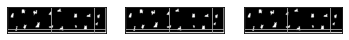

time: 838 ms


In [0]:
os.chdir('/content')
import imshowpair.imshowpair as ims
import imshowpair.utils as util1
ims.imshowpair(Image.open('/content/0_186_actual_mask.jpg'), Image.open('/content/0_186_predicted_mask.jpg'), grid=True,method=util1.blend)